## Данные маркетинговых кампаний

Данные связаны с прямыми маркетинговыми кампаниями португальского банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы он приобрел продукт т.е. (банковский срочный депозит) подписан ("да") или нет ("нет").

Цель классификации состоит в том, чтобы предсказать, подпишется ли клиент (да/нет) на срочный депозит (переменная y).

Информация о признаках: <br>
<br>
Входные переменные:<br>
данные клиента банка:<br>
1 - age (числовой)<br>
2 - job :  тип работы (категориальный: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown")<br>
3 - marital : семейное положение (категориальное: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (категориальное: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: есть ли дефолт по кредиту? (категориально: "нет", "да", "неизвестно")<br>
6 - housing: есть ли жилищный кредит? (категориально: "нет", "да", "неизвестно")<br>
7 - loan: есть личный заем? (категориально: "нет", "да", "неизвестно")<br>
<br>
Связано с последним контактом в текущей кампании:<br>
8 - contact: тип контактной связи (категориальный: 'cellular','telephone')<br>
9 - month: месяц последнего контакта в году (категория: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: последний контактный день недели (категориальный: 'mon','tue','wed','thu','fri')<br>
11 - duration:  продолжительность последнего контакта в секундах (числовая). Важное примечание: этот атрибут сильно влияет на конечный результат (например, если duration=0, то y='no'). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные следует включать только для целей сравнения и отбрасывать, если предполагается получить реалистичную прогностическую модель.<br>
<br>
Другие атрибуты<br>
12 - campaign: количество контактов, выполненных в ходе этой кампании и для данного клиента (числовое, включая последний контакт)<br>
13 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались)<br>
14 - previous:  количество контактов, выполненных до этой кампании и для этого клиента (числовое значение)<br>
15 - poutcome: результат предыдущей маркетинговой кампании (категорический: 'failure','nonexistent','success')<br>
<br>
Выходная переменная (желаемая цель):<br>
16 - y: оформил ли клиент срочный депозит? (двоичный код: "да", "нет")

## Импортируем нужные библиотеки

In [96]:
import pandas as pd
import numpy as np
import requests, zipfile, io 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [97]:
plt.style.use('tableau-colorblind10')

## Данные

In [98]:
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

Просматриваем архив и выбираем нужный файл

In [99]:
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

Считываем датасет

In [100]:
df = pd.read_csv(z.open('bank-full.csv'), sep=';')
df.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [101]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Видно, что классы у таргета несбалансированы

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [103]:
df["month"] = pd.to_datetime(df.month, format = "%b").dt.month

## 2.EDA

### 2.1 Рассмотрим числовые признаки

In [104]:
df_num = df.select_dtypes(include=['int64'])

In [105]:
num_col=[]
for col in df_num.columns:
    num_col.append(col)

In [106]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

#### Рассмотрим расспределение числовых признаков

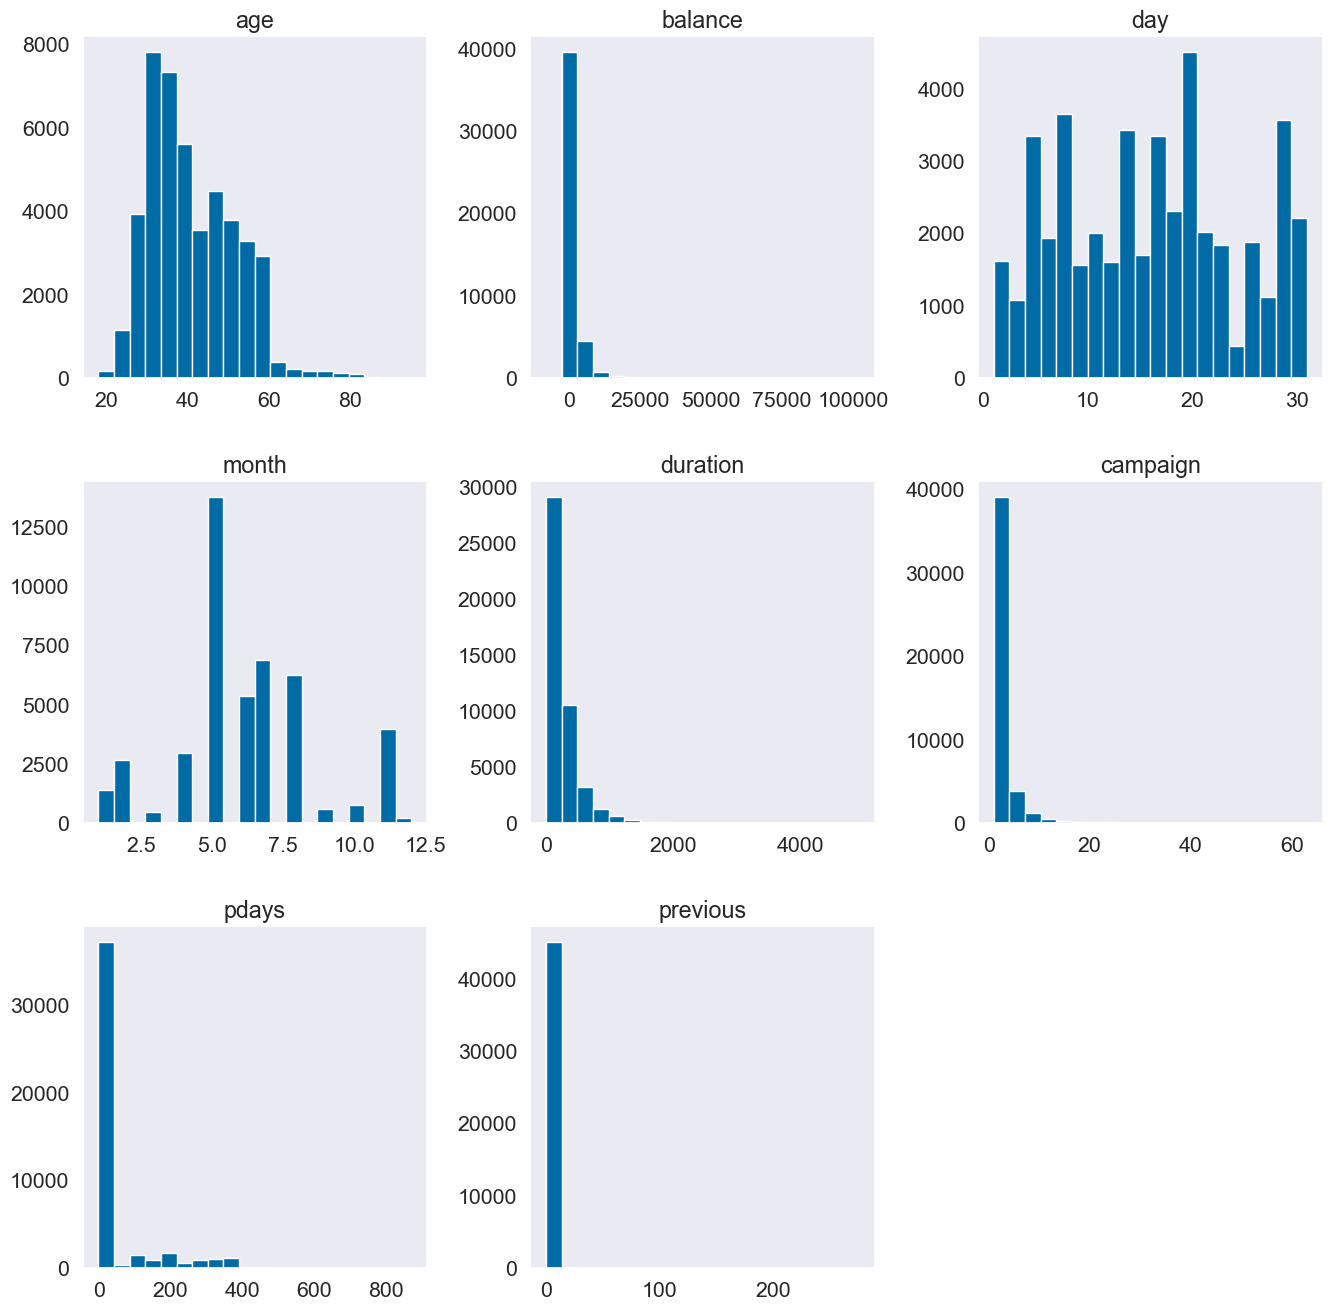

In [107]:
df_num.hist(figsize=(16, 16), bins=20, grid=False);

Признаки balance, duration, pdays, previous, compaign могут иметь выбросы

#### Поссмотрим на выбросы используя boxplot

- balance. Люди могут иметь различный баланс, поэтому скорее всего, это не выбросы

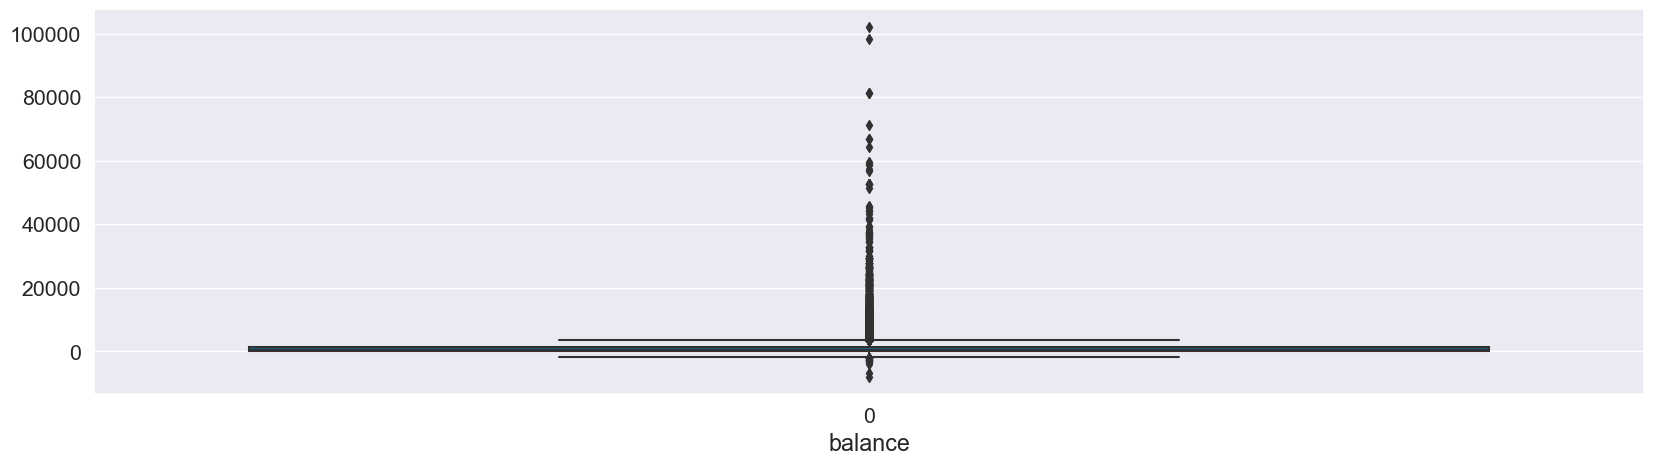

In [108]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['balance'], whis=1.5)

plt.xlabel('balance')
plt.show()

 - Duration - Продолжительность последнего контакта. Скорее всего данная информация является важной, и не явkялется выбросами

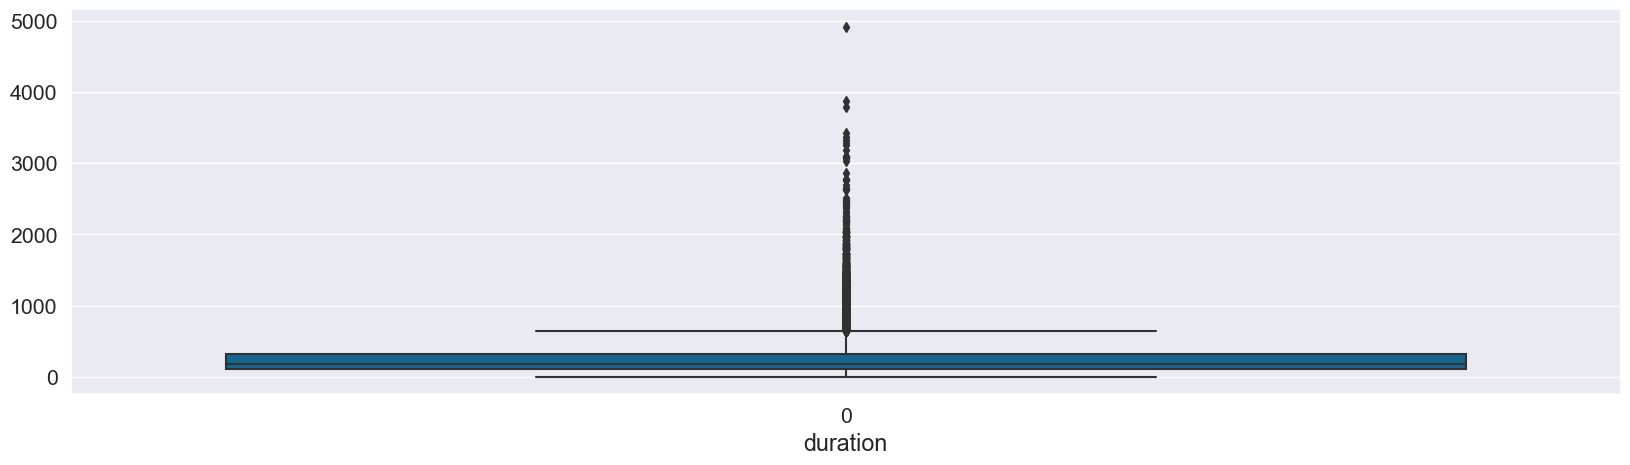

In [109]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['duration'], whis=1.5)

plt.xlabel('duration')
plt.show()

 - pdays - Количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое значение; 999 означает, что с клиентом ранее не связывались). Поэтому данные значения скорее всего также не являются выбросами

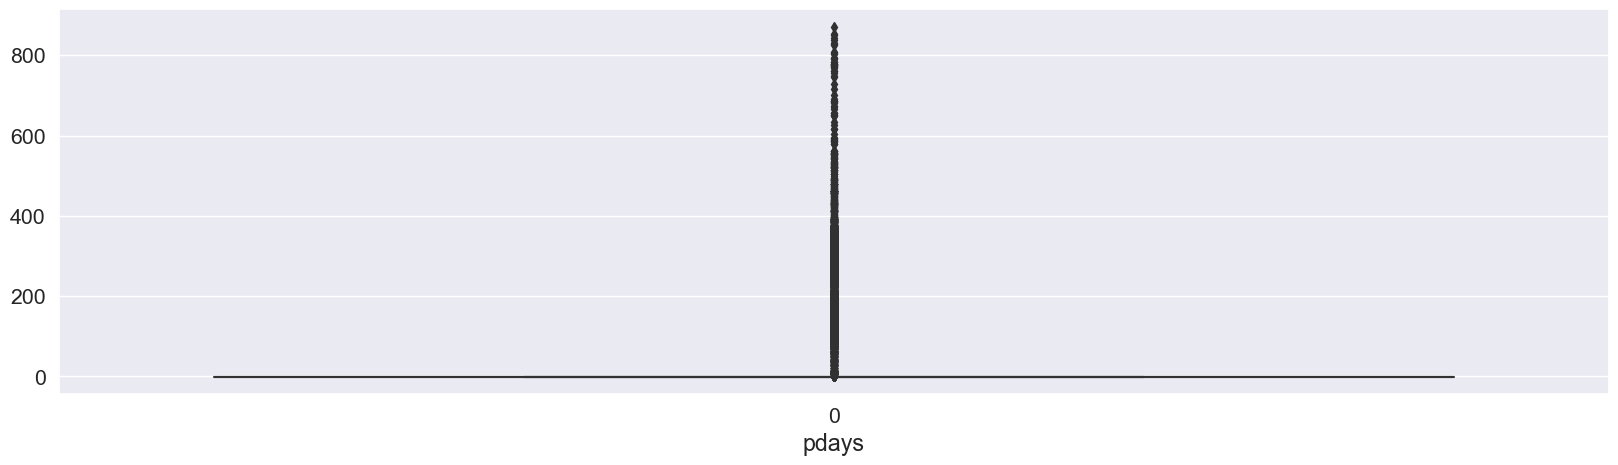

In [110]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['pdays'], whis=1.5)

plt.xlabel('pdays')
plt.show()

- Возраст

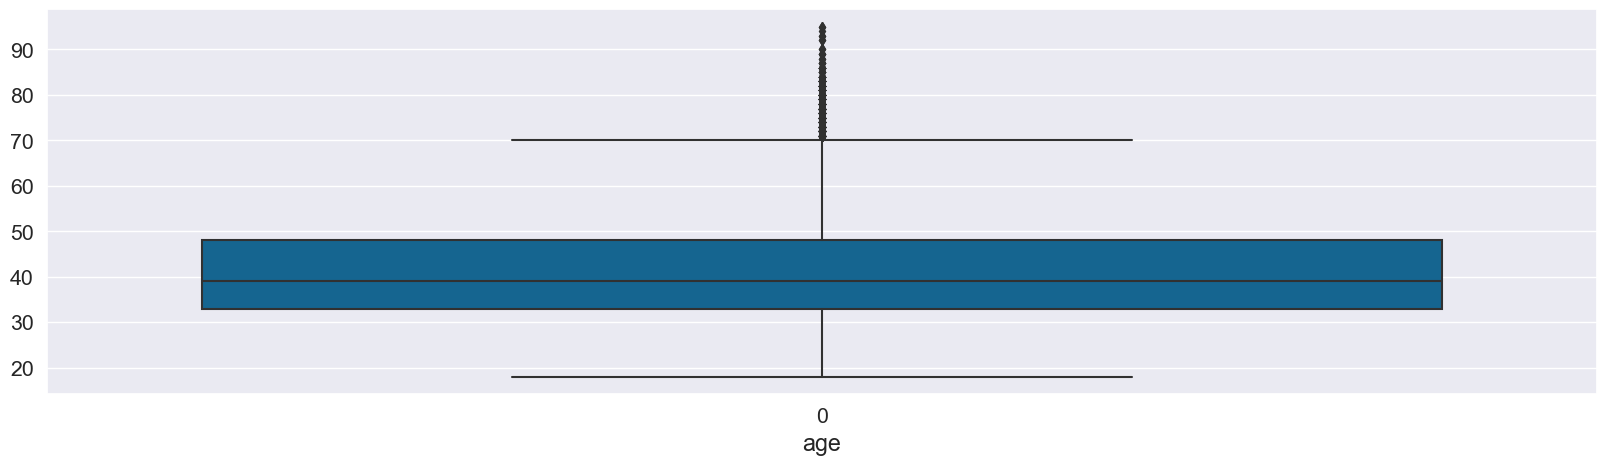

In [111]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['age'], whis=1.5)

plt.xlabel('age')
plt.show()

In [112]:
df = df.loc[df['age'] < 90]

Данные соответсвующие клиентам возраста более 90 лет скорее всего являются выбросами, поскольку в таком возрасте вряд ли человек будет брать депозит

 - previous - количество контактов, выполненных до этой кампании и для этого клиента

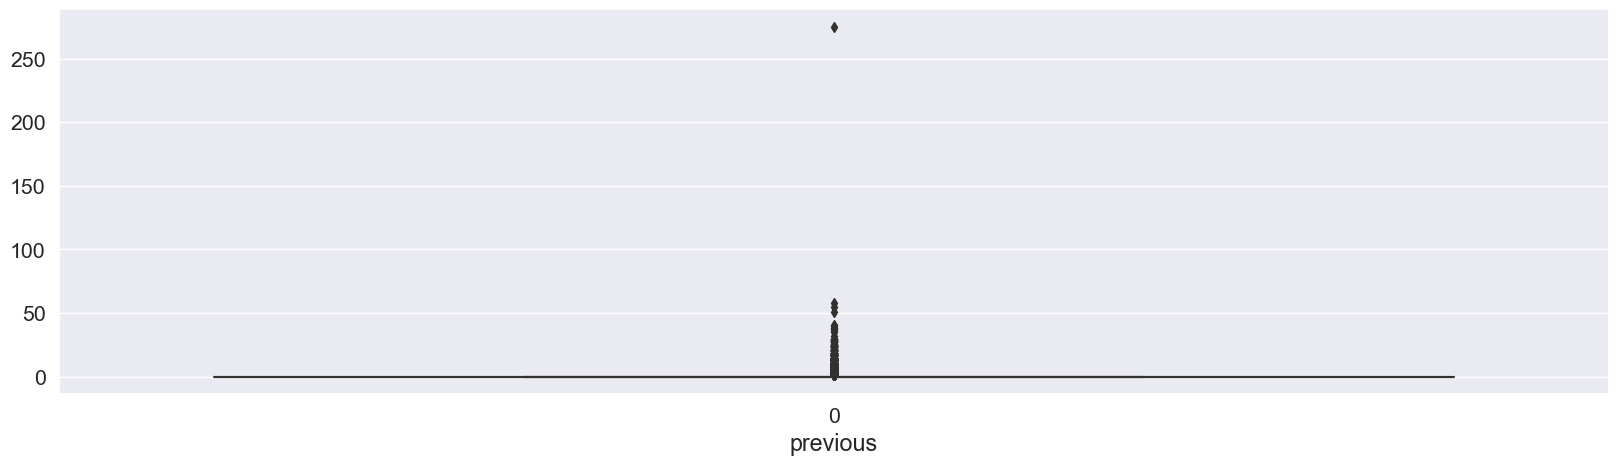

In [113]:
plt.figure(figsize=(20, 5))

sns.boxplot(df['previous'], whis=1.5)

plt.xlabel('previous')
plt.show()

По графику видно выброс, соответстующий значению 300, отсечем его

In [114]:
df = df.loc[df['previous'] < 250]

### Проведем более детальный анализ данных

In [115]:
df.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day  month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5      5       261         1     -1         0  unknown  no  
1  unknown    5      5       151         1     -1         0  unknown  no  
2  unknown    5      5        76         1     -1         0  unknown  no

#### Рассмотрим динамику охвата рекламных компаний по месяцам

In [116]:
data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

In [117]:
data.head()

month  count
0      1   1402
1      2   2647
2      3    475
3      4   2931
4      5  13766

 - Создаем линейный график

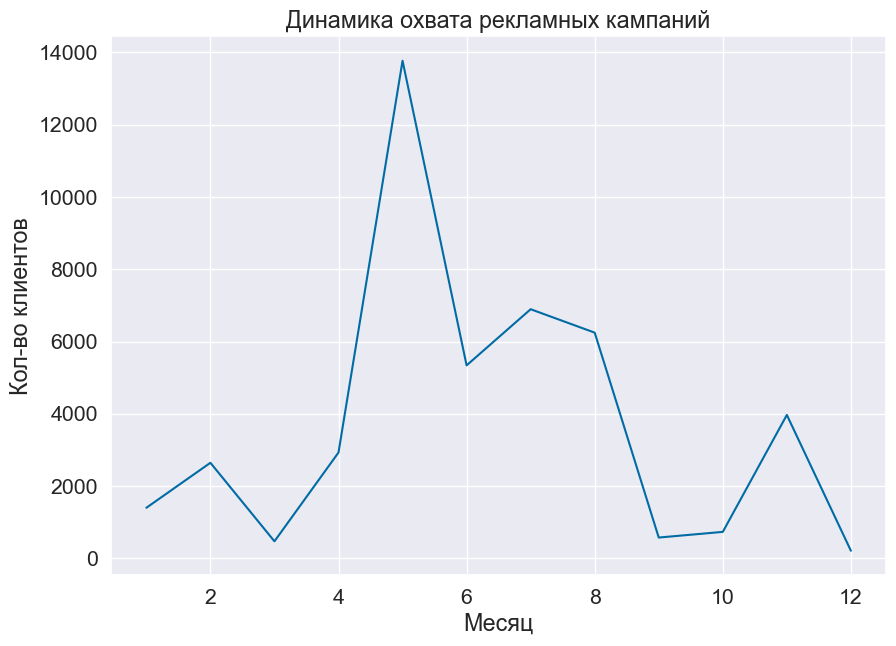

In [118]:
plt.figure(figsize=(10, 7))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что максимум клиентов приходится на май, значит, реклама, которая была проведена в мае привлекла большое число людей

#### Рассмотрим, как на динамику охвата влияет то, женат/замужем человек или нет

In [119]:
data1 = df[df['marital'] == 'single'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
data2 = df[df['marital'] == 'married'].groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')

Строим два линейных графика с отфильтрованными данными

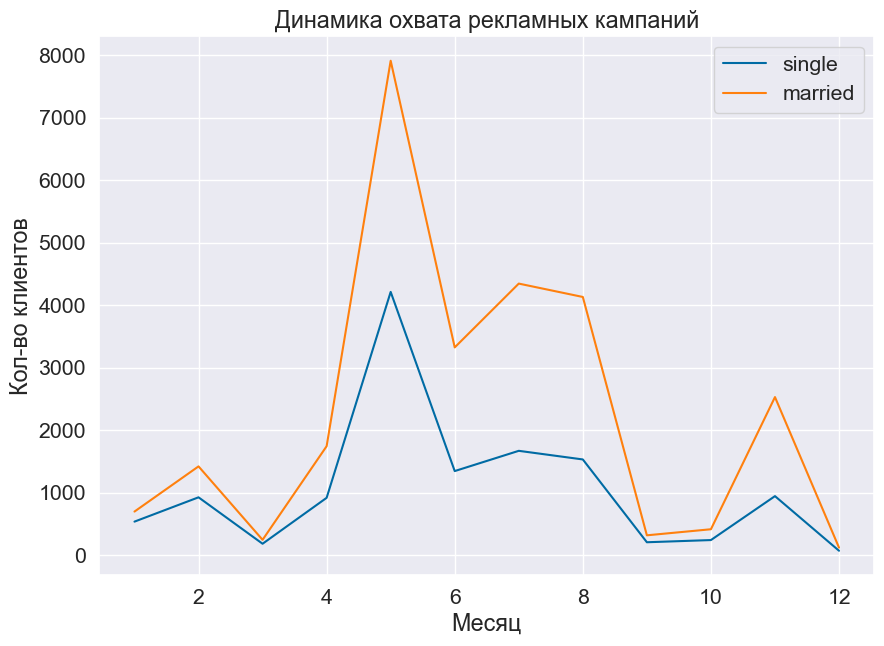

In [120]:
plt.figure(figsize=(10, 7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single', 'married'])

plt.show()

Наблюдается одинаковая тенденция, с большим охватом в мае и летом. Однако, видно, что охват для женатых людей по всем месяцам выше, в особенности летом, чем для холостых. Что в свою очередь может быть связанно с тем, что люди у которых есть семья, чаще берут кредит на семейные нужды.

#### Строим гистограмму в разрезе возраста клиентов

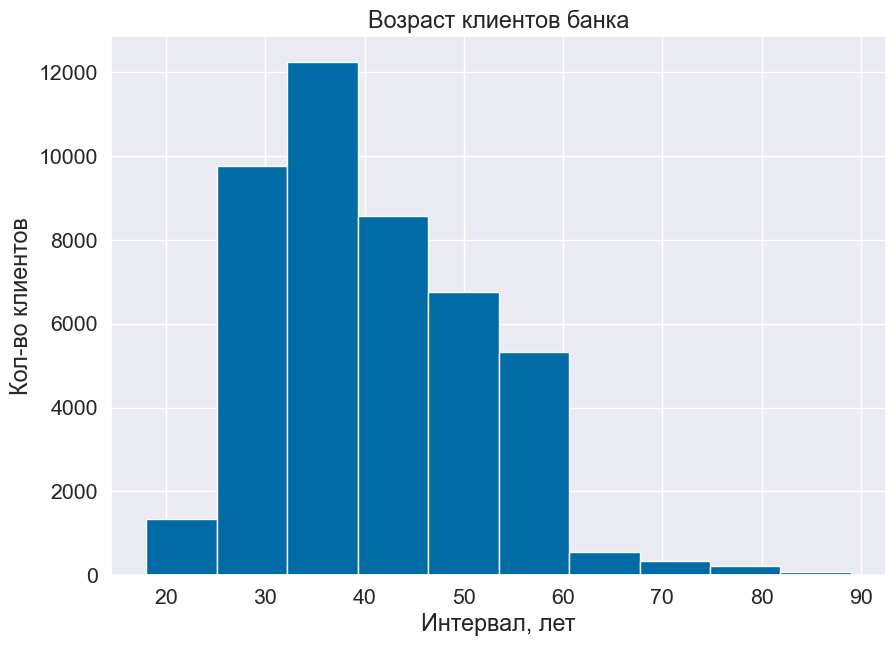

In [121]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'], bins=10)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

Видно, что молодых людей мало, по сравнению со взрослыми. Преобладают люди среднего возраста. Возрастных людей также очень мало

### Рассмотрим связь таргета с другими признаками

#### Строим гистограмму в разрезе людей, взявших и не взявших депозит 

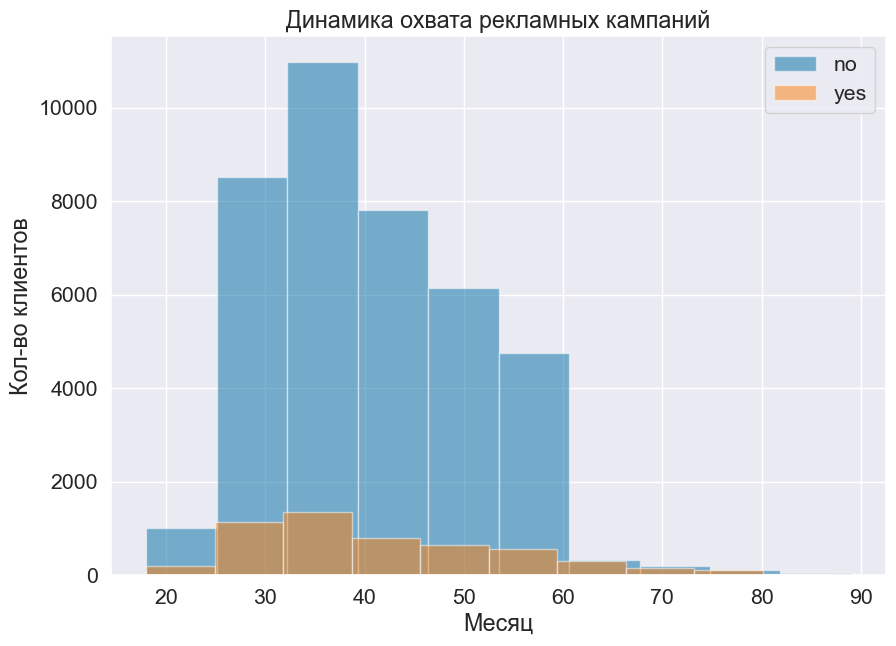

In [122]:
plt.figure(figsize=(10, 7))

plt.hist(df['age'][df['y'] == 'no'], alpha=0.5, label='no')
plt.hist(df['age'][df['y'] == 'yes'], alpha=0.5, label='yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

Распределение по возрастам, тех кто взял депозит и не взял - схоже. Из графика видно, что большинство людей не берут депозит, а чаще берут 30 - 40 летние люди.  

#### Рассмотрим связь длительности звонка и того, взял человек депозит или нет

In [123]:
# Готовим данные для графика
data1 = df['duration'][df['y'] == 'yes']
data2 = df['duration'][df['y'] == 'no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

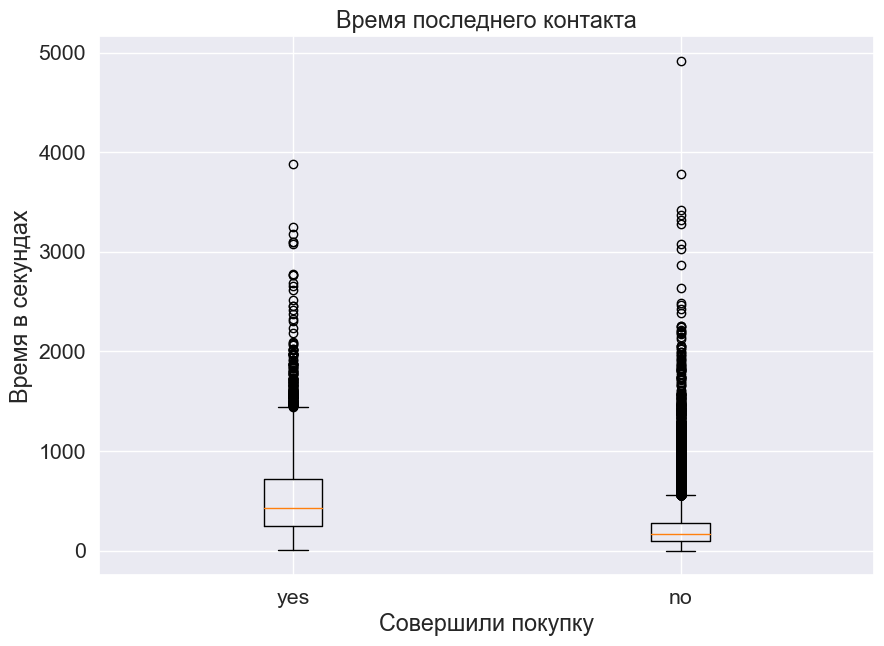

In [124]:
# Строим боксплот

plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Строим боксплот без выбросов 

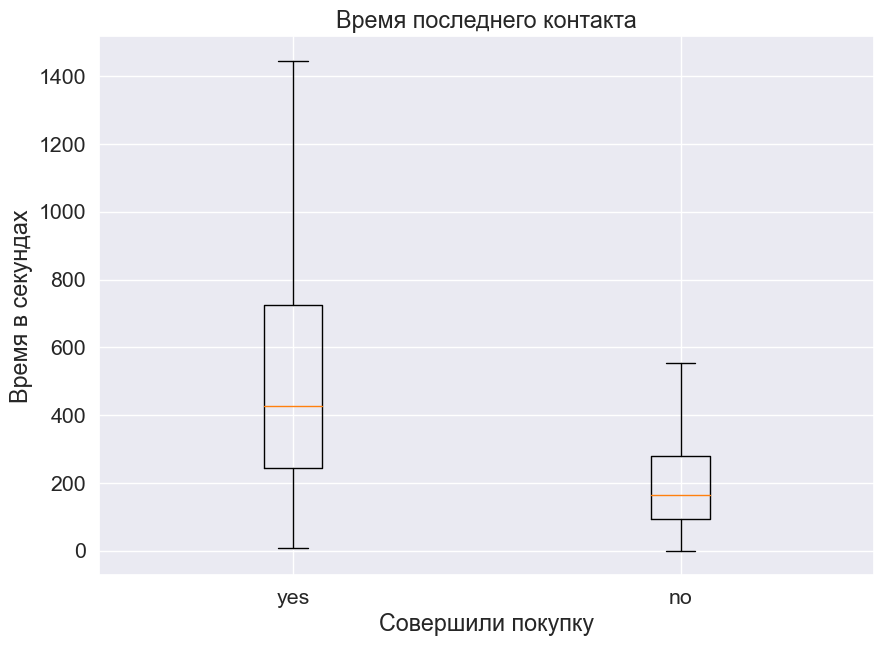

In [125]:
plt.figure(figsize=(10, 7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')

plt.ylabel('Время в секундах')
plt.xticks([1, 2], ['yes', 'no'])

plt.show()

Люди, которые дольше общались с колцентром чаще совершают покупку. Медианное значение времени отличается примерно в 2 раза.

#### Рассмотрим зависимость рода деятельности клиентов от того, приобрели они депозит или нет

In [126]:
data = pd.crosstab(df['job'], df['y'], normalize='index').reset_index().sort_values(by='no', ascending=False)
data.head()

y           job        no       yes
1   blue-collar  0.927250  0.072750
2  entrepreneur  0.917283  0.082717
3     housemaid  0.912097  0.087903
7      services  0.911170  0.088830
9    technician  0.889430  0.110570

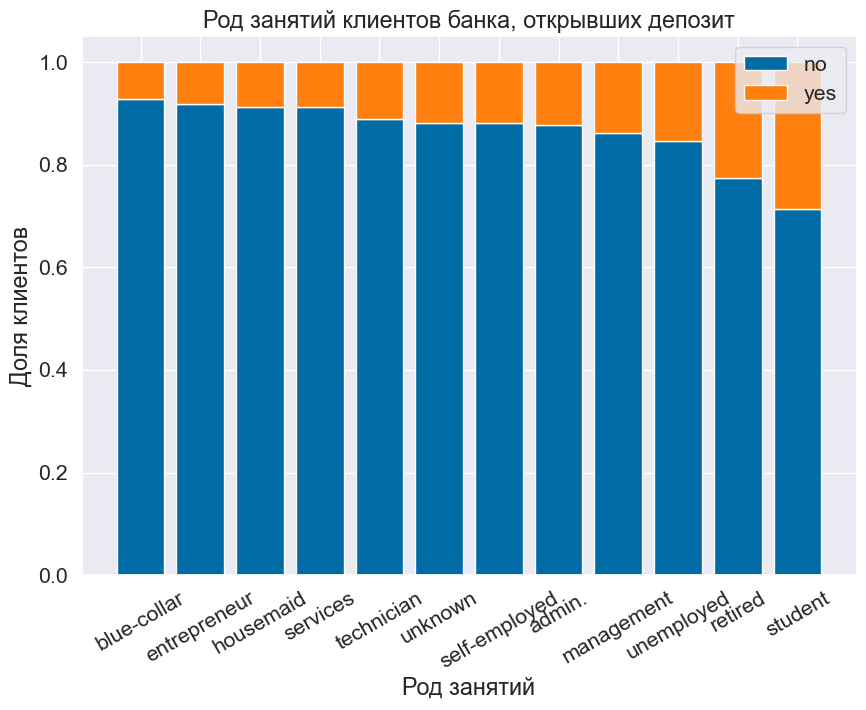

In [127]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(10, 7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

plt.show()

На этой диаграмме видно процентное соотношение того, взяли депозит или нет. Видно, что чаще депозит берут студенты и люди на пенсии.

#### Визуализируем распределение таргета на круговой диаграмме 

In [128]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39919
yes     5282
Name: y, dtype: int64

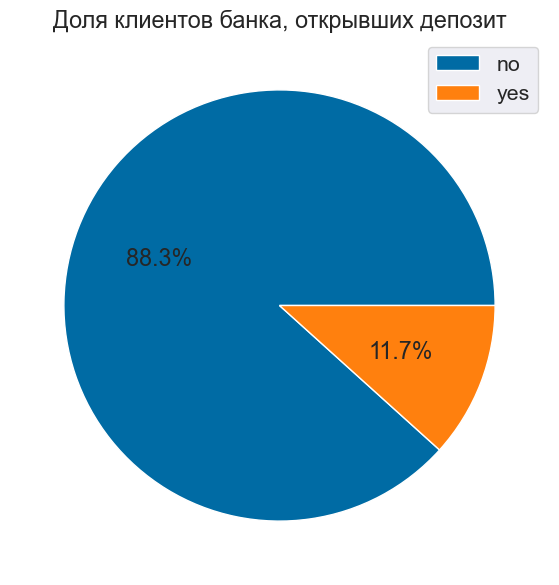

In [129]:
# Строим круговую диаграмму

plt.figure(figsize=(10, 7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

### Построим матрицу корреляции с учетом числовых признаков

In [130]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

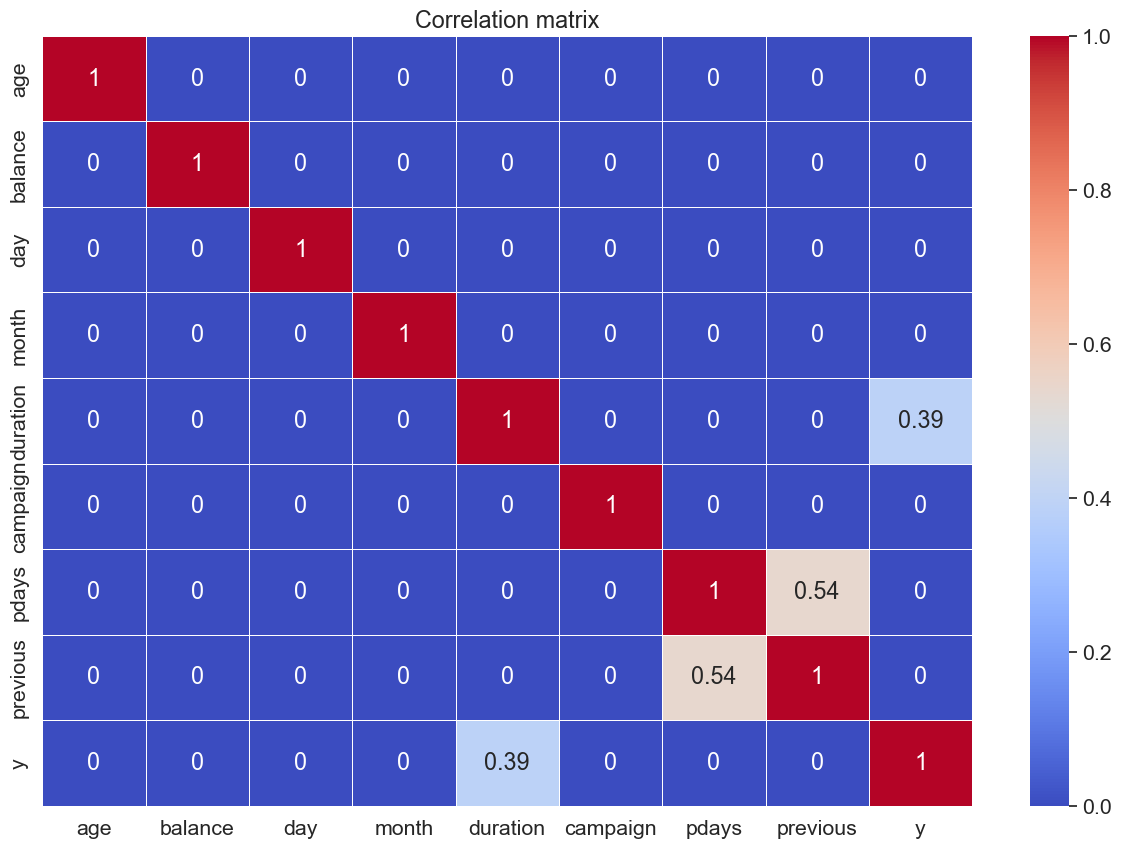

In [131]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Таргет хорошо коррелирует с duration - продолжительностью звонка. Также видна сильная корреляция между признаками pdays и previous, оба связанны с контактами с клиентом.

 ### 3. Обработка данных 

In [132]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day  month  duration  campaign  pdays  previous poutcome  y  
0        unknown    5      5       261         1     -1         0  unknown  0  
1        unknown    5      5       151         1     -1         0  unknown  0  
2        unknown    5      5        76         1     -1         0  unknown  0  
3        unknown    5      5        92         1     -1         0  unknown  0  
4        unknown    5      5       198         1     -1         0  unknown  0  
...          ...  ...    ...       ...       ...    ...       ...      ... ..  
45206   cellular   17     11       977         3     -1         0  unknown  1  
45207   cellular   17     11       456         2     -1         0  unknown  1  
45208   cellular   17     11      1127         5    184         3  success  1  
45209  telephone   17     11       508         4     -1         0  unknown  0  
45210   cellular   17     11       361         2    188        11    other  0  

[45201 rows x 17 columns]

In [133]:
df_cat = df.select_dtypes(include=['object'])

In [134]:
df_cat.describe()

job  marital  education default housing   loan   contact  \
count         45201    45201      45201   45201   45201  45201     45201   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27208      23199   44386   25129  37957     29278   

       poutcome  
count     45201  
unique        4  
top     unknown  
freq      36953

Признаки: default, housing, loan - бинарные

In [135]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [136]:
df["default"]= le.fit_transform(df["default"]) 

In [137]:
df["housing"]= le.fit_transform(df["housing"]) 

In [138]:
df["loan"]= le.fit_transform(df["loan"])

### Посмотрим на матрицу корреляции с учетом этих признаков

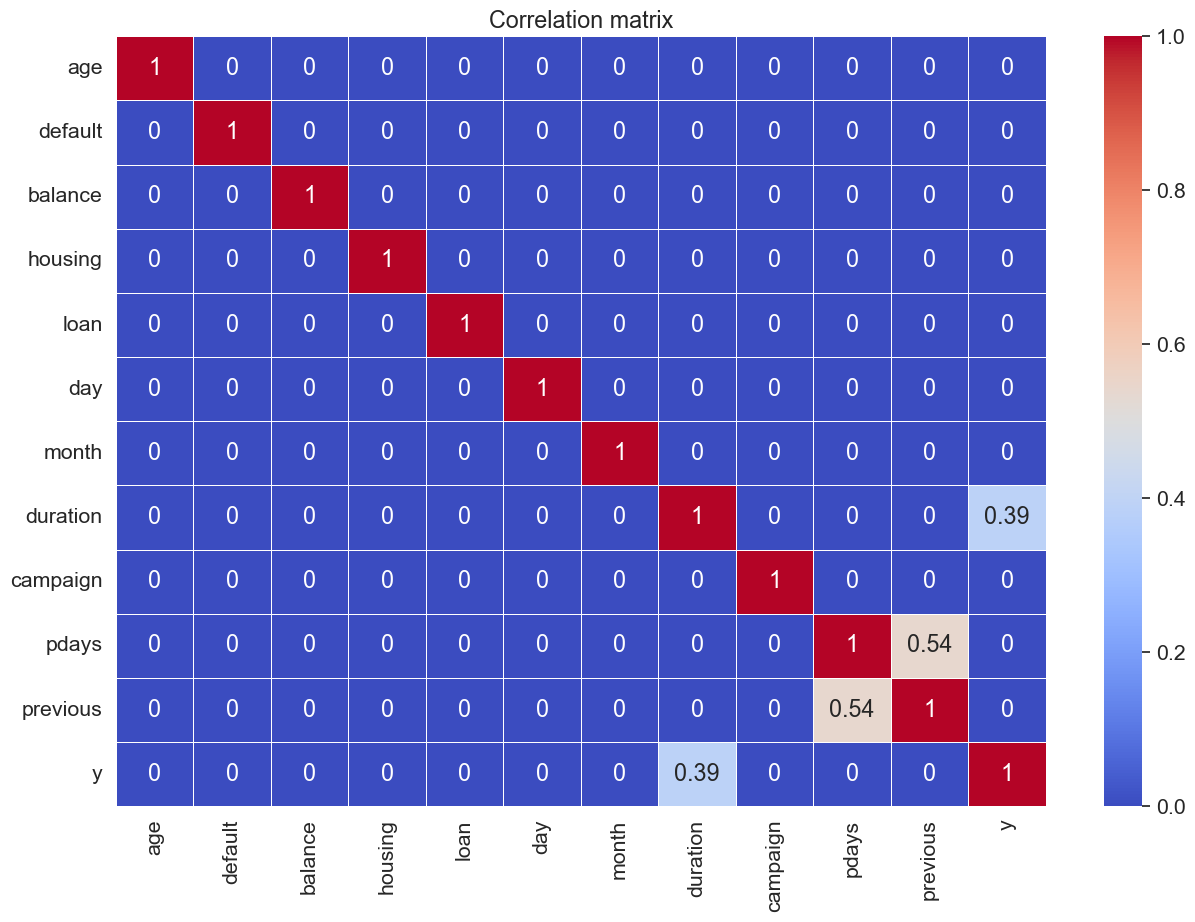

In [139]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Видно, что признаки слабо связаны с таргетом, однако, duration - длительность звонка коррелирует с у, что является логичным, при длительных телефонных переговорах вероятность совершить оформление договора возрастает

Попробуем удалить все числовые столбцы, которые не связаны с таргетом и оставить только категориальные. Оценим модель для обоих случаев (без числовых признаков и с ними)

Применим one-hot-encoding к категориальным данным

In [140]:
df = pd.get_dummies(df, columns=["job", "marital", "education", "contact", "poutcome"])

In [141]:
df.head(5)

age  default  balance  housing  loan  day  month  duration  campaign  \
0   58        0     2143        1     0    5      5       261         1   
1   44        0       29        1     0    5      5       151         1   
2   33        0        2        1     1    5      5        76         1   
3   47        0     1506        1     0    5      5        92         1   
4   33        0        1        0     0    5      5       198         1   

   pdays  ...  education_secondary  education_tertiary  education_unknown  \
0     -1  ...                    0                   1                  0   
1     -1  ...                    1                   0                  0   
2     -1  ...                    1                   0                  0   
3     -1  ...                    0                   0                  1   
4     -1  ...                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 38 columns]

Оставим два датасета - один с учетом числовых признаков, второй без

#### Применим MinMaxScaler к числовым признакам

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
num_col

['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']

In [144]:
def get_scale(df,col, model):
    
    scal = model.fit_transform(df[col])
    df[col] = scal
    return df

In [145]:
df = get_scale(df, num_col, MinMaxScaler())

In [146]:
df.head(5)

age  default   balance  housing  loan       day     month  duration  \
0  0.563380        0  0.092259        1     0  0.133333  0.363636  0.053070   
1  0.366197        0  0.073067        1     0  0.133333  0.363636  0.030704   
2  0.211268        0  0.072822        1     1  0.133333  0.363636  0.015453   
3  0.408451        0  0.086476        1     0  0.133333  0.363636  0.018707   
4  0.211268        0  0.072812        0     0  0.133333  0.363636  0.040260   

   campaign  pdays  ...  education_secondary  education_tertiary  \
0       0.0    0.0  ...                    0                   1   
1       0.0    0.0  ...                    1                   0   
2       0.0    0.0  ...                    1                   0   
3       0.0    0.0  ...                    0                   0   
4       0.0    0.0  ...                    0                   0   

   education_unknown  contact_cellular  contact_telephone  contact_unknown  \
0                  0                 0                  0                1   
1                  0                 0                  0                1   
2                  0                 0                  0                1   
3                  1                 0                  0                1   
4                  1                 0                  0                1   

   poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown  
0                 0               0                 0                 1  
1                 0               0                 0                 1  
2                 0               0                 0                 1  
3                 0               0                 0                 1  
4                 0               0                 0                 1  

[5 rows x 38 columns]

In [147]:
df_without = df.copy()

In [148]:
df_without.drop(columns= ["previous", "pdays", "campaign","month", "day", "loan", "housing", "balance", "default", "age"], axis=1, inplace=True)

In [149]:
df_without.head(5)

duration  y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  0.053070  0           0                0                 0              0   
1  0.030704  0           0                0                 0              0   
2  0.015453  0           0                0                 1              0   
3  0.018707  0           0                1                 0              0   
4  0.040260  0           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  ...  \
0               1            0                  0             0  ...   
1               0            0                  0             0  ...   
2               0            0                  0             0  ...   
3               0            0                  0             0  ...   
4               0            0                  0             0  ...   

   education_secondary  education_tertiary  education_unknown  \
0                    0                   1                  0   
1                    1                   0                  0   
2                    1                   0                  0   
3                    0                   0                  1   
4                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 28 columns]

### 4. Разобьем данные на тренировочную и тестовую выборки

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split

In [151]:
y = df_without['y'].values.ravel()

In [152]:
df_without.drop(columns=["y"], axis=1, inplace=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_without, y, test_size=0.33, random_state=42)

### 5,6,7 Применение алгоритмов и их оценка

### Деревья решений

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
from sklearn import metrics

Рассмотрим качество работы модели на датасете без числовых признаков

In [167]:
tree_clf = DecisionTreeClassifier(max_depth=3)

In [168]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [169]:
y_test_pred = tree_clf.predict(X_test)

In [170]:
print("accuracy: %.1f" % metrics.accuracy_score(y_test, y_test_pred))
print("f1: %.4f" % metrics.f1_score(y_test, y_test_pred))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test, y_test_pred))

accuracy: 0.9
f1: 0.4698
roc_auc: 0.6756


Рассмотрим качество работы модели на датасете с числовыми признаками

In [171]:
tree_clf_ = DecisionTreeClassifier(max_depth=3)

In [172]:
df.drop(columns=["y"], axis=1, inplace=True)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [174]:
tree_clf_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [175]:
y_test_pred_ = tree_clf_.predict(X_test)

In [176]:
print("accuracy: %.1f" % metrics.accuracy_score(y_test, y_test_pred_))
print("f1: %.4f" % metrics.f1_score(y_test, y_test_pred_))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test, y_test_pred_))

accuracy: 0.9
f1: 0.4698
roc_auc: 0.6756


Видно, что качество модели на обоих датасетах одинакого, значит, связи между числовыми признаками (кроме duration) и таргетом - нет

Посмотрим на лучшие гиперпараметры

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,4,5,6,7,8,9,10, None]}

In [161]:
rfr = DecisionTreeClassifier(max_depth=1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 3, return_train_score=True)

In [162]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ...max_depth=3;, score=(train=0.901, test=0.897) total time=   0.0s
[CV 2/3] END ...max_depth=3;, score=(train=0.901, test=0.896) total time=   0.0s
[CV 3/3] END ...max_depth=3;, score=(train=0.899, test=0.904) total time=   0.0s
[CV 1/3] END ...max_depth=4;, score=(train=0.903, test=0.896) total time=   0.0s
[CV 2/3] END ...max_depth=4;, score=(train=0.902, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=4;, score=(train=0.900, test=0.898) total time=   0.0s
[CV 1/3] END ...max_depth=5;, score=(train=0.906, test=0.899) total time=   0.0s
[CV 2/3] END ...max_depth=5;, score=(train=0.904, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=5;, score=(train=0.906, test=0.899) total time=   0.0s
[CV 1/3] END ...max_depth=6;, score=(train=0.909, test=0.898) total time=   0.0s
[CV 2/3] END ...max_depth=6;, score=(train=0.908, test=0.898) total time=   0.0s
[CV 3/3] END ...max_depth=6;, score=(train=0.910,

Лучшее качество при параметре 'max_depth': 3

Для случая несбалансированных классов для оценки модели лучше использовать F1 score поскольку с помощью него мы можем оценить как часто алгоритм совершает ложноположительные и ложноотрицательные предсказания. В нешем случае accuracy имеет довольно высокое значение - 0.9, но она не отражает реального качества работы алгоритма, поскольку применяется для сбалансированных классов. F1 имеет более низкое значение, что говорит, либо о том что, дерево недостаточно хорошо смогло уловить необходимые зависимости и лучше использовать ансамблевые алгоритмы, либо связь признаков с таргетом слишком мала, поэтому алгоритм показывает не самое хорошее качество.

### Ансамблевые методы

#### Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#### Гипермараметры:
- "Max_depth" - тот гиперпараметр представляет максимальный уровень (глубину) каждого дерева в модели случайного леса. Более глубокое дерево показывает хорошие результаты и собирает много информации об обучающих данных, но плохо поддается обобщению для тестовых данных

- "Max_features" - Максимальное количество признаков, которое модели случайного леса разрешается опробовать при каждом разбиении 

- "N_estimators" - Количество деревьев решений в лесу

- "Min_samples_leaf" - Минимальное количество образцов, необходимое для нахождения в листовом узле каждого дерева. В Scikit-Learn значение по умолчанию равно 1

- "Min_samples_split" - Минимальное количество образцов, необходимое для разбиения внутреннего узла каждого дерева. В Scikit-Learn значение по умолчанию равно 2

In [164]:
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[200,300,400],
              'max_features':[14, 17, 22],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

#### Оценка результатов

In [165]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='f1', verbose = 3, return_train_score=True)
model_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=200;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3] END max_depth=3, max_feature

[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.266, test=0.269) total time=   3.2s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.261, test=0.270) total time=   3.3s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.269, test=0.256) total time=   3.3s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.267, test=0.269) total time=   5.3s
[CV 2/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.250, test=0.263) total time=   5.4s
[CV 3/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.268, test=0.254) total time=   5.2s
[CV 1/3] END max_depth=3, max_features=14, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.272, test=0.275) total time=   4.1s
[CV 2/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.263, test=0.274) total time=   4.4s
[CV 3/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.269, test=0.256) total time=   4.0s
[CV 1/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.273, test=0.277) total time=   6.1s
[CV 2/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.264, test=0.274) total time=   5.9s
[CV 3/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.270, test=0.255) total time=   6.0s
[CV 1/3] END max_depth=3, max_features=17, min_samples_leaf=2, min_samples_s

[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.383, test=0.373) total time=   5.0s
[CV 2/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.411, test=0.415) total time=   4.9s
[CV 3/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.322, test=0.318) total time=   5.0s
[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.407, test=0.396) total time=   7.3s
[CV 2/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.383, test=0.383) total time=   7.4s
[CV 3/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.362, test=0.357) total time=   7.3s
[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.391, test=0.381) total time=   5.0s
[CV 2/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.396, test=0.395) total time=   4.7s
[CV 3/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.282, test=0.257) total time=   5.0s
[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.363, test=0.352) total time=   7.2s
[CV 2/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.411, test=0.412) total time=   7.2s
[CV 3/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.283, test=0.263) total time=   7.2s
[CV 1/3] END max_depth=3, max_features=22, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.411, test=0.380) total time=   5.0s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.431, test=0.432) total time=   4.9s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.398, test=0.365) total time=   5.4s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.415, test=0.382) total time=   7.6s
[CV 2/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.411, test=0.404) total time=   7.7s
[CV 3/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.339, test=0.316) total time=   7.7s
[CV 1/3] END max_depth=5, max_features=14, min_samples_leaf=2, min_samples_s

[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.463, test=0.419) total time=   6.3s
[CV 2/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.460, test=0.444) total time=   6.2s
[CV 3/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.417, test=0.388) total time=   6.7s
[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.480, test=0.430) total time=   9.8s
[CV 2/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.469, test=0.460) total time=   9.7s
[CV 3/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.416, test=0.391) total time=   9.7s
[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=1, min_samples_s

[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.451, test=0.408) total time=   6.5s
[CV 2/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.461, test=0.454) total time=   6.1s
[CV 3/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.420, test=0.392) total time=   6.4s
[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.464, test=0.412) total time=   9.7s
[CV 2/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.458, test=0.452) total time=   9.4s
[CV 3/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.420, test=0.396) total time=   9.6s
[CV 1/3] END max_depth=5, max_features=17, min_samples_leaf=3, min_samples_s

[CV 1/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.484, test=0.437) total time=   7.4s
[CV 2/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.497, test=0.472) total time=   7.6s
[CV 3/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.434, test=0.406) total time=   7.5s
[CV 1/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.483, test=0.435) total time=  10.9s
[CV 2/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.499, test=0.474) total time=  11.3s
[CV 3/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.441, test=0.414) total time=  11.0s
[CV 1/3] END max_depth=5, max_features=22, min_samples_leaf=2, min_samples_s

[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.700, test=0.483) total time=   9.9s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.680, test=0.493) total time=   9.5s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.683, test=0.457) total time=   9.3s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.691, test=0.469) total time=  14.4s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.688, test=0.497) total time=  14.3s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.682, test=0.460) total time=  14.0s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=1, min_sa

[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.657, test=0.467) total time=  10.3s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.655, test=0.491) total time=  11.0s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.640, test=0.464) total time=   9.4s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.661, test=0.475) total time=  16.8s
[CV 2/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.653, test=0.499) total time=  15.8s
[CV 3/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.647, test=0.466) total time=  15.0s
[CV 1/3] END max_depth=10, max_features=14, min_samples_leaf=3, min_sa

[CV 1/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.692, test=0.484) total time=  14.5s
[CV 2/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.677, test=0.511) total time=  14.2s
[CV 3/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.673, test=0.460) total time=  14.3s
[CV 1/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.687, test=0.477) total time=  21.1s
[CV 2/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.678, test=0.498) total time=  20.4s
[CV 3/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.676, test=0.470) total time=  21.8s
[CV 1/3] END max_depth=10, max_features=17, min_samples_leaf=2, min_sa

[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.731, test=0.490) total time=  18.1s
[CV 2/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.708, test=0.506) total time=  16.8s
[CV 3/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=0.696, test=0.476) total time=  15.1s
[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.724, test=0.489) total time=  21.5s
[CV 2/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.703, test=0.507) total time=  21.7s
[CV 3/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=0.696, test=0.474) total time=  22.8s
[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=1, min_sa

[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.694, test=0.498) total time=  14.0s
[CV 2/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.668, test=0.507) total time=  13.8s
[CV 3/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.668, test=0.468) total time=  14.0s
[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.686, test=0.494) total time=  21.6s
[CV 2/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.671, test=0.506) total time=  21.7s
[CV 3/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.657, test=0.466) total time=  21.2s
[CV 1/3] END max_depth=10, max_features=22, min_samples_leaf=3, min_sa

[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.947, test=0.515) total time=  12.5s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.942, test=0.511) total time=  11.8s
[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.949, test=0.502) total time=  12.5s
[CV 1/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.951, test=0.516) total time=  19.2s
[CV 2/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.947, test=0.520) total time=  18.8s
[CV 3/3] END max_depth=None, max_features=14, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.951, test=0.497) total time=  18.1s
[CV 1/3] END max_depth=None, max_features=14, min_samples_

[CV 1/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.507) total time=  15.6s
[CV 2/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.520) total time=  16.0s
[CV 3/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=(train=1.000, test=0.502) total time=  15.8s
[CV 1/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=1.000, test=0.524) total time=  23.5s
[CV 2/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=1.000, test=0.518) total time=  23.1s
[CV 3/3] END max_depth=None, max_features=17, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=1.000, test=0.510) total time=  23.9s
[CV 1/3] END max_depth=None, max_features=17, min_samples_

[CV 1/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.892, test=0.518) total time=  13.8s
[CV 2/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.879, test=0.514) total time=  13.3s
[CV 3/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.891, test=0.505) total time=  13.7s
[CV 1/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.893, test=0.510) total time=  21.7s
[CV 2/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.883, test=0.525) total time=  20.3s
[CV 3/3] END max_depth=None, max_features=17, min_samples_leaf=3, min_samples_split=2, n_estimators=300;, score=(train=0.891, test=0.509) total time=  20.4s
[CV 1/3] END max_depth=None, max_features=17, min_samples_

[CV 1/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.961, test=0.526) total time=  17.4s
[CV 2/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.959, test=0.525) total time=  17.2s
[CV 3/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=0.959, test=0.510) total time=  17.2s
[CV 1/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.959, test=0.526) total time=  25.8s
[CV 2/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.959, test=0.525) total time=  25.8s
[CV 3/3] END max_depth=None, max_features=22, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=(train=0.962, test=0.505) total time=  25.3s
[CV 1/3] END max_depth=None, max_features=22, min_samples_

C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\lib\site-packages\sklearn\ut

Лучшие параметры

In [166]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 22, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best score is: 0.5218895357679509


#### Результат работы на тренировочной части данных

In [178]:
rf = RandomForestClassifier(max_depth=None, max_features=22, min_samples_leaf=1, min_samples_split=3, n_estimators=200)

In [179]:
model_grid = rf.fit(X_train, y_train)

In [180]:
y_test_ens = model_grid.predict(X_test)

In [181]:
print('Ошибка на тестовых данных')
print("accuracy: %.1f" % metrics.accuracy_score(y_test,y_test_ens))
print("f1: %.4f" % metrics.f1_score(y_test,y_test_ens))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test,y_test_ens))

Ошибка на тестовых данных
accuracy: 0.9
f1: 0.5399
roc_auc: 0.7187


Построим roc-curve для наглядности

In [195]:
from sklearn.metrics import roc_curve, auc

In [196]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_ens, pos_label=1)

In [197]:
roc_auc = auc(fpr, tpr)

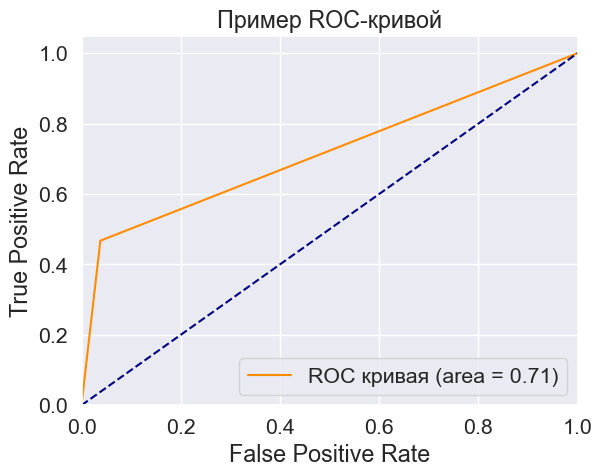

In [198]:
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Для случая несбалансированных классов для оценки модели лучше использовать F1 score поскольку с помощью него мы можем оценить как часто алгоритм совершает ложноположительные и ложноотрицательные предсказания. В нешем случае accuracy имеет довольно высокое значение - 0.9, но она не отражает реального качества работы алгоритма, поскольку применяется для сбалансированных классов. F1 имеет более низкое значение, что говорит, либо о том что, дерево недостаточно хорошо смогло уловить необходимые зависимости и лучше использовать ансамблевые алгоритмы, либо связь признаков с таргетом слишком мала, поэтому алгоритм показывает не самое хорошее качество.

Результат работы с использованием деревьев решений -
- accuracy: 0.9
- f1: 0.4698
- roc_auc: 0.6756
- В случае Случайного леса f1 увеличился до значения - f1: 0.5325 - что в целом доказывает то, что ансамбли показывают лучшие результаты, чем, например, как в нашем случае, одиночное дерево решений. Roc-auc также увеличился - roc_auc: 0.7147, что говорит, о том, что доля пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил - увеличилась

### CatBoost

In [156]:
!pip install catboost

In [157]:
import catboost as ctb
from sklearn.model_selection import GridSearchCV

In [175]:
model_CBC = ctb.CatBoostClassifier()

In [176]:
grid_space = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

#### Поиск по сетке

In [177]:
grid = GridSearchCV(model_CBC,param_grid=grid_space,cv=3,scoring='f1', verbose = 3, return_train_score=True)
model_grid = grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
0:	learn: 0.6612082	total: 184ms	remaining: 3m 3s
1:	learn: 0.6313933	total: 193ms	remaining: 1m 36s
2:	learn: 0.6045823	total: 201ms	remaining: 1m 6s
3:	learn: 0.5800702	total: 207ms	remaining: 51.6s
4:	learn: 0.5501972	total: 216ms	remaining: 43s
5:	learn: 0.5262715	total: 223ms	remaining: 36.9s
6:	learn: 0.5059427	total: 230ms	remaining: 32.6s
7:	learn: 0.4899434	total: 237ms	remaining: 29.4s
8:	learn: 0.4721994	total: 244ms	remaining: 26.9s
9:	learn: 0.4549947	total: 252ms	remaining: 24.9s
10:	learn: 0.4423527	total: 278ms	remaining: 25s
11:	learn: 0.4272998	total: 290ms	remaining: 23.9s
12:	learn: 0.4129117	total: 304ms	remaining: 23.1s
13:	learn: 0.4028078	total: 316ms	remaining: 22.2s
14:	learn: 0.3915170	total: 330ms	remaining: 21.6s
15:	learn: 0.3809407	total: 338ms	remaining: 20.8s
16:	learn: 0.3722977	total: 347ms	remaining: 20.1s
17:	learn: 0.3620108	total: 356ms	remaining: 19.4s
18:	learn: 0.3537466	total: 363ms	

174:	learn: 0.2180660	total: 1.64s	remaining: 7.71s
175:	learn: 0.2179802	total: 1.64s	remaining: 7.69s
176:	learn: 0.2179056	total: 1.65s	remaining: 7.67s
177:	learn: 0.2178045	total: 1.66s	remaining: 7.65s
178:	learn: 0.2176878	total: 1.66s	remaining: 7.63s
179:	learn: 0.2175315	total: 1.67s	remaining: 7.61s
180:	learn: 0.2174232	total: 1.68s	remaining: 7.59s
181:	learn: 0.2171712	total: 1.68s	remaining: 7.57s
182:	learn: 0.2170764	total: 1.69s	remaining: 7.55s
183:	learn: 0.2169834	total: 1.7s	remaining: 7.53s
184:	learn: 0.2168877	total: 1.71s	remaining: 7.51s
185:	learn: 0.2167997	total: 1.71s	remaining: 7.49s
186:	learn: 0.2165882	total: 1.72s	remaining: 7.47s
187:	learn: 0.2164928	total: 1.72s	remaining: 7.45s
188:	learn: 0.2163273	total: 1.73s	remaining: 7.42s
189:	learn: 0.2161890	total: 1.74s	remaining: 7.4s
190:	learn: 0.2160696	total: 1.74s	remaining: 7.38s
191:	learn: 0.2158809	total: 1.75s	remaining: 7.36s
192:	learn: 0.2158005	total: 1.75s	remaining: 7.34s
193:	learn: 0.

352:	learn: 0.2008148	total: 2.9s	remaining: 5.31s
353:	learn: 0.2006982	total: 2.91s	remaining: 5.3s
354:	learn: 0.2006511	total: 2.91s	remaining: 5.29s
355:	learn: 0.2005433	total: 2.92s	remaining: 5.28s
356:	learn: 0.2004959	total: 2.92s	remaining: 5.27s
357:	learn: 0.2004338	total: 2.93s	remaining: 5.26s
358:	learn: 0.2002841	total: 2.94s	remaining: 5.25s
359:	learn: 0.2002298	total: 2.94s	remaining: 5.24s
360:	learn: 0.2001393	total: 2.95s	remaining: 5.22s
361:	learn: 0.2000877	total: 2.96s	remaining: 5.21s
362:	learn: 0.2000387	total: 2.96s	remaining: 5.2s
363:	learn: 0.1999676	total: 2.97s	remaining: 5.19s
364:	learn: 0.1999194	total: 2.98s	remaining: 5.18s
365:	learn: 0.1998734	total: 2.98s	remaining: 5.17s
366:	learn: 0.1997729	total: 2.99s	remaining: 5.16s
367:	learn: 0.1996950	total: 3s	remaining: 5.15s
368:	learn: 0.1996434	total: 3s	remaining: 5.14s
369:	learn: 0.1995948	total: 3.01s	remaining: 5.13s
370:	learn: 0.1995201	total: 3.02s	remaining: 5.12s
371:	learn: 0.1994459

533:	learn: 0.1903061	total: 4.15s	remaining: 3.62s
534:	learn: 0.1902556	total: 4.16s	remaining: 3.61s
535:	learn: 0.1902129	total: 4.16s	remaining: 3.6s
536:	learn: 0.1901638	total: 4.17s	remaining: 3.6s
537:	learn: 0.1901300	total: 4.18s	remaining: 3.59s
538:	learn: 0.1900868	total: 4.18s	remaining: 3.58s
539:	learn: 0.1900468	total: 4.19s	remaining: 3.57s
540:	learn: 0.1899786	total: 4.2s	remaining: 3.56s
541:	learn: 0.1899456	total: 4.2s	remaining: 3.55s
542:	learn: 0.1899082	total: 4.21s	remaining: 3.54s
543:	learn: 0.1898552	total: 4.22s	remaining: 3.54s
544:	learn: 0.1898222	total: 4.22s	remaining: 3.53s
545:	learn: 0.1897551	total: 4.23s	remaining: 3.52s
546:	learn: 0.1896913	total: 4.24s	remaining: 3.51s
547:	learn: 0.1896408	total: 4.24s	remaining: 3.5s
548:	learn: 0.1895757	total: 4.25s	remaining: 3.49s
549:	learn: 0.1895337	total: 4.26s	remaining: 3.48s
550:	learn: 0.1894972	total: 4.26s	remaining: 3.47s
551:	learn: 0.1894535	total: 4.27s	remaining: 3.47s
552:	learn: 0.189

695:	learn: 0.1829058	total: 5.19s	remaining: 2.27s
696:	learn: 0.1828709	total: 5.2s	remaining: 2.26s
697:	learn: 0.1828171	total: 5.21s	remaining: 2.25s
698:	learn: 0.1827916	total: 5.21s	remaining: 2.25s
699:	learn: 0.1827621	total: 5.22s	remaining: 2.24s
700:	learn: 0.1827246	total: 5.23s	remaining: 2.23s
701:	learn: 0.1826911	total: 5.24s	remaining: 2.22s
702:	learn: 0.1826561	total: 5.24s	remaining: 2.21s
703:	learn: 0.1826178	total: 5.25s	remaining: 2.21s
704:	learn: 0.1825803	total: 5.26s	remaining: 2.2s
705:	learn: 0.1825365	total: 5.26s	remaining: 2.19s
706:	learn: 0.1824957	total: 5.27s	remaining: 2.18s
707:	learn: 0.1824525	total: 5.27s	remaining: 2.17s
708:	learn: 0.1823943	total: 5.28s	remaining: 2.17s
709:	learn: 0.1823528	total: 5.29s	remaining: 2.16s
710:	learn: 0.1823242	total: 5.29s	remaining: 2.15s
711:	learn: 0.1822733	total: 5.3s	remaining: 2.14s
712:	learn: 0.1822384	total: 5.3s	remaining: 2.13s
713:	learn: 0.1822110	total: 5.31s	remaining: 2.13s
714:	learn: 0.18

856:	learn: 0.1768585	total: 6.24s	remaining: 1.04s
857:	learn: 0.1768234	total: 6.24s	remaining: 1.03s
858:	learn: 0.1767893	total: 6.25s	remaining: 1.02s
859:	learn: 0.1767183	total: 6.25s	remaining: 1.02s
860:	learn: 0.1766875	total: 6.26s	remaining: 1.01s
861:	learn: 0.1766561	total: 6.27s	remaining: 1s
862:	learn: 0.1766311	total: 6.28s	remaining: 997ms
863:	learn: 0.1765891	total: 6.29s	remaining: 989ms
864:	learn: 0.1765600	total: 6.29s	remaining: 982ms
865:	learn: 0.1765313	total: 6.3s	remaining: 975ms
866:	learn: 0.1765033	total: 6.3s	remaining: 967ms
867:	learn: 0.1764761	total: 6.31s	remaining: 960ms
868:	learn: 0.1764403	total: 6.32s	remaining: 953ms
869:	learn: 0.1764260	total: 6.32s	remaining: 945ms
870:	learn: 0.1763732	total: 6.33s	remaining: 938ms
871:	learn: 0.1763431	total: 6.34s	remaining: 930ms
872:	learn: 0.1763092	total: 6.34s	remaining: 923ms
873:	learn: 0.1762737	total: 6.35s	remaining: 916ms
874:	learn: 0.1762185	total: 6.36s	remaining: 908ms
875:	learn: 0.176

24:	learn: 0.3194470	total: 226ms	remaining: 8.82s
25:	learn: 0.3138062	total: 233ms	remaining: 8.73s
26:	learn: 0.3088130	total: 239ms	remaining: 8.63s
27:	learn: 0.3054013	total: 246ms	remaining: 8.55s
28:	learn: 0.3011971	total: 254ms	remaining: 8.49s
29:	learn: 0.2976871	total: 262ms	remaining: 8.47s
30:	learn: 0.2940282	total: 269ms	remaining: 8.39s
31:	learn: 0.2907919	total: 276ms	remaining: 8.36s
32:	learn: 0.2878522	total: 283ms	remaining: 8.3s
33:	learn: 0.2846294	total: 290ms	remaining: 8.23s
34:	learn: 0.2830873	total: 297ms	remaining: 8.18s
35:	learn: 0.2809209	total: 304ms	remaining: 8.13s
36:	learn: 0.2791734	total: 310ms	remaining: 8.07s
37:	learn: 0.2769487	total: 317ms	remaining: 8.04s
38:	learn: 0.2749188	total: 324ms	remaining: 7.99s
39:	learn: 0.2735849	total: 331ms	remaining: 7.95s
40:	learn: 0.2713949	total: 338ms	remaining: 7.89s
41:	learn: 0.2696371	total: 345ms	remaining: 7.88s
42:	learn: 0.2678563	total: 353ms	remaining: 7.85s
43:	learn: 0.2662119	total: 360m

214:	learn: 0.2139903	total: 1.47s	remaining: 5.36s
215:	learn: 0.2137841	total: 1.48s	remaining: 5.36s
216:	learn: 0.2137017	total: 1.48s	remaining: 5.35s
217:	learn: 0.2136281	total: 1.49s	remaining: 5.34s
218:	learn: 0.2135636	total: 1.5s	remaining: 5.33s
219:	learn: 0.2135217	total: 1.5s	remaining: 5.33s
220:	learn: 0.2133615	total: 1.51s	remaining: 5.32s
221:	learn: 0.2132388	total: 1.51s	remaining: 5.31s
222:	learn: 0.2131614	total: 1.52s	remaining: 5.3s
223:	learn: 0.2130815	total: 1.53s	remaining: 5.29s
224:	learn: 0.2129649	total: 1.53s	remaining: 5.28s
225:	learn: 0.2127878	total: 1.54s	remaining: 5.27s
226:	learn: 0.2126705	total: 1.55s	remaining: 5.26s
227:	learn: 0.2124999	total: 1.55s	remaining: 5.26s
228:	learn: 0.2123579	total: 1.56s	remaining: 5.25s
229:	learn: 0.2122175	total: 1.56s	remaining: 5.24s
230:	learn: 0.2121126	total: 1.57s	remaining: 5.23s
231:	learn: 0.2119724	total: 1.58s	remaining: 5.22s
232:	learn: 0.2119087	total: 1.58s	remaining: 5.21s
233:	learn: 0.2

377:	learn: 0.1999999	total: 2.5s	remaining: 4.12s
378:	learn: 0.1999679	total: 2.51s	remaining: 4.12s
379:	learn: 0.1999163	total: 2.52s	remaining: 4.11s
380:	learn: 0.1997971	total: 2.53s	remaining: 4.11s
381:	learn: 0.1996906	total: 2.53s	remaining: 4.1s
382:	learn: 0.1996416	total: 2.54s	remaining: 4.09s
383:	learn: 0.1995764	total: 2.54s	remaining: 4.08s
384:	learn: 0.1995005	total: 2.55s	remaining: 4.08s
385:	learn: 0.1994435	total: 2.56s	remaining: 4.07s
386:	learn: 0.1994013	total: 2.56s	remaining: 4.06s
387:	learn: 0.1993439	total: 2.57s	remaining: 4.06s
388:	learn: 0.1992459	total: 2.58s	remaining: 4.05s
389:	learn: 0.1991764	total: 2.58s	remaining: 4.04s
390:	learn: 0.1990771	total: 2.59s	remaining: 4.04s
391:	learn: 0.1990018	total: 2.6s	remaining: 4.03s
392:	learn: 0.1988708	total: 2.6s	remaining: 4.02s
393:	learn: 0.1987998	total: 2.61s	remaining: 4.01s
394:	learn: 0.1987512	total: 2.62s	remaining: 4.01s
395:	learn: 0.1987058	total: 2.62s	remaining: 4s
396:	learn: 0.19856

540:	learn: 0.1900878	total: 3.56s	remaining: 3.02s
541:	learn: 0.1900597	total: 3.56s	remaining: 3.01s
542:	learn: 0.1899802	total: 3.57s	remaining: 3s
543:	learn: 0.1899428	total: 3.58s	remaining: 3s
544:	learn: 0.1898564	total: 3.58s	remaining: 2.99s
545:	learn: 0.1898159	total: 3.59s	remaining: 2.98s
546:	learn: 0.1897875	total: 3.59s	remaining: 2.98s
547:	learn: 0.1897437	total: 3.6s	remaining: 2.97s
548:	learn: 0.1897061	total: 3.61s	remaining: 2.96s
549:	learn: 0.1896416	total: 3.61s	remaining: 2.96s
550:	learn: 0.1896010	total: 3.62s	remaining: 2.95s
551:	learn: 0.1895539	total: 3.63s	remaining: 2.94s
552:	learn: 0.1895163	total: 3.63s	remaining: 2.94s
553:	learn: 0.1894805	total: 3.64s	remaining: 2.93s
554:	learn: 0.1894321	total: 3.65s	remaining: 2.92s
555:	learn: 0.1893916	total: 3.65s	remaining: 2.92s
556:	learn: 0.1893495	total: 3.66s	remaining: 2.91s
557:	learn: 0.1893215	total: 3.66s	remaining: 2.9s
558:	learn: 0.1892713	total: 3.67s	remaining: 2.9s
559:	learn: 0.1892281

725:	learn: 0.1825383	total: 4.8s	remaining: 1.81s
726:	learn: 0.1824944	total: 4.81s	remaining: 1.8s
727:	learn: 0.1824552	total: 4.81s	remaining: 1.8s
728:	learn: 0.1824275	total: 4.82s	remaining: 1.79s
729:	learn: 0.1823852	total: 4.83s	remaining: 1.78s
730:	learn: 0.1823534	total: 4.83s	remaining: 1.78s
731:	learn: 0.1823356	total: 4.84s	remaining: 1.77s
732:	learn: 0.1822844	total: 4.85s	remaining: 1.76s
733:	learn: 0.1822362	total: 4.85s	remaining: 1.76s
734:	learn: 0.1821987	total: 4.86s	remaining: 1.75s
735:	learn: 0.1821752	total: 4.86s	remaining: 1.74s
736:	learn: 0.1821228	total: 4.87s	remaining: 1.74s
737:	learn: 0.1821065	total: 4.88s	remaining: 1.73s
738:	learn: 0.1820805	total: 4.88s	remaining: 1.72s
739:	learn: 0.1820621	total: 4.89s	remaining: 1.72s
740:	learn: 0.1820172	total: 4.9s	remaining: 1.71s
741:	learn: 0.1819784	total: 4.9s	remaining: 1.7s
742:	learn: 0.1819466	total: 4.91s	remaining: 1.7s
743:	learn: 0.1819212	total: 4.92s	remaining: 1.69s
744:	learn: 0.18187

885:	learn: 0.1769799	total: 5.85s	remaining: 753ms
886:	learn: 0.1769383	total: 5.86s	remaining: 746ms
887:	learn: 0.1769154	total: 5.86s	remaining: 739ms
888:	learn: 0.1768917	total: 5.87s	remaining: 733ms
889:	learn: 0.1768564	total: 5.88s	remaining: 726ms
890:	learn: 0.1768209	total: 5.88s	remaining: 720ms
891:	learn: 0.1767912	total: 5.89s	remaining: 713ms
892:	learn: 0.1767621	total: 5.9s	remaining: 707ms
893:	learn: 0.1767350	total: 5.9s	remaining: 700ms
894:	learn: 0.1767107	total: 5.91s	remaining: 693ms
895:	learn: 0.1766763	total: 5.92s	remaining: 687ms
896:	learn: 0.1766509	total: 5.92s	remaining: 680ms
897:	learn: 0.1766265	total: 5.93s	remaining: 674ms
898:	learn: 0.1765802	total: 5.94s	remaining: 667ms
899:	learn: 0.1765273	total: 5.94s	remaining: 661ms
900:	learn: 0.1765141	total: 5.95s	remaining: 654ms
901:	learn: 0.1764786	total: 5.96s	remaining: 647ms
902:	learn: 0.1764455	total: 5.96s	remaining: 641ms
903:	learn: 0.1764024	total: 5.97s	remaining: 634ms
904:	learn: 0.

58:	learn: 0.2510850	total: 592ms	remaining: 9.44s
59:	learn: 0.2502496	total: 599ms	remaining: 9.38s
60:	learn: 0.2494578	total: 606ms	remaining: 9.33s
61:	learn: 0.2486520	total: 612ms	remaining: 9.26s
62:	learn: 0.2479860	total: 618ms	remaining: 9.19s
63:	learn: 0.2472623	total: 625ms	remaining: 9.14s
64:	learn: 0.2465409	total: 631ms	remaining: 9.08s
65:	learn: 0.2461051	total: 638ms	remaining: 9.02s
66:	learn: 0.2456353	total: 644ms	remaining: 8.96s
67:	learn: 0.2450291	total: 650ms	remaining: 8.91s
68:	learn: 0.2443677	total: 656ms	remaining: 8.85s
69:	learn: 0.2436704	total: 663ms	remaining: 8.8s
70:	learn: 0.2431975	total: 669ms	remaining: 8.76s
71:	learn: 0.2427468	total: 676ms	remaining: 8.71s
72:	learn: 0.2421587	total: 682ms	remaining: 8.66s
73:	learn: 0.2419448	total: 689ms	remaining: 8.62s
74:	learn: 0.2414530	total: 695ms	remaining: 8.57s
75:	learn: 0.2409413	total: 702ms	remaining: 8.53s
76:	learn: 0.2405189	total: 708ms	remaining: 8.49s
77:	learn: 0.2402085	total: 714m

220:	learn: 0.2125201	total: 1.63s	remaining: 5.74s
221:	learn: 0.2123134	total: 1.64s	remaining: 5.74s
222:	learn: 0.2122539	total: 1.64s	remaining: 5.73s
223:	learn: 0.2120681	total: 1.65s	remaining: 5.72s
224:	learn: 0.2118710	total: 1.66s	remaining: 5.71s
225:	learn: 0.2117630	total: 1.66s	remaining: 5.7s
226:	learn: 0.2116363	total: 1.67s	remaining: 5.69s
227:	learn: 0.2114488	total: 1.68s	remaining: 5.68s
228:	learn: 0.2114008	total: 1.68s	remaining: 5.67s
229:	learn: 0.2113357	total: 1.69s	remaining: 5.66s
230:	learn: 0.2111749	total: 1.7s	remaining: 5.65s
231:	learn: 0.2110730	total: 1.7s	remaining: 5.64s
232:	learn: 0.2110174	total: 1.71s	remaining: 5.63s
233:	learn: 0.2109441	total: 1.72s	remaining: 5.62s
234:	learn: 0.2108609	total: 1.73s	remaining: 5.62s
235:	learn: 0.2107180	total: 1.73s	remaining: 5.61s
236:	learn: 0.2106282	total: 1.74s	remaining: 5.6s
237:	learn: 0.2105007	total: 1.75s	remaining: 5.59s
238:	learn: 0.2104241	total: 1.75s	remaining: 5.58s
239:	learn: 0.21

406:	learn: 0.1972433	total: 2.89s	remaining: 4.21s
407:	learn: 0.1971924	total: 2.9s	remaining: 4.2s
408:	learn: 0.1971445	total: 2.9s	remaining: 4.19s
409:	learn: 0.1970891	total: 2.91s	remaining: 4.19s
410:	learn: 0.1970413	total: 2.92s	remaining: 4.18s
411:	learn: 0.1969366	total: 2.92s	remaining: 4.17s
412:	learn: 0.1968856	total: 2.93s	remaining: 4.16s
413:	learn: 0.1968362	total: 2.94s	remaining: 4.16s
414:	learn: 0.1967792	total: 2.94s	remaining: 4.15s
415:	learn: 0.1967336	total: 2.95s	remaining: 4.14s
416:	learn: 0.1966814	total: 2.96s	remaining: 4.13s
417:	learn: 0.1965986	total: 2.96s	remaining: 4.12s
418:	learn: 0.1965394	total: 2.97s	remaining: 4.12s
419:	learn: 0.1964765	total: 2.97s	remaining: 4.11s
420:	learn: 0.1963966	total: 2.98s	remaining: 4.1s
421:	learn: 0.1963495	total: 2.99s	remaining: 4.09s
422:	learn: 0.1962826	total: 2.99s	remaining: 4.08s
423:	learn: 0.1962382	total: 3s	remaining: 4.08s
424:	learn: 0.1961852	total: 3.01s	remaining: 4.07s
425:	learn: 0.19612

596:	learn: 0.1870009	total: 4.13s	remaining: 2.79s
597:	learn: 0.1869681	total: 4.14s	remaining: 2.78s
598:	learn: 0.1869476	total: 4.15s	remaining: 2.78s
599:	learn: 0.1868959	total: 4.15s	remaining: 2.77s
600:	learn: 0.1868610	total: 4.16s	remaining: 2.76s
601:	learn: 0.1868207	total: 4.17s	remaining: 2.75s
602:	learn: 0.1867832	total: 4.17s	remaining: 2.75s
603:	learn: 0.1867147	total: 4.18s	remaining: 2.74s
604:	learn: 0.1866867	total: 4.19s	remaining: 2.73s
605:	learn: 0.1866507	total: 4.19s	remaining: 2.73s
606:	learn: 0.1865899	total: 4.2s	remaining: 2.72s
607:	learn: 0.1865496	total: 4.21s	remaining: 2.71s
608:	learn: 0.1864961	total: 4.21s	remaining: 2.71s
609:	learn: 0.1864449	total: 4.22s	remaining: 2.7s
610:	learn: 0.1863804	total: 4.23s	remaining: 2.69s
611:	learn: 0.1863404	total: 4.23s	remaining: 2.68s
612:	learn: 0.1863024	total: 4.24s	remaining: 2.68s
613:	learn: 0.1862669	total: 4.25s	remaining: 2.67s
614:	learn: 0.1862195	total: 4.25s	remaining: 2.66s
615:	learn: 0.

759:	learn: 0.1805544	total: 5.18s	remaining: 1.64s
760:	learn: 0.1805322	total: 5.19s	remaining: 1.63s
761:	learn: 0.1805049	total: 5.2s	remaining: 1.62s
762:	learn: 0.1804670	total: 5.2s	remaining: 1.61s
763:	learn: 0.1804071	total: 5.21s	remaining: 1.61s
764:	learn: 0.1803547	total: 5.21s	remaining: 1.6s
765:	learn: 0.1803160	total: 5.22s	remaining: 1.59s
766:	learn: 0.1802710	total: 5.23s	remaining: 1.59s
767:	learn: 0.1802423	total: 5.23s	remaining: 1.58s
768:	learn: 0.1802114	total: 5.24s	remaining: 1.57s
769:	learn: 0.1801802	total: 5.25s	remaining: 1.57s
770:	learn: 0.1801633	total: 5.25s	remaining: 1.56s
771:	learn: 0.1801313	total: 5.26s	remaining: 1.55s
772:	learn: 0.1801058	total: 5.27s	remaining: 1.55s
773:	learn: 0.1800641	total: 5.27s	remaining: 1.54s
774:	learn: 0.1800200	total: 5.28s	remaining: 1.53s
775:	learn: 0.1799975	total: 5.29s	remaining: 1.52s
776:	learn: 0.1799608	total: 5.29s	remaining: 1.52s
777:	learn: 0.1799358	total: 5.3s	remaining: 1.51s
778:	learn: 0.17

922:	learn: 0.1749798	total: 6.22s	remaining: 519ms
923:	learn: 0.1749197	total: 6.23s	remaining: 513ms
924:	learn: 0.1748836	total: 6.24s	remaining: 506ms
925:	learn: 0.1748594	total: 6.25s	remaining: 499ms
926:	learn: 0.1748363	total: 6.25s	remaining: 492ms
927:	learn: 0.1747850	total: 6.26s	remaining: 486ms
928:	learn: 0.1747490	total: 6.26s	remaining: 479ms
929:	learn: 0.1747170	total: 6.27s	remaining: 472ms
930:	learn: 0.1746803	total: 6.28s	remaining: 465ms
931:	learn: 0.1746337	total: 6.28s	remaining: 459ms
932:	learn: 0.1746030	total: 6.29s	remaining: 452ms
933:	learn: 0.1745646	total: 6.3s	remaining: 445ms
934:	learn: 0.1745399	total: 6.3s	remaining: 438ms
935:	learn: 0.1745019	total: 6.31s	remaining: 432ms
936:	learn: 0.1744657	total: 6.32s	remaining: 425ms
937:	learn: 0.1744395	total: 6.32s	remaining: 418ms
938:	learn: 0.1744175	total: 6.33s	remaining: 411ms
939:	learn: 0.1743948	total: 6.34s	remaining: 404ms
940:	learn: 0.1743491	total: 6.34s	remaining: 398ms
941:	learn: 0.

89:	learn: 0.2055797	total: 636ms	remaining: 6.43s
90:	learn: 0.2054599	total: 643ms	remaining: 6.42s
91:	learn: 0.2050317	total: 650ms	remaining: 6.42s
92:	learn: 0.2047779	total: 657ms	remaining: 6.41s
93:	learn: 0.2046708	total: 664ms	remaining: 6.4s
94:	learn: 0.2044770	total: 670ms	remaining: 6.38s
95:	learn: 0.2039998	total: 677ms	remaining: 6.38s
96:	learn: 0.2037704	total: 684ms	remaining: 6.36s
97:	learn: 0.2036040	total: 690ms	remaining: 6.35s
98:	learn: 0.2032235	total: 696ms	remaining: 6.34s
99:	learn: 0.2026872	total: 703ms	remaining: 6.33s
100:	learn: 0.2025574	total: 710ms	remaining: 6.32s
101:	learn: 0.2023285	total: 717ms	remaining: 6.31s
102:	learn: 0.2022952	total: 723ms	remaining: 6.29s
103:	learn: 0.2020995	total: 729ms	remaining: 6.28s
104:	learn: 0.2017556	total: 736ms	remaining: 6.27s
105:	learn: 0.2014981	total: 742ms	remaining: 6.26s
106:	learn: 0.2011029	total: 748ms	remaining: 6.24s
107:	learn: 0.2008378	total: 754ms	remaining: 6.23s
108:	learn: 0.2005818	to

248:	learn: 0.1782158	total: 1.68s	remaining: 5.08s
249:	learn: 0.1780359	total: 1.69s	remaining: 5.08s
250:	learn: 0.1779401	total: 1.7s	remaining: 5.07s
251:	learn: 0.1778360	total: 1.71s	remaining: 5.07s
252:	learn: 0.1776933	total: 1.71s	remaining: 5.06s
253:	learn: 0.1775865	total: 1.72s	remaining: 5.05s
254:	learn: 0.1774771	total: 1.73s	remaining: 5.04s
255:	learn: 0.1773485	total: 1.73s	remaining: 5.04s
256:	learn: 0.1772159	total: 1.74s	remaining: 5.03s
257:	learn: 0.1771150	total: 1.75s	remaining: 5.02s
258:	learn: 0.1769800	total: 1.75s	remaining: 5.02s
259:	learn: 0.1768739	total: 1.76s	remaining: 5.01s
260:	learn: 0.1767425	total: 1.77s	remaining: 5s
261:	learn: 0.1766219	total: 1.77s	remaining: 4.99s
262:	learn: 0.1764452	total: 1.78s	remaining: 4.99s
263:	learn: 0.1763213	total: 1.79s	remaining: 4.98s
264:	learn: 0.1762169	total: 1.79s	remaining: 4.97s
265:	learn: 0.1760682	total: 1.8s	remaining: 4.96s
266:	learn: 0.1759795	total: 1.81s	remaining: 4.96s
267:	learn: 0.175

436:	learn: 0.1598549	total: 2.94s	remaining: 3.78s
437:	learn: 0.1597448	total: 2.94s	remaining: 3.77s
438:	learn: 0.1596654	total: 2.95s	remaining: 3.77s
439:	learn: 0.1595918	total: 2.96s	remaining: 3.76s
440:	learn: 0.1595186	total: 2.96s	remaining: 3.75s
441:	learn: 0.1594738	total: 2.97s	remaining: 3.75s
442:	learn: 0.1593907	total: 2.98s	remaining: 3.74s
443:	learn: 0.1592964	total: 2.98s	remaining: 3.73s
444:	learn: 0.1591584	total: 2.99s	remaining: 3.73s
445:	learn: 0.1590709	total: 3s	remaining: 3.72s
446:	learn: 0.1589764	total: 3s	remaining: 3.71s
447:	learn: 0.1588735	total: 3.01s	remaining: 3.71s
448:	learn: 0.1587983	total: 3.01s	remaining: 3.7s
449:	learn: 0.1587512	total: 3.02s	remaining: 3.69s
450:	learn: 0.1586829	total: 3.03s	remaining: 3.68s
451:	learn: 0.1586156	total: 3.03s	remaining: 3.68s
452:	learn: 0.1585476	total: 3.04s	remaining: 3.67s
453:	learn: 0.1584920	total: 3.05s	remaining: 3.66s
454:	learn: 0.1583909	total: 3.05s	remaining: 3.65s
455:	learn: 0.15829

596:	learn: 0.1481961	total: 3.96s	remaining: 2.67s
597:	learn: 0.1481498	total: 3.97s	remaining: 2.67s
598:	learn: 0.1480631	total: 3.97s	remaining: 2.66s
599:	learn: 0.1479641	total: 3.98s	remaining: 2.65s
600:	learn: 0.1479065	total: 3.99s	remaining: 2.65s
601:	learn: 0.1478538	total: 3.99s	remaining: 2.64s
602:	learn: 0.1477584	total: 4s	remaining: 2.63s
603:	learn: 0.1477013	total: 4.01s	remaining: 2.63s
604:	learn: 0.1476124	total: 4.01s	remaining: 2.62s
605:	learn: 0.1475584	total: 4.02s	remaining: 2.61s
606:	learn: 0.1475209	total: 4.03s	remaining: 2.61s
607:	learn: 0.1474604	total: 4.03s	remaining: 2.6s
608:	learn: 0.1474381	total: 4.04s	remaining: 2.59s
609:	learn: 0.1473471	total: 4.04s	remaining: 2.58s
610:	learn: 0.1472796	total: 4.05s	remaining: 2.58s
611:	learn: 0.1472079	total: 4.06s	remaining: 2.57s
612:	learn: 0.1471377	total: 4.06s	remaining: 2.56s
613:	learn: 0.1470545	total: 4.07s	remaining: 2.56s
614:	learn: 0.1469907	total: 4.08s	remaining: 2.55s
615:	learn: 0.14

759:	learn: 0.1383290	total: 5.2s	remaining: 1.64s
760:	learn: 0.1383001	total: 5.2s	remaining: 1.63s
761:	learn: 0.1382448	total: 5.21s	remaining: 1.63s
762:	learn: 0.1381874	total: 5.22s	remaining: 1.62s
763:	learn: 0.1380923	total: 5.22s	remaining: 1.61s
764:	learn: 0.1380259	total: 5.23s	remaining: 1.61s
765:	learn: 0.1379521	total: 5.24s	remaining: 1.6s
766:	learn: 0.1379023	total: 5.24s	remaining: 1.59s
767:	learn: 0.1378681	total: 5.25s	remaining: 1.59s
768:	learn: 0.1377903	total: 5.26s	remaining: 1.58s
769:	learn: 0.1377210	total: 5.26s	remaining: 1.57s
770:	learn: 0.1377000	total: 5.27s	remaining: 1.56s
771:	learn: 0.1376312	total: 5.28s	remaining: 1.56s
772:	learn: 0.1375885	total: 5.28s	remaining: 1.55s
773:	learn: 0.1375233	total: 5.29s	remaining: 1.54s
774:	learn: 0.1374542	total: 5.29s	remaining: 1.54s
775:	learn: 0.1373799	total: 5.3s	remaining: 1.53s
776:	learn: 0.1372982	total: 5.31s	remaining: 1.52s
777:	learn: 0.1372383	total: 5.31s	remaining: 1.51s
778:	learn: 0.13

923:	learn: 0.1298775	total: 6.25s	remaining: 514ms
924:	learn: 0.1298161	total: 6.26s	remaining: 508ms
925:	learn: 0.1297595	total: 6.27s	remaining: 501ms
926:	learn: 0.1297149	total: 6.27s	remaining: 494ms
927:	learn: 0.1296327	total: 6.28s	remaining: 487ms
928:	learn: 0.1295571	total: 6.28s	remaining: 480ms
929:	learn: 0.1294937	total: 6.29s	remaining: 474ms
930:	learn: 0.1294047	total: 6.3s	remaining: 467ms
931:	learn: 0.1293633	total: 6.3s	remaining: 460ms
932:	learn: 0.1293095	total: 6.31s	remaining: 453ms
933:	learn: 0.1292455	total: 6.32s	remaining: 446ms
934:	learn: 0.1292022	total: 6.32s	remaining: 440ms
935:	learn: 0.1291603	total: 6.33s	remaining: 433ms
936:	learn: 0.1291198	total: 6.33s	remaining: 426ms
937:	learn: 0.1290764	total: 6.34s	remaining: 419ms
938:	learn: 0.1290470	total: 6.35s	remaining: 412ms
939:	learn: 0.1290158	total: 6.36s	remaining: 406ms
940:	learn: 0.1289649	total: 6.36s	remaining: 399ms
941:	learn: 0.1288770	total: 6.37s	remaining: 392ms
942:	learn: 0.

96:	learn: 0.2035172	total: 667ms	remaining: 6.21s
97:	learn: 0.2031445	total: 673ms	remaining: 6.2s
98:	learn: 0.2029587	total: 680ms	remaining: 6.19s
99:	learn: 0.2026964	total: 687ms	remaining: 6.18s
100:	learn: 0.2025562	total: 694ms	remaining: 6.17s
101:	learn: 0.2022732	total: 701ms	remaining: 6.17s
102:	learn: 0.2020598	total: 707ms	remaining: 6.16s
103:	learn: 0.2018520	total: 714ms	remaining: 6.15s
104:	learn: 0.2016084	total: 720ms	remaining: 6.13s
105:	learn: 0.2014081	total: 726ms	remaining: 6.12s
106:	learn: 0.2011561	total: 733ms	remaining: 6.11s
107:	learn: 0.2010375	total: 739ms	remaining: 6.1s
108:	learn: 0.2008689	total: 745ms	remaining: 6.09s
109:	learn: 0.2006863	total: 752ms	remaining: 6.08s
110:	learn: 0.2004203	total: 758ms	remaining: 6.07s
111:	learn: 0.2002113	total: 765ms	remaining: 6.06s
112:	learn: 0.1998483	total: 771ms	remaining: 6.05s
113:	learn: 0.1996422	total: 777ms	remaining: 6.04s
114:	learn: 0.1994601	total: 783ms	remaining: 6.03s
115:	learn: 0.1992

261:	learn: 0.1771652	total: 1.73s	remaining: 4.87s
262:	learn: 0.1771192	total: 1.73s	remaining: 4.86s
263:	learn: 0.1770114	total: 1.74s	remaining: 4.85s
264:	learn: 0.1768323	total: 1.75s	remaining: 4.85s
265:	learn: 0.1766851	total: 1.75s	remaining: 4.84s
266:	learn: 0.1765856	total: 1.76s	remaining: 4.83s
267:	learn: 0.1764229	total: 1.77s	remaining: 4.83s
268:	learn: 0.1763023	total: 1.77s	remaining: 4.82s
269:	learn: 0.1762135	total: 1.78s	remaining: 4.82s
270:	learn: 0.1761330	total: 1.79s	remaining: 4.81s
271:	learn: 0.1759369	total: 1.79s	remaining: 4.8s
272:	learn: 0.1758850	total: 1.8s	remaining: 4.79s
273:	learn: 0.1757234	total: 1.81s	remaining: 4.79s
274:	learn: 0.1756653	total: 1.81s	remaining: 4.78s
275:	learn: 0.1755625	total: 1.82s	remaining: 4.78s
276:	learn: 0.1755101	total: 1.83s	remaining: 4.77s
277:	learn: 0.1754147	total: 1.83s	remaining: 4.76s
278:	learn: 0.1752805	total: 1.84s	remaining: 4.75s
279:	learn: 0.1751602	total: 1.85s	remaining: 4.75s
280:	learn: 0.

440:	learn: 0.1608020	total: 2.98s	remaining: 3.77s
441:	learn: 0.1606913	total: 2.98s	remaining: 3.77s
442:	learn: 0.1606232	total: 2.99s	remaining: 3.76s
443:	learn: 0.1604287	total: 3s	remaining: 3.75s
444:	learn: 0.1602987	total: 3.01s	remaining: 3.75s
445:	learn: 0.1602156	total: 3.01s	remaining: 3.74s
446:	learn: 0.1601504	total: 3.02s	remaining: 3.73s
447:	learn: 0.1600953	total: 3.03s	remaining: 3.73s
448:	learn: 0.1600088	total: 3.03s	remaining: 3.72s
449:	learn: 0.1599283	total: 3.04s	remaining: 3.71s
450:	learn: 0.1598513	total: 3.05s	remaining: 3.71s
451:	learn: 0.1597551	total: 3.05s	remaining: 3.7s
452:	learn: 0.1596484	total: 3.06s	remaining: 3.69s
453:	learn: 0.1595873	total: 3.07s	remaining: 3.69s
454:	learn: 0.1595260	total: 3.07s	remaining: 3.68s
455:	learn: 0.1594853	total: 3.08s	remaining: 3.67s
456:	learn: 0.1594099	total: 3.09s	remaining: 3.67s
457:	learn: 0.1593289	total: 3.09s	remaining: 3.66s
458:	learn: 0.1592651	total: 3.1s	remaining: 3.66s
459:	learn: 0.159

602:	learn: 0.1494446	total: 4.01s	remaining: 2.64s
603:	learn: 0.1493857	total: 4.02s	remaining: 2.64s
604:	learn: 0.1493393	total: 4.03s	remaining: 2.63s
605:	learn: 0.1492642	total: 4.03s	remaining: 2.62s
606:	learn: 0.1492148	total: 4.04s	remaining: 2.62s
607:	learn: 0.1491635	total: 4.05s	remaining: 2.61s
608:	learn: 0.1491095	total: 4.05s	remaining: 2.6s
609:	learn: 0.1490518	total: 4.06s	remaining: 2.6s
610:	learn: 0.1490044	total: 4.07s	remaining: 2.59s
611:	learn: 0.1489516	total: 4.07s	remaining: 2.58s
612:	learn: 0.1488650	total: 4.08s	remaining: 2.57s
613:	learn: 0.1487979	total: 4.08s	remaining: 2.57s
614:	learn: 0.1487426	total: 4.09s	remaining: 2.56s
615:	learn: 0.1486712	total: 4.1s	remaining: 2.55s
616:	learn: 0.1485757	total: 4.1s	remaining: 2.55s
617:	learn: 0.1485092	total: 4.11s	remaining: 2.54s
618:	learn: 0.1484613	total: 4.12s	remaining: 2.53s
619:	learn: 0.1484177	total: 4.12s	remaining: 2.53s
620:	learn: 0.1483950	total: 4.13s	remaining: 2.52s
621:	learn: 0.14

765:	learn: 0.1400788	total: 5.05s	remaining: 1.54s
766:	learn: 0.1400228	total: 5.05s	remaining: 1.53s
767:	learn: 0.1399706	total: 5.06s	remaining: 1.53s
768:	learn: 0.1399185	total: 5.07s	remaining: 1.52s
769:	learn: 0.1399024	total: 5.08s	remaining: 1.51s
770:	learn: 0.1398575	total: 5.08s	remaining: 1.51s
771:	learn: 0.1398028	total: 5.09s	remaining: 1.5s
772:	learn: 0.1397473	total: 5.09s	remaining: 1.5s
773:	learn: 0.1396999	total: 5.1s	remaining: 1.49s
774:	learn: 0.1396710	total: 5.11s	remaining: 1.48s
775:	learn: 0.1396424	total: 5.11s	remaining: 1.48s
776:	learn: 0.1395978	total: 5.12s	remaining: 1.47s
777:	learn: 0.1395463	total: 5.12s	remaining: 1.46s
778:	learn: 0.1394873	total: 5.13s	remaining: 1.46s
779:	learn: 0.1394263	total: 5.14s	remaining: 1.45s
780:	learn: 0.1393662	total: 5.14s	remaining: 1.44s
781:	learn: 0.1393222	total: 5.15s	remaining: 1.44s
782:	learn: 0.1392476	total: 5.15s	remaining: 1.43s
783:	learn: 0.1392040	total: 5.16s	remaining: 1.42s
784:	learn: 0.1

947:	learn: 0.1310136	total: 6.27s	remaining: 344ms
948:	learn: 0.1309873	total: 6.28s	remaining: 337ms
949:	learn: 0.1309122	total: 6.29s	remaining: 331ms
950:	learn: 0.1308494	total: 6.29s	remaining: 324ms
951:	learn: 0.1307949	total: 6.3s	remaining: 318ms
952:	learn: 0.1307399	total: 6.31s	remaining: 311ms
953:	learn: 0.1307050	total: 6.33s	remaining: 305ms
954:	learn: 0.1306605	total: 6.34s	remaining: 299ms
955:	learn: 0.1306161	total: 6.35s	remaining: 292ms
956:	learn: 0.1305439	total: 6.36s	remaining: 286ms
957:	learn: 0.1305114	total: 6.38s	remaining: 280ms
958:	learn: 0.1304838	total: 6.39s	remaining: 273ms
959:	learn: 0.1304412	total: 6.4s	remaining: 267ms
960:	learn: 0.1304035	total: 6.41s	remaining: 260ms
961:	learn: 0.1303595	total: 6.43s	remaining: 254ms
962:	learn: 0.1303127	total: 6.44s	remaining: 247ms
963:	learn: 0.1302463	total: 6.45s	remaining: 241ms
964:	learn: 0.1301915	total: 6.46s	remaining: 234ms
965:	learn: 0.1301529	total: 6.47s	remaining: 228ms
966:	learn: 0.

124:	learn: 0.1972224	total: 946ms	remaining: 6.62s
125:	learn: 0.1970055	total: 954ms	remaining: 6.62s
126:	learn: 0.1966017	total: 962ms	remaining: 6.62s
127:	learn: 0.1964485	total: 970ms	remaining: 6.61s
128:	learn: 0.1962635	total: 976ms	remaining: 6.59s
129:	learn: 0.1960976	total: 983ms	remaining: 6.58s
130:	learn: 0.1959326	total: 990ms	remaining: 6.57s
131:	learn: 0.1957673	total: 997ms	remaining: 6.56s
132:	learn: 0.1956110	total: 1s	remaining: 6.55s
133:	learn: 0.1953216	total: 1.01s	remaining: 6.53s
134:	learn: 0.1951915	total: 1.02s	remaining: 6.52s
135:	learn: 0.1950581	total: 1.02s	remaining: 6.51s
136:	learn: 0.1949263	total: 1.03s	remaining: 6.5s
137:	learn: 0.1947044	total: 1.04s	remaining: 6.49s
138:	learn: 0.1944921	total: 1.04s	remaining: 6.48s
139:	learn: 0.1943474	total: 1.05s	remaining: 6.47s
140:	learn: 0.1942461	total: 1.06s	remaining: 6.47s
141:	learn: 0.1939734	total: 1.07s	remaining: 6.46s
142:	learn: 0.1938833	total: 1.08s	remaining: 6.49s
143:	learn: 0.19

296:	learn: 0.1730401	total: 2.18s	remaining: 5.15s
297:	learn: 0.1728582	total: 2.19s	remaining: 5.15s
298:	learn: 0.1727785	total: 2.19s	remaining: 5.14s
299:	learn: 0.1727407	total: 2.2s	remaining: 5.13s
300:	learn: 0.1726644	total: 2.21s	remaining: 5.12s
301:	learn: 0.1725474	total: 2.21s	remaining: 5.12s
302:	learn: 0.1724808	total: 2.22s	remaining: 5.11s
303:	learn: 0.1723879	total: 2.23s	remaining: 5.1s
304:	learn: 0.1722505	total: 2.23s	remaining: 5.09s
305:	learn: 0.1721714	total: 2.24s	remaining: 5.08s
306:	learn: 0.1720627	total: 2.25s	remaining: 5.07s
307:	learn: 0.1719709	total: 2.25s	remaining: 5.06s
308:	learn: 0.1718497	total: 2.26s	remaining: 5.05s
309:	learn: 0.1717365	total: 2.27s	remaining: 5.04s
310:	learn: 0.1716818	total: 2.27s	remaining: 5.03s
311:	learn: 0.1715985	total: 2.28s	remaining: 5.02s
312:	learn: 0.1714844	total: 2.28s	remaining: 5.01s
313:	learn: 0.1713985	total: 2.29s	remaining: 5s
314:	learn: 0.1713170	total: 2.3s	remaining: 5s
315:	learn: 0.1712141

456:	learn: 0.1586882	total: 3.24s	remaining: 3.85s
457:	learn: 0.1585986	total: 3.24s	remaining: 3.84s
458:	learn: 0.1585404	total: 3.25s	remaining: 3.83s
459:	learn: 0.1584766	total: 3.26s	remaining: 3.82s
460:	learn: 0.1584325	total: 3.26s	remaining: 3.82s
461:	learn: 0.1583585	total: 3.27s	remaining: 3.81s
462:	learn: 0.1582719	total: 3.28s	remaining: 3.8s
463:	learn: 0.1581740	total: 3.28s	remaining: 3.79s
464:	learn: 0.1580972	total: 3.29s	remaining: 3.79s
465:	learn: 0.1580203	total: 3.29s	remaining: 3.78s
466:	learn: 0.1579684	total: 3.3s	remaining: 3.77s
467:	learn: 0.1578556	total: 3.31s	remaining: 3.76s
468:	learn: 0.1577927	total: 3.31s	remaining: 3.75s
469:	learn: 0.1576889	total: 3.32s	remaining: 3.75s
470:	learn: 0.1576065	total: 3.33s	remaining: 3.74s
471:	learn: 0.1575602	total: 3.33s	remaining: 3.73s
472:	learn: 0.1575060	total: 3.34s	remaining: 3.72s
473:	learn: 0.1574350	total: 3.35s	remaining: 3.71s
474:	learn: 0.1573591	total: 3.35s	remaining: 3.71s
475:	learn: 0.

640:	learn: 0.1462988	total: 4.49s	remaining: 2.51s
641:	learn: 0.1462457	total: 4.5s	remaining: 2.51s
642:	learn: 0.1461769	total: 4.5s	remaining: 2.5s
643:	learn: 0.1461237	total: 4.51s	remaining: 2.49s
644:	learn: 0.1460828	total: 4.51s	remaining: 2.48s
645:	learn: 0.1460037	total: 4.52s	remaining: 2.48s
646:	learn: 0.1458843	total: 4.53s	remaining: 2.47s
647:	learn: 0.1458594	total: 4.54s	remaining: 2.46s
648:	learn: 0.1458064	total: 4.54s	remaining: 2.46s
649:	learn: 0.1457172	total: 4.55s	remaining: 2.45s
650:	learn: 0.1456523	total: 4.55s	remaining: 2.44s
651:	learn: 0.1455914	total: 4.56s	remaining: 2.43s
652:	learn: 0.1455432	total: 4.57s	remaining: 2.43s
653:	learn: 0.1455076	total: 4.57s	remaining: 2.42s
654:	learn: 0.1454305	total: 4.58s	remaining: 2.41s
655:	learn: 0.1453798	total: 4.59s	remaining: 2.4s
656:	learn: 0.1453254	total: 4.59s	remaining: 2.4s
657:	learn: 0.1452727	total: 4.6s	remaining: 2.39s
658:	learn: 0.1452079	total: 4.61s	remaining: 2.38s
659:	learn: 0.1451

803:	learn: 0.1366243	total: 5.54s	remaining: 1.35s
804:	learn: 0.1365698	total: 5.55s	remaining: 1.34s
805:	learn: 0.1365164	total: 5.55s	remaining: 1.34s
806:	learn: 0.1364553	total: 5.56s	remaining: 1.33s
807:	learn: 0.1364211	total: 5.57s	remaining: 1.32s
808:	learn: 0.1363799	total: 5.58s	remaining: 1.32s
809:	learn: 0.1363484	total: 5.58s	remaining: 1.31s
810:	learn: 0.1362676	total: 5.59s	remaining: 1.3s
811:	learn: 0.1362327	total: 5.59s	remaining: 1.29s
812:	learn: 0.1361980	total: 5.6s	remaining: 1.29s
813:	learn: 0.1361340	total: 5.61s	remaining: 1.28s
814:	learn: 0.1360894	total: 5.62s	remaining: 1.27s
815:	learn: 0.1360479	total: 5.62s	remaining: 1.27s
816:	learn: 0.1359789	total: 5.63s	remaining: 1.26s
817:	learn: 0.1359295	total: 5.63s	remaining: 1.25s
818:	learn: 0.1358706	total: 5.64s	remaining: 1.25s
819:	learn: 0.1358292	total: 5.65s	remaining: 1.24s
820:	learn: 0.1357875	total: 5.65s	remaining: 1.23s
821:	learn: 0.1357087	total: 5.66s	remaining: 1.23s
822:	learn: 0.

964:	learn: 0.1289100	total: 6.58s	remaining: 239ms
965:	learn: 0.1288747	total: 6.59s	remaining: 232ms
966:	learn: 0.1288156	total: 6.6s	remaining: 225ms
967:	learn: 0.1287949	total: 6.61s	remaining: 218ms
968:	learn: 0.1287797	total: 6.61s	remaining: 212ms
969:	learn: 0.1287509	total: 6.62s	remaining: 205ms
970:	learn: 0.1287256	total: 6.63s	remaining: 198ms
971:	learn: 0.1286899	total: 6.63s	remaining: 191ms
972:	learn: 0.1286300	total: 6.64s	remaining: 184ms
973:	learn: 0.1286034	total: 6.64s	remaining: 177ms
974:	learn: 0.1285041	total: 6.65s	remaining: 171ms
975:	learn: 0.1284616	total: 6.66s	remaining: 164ms
976:	learn: 0.1284307	total: 6.66s	remaining: 157ms
977:	learn: 0.1284000	total: 6.67s	remaining: 150ms
978:	learn: 0.1283517	total: 6.68s	remaining: 143ms
979:	learn: 0.1282955	total: 6.68s	remaining: 136ms
980:	learn: 0.1282493	total: 6.69s	remaining: 130ms
981:	learn: 0.1282061	total: 6.7s	remaining: 123ms
982:	learn: 0.1281509	total: 6.7s	remaining: 116ms
983:	learn: 0.1

143:	learn: 0.2236140	total: 1.1s	remaining: 6.56s
144:	learn: 0.2235178	total: 1.11s	remaining: 6.55s
145:	learn: 0.2234116	total: 1.12s	remaining: 6.54s
146:	learn: 0.2231783	total: 1.13s	remaining: 6.53s
147:	learn: 0.2229804	total: 1.13s	remaining: 6.51s
148:	learn: 0.2226889	total: 1.14s	remaining: 6.5s
149:	learn: 0.2225653	total: 1.14s	remaining: 6.48s
150:	learn: 0.2223939	total: 1.15s	remaining: 6.47s
151:	learn: 0.2222234	total: 1.16s	remaining: 6.46s
152:	learn: 0.2220352	total: 1.16s	remaining: 6.44s
153:	learn: 0.2218621	total: 1.17s	remaining: 6.43s
154:	learn: 0.2216790	total: 1.18s	remaining: 6.42s
155:	learn: 0.2215711	total: 1.18s	remaining: 6.4s
156:	learn: 0.2214114	total: 1.19s	remaining: 6.39s
157:	learn: 0.2213302	total: 1.2s	remaining: 6.38s
158:	learn: 0.2212238	total: 1.2s	remaining: 6.36s
159:	learn: 0.2209535	total: 1.21s	remaining: 6.35s
160:	learn: 0.2207905	total: 1.22s	remaining: 6.33s
161:	learn: 0.2206476	total: 1.22s	remaining: 6.32s
162:	learn: 0.220

302:	learn: 0.2050582	total: 2.14s	remaining: 4.92s
303:	learn: 0.2050114	total: 2.15s	remaining: 4.91s
304:	learn: 0.2049553	total: 2.15s	remaining: 4.91s
305:	learn: 0.2048165	total: 2.16s	remaining: 4.9s
306:	learn: 0.2046769	total: 2.17s	remaining: 4.89s
307:	learn: 0.2046229	total: 2.17s	remaining: 4.88s
308:	learn: 0.2045613	total: 2.18s	remaining: 4.87s
309:	learn: 0.2044652	total: 2.19s	remaining: 4.86s
310:	learn: 0.2043873	total: 2.19s	remaining: 4.86s
311:	learn: 0.2042904	total: 2.2s	remaining: 4.85s
312:	learn: 0.2042020	total: 2.2s	remaining: 4.84s
313:	learn: 0.2041604	total: 2.21s	remaining: 4.83s
314:	learn: 0.2040446	total: 2.22s	remaining: 4.82s
315:	learn: 0.2039914	total: 2.22s	remaining: 4.81s
316:	learn: 0.2038397	total: 2.23s	remaining: 4.8s
317:	learn: 0.2037689	total: 2.24s	remaining: 4.8s
318:	learn: 0.2037184	total: 2.24s	remaining: 4.79s
319:	learn: 0.2036734	total: 2.25s	remaining: 4.78s
320:	learn: 0.2036101	total: 2.26s	remaining: 4.77s
321:	learn: 0.203

462:	learn: 0.1949566	total: 3.18s	remaining: 3.69s
463:	learn: 0.1949176	total: 3.19s	remaining: 3.68s
464:	learn: 0.1948849	total: 3.19s	remaining: 3.68s
465:	learn: 0.1947580	total: 3.2s	remaining: 3.67s
466:	learn: 0.1946932	total: 3.21s	remaining: 3.66s
467:	learn: 0.1946510	total: 3.22s	remaining: 3.65s
468:	learn: 0.1946133	total: 3.22s	remaining: 3.65s
469:	learn: 0.1945818	total: 3.23s	remaining: 3.64s
470:	learn: 0.1945217	total: 3.23s	remaining: 3.63s
471:	learn: 0.1944345	total: 3.24s	remaining: 3.63s
472:	learn: 0.1943667	total: 3.25s	remaining: 3.62s
473:	learn: 0.1943649	total: 3.25s	remaining: 3.61s
474:	learn: 0.1943283	total: 3.26s	remaining: 3.6s
475:	learn: 0.1942841	total: 3.27s	remaining: 3.6s
476:	learn: 0.1942594	total: 3.27s	remaining: 3.59s
477:	learn: 0.1942178	total: 3.28s	remaining: 3.58s
478:	learn: 0.1941415	total: 3.29s	remaining: 3.57s
479:	learn: 0.1940996	total: 3.29s	remaining: 3.56s
480:	learn: 0.1940555	total: 3.3s	remaining: 3.56s
481:	learn: 0.19

623:	learn: 0.1875924	total: 4.43s	remaining: 2.67s
624:	learn: 0.1875652	total: 4.44s	remaining: 2.66s
625:	learn: 0.1875357	total: 4.45s	remaining: 2.66s
626:	learn: 0.1874944	total: 4.45s	remaining: 2.65s
627:	learn: 0.1874166	total: 4.46s	remaining: 2.64s
628:	learn: 0.1873903	total: 4.47s	remaining: 2.63s
629:	learn: 0.1873445	total: 4.47s	remaining: 2.63s
630:	learn: 0.1873076	total: 4.48s	remaining: 2.62s
631:	learn: 0.1873064	total: 4.49s	remaining: 2.61s
632:	learn: 0.1872669	total: 4.49s	remaining: 2.6s
633:	learn: 0.1872273	total: 4.5s	remaining: 2.6s
634:	learn: 0.1871932	total: 4.5s	remaining: 2.59s
635:	learn: 0.1871680	total: 4.51s	remaining: 2.58s
636:	learn: 0.1871362	total: 4.52s	remaining: 2.58s
637:	learn: 0.1871037	total: 4.53s	remaining: 2.57s
638:	learn: 0.1871025	total: 4.53s	remaining: 2.56s
639:	learn: 0.1870450	total: 4.54s	remaining: 2.55s
640:	learn: 0.1870210	total: 4.54s	remaining: 2.54s
641:	learn: 0.1869963	total: 4.55s	remaining: 2.54s
642:	learn: 0.18

784:	learn: 0.1815971	total: 5.47s	remaining: 1.5s
785:	learn: 0.1815622	total: 5.48s	remaining: 1.49s
786:	learn: 0.1815266	total: 5.48s	remaining: 1.48s
787:	learn: 0.1815150	total: 5.49s	remaining: 1.48s
788:	learn: 0.1814937	total: 5.5s	remaining: 1.47s
789:	learn: 0.1814674	total: 5.5s	remaining: 1.46s
790:	learn: 0.1814445	total: 5.51s	remaining: 1.46s
791:	learn: 0.1814094	total: 5.52s	remaining: 1.45s
792:	learn: 0.1813702	total: 5.53s	remaining: 1.44s
793:	learn: 0.1813324	total: 5.53s	remaining: 1.44s
794:	learn: 0.1812903	total: 5.54s	remaining: 1.43s
795:	learn: 0.1812264	total: 5.54s	remaining: 1.42s
796:	learn: 0.1811736	total: 5.55s	remaining: 1.41s
797:	learn: 0.1811407	total: 5.56s	remaining: 1.41s
798:	learn: 0.1811111	total: 5.56s	remaining: 1.4s
799:	learn: 0.1810774	total: 5.57s	remaining: 1.39s
800:	learn: 0.1810370	total: 5.58s	remaining: 1.39s
801:	learn: 0.1809881	total: 5.58s	remaining: 1.38s
802:	learn: 0.1809491	total: 5.59s	remaining: 1.37s
803:	learn: 0.18

951:	learn: 0.1758267	total: 6.72s	remaining: 339ms
952:	learn: 0.1757856	total: 6.72s	remaining: 332ms
953:	learn: 0.1757591	total: 6.73s	remaining: 325ms
954:	learn: 0.1757404	total: 6.74s	remaining: 318ms
955:	learn: 0.1757008	total: 6.74s	remaining: 310ms
956:	learn: 0.1756696	total: 6.75s	remaining: 303ms
957:	learn: 0.1756299	total: 6.76s	remaining: 296ms
958:	learn: 0.1755932	total: 6.76s	remaining: 289ms
959:	learn: 0.1755608	total: 6.77s	remaining: 282ms
960:	learn: 0.1755354	total: 6.78s	remaining: 275ms
961:	learn: 0.1755138	total: 6.79s	remaining: 268ms
962:	learn: 0.1754914	total: 6.8s	remaining: 261ms
963:	learn: 0.1754839	total: 6.8s	remaining: 254ms
964:	learn: 0.1754569	total: 6.81s	remaining: 247ms
965:	learn: 0.1753841	total: 6.82s	remaining: 240ms
966:	learn: 0.1753603	total: 6.82s	remaining: 233ms
967:	learn: 0.1753224	total: 6.83s	remaining: 226ms
968:	learn: 0.1752993	total: 6.84s	remaining: 219ms
969:	learn: 0.1752834	total: 6.84s	remaining: 212ms
970:	learn: 0.

131:	learn: 0.2268938	total: 1.03s	remaining: 6.78s
132:	learn: 0.2266875	total: 1.04s	remaining: 6.77s
133:	learn: 0.2265608	total: 1.04s	remaining: 6.76s
134:	learn: 0.2264194	total: 1.05s	remaining: 6.74s
135:	learn: 0.2262229	total: 1.06s	remaining: 6.72s
136:	learn: 0.2261300	total: 1.06s	remaining: 6.71s
137:	learn: 0.2260407	total: 1.07s	remaining: 6.69s
138:	learn: 0.2258639	total: 1.08s	remaining: 6.67s
139:	learn: 0.2257280	total: 1.08s	remaining: 6.65s
140:	learn: 0.2254368	total: 1.09s	remaining: 6.63s
141:	learn: 0.2252847	total: 1.09s	remaining: 6.62s
142:	learn: 0.2251965	total: 1.1s	remaining: 6.6s
143:	learn: 0.2250430	total: 1.11s	remaining: 6.59s
144:	learn: 0.2248476	total: 1.11s	remaining: 6.57s
145:	learn: 0.2246228	total: 1.12s	remaining: 6.55s
146:	learn: 0.2244864	total: 1.13s	remaining: 6.54s
147:	learn: 0.2242751	total: 1.13s	remaining: 6.53s
148:	learn: 0.2241561	total: 1.14s	remaining: 6.51s
149:	learn: 0.2240108	total: 1.15s	remaining: 6.49s
150:	learn: 0.

317:	learn: 0.2052127	total: 2.27s	remaining: 4.87s
318:	learn: 0.2051526	total: 2.28s	remaining: 4.86s
319:	learn: 0.2051150	total: 2.29s	remaining: 4.86s
320:	learn: 0.2050370	total: 2.29s	remaining: 4.85s
321:	learn: 0.2049498	total: 2.3s	remaining: 4.84s
322:	learn: 0.2049047	total: 2.31s	remaining: 4.83s
323:	learn: 0.2047881	total: 2.31s	remaining: 4.83s
324:	learn: 0.2047123	total: 2.32s	remaining: 4.82s
325:	learn: 0.2045992	total: 2.33s	remaining: 4.81s
326:	learn: 0.2045721	total: 2.33s	remaining: 4.8s
327:	learn: 0.2044631	total: 2.34s	remaining: 4.79s
328:	learn: 0.2043748	total: 2.35s	remaining: 4.78s
329:	learn: 0.2042301	total: 2.35s	remaining: 4.77s
330:	learn: 0.2041834	total: 2.36s	remaining: 4.77s
331:	learn: 0.2041235	total: 2.37s	remaining: 4.76s
332:	learn: 0.2040718	total: 2.37s	remaining: 4.75s
333:	learn: 0.2039375	total: 2.38s	remaining: 4.74s
334:	learn: 0.2038592	total: 2.38s	remaining: 4.73s
335:	learn: 0.2037266	total: 2.39s	remaining: 4.72s
336:	learn: 0.

477:	learn: 0.1944573	total: 3.32s	remaining: 3.63s
478:	learn: 0.1944339	total: 3.33s	remaining: 3.62s
479:	learn: 0.1943951	total: 3.34s	remaining: 3.62s
480:	learn: 0.1943455	total: 3.34s	remaining: 3.61s
481:	learn: 0.1942696	total: 3.35s	remaining: 3.6s
482:	learn: 0.1942268	total: 3.36s	remaining: 3.59s
483:	learn: 0.1941601	total: 3.36s	remaining: 3.59s
484:	learn: 0.1941161	total: 3.37s	remaining: 3.58s
485:	learn: 0.1940872	total: 3.38s	remaining: 3.57s
486:	learn: 0.1940414	total: 3.38s	remaining: 3.56s
487:	learn: 0.1940087	total: 3.39s	remaining: 3.56s
488:	learn: 0.1939607	total: 3.4s	remaining: 3.55s
489:	learn: 0.1938916	total: 3.4s	remaining: 3.54s
490:	learn: 0.1937963	total: 3.41s	remaining: 3.53s
491:	learn: 0.1937488	total: 3.41s	remaining: 3.52s
492:	learn: 0.1936971	total: 3.42s	remaining: 3.52s
493:	learn: 0.1935989	total: 3.43s	remaining: 3.51s
494:	learn: 0.1935491	total: 3.43s	remaining: 3.5s
495:	learn: 0.1934826	total: 3.44s	remaining: 3.5s
496:	learn: 0.193

644:	learn: 0.1869010	total: 4.59s	remaining: 2.53s
645:	learn: 0.1868524	total: 4.6s	remaining: 2.52s
646:	learn: 0.1868351	total: 4.6s	remaining: 2.51s
647:	learn: 0.1868146	total: 4.61s	remaining: 2.5s
648:	learn: 0.1867844	total: 4.62s	remaining: 2.5s
649:	learn: 0.1867376	total: 4.62s	remaining: 2.49s
650:	learn: 0.1867219	total: 4.63s	remaining: 2.48s
651:	learn: 0.1867081	total: 4.64s	remaining: 2.47s
652:	learn: 0.1866684	total: 4.64s	remaining: 2.47s
653:	learn: 0.1866265	total: 4.65s	remaining: 2.46s
654:	learn: 0.1865570	total: 4.66s	remaining: 2.45s
655:	learn: 0.1865267	total: 4.66s	remaining: 2.44s
656:	learn: 0.1864642	total: 4.67s	remaining: 2.44s
657:	learn: 0.1864320	total: 4.67s	remaining: 2.43s
658:	learn: 0.1864096	total: 4.68s	remaining: 2.42s
659:	learn: 0.1863701	total: 4.69s	remaining: 2.41s
660:	learn: 0.1863286	total: 4.69s	remaining: 2.41s
661:	learn: 0.1862842	total: 4.7s	remaining: 2.4s
662:	learn: 0.1862566	total: 4.7s	remaining: 2.39s
663:	learn: 0.18622

805:	learn: 0.1813360	total: 5.63s	remaining: 1.36s
806:	learn: 0.1813028	total: 5.64s	remaining: 1.35s
807:	learn: 0.1812805	total: 5.65s	remaining: 1.34s
808:	learn: 0.1812598	total: 5.66s	remaining: 1.33s
809:	learn: 0.1812153	total: 5.66s	remaining: 1.33s
810:	learn: 0.1811926	total: 5.67s	remaining: 1.32s
811:	learn: 0.1811672	total: 5.67s	remaining: 1.31s
812:	learn: 0.1811481	total: 5.68s	remaining: 1.31s
813:	learn: 0.1811193	total: 5.69s	remaining: 1.3s
814:	learn: 0.1810852	total: 5.69s	remaining: 1.29s
815:	learn: 0.1810440	total: 5.7s	remaining: 1.28s
816:	learn: 0.1810050	total: 5.71s	remaining: 1.28s
817:	learn: 0.1809764	total: 5.71s	remaining: 1.27s
818:	learn: 0.1809480	total: 5.72s	remaining: 1.26s
819:	learn: 0.1809078	total: 5.72s	remaining: 1.26s
820:	learn: 0.1808743	total: 5.73s	remaining: 1.25s
821:	learn: 0.1808289	total: 5.74s	remaining: 1.24s
822:	learn: 0.1808171	total: 5.75s	remaining: 1.24s
823:	learn: 0.1807824	total: 5.75s	remaining: 1.23s
824:	learn: 0.

970:	learn: 0.1763600	total: 6.71s	remaining: 200ms
971:	learn: 0.1763354	total: 6.72s	remaining: 194ms
972:	learn: 0.1763164	total: 6.72s	remaining: 187ms
973:	learn: 0.1763004	total: 6.73s	remaining: 180ms
974:	learn: 0.1762745	total: 6.74s	remaining: 173ms
975:	learn: 0.1762532	total: 6.74s	remaining: 166ms
976:	learn: 0.1762227	total: 6.75s	remaining: 159ms
977:	learn: 0.1761995	total: 6.76s	remaining: 152ms
978:	learn: 0.1761653	total: 6.76s	remaining: 145ms
979:	learn: 0.1761262	total: 6.77s	remaining: 138ms
980:	learn: 0.1761050	total: 6.78s	remaining: 131ms
981:	learn: 0.1760713	total: 6.78s	remaining: 124ms
982:	learn: 0.1760505	total: 6.79s	remaining: 117ms
983:	learn: 0.1760287	total: 6.79s	remaining: 110ms
984:	learn: 0.1760036	total: 6.8s	remaining: 104ms
985:	learn: 0.1759833	total: 6.81s	remaining: 96.7ms
986:	learn: 0.1759521	total: 6.81s	remaining: 89.8ms
987:	learn: 0.1759272	total: 6.82s	remaining: 82.8ms
988:	learn: 0.1759011	total: 6.83s	remaining: 75.9ms
989:	lear

138:	learn: 0.2256779	total: 1.01s	remaining: 6.29s
139:	learn: 0.2255538	total: 1.02s	remaining: 6.28s
140:	learn: 0.2253283	total: 1.03s	remaining: 6.27s
141:	learn: 0.2252096	total: 1.04s	remaining: 6.26s
142:	learn: 0.2250940	total: 1.04s	remaining: 6.25s
143:	learn: 0.2249903	total: 1.05s	remaining: 6.24s
144:	learn: 0.2247708	total: 1.05s	remaining: 6.22s
145:	learn: 0.2245939	total: 1.06s	remaining: 6.21s
146:	learn: 0.2244471	total: 1.07s	remaining: 6.2s
147:	learn: 0.2242481	total: 1.07s	remaining: 6.19s
148:	learn: 0.2240120	total: 1.08s	remaining: 6.17s
149:	learn: 0.2237201	total: 1.09s	remaining: 6.16s
150:	learn: 0.2236239	total: 1.09s	remaining: 6.15s
151:	learn: 0.2234653	total: 1.1s	remaining: 6.14s
152:	learn: 0.2232074	total: 1.11s	remaining: 6.13s
153:	learn: 0.2230368	total: 1.11s	remaining: 6.12s
154:	learn: 0.2228728	total: 1.12s	remaining: 6.11s
155:	learn: 0.2226344	total: 1.13s	remaining: 6.09s
156:	learn: 0.2223857	total: 1.13s	remaining: 6.08s
157:	learn: 0.

300:	learn: 0.2062627	total: 2.06s	remaining: 4.78s
301:	learn: 0.2061680	total: 2.06s	remaining: 4.77s
302:	learn: 0.2061109	total: 2.07s	remaining: 4.76s
303:	learn: 0.2060708	total: 2.08s	remaining: 4.75s
304:	learn: 0.2059815	total: 2.08s	remaining: 4.75s
305:	learn: 0.2059130	total: 2.09s	remaining: 4.74s
306:	learn: 0.2058188	total: 2.1s	remaining: 4.73s
307:	learn: 0.2057193	total: 2.1s	remaining: 4.72s
308:	learn: 0.2055962	total: 2.11s	remaining: 4.71s
309:	learn: 0.2055406	total: 2.12s	remaining: 4.71s
310:	learn: 0.2055019	total: 2.12s	remaining: 4.7s
311:	learn: 0.2054682	total: 2.13s	remaining: 4.69s
312:	learn: 0.2054134	total: 2.13s	remaining: 4.68s
313:	learn: 0.2053394	total: 2.14s	remaining: 4.68s
314:	learn: 0.2052252	total: 2.15s	remaining: 4.67s
315:	learn: 0.2051445	total: 2.15s	remaining: 4.66s
316:	learn: 0.2050992	total: 2.16s	remaining: 4.65s
317:	learn: 0.2050293	total: 2.17s	remaining: 4.65s
318:	learn: 0.2048812	total: 2.17s	remaining: 4.64s
319:	learn: 0.2

485:	learn: 0.1935194	total: 3.28s	remaining: 3.47s
486:	learn: 0.1934584	total: 3.29s	remaining: 3.46s
487:	learn: 0.1934095	total: 3.29s	remaining: 3.46s
488:	learn: 0.1933651	total: 3.3s	remaining: 3.45s
489:	learn: 0.1933120	total: 3.31s	remaining: 3.44s
490:	learn: 0.1932582	total: 3.32s	remaining: 3.44s
491:	learn: 0.1931943	total: 3.32s	remaining: 3.43s
492:	learn: 0.1931569	total: 3.33s	remaining: 3.42s
493:	learn: 0.1930967	total: 3.33s	remaining: 3.42s
494:	learn: 0.1929838	total: 3.34s	remaining: 3.41s
495:	learn: 0.1928766	total: 3.35s	remaining: 3.4s
496:	learn: 0.1928382	total: 3.35s	remaining: 3.39s
497:	learn: 0.1928111	total: 3.36s	remaining: 3.39s
498:	learn: 0.1927733	total: 3.37s	remaining: 3.38s
499:	learn: 0.1926732	total: 3.37s	remaining: 3.37s
500:	learn: 0.1926230	total: 3.38s	remaining: 3.37s
501:	learn: 0.1925432	total: 3.38s	remaining: 3.36s
502:	learn: 0.1925021	total: 3.39s	remaining: 3.35s
503:	learn: 0.1924516	total: 3.4s	remaining: 3.34s
504:	learn: 0.1

646:	learn: 0.1859202	total: 4.32s	remaining: 2.36s
647:	learn: 0.1858850	total: 4.33s	remaining: 2.35s
648:	learn: 0.1858279	total: 4.34s	remaining: 2.35s
649:	learn: 0.1857789	total: 4.35s	remaining: 2.34s
650:	learn: 0.1857285	total: 4.36s	remaining: 2.33s
651:	learn: 0.1856911	total: 4.36s	remaining: 2.33s
652:	learn: 0.1856537	total: 4.37s	remaining: 2.32s
653:	learn: 0.1856085	total: 4.38s	remaining: 2.32s
654:	learn: 0.1855637	total: 4.39s	remaining: 2.31s
655:	learn: 0.1855345	total: 4.4s	remaining: 2.31s
656:	learn: 0.1854942	total: 4.41s	remaining: 2.3s
657:	learn: 0.1854729	total: 4.41s	remaining: 2.29s
658:	learn: 0.1854344	total: 4.42s	remaining: 2.29s
659:	learn: 0.1854141	total: 4.43s	remaining: 2.28s
660:	learn: 0.1853709	total: 4.43s	remaining: 2.27s
661:	learn: 0.1853297	total: 4.44s	remaining: 2.27s
662:	learn: 0.1852838	total: 4.45s	remaining: 2.26s
663:	learn: 0.1852550	total: 4.46s	remaining: 2.26s
664:	learn: 0.1852420	total: 4.47s	remaining: 2.25s
665:	learn: 0.

832:	learn: 0.1792313	total: 5.57s	remaining: 1.12s
833:	learn: 0.1792106	total: 5.58s	remaining: 1.11s
834:	learn: 0.1791649	total: 5.58s	remaining: 1.1s
835:	learn: 0.1791499	total: 5.59s	remaining: 1.1s
836:	learn: 0.1791247	total: 5.6s	remaining: 1.09s
837:	learn: 0.1791023	total: 5.61s	remaining: 1.08s
838:	learn: 0.1790627	total: 5.61s	remaining: 1.08s
839:	learn: 0.1790182	total: 5.62s	remaining: 1.07s
840:	learn: 0.1789691	total: 5.63s	remaining: 1.06s
841:	learn: 0.1789376	total: 5.63s	remaining: 1.06s
842:	learn: 0.1788917	total: 5.64s	remaining: 1.05s
843:	learn: 0.1788570	total: 5.65s	remaining: 1.04s
844:	learn: 0.1788288	total: 5.65s	remaining: 1.04s
845:	learn: 0.1787909	total: 5.66s	remaining: 1.03s
846:	learn: 0.1787688	total: 5.67s	remaining: 1.02s
847:	learn: 0.1787458	total: 5.67s	remaining: 1.02s
848:	learn: 0.1787129	total: 5.68s	remaining: 1.01s
849:	learn: 0.1786805	total: 5.68s	remaining: 1s
850:	learn: 0.1786606	total: 5.69s	remaining: 997ms
851:	learn: 0.1786

[CV 3/3] END depth=4, l2_leaf_reg=3, learning_rate=0.03;, score=(train=0.620, test=0.516) total time=   7.0s
0:	learn: 0.5929149	total: 16.6ms	remaining: 16.6s
1:	learn: 0.5199815	total: 32.8ms	remaining: 16.4s
2:	learn: 0.4519122	total: 48.4ms	remaining: 16.1s
3:	learn: 0.4090652	total: 64.4ms	remaining: 16s
4:	learn: 0.3774377	total: 80ms	remaining: 15.9s
5:	learn: 0.3477428	total: 94.6ms	remaining: 15.7s
6:	learn: 0.3253484	total: 110ms	remaining: 15.6s
7:	learn: 0.3076963	total: 123ms	remaining: 15.3s
8:	learn: 0.2939943	total: 137ms	remaining: 15.1s
9:	learn: 0.2827951	total: 150ms	remaining: 14.8s
10:	learn: 0.2778160	total: 162ms	remaining: 14.6s
11:	learn: 0.2707894	total: 169ms	remaining: 13.9s
12:	learn: 0.2661859	total: 177ms	remaining: 13.4s
13:	learn: 0.2610211	total: 184ms	remaining: 13s
14:	learn: 0.2563115	total: 192ms	remaining: 12.6s
15:	learn: 0.2525195	total: 199ms	remaining: 12.2s
16:	learn: 0.2507375	total: 206ms	remaining: 11.9s
17:	learn: 0.2479634	total: 212ms	

170:	learn: 0.1890425	total: 1.19s	remaining: 5.78s
171:	learn: 0.1889633	total: 1.2s	remaining: 5.77s
172:	learn: 0.1887401	total: 1.21s	remaining: 5.76s
173:	learn: 0.1885728	total: 1.21s	remaining: 5.76s
174:	learn: 0.1884431	total: 1.22s	remaining: 5.75s
175:	learn: 0.1883577	total: 1.23s	remaining: 5.74s
176:	learn: 0.1882367	total: 1.23s	remaining: 5.73s
177:	learn: 0.1881221	total: 1.24s	remaining: 5.72s
178:	learn: 0.1880025	total: 1.25s	remaining: 5.71s
179:	learn: 0.1879073	total: 1.25s	remaining: 5.71s
180:	learn: 0.1877757	total: 1.26s	remaining: 5.69s
181:	learn: 0.1876833	total: 1.26s	remaining: 5.68s
182:	learn: 0.1876791	total: 1.27s	remaining: 5.68s
183:	learn: 0.1874154	total: 1.28s	remaining: 5.67s
184:	learn: 0.1873027	total: 1.28s	remaining: 5.66s
185:	learn: 0.1872083	total: 1.29s	remaining: 5.65s
186:	learn: 0.1870980	total: 1.3s	remaining: 5.64s
187:	learn: 0.1868188	total: 1.3s	remaining: 5.63s
188:	learn: 0.1866540	total: 1.31s	remaining: 5.62s
189:	learn: 0.1

329:	learn: 0.1701235	total: 2.24s	remaining: 4.55s
330:	learn: 0.1700630	total: 2.25s	remaining: 4.54s
331:	learn: 0.1699764	total: 2.25s	remaining: 4.53s
332:	learn: 0.1698886	total: 2.26s	remaining: 4.53s
333:	learn: 0.1698095	total: 2.27s	remaining: 4.52s
334:	learn: 0.1696999	total: 2.27s	remaining: 4.51s
335:	learn: 0.1696361	total: 2.28s	remaining: 4.5s
336:	learn: 0.1695219	total: 2.29s	remaining: 4.5s
337:	learn: 0.1694511	total: 2.29s	remaining: 4.49s
338:	learn: 0.1693551	total: 2.3s	remaining: 4.48s
339:	learn: 0.1692741	total: 2.31s	remaining: 4.47s
340:	learn: 0.1692401	total: 2.31s	remaining: 4.47s
341:	learn: 0.1692008	total: 2.32s	remaining: 4.46s
342:	learn: 0.1691361	total: 2.32s	remaining: 4.45s
343:	learn: 0.1690951	total: 2.33s	remaining: 4.45s
344:	learn: 0.1690315	total: 2.34s	remaining: 4.44s
345:	learn: 0.1689285	total: 2.35s	remaining: 4.43s
346:	learn: 0.1688161	total: 2.35s	remaining: 4.43s
347:	learn: 0.1687043	total: 2.36s	remaining: 4.42s
348:	learn: 0.1

519:	learn: 0.1560969	total: 3.48s	remaining: 3.21s
520:	learn: 0.1560258	total: 3.48s	remaining: 3.2s
521:	learn: 0.1559301	total: 3.49s	remaining: 3.2s
522:	learn: 0.1558754	total: 3.5s	remaining: 3.19s
523:	learn: 0.1557829	total: 3.5s	remaining: 3.18s
524:	learn: 0.1557428	total: 3.51s	remaining: 3.18s
525:	learn: 0.1556912	total: 3.52s	remaining: 3.17s
526:	learn: 0.1556269	total: 3.52s	remaining: 3.16s
527:	learn: 0.1555617	total: 3.53s	remaining: 3.16s
528:	learn: 0.1554663	total: 3.54s	remaining: 3.15s
529:	learn: 0.1553920	total: 3.54s	remaining: 3.14s
530:	learn: 0.1553574	total: 3.55s	remaining: 3.14s
531:	learn: 0.1552629	total: 3.56s	remaining: 3.13s
532:	learn: 0.1552043	total: 3.57s	remaining: 3.13s
533:	learn: 0.1551219	total: 3.57s	remaining: 3.12s
534:	learn: 0.1550795	total: 3.58s	remaining: 3.11s
535:	learn: 0.1550423	total: 3.59s	remaining: 3.1s
536:	learn: 0.1549994	total: 3.6s	remaining: 3.1s
537:	learn: 0.1549401	total: 3.6s	remaining: 3.09s
538:	learn: 0.154888

678:	learn: 0.1464886	total: 4.51s	remaining: 2.13s
679:	learn: 0.1464382	total: 4.51s	remaining: 2.12s
680:	learn: 0.1463601	total: 4.52s	remaining: 2.12s
681:	learn: 0.1462768	total: 4.53s	remaining: 2.11s
682:	learn: 0.1462208	total: 4.53s	remaining: 2.1s
683:	learn: 0.1462163	total: 4.54s	remaining: 2.1s
684:	learn: 0.1461607	total: 4.55s	remaining: 2.09s
685:	learn: 0.1461201	total: 4.55s	remaining: 2.08s
686:	learn: 0.1460361	total: 4.56s	remaining: 2.08s
687:	learn: 0.1459928	total: 4.57s	remaining: 2.07s
688:	learn: 0.1459530	total: 4.57s	remaining: 2.06s
689:	learn: 0.1459066	total: 4.58s	remaining: 2.06s
690:	learn: 0.1458477	total: 4.58s	remaining: 2.05s
691:	learn: 0.1458093	total: 4.59s	remaining: 2.04s
692:	learn: 0.1457741	total: 4.6s	remaining: 2.04s
693:	learn: 0.1457342	total: 4.6s	remaining: 2.03s
694:	learn: 0.1456909	total: 4.61s	remaining: 2.02s
695:	learn: 0.1456424	total: 4.62s	remaining: 2.02s
696:	learn: 0.1455565	total: 4.62s	remaining: 2.01s
697:	learn: 0.14

844:	learn: 0.1377616	total: 5.56s	remaining: 1.02s
845:	learn: 0.1377131	total: 5.57s	remaining: 1.01s
846:	learn: 0.1376577	total: 5.58s	remaining: 1.01s
847:	learn: 0.1376301	total: 5.58s	remaining: 1s
848:	learn: 0.1375982	total: 5.59s	remaining: 994ms
849:	learn: 0.1375356	total: 5.6s	remaining: 988ms
850:	learn: 0.1374852	total: 5.6s	remaining: 981ms
851:	learn: 0.1374295	total: 5.61s	remaining: 974ms
852:	learn: 0.1373500	total: 5.61s	remaining: 968ms
853:	learn: 0.1373066	total: 5.62s	remaining: 961ms
854:	learn: 0.1372476	total: 5.63s	remaining: 954ms
855:	learn: 0.1372054	total: 5.63s	remaining: 948ms
856:	learn: 0.1371450	total: 5.64s	remaining: 941ms
857:	learn: 0.1371115	total: 5.64s	remaining: 934ms
858:	learn: 0.1370592	total: 5.65s	remaining: 928ms
859:	learn: 0.1370589	total: 5.66s	remaining: 921ms
860:	learn: 0.1369902	total: 5.66s	remaining: 914ms
861:	learn: 0.1369381	total: 5.67s	remaining: 908ms
862:	learn: 0.1368720	total: 5.67s	remaining: 901ms
863:	learn: 0.136

0:	learn: 0.5936977	total: 16.1ms	remaining: 16.1s
1:	learn: 0.5212297	total: 32.1ms	remaining: 16s
2:	learn: 0.4558744	total: 47.2ms	remaining: 15.7s
3:	learn: 0.4006714	total: 62.8ms	remaining: 15.6s
4:	learn: 0.3610903	total: 78.4ms	remaining: 15.6s
5:	learn: 0.3331551	total: 93ms	remaining: 15.4s
6:	learn: 0.3163365	total: 105ms	remaining: 14.9s
7:	learn: 0.3054796	total: 118ms	remaining: 14.6s
8:	learn: 0.2938234	total: 130ms	remaining: 14.3s
9:	learn: 0.2817506	total: 143ms	remaining: 14.2s
10:	learn: 0.2763505	total: 156ms	remaining: 14.1s
11:	learn: 0.2697348	total: 168ms	remaining: 13.9s
12:	learn: 0.2632993	total: 182ms	remaining: 13.8s
13:	learn: 0.2590018	total: 197ms	remaining: 13.9s
14:	learn: 0.2566385	total: 208ms	remaining: 13.7s
15:	learn: 0.2539103	total: 220ms	remaining: 13.5s
16:	learn: 0.2520287	total: 230ms	remaining: 13.3s
17:	learn: 0.2500811	total: 239ms	remaining: 13s
18:	learn: 0.2473400	total: 246ms	remaining: 12.7s
19:	learn: 0.2456444	total: 253ms	remaini

186:	learn: 0.1873445	total: 1.49s	remaining: 6.49s
187:	learn: 0.1872229	total: 1.5s	remaining: 6.48s
188:	learn: 0.1870737	total: 1.51s	remaining: 6.47s
189:	learn: 0.1869200	total: 1.51s	remaining: 6.46s
190:	learn: 0.1868058	total: 1.52s	remaining: 6.45s
191:	learn: 0.1867677	total: 1.53s	remaining: 6.45s
192:	learn: 0.1866174	total: 1.54s	remaining: 6.45s
193:	learn: 0.1864217	total: 1.55s	remaining: 6.43s
194:	learn: 0.1862009	total: 1.55s	remaining: 6.42s
195:	learn: 0.1860292	total: 1.56s	remaining: 6.41s
196:	learn: 0.1859091	total: 1.57s	remaining: 6.4s
197:	learn: 0.1857804	total: 1.58s	remaining: 6.39s
198:	learn: 0.1856561	total: 1.58s	remaining: 6.38s
199:	learn: 0.1855261	total: 1.59s	remaining: 6.36s
200:	learn: 0.1854130	total: 1.6s	remaining: 6.35s
201:	learn: 0.1853311	total: 1.61s	remaining: 6.35s
202:	learn: 0.1851930	total: 1.61s	remaining: 6.33s
203:	learn: 0.1850315	total: 1.62s	remaining: 6.33s
204:	learn: 0.1849371	total: 1.63s	remaining: 6.31s
205:	learn: 0.1

345:	learn: 0.1704678	total: 2.55s	remaining: 4.83s
346:	learn: 0.1704032	total: 2.56s	remaining: 4.82s
347:	learn: 0.1703279	total: 2.57s	remaining: 4.81s
348:	learn: 0.1702563	total: 2.57s	remaining: 4.8s
349:	learn: 0.1701597	total: 2.58s	remaining: 4.79s
350:	learn: 0.1701135	total: 2.59s	remaining: 4.78s
351:	learn: 0.1700382	total: 2.59s	remaining: 4.77s
352:	learn: 0.1699588	total: 2.6s	remaining: 4.76s
353:	learn: 0.1698126	total: 2.6s	remaining: 4.75s
354:	learn: 0.1697603	total: 2.61s	remaining: 4.74s
355:	learn: 0.1696608	total: 2.62s	remaining: 4.74s
356:	learn: 0.1695962	total: 2.62s	remaining: 4.72s
357:	learn: 0.1695542	total: 2.63s	remaining: 4.71s
358:	learn: 0.1694245	total: 2.64s	remaining: 4.71s
359:	learn: 0.1693123	total: 2.64s	remaining: 4.7s
360:	learn: 0.1692590	total: 2.65s	remaining: 4.69s
361:	learn: 0.1691627	total: 2.65s	remaining: 4.68s
362:	learn: 0.1690659	total: 2.66s	remaining: 4.67s
363:	learn: 0.1689724	total: 2.67s	remaining: 4.66s
364:	learn: 0.16

536:	learn: 0.1563894	total: 3.78s	remaining: 3.26s
537:	learn: 0.1563175	total: 3.79s	remaining: 3.26s
538:	learn: 0.1562313	total: 3.8s	remaining: 3.25s
539:	learn: 0.1561608	total: 3.81s	remaining: 3.24s
540:	learn: 0.1561111	total: 3.81s	remaining: 3.23s
541:	learn: 0.1560440	total: 3.82s	remaining: 3.23s
542:	learn: 0.1559861	total: 3.82s	remaining: 3.22s
543:	learn: 0.1559484	total: 3.83s	remaining: 3.21s
544:	learn: 0.1558298	total: 3.84s	remaining: 3.2s
545:	learn: 0.1557834	total: 3.84s	remaining: 3.2s
546:	learn: 0.1557064	total: 3.85s	remaining: 3.19s
547:	learn: 0.1556197	total: 3.86s	remaining: 3.18s
548:	learn: 0.1555648	total: 3.86s	remaining: 3.17s
549:	learn: 0.1555021	total: 3.87s	remaining: 3.17s
550:	learn: 0.1553883	total: 3.87s	remaining: 3.16s
551:	learn: 0.1553181	total: 3.88s	remaining: 3.15s
552:	learn: 0.1552403	total: 3.89s	remaining: 3.14s
553:	learn: 0.1551691	total: 3.89s	remaining: 3.13s
554:	learn: 0.1550915	total: 3.9s	remaining: 3.13s
555:	learn: 0.15

725:	learn: 0.1448885	total: 5.03s	remaining: 1.9s
726:	learn: 0.1448281	total: 5.04s	remaining: 1.89s
727:	learn: 0.1447742	total: 5.04s	remaining: 1.89s
728:	learn: 0.1447303	total: 5.05s	remaining: 1.88s
729:	learn: 0.1446720	total: 5.06s	remaining: 1.87s
730:	learn: 0.1445931	total: 5.07s	remaining: 1.86s
731:	learn: 0.1445119	total: 5.07s	remaining: 1.86s
732:	learn: 0.1444606	total: 5.08s	remaining: 1.85s
733:	learn: 0.1444010	total: 5.08s	remaining: 1.84s
734:	learn: 0.1443473	total: 5.09s	remaining: 1.83s
735:	learn: 0.1443113	total: 5.1s	remaining: 1.83s
736:	learn: 0.1442733	total: 5.1s	remaining: 1.82s
737:	learn: 0.1442138	total: 5.11s	remaining: 1.81s
738:	learn: 0.1441662	total: 5.12s	remaining: 1.81s
739:	learn: 0.1441321	total: 5.12s	remaining: 1.8s
740:	learn: 0.1440820	total: 5.13s	remaining: 1.79s
741:	learn: 0.1440467	total: 5.14s	remaining: 1.79s
742:	learn: 0.1439923	total: 5.14s	remaining: 1.78s
743:	learn: 0.1439369	total: 5.15s	remaining: 1.77s
744:	learn: 0.14

886:	learn: 0.1369252	total: 6.09s	remaining: 776ms
887:	learn: 0.1368933	total: 6.1s	remaining: 769ms
888:	learn: 0.1368863	total: 6.1s	remaining: 762ms
889:	learn: 0.1368602	total: 6.11s	remaining: 755ms
890:	learn: 0.1368184	total: 6.12s	remaining: 748ms
891:	learn: 0.1367740	total: 6.12s	remaining: 741ms
892:	learn: 0.1367541	total: 6.13s	remaining: 735ms
893:	learn: 0.1367439	total: 6.14s	remaining: 728ms
894:	learn: 0.1366826	total: 6.14s	remaining: 721ms
895:	learn: 0.1366245	total: 6.15s	remaining: 714ms
896:	learn: 0.1365749	total: 6.16s	remaining: 707ms
897:	learn: 0.1365349	total: 6.16s	remaining: 700ms
898:	learn: 0.1364902	total: 6.17s	remaining: 693ms
899:	learn: 0.1364383	total: 6.17s	remaining: 686ms
900:	learn: 0.1363498	total: 6.18s	remaining: 679ms
901:	learn: 0.1363177	total: 6.19s	remaining: 672ms
902:	learn: 0.1362845	total: 6.19s	remaining: 665ms
903:	learn: 0.1362228	total: 6.2s	remaining: 658ms
904:	learn: 0.1361632	total: 6.21s	remaining: 652ms
905:	learn: 0.1

45:	learn: 0.2231706	total: 428ms	remaining: 8.88s
46:	learn: 0.2223553	total: 434ms	remaining: 8.8s
47:	learn: 0.2221111	total: 440ms	remaining: 8.73s
48:	learn: 0.2217773	total: 448ms	remaining: 8.69s
49:	learn: 0.2210392	total: 454ms	remaining: 8.62s
50:	learn: 0.2205523	total: 459ms	remaining: 8.54s
51:	learn: 0.2199162	total: 465ms	remaining: 8.48s
52:	learn: 0.2196655	total: 471ms	remaining: 8.41s
53:	learn: 0.2194320	total: 477ms	remaining: 8.36s
54:	learn: 0.2191941	total: 484ms	remaining: 8.31s
55:	learn: 0.2189321	total: 490ms	remaining: 8.26s
56:	learn: 0.2185174	total: 496ms	remaining: 8.21s
57:	learn: 0.2182533	total: 503ms	remaining: 8.17s
58:	learn: 0.2178367	total: 510ms	remaining: 8.13s
59:	learn: 0.2173094	total: 516ms	remaining: 8.09s
60:	learn: 0.2167048	total: 523ms	remaining: 8.05s
61:	learn: 0.2162766	total: 529ms	remaining: 8.01s
62:	learn: 0.2155685	total: 536ms	remaining: 7.97s
63:	learn: 0.2150017	total: 542ms	remaining: 7.93s
64:	learn: 0.2146753	total: 549m

236:	learn: 0.1814546	total: 1.67s	remaining: 5.38s
237:	learn: 0.1813679	total: 1.68s	remaining: 5.38s
238:	learn: 0.1812586	total: 1.69s	remaining: 5.37s
239:	learn: 0.1811059	total: 1.69s	remaining: 5.36s
240:	learn: 0.1810045	total: 1.7s	remaining: 5.35s
241:	learn: 0.1809588	total: 1.7s	remaining: 5.34s
242:	learn: 0.1808615	total: 1.71s	remaining: 5.33s
243:	learn: 0.1807198	total: 1.72s	remaining: 5.32s
244:	learn: 0.1806245	total: 1.72s	remaining: 5.31s
245:	learn: 0.1804797	total: 1.73s	remaining: 5.3s
246:	learn: 0.1803429	total: 1.74s	remaining: 5.29s
247:	learn: 0.1802746	total: 1.74s	remaining: 5.28s
248:	learn: 0.1800992	total: 1.75s	remaining: 5.27s
249:	learn: 0.1799866	total: 1.75s	remaining: 5.26s
250:	learn: 0.1798534	total: 1.76s	remaining: 5.25s
251:	learn: 0.1797478	total: 1.77s	remaining: 5.24s
252:	learn: 0.1795780	total: 1.77s	remaining: 5.24s
253:	learn: 0.1794458	total: 1.78s	remaining: 5.23s
254:	learn: 0.1793246	total: 1.78s	remaining: 5.22s
255:	learn: 0.1

398:	learn: 0.1660755	total: 2.72s	remaining: 4.09s
399:	learn: 0.1659963	total: 2.72s	remaining: 4.08s
400:	learn: 0.1659076	total: 2.73s	remaining: 4.08s
401:	learn: 0.1658062	total: 2.74s	remaining: 4.07s
402:	learn: 0.1657195	total: 2.74s	remaining: 4.06s
403:	learn: 0.1656541	total: 2.75s	remaining: 4.06s
404:	learn: 0.1655989	total: 2.76s	remaining: 4.05s
405:	learn: 0.1655422	total: 2.76s	remaining: 4.04s
406:	learn: 0.1654723	total: 2.77s	remaining: 4.04s
407:	learn: 0.1654415	total: 2.78s	remaining: 4.03s
408:	learn: 0.1653860	total: 2.78s	remaining: 4.02s
409:	learn: 0.1653032	total: 2.79s	remaining: 4.01s
410:	learn: 0.1652366	total: 2.8s	remaining: 4.01s
411:	learn: 0.1651434	total: 2.8s	remaining: 4s
412:	learn: 0.1650025	total: 2.81s	remaining: 3.99s
413:	learn: 0.1649596	total: 2.81s	remaining: 3.98s
414:	learn: 0.1648246	total: 2.82s	remaining: 3.98s
415:	learn: 0.1647416	total: 2.83s	remaining: 3.97s
416:	learn: 0.1646681	total: 2.83s	remaining: 3.96s
417:	learn: 0.164

584:	learn: 0.1527643	total: 3.99s	remaining: 2.83s
585:	learn: 0.1527554	total: 4s	remaining: 2.83s
586:	learn: 0.1526728	total: 4.01s	remaining: 2.82s
587:	learn: 0.1526198	total: 4.01s	remaining: 2.81s
588:	learn: 0.1525738	total: 4.02s	remaining: 2.81s
589:	learn: 0.1524693	total: 4.03s	remaining: 2.8s
590:	learn: 0.1524058	total: 4.03s	remaining: 2.79s
591:	learn: 0.1523608	total: 4.04s	remaining: 2.78s
592:	learn: 0.1523030	total: 4.04s	remaining: 2.78s
593:	learn: 0.1522574	total: 4.05s	remaining: 2.77s
594:	learn: 0.1522109	total: 4.06s	remaining: 2.76s
595:	learn: 0.1521637	total: 4.06s	remaining: 2.75s
596:	learn: 0.1520969	total: 4.07s	remaining: 2.75s
597:	learn: 0.1520559	total: 4.08s	remaining: 2.74s
598:	learn: 0.1520037	total: 4.08s	remaining: 2.73s
599:	learn: 0.1519565	total: 4.09s	remaining: 2.73s
600:	learn: 0.1518977	total: 4.09s	remaining: 2.72s
601:	learn: 0.1518097	total: 4.1s	remaining: 2.71s
602:	learn: 0.1517585	total: 4.11s	remaining: 2.7s
603:	learn: 0.1516

760:	learn: 0.1430407	total: 5.24s	remaining: 1.65s
761:	learn: 0.1429887	total: 5.25s	remaining: 1.64s
762:	learn: 0.1429416	total: 5.25s	remaining: 1.63s
763:	learn: 0.1428863	total: 5.26s	remaining: 1.63s
764:	learn: 0.1428068	total: 5.27s	remaining: 1.62s
765:	learn: 0.1427631	total: 5.27s	remaining: 1.61s
766:	learn: 0.1427107	total: 5.28s	remaining: 1.6s
767:	learn: 0.1426660	total: 5.29s	remaining: 1.6s
768:	learn: 0.1426091	total: 5.3s	remaining: 1.59s
769:	learn: 0.1425515	total: 5.3s	remaining: 1.58s
770:	learn: 0.1425078	total: 5.31s	remaining: 1.58s
771:	learn: 0.1424229	total: 5.32s	remaining: 1.57s
772:	learn: 0.1423655	total: 5.33s	remaining: 1.56s
773:	learn: 0.1423111	total: 5.33s	remaining: 1.56s
774:	learn: 0.1422250	total: 5.34s	remaining: 1.55s
775:	learn: 0.1421656	total: 5.34s	remaining: 1.54s
776:	learn: 0.1420740	total: 5.35s	remaining: 1.54s
777:	learn: 0.1420449	total: 5.36s	remaining: 1.53s
778:	learn: 0.1419966	total: 5.37s	remaining: 1.52s
779:	learn: 0.14

923:	learn: 0.1347782	total: 6.29s	remaining: 517ms
924:	learn: 0.1347125	total: 6.3s	remaining: 511ms
925:	learn: 0.1346350	total: 6.3s	remaining: 504ms
926:	learn: 0.1345879	total: 6.31s	remaining: 497ms
927:	learn: 0.1345392	total: 6.32s	remaining: 490ms
928:	learn: 0.1344573	total: 6.32s	remaining: 483ms
929:	learn: 0.1343933	total: 6.33s	remaining: 477ms
930:	learn: 0.1343376	total: 6.34s	remaining: 470ms
931:	learn: 0.1342815	total: 6.34s	remaining: 463ms
932:	learn: 0.1342298	total: 6.35s	remaining: 456ms
933:	learn: 0.1341558	total: 6.36s	remaining: 449ms
934:	learn: 0.1341344	total: 6.36s	remaining: 442ms
935:	learn: 0.1340714	total: 6.37s	remaining: 436ms
936:	learn: 0.1340161	total: 6.38s	remaining: 429ms
937:	learn: 0.1339478	total: 6.38s	remaining: 422ms
938:	learn: 0.1339012	total: 6.39s	remaining: 415ms
939:	learn: 0.1338491	total: 6.4s	remaining: 408ms
940:	learn: 0.1338208	total: 6.4s	remaining: 401ms
941:	learn: 0.1337841	total: 6.41s	remaining: 395ms
942:	learn: 0.13

90:	learn: 0.2352137	total: 679ms	remaining: 6.78s
91:	learn: 0.2349325	total: 686ms	remaining: 6.77s
92:	learn: 0.2346821	total: 693ms	remaining: 6.75s
93:	learn: 0.2344377	total: 699ms	remaining: 6.74s
94:	learn: 0.2342301	total: 706ms	remaining: 6.72s
95:	learn: 0.2340446	total: 713ms	remaining: 6.71s
96:	learn: 0.2338980	total: 719ms	remaining: 6.7s
97:	learn: 0.2334457	total: 725ms	remaining: 6.68s
98:	learn: 0.2331407	total: 731ms	remaining: 6.65s
99:	learn: 0.2328404	total: 737ms	remaining: 6.64s
100:	learn: 0.2325925	total: 744ms	remaining: 6.62s
101:	learn: 0.2323990	total: 750ms	remaining: 6.6s
102:	learn: 0.2321048	total: 756ms	remaining: 6.58s
103:	learn: 0.2316009	total: 762ms	remaining: 6.57s
104:	learn: 0.2314246	total: 768ms	remaining: 6.55s
105:	learn: 0.2310614	total: 775ms	remaining: 6.53s
106:	learn: 0.2306521	total: 781ms	remaining: 6.52s
107:	learn: 0.2303470	total: 787ms	remaining: 6.5s
108:	learn: 0.2301492	total: 793ms	remaining: 6.49s
109:	learn: 0.2300089	tot

251:	learn: 0.2100744	total: 1.73s	remaining: 5.14s
252:	learn: 0.2100017	total: 1.74s	remaining: 5.13s
253:	learn: 0.2099457	total: 1.75s	remaining: 5.13s
254:	learn: 0.2097874	total: 1.75s	remaining: 5.12s
255:	learn: 0.2095781	total: 1.76s	remaining: 5.11s
256:	learn: 0.2094229	total: 1.77s	remaining: 5.11s
257:	learn: 0.2093891	total: 1.77s	remaining: 5.1s
258:	learn: 0.2093126	total: 1.78s	remaining: 5.09s
259:	learn: 0.2091485	total: 1.78s	remaining: 5.08s
260:	learn: 0.2090646	total: 1.79s	remaining: 5.08s
261:	learn: 0.2089196	total: 1.8s	remaining: 5.07s
262:	learn: 0.2088553	total: 1.8s	remaining: 5.06s
263:	learn: 0.2087785	total: 1.81s	remaining: 5.05s
264:	learn: 0.2087029	total: 1.82s	remaining: 5.04s
265:	learn: 0.2085378	total: 1.82s	remaining: 5.04s
266:	learn: 0.2083323	total: 1.83s	remaining: 5.03s
267:	learn: 0.2082471	total: 1.84s	remaining: 5.02s
268:	learn: 0.2080545	total: 1.84s	remaining: 5.01s
269:	learn: 0.2079862	total: 1.85s	remaining: 5.01s
270:	learn: 0.2

414:	learn: 0.1981738	total: 2.79s	remaining: 3.93s
415:	learn: 0.1981458	total: 2.79s	remaining: 3.92s
416:	learn: 0.1980910	total: 2.8s	remaining: 3.92s
417:	learn: 0.1980261	total: 2.81s	remaining: 3.91s
418:	learn: 0.1979645	total: 2.81s	remaining: 3.9s
419:	learn: 0.1979013	total: 2.82s	remaining: 3.9s
420:	learn: 0.1979001	total: 2.83s	remaining: 3.89s
421:	learn: 0.1978578	total: 2.83s	remaining: 3.88s
422:	learn: 0.1978209	total: 2.84s	remaining: 3.87s
423:	learn: 0.1977549	total: 2.85s	remaining: 3.87s
424:	learn: 0.1977254	total: 2.85s	remaining: 3.86s
425:	learn: 0.1975993	total: 2.86s	remaining: 3.85s
426:	learn: 0.1975653	total: 2.86s	remaining: 3.84s
427:	learn: 0.1975304	total: 2.87s	remaining: 3.84s
428:	learn: 0.1974734	total: 2.88s	remaining: 3.83s
429:	learn: 0.1973384	total: 2.88s	remaining: 3.82s
430:	learn: 0.1972674	total: 2.89s	remaining: 3.81s
431:	learn: 0.1972074	total: 2.9s	remaining: 3.81s
432:	learn: 0.1971631	total: 2.9s	remaining: 3.8s
433:	learn: 0.1970

577:	learn: 0.1909763	total: 3.83s	remaining: 2.79s
578:	learn: 0.1909423	total: 3.83s	remaining: 2.79s
579:	learn: 0.1909156	total: 3.84s	remaining: 2.78s
580:	learn: 0.1908848	total: 3.85s	remaining: 2.78s
581:	learn: 0.1907970	total: 3.85s	remaining: 2.77s
582:	learn: 0.1907606	total: 3.86s	remaining: 2.76s
583:	learn: 0.1907281	total: 3.87s	remaining: 2.75s
584:	learn: 0.1906672	total: 3.87s	remaining: 2.75s
585:	learn: 0.1906052	total: 3.88s	remaining: 2.74s
586:	learn: 0.1905347	total: 3.89s	remaining: 2.73s
587:	learn: 0.1905021	total: 3.89s	remaining: 2.73s
588:	learn: 0.1904614	total: 3.9s	remaining: 2.72s
589:	learn: 0.1904282	total: 3.91s	remaining: 2.71s
590:	learn: 0.1904012	total: 3.91s	remaining: 2.71s
591:	learn: 0.1903729	total: 3.92s	remaining: 2.7s
592:	learn: 0.1903486	total: 3.92s	remaining: 2.69s
593:	learn: 0.1903189	total: 3.93s	remaining: 2.69s
594:	learn: 0.1902797	total: 3.94s	remaining: 2.68s
595:	learn: 0.1902445	total: 3.94s	remaining: 2.67s
596:	learn: 0.

739:	learn: 0.1849451	total: 4.9s	remaining: 1.72s
740:	learn: 0.1849243	total: 4.91s	remaining: 1.72s
741:	learn: 0.1848965	total: 4.92s	remaining: 1.71s
742:	learn: 0.1848537	total: 4.93s	remaining: 1.7s
743:	learn: 0.1848003	total: 4.93s	remaining: 1.7s
744:	learn: 0.1847769	total: 4.94s	remaining: 1.69s
745:	learn: 0.1847442	total: 4.95s	remaining: 1.68s
746:	learn: 0.1847176	total: 4.95s	remaining: 1.68s
747:	learn: 0.1846914	total: 4.96s	remaining: 1.67s
748:	learn: 0.1846674	total: 4.96s	remaining: 1.66s
749:	learn: 0.1846285	total: 4.97s	remaining: 1.66s
750:	learn: 0.1845847	total: 4.98s	remaining: 1.65s
751:	learn: 0.1845598	total: 4.99s	remaining: 1.64s
752:	learn: 0.1845364	total: 4.99s	remaining: 1.64s
753:	learn: 0.1845104	total: 5s	remaining: 1.63s
754:	learn: 0.1844884	total: 5s	remaining: 1.62s
755:	learn: 0.1844383	total: 5.01s	remaining: 1.62s
756:	learn: 0.1844144	total: 5.02s	remaining: 1.61s
757:	learn: 0.1843518	total: 5.03s	remaining: 1.6s
758:	learn: 0.1843115	

903:	learn: 0.1790966	total: 6.17s	remaining: 656ms
904:	learn: 0.1790887	total: 6.19s	remaining: 649ms
905:	learn: 0.1790678	total: 6.2s	remaining: 643ms
906:	learn: 0.1790555	total: 6.2s	remaining: 636ms
907:	learn: 0.1790550	total: 6.21s	remaining: 629ms
908:	learn: 0.1790357	total: 6.22s	remaining: 622ms
909:	learn: 0.1789973	total: 6.23s	remaining: 616ms
910:	learn: 0.1789405	total: 6.24s	remaining: 609ms
911:	learn: 0.1789002	total: 6.24s	remaining: 602ms
912:	learn: 0.1788649	total: 6.25s	remaining: 596ms
913:	learn: 0.1788360	total: 6.26s	remaining: 590ms
914:	learn: 0.1787823	total: 6.28s	remaining: 583ms
915:	learn: 0.1787514	total: 6.29s	remaining: 576ms
916:	learn: 0.1787198	total: 6.3s	remaining: 570ms
917:	learn: 0.1786863	total: 6.31s	remaining: 564ms
918:	learn: 0.1786593	total: 6.32s	remaining: 557ms
919:	learn: 0.1786212	total: 6.33s	remaining: 551ms
920:	learn: 0.1785837	total: 6.34s	remaining: 544ms
921:	learn: 0.1785405	total: 6.36s	remaining: 538ms
922:	learn: 0.1

71:	learn: 0.2428399	total: 692ms	remaining: 8.91s
72:	learn: 0.2422645	total: 707ms	remaining: 8.98s
73:	learn: 0.2419627	total: 714ms	remaining: 8.94s
74:	learn: 0.2416261	total: 721ms	remaining: 8.89s
75:	learn: 0.2411297	total: 728ms	remaining: 8.85s
76:	learn: 0.2407457	total: 735ms	remaining: 8.81s
77:	learn: 0.2403053	total: 744ms	remaining: 8.8s
78:	learn: 0.2399197	total: 753ms	remaining: 8.78s
79:	learn: 0.2395200	total: 760ms	remaining: 8.74s
80:	learn: 0.2392620	total: 767ms	remaining: 8.71s
81:	learn: 0.2388786	total: 774ms	remaining: 8.66s
82:	learn: 0.2385742	total: 780ms	remaining: 8.62s
83:	learn: 0.2382325	total: 788ms	remaining: 8.59s
84:	learn: 0.2378607	total: 795ms	remaining: 8.56s
85:	learn: 0.2375624	total: 803ms	remaining: 8.53s
86:	learn: 0.2373466	total: 809ms	remaining: 8.49s
87:	learn: 0.2370268	total: 816ms	remaining: 8.46s
88:	learn: 0.2366692	total: 823ms	remaining: 8.43s
89:	learn: 0.2364104	total: 830ms	remaining: 8.39s
90:	learn: 0.2360708	total: 838m

230:	learn: 0.2121966	total: 1.98s	remaining: 6.59s
231:	learn: 0.2120337	total: 2s	remaining: 6.61s
232:	learn: 0.2119705	total: 2s	remaining: 6.6s
233:	learn: 0.2119145	total: 2.02s	remaining: 6.6s
234:	learn: 0.2118251	total: 2.03s	remaining: 6.59s
235:	learn: 0.2117712	total: 2.03s	remaining: 6.59s
236:	learn: 0.2116660	total: 2.04s	remaining: 6.58s
237:	learn: 0.2115614	total: 2.05s	remaining: 6.57s
238:	learn: 0.2115053	total: 2.06s	remaining: 6.57s
239:	learn: 0.2113688	total: 2.07s	remaining: 6.56s
240:	learn: 0.2113189	total: 2.08s	remaining: 6.55s
241:	learn: 0.2111188	total: 2.09s	remaining: 6.54s
242:	learn: 0.2109643	total: 2.1s	remaining: 6.54s
243:	learn: 0.2108905	total: 2.11s	remaining: 6.53s
244:	learn: 0.2107101	total: 2.12s	remaining: 6.53s
245:	learn: 0.2106063	total: 2.13s	remaining: 6.51s
246:	learn: 0.2105318	total: 2.13s	remaining: 6.51s
247:	learn: 0.2104720	total: 2.14s	remaining: 6.5s
248:	learn: 0.2103953	total: 2.15s	remaining: 6.49s
249:	learn: 0.2103046	

410:	learn: 0.1985685	total: 3.48s	remaining: 4.98s
411:	learn: 0.1985186	total: 3.49s	remaining: 4.99s
412:	learn: 0.1984739	total: 3.5s	remaining: 4.98s
413:	learn: 0.1983858	total: 3.51s	remaining: 4.97s
414:	learn: 0.1983363	total: 3.52s	remaining: 4.96s
415:	learn: 0.1983120	total: 3.53s	remaining: 4.95s
416:	learn: 0.1982651	total: 3.54s	remaining: 4.95s
417:	learn: 0.1981734	total: 3.55s	remaining: 4.94s
418:	learn: 0.1980427	total: 3.56s	remaining: 4.93s
419:	learn: 0.1979996	total: 3.56s	remaining: 4.92s
420:	learn: 0.1979338	total: 3.57s	remaining: 4.91s
421:	learn: 0.1978616	total: 3.58s	remaining: 4.9s
422:	learn: 0.1978231	total: 3.59s	remaining: 4.89s
423:	learn: 0.1977527	total: 3.6s	remaining: 4.88s
424:	learn: 0.1977092	total: 3.6s	remaining: 4.87s
425:	learn: 0.1976302	total: 3.61s	remaining: 4.86s
426:	learn: 0.1975146	total: 3.62s	remaining: 4.85s
427:	learn: 0.1974742	total: 3.63s	remaining: 4.84s
428:	learn: 0.1973888	total: 3.63s	remaining: 4.84s
429:	learn: 0.19

588:	learn: 0.1897616	total: 5.13s	remaining: 3.58s
589:	learn: 0.1897168	total: 5.14s	remaining: 3.57s
590:	learn: 0.1896737	total: 5.15s	remaining: 3.57s
591:	learn: 0.1896520	total: 5.16s	remaining: 3.56s
592:	learn: 0.1896234	total: 5.17s	remaining: 3.55s
593:	learn: 0.1895616	total: 5.18s	remaining: 3.54s
594:	learn: 0.1895208	total: 5.19s	remaining: 3.53s
595:	learn: 0.1894667	total: 5.2s	remaining: 3.52s
596:	learn: 0.1894282	total: 5.21s	remaining: 3.52s
597:	learn: 0.1893975	total: 5.22s	remaining: 3.51s
598:	learn: 0.1893635	total: 5.24s	remaining: 3.51s
599:	learn: 0.1893243	total: 5.25s	remaining: 3.5s
600:	learn: 0.1892672	total: 5.26s	remaining: 3.49s
601:	learn: 0.1892349	total: 5.27s	remaining: 3.49s
602:	learn: 0.1892000	total: 5.29s	remaining: 3.48s
603:	learn: 0.1891581	total: 5.3s	remaining: 3.48s
604:	learn: 0.1890760	total: 5.32s	remaining: 3.47s
605:	learn: 0.1890428	total: 5.33s	remaining: 3.47s
606:	learn: 0.1889974	total: 5.34s	remaining: 3.46s
607:	learn: 0.1

753:	learn: 0.1839072	total: 6.6s	remaining: 2.15s
754:	learn: 0.1838647	total: 6.61s	remaining: 2.15s
755:	learn: 0.1838394	total: 6.63s	remaining: 2.14s
756:	learn: 0.1837865	total: 6.63s	remaining: 2.13s
757:	learn: 0.1837731	total: 6.64s	remaining: 2.12s
758:	learn: 0.1837430	total: 6.65s	remaining: 2.11s
759:	learn: 0.1837184	total: 6.66s	remaining: 2.1s
760:	learn: 0.1836797	total: 6.67s	remaining: 2.1s
761:	learn: 0.1836579	total: 6.68s	remaining: 2.09s
762:	learn: 0.1835863	total: 6.69s	remaining: 2.08s
763:	learn: 0.1835651	total: 6.7s	remaining: 2.07s
764:	learn: 0.1835428	total: 6.71s	remaining: 2.06s
765:	learn: 0.1835191	total: 6.71s	remaining: 2.05s
766:	learn: 0.1834866	total: 6.72s	remaining: 2.04s
767:	learn: 0.1834668	total: 6.73s	remaining: 2.03s
768:	learn: 0.1834281	total: 6.74s	remaining: 2.02s
769:	learn: 0.1834154	total: 6.74s	remaining: 2.01s
770:	learn: 0.1833898	total: 6.75s	remaining: 2s
771:	learn: 0.1833694	total: 6.76s	remaining: 2s
772:	learn: 0.1833375	

927:	learn: 0.1784406	total: 8.07s	remaining: 626ms
928:	learn: 0.1784121	total: 8.09s	remaining: 618ms
929:	learn: 0.1783949	total: 8.1s	remaining: 609ms
930:	learn: 0.1783619	total: 8.1s	remaining: 601ms
931:	learn: 0.1783350	total: 8.11s	remaining: 592ms
932:	learn: 0.1783022	total: 8.12s	remaining: 583ms
933:	learn: 0.1782536	total: 8.13s	remaining: 574ms
934:	learn: 0.1782303	total: 8.13s	remaining: 565ms
935:	learn: 0.1781957	total: 8.14s	remaining: 557ms
936:	learn: 0.1781771	total: 8.15s	remaining: 548ms
937:	learn: 0.1781522	total: 8.15s	remaining: 539ms
938:	learn: 0.1781323	total: 8.16s	remaining: 530ms
939:	learn: 0.1780992	total: 8.17s	remaining: 521ms
940:	learn: 0.1780672	total: 8.18s	remaining: 513ms
941:	learn: 0.1780383	total: 8.18s	remaining: 504ms
942:	learn: 0.1780138	total: 8.19s	remaining: 495ms
943:	learn: 0.1779891	total: 8.2s	remaining: 486ms
944:	learn: 0.1779543	total: 8.2s	remaining: 478ms
945:	learn: 0.1779270	total: 8.21s	remaining: 469ms
946:	learn: 0.17

93:	learn: 0.2357720	total: 873ms	remaining: 8.42s
94:	learn: 0.2355227	total: 886ms	remaining: 8.44s
95:	learn: 0.2353214	total: 895ms	remaining: 8.43s
96:	learn: 0.2349938	total: 904ms	remaining: 8.42s
97:	learn: 0.2346125	total: 913ms	remaining: 8.4s
98:	learn: 0.2343250	total: 921ms	remaining: 8.38s
99:	learn: 0.2340897	total: 927ms	remaining: 8.35s
100:	learn: 0.2339209	total: 934ms	remaining: 8.31s
101:	learn: 0.2336799	total: 943ms	remaining: 8.3s
102:	learn: 0.2334719	total: 952ms	remaining: 8.29s
103:	learn: 0.2332788	total: 961ms	remaining: 8.28s
104:	learn: 0.2329818	total: 967ms	remaining: 8.25s
105:	learn: 0.2326966	total: 975ms	remaining: 8.22s
106:	learn: 0.2324704	total: 981ms	remaining: 8.19s
107:	learn: 0.2322036	total: 988ms	remaining: 8.16s
108:	learn: 0.2318503	total: 995ms	remaining: 8.13s
109:	learn: 0.2316583	total: 1s	remaining: 8.11s
110:	learn: 0.2315216	total: 1.01s	remaining: 8.08s
111:	learn: 0.2313016	total: 1.01s	remaining: 8.05s
112:	learn: 0.2310970	to

269:	learn: 0.2085025	total: 2.33s	remaining: 6.29s
270:	learn: 0.2084473	total: 2.34s	remaining: 6.3s
271:	learn: 0.2084006	total: 2.35s	remaining: 6.29s
272:	learn: 0.2082442	total: 2.36s	remaining: 6.28s
273:	learn: 0.2080724	total: 2.36s	remaining: 6.27s
274:	learn: 0.2080129	total: 2.37s	remaining: 6.25s
275:	learn: 0.2079475	total: 2.38s	remaining: 6.24s
276:	learn: 0.2078570	total: 2.39s	remaining: 6.23s
277:	learn: 0.2077715	total: 2.39s	remaining: 6.22s
278:	learn: 0.2077202	total: 2.4s	remaining: 6.21s
279:	learn: 0.2076796	total: 2.41s	remaining: 6.19s
280:	learn: 0.2076055	total: 2.42s	remaining: 6.18s
281:	learn: 0.2075271	total: 2.42s	remaining: 6.17s
282:	learn: 0.2073978	total: 2.43s	remaining: 6.16s
283:	learn: 0.2073360	total: 2.44s	remaining: 6.15s
284:	learn: 0.2072137	total: 2.45s	remaining: 6.15s
285:	learn: 0.2070632	total: 2.46s	remaining: 6.14s
286:	learn: 0.2069997	total: 2.47s	remaining: 6.13s
287:	learn: 0.2069550	total: 2.48s	remaining: 6.12s
288:	learn: 0.

442:	learn: 0.1964225	total: 3.81s	remaining: 4.79s
443:	learn: 0.1963541	total: 3.82s	remaining: 4.79s
444:	learn: 0.1962025	total: 3.83s	remaining: 4.78s
445:	learn: 0.1961649	total: 3.85s	remaining: 4.78s
446:	learn: 0.1961080	total: 3.85s	remaining: 4.77s
447:	learn: 0.1960578	total: 3.86s	remaining: 4.76s
448:	learn: 0.1959974	total: 3.87s	remaining: 4.75s
449:	learn: 0.1959581	total: 3.88s	remaining: 4.74s
450:	learn: 0.1958943	total: 3.89s	remaining: 4.73s
451:	learn: 0.1958802	total: 3.9s	remaining: 4.72s
452:	learn: 0.1958170	total: 3.9s	remaining: 4.72s
453:	learn: 0.1957666	total: 3.91s	remaining: 4.71s
454:	learn: 0.1957343	total: 3.92s	remaining: 4.7s
455:	learn: 0.1957061	total: 3.93s	remaining: 4.69s
456:	learn: 0.1956861	total: 3.94s	remaining: 4.68s
457:	learn: 0.1956228	total: 3.94s	remaining: 4.67s
458:	learn: 0.1954805	total: 3.95s	remaining: 4.66s
459:	learn: 0.1954457	total: 3.96s	remaining: 4.65s
460:	learn: 0.1954322	total: 3.97s	remaining: 4.64s
461:	learn: 0.1

613:	learn: 0.1880324	total: 5.45s	remaining: 3.43s
614:	learn: 0.1879604	total: 5.47s	remaining: 3.42s
615:	learn: 0.1878788	total: 5.48s	remaining: 3.42s
616:	learn: 0.1878293	total: 5.49s	remaining: 3.41s
617:	learn: 0.1877887	total: 5.5s	remaining: 3.4s
618:	learn: 0.1877067	total: 5.51s	remaining: 3.39s
619:	learn: 0.1876897	total: 5.51s	remaining: 3.38s
620:	learn: 0.1876619	total: 5.52s	remaining: 3.37s
621:	learn: 0.1876039	total: 5.53s	remaining: 3.36s
622:	learn: 0.1875667	total: 5.54s	remaining: 3.35s
623:	learn: 0.1875201	total: 5.54s	remaining: 3.34s
624:	learn: 0.1874785	total: 5.55s	remaining: 3.33s
625:	learn: 0.1874330	total: 5.56s	remaining: 3.32s
626:	learn: 0.1874115	total: 5.57s	remaining: 3.31s
627:	learn: 0.1873803	total: 5.57s	remaining: 3.3s
628:	learn: 0.1873399	total: 5.58s	remaining: 3.29s
629:	learn: 0.1872950	total: 5.59s	remaining: 3.28s
630:	learn: 0.1872257	total: 5.59s	remaining: 3.27s
631:	learn: 0.1871881	total: 5.6s	remaining: 3.26s
632:	learn: 0.18

785:	learn: 0.1819601	total: 6.95s	remaining: 1.89s
786:	learn: 0.1819213	total: 6.96s	remaining: 1.88s
787:	learn: 0.1818823	total: 6.98s	remaining: 1.88s
788:	learn: 0.1818408	total: 6.99s	remaining: 1.87s
789:	learn: 0.1818151	total: 7s	remaining: 1.86s
790:	learn: 0.1817655	total: 7.01s	remaining: 1.85s
791:	learn: 0.1817558	total: 7.02s	remaining: 1.84s
792:	learn: 0.1817216	total: 7.03s	remaining: 1.84s
793:	learn: 0.1816782	total: 7.04s	remaining: 1.83s
794:	learn: 0.1816518	total: 7.05s	remaining: 1.82s
795:	learn: 0.1816149	total: 7.06s	remaining: 1.81s
796:	learn: 0.1815879	total: 7.07s	remaining: 1.8s
797:	learn: 0.1815456	total: 7.08s	remaining: 1.79s
798:	learn: 0.1815280	total: 7.09s	remaining: 1.78s
799:	learn: 0.1814955	total: 7.09s	remaining: 1.77s
800:	learn: 0.1814766	total: 7.1s	remaining: 1.76s
801:	learn: 0.1814584	total: 7.11s	remaining: 1.75s
802:	learn: 0.1814380	total: 7.12s	remaining: 1.75s
803:	learn: 0.1814088	total: 7.13s	remaining: 1.74s
804:	learn: 0.181

966:	learn: 0.1767612	total: 8.43s	remaining: 288ms
967:	learn: 0.1767295	total: 8.44s	remaining: 279ms
968:	learn: 0.1767056	total: 8.46s	remaining: 271ms
969:	learn: 0.1766601	total: 8.46s	remaining: 262ms
970:	learn: 0.1766282	total: 8.47s	remaining: 253ms
971:	learn: 0.1766153	total: 8.48s	remaining: 244ms
972:	learn: 0.1766011	total: 8.49s	remaining: 236ms
973:	learn: 0.1765715	total: 8.5s	remaining: 227ms
974:	learn: 0.1765346	total: 8.51s	remaining: 218ms
975:	learn: 0.1765165	total: 8.51s	remaining: 209ms
976:	learn: 0.1764925	total: 8.52s	remaining: 201ms
977:	learn: 0.1764734	total: 8.53s	remaining: 192ms
978:	learn: 0.1764475	total: 8.54s	remaining: 183ms
979:	learn: 0.1764121	total: 8.54s	remaining: 174ms
980:	learn: 0.1763957	total: 8.55s	remaining: 166ms
981:	learn: 0.1763849	total: 8.56s	remaining: 157ms
982:	learn: 0.1763434	total: 8.57s	remaining: 148ms
983:	learn: 0.1763165	total: 8.57s	remaining: 139ms
984:	learn: 0.1762957	total: 8.58s	remaining: 131ms
985:	learn: 0

141:	learn: 0.1947250	total: 1.27s	remaining: 7.67s
142:	learn: 0.1944693	total: 1.28s	remaining: 7.7s
143:	learn: 0.1943222	total: 1.29s	remaining: 7.67s
144:	learn: 0.1942117	total: 1.3s	remaining: 7.66s
145:	learn: 0.1940683	total: 1.31s	remaining: 7.66s
146:	learn: 0.1939788	total: 1.32s	remaining: 7.65s
147:	learn: 0.1938726	total: 1.32s	remaining: 7.63s
148:	learn: 0.1937194	total: 1.33s	remaining: 7.61s
149:	learn: 0.1933734	total: 1.34s	remaining: 7.59s
150:	learn: 0.1932553	total: 1.35s	remaining: 7.57s
151:	learn: 0.1931533	total: 1.35s	remaining: 7.55s
152:	learn: 0.1927278	total: 1.36s	remaining: 7.53s
153:	learn: 0.1926081	total: 1.37s	remaining: 7.51s
154:	learn: 0.1925074	total: 1.37s	remaining: 7.49s
155:	learn: 0.1923955	total: 1.38s	remaining: 7.47s
156:	learn: 0.1922738	total: 1.39s	remaining: 7.44s
157:	learn: 0.1922702	total: 1.39s	remaining: 7.42s
158:	learn: 0.1921503	total: 1.4s	remaining: 7.41s
159:	learn: 0.1920476	total: 1.41s	remaining: 7.39s
160:	learn: 0.1

308:	learn: 0.1749167	total: 2.76s	remaining: 6.17s
309:	learn: 0.1748076	total: 2.77s	remaining: 6.17s
310:	learn: 0.1746490	total: 2.78s	remaining: 6.16s
311:	learn: 0.1745015	total: 2.79s	remaining: 6.15s
312:	learn: 0.1744193	total: 2.8s	remaining: 6.14s
313:	learn: 0.1743060	total: 2.81s	remaining: 6.13s
314:	learn: 0.1742009	total: 2.81s	remaining: 6.12s
315:	learn: 0.1741512	total: 2.82s	remaining: 6.11s
316:	learn: 0.1740393	total: 2.83s	remaining: 6.09s
317:	learn: 0.1740381	total: 2.83s	remaining: 6.08s
318:	learn: 0.1738959	total: 2.84s	remaining: 6.07s
319:	learn: 0.1738291	total: 2.85s	remaining: 6.05s
320:	learn: 0.1737582	total: 2.85s	remaining: 6.04s
321:	learn: 0.1737055	total: 2.86s	remaining: 6.03s
322:	learn: 0.1736584	total: 2.87s	remaining: 6.01s
323:	learn: 0.1735439	total: 2.87s	remaining: 6s
324:	learn: 0.1734487	total: 2.88s	remaining: 5.99s
325:	learn: 0.1733432	total: 2.89s	remaining: 5.98s
326:	learn: 0.1732820	total: 2.9s	remaining: 5.96s
327:	learn: 0.173

472:	learn: 0.1618234	total: 4.03s	remaining: 4.49s
473:	learn: 0.1617006	total: 4.04s	remaining: 4.49s
474:	learn: 0.1616350	total: 4.05s	remaining: 4.48s
475:	learn: 0.1616034	total: 4.06s	remaining: 4.47s
476:	learn: 0.1615778	total: 4.07s	remaining: 4.46s
477:	learn: 0.1615064	total: 4.07s	remaining: 4.45s
478:	learn: 0.1614525	total: 4.08s	remaining: 4.44s
479:	learn: 0.1614003	total: 4.09s	remaining: 4.43s
480:	learn: 0.1613007	total: 4.09s	remaining: 4.42s
481:	learn: 0.1612422	total: 4.1s	remaining: 4.41s
482:	learn: 0.1611746	total: 4.11s	remaining: 4.39s
483:	learn: 0.1611153	total: 4.11s	remaining: 4.38s
484:	learn: 0.1611024	total: 4.12s	remaining: 4.38s
485:	learn: 0.1610016	total: 4.13s	remaining: 4.37s
486:	learn: 0.1609533	total: 4.13s	remaining: 4.36s
487:	learn: 0.1608984	total: 4.14s	remaining: 4.35s
488:	learn: 0.1608389	total: 4.15s	remaining: 4.33s
489:	learn: 0.1607828	total: 4.16s	remaining: 4.33s
490:	learn: 0.1606800	total: 4.16s	remaining: 4.32s
491:	learn: 0

650:	learn: 0.1510017	total: 5.51s	remaining: 2.95s
651:	learn: 0.1509523	total: 5.52s	remaining: 2.95s
652:	learn: 0.1508486	total: 5.53s	remaining: 2.94s
653:	learn: 0.1507698	total: 5.54s	remaining: 2.93s
654:	learn: 0.1507161	total: 5.55s	remaining: 2.92s
655:	learn: 0.1506667	total: 5.55s	remaining: 2.91s
656:	learn: 0.1505776	total: 5.56s	remaining: 2.9s
657:	learn: 0.1505008	total: 5.57s	remaining: 2.9s
658:	learn: 0.1504464	total: 5.58s	remaining: 2.89s
659:	learn: 0.1503739	total: 5.58s	remaining: 2.88s
660:	learn: 0.1503083	total: 5.59s	remaining: 2.87s
661:	learn: 0.1502438	total: 5.6s	remaining: 2.86s
662:	learn: 0.1501565	total: 5.61s	remaining: 2.85s
663:	learn: 0.1501446	total: 5.61s	remaining: 2.84s
664:	learn: 0.1500394	total: 5.62s	remaining: 2.83s
665:	learn: 0.1499735	total: 5.63s	remaining: 2.82s
666:	learn: 0.1499426	total: 5.63s	remaining: 2.81s
667:	learn: 0.1498435	total: 5.64s	remaining: 2.8s
668:	learn: 0.1497777	total: 5.66s	remaining: 2.8s
669:	learn: 0.149

811:	learn: 0.1424652	total: 6.97s	remaining: 1.61s
812:	learn: 0.1424545	total: 6.98s	remaining: 1.61s
813:	learn: 0.1424117	total: 6.99s	remaining: 1.6s
814:	learn: 0.1423512	total: 7s	remaining: 1.59s
815:	learn: 0.1423178	total: 7.01s	remaining: 1.58s
816:	learn: 0.1422872	total: 7.02s	remaining: 1.57s
817:	learn: 0.1422387	total: 7.03s	remaining: 1.56s
818:	learn: 0.1421890	total: 7.04s	remaining: 1.55s
819:	learn: 0.1421305	total: 7.05s	remaining: 1.55s
820:	learn: 0.1420457	total: 7.05s	remaining: 1.54s
821:	learn: 0.1419477	total: 7.06s	remaining: 1.53s
822:	learn: 0.1418596	total: 7.07s	remaining: 1.52s
823:	learn: 0.1417946	total: 7.08s	remaining: 1.51s
824:	learn: 0.1417631	total: 7.09s	remaining: 1.5s
825:	learn: 0.1417017	total: 7.1s	remaining: 1.5s
826:	learn: 0.1416256	total: 7.12s	remaining: 1.49s
827:	learn: 0.1416237	total: 7.13s	remaining: 1.48s
828:	learn: 0.1415708	total: 7.14s	remaining: 1.47s
829:	learn: 0.1415330	total: 7.16s	remaining: 1.47s
830:	learn: 0.14151

994:	learn: 0.1344209	total: 8.46s	remaining: 42.5ms
995:	learn: 0.1343977	total: 8.48s	remaining: 34ms
996:	learn: 0.1343439	total: 8.49s	remaining: 25.5ms
997:	learn: 0.1342981	total: 8.5s	remaining: 17ms
998:	learn: 0.1342536	total: 8.51s	remaining: 8.52ms
999:	learn: 0.1342020	total: 8.52s	remaining: 0us
[CV 1/3] END depth=4, l2_leaf_reg=5, learning_rate=0.1;, score=(train=0.761, test=0.538) total time=   8.7s
0:	learn: 0.5937009	total: 16.8ms	remaining: 16.8s
1:	learn: 0.5212386	total: 33.7ms	remaining: 16.8s
2:	learn: 0.4558942	total: 50.6ms	remaining: 16.8s
3:	learn: 0.4006911	total: 66.5ms	remaining: 16.6s
4:	learn: 0.3611081	total: 83ms	remaining: 16.5s
5:	learn: 0.3331727	total: 98.6ms	remaining: 16.3s
6:	learn: 0.3163589	total: 111ms	remaining: 15.8s
7:	learn: 0.3055022	total: 126ms	remaining: 15.6s
8:	learn: 0.2938456	total: 139ms	remaining: 15.3s
9:	learn: 0.2853352	total: 153ms	remaining: 15.1s
10:	learn: 0.2797358	total: 167ms	remaining: 15s
11:	learn: 0.2709117	total: 1

162:	learn: 0.1917697	total: 1.29s	remaining: 6.62s
163:	learn: 0.1914253	total: 1.3s	remaining: 6.64s
164:	learn: 0.1913547	total: 1.31s	remaining: 6.64s
165:	learn: 0.1911960	total: 1.32s	remaining: 6.63s
166:	learn: 0.1910499	total: 1.33s	remaining: 6.62s
167:	learn: 0.1908884	total: 1.33s	remaining: 6.6s
168:	learn: 0.1907813	total: 1.34s	remaining: 6.59s
169:	learn: 0.1906674	total: 1.35s	remaining: 6.58s
170:	learn: 0.1905506	total: 1.35s	remaining: 6.56s
171:	learn: 0.1903351	total: 1.36s	remaining: 6.55s
172:	learn: 0.1902229	total: 1.37s	remaining: 6.53s
173:	learn: 0.1901103	total: 1.37s	remaining: 6.52s
174:	learn: 0.1899266	total: 1.38s	remaining: 6.5s
175:	learn: 0.1898314	total: 1.39s	remaining: 6.49s
176:	learn: 0.1897355	total: 1.39s	remaining: 6.47s
177:	learn: 0.1895526	total: 1.4s	remaining: 6.46s
178:	learn: 0.1893967	total: 1.41s	remaining: 6.45s
179:	learn: 0.1892296	total: 1.41s	remaining: 6.44s
180:	learn: 0.1890690	total: 1.42s	remaining: 6.42s
181:	learn: 0.18

335:	learn: 0.1728902	total: 2.79s	remaining: 5.51s
336:	learn: 0.1728153	total: 2.8s	remaining: 5.51s
337:	learn: 0.1727297	total: 2.81s	remaining: 5.5s
338:	learn: 0.1725635	total: 2.82s	remaining: 5.49s
339:	learn: 0.1725181	total: 2.83s	remaining: 5.48s
340:	learn: 0.1724346	total: 2.83s	remaining: 5.47s
341:	learn: 0.1723051	total: 2.84s	remaining: 5.46s
342:	learn: 0.1720316	total: 2.84s	remaining: 5.45s
343:	learn: 0.1719026	total: 2.85s	remaining: 5.44s
344:	learn: 0.1718370	total: 2.86s	remaining: 5.42s
345:	learn: 0.1717217	total: 2.86s	remaining: 5.41s
346:	learn: 0.1716235	total: 2.87s	remaining: 5.4s
347:	learn: 0.1715237	total: 2.88s	remaining: 5.39s
348:	learn: 0.1713980	total: 2.88s	remaining: 5.38s
349:	learn: 0.1713051	total: 2.89s	remaining: 5.37s
350:	learn: 0.1712115	total: 2.9s	remaining: 5.36s
351:	learn: 0.1711609	total: 2.9s	remaining: 5.35s
352:	learn: 0.1710660	total: 2.91s	remaining: 5.34s
353:	learn: 0.1709758	total: 2.92s	remaining: 5.33s
354:	learn: 0.170

510:	learn: 0.1600299	total: 4.25s	remaining: 4.06s
511:	learn: 0.1599691	total: 4.26s	remaining: 4.06s
512:	learn: 0.1599270	total: 4.27s	remaining: 4.05s
513:	learn: 0.1598674	total: 4.28s	remaining: 4.04s
514:	learn: 0.1597880	total: 4.28s	remaining: 4.04s
515:	learn: 0.1596971	total: 4.29s	remaining: 4.03s
516:	learn: 0.1596366	total: 4.3s	remaining: 4.02s
517:	learn: 0.1595709	total: 4.3s	remaining: 4s
518:	learn: 0.1595266	total: 4.31s	remaining: 4s
519:	learn: 0.1594709	total: 4.32s	remaining: 3.99s
520:	learn: 0.1594232	total: 4.33s	remaining: 3.98s
521:	learn: 0.1592946	total: 4.33s	remaining: 3.97s
522:	learn: 0.1591885	total: 4.34s	remaining: 3.96s
523:	learn: 0.1591590	total: 4.35s	remaining: 3.95s
524:	learn: 0.1591423	total: 4.36s	remaining: 3.94s
525:	learn: 0.1590989	total: 4.36s	remaining: 3.93s
526:	learn: 0.1590286	total: 4.37s	remaining: 3.92s
527:	learn: 0.1589453	total: 4.38s	remaining: 3.91s
528:	learn: 0.1589066	total: 4.38s	remaining: 3.9s
529:	learn: 0.1588530

689:	learn: 0.1493695	total: 5.72s	remaining: 2.57s
690:	learn: 0.1493040	total: 5.73s	remaining: 2.56s
691:	learn: 0.1492284	total: 5.74s	remaining: 2.56s
692:	learn: 0.1491471	total: 5.75s	remaining: 2.55s
693:	learn: 0.1490983	total: 5.76s	remaining: 2.54s
694:	learn: 0.1490468	total: 5.77s	remaining: 2.53s
695:	learn: 0.1490218	total: 5.77s	remaining: 2.52s
696:	learn: 0.1489719	total: 5.78s	remaining: 2.51s
697:	learn: 0.1489093	total: 5.79s	remaining: 2.5s
698:	learn: 0.1488498	total: 5.79s	remaining: 2.5s
699:	learn: 0.1487844	total: 5.8s	remaining: 2.49s
700:	learn: 0.1486837	total: 5.81s	remaining: 2.48s
701:	learn: 0.1486632	total: 5.82s	remaining: 2.47s
702:	learn: 0.1485528	total: 5.82s	remaining: 2.46s
703:	learn: 0.1485097	total: 5.83s	remaining: 2.45s
704:	learn: 0.1484536	total: 5.84s	remaining: 2.44s
705:	learn: 0.1484034	total: 5.84s	remaining: 2.43s
706:	learn: 0.1483346	total: 5.85s	remaining: 2.42s
707:	learn: 0.1482497	total: 5.86s	remaining: 2.42s
708:	learn: 0.1

849:	learn: 0.1417749	total: 7.17s	remaining: 1.27s
850:	learn: 0.1417480	total: 7.18s	remaining: 1.26s
851:	learn: 0.1417013	total: 7.2s	remaining: 1.25s
852:	learn: 0.1416018	total: 7.22s	remaining: 1.24s
853:	learn: 0.1415363	total: 7.23s	remaining: 1.24s
854:	learn: 0.1414742	total: 7.25s	remaining: 1.23s
855:	learn: 0.1414055	total: 7.25s	remaining: 1.22s
856:	learn: 0.1413748	total: 7.26s	remaining: 1.21s
857:	learn: 0.1413393	total: 7.27s	remaining: 1.2s
858:	learn: 0.1412989	total: 7.28s	remaining: 1.19s
859:	learn: 0.1412589	total: 7.28s	remaining: 1.19s
860:	learn: 0.1411893	total: 7.29s	remaining: 1.18s
861:	learn: 0.1411748	total: 7.3s	remaining: 1.17s
862:	learn: 0.1411018	total: 7.31s	remaining: 1.16s
863:	learn: 0.1410617	total: 7.31s	remaining: 1.15s
864:	learn: 0.1409886	total: 7.32s	remaining: 1.14s
865:	learn: 0.1409356	total: 7.33s	remaining: 1.13s
866:	learn: 0.1408909	total: 7.34s	remaining: 1.13s
867:	learn: 0.1408503	total: 7.34s	remaining: 1.12s
868:	learn: 0.1

14:	learn: 0.2572787	total: 219ms	remaining: 14.4s
15:	learn: 0.2542302	total: 229ms	remaining: 14.1s
16:	learn: 0.2514595	total: 240ms	remaining: 13.9s
17:	learn: 0.2496597	total: 262ms	remaining: 14.3s
18:	learn: 0.2479077	total: 275ms	remaining: 14.2s
19:	learn: 0.2450266	total: 287ms	remaining: 14s
20:	learn: 0.2440467	total: 295ms	remaining: 13.7s
21:	learn: 0.2431097	total: 308ms	remaining: 13.7s
22:	learn: 0.2421545	total: 324ms	remaining: 13.8s
23:	learn: 0.2409656	total: 340ms	remaining: 13.8s
24:	learn: 0.2397358	total: 354ms	remaining: 13.8s
25:	learn: 0.2385564	total: 367ms	remaining: 13.8s
26:	learn: 0.2377282	total: 380ms	remaining: 13.7s
27:	learn: 0.2364755	total: 393ms	remaining: 13.6s
28:	learn: 0.2355903	total: 404ms	remaining: 13.5s
29:	learn: 0.2343230	total: 414ms	remaining: 13.4s
30:	learn: 0.2329721	total: 425ms	remaining: 13.3s
31:	learn: 0.2324159	total: 434ms	remaining: 13.1s
32:	learn: 0.2315231	total: 443ms	remaining: 13s
33:	learn: 0.2308954	total: 450ms	r

193:	learn: 0.1860090	total: 1.67s	remaining: 6.93s
194:	learn: 0.1858574	total: 1.68s	remaining: 6.95s
195:	learn: 0.1856849	total: 1.69s	remaining: 6.95s
196:	learn: 0.1855660	total: 1.7s	remaining: 6.94s
197:	learn: 0.1854246	total: 1.71s	remaining: 6.93s
198:	learn: 0.1852133	total: 1.72s	remaining: 6.92s
199:	learn: 0.1850755	total: 1.73s	remaining: 6.91s
200:	learn: 0.1849601	total: 1.73s	remaining: 6.89s
201:	learn: 0.1848630	total: 1.74s	remaining: 6.88s
202:	learn: 0.1847728	total: 1.75s	remaining: 6.87s
203:	learn: 0.1845816	total: 1.76s	remaining: 6.85s
204:	learn: 0.1845128	total: 1.76s	remaining: 6.84s
205:	learn: 0.1844252	total: 1.77s	remaining: 6.83s
206:	learn: 0.1844183	total: 1.78s	remaining: 6.81s
207:	learn: 0.1842804	total: 1.78s	remaining: 6.8s
208:	learn: 0.1841771	total: 1.79s	remaining: 6.78s
209:	learn: 0.1840471	total: 1.8s	remaining: 6.76s
210:	learn: 0.1840183	total: 1.8s	remaining: 6.75s
211:	learn: 0.1839058	total: 1.81s	remaining: 6.74s
212:	learn: 0.18

352:	learn: 0.1704644	total: 2.94s	remaining: 5.4s
353:	learn: 0.1703865	total: 2.96s	remaining: 5.4s
354:	learn: 0.1703125	total: 2.97s	remaining: 5.4s
355:	learn: 0.1702148	total: 2.98s	remaining: 5.39s
356:	learn: 0.1701052	total: 2.98s	remaining: 5.38s
357:	learn: 0.1700412	total: 2.99s	remaining: 5.37s
358:	learn: 0.1700041	total: 3s	remaining: 5.36s
359:	learn: 0.1699224	total: 3.01s	remaining: 5.35s
360:	learn: 0.1698192	total: 3.02s	remaining: 5.34s
361:	learn: 0.1697513	total: 3.02s	remaining: 5.33s
362:	learn: 0.1697028	total: 3.03s	remaining: 5.32s
363:	learn: 0.1695888	total: 3.04s	remaining: 5.31s
364:	learn: 0.1694819	total: 3.05s	remaining: 5.3s
365:	learn: 0.1694344	total: 3.05s	remaining: 5.29s
366:	learn: 0.1693032	total: 3.06s	remaining: 5.28s
367:	learn: 0.1691881	total: 3.07s	remaining: 5.28s
368:	learn: 0.1691293	total: 3.08s	remaining: 5.26s
369:	learn: 0.1690504	total: 3.09s	remaining: 5.26s
370:	learn: 0.1689978	total: 3.1s	remaining: 5.26s
371:	learn: 0.168845

518:	learn: 0.1591200	total: 4.39s	remaining: 4.07s
519:	learn: 0.1590919	total: 4.4s	remaining: 4.06s
520:	learn: 0.1590013	total: 4.41s	remaining: 4.05s
521:	learn: 0.1589351	total: 4.42s	remaining: 4.05s
522:	learn: 0.1588587	total: 4.44s	remaining: 4.05s
523:	learn: 0.1587628	total: 4.45s	remaining: 4.04s
524:	learn: 0.1586703	total: 4.46s	remaining: 4.04s
525:	learn: 0.1585969	total: 4.47s	remaining: 4.03s
526:	learn: 0.1584917	total: 4.49s	remaining: 4.03s
527:	learn: 0.1584093	total: 4.5s	remaining: 4.02s
528:	learn: 0.1583292	total: 4.51s	remaining: 4.01s
529:	learn: 0.1582622	total: 4.51s	remaining: 4s
530:	learn: 0.1581779	total: 4.52s	remaining: 3.99s
531:	learn: 0.1581139	total: 4.53s	remaining: 3.99s
532:	learn: 0.1580484	total: 4.54s	remaining: 3.98s
533:	learn: 0.1580115	total: 4.55s	remaining: 3.97s
534:	learn: 0.1579472	total: 4.56s	remaining: 3.96s
535:	learn: 0.1578833	total: 4.56s	remaining: 3.95s
536:	learn: 0.1578196	total: 4.57s	remaining: 3.94s
537:	learn: 0.157

683:	learn: 0.1491000	total: 5.84s	remaining: 2.7s
684:	learn: 0.1490220	total: 5.86s	remaining: 2.69s
685:	learn: 0.1489638	total: 5.87s	remaining: 2.69s
686:	learn: 0.1488949	total: 5.88s	remaining: 2.68s
687:	learn: 0.1488194	total: 5.89s	remaining: 2.67s
688:	learn: 0.1487293	total: 5.9s	remaining: 2.66s
689:	learn: 0.1487006	total: 5.91s	remaining: 2.65s
690:	learn: 0.1486648	total: 5.91s	remaining: 2.64s
691:	learn: 0.1485917	total: 5.92s	remaining: 2.63s
692:	learn: 0.1485341	total: 5.93s	remaining: 2.63s
693:	learn: 0.1484786	total: 5.93s	remaining: 2.62s
694:	learn: 0.1484320	total: 5.94s	remaining: 2.61s
695:	learn: 0.1483719	total: 5.95s	remaining: 2.6s
696:	learn: 0.1483089	total: 5.96s	remaining: 2.59s
697:	learn: 0.1482822	total: 5.97s	remaining: 2.58s
698:	learn: 0.1482413	total: 5.98s	remaining: 2.58s
699:	learn: 0.1481734	total: 5.99s	remaining: 2.57s
700:	learn: 0.1481506	total: 6s	remaining: 2.56s
701:	learn: 0.1481256	total: 6s	remaining: 2.55s
702:	learn: 0.1480690

862:	learn: 0.1401150	total: 7.31s	remaining: 1.16s
863:	learn: 0.1400809	total: 7.33s	remaining: 1.15s
864:	learn: 0.1400686	total: 7.34s	remaining: 1.15s
865:	learn: 0.1400027	total: 7.35s	remaining: 1.14s
866:	learn: 0.1399156	total: 7.36s	remaining: 1.13s
867:	learn: 0.1398509	total: 7.37s	remaining: 1.12s
868:	learn: 0.1397917	total: 7.38s	remaining: 1.11s
869:	learn: 0.1397718	total: 7.39s	remaining: 1.1s
870:	learn: 0.1397215	total: 7.4s	remaining: 1.1s
871:	learn: 0.1396991	total: 7.41s	remaining: 1.09s
872:	learn: 0.1396752	total: 7.42s	remaining: 1.08s
873:	learn: 0.1396309	total: 7.43s	remaining: 1.07s
874:	learn: 0.1395780	total: 7.44s	remaining: 1.06s
875:	learn: 0.1395001	total: 7.45s	remaining: 1.05s
876:	learn: 0.1394643	total: 7.46s	remaining: 1.05s
877:	learn: 0.1394503	total: 7.47s	remaining: 1.04s
878:	learn: 0.1393898	total: 7.48s	remaining: 1.03s
879:	learn: 0.1393500	total: 7.49s	remaining: 1.02s
880:	learn: 0.1392891	total: 7.5s	remaining: 1.01s
881:	learn: 0.13

37:	learn: 0.2754850	total: 343ms	remaining: 8.68s
38:	learn: 0.2736067	total: 353ms	remaining: 8.7s
39:	learn: 0.2721701	total: 363ms	remaining: 8.71s
40:	learn: 0.2701133	total: 371ms	remaining: 8.67s
41:	learn: 0.2681635	total: 379ms	remaining: 8.65s
42:	learn: 0.2669000	total: 390ms	remaining: 8.69s
43:	learn: 0.2648007	total: 403ms	remaining: 8.76s
44:	learn: 0.2636026	total: 410ms	remaining: 8.71s
45:	learn: 0.2620906	total: 417ms	remaining: 8.65s
46:	learn: 0.2605324	total: 424ms	remaining: 8.59s
47:	learn: 0.2596991	total: 431ms	remaining: 8.55s
48:	learn: 0.2585237	total: 438ms	remaining: 8.5s
49:	learn: 0.2576919	total: 445ms	remaining: 8.45s
50:	learn: 0.2568904	total: 452ms	remaining: 8.4s
51:	learn: 0.2562049	total: 459ms	remaining: 8.36s
52:	learn: 0.2551138	total: 466ms	remaining: 8.33s
53:	learn: 0.2543317	total: 474ms	remaining: 8.3s
54:	learn: 0.2534041	total: 482ms	remaining: 8.28s
55:	learn: 0.2524082	total: 489ms	remaining: 8.25s
56:	learn: 0.2515124	total: 496ms	r

210:	learn: 0.2141952	total: 1.84s	remaining: 6.88s
211:	learn: 0.2140963	total: 1.85s	remaining: 6.89s
212:	learn: 0.2140347	total: 1.86s	remaining: 6.88s
213:	learn: 0.2139738	total: 1.87s	remaining: 6.88s
214:	learn: 0.2138648	total: 1.88s	remaining: 6.87s
215:	learn: 0.2136778	total: 1.89s	remaining: 6.86s
216:	learn: 0.2134587	total: 1.9s	remaining: 6.86s
217:	learn: 0.2134098	total: 1.91s	remaining: 6.85s
218:	learn: 0.2133517	total: 1.92s	remaining: 6.84s
219:	learn: 0.2131494	total: 1.93s	remaining: 6.83s
220:	learn: 0.2130068	total: 1.94s	remaining: 6.83s
221:	learn: 0.2128538	total: 1.95s	remaining: 6.82s
222:	learn: 0.2127387	total: 1.96s	remaining: 6.82s
223:	learn: 0.2126709	total: 1.97s	remaining: 6.81s
224:	learn: 0.2124901	total: 1.98s	remaining: 6.81s
225:	learn: 0.2124377	total: 1.99s	remaining: 6.81s
226:	learn: 0.2123230	total: 2s	remaining: 6.81s
227:	learn: 0.2121764	total: 2.01s	remaining: 6.8s
228:	learn: 0.2120968	total: 2.02s	remaining: 6.81s
229:	learn: 0.211

388:	learn: 0.1987317	total: 3.34s	remaining: 5.24s
389:	learn: 0.1987001	total: 3.35s	remaining: 5.25s
390:	learn: 0.1986487	total: 3.36s	remaining: 5.24s
391:	learn: 0.1986066	total: 3.37s	remaining: 5.23s
392:	learn: 0.1985166	total: 3.38s	remaining: 5.22s
393:	learn: 0.1984195	total: 3.38s	remaining: 5.21s
394:	learn: 0.1983706	total: 3.39s	remaining: 5.2s
395:	learn: 0.1982765	total: 3.4s	remaining: 5.19s
396:	learn: 0.1982249	total: 3.41s	remaining: 5.18s
397:	learn: 0.1981666	total: 3.42s	remaining: 5.17s
398:	learn: 0.1981374	total: 3.43s	remaining: 5.16s
399:	learn: 0.1981364	total: 3.43s	remaining: 5.15s
400:	learn: 0.1980808	total: 3.44s	remaining: 5.14s
401:	learn: 0.1979849	total: 3.45s	remaining: 5.13s
402:	learn: 0.1979164	total: 3.46s	remaining: 5.12s
403:	learn: 0.1978856	total: 3.46s	remaining: 5.11s
404:	learn: 0.1978847	total: 3.47s	remaining: 5.1s
405:	learn: 0.1978523	total: 3.48s	remaining: 5.09s
406:	learn: 0.1977817	total: 3.49s	remaining: 5.08s
407:	learn: 0.1

555:	learn: 0.1911523	total: 4.84s	remaining: 3.86s
556:	learn: 0.1911212	total: 4.85s	remaining: 3.86s
557:	learn: 0.1911205	total: 4.86s	remaining: 3.85s
558:	learn: 0.1910877	total: 4.87s	remaining: 3.84s
559:	learn: 0.1910295	total: 4.88s	remaining: 3.83s
560:	learn: 0.1909948	total: 4.88s	remaining: 3.82s
561:	learn: 0.1909514	total: 4.89s	remaining: 3.81s
562:	learn: 0.1909109	total: 4.9s	remaining: 3.8s
563:	learn: 0.1908778	total: 4.91s	remaining: 3.79s
564:	learn: 0.1908772	total: 4.91s	remaining: 3.78s
565:	learn: 0.1908238	total: 4.92s	remaining: 3.77s
566:	learn: 0.1907929	total: 4.93s	remaining: 3.76s
567:	learn: 0.1907429	total: 4.94s	remaining: 3.75s
568:	learn: 0.1907136	total: 4.94s	remaining: 3.74s
569:	learn: 0.1906827	total: 4.95s	remaining: 3.73s
570:	learn: 0.1906819	total: 4.96s	remaining: 3.73s
571:	learn: 0.1906510	total: 4.97s	remaining: 3.71s
572:	learn: 0.1906504	total: 4.97s	remaining: 3.71s
573:	learn: 0.1905783	total: 4.98s	remaining: 3.7s
574:	learn: 0.1

725:	learn: 0.1852448	total: 6.29s	remaining: 2.37s
726:	learn: 0.1852443	total: 6.3s	remaining: 2.37s
727:	learn: 0.1852439	total: 6.31s	remaining: 2.36s
728:	learn: 0.1852111	total: 6.32s	remaining: 2.35s
729:	learn: 0.1851787	total: 6.33s	remaining: 2.34s
730:	learn: 0.1851363	total: 6.33s	remaining: 2.33s
731:	learn: 0.1850754	total: 6.34s	remaining: 2.32s
732:	learn: 0.1850496	total: 6.35s	remaining: 2.31s
733:	learn: 0.1850214	total: 6.36s	remaining: 2.3s
734:	learn: 0.1849932	total: 6.37s	remaining: 2.29s
735:	learn: 0.1849566	total: 6.37s	remaining: 2.29s
736:	learn: 0.1849364	total: 6.38s	remaining: 2.28s
737:	learn: 0.1848788	total: 6.39s	remaining: 2.27s
738:	learn: 0.1848464	total: 6.39s	remaining: 2.26s
739:	learn: 0.1848284	total: 6.4s	remaining: 2.25s
740:	learn: 0.1847901	total: 6.41s	remaining: 2.24s
741:	learn: 0.1847590	total: 6.42s	remaining: 2.23s
742:	learn: 0.1847584	total: 6.42s	remaining: 2.22s
743:	learn: 0.1847360	total: 6.43s	remaining: 2.21s
744:	learn: 0.1

898:	learn: 0.1799600	total: 7.73s	remaining: 869ms
899:	learn: 0.1799597	total: 7.75s	remaining: 861ms
900:	learn: 0.1799421	total: 7.77s	remaining: 854ms
901:	learn: 0.1799417	total: 7.78s	remaining: 846ms
902:	learn: 0.1799208	total: 7.79s	remaining: 837ms
903:	learn: 0.1798974	total: 7.8s	remaining: 829ms
904:	learn: 0.1798707	total: 7.81s	remaining: 820ms
905:	learn: 0.1798443	total: 7.82s	remaining: 811ms
906:	learn: 0.1798439	total: 7.82s	remaining: 802ms
907:	learn: 0.1798253	total: 7.83s	remaining: 794ms
908:	learn: 0.1797933	total: 7.84s	remaining: 785ms
909:	learn: 0.1797930	total: 7.85s	remaining: 776ms
910:	learn: 0.1797463	total: 7.85s	remaining: 767ms
911:	learn: 0.1797237	total: 7.86s	remaining: 759ms
912:	learn: 0.1797014	total: 7.87s	remaining: 750ms
913:	learn: 0.1796125	total: 7.88s	remaining: 741ms
914:	learn: 0.1795852	total: 7.88s	remaining: 732ms
915:	learn: 0.1795506	total: 7.89s	remaining: 724ms
916:	learn: 0.1795343	total: 7.9s	remaining: 715ms
917:	learn: 0.

56:	learn: 0.2527558	total: 661ms	remaining: 10.9s
57:	learn: 0.2520626	total: 674ms	remaining: 10.9s
58:	learn: 0.2512196	total: 685ms	remaining: 10.9s
59:	learn: 0.2505438	total: 692ms	remaining: 10.8s
60:	learn: 0.2496518	total: 700ms	remaining: 10.8s
61:	learn: 0.2489501	total: 707ms	remaining: 10.7s
62:	learn: 0.2485092	total: 719ms	remaining: 10.7s
63:	learn: 0.2477954	total: 730ms	remaining: 10.7s
64:	learn: 0.2471668	total: 738ms	remaining: 10.6s
65:	learn: 0.2468530	total: 745ms	remaining: 10.5s
66:	learn: 0.2459085	total: 754ms	remaining: 10.5s
67:	learn: 0.2453663	total: 762ms	remaining: 10.4s
68:	learn: 0.2450440	total: 772ms	remaining: 10.4s
69:	learn: 0.2445302	total: 780ms	remaining: 10.4s
70:	learn: 0.2441538	total: 787ms	remaining: 10.3s
71:	learn: 0.2438199	total: 794ms	remaining: 10.2s
72:	learn: 0.2434636	total: 802ms	remaining: 10.2s
73:	learn: 0.2431030	total: 809ms	remaining: 10.1s
74:	learn: 0.2425943	total: 816ms	remaining: 10.1s
75:	learn: 0.2421160	total: 823

216:	learn: 0.2150342	total: 2.1s	remaining: 7.56s
217:	learn: 0.2149306	total: 2.11s	remaining: 7.57s
218:	learn: 0.2148088	total: 2.12s	remaining: 7.57s
219:	learn: 0.2147343	total: 2.13s	remaining: 7.55s
220:	learn: 0.2145925	total: 2.14s	remaining: 7.54s
221:	learn: 0.2144551	total: 2.15s	remaining: 7.53s
222:	learn: 0.2143581	total: 2.16s	remaining: 7.51s
223:	learn: 0.2143216	total: 2.16s	remaining: 7.5s
224:	learn: 0.2141869	total: 2.17s	remaining: 7.48s
225:	learn: 0.2141009	total: 2.18s	remaining: 7.46s
226:	learn: 0.2139904	total: 2.19s	remaining: 7.44s
227:	learn: 0.2138451	total: 2.19s	remaining: 7.42s
228:	learn: 0.2136900	total: 2.2s	remaining: 7.41s
229:	learn: 0.2135679	total: 2.21s	remaining: 7.39s
230:	learn: 0.2133705	total: 2.21s	remaining: 7.37s
231:	learn: 0.2131438	total: 2.22s	remaining: 7.36s
232:	learn: 0.2130257	total: 2.23s	remaining: 7.34s
233:	learn: 0.2129797	total: 2.23s	remaining: 7.32s
234:	learn: 0.2128210	total: 2.24s	remaining: 7.3s
235:	learn: 0.21

391:	learn: 0.2002116	total: 3.6s	remaining: 5.58s
392:	learn: 0.2001304	total: 3.62s	remaining: 5.59s
393:	learn: 0.2000771	total: 3.63s	remaining: 5.58s
394:	learn: 0.2000235	total: 3.64s	remaining: 5.57s
395:	learn: 0.1999646	total: 3.65s	remaining: 5.56s
396:	learn: 0.1998950	total: 3.66s	remaining: 5.56s
397:	learn: 0.1998334	total: 3.67s	remaining: 5.55s
398:	learn: 0.1997337	total: 3.68s	remaining: 5.54s
399:	learn: 0.1996983	total: 3.69s	remaining: 5.53s
400:	learn: 0.1996648	total: 3.69s	remaining: 5.52s
401:	learn: 0.1996358	total: 3.7s	remaining: 5.51s
402:	learn: 0.1995612	total: 3.71s	remaining: 5.5s
403:	learn: 0.1995211	total: 3.72s	remaining: 5.49s
404:	learn: 0.1994648	total: 3.73s	remaining: 5.48s
405:	learn: 0.1994445	total: 3.74s	remaining: 5.47s
406:	learn: 0.1993669	total: 3.75s	remaining: 5.47s
407:	learn: 0.1993242	total: 3.77s	remaining: 5.46s
408:	learn: 0.1992749	total: 3.78s	remaining: 5.46s
409:	learn: 0.1992353	total: 3.79s	remaining: 5.45s
410:	learn: 0.1

567:	learn: 0.1909747	total: 5.28s	remaining: 4.01s
568:	learn: 0.1909542	total: 5.29s	remaining: 4.01s
569:	learn: 0.1909155	total: 5.3s	remaining: 4s
570:	learn: 0.1908865	total: 5.32s	remaining: 4s
571:	learn: 0.1908521	total: 5.34s	remaining: 3.99s
572:	learn: 0.1907830	total: 5.36s	remaining: 3.99s
573:	learn: 0.1907012	total: 5.37s	remaining: 3.98s
574:	learn: 0.1906654	total: 5.38s	remaining: 3.98s
575:	learn: 0.1905905	total: 5.4s	remaining: 3.98s
576:	learn: 0.1905525	total: 5.41s	remaining: 3.97s
577:	learn: 0.1905170	total: 5.43s	remaining: 3.97s
578:	learn: 0.1904772	total: 5.45s	remaining: 3.96s
579:	learn: 0.1904156	total: 5.46s	remaining: 3.95s
580:	learn: 0.1903788	total: 5.47s	remaining: 3.94s
581:	learn: 0.1903443	total: 5.48s	remaining: 3.94s
582:	learn: 0.1903073	total: 5.49s	remaining: 3.93s
583:	learn: 0.1902564	total: 5.51s	remaining: 3.92s
584:	learn: 0.1902121	total: 5.52s	remaining: 3.91s
585:	learn: 0.1901782	total: 5.53s	remaining: 3.9s
586:	learn: 0.1901362

730:	learn: 0.1850826	total: 6.76s	remaining: 2.49s
731:	learn: 0.1850494	total: 6.78s	remaining: 2.48s
732:	learn: 0.1850130	total: 6.79s	remaining: 2.47s
733:	learn: 0.1849833	total: 6.8s	remaining: 2.46s
734:	learn: 0.1849358	total: 6.81s	remaining: 2.46s
735:	learn: 0.1849014	total: 6.82s	remaining: 2.44s
736:	learn: 0.1848684	total: 6.83s	remaining: 2.44s
737:	learn: 0.1848313	total: 6.83s	remaining: 2.43s
738:	learn: 0.1847980	total: 6.84s	remaining: 2.42s
739:	learn: 0.1847823	total: 6.85s	remaining: 2.41s
740:	learn: 0.1847481	total: 6.86s	remaining: 2.4s
741:	learn: 0.1847210	total: 6.87s	remaining: 2.39s
742:	learn: 0.1847034	total: 6.88s	remaining: 2.38s
743:	learn: 0.1846740	total: 6.88s	remaining: 2.37s
744:	learn: 0.1846448	total: 6.89s	remaining: 2.36s
745:	learn: 0.1846035	total: 6.9s	remaining: 2.35s
746:	learn: 0.1845720	total: 6.91s	remaining: 2.34s
747:	learn: 0.1845493	total: 6.92s	remaining: 2.33s
748:	learn: 0.1845177	total: 6.92s	remaining: 2.32s
749:	learn: 0.1

912:	learn: 0.1794402	total: 8.27s	remaining: 788ms
913:	learn: 0.1794111	total: 8.28s	remaining: 779ms
914:	learn: 0.1793802	total: 8.3s	remaining: 771ms
915:	learn: 0.1793555	total: 8.3s	remaining: 762ms
916:	learn: 0.1793319	total: 8.31s	remaining: 753ms
917:	learn: 0.1793107	total: 8.32s	remaining: 743ms
918:	learn: 0.1792933	total: 8.33s	remaining: 734ms
919:	learn: 0.1792661	total: 8.34s	remaining: 725ms
920:	learn: 0.1792478	total: 8.35s	remaining: 716ms
921:	learn: 0.1791940	total: 8.36s	remaining: 707ms
922:	learn: 0.1791662	total: 8.36s	remaining: 698ms
923:	learn: 0.1791455	total: 8.37s	remaining: 689ms
924:	learn: 0.1791178	total: 8.38s	remaining: 679ms
925:	learn: 0.1790872	total: 8.39s	remaining: 670ms
926:	learn: 0.1790691	total: 8.4s	remaining: 661ms
927:	learn: 0.1790461	total: 8.4s	remaining: 652ms
928:	learn: 0.1790225	total: 8.41s	remaining: 643ms
929:	learn: 0.1789798	total: 8.42s	remaining: 634ms
930:	learn: 0.1789644	total: 8.43s	remaining: 625ms
931:	learn: 0.17

79:	learn: 0.2406730	total: 775ms	remaining: 8.91s
80:	learn: 0.2403154	total: 787ms	remaining: 8.93s
81:	learn: 0.2399507	total: 798ms	remaining: 8.94s
82:	learn: 0.2396950	total: 809ms	remaining: 8.94s
83:	learn: 0.2392861	total: 820ms	remaining: 8.95s
84:	learn: 0.2389507	total: 833ms	remaining: 8.96s
85:	learn: 0.2387843	total: 850ms	remaining: 9.03s
86:	learn: 0.2384330	total: 867ms	remaining: 9.1s
87:	learn: 0.2382765	total: 884ms	remaining: 9.16s
88:	learn: 0.2380192	total: 900ms	remaining: 9.22s
89:	learn: 0.2376821	total: 916ms	remaining: 9.26s
90:	learn: 0.2372376	total: 930ms	remaining: 9.28s
91:	learn: 0.2368286	total: 942ms	remaining: 9.3s
92:	learn: 0.2366263	total: 951ms	remaining: 9.28s
93:	learn: 0.2363720	total: 962ms	remaining: 9.27s
94:	learn: 0.2359459	total: 975ms	remaining: 9.29s
95:	learn: 0.2357454	total: 989ms	remaining: 9.31s
96:	learn: 0.2354844	total: 1000ms	remaining: 9.3s
97:	learn: 0.2352560	total: 1.01s	remaining: 9.32s
98:	learn: 0.2351053	total: 1.03s

240:	learn: 0.2120022	total: 2.45s	remaining: 7.71s
241:	learn: 0.2119330	total: 2.46s	remaining: 7.71s
242:	learn: 0.2118805	total: 2.47s	remaining: 7.71s
243:	learn: 0.2117987	total: 2.49s	remaining: 7.7s
244:	learn: 0.2116744	total: 2.5s	remaining: 7.69s
245:	learn: 0.2116154	total: 2.5s	remaining: 7.67s
246:	learn: 0.2114409	total: 2.51s	remaining: 7.66s
247:	learn: 0.2113101	total: 2.52s	remaining: 7.64s
248:	learn: 0.2111638	total: 2.53s	remaining: 7.63s
249:	learn: 0.2110124	total: 2.54s	remaining: 7.62s
250:	learn: 0.2108681	total: 2.55s	remaining: 7.6s
251:	learn: 0.2107067	total: 2.56s	remaining: 7.59s
252:	learn: 0.2106433	total: 2.56s	remaining: 7.57s
253:	learn: 0.2104453	total: 2.57s	remaining: 7.55s
254:	learn: 0.2103373	total: 2.58s	remaining: 7.53s
255:	learn: 0.2102315	total: 2.59s	remaining: 7.52s
256:	learn: 0.2101143	total: 2.59s	remaining: 7.5s
257:	learn: 0.2100308	total: 2.6s	remaining: 7.48s
258:	learn: 0.2100162	total: 2.61s	remaining: 7.46s
259:	learn: 0.2098

404:	learn: 0.1993238	total: 3.89s	remaining: 5.72s
405:	learn: 0.1992049	total: 3.91s	remaining: 5.72s
406:	learn: 0.1990425	total: 3.92s	remaining: 5.71s
407:	learn: 0.1989607	total: 3.93s	remaining: 5.7s
408:	learn: 0.1988835	total: 3.94s	remaining: 5.69s
409:	learn: 0.1988301	total: 3.94s	remaining: 5.68s
410:	learn: 0.1987871	total: 3.95s	remaining: 5.67s
411:	learn: 0.1987199	total: 3.96s	remaining: 5.65s
412:	learn: 0.1986273	total: 3.97s	remaining: 5.64s
413:	learn: 0.1985830	total: 3.98s	remaining: 5.63s
414:	learn: 0.1984927	total: 3.99s	remaining: 5.62s
415:	learn: 0.1984444	total: 4s	remaining: 5.61s
416:	learn: 0.1983893	total: 4s	remaining: 5.6s
417:	learn: 0.1983510	total: 4.01s	remaining: 5.58s
418:	learn: 0.1982422	total: 4.02s	remaining: 5.57s
419:	learn: 0.1982098	total: 4.03s	remaining: 5.56s
420:	learn: 0.1981727	total: 4.03s	remaining: 5.55s
421:	learn: 0.1981014	total: 4.04s	remaining: 5.54s
422:	learn: 0.1980753	total: 4.05s	remaining: 5.52s
423:	learn: 0.197989

576:	learn: 0.1906641	total: 5.57s	remaining: 4.08s
577:	learn: 0.1906317	total: 5.59s	remaining: 4.08s
578:	learn: 0.1905870	total: 5.6s	remaining: 4.07s
579:	learn: 0.1905848	total: 5.61s	remaining: 4.06s
580:	learn: 0.1905492	total: 5.61s	remaining: 4.05s
581:	learn: 0.1905470	total: 5.62s	remaining: 4.04s
582:	learn: 0.1904624	total: 5.63s	remaining: 4.03s
583:	learn: 0.1904284	total: 5.64s	remaining: 4.02s
584:	learn: 0.1903983	total: 5.65s	remaining: 4.01s
585:	learn: 0.1903609	total: 5.66s	remaining: 4s
586:	learn: 0.1902988	total: 5.67s	remaining: 3.99s
587:	learn: 0.1902663	total: 5.68s	remaining: 3.98s
588:	learn: 0.1902069	total: 5.69s	remaining: 3.97s
589:	learn: 0.1901740	total: 5.7s	remaining: 3.96s
590:	learn: 0.1901361	total: 5.71s	remaining: 3.95s
591:	learn: 0.1900877	total: 5.71s	remaining: 3.94s
592:	learn: 0.1900517	total: 5.72s	remaining: 3.93s
593:	learn: 0.1900292	total: 5.73s	remaining: 3.92s
594:	learn: 0.1899488	total: 5.74s	remaining: 3.91s
595:	learn: 0.189

736:	learn: 0.1844517	total: 7.27s	remaining: 2.59s
737:	learn: 0.1844195	total: 7.28s	remaining: 2.58s
738:	learn: 0.1843751	total: 7.29s	remaining: 2.58s
739:	learn: 0.1843365	total: 7.3s	remaining: 2.57s
740:	learn: 0.1842955	total: 7.32s	remaining: 2.56s
741:	learn: 0.1842670	total: 7.33s	remaining: 2.55s
742:	learn: 0.1842298	total: 7.34s	remaining: 2.54s
743:	learn: 0.1842113	total: 7.35s	remaining: 2.53s
744:	learn: 0.1841868	total: 7.36s	remaining: 2.52s
745:	learn: 0.1841330	total: 7.37s	remaining: 2.51s
746:	learn: 0.1841152	total: 7.37s	remaining: 2.5s
747:	learn: 0.1840759	total: 7.38s	remaining: 2.49s
748:	learn: 0.1840159	total: 7.39s	remaining: 2.48s
749:	learn: 0.1839972	total: 7.4s	remaining: 2.47s
750:	learn: 0.1839711	total: 7.41s	remaining: 2.46s
751:	learn: 0.1839693	total: 7.42s	remaining: 2.45s
752:	learn: 0.1839679	total: 7.42s	remaining: 2.44s
753:	learn: 0.1839217	total: 7.43s	remaining: 2.42s
754:	learn: 0.1838835	total: 7.44s	remaining: 2.41s
755:	learn: 0.1

904:	learn: 0.1789230	total: 8.76s	remaining: 919ms
905:	learn: 0.1788821	total: 8.77s	remaining: 910ms
906:	learn: 0.1788550	total: 8.78s	remaining: 900ms
907:	learn: 0.1788543	total: 8.79s	remaining: 890ms
908:	learn: 0.1788273	total: 8.79s	remaining: 881ms
909:	learn: 0.1787975	total: 8.8s	remaining: 871ms
910:	learn: 0.1787524	total: 8.81s	remaining: 861ms
911:	learn: 0.1787387	total: 8.82s	remaining: 851ms
912:	learn: 0.1787232	total: 8.83s	remaining: 841ms
913:	learn: 0.1787040	total: 8.84s	remaining: 831ms
914:	learn: 0.1786751	total: 8.84s	remaining: 822ms
915:	learn: 0.1786458	total: 8.85s	remaining: 812ms
916:	learn: 0.1785960	total: 8.87s	remaining: 803ms
917:	learn: 0.1785670	total: 8.88s	remaining: 793ms
918:	learn: 0.1785377	total: 8.88s	remaining: 783ms
919:	learn: 0.1784979	total: 8.89s	remaining: 773ms
920:	learn: 0.1784668	total: 8.9s	remaining: 763ms
921:	learn: 0.1784495	total: 8.9s	remaining: 753ms
922:	learn: 0.1784108	total: 8.91s	remaining: 744ms
923:	learn: 0.1

85:	learn: 0.2059517	total: 792ms	remaining: 8.42s
86:	learn: 0.2058180	total: 807ms	remaining: 8.47s
87:	learn: 0.2055129	total: 819ms	remaining: 8.49s
88:	learn: 0.2053061	total: 827ms	remaining: 8.47s
89:	learn: 0.2051986	total: 836ms	remaining: 8.45s
90:	learn: 0.2050059	total: 844ms	remaining: 8.43s
91:	learn: 0.2048673	total: 852ms	remaining: 8.41s
92:	learn: 0.2047142	total: 859ms	remaining: 8.38s
93:	learn: 0.2044694	total: 867ms	remaining: 8.36s
94:	learn: 0.2043476	total: 874ms	remaining: 8.32s
95:	learn: 0.2041446	total: 883ms	remaining: 8.32s
96:	learn: 0.2039027	total: 891ms	remaining: 8.29s
97:	learn: 0.2037481	total: 900ms	remaining: 8.29s
98:	learn: 0.2036018	total: 908ms	remaining: 8.27s
99:	learn: 0.2033989	total: 916ms	remaining: 8.24s
100:	learn: 0.2032425	total: 923ms	remaining: 8.22s
101:	learn: 0.2029521	total: 931ms	remaining: 8.19s
102:	learn: 0.2024084	total: 939ms	remaining: 8.18s
103:	learn: 0.2021977	total: 947ms	remaining: 8.16s
104:	learn: 0.2020181	total

244:	learn: 0.1825880	total: 2.26s	remaining: 6.97s
245:	learn: 0.1824653	total: 2.27s	remaining: 6.97s
246:	learn: 0.1823423	total: 2.29s	remaining: 6.97s
247:	learn: 0.1823408	total: 2.3s	remaining: 6.97s
248:	learn: 0.1822145	total: 2.31s	remaining: 6.96s
249:	learn: 0.1820586	total: 2.32s	remaining: 6.95s
250:	learn: 0.1819010	total: 2.33s	remaining: 6.94s
251:	learn: 0.1817533	total: 2.34s	remaining: 6.94s
252:	learn: 0.1816404	total: 2.35s	remaining: 6.93s
253:	learn: 0.1814945	total: 2.36s	remaining: 6.92s
254:	learn: 0.1814188	total: 2.37s	remaining: 6.91s
255:	learn: 0.1813160	total: 2.38s	remaining: 6.92s
256:	learn: 0.1812294	total: 2.4s	remaining: 6.93s
257:	learn: 0.1811177	total: 2.41s	remaining: 6.93s
258:	learn: 0.1810559	total: 2.42s	remaining: 6.94s
259:	learn: 0.1810544	total: 2.44s	remaining: 6.94s
260:	learn: 0.1809631	total: 2.45s	remaining: 6.95s
261:	learn: 0.1808897	total: 2.47s	remaining: 6.95s
262:	learn: 0.1808883	total: 2.48s	remaining: 6.95s
263:	learn: 0.

427:	learn: 0.1670526	total: 3.94s	remaining: 5.26s
428:	learn: 0.1670078	total: 3.96s	remaining: 5.26s
429:	learn: 0.1669478	total: 3.96s	remaining: 5.25s
430:	learn: 0.1668672	total: 3.97s	remaining: 5.24s
431:	learn: 0.1668179	total: 3.98s	remaining: 5.23s
432:	learn: 0.1667735	total: 3.99s	remaining: 5.22s
433:	learn: 0.1666981	total: 3.99s	remaining: 5.21s
434:	learn: 0.1666259	total: 4s	remaining: 5.2s
435:	learn: 0.1665607	total: 4.01s	remaining: 5.18s
436:	learn: 0.1665447	total: 4.01s	remaining: 5.17s
437:	learn: 0.1664940	total: 4.02s	remaining: 5.16s
438:	learn: 0.1664345	total: 4.03s	remaining: 5.15s
439:	learn: 0.1663773	total: 4.04s	remaining: 5.14s
440:	learn: 0.1662936	total: 4.04s	remaining: 5.13s
441:	learn: 0.1662016	total: 4.05s	remaining: 5.12s
442:	learn: 0.1661273	total: 4.06s	remaining: 5.11s
443:	learn: 0.1661020	total: 4.07s	remaining: 5.09s
444:	learn: 0.1659825	total: 4.08s	remaining: 5.08s
445:	learn: 0.1658910	total: 4.08s	remaining: 5.07s
446:	learn: 0.16

600:	learn: 0.1553631	total: 5.42s	remaining: 3.6s
601:	learn: 0.1553094	total: 5.43s	remaining: 3.59s
602:	learn: 0.1552283	total: 5.44s	remaining: 3.58s
603:	learn: 0.1551772	total: 5.45s	remaining: 3.58s
604:	learn: 0.1550848	total: 5.46s	remaining: 3.57s
605:	learn: 0.1550804	total: 5.47s	remaining: 3.56s
606:	learn: 0.1550426	total: 5.48s	remaining: 3.55s
607:	learn: 0.1549906	total: 5.49s	remaining: 3.54s
608:	learn: 0.1549052	total: 5.5s	remaining: 3.53s
609:	learn: 0.1548292	total: 5.51s	remaining: 3.52s
610:	learn: 0.1547819	total: 5.52s	remaining: 3.52s
611:	learn: 0.1547260	total: 5.53s	remaining: 3.51s
612:	learn: 0.1546453	total: 5.54s	remaining: 3.5s
613:	learn: 0.1546090	total: 5.55s	remaining: 3.49s
614:	learn: 0.1545861	total: 5.56s	remaining: 3.48s
615:	learn: 0.1545235	total: 5.57s	remaining: 3.47s
616:	learn: 0.1545180	total: 5.57s	remaining: 3.46s
617:	learn: 0.1545133	total: 5.58s	remaining: 3.45s
618:	learn: 0.1544722	total: 5.59s	remaining: 3.44s
619:	learn: 0.1

762:	learn: 0.1472863	total: 6.92s	remaining: 2.15s
763:	learn: 0.1472443	total: 6.93s	remaining: 2.14s
764:	learn: 0.1471844	total: 6.94s	remaining: 2.13s
765:	learn: 0.1471454	total: 6.95s	remaining: 2.12s
766:	learn: 0.1471143	total: 6.96s	remaining: 2.11s
767:	learn: 0.1470741	total: 6.96s	remaining: 2.1s
768:	learn: 0.1470386	total: 6.97s	remaining: 2.1s
769:	learn: 0.1469948	total: 6.98s	remaining: 2.08s
770:	learn: 0.1469587	total: 6.99s	remaining: 2.08s
771:	learn: 0.1468955	total: 7s	remaining: 2.07s
772:	learn: 0.1468565	total: 7s	remaining: 2.06s
773:	learn: 0.1468036	total: 7.01s	remaining: 2.05s
774:	learn: 0.1467561	total: 7.02s	remaining: 2.04s
775:	learn: 0.1467184	total: 7.03s	remaining: 2.03s
776:	learn: 0.1466730	total: 7.03s	remaining: 2.02s
777:	learn: 0.1466030	total: 7.04s	remaining: 2.01s
778:	learn: 0.1465193	total: 7.05s	remaining: 2s
779:	learn: 0.1464385	total: 7.06s	remaining: 1.99s
780:	learn: 0.1463705	total: 7.06s	remaining: 1.98s
781:	learn: 0.1463561	t

930:	learn: 0.1402298	total: 8.39s	remaining: 622ms
931:	learn: 0.1401594	total: 8.4s	remaining: 613ms
932:	learn: 0.1401112	total: 8.41s	remaining: 604ms
933:	learn: 0.1400658	total: 8.42s	remaining: 595ms
934:	learn: 0.1400116	total: 8.43s	remaining: 586ms
935:	learn: 0.1399363	total: 8.44s	remaining: 577ms
936:	learn: 0.1398921	total: 8.45s	remaining: 568ms
937:	learn: 0.1398340	total: 8.46s	remaining: 559ms
938:	learn: 0.1398133	total: 8.47s	remaining: 550ms
939:	learn: 0.1397867	total: 8.48s	remaining: 541ms
940:	learn: 0.1397428	total: 8.49s	remaining: 532ms
941:	learn: 0.1396921	total: 8.49s	remaining: 523ms
942:	learn: 0.1396813	total: 8.5s	remaining: 514ms
943:	learn: 0.1396339	total: 8.51s	remaining: 505ms
944:	learn: 0.1396059	total: 8.52s	remaining: 496ms
945:	learn: 0.1395536	total: 8.53s	remaining: 487ms
946:	learn: 0.1394915	total: 8.54s	remaining: 478ms
947:	learn: 0.1394430	total: 8.55s	remaining: 469ms
948:	learn: 0.1393914	total: 8.56s	remaining: 460ms
949:	learn: 0.

110:	learn: 0.2016105	total: 957ms	remaining: 7.66s
111:	learn: 0.2013150	total: 967ms	remaining: 7.67s
112:	learn: 0.2009196	total: 979ms	remaining: 7.68s
113:	learn: 0.2006531	total: 988ms	remaining: 7.67s
114:	learn: 0.2002312	total: 996ms	remaining: 7.67s
115:	learn: 0.2000112	total: 1s	remaining: 7.64s
116:	learn: 0.1998100	total: 1.01s	remaining: 7.62s
117:	learn: 0.1996623	total: 1.02s	remaining: 7.6s
118:	learn: 0.1993625	total: 1.02s	remaining: 7.58s
119:	learn: 0.1991893	total: 1.03s	remaining: 7.55s
120:	learn: 0.1989997	total: 1.04s	remaining: 7.54s
121:	learn: 0.1988073	total: 1.04s	remaining: 7.51s
122:	learn: 0.1986823	total: 1.05s	remaining: 7.5s
123:	learn: 0.1985179	total: 1.06s	remaining: 7.47s
124:	learn: 0.1983566	total: 1.06s	remaining: 7.46s
125:	learn: 0.1980507	total: 1.07s	remaining: 7.44s
126:	learn: 0.1978803	total: 1.08s	remaining: 7.43s
127:	learn: 0.1975402	total: 1.09s	remaining: 7.42s
128:	learn: 0.1973649	total: 1.1s	remaining: 7.41s
129:	learn: 0.1970

275:	learn: 0.1794572	total: 2.43s	remaining: 6.38s
276:	learn: 0.1793535	total: 2.44s	remaining: 6.38s
277:	learn: 0.1793523	total: 2.45s	remaining: 6.37s
278:	learn: 0.1792580	total: 2.46s	remaining: 6.36s
279:	learn: 0.1791629	total: 2.47s	remaining: 6.35s
280:	learn: 0.1790318	total: 2.48s	remaining: 6.35s
281:	learn: 0.1789602	total: 2.49s	remaining: 6.34s
282:	learn: 0.1788959	total: 2.5s	remaining: 6.33s
283:	learn: 0.1788025	total: 2.5s	remaining: 6.32s
284:	learn: 0.1786969	total: 2.51s	remaining: 6.3s
285:	learn: 0.1786093	total: 2.52s	remaining: 6.3s
286:	learn: 0.1785583	total: 2.53s	remaining: 6.28s
287:	learn: 0.1784961	total: 2.54s	remaining: 6.27s
288:	learn: 0.1783967	total: 2.54s	remaining: 6.26s
289:	learn: 0.1783499	total: 2.55s	remaining: 6.25s
290:	learn: 0.1782445	total: 2.56s	remaining: 6.23s
291:	learn: 0.1781377	total: 2.56s	remaining: 6.22s
292:	learn: 0.1779885	total: 2.57s	remaining: 6.21s
293:	learn: 0.1779318	total: 2.58s	remaining: 6.2s
294:	learn: 0.177

449:	learn: 0.1656261	total: 3.93s	remaining: 4.8s
450:	learn: 0.1655302	total: 3.94s	remaining: 4.8s
451:	learn: 0.1654592	total: 3.96s	remaining: 4.8s
452:	learn: 0.1654101	total: 3.97s	remaining: 4.79s
453:	learn: 0.1653652	total: 3.98s	remaining: 4.78s
454:	learn: 0.1653151	total: 3.98s	remaining: 4.77s
455:	learn: 0.1652811	total: 3.99s	remaining: 4.76s
456:	learn: 0.1651938	total: 4s	remaining: 4.75s
457:	learn: 0.1651596	total: 4s	remaining: 4.74s
458:	learn: 0.1651509	total: 4.01s	remaining: 4.73s
459:	learn: 0.1651018	total: 4.02s	remaining: 4.72s
460:	learn: 0.1650215	total: 4.03s	remaining: 4.71s
461:	learn: 0.1649717	total: 4.03s	remaining: 4.7s
462:	learn: 0.1648467	total: 4.04s	remaining: 4.68s
463:	learn: 0.1647803	total: 4.05s	remaining: 4.67s
464:	learn: 0.1647047	total: 4.05s	remaining: 4.67s
465:	learn: 0.1646241	total: 4.06s	remaining: 4.66s
466:	learn: 0.1645638	total: 4.07s	remaining: 4.65s
467:	learn: 0.1645077	total: 4.08s	remaining: 4.64s
468:	learn: 0.1644111	

626:	learn: 0.1546031	total: 5.41s	remaining: 3.22s
627:	learn: 0.1545549	total: 5.43s	remaining: 3.21s
628:	learn: 0.1544610	total: 5.44s	remaining: 3.21s
629:	learn: 0.1544028	total: 5.45s	remaining: 3.2s
630:	learn: 0.1543605	total: 5.45s	remaining: 3.19s
631:	learn: 0.1542996	total: 5.46s	remaining: 3.18s
632:	learn: 0.1542308	total: 5.47s	remaining: 3.17s
633:	learn: 0.1541532	total: 5.48s	remaining: 3.16s
634:	learn: 0.1540979	total: 5.49s	remaining: 3.15s
635:	learn: 0.1540611	total: 5.5s	remaining: 3.15s
636:	learn: 0.1539222	total: 5.5s	remaining: 3.13s
637:	learn: 0.1538866	total: 5.51s	remaining: 3.13s
638:	learn: 0.1538111	total: 5.52s	remaining: 3.12s
639:	learn: 0.1537193	total: 5.53s	remaining: 3.11s
640:	learn: 0.1536576	total: 5.53s	remaining: 3.1s
641:	learn: 0.1536209	total: 5.54s	remaining: 3.09s
642:	learn: 0.1535789	total: 5.55s	remaining: 3.08s
643:	learn: 0.1535192	total: 5.56s	remaining: 3.07s
644:	learn: 0.1534743	total: 5.57s	remaining: 3.06s
645:	learn: 0.15

787:	learn: 0.1460370	total: 6.9s	remaining: 1.85s
788:	learn: 0.1459923	total: 6.91s	remaining: 1.85s
789:	learn: 0.1459275	total: 6.92s	remaining: 1.84s
790:	learn: 0.1458799	total: 6.94s	remaining: 1.83s
791:	learn: 0.1458267	total: 6.95s	remaining: 1.82s
792:	learn: 0.1457880	total: 6.96s	remaining: 1.82s
793:	learn: 0.1457520	total: 6.97s	remaining: 1.81s
794:	learn: 0.1457209	total: 6.98s	remaining: 1.8s
795:	learn: 0.1456499	total: 6.99s	remaining: 1.79s
796:	learn: 0.1455942	total: 7s	remaining: 1.78s
797:	learn: 0.1455305	total: 7s	remaining: 1.77s
798:	learn: 0.1454710	total: 7.01s	remaining: 1.76s
799:	learn: 0.1454531	total: 7.02s	remaining: 1.75s
800:	learn: 0.1454148	total: 7.03s	remaining: 1.75s
801:	learn: 0.1453373	total: 7.04s	remaining: 1.74s
802:	learn: 0.1453001	total: 7.05s	remaining: 1.73s
803:	learn: 0.1452271	total: 7.06s	remaining: 1.72s
804:	learn: 0.1451638	total: 7.07s	remaining: 1.71s
805:	learn: 0.1451115	total: 7.07s	remaining: 1.7s
806:	learn: 0.1450672

965:	learn: 0.1378641	total: 8.55s	remaining: 301ms
966:	learn: 0.1378343	total: 8.57s	remaining: 292ms
967:	learn: 0.1378082	total: 8.58s	remaining: 284ms
968:	learn: 0.1377781	total: 8.59s	remaining: 275ms
969:	learn: 0.1377138	total: 8.59s	remaining: 266ms
970:	learn: 0.1376447	total: 8.6s	remaining: 257ms
971:	learn: 0.1375912	total: 8.61s	remaining: 248ms
972:	learn: 0.1375366	total: 8.62s	remaining: 239ms
973:	learn: 0.1375041	total: 8.63s	remaining: 230ms
974:	learn: 0.1374464	total: 8.63s	remaining: 221ms
975:	learn: 0.1374409	total: 8.64s	remaining: 213ms
976:	learn: 0.1373954	total: 8.65s	remaining: 204ms
977:	learn: 0.1373583	total: 8.66s	remaining: 195ms
978:	learn: 0.1373373	total: 8.66s	remaining: 186ms
979:	learn: 0.1372792	total: 8.67s	remaining: 177ms
980:	learn: 0.1372056	total: 8.68s	remaining: 168ms
981:	learn: 0.1371578	total: 8.69s	remaining: 159ms
982:	learn: 0.1370911	total: 8.69s	remaining: 150ms
983:	learn: 0.1370820	total: 8.7s	remaining: 141ms
984:	learn: 0.

123:	learn: 0.1980893	total: 1.07s	remaining: 7.53s
124:	learn: 0.1978474	total: 1.08s	remaining: 7.57s
125:	learn: 0.1974041	total: 1.09s	remaining: 7.58s
126:	learn: 0.1972368	total: 1.1s	remaining: 7.56s
127:	learn: 0.1970116	total: 1.11s	remaining: 7.54s
128:	learn: 0.1967718	total: 1.11s	remaining: 7.52s
129:	learn: 0.1966545	total: 1.12s	remaining: 7.5s
130:	learn: 0.1965847	total: 1.13s	remaining: 7.5s
131:	learn: 0.1964144	total: 1.14s	remaining: 7.49s
132:	learn: 0.1962103	total: 1.15s	remaining: 7.47s
133:	learn: 0.1961506	total: 1.15s	remaining: 7.45s
134:	learn: 0.1959577	total: 1.16s	remaining: 7.43s
135:	learn: 0.1958172	total: 1.17s	remaining: 7.42s
136:	learn: 0.1953497	total: 1.17s	remaining: 7.4s
137:	learn: 0.1949993	total: 1.18s	remaining: 7.39s
138:	learn: 0.1948326	total: 1.19s	remaining: 7.37s
139:	learn: 0.1946043	total: 1.2s	remaining: 7.35s
140:	learn: 0.1944976	total: 1.2s	remaining: 7.33s
141:	learn: 0.1943526	total: 1.21s	remaining: 7.31s
142:	learn: 0.1940

293:	learn: 0.1763256	total: 2.52s	remaining: 6.06s
294:	learn: 0.1762525	total: 2.54s	remaining: 6.06s
295:	learn: 0.1762490	total: 2.54s	remaining: 6.05s
296:	learn: 0.1761243	total: 2.56s	remaining: 6.05s
297:	learn: 0.1760232	total: 2.57s	remaining: 6.05s
298:	learn: 0.1759303	total: 2.58s	remaining: 6.06s
299:	learn: 0.1758036	total: 2.6s	remaining: 6.06s
300:	learn: 0.1757101	total: 2.61s	remaining: 6.06s
301:	learn: 0.1755902	total: 2.62s	remaining: 6.06s
302:	learn: 0.1754717	total: 2.63s	remaining: 6.06s
303:	learn: 0.1753833	total: 2.65s	remaining: 6.06s
304:	learn: 0.1752927	total: 2.66s	remaining: 6.07s
305:	learn: 0.1751990	total: 2.68s	remaining: 6.08s
306:	learn: 0.1751262	total: 2.7s	remaining: 6.09s
307:	learn: 0.1750708	total: 2.71s	remaining: 6.09s
308:	learn: 0.1749987	total: 2.73s	remaining: 6.1s
309:	learn: 0.1748567	total: 2.74s	remaining: 6.11s
310:	learn: 0.1747092	total: 2.76s	remaining: 6.11s
311:	learn: 0.1745950	total: 2.77s	remaining: 6.11s
312:	learn: 0.1

466:	learn: 0.1635430	total: 4.19s	remaining: 4.79s
467:	learn: 0.1634531	total: 4.21s	remaining: 4.78s
468:	learn: 0.1633586	total: 4.22s	remaining: 4.78s
469:	learn: 0.1632632	total: 4.22s	remaining: 4.76s
470:	learn: 0.1632242	total: 4.23s	remaining: 4.75s
471:	learn: 0.1631027	total: 4.24s	remaining: 4.74s
472:	learn: 0.1630362	total: 4.25s	remaining: 4.73s
473:	learn: 0.1629810	total: 4.25s	remaining: 4.72s
474:	learn: 0.1628931	total: 4.26s	remaining: 4.71s
475:	learn: 0.1627525	total: 4.27s	remaining: 4.7s
476:	learn: 0.1626873	total: 4.28s	remaining: 4.69s
477:	learn: 0.1626449	total: 4.28s	remaining: 4.68s
478:	learn: 0.1626062	total: 4.29s	remaining: 4.67s
479:	learn: 0.1625279	total: 4.3s	remaining: 4.66s
480:	learn: 0.1624146	total: 4.3s	remaining: 4.64s
481:	learn: 0.1623274	total: 4.31s	remaining: 4.63s
482:	learn: 0.1622634	total: 4.32s	remaining: 4.62s
483:	learn: 0.1621492	total: 4.33s	remaining: 4.61s
484:	learn: 0.1620970	total: 4.33s	remaining: 4.6s
485:	learn: 0.16

625:	learn: 0.1530906	total: 5.46s	remaining: 3.26s
626:	learn: 0.1530411	total: 5.47s	remaining: 3.26s
627:	learn: 0.1529970	total: 5.49s	remaining: 3.25s
628:	learn: 0.1529307	total: 5.5s	remaining: 3.24s
629:	learn: 0.1528764	total: 5.51s	remaining: 3.24s
630:	learn: 0.1528579	total: 5.52s	remaining: 3.23s
631:	learn: 0.1528114	total: 5.53s	remaining: 3.22s
632:	learn: 0.1527251	total: 5.54s	remaining: 3.21s
633:	learn: 0.1526598	total: 5.55s	remaining: 3.2s
634:	learn: 0.1526590	total: 5.55s	remaining: 3.19s
635:	learn: 0.1526270	total: 5.56s	remaining: 3.18s
636:	learn: 0.1525432	total: 5.57s	remaining: 3.17s
637:	learn: 0.1524765	total: 5.58s	remaining: 3.16s
638:	learn: 0.1524392	total: 5.58s	remaining: 3.15s
639:	learn: 0.1523681	total: 5.59s	remaining: 3.15s
640:	learn: 0.1522909	total: 5.6s	remaining: 3.14s
641:	learn: 0.1522461	total: 5.61s	remaining: 3.13s
642:	learn: 0.1521557	total: 5.62s	remaining: 3.12s
643:	learn: 0.1521166	total: 5.62s	remaining: 3.11s
644:	learn: 0.1

798:	learn: 0.1442061	total: 6.92s	remaining: 1.74s
799:	learn: 0.1441608	total: 6.94s	remaining: 1.74s
800:	learn: 0.1441405	total: 6.95s	remaining: 1.73s
801:	learn: 0.1440706	total: 6.96s	remaining: 1.72s
802:	learn: 0.1440247	total: 6.96s	remaining: 1.71s
803:	learn: 0.1439928	total: 6.97s	remaining: 1.7s
804:	learn: 0.1439445	total: 6.98s	remaining: 1.69s
805:	learn: 0.1438788	total: 6.98s	remaining: 1.68s
806:	learn: 0.1438440	total: 6.99s	remaining: 1.67s
807:	learn: 0.1437886	total: 7s	remaining: 1.66s
808:	learn: 0.1437394	total: 7s	remaining: 1.65s
809:	learn: 0.1436745	total: 7.01s	remaining: 1.64s
810:	learn: 0.1436120	total: 7.02s	remaining: 1.64s
811:	learn: 0.1435497	total: 7.03s	remaining: 1.63s
812:	learn: 0.1434697	total: 7.04s	remaining: 1.62s
813:	learn: 0.1434168	total: 7.04s	remaining: 1.61s
814:	learn: 0.1433708	total: 7.05s	remaining: 1.6s
815:	learn: 0.1433627	total: 7.06s	remaining: 1.59s
816:	learn: 0.1433062	total: 7.07s	remaining: 1.58s
817:	learn: 0.143269

961:	learn: 0.1371967	total: 8.41s	remaining: 332ms
962:	learn: 0.1371575	total: 8.42s	remaining: 323ms
963:	learn: 0.1371096	total: 8.43s	remaining: 315ms
964:	learn: 0.1370635	total: 8.44s	remaining: 306ms
965:	learn: 0.1369959	total: 8.45s	remaining: 297ms
966:	learn: 0.1369544	total: 8.45s	remaining: 288ms
967:	learn: 0.1369221	total: 8.46s	remaining: 280ms
968:	learn: 0.1368778	total: 8.47s	remaining: 271ms
969:	learn: 0.1368172	total: 8.47s	remaining: 262ms
970:	learn: 0.1368017	total: 8.48s	remaining: 253ms
971:	learn: 0.1367396	total: 8.49s	remaining: 244ms
972:	learn: 0.1367319	total: 8.49s	remaining: 236ms
973:	learn: 0.1367166	total: 8.5s	remaining: 227ms
974:	learn: 0.1366866	total: 8.51s	remaining: 218ms
975:	learn: 0.1366499	total: 8.51s	remaining: 209ms
976:	learn: 0.1366135	total: 8.52s	remaining: 201ms
977:	learn: 0.1365601	total: 8.53s	remaining: 192ms
978:	learn: 0.1365248	total: 8.54s	remaining: 183ms
979:	learn: 0.1364918	total: 8.54s	remaining: 174ms
980:	learn: 0

130:	learn: 0.2251654	total: 1.2s	remaining: 7.96s
131:	learn: 0.2248316	total: 1.22s	remaining: 8s
132:	learn: 0.2246911	total: 1.23s	remaining: 8.01s
133:	learn: 0.2245776	total: 1.24s	remaining: 7.99s
134:	learn: 0.2243457	total: 1.25s	remaining: 7.98s
135:	learn: 0.2241199	total: 1.25s	remaining: 7.96s
136:	learn: 0.2239016	total: 1.26s	remaining: 7.95s
137:	learn: 0.2237650	total: 1.27s	remaining: 7.93s
138:	learn: 0.2236353	total: 1.28s	remaining: 7.92s
139:	learn: 0.2234581	total: 1.29s	remaining: 7.9s
140:	learn: 0.2233137	total: 1.29s	remaining: 7.89s
141:	learn: 0.2231442	total: 1.3s	remaining: 7.88s
142:	learn: 0.2230101	total: 1.31s	remaining: 7.86s
143:	learn: 0.2229035	total: 1.32s	remaining: 7.84s
144:	learn: 0.2228115	total: 1.33s	remaining: 7.83s
145:	learn: 0.2225979	total: 1.33s	remaining: 7.81s
146:	learn: 0.2223206	total: 1.34s	remaining: 7.8s
147:	learn: 0.2221249	total: 1.35s	remaining: 7.78s
148:	learn: 0.2219923	total: 1.36s	remaining: 7.77s
149:	learn: 0.22186

302:	learn: 0.2049973	total: 2.65s	remaining: 6.1s
303:	learn: 0.2049397	total: 2.67s	remaining: 6.11s
304:	learn: 0.2048924	total: 2.68s	remaining: 6.11s
305:	learn: 0.2048292	total: 2.69s	remaining: 6.11s
306:	learn: 0.2047707	total: 2.7s	remaining: 6.09s
307:	learn: 0.2047161	total: 2.71s	remaining: 6.09s
308:	learn: 0.2046373	total: 2.72s	remaining: 6.08s
309:	learn: 0.2045716	total: 2.73s	remaining: 6.08s
310:	learn: 0.2045317	total: 2.74s	remaining: 6.08s
311:	learn: 0.2044648	total: 2.75s	remaining: 6.07s
312:	learn: 0.2043435	total: 2.76s	remaining: 6.06s
313:	learn: 0.2042802	total: 2.77s	remaining: 6.05s
314:	learn: 0.2042346	total: 2.78s	remaining: 6.04s
315:	learn: 0.2041395	total: 2.79s	remaining: 6.03s
316:	learn: 0.2040890	total: 2.79s	remaining: 6.02s
317:	learn: 0.2040172	total: 2.81s	remaining: 6.02s
318:	learn: 0.2039376	total: 2.82s	remaining: 6.02s
319:	learn: 0.2038918	total: 2.83s	remaining: 6.01s
320:	learn: 0.2038222	total: 2.83s	remaining: 6s
321:	learn: 0.203

463:	learn: 0.1950156	total: 4.11s	remaining: 4.75s
464:	learn: 0.1949834	total: 4.13s	remaining: 4.75s
465:	learn: 0.1949529	total: 4.14s	remaining: 4.74s
466:	learn: 0.1948441	total: 4.15s	remaining: 4.73s
467:	learn: 0.1948027	total: 4.15s	remaining: 4.72s
468:	learn: 0.1948016	total: 4.16s	remaining: 4.71s
469:	learn: 0.1946878	total: 4.17s	remaining: 4.7s
470:	learn: 0.1946426	total: 4.17s	remaining: 4.69s
471:	learn: 0.1946064	total: 4.18s	remaining: 4.68s
472:	learn: 0.1945397	total: 4.19s	remaining: 4.67s
473:	learn: 0.1945079	total: 4.2s	remaining: 4.66s
474:	learn: 0.1944675	total: 4.2s	remaining: 4.64s
475:	learn: 0.1944193	total: 4.21s	remaining: 4.63s
476:	learn: 0.1943872	total: 4.22s	remaining: 4.63s
477:	learn: 0.1943584	total: 4.23s	remaining: 4.62s
478:	learn: 0.1943234	total: 4.24s	remaining: 4.61s
479:	learn: 0.1942388	total: 4.25s	remaining: 4.6s
480:	learn: 0.1942097	total: 4.25s	remaining: 4.59s
481:	learn: 0.1941545	total: 4.26s	remaining: 4.58s
482:	learn: 0.19

634:	learn: 0.1888993	total: 5.59s	remaining: 3.21s
635:	learn: 0.1888741	total: 5.61s	remaining: 3.21s
636:	learn: 0.1888568	total: 5.62s	remaining: 3.2s
637:	learn: 0.1888044	total: 5.63s	remaining: 3.19s
638:	learn: 0.1887976	total: 5.63s	remaining: 3.18s
639:	learn: 0.1887458	total: 5.64s	remaining: 3.17s
640:	learn: 0.1887134	total: 5.65s	remaining: 3.16s
641:	learn: 0.1886909	total: 5.66s	remaining: 3.15s
642:	learn: 0.1886220	total: 5.66s	remaining: 3.14s
643:	learn: 0.1885539	total: 5.67s	remaining: 3.13s
644:	learn: 0.1885292	total: 5.68s	remaining: 3.12s
645:	learn: 0.1885029	total: 5.68s	remaining: 3.12s
646:	learn: 0.1884678	total: 5.69s	remaining: 3.1s
647:	learn: 0.1884291	total: 5.7s	remaining: 3.1s
648:	learn: 0.1884035	total: 5.71s	remaining: 3.08s
649:	learn: 0.1883970	total: 5.71s	remaining: 3.08s
650:	learn: 0.1883597	total: 5.72s	remaining: 3.07s
651:	learn: 0.1882960	total: 5.73s	remaining: 3.06s
652:	learn: 0.1882297	total: 5.74s	remaining: 3.05s
653:	learn: 0.18

809:	learn: 0.1828724	total: 7.05s	remaining: 1.66s
810:	learn: 0.1828515	total: 7.07s	remaining: 1.65s
811:	learn: 0.1828317	total: 7.08s	remaining: 1.64s
812:	learn: 0.1828313	total: 7.09s	remaining: 1.63s
813:	learn: 0.1827996	total: 7.1s	remaining: 1.62s
814:	learn: 0.1827406	total: 7.11s	remaining: 1.61s
815:	learn: 0.1827282	total: 7.11s	remaining: 1.6s
816:	learn: 0.1826920	total: 7.12s	remaining: 1.59s
817:	learn: 0.1826498	total: 7.13s	remaining: 1.59s
818:	learn: 0.1826050	total: 7.14s	remaining: 1.58s
819:	learn: 0.1825767	total: 7.14s	remaining: 1.57s
820:	learn: 0.1825386	total: 7.15s	remaining: 1.56s
821:	learn: 0.1825146	total: 7.16s	remaining: 1.55s
822:	learn: 0.1824792	total: 7.17s	remaining: 1.54s
823:	learn: 0.1824520	total: 7.17s	remaining: 1.53s
824:	learn: 0.1824254	total: 7.18s	remaining: 1.52s
825:	learn: 0.1824001	total: 7.19s	remaining: 1.51s
826:	learn: 0.1823697	total: 7.2s	remaining: 1.5s
827:	learn: 0.1823556	total: 7.2s	remaining: 1.5s
828:	learn: 0.1823

974:	learn: 0.1784781	total: 8.54s	remaining: 219ms
975:	learn: 0.1784779	total: 8.55s	remaining: 210ms
976:	learn: 0.1784292	total: 8.56s	remaining: 202ms
977:	learn: 0.1783966	total: 8.57s	remaining: 193ms
978:	learn: 0.1783685	total: 8.59s	remaining: 184ms
979:	learn: 0.1783406	total: 8.6s	remaining: 175ms
980:	learn: 0.1783144	total: 8.61s	remaining: 167ms
981:	learn: 0.1782646	total: 8.62s	remaining: 158ms
982:	learn: 0.1782351	total: 8.63s	remaining: 149ms
983:	learn: 0.1782064	total: 8.64s	remaining: 140ms
984:	learn: 0.1782061	total: 8.65s	remaining: 132ms
985:	learn: 0.1781800	total: 8.65s	remaining: 123ms
986:	learn: 0.1781438	total: 8.66s	remaining: 114ms
987:	learn: 0.1781154	total: 8.67s	remaining: 105ms
988:	learn: 0.1781151	total: 8.68s	remaining: 96.5ms
989:	learn: 0.1780868	total: 8.7s	remaining: 87.8ms
990:	learn: 0.1780660	total: 8.7s	remaining: 79ms
991:	learn: 0.1780440	total: 8.71s	remaining: 70.3ms
992:	learn: 0.1780254	total: 8.72s	remaining: 61.5ms
993:	learn: 

142:	learn: 0.2251049	total: 1.31s	remaining: 7.83s
143:	learn: 0.2248350	total: 1.32s	remaining: 7.86s
144:	learn: 0.2246866	total: 1.33s	remaining: 7.86s
145:	learn: 0.2245528	total: 1.34s	remaining: 7.84s
146:	learn: 0.2244473	total: 1.35s	remaining: 7.82s
147:	learn: 0.2241445	total: 1.35s	remaining: 7.8s
148:	learn: 0.2239445	total: 1.36s	remaining: 7.78s
149:	learn: 0.2238532	total: 1.37s	remaining: 7.76s
150:	learn: 0.2236434	total: 1.38s	remaining: 7.73s
151:	learn: 0.2235339	total: 1.38s	remaining: 7.72s
152:	learn: 0.2233796	total: 1.39s	remaining: 7.7s
153:	learn: 0.2231878	total: 1.4s	remaining: 7.68s
154:	learn: 0.2230576	total: 1.41s	remaining: 7.66s
155:	learn: 0.2229215	total: 1.41s	remaining: 7.64s
156:	learn: 0.2227874	total: 1.42s	remaining: 7.62s
157:	learn: 0.2224918	total: 1.43s	remaining: 7.6s
158:	learn: 0.2223375	total: 1.44s	remaining: 7.6s
159:	learn: 0.2221623	total: 1.44s	remaining: 7.58s
160:	learn: 0.2220042	total: 1.45s	remaining: 7.56s
161:	learn: 0.221

319:	learn: 0.2051133	total: 2.81s	remaining: 5.98s
320:	learn: 0.2050383	total: 2.83s	remaining: 5.98s
321:	learn: 0.2049463	total: 2.84s	remaining: 5.98s
322:	learn: 0.2048810	total: 2.85s	remaining: 5.97s
323:	learn: 0.2048304	total: 2.85s	remaining: 5.96s
324:	learn: 0.2046486	total: 2.86s	remaining: 5.95s
325:	learn: 0.2045998	total: 2.87s	remaining: 5.93s
326:	learn: 0.2044564	total: 2.88s	remaining: 5.93s
327:	learn: 0.2043962	total: 2.89s	remaining: 5.91s
328:	learn: 0.2043058	total: 2.89s	remaining: 5.9s
329:	learn: 0.2042352	total: 2.9s	remaining: 5.89s
330:	learn: 0.2041752	total: 2.91s	remaining: 5.88s
331:	learn: 0.2041350	total: 2.92s	remaining: 5.87s
332:	learn: 0.2040974	total: 2.92s	remaining: 5.86s
333:	learn: 0.2040228	total: 2.93s	remaining: 5.85s
334:	learn: 0.2039275	total: 2.94s	remaining: 5.84s
335:	learn: 0.2038034	total: 2.95s	remaining: 5.83s
336:	learn: 0.2036905	total: 2.96s	remaining: 5.82s
337:	learn: 0.2035784	total: 2.96s	remaining: 5.8s
338:	learn: 0.2

489:	learn: 0.1946425	total: 4.26s	remaining: 4.44s
490:	learn: 0.1946010	total: 4.28s	remaining: 4.43s
491:	learn: 0.1945171	total: 4.29s	remaining: 4.43s
492:	learn: 0.1944631	total: 4.3s	remaining: 4.42s
493:	learn: 0.1944202	total: 4.32s	remaining: 4.42s
494:	learn: 0.1943842	total: 4.33s	remaining: 4.42s
495:	learn: 0.1943613	total: 4.34s	remaining: 4.41s
496:	learn: 0.1943388	total: 4.35s	remaining: 4.41s
497:	learn: 0.1943070	total: 4.37s	remaining: 4.4s
498:	learn: 0.1942741	total: 4.38s	remaining: 4.39s
499:	learn: 0.1942335	total: 4.39s	remaining: 4.39s
500:	learn: 0.1942070	total: 4.4s	remaining: 4.38s
501:	learn: 0.1941693	total: 4.42s	remaining: 4.38s
502:	learn: 0.1941168	total: 4.43s	remaining: 4.38s
503:	learn: 0.1940825	total: 4.44s	remaining: 4.37s
504:	learn: 0.1940035	total: 4.46s	remaining: 4.37s
505:	learn: 0.1939390	total: 4.47s	remaining: 4.37s
506:	learn: 0.1938762	total: 4.49s	remaining: 4.36s
507:	learn: 0.1938542	total: 4.5s	remaining: 4.36s
508:	learn: 0.19

656:	learn: 0.1877978	total: 5.75s	remaining: 3s
657:	learn: 0.1877766	total: 5.76s	remaining: 3s
658:	learn: 0.1877256	total: 5.77s	remaining: 2.99s
659:	learn: 0.1877053	total: 5.78s	remaining: 2.98s
660:	learn: 0.1876665	total: 5.79s	remaining: 2.97s
661:	learn: 0.1876402	total: 5.8s	remaining: 2.96s
662:	learn: 0.1875672	total: 5.81s	remaining: 2.95s
663:	learn: 0.1875428	total: 5.82s	remaining: 2.94s
664:	learn: 0.1875238	total: 5.83s	remaining: 2.94s
665:	learn: 0.1874887	total: 5.84s	remaining: 2.93s
666:	learn: 0.1874439	total: 5.85s	remaining: 2.92s
667:	learn: 0.1874204	total: 5.86s	remaining: 2.91s
668:	learn: 0.1873783	total: 5.86s	remaining: 2.9s
669:	learn: 0.1873424	total: 5.87s	remaining: 2.89s
670:	learn: 0.1873203	total: 5.88s	remaining: 2.88s
671:	learn: 0.1872750	total: 5.89s	remaining: 2.87s
672:	learn: 0.1872465	total: 5.89s	remaining: 2.86s
673:	learn: 0.1872179	total: 5.9s	remaining: 2.85s
674:	learn: 0.1872072	total: 5.91s	remaining: 2.85s
675:	learn: 0.1871708

821:	learn: 0.1826238	total: 7.21s	remaining: 1.56s
822:	learn: 0.1825918	total: 7.23s	remaining: 1.55s
823:	learn: 0.1825642	total: 7.24s	remaining: 1.55s
824:	learn: 0.1825462	total: 7.25s	remaining: 1.54s
825:	learn: 0.1825220	total: 7.25s	remaining: 1.53s
826:	learn: 0.1824902	total: 7.26s	remaining: 1.52s
827:	learn: 0.1824325	total: 7.27s	remaining: 1.51s
828:	learn: 0.1824132	total: 7.28s	remaining: 1.5s
829:	learn: 0.1823745	total: 7.28s	remaining: 1.49s
830:	learn: 0.1822888	total: 7.29s	remaining: 1.48s
831:	learn: 0.1822467	total: 7.3s	remaining: 1.47s
832:	learn: 0.1822243	total: 7.3s	remaining: 1.46s
833:	learn: 0.1821923	total: 7.31s	remaining: 1.46s
834:	learn: 0.1821502	total: 7.32s	remaining: 1.45s
835:	learn: 0.1821226	total: 7.33s	remaining: 1.44s
836:	learn: 0.1821061	total: 7.33s	remaining: 1.43s
837:	learn: 0.1820836	total: 7.34s	remaining: 1.42s
838:	learn: 0.1820591	total: 7.35s	remaining: 1.41s
839:	learn: 0.1820053	total: 7.36s	remaining: 1.4s
840:	learn: 0.18

983:	learn: 0.1780682	total: 8.48s	remaining: 138ms
984:	learn: 0.1780426	total: 8.49s	remaining: 129ms
985:	learn: 0.1780222	total: 8.51s	remaining: 121ms
986:	learn: 0.1779979	total: 8.51s	remaining: 112ms
987:	learn: 0.1779829	total: 8.52s	remaining: 103ms
988:	learn: 0.1779358	total: 8.53s	remaining: 94.8ms
989:	learn: 0.1778948	total: 8.53s	remaining: 86.2ms
990:	learn: 0.1778727	total: 8.54s	remaining: 77.6ms
991:	learn: 0.1778610	total: 8.55s	remaining: 68.9ms
992:	learn: 0.1778247	total: 8.56s	remaining: 60.3ms
993:	learn: 0.1778058	total: 8.57s	remaining: 51.7ms
994:	learn: 0.1777773	total: 8.58s	remaining: 43.1ms
995:	learn: 0.1777632	total: 8.58s	remaining: 34.5ms
996:	learn: 0.1777416	total: 8.59s	remaining: 25.8ms
997:	learn: 0.1777208	total: 8.6s	remaining: 17.2ms
998:	learn: 0.1776959	total: 8.6s	remaining: 8.61ms
999:	learn: 0.1776794	total: 8.61s	remaining: 0us
[CV 2/3] END depth=4, l2_leaf_reg=9, learning_rate=0.03;, score=(train=0.611, test=0.536) total time=   8.8s


156:	learn: 0.2229241	total: 1.37s	remaining: 7.38s
157:	learn: 0.2227221	total: 1.39s	remaining: 7.4s
158:	learn: 0.2226427	total: 1.4s	remaining: 7.42s
159:	learn: 0.2224990	total: 1.41s	remaining: 7.41s
160:	learn: 0.2223892	total: 1.42s	remaining: 7.39s
161:	learn: 0.2222600	total: 1.43s	remaining: 7.38s
162:	learn: 0.2221374	total: 1.43s	remaining: 7.36s
163:	learn: 0.2220744	total: 1.44s	remaining: 7.34s
164:	learn: 0.2218035	total: 1.45s	remaining: 7.32s
165:	learn: 0.2217182	total: 1.45s	remaining: 7.3s
166:	learn: 0.2216576	total: 1.46s	remaining: 7.29s
167:	learn: 0.2214791	total: 1.47s	remaining: 7.27s
168:	learn: 0.2213457	total: 1.48s	remaining: 7.27s
169:	learn: 0.2212123	total: 1.49s	remaining: 7.25s
170:	learn: 0.2211333	total: 1.49s	remaining: 7.24s
171:	learn: 0.2210436	total: 1.5s	remaining: 7.22s
172:	learn: 0.2209394	total: 1.51s	remaining: 7.21s
173:	learn: 0.2208320	total: 1.51s	remaining: 7.19s
174:	learn: 0.2207487	total: 1.52s	remaining: 7.17s
175:	learn: 0.22

323:	learn: 0.2047092	total: 2.86s	remaining: 5.97s
324:	learn: 0.2046490	total: 2.87s	remaining: 5.97s
325:	learn: 0.2045682	total: 2.88s	remaining: 5.96s
326:	learn: 0.2045224	total: 2.89s	remaining: 5.95s
327:	learn: 0.2044614	total: 2.9s	remaining: 5.95s
328:	learn: 0.2044085	total: 2.91s	remaining: 5.94s
329:	learn: 0.2043430	total: 2.92s	remaining: 5.93s
330:	learn: 0.2042793	total: 2.93s	remaining: 5.92s
331:	learn: 0.2041790	total: 2.94s	remaining: 5.91s
332:	learn: 0.2041061	total: 2.94s	remaining: 5.9s
333:	learn: 0.2040481	total: 2.95s	remaining: 5.89s
334:	learn: 0.2039101	total: 2.96s	remaining: 5.88s
335:	learn: 0.2038377	total: 2.97s	remaining: 5.87s
336:	learn: 0.2036490	total: 2.98s	remaining: 5.86s
337:	learn: 0.2035895	total: 2.99s	remaining: 5.85s
338:	learn: 0.2035693	total: 3s	remaining: 5.84s
339:	learn: 0.2035468	total: 3.01s	remaining: 5.84s
340:	learn: 0.2034746	total: 3.02s	remaining: 5.83s
341:	learn: 0.2034205	total: 3.03s	remaining: 5.83s
342:	learn: 0.203

495:	learn: 0.1945289	total: 4.34s	remaining: 4.41s
496:	learn: 0.1944868	total: 4.35s	remaining: 4.41s
497:	learn: 0.1943647	total: 4.37s	remaining: 4.4s
498:	learn: 0.1943191	total: 4.38s	remaining: 4.39s
499:	learn: 0.1942633	total: 4.39s	remaining: 4.39s
500:	learn: 0.1942312	total: 4.39s	remaining: 4.38s
501:	learn: 0.1941290	total: 4.41s	remaining: 4.37s
502:	learn: 0.1940818	total: 4.42s	remaining: 4.36s
503:	learn: 0.1940293	total: 4.42s	remaining: 4.35s
504:	learn: 0.1939462	total: 4.43s	remaining: 4.34s
505:	learn: 0.1939101	total: 4.44s	remaining: 4.33s
506:	learn: 0.1938796	total: 4.45s	remaining: 4.32s
507:	learn: 0.1938768	total: 4.45s	remaining: 4.31s
508:	learn: 0.1938746	total: 4.46s	remaining: 4.3s
509:	learn: 0.1937969	total: 4.47s	remaining: 4.29s
510:	learn: 0.1937417	total: 4.47s	remaining: 4.28s
511:	learn: 0.1937150	total: 4.48s	remaining: 4.27s
512:	learn: 0.1936728	total: 4.49s	remaining: 4.26s
513:	learn: 0.1936326	total: 4.5s	remaining: 4.25s
514:	learn: 0.1

677:	learn: 0.1870373	total: 6.02s	remaining: 2.86s
678:	learn: 0.1869923	total: 6.04s	remaining: 2.85s
679:	learn: 0.1869696	total: 6.05s	remaining: 2.85s
680:	learn: 0.1869272	total: 6.06s	remaining: 2.84s
681:	learn: 0.1869255	total: 6.07s	remaining: 2.83s
682:	learn: 0.1869055	total: 6.08s	remaining: 2.82s
683:	learn: 0.1868494	total: 6.09s	remaining: 2.81s
684:	learn: 0.1868167	total: 6.11s	remaining: 2.81s
685:	learn: 0.1867649	total: 6.12s	remaining: 2.8s
686:	learn: 0.1867634	total: 6.13s	remaining: 2.79s
687:	learn: 0.1867129	total: 6.14s	remaining: 2.78s
688:	learn: 0.1866718	total: 6.15s	remaining: 2.77s
689:	learn: 0.1866533	total: 6.16s	remaining: 2.77s
690:	learn: 0.1866258	total: 6.17s	remaining: 2.76s
691:	learn: 0.1865854	total: 6.17s	remaining: 2.75s
692:	learn: 0.1865626	total: 6.18s	remaining: 2.74s
693:	learn: 0.1865258	total: 6.19s	remaining: 2.73s
694:	learn: 0.1864684	total: 6.2s	remaining: 2.72s
695:	learn: 0.1864423	total: 6.21s	remaining: 2.71s
696:	learn: 0.

840:	learn: 0.1819307	total: 7.46s	remaining: 1.41s
841:	learn: 0.1818897	total: 7.48s	remaining: 1.4s
842:	learn: 0.1818767	total: 7.49s	remaining: 1.39s
843:	learn: 0.1818365	total: 7.5s	remaining: 1.39s
844:	learn: 0.1818177	total: 7.5s	remaining: 1.38s
845:	learn: 0.1817830	total: 7.51s	remaining: 1.37s
846:	learn: 0.1817817	total: 7.52s	remaining: 1.36s
847:	learn: 0.1817610	total: 7.53s	remaining: 1.35s
848:	learn: 0.1817597	total: 7.53s	remaining: 1.34s
849:	learn: 0.1817446	total: 7.54s	remaining: 1.33s
850:	learn: 0.1817249	total: 7.55s	remaining: 1.32s
851:	learn: 0.1816916	total: 7.56s	remaining: 1.31s
852:	learn: 0.1816654	total: 7.57s	remaining: 1.3s
853:	learn: 0.1816377	total: 7.58s	remaining: 1.29s
854:	learn: 0.1816121	total: 7.58s	remaining: 1.29s
855:	learn: 0.1815656	total: 7.59s	remaining: 1.28s
856:	learn: 0.1815643	total: 7.6s	remaining: 1.27s
857:	learn: 0.1815302	total: 7.61s	remaining: 1.26s
858:	learn: 0.1815056	total: 7.61s	remaining: 1.25s
859:	learn: 0.181

0:	learn: 0.5929310	total: 17.6ms	remaining: 17.6s
1:	learn: 0.5200221	total: 32.9ms	remaining: 16.4s
2:	learn: 0.4519518	total: 46.4ms	remaining: 15.4s
3:	learn: 0.3979824	total: 59.7ms	remaining: 14.9s
4:	learn: 0.3626246	total: 74.1ms	remaining: 14.7s
5:	learn: 0.3371614	total: 84.3ms	remaining: 14s
6:	learn: 0.3195514	total: 94.2ms	remaining: 13.4s
7:	learn: 0.3081201	total: 104ms	remaining: 12.9s
8:	learn: 0.2958540	total: 114ms	remaining: 12.6s
9:	learn: 0.2837759	total: 124ms	remaining: 12.3s
10:	learn: 0.2787043	total: 132ms	remaining: 11.9s
11:	learn: 0.2713323	total: 140ms	remaining: 11.5s
12:	learn: 0.2654352	total: 147ms	remaining: 11.2s
13:	learn: 0.2602918	total: 156ms	remaining: 11s
14:	learn: 0.2577954	total: 163ms	remaining: 10.7s
15:	learn: 0.2548849	total: 171ms	remaining: 10.5s
16:	learn: 0.2514483	total: 178ms	remaining: 10.3s
17:	learn: 0.2494198	total: 185ms	remaining: 10.1s
18:	learn: 0.2474816	total: 192ms	remaining: 9.91s
19:	learn: 0.2451167	total: 199ms	rema

167:	learn: 0.1916286	total: 1.49s	remaining: 7.36s
168:	learn: 0.1915067	total: 1.5s	remaining: 7.38s
169:	learn: 0.1911594	total: 1.52s	remaining: 7.41s
170:	learn: 0.1910189	total: 1.53s	remaining: 7.42s
171:	learn: 0.1909169	total: 1.54s	remaining: 7.43s
172:	learn: 0.1908815	total: 1.56s	remaining: 7.44s
173:	learn: 0.1907770	total: 1.57s	remaining: 7.44s
174:	learn: 0.1907053	total: 1.58s	remaining: 7.45s
175:	learn: 0.1905033	total: 1.6s	remaining: 7.5s
176:	learn: 0.1902938	total: 1.61s	remaining: 7.48s
177:	learn: 0.1901722	total: 1.62s	remaining: 7.47s
178:	learn: 0.1900706	total: 1.63s	remaining: 7.46s
179:	learn: 0.1898744	total: 1.64s	remaining: 7.46s
180:	learn: 0.1897483	total: 1.65s	remaining: 7.45s
181:	learn: 0.1896814	total: 1.66s	remaining: 7.46s
182:	learn: 0.1895797	total: 1.67s	remaining: 7.45s
183:	learn: 0.1894234	total: 1.68s	remaining: 7.45s
184:	learn: 0.1892772	total: 1.69s	remaining: 7.44s
185:	learn: 0.1891533	total: 1.7s	remaining: 7.43s
186:	learn: 0.18

332:	learn: 0.1743162	total: 2.98s	remaining: 5.96s
333:	learn: 0.1742114	total: 2.99s	remaining: 5.96s
334:	learn: 0.1741396	total: 3s	remaining: 5.96s
335:	learn: 0.1740727	total: 3.01s	remaining: 5.95s
336:	learn: 0.1739916	total: 3.02s	remaining: 5.94s
337:	learn: 0.1739319	total: 3.02s	remaining: 5.93s
338:	learn: 0.1737739	total: 3.03s	remaining: 5.91s
339:	learn: 0.1736463	total: 3.04s	remaining: 5.9s
340:	learn: 0.1734777	total: 3.05s	remaining: 5.9s
341:	learn: 0.1733976	total: 3.06s	remaining: 5.89s
342:	learn: 0.1733351	total: 3.07s	remaining: 5.87s
343:	learn: 0.1732721	total: 3.07s	remaining: 5.86s
344:	learn: 0.1731681	total: 3.08s	remaining: 5.85s
345:	learn: 0.1730713	total: 3.09s	remaining: 5.84s
346:	learn: 0.1729821	total: 3.1s	remaining: 5.82s
347:	learn: 0.1729248	total: 3.1s	remaining: 5.81s
348:	learn: 0.1728448	total: 3.11s	remaining: 5.8s
349:	learn: 0.1726783	total: 3.12s	remaining: 5.79s
350:	learn: 0.1725744	total: 3.12s	remaining: 5.78s
351:	learn: 0.172517

505:	learn: 0.1620888	total: 4.45s	remaining: 4.35s
506:	learn: 0.1620330	total: 4.46s	remaining: 4.34s
507:	learn: 0.1619695	total: 4.48s	remaining: 4.34s
508:	learn: 0.1619097	total: 4.49s	remaining: 4.33s
509:	learn: 0.1619081	total: 4.5s	remaining: 4.32s
510:	learn: 0.1618513	total: 4.5s	remaining: 4.31s
511:	learn: 0.1618480	total: 4.51s	remaining: 4.3s
512:	learn: 0.1617752	total: 4.52s	remaining: 4.29s
513:	learn: 0.1617371	total: 4.52s	remaining: 4.28s
514:	learn: 0.1616141	total: 4.53s	remaining: 4.27s
515:	learn: 0.1615430	total: 4.54s	remaining: 4.26s
516:	learn: 0.1614661	total: 4.54s	remaining: 4.25s
517:	learn: 0.1614121	total: 4.55s	remaining: 4.24s
518:	learn: 0.1613614	total: 4.56s	remaining: 4.22s
519:	learn: 0.1612869	total: 4.57s	remaining: 4.21s
520:	learn: 0.1612836	total: 4.57s	remaining: 4.2s
521:	learn: 0.1612064	total: 4.58s	remaining: 4.19s
522:	learn: 0.1611199	total: 4.59s	remaining: 4.18s
523:	learn: 0.1610817	total: 4.59s	remaining: 4.17s
524:	learn: 0.16

681:	learn: 0.1530048	total: 5.9s	remaining: 2.75s
682:	learn: 0.1529036	total: 5.92s	remaining: 2.75s
683:	learn: 0.1528263	total: 5.93s	remaining: 2.74s
684:	learn: 0.1527880	total: 5.94s	remaining: 2.73s
685:	learn: 0.1527082	total: 5.95s	remaining: 2.72s
686:	learn: 0.1526302	total: 5.95s	remaining: 2.71s
687:	learn: 0.1525607	total: 5.96s	remaining: 2.7s
688:	learn: 0.1525035	total: 5.97s	remaining: 2.69s
689:	learn: 0.1524408	total: 5.98s	remaining: 2.69s
690:	learn: 0.1523950	total: 5.99s	remaining: 2.68s
691:	learn: 0.1523613	total: 5.99s	remaining: 2.67s
692:	learn: 0.1523525	total: 6s	remaining: 2.66s
693:	learn: 0.1522962	total: 6.01s	remaining: 2.65s
694:	learn: 0.1522649	total: 6.02s	remaining: 2.64s
695:	learn: 0.1522638	total: 6.03s	remaining: 2.63s
696:	learn: 0.1522316	total: 6.03s	remaining: 2.62s
697:	learn: 0.1521863	total: 6.04s	remaining: 2.61s
698:	learn: 0.1520982	total: 6.05s	remaining: 2.6s
699:	learn: 0.1520865	total: 6.06s	remaining: 2.6s
700:	learn: 0.15206

852:	learn: 0.1451977	total: 7.58s	remaining: 1.31s
853:	learn: 0.1451717	total: 7.59s	remaining: 1.3s
854:	learn: 0.1451237	total: 7.61s	remaining: 1.29s
855:	learn: 0.1450459	total: 7.62s	remaining: 1.28s
856:	learn: 0.1450096	total: 7.63s	remaining: 1.27s
857:	learn: 0.1449709	total: 7.64s	remaining: 1.26s
858:	learn: 0.1449674	total: 7.65s	remaining: 1.25s
859:	learn: 0.1449305	total: 7.66s	remaining: 1.25s
860:	learn: 0.1448960	total: 7.67s	remaining: 1.24s
861:	learn: 0.1448186	total: 7.68s	remaining: 1.23s
862:	learn: 0.1447662	total: 7.68s	remaining: 1.22s
863:	learn: 0.1446899	total: 7.69s	remaining: 1.21s
864:	learn: 0.1446584	total: 7.7s	remaining: 1.2s
865:	learn: 0.1445922	total: 7.71s	remaining: 1.19s
866:	learn: 0.1445358	total: 7.72s	remaining: 1.18s
867:	learn: 0.1445308	total: 7.73s	remaining: 1.18s
868:	learn: 0.1444939	total: 7.74s	remaining: 1.17s
869:	learn: 0.1444249	total: 7.74s	remaining: 1.16s
870:	learn: 0.1443603	total: 7.75s	remaining: 1.15s
871:	learn: 0.1

23:	learn: 0.2395230	total: 323ms	remaining: 13.2s
24:	learn: 0.2388293	total: 335ms	remaining: 13.1s
25:	learn: 0.2372875	total: 345ms	remaining: 12.9s
26:	learn: 0.2362120	total: 352ms	remaining: 12.7s
27:	learn: 0.2348215	total: 359ms	remaining: 12.5s
28:	learn: 0.2342486	total: 365ms	remaining: 12.2s
29:	learn: 0.2335013	total: 372ms	remaining: 12s
30:	learn: 0.2327178	total: 379ms	remaining: 11.8s
31:	learn: 0.2321722	total: 385ms	remaining: 11.7s
32:	learn: 0.2317334	total: 392ms	remaining: 11.5s
33:	learn: 0.2311706	total: 399ms	remaining: 11.3s
34:	learn: 0.2300504	total: 406ms	remaining: 11.2s
35:	learn: 0.2292779	total: 412ms	remaining: 11s
36:	learn: 0.2286707	total: 418ms	remaining: 10.9s
37:	learn: 0.2275617	total: 425ms	remaining: 10.8s
38:	learn: 0.2271461	total: 431ms	remaining: 10.6s
39:	learn: 0.2260536	total: 437ms	remaining: 10.5s
40:	learn: 0.2257191	total: 444ms	remaining: 10.4s
41:	learn: 0.2251779	total: 450ms	remaining: 10.3s
42:	learn: 0.2247147	total: 458ms	r

195:	learn: 0.1877284	total: 1.58s	remaining: 6.5s
196:	learn: 0.1875878	total: 1.6s	remaining: 6.53s
197:	learn: 0.1875048	total: 1.61s	remaining: 6.53s
198:	learn: 0.1873873	total: 1.62s	remaining: 6.51s
199:	learn: 0.1873704	total: 1.63s	remaining: 6.51s
200:	learn: 0.1872706	total: 1.64s	remaining: 6.5s
201:	learn: 0.1872052	total: 1.64s	remaining: 6.49s
202:	learn: 0.1870389	total: 1.65s	remaining: 6.48s
203:	learn: 0.1869045	total: 1.66s	remaining: 6.47s
204:	learn: 0.1868208	total: 1.67s	remaining: 6.46s
205:	learn: 0.1867305	total: 1.67s	remaining: 6.44s
206:	learn: 0.1865835	total: 1.68s	remaining: 6.43s
207:	learn: 0.1864827	total: 1.69s	remaining: 6.42s
208:	learn: 0.1864274	total: 1.69s	remaining: 6.41s
209:	learn: 0.1862211	total: 1.7s	remaining: 6.41s
210:	learn: 0.1859967	total: 1.71s	remaining: 6.4s
211:	learn: 0.1859022	total: 1.72s	remaining: 6.39s
212:	learn: 0.1858009	total: 1.73s	remaining: 6.39s
213:	learn: 0.1856488	total: 1.74s	remaining: 6.38s
214:	learn: 0.185

376:	learn: 0.1711228	total: 3.29s	remaining: 5.44s
377:	learn: 0.1710692	total: 3.3s	remaining: 5.43s
378:	learn: 0.1709746	total: 3.31s	remaining: 5.43s
379:	learn: 0.1709250	total: 3.32s	remaining: 5.42s
380:	learn: 0.1708858	total: 3.33s	remaining: 5.42s
381:	learn: 0.1707999	total: 3.35s	remaining: 5.42s
382:	learn: 0.1707281	total: 3.36s	remaining: 5.42s
383:	learn: 0.1706513	total: 3.37s	remaining: 5.41s
384:	learn: 0.1705883	total: 3.39s	remaining: 5.41s
385:	learn: 0.1705032	total: 3.4s	remaining: 5.41s
386:	learn: 0.1703787	total: 3.42s	remaining: 5.41s
387:	learn: 0.1703777	total: 3.43s	remaining: 5.41s
388:	learn: 0.1703319	total: 3.44s	remaining: 5.41s
389:	learn: 0.1702660	total: 3.45s	remaining: 5.4s
390:	learn: 0.1702263	total: 3.46s	remaining: 5.39s
391:	learn: 0.1701718	total: 3.47s	remaining: 5.39s
392:	learn: 0.1700766	total: 3.48s	remaining: 5.38s
393:	learn: 0.1700259	total: 3.49s	remaining: 5.37s
394:	learn: 0.1699052	total: 3.5s	remaining: 5.36s
395:	learn: 0.16

550:	learn: 0.1599628	total: 4.77s	remaining: 3.89s
551:	learn: 0.1599047	total: 4.79s	remaining: 3.88s
552:	learn: 0.1598583	total: 4.79s	remaining: 3.88s
553:	learn: 0.1597975	total: 4.8s	remaining: 3.87s
554:	learn: 0.1597334	total: 4.81s	remaining: 3.86s
555:	learn: 0.1597243	total: 4.82s	remaining: 3.85s
556:	learn: 0.1596166	total: 4.83s	remaining: 3.84s
557:	learn: 0.1595828	total: 4.83s	remaining: 3.83s
558:	learn: 0.1595042	total: 4.84s	remaining: 3.82s
559:	learn: 0.1594110	total: 4.85s	remaining: 3.81s
560:	learn: 0.1593272	total: 4.86s	remaining: 3.8s
561:	learn: 0.1592973	total: 4.86s	remaining: 3.79s
562:	learn: 0.1592442	total: 4.87s	remaining: 3.78s
563:	learn: 0.1592222	total: 4.88s	remaining: 3.77s
564:	learn: 0.1591665	total: 4.89s	remaining: 3.76s
565:	learn: 0.1590461	total: 4.89s	remaining: 3.75s
566:	learn: 0.1589782	total: 4.9s	remaining: 3.74s
567:	learn: 0.1589354	total: 4.91s	remaining: 3.73s
568:	learn: 0.1588556	total: 4.92s	remaining: 3.72s
569:	learn: 0.1

728:	learn: 0.1508461	total: 6.24s	remaining: 2.32s
729:	learn: 0.1508055	total: 6.25s	remaining: 2.31s
730:	learn: 0.1507729	total: 6.26s	remaining: 2.3s
731:	learn: 0.1507195	total: 6.27s	remaining: 2.3s
732:	learn: 0.1507108	total: 6.28s	remaining: 2.29s
733:	learn: 0.1506951	total: 6.29s	remaining: 2.28s
734:	learn: 0.1506892	total: 6.29s	remaining: 2.27s
735:	learn: 0.1506318	total: 6.3s	remaining: 2.26s
736:	learn: 0.1505378	total: 6.31s	remaining: 2.25s
737:	learn: 0.1504308	total: 6.31s	remaining: 2.24s
738:	learn: 0.1503861	total: 6.32s	remaining: 2.23s
739:	learn: 0.1503343	total: 6.33s	remaining: 2.22s
740:	learn: 0.1502908	total: 6.34s	remaining: 2.21s
741:	learn: 0.1502506	total: 6.34s	remaining: 2.21s
742:	learn: 0.1502182	total: 6.35s	remaining: 2.2s
743:	learn: 0.1501579	total: 6.36s	remaining: 2.19s
744:	learn: 0.1500910	total: 6.37s	remaining: 2.18s
745:	learn: 0.1500217	total: 6.37s	remaining: 2.17s
746:	learn: 0.1499963	total: 6.38s	remaining: 2.16s
747:	learn: 0.14

897:	learn: 0.1435244	total: 7.73s	remaining: 878ms
898:	learn: 0.1434860	total: 7.74s	remaining: 870ms
899:	learn: 0.1434178	total: 7.76s	remaining: 862ms
900:	learn: 0.1434083	total: 7.76s	remaining: 853ms
901:	learn: 0.1433772	total: 7.77s	remaining: 844ms
902:	learn: 0.1433411	total: 7.78s	remaining: 836ms
903:	learn: 0.1433280	total: 7.79s	remaining: 827ms
904:	learn: 0.1432853	total: 7.8s	remaining: 818ms
905:	learn: 0.1432252	total: 7.8s	remaining: 810ms
906:	learn: 0.1431754	total: 7.81s	remaining: 801ms
907:	learn: 0.1431300	total: 7.82s	remaining: 792ms
908:	learn: 0.1430932	total: 7.82s	remaining: 783ms
909:	learn: 0.1430831	total: 7.83s	remaining: 774ms
910:	learn: 0.1430580	total: 7.84s	remaining: 766ms
911:	learn: 0.1430264	total: 7.84s	remaining: 757ms
912:	learn: 0.1430226	total: 7.85s	remaining: 748ms
913:	learn: 0.1429664	total: 7.86s	remaining: 739ms
914:	learn: 0.1429553	total: 7.86s	remaining: 730ms
915:	learn: 0.1429144	total: 7.87s	remaining: 722ms
916:	learn: 0.

74:	learn: 0.2113855	total: 650ms	remaining: 8.02s
75:	learn: 0.2107862	total: 661ms	remaining: 8.04s
76:	learn: 0.2104665	total: 672ms	remaining: 8.06s
77:	learn: 0.2098591	total: 680ms	remaining: 8.04s
78:	learn: 0.2096882	total: 691ms	remaining: 8.05s
79:	learn: 0.2093182	total: 698ms	remaining: 8.02s
80:	learn: 0.2086739	total: 706ms	remaining: 8.01s
81:	learn: 0.2083866	total: 713ms	remaining: 7.98s
82:	learn: 0.2082734	total: 719ms	remaining: 7.94s
83:	learn: 0.2079648	total: 726ms	remaining: 7.92s
84:	learn: 0.2077817	total: 733ms	remaining: 7.89s
85:	learn: 0.2073641	total: 741ms	remaining: 7.87s
86:	learn: 0.2072022	total: 748ms	remaining: 7.85s
87:	learn: 0.2068825	total: 755ms	remaining: 7.82s
88:	learn: 0.2066675	total: 762ms	remaining: 7.8s
89:	learn: 0.2065329	total: 770ms	remaining: 7.78s
90:	learn: 0.2062632	total: 777ms	remaining: 7.76s
91:	learn: 0.2061404	total: 784ms	remaining: 7.74s
92:	learn: 0.2059319	total: 791ms	remaining: 7.71s
93:	learn: 0.2055973	total: 799m

242:	learn: 0.1833321	total: 1.95s	remaining: 6.06s
243:	learn: 0.1832005	total: 1.96s	remaining: 6.08s
244:	learn: 0.1830917	total: 1.98s	remaining: 6.1s
245:	learn: 0.1828536	total: 1.99s	remaining: 6.1s
246:	learn: 0.1827529	total: 2s	remaining: 6.09s
247:	learn: 0.1826230	total: 2.01s	remaining: 6.09s
248:	learn: 0.1824593	total: 2.02s	remaining: 6.1s
249:	learn: 0.1823383	total: 2.03s	remaining: 6.1s
250:	learn: 0.1822090	total: 2.04s	remaining: 6.1s
251:	learn: 0.1820830	total: 2.06s	remaining: 6.1s
252:	learn: 0.1820026	total: 2.07s	remaining: 6.11s
253:	learn: 0.1818747	total: 2.08s	remaining: 6.11s
254:	learn: 0.1817355	total: 2.09s	remaining: 6.12s
255:	learn: 0.1816185	total: 2.11s	remaining: 6.13s
256:	learn: 0.1816145	total: 2.12s	remaining: 6.13s
257:	learn: 0.1814910	total: 2.14s	remaining: 6.14s
258:	learn: 0.1814155	total: 2.15s	remaining: 6.15s
259:	learn: 0.1813775	total: 2.16s	remaining: 6.16s
260:	learn: 0.1812646	total: 2.17s	remaining: 6.16s
261:	learn: 0.1812264

422:	learn: 0.1681426	total: 3.6s	remaining: 4.9s
423:	learn: 0.1680163	total: 3.61s	remaining: 4.9s
424:	learn: 0.1679270	total: 3.62s	remaining: 4.9s
425:	learn: 0.1678437	total: 3.63s	remaining: 4.89s
426:	learn: 0.1677813	total: 3.64s	remaining: 4.88s
427:	learn: 0.1676501	total: 3.64s	remaining: 4.87s
428:	learn: 0.1675873	total: 3.65s	remaining: 4.86s
429:	learn: 0.1674907	total: 3.66s	remaining: 4.85s
430:	learn: 0.1674131	total: 3.66s	remaining: 4.84s
431:	learn: 0.1673133	total: 3.67s	remaining: 4.83s
432:	learn: 0.1672872	total: 3.68s	remaining: 4.82s
433:	learn: 0.1672241	total: 3.68s	remaining: 4.8s
434:	learn: 0.1671639	total: 3.69s	remaining: 4.79s
435:	learn: 0.1670929	total: 3.7s	remaining: 4.78s
436:	learn: 0.1670374	total: 3.7s	remaining: 4.77s
437:	learn: 0.1669452	total: 3.71s	remaining: 4.76s
438:	learn: 0.1668780	total: 3.72s	remaining: 4.75s
439:	learn: 0.1668091	total: 3.73s	remaining: 4.74s
440:	learn: 0.1667257	total: 3.73s	remaining: 4.73s
441:	learn: 0.16664

595:	learn: 0.1568158	total: 5.09s	remaining: 3.45s
596:	learn: 0.1567554	total: 5.11s	remaining: 3.45s
597:	learn: 0.1566651	total: 5.12s	remaining: 3.44s
598:	learn: 0.1565961	total: 5.12s	remaining: 3.43s
599:	learn: 0.1565855	total: 5.13s	remaining: 3.42s
600:	learn: 0.1565752	total: 5.14s	remaining: 3.41s
601:	learn: 0.1564895	total: 5.14s	remaining: 3.4s
602:	learn: 0.1564363	total: 5.15s	remaining: 3.39s
603:	learn: 0.1563760	total: 5.16s	remaining: 3.38s
604:	learn: 0.1563542	total: 5.16s	remaining: 3.37s
605:	learn: 0.1563146	total: 5.17s	remaining: 3.36s
606:	learn: 0.1562499	total: 5.18s	remaining: 3.35s
607:	learn: 0.1561608	total: 5.18s	remaining: 3.34s
608:	learn: 0.1560813	total: 5.19s	remaining: 3.33s
609:	learn: 0.1560091	total: 5.2s	remaining: 3.33s
610:	learn: 0.1559337	total: 5.21s	remaining: 3.31s
611:	learn: 0.1558881	total: 5.21s	remaining: 3.31s
612:	learn: 0.1558208	total: 5.22s	remaining: 3.3s
613:	learn: 0.1557929	total: 5.23s	remaining: 3.29s
614:	learn: 0.1

760:	learn: 0.1486934	total: 6.56s	remaining: 2.06s
761:	learn: 0.1486267	total: 6.57s	remaining: 2.05s
762:	learn: 0.1485822	total: 6.58s	remaining: 2.04s
763:	learn: 0.1485423	total: 6.59s	remaining: 2.04s
764:	learn: 0.1484390	total: 6.6s	remaining: 2.03s
765:	learn: 0.1484069	total: 6.6s	remaining: 2.02s
766:	learn: 0.1483914	total: 6.61s	remaining: 2.01s
767:	learn: 0.1483437	total: 6.62s	remaining: 2s
768:	learn: 0.1482146	total: 6.62s	remaining: 1.99s
769:	learn: 0.1481912	total: 6.63s	remaining: 1.98s
770:	learn: 0.1481251	total: 6.63s	remaining: 1.97s
771:	learn: 0.1480930	total: 6.64s	remaining: 1.96s
772:	learn: 0.1480377	total: 6.65s	remaining: 1.95s
773:	learn: 0.1479583	total: 6.66s	remaining: 1.94s
774:	learn: 0.1479247	total: 6.66s	remaining: 1.93s
775:	learn: 0.1478793	total: 6.67s	remaining: 1.93s
776:	learn: 0.1478351	total: 6.68s	remaining: 1.92s
777:	learn: 0.1478110	total: 6.68s	remaining: 1.91s
778:	learn: 0.1477509	total: 6.69s	remaining: 1.9s
779:	learn: 0.1477

933:	learn: 0.1413407	total: 8.02s	remaining: 567ms
934:	learn: 0.1412935	total: 8.03s	remaining: 558ms
935:	learn: 0.1412375	total: 8.04s	remaining: 550ms
936:	learn: 0.1412001	total: 8.06s	remaining: 542ms
937:	learn: 0.1411364	total: 8.07s	remaining: 534ms
938:	learn: 0.1410947	total: 8.09s	remaining: 526ms
939:	learn: 0.1410480	total: 8.11s	remaining: 518ms
940:	learn: 0.1410019	total: 8.12s	remaining: 509ms
941:	learn: 0.1409518	total: 8.14s	remaining: 501ms
942:	learn: 0.1409144	total: 8.15s	remaining: 493ms
943:	learn: 0.1408429	total: 8.17s	remaining: 485ms
944:	learn: 0.1407931	total: 8.19s	remaining: 476ms
945:	learn: 0.1407375	total: 8.2s	remaining: 468ms
946:	learn: 0.1407234	total: 8.21s	remaining: 459ms
947:	learn: 0.1406847	total: 8.22s	remaining: 451ms
948:	learn: 0.1406503	total: 8.24s	remaining: 443ms
949:	learn: 0.1405824	total: 8.25s	remaining: 434ms
950:	learn: 0.1405269	total: 8.26s	remaining: 426ms
951:	learn: 0.1404285	total: 8.27s	remaining: 417ms
952:	learn: 0

97:	learn: 0.2175669	total: 1.1s	remaining: 10.1s
98:	learn: 0.2172712	total: 1.11s	remaining: 10.1s
99:	learn: 0.2168474	total: 1.12s	remaining: 10.1s
100:	learn: 0.2162908	total: 1.13s	remaining: 10.1s
101:	learn: 0.2159215	total: 1.15s	remaining: 10.1s
102:	learn: 0.2157428	total: 1.15s	remaining: 10.1s
103:	learn: 0.2152633	total: 1.16s	remaining: 10s
104:	learn: 0.2149015	total: 1.17s	remaining: 9.99s
105:	learn: 0.2146598	total: 1.18s	remaining: 9.97s
106:	learn: 0.2143304	total: 1.19s	remaining: 9.95s
107:	learn: 0.2139535	total: 1.2s	remaining: 9.92s
108:	learn: 0.2137163	total: 1.21s	remaining: 9.92s
109:	learn: 0.2134941	total: 1.22s	remaining: 9.9s
110:	learn: 0.2131959	total: 1.23s	remaining: 9.87s
111:	learn: 0.2129594	total: 1.24s	remaining: 9.84s
112:	learn: 0.2126085	total: 1.25s	remaining: 9.81s
113:	learn: 0.2123326	total: 1.26s	remaining: 9.79s
114:	learn: 0.2121639	total: 1.27s	remaining: 9.77s
115:	learn: 0.2119542	total: 1.28s	remaining: 9.75s
116:	learn: 0.211722

257:	learn: 0.1877140	total: 3.07s	remaining: 8.83s
258:	learn: 0.1875804	total: 3.08s	remaining: 8.82s
259:	learn: 0.1874726	total: 3.09s	remaining: 8.8s
260:	learn: 0.1874092	total: 3.1s	remaining: 8.78s
261:	learn: 0.1872913	total: 3.11s	remaining: 8.76s
262:	learn: 0.1871793	total: 3.12s	remaining: 8.74s
263:	learn: 0.1870652	total: 3.13s	remaining: 8.72s
264:	learn: 0.1869420	total: 3.13s	remaining: 8.7s
265:	learn: 0.1868640	total: 3.14s	remaining: 8.67s
266:	learn: 0.1867650	total: 3.15s	remaining: 8.65s
267:	learn: 0.1866748	total: 3.16s	remaining: 8.63s
268:	learn: 0.1865805	total: 3.17s	remaining: 8.61s
269:	learn: 0.1864312	total: 3.17s	remaining: 8.59s
270:	learn: 0.1863121	total: 3.18s	remaining: 8.56s
271:	learn: 0.1862403	total: 3.19s	remaining: 8.54s
272:	learn: 0.1861831	total: 3.2s	remaining: 8.52s
273:	learn: 0.1860896	total: 3.21s	remaining: 8.5s
274:	learn: 0.1859439	total: 3.21s	remaining: 8.48s
275:	learn: 0.1858204	total: 3.22s	remaining: 8.46s
276:	learn: 0.185

425:	learn: 0.1714300	total: 4.78s	remaining: 6.44s
426:	learn: 0.1713068	total: 4.8s	remaining: 6.44s
427:	learn: 0.1712494	total: 4.81s	remaining: 6.43s
428:	learn: 0.1711915	total: 4.82s	remaining: 6.42s
429:	learn: 0.1710767	total: 4.83s	remaining: 6.41s
430:	learn: 0.1709778	total: 4.84s	remaining: 6.4s
431:	learn: 0.1708920	total: 4.86s	remaining: 6.38s
432:	learn: 0.1707792	total: 4.87s	remaining: 6.37s
433:	learn: 0.1707342	total: 4.88s	remaining: 6.36s
434:	learn: 0.1706297	total: 4.89s	remaining: 6.35s
435:	learn: 0.1705533	total: 4.9s	remaining: 6.33s
436:	learn: 0.1704505	total: 4.91s	remaining: 6.32s
437:	learn: 0.1703812	total: 4.92s	remaining: 6.31s
438:	learn: 0.1703289	total: 4.92s	remaining: 6.29s
439:	learn: 0.1702725	total: 4.93s	remaining: 6.28s
440:	learn: 0.1701877	total: 4.95s	remaining: 6.27s
441:	learn: 0.1701233	total: 4.95s	remaining: 6.25s
442:	learn: 0.1700202	total: 4.96s	remaining: 6.24s
443:	learn: 0.1699233	total: 4.97s	remaining: 6.23s
444:	learn: 0.1

592:	learn: 0.1582213	total: 6.74s	remaining: 4.62s
593:	learn: 0.1581458	total: 6.75s	remaining: 4.62s
594:	learn: 0.1580843	total: 6.77s	remaining: 4.61s
595:	learn: 0.1580008	total: 6.78s	remaining: 4.6s
596:	learn: 0.1579563	total: 6.79s	remaining: 4.59s
597:	learn: 0.1579014	total: 6.81s	remaining: 4.58s
598:	learn: 0.1577830	total: 6.82s	remaining: 4.56s
599:	learn: 0.1577367	total: 6.82s	remaining: 4.55s
600:	learn: 0.1576717	total: 6.83s	remaining: 4.54s
601:	learn: 0.1575798	total: 6.84s	remaining: 4.52s
602:	learn: 0.1575008	total: 6.85s	remaining: 4.51s
603:	learn: 0.1574519	total: 6.86s	remaining: 4.5s
604:	learn: 0.1573782	total: 6.87s	remaining: 4.48s
605:	learn: 0.1573315	total: 6.88s	remaining: 4.47s
606:	learn: 0.1572688	total: 6.88s	remaining: 4.46s
607:	learn: 0.1571873	total: 6.89s	remaining: 4.44s
608:	learn: 0.1571126	total: 6.9s	remaining: 4.43s
609:	learn: 0.1570114	total: 6.91s	remaining: 4.42s
610:	learn: 0.1569258	total: 6.92s	remaining: 4.41s
611:	learn: 0.1

758:	learn: 0.1475074	total: 8.42s	remaining: 2.67s
759:	learn: 0.1474723	total: 8.44s	remaining: 2.67s
760:	learn: 0.1474221	total: 8.45s	remaining: 2.65s
761:	learn: 0.1473578	total: 8.46s	remaining: 2.64s
762:	learn: 0.1472796	total: 8.47s	remaining: 2.63s
763:	learn: 0.1471883	total: 8.48s	remaining: 2.62s
764:	learn: 0.1471359	total: 8.49s	remaining: 2.61s
765:	learn: 0.1470901	total: 8.5s	remaining: 2.6s
766:	learn: 0.1470528	total: 8.51s	remaining: 2.58s
767:	learn: 0.1470149	total: 8.52s	remaining: 2.57s
768:	learn: 0.1469811	total: 8.53s	remaining: 2.56s
769:	learn: 0.1468909	total: 8.54s	remaining: 2.55s
770:	learn: 0.1468006	total: 8.55s	remaining: 2.54s
771:	learn: 0.1467402	total: 8.56s	remaining: 2.53s
772:	learn: 0.1466925	total: 8.57s	remaining: 2.52s
773:	learn: 0.1466399	total: 8.58s	remaining: 2.51s
774:	learn: 0.1465633	total: 8.6s	remaining: 2.5s
775:	learn: 0.1464911	total: 8.61s	remaining: 2.48s
776:	learn: 0.1464158	total: 8.62s	remaining: 2.47s
777:	learn: 0.14

928:	learn: 0.1380585	total: 10.8s	remaining: 824ms
929:	learn: 0.1380122	total: 10.8s	remaining: 813ms
930:	learn: 0.1379631	total: 10.8s	remaining: 802ms
931:	learn: 0.1379371	total: 10.8s	remaining: 791ms
932:	learn: 0.1378709	total: 10.9s	remaining: 780ms
933:	learn: 0.1378037	total: 10.9s	remaining: 769ms
934:	learn: 0.1377284	total: 10.9s	remaining: 757ms
935:	learn: 0.1377057	total: 10.9s	remaining: 746ms
936:	learn: 0.1376468	total: 10.9s	remaining: 735ms
937:	learn: 0.1375961	total: 10.9s	remaining: 724ms
938:	learn: 0.1375525	total: 11s	remaining: 712ms
939:	learn: 0.1374834	total: 11s	remaining: 701ms
940:	learn: 0.1374515	total: 11s	remaining: 690ms
941:	learn: 0.1373865	total: 11s	remaining: 679ms
942:	learn: 0.1373586	total: 11s	remaining: 667ms
943:	learn: 0.1373119	total: 11.1s	remaining: 656ms
944:	learn: 0.1372596	total: 11.1s	remaining: 644ms
945:	learn: 0.1372071	total: 11.1s	remaining: 632ms
946:	learn: 0.1371427	total: 11.1s	remaining: 621ms
947:	learn: 0.1371118	

97:	learn: 0.2198207	total: 1.19s	remaining: 11s
98:	learn: 0.2193518	total: 1.21s	remaining: 11s
99:	learn: 0.2190581	total: 1.26s	remaining: 11.4s
100:	learn: 0.2188062	total: 1.28s	remaining: 11.4s
101:	learn: 0.2184442	total: 1.3s	remaining: 11.5s
102:	learn: 0.2179920	total: 1.32s	remaining: 11.5s
103:	learn: 0.2176478	total: 1.34s	remaining: 11.5s
104:	learn: 0.2173158	total: 1.36s	remaining: 11.6s
105:	learn: 0.2170301	total: 1.37s	remaining: 11.6s
106:	learn: 0.2164851	total: 1.39s	remaining: 11.6s
107:	learn: 0.2162467	total: 1.41s	remaining: 11.6s
108:	learn: 0.2159072	total: 1.43s	remaining: 11.7s
109:	learn: 0.2156300	total: 1.44s	remaining: 11.6s
110:	learn: 0.2152144	total: 1.45s	remaining: 11.6s
111:	learn: 0.2147204	total: 1.46s	remaining: 11.6s
112:	learn: 0.2144826	total: 1.47s	remaining: 11.6s
113:	learn: 0.2141073	total: 1.48s	remaining: 11.5s
114:	learn: 0.2138239	total: 1.49s	remaining: 11.5s
115:	learn: 0.2134914	total: 1.5s	remaining: 11.5s
116:	learn: 0.2133136

266:	learn: 0.1878646	total: 3.34s	remaining: 9.17s
267:	learn: 0.1877556	total: 3.36s	remaining: 9.17s
268:	learn: 0.1875996	total: 3.37s	remaining: 9.17s
269:	learn: 0.1875232	total: 3.39s	remaining: 9.16s
270:	learn: 0.1874031	total: 3.41s	remaining: 9.17s
271:	learn: 0.1873101	total: 3.42s	remaining: 9.17s
272:	learn: 0.1872236	total: 3.44s	remaining: 9.17s
273:	learn: 0.1871500	total: 3.46s	remaining: 9.16s
274:	learn: 0.1870635	total: 3.47s	remaining: 9.14s
275:	learn: 0.1868815	total: 3.49s	remaining: 9.15s
276:	learn: 0.1868372	total: 3.5s	remaining: 9.14s
277:	learn: 0.1867025	total: 3.52s	remaining: 9.14s
278:	learn: 0.1866295	total: 3.54s	remaining: 9.14s
279:	learn: 0.1864674	total: 3.55s	remaining: 9.14s
280:	learn: 0.1863034	total: 3.57s	remaining: 9.13s
281:	learn: 0.1861970	total: 3.58s	remaining: 9.11s
282:	learn: 0.1860800	total: 3.59s	remaining: 9.1s
283:	learn: 0.1859546	total: 3.6s	remaining: 9.08s
284:	learn: 0.1858543	total: 3.61s	remaining: 9.05s
285:	learn: 0.1

429:	learn: 0.1718692	total: 5.04s	remaining: 6.68s
430:	learn: 0.1717708	total: 5.06s	remaining: 6.68s
431:	learn: 0.1716922	total: 5.07s	remaining: 6.67s
432:	learn: 0.1716012	total: 5.08s	remaining: 6.65s
433:	learn: 0.1714855	total: 5.09s	remaining: 6.63s
434:	learn: 0.1713958	total: 5.09s	remaining: 6.62s
435:	learn: 0.1713222	total: 5.1s	remaining: 6.6s
436:	learn: 0.1712184	total: 5.11s	remaining: 6.59s
437:	learn: 0.1711215	total: 5.12s	remaining: 6.57s
438:	learn: 0.1710364	total: 5.13s	remaining: 6.56s
439:	learn: 0.1709667	total: 5.14s	remaining: 6.54s
440:	learn: 0.1709056	total: 5.15s	remaining: 6.52s
441:	learn: 0.1708141	total: 5.15s	remaining: 6.51s
442:	learn: 0.1707141	total: 5.17s	remaining: 6.49s
443:	learn: 0.1706307	total: 5.17s	remaining: 6.48s
444:	learn: 0.1705500	total: 5.18s	remaining: 6.46s
445:	learn: 0.1704887	total: 5.19s	remaining: 6.45s
446:	learn: 0.1704081	total: 5.2s	remaining: 6.43s
447:	learn: 0.1702901	total: 5.21s	remaining: 6.42s
448:	learn: 0.1

592:	learn: 0.1594627	total: 6.73s	remaining: 4.62s
593:	learn: 0.1594147	total: 6.75s	remaining: 4.61s
594:	learn: 0.1593763	total: 6.76s	remaining: 4.6s
595:	learn: 0.1592908	total: 6.78s	remaining: 4.6s
596:	learn: 0.1592042	total: 6.8s	remaining: 4.59s
597:	learn: 0.1591538	total: 6.81s	remaining: 4.58s
598:	learn: 0.1591059	total: 6.83s	remaining: 4.57s
599:	learn: 0.1590369	total: 6.85s	remaining: 4.56s
600:	learn: 0.1589609	total: 6.86s	remaining: 4.55s
601:	learn: 0.1588693	total: 6.88s	remaining: 4.55s
602:	learn: 0.1587972	total: 6.9s	remaining: 4.54s
603:	learn: 0.1587322	total: 6.91s	remaining: 4.53s
604:	learn: 0.1586498	total: 6.93s	remaining: 4.53s
605:	learn: 0.1585870	total: 6.95s	remaining: 4.52s
606:	learn: 0.1585210	total: 6.96s	remaining: 4.51s
607:	learn: 0.1584564	total: 6.98s	remaining: 4.5s
608:	learn: 0.1583942	total: 6.99s	remaining: 4.49s
609:	learn: 0.1583173	total: 7.01s	remaining: 4.48s
610:	learn: 0.1582691	total: 7.02s	remaining: 4.47s
611:	learn: 0.158

768:	learn: 0.1482903	total: 8.68s	remaining: 2.61s
769:	learn: 0.1482310	total: 8.7s	remaining: 2.6s
770:	learn: 0.1481327	total: 8.71s	remaining: 2.59s
771:	learn: 0.1480908	total: 8.72s	remaining: 2.57s
772:	learn: 0.1480492	total: 8.72s	remaining: 2.56s
773:	learn: 0.1479850	total: 8.73s	remaining: 2.55s
774:	learn: 0.1479127	total: 8.74s	remaining: 2.54s
775:	learn: 0.1478496	total: 8.75s	remaining: 2.53s
776:	learn: 0.1477839	total: 8.76s	remaining: 2.51s
777:	learn: 0.1477260	total: 8.77s	remaining: 2.5s
778:	learn: 0.1476549	total: 8.78s	remaining: 2.49s
779:	learn: 0.1476148	total: 8.79s	remaining: 2.48s
780:	learn: 0.1475288	total: 8.82s	remaining: 2.47s
781:	learn: 0.1474640	total: 8.84s	remaining: 2.46s
782:	learn: 0.1474134	total: 8.86s	remaining: 2.45s
783:	learn: 0.1473475	total: 8.87s	remaining: 2.44s
784:	learn: 0.1472644	total: 8.89s	remaining: 2.44s
785:	learn: 0.1472001	total: 8.9s	remaining: 2.42s
786:	learn: 0.1471595	total: 8.91s	remaining: 2.41s
787:	learn: 0.14

935:	learn: 0.1394135	total: 10.4s	remaining: 709ms
936:	learn: 0.1393678	total: 10.4s	remaining: 698ms
937:	learn: 0.1393226	total: 10.4s	remaining: 687ms
938:	learn: 0.1392502	total: 10.4s	remaining: 676ms
939:	learn: 0.1392298	total: 10.4s	remaining: 664ms
940:	learn: 0.1391985	total: 10.4s	remaining: 653ms
941:	learn: 0.1391767	total: 10.4s	remaining: 642ms
942:	learn: 0.1391257	total: 10.4s	remaining: 631ms
943:	learn: 0.1390730	total: 10.4s	remaining: 620ms
944:	learn: 0.1390250	total: 10.5s	remaining: 608ms
945:	learn: 0.1389865	total: 10.5s	remaining: 597ms
946:	learn: 0.1389443	total: 10.5s	remaining: 586ms
947:	learn: 0.1388943	total: 10.5s	remaining: 575ms
948:	learn: 0.1388588	total: 10.5s	remaining: 564ms
949:	learn: 0.1388171	total: 10.5s	remaining: 553ms
950:	learn: 0.1387548	total: 10.5s	remaining: 542ms
951:	learn: 0.1386972	total: 10.5s	remaining: 530ms
952:	learn: 0.1386869	total: 10.5s	remaining: 519ms
953:	learn: 0.1386472	total: 10.5s	remaining: 508ms
954:	learn: 

99:	learn: 0.2187460	total: 1.27s	remaining: 11.4s
100:	learn: 0.2182548	total: 1.28s	remaining: 11.4s
101:	learn: 0.2178256	total: 1.29s	remaining: 11.4s
102:	learn: 0.2173967	total: 1.3s	remaining: 11.4s
103:	learn: 0.2172151	total: 1.31s	remaining: 11.3s
104:	learn: 0.2168615	total: 1.32s	remaining: 11.3s
105:	learn: 0.2163048	total: 1.33s	remaining: 11.2s
106:	learn: 0.2160763	total: 1.34s	remaining: 11.2s
107:	learn: 0.2158797	total: 1.35s	remaining: 11.1s
108:	learn: 0.2155070	total: 1.35s	remaining: 11.1s
109:	learn: 0.2152161	total: 1.36s	remaining: 11s
110:	learn: 0.2149420	total: 1.37s	remaining: 11s
111:	learn: 0.2145615	total: 1.38s	remaining: 10.9s
112:	learn: 0.2142405	total: 1.39s	remaining: 10.9s
113:	learn: 0.2138633	total: 1.4s	remaining: 10.9s
114:	learn: 0.2137040	total: 1.41s	remaining: 10.8s
115:	learn: 0.2132044	total: 1.41s	remaining: 10.8s
116:	learn: 0.2130616	total: 1.42s	remaining: 10.7s
117:	learn: 0.2125810	total: 1.43s	remaining: 10.7s
118:	learn: 0.21240

271:	learn: 0.1869964	total: 2.99s	remaining: 7.99s
272:	learn: 0.1869089	total: 3s	remaining: 8s
273:	learn: 0.1867379	total: 3.02s	remaining: 8s
274:	learn: 0.1866497	total: 3.03s	remaining: 7.98s
275:	learn: 0.1865588	total: 3.04s	remaining: 7.96s
276:	learn: 0.1864626	total: 3.04s	remaining: 7.95s
277:	learn: 0.1863907	total: 3.05s	remaining: 7.93s
278:	learn: 0.1863384	total: 3.06s	remaining: 7.92s
279:	learn: 0.1862131	total: 3.07s	remaining: 7.9s
280:	learn: 0.1861002	total: 3.08s	remaining: 7.88s
281:	learn: 0.1860324	total: 3.09s	remaining: 7.87s
282:	learn: 0.1859100	total: 3.1s	remaining: 7.85s
283:	learn: 0.1857867	total: 3.11s	remaining: 7.84s
284:	learn: 0.1856398	total: 3.12s	remaining: 7.82s
285:	learn: 0.1855335	total: 3.13s	remaining: 7.81s
286:	learn: 0.1854209	total: 3.14s	remaining: 7.79s
287:	learn: 0.1853343	total: 3.15s	remaining: 7.78s
288:	learn: 0.1852898	total: 3.15s	remaining: 7.76s
289:	learn: 0.1851111	total: 3.17s	remaining: 7.75s
290:	learn: 0.1849896	t

431:	learn: 0.1712146	total: 4.66s	remaining: 6.13s
432:	learn: 0.1711315	total: 4.68s	remaining: 6.13s
433:	learn: 0.1710258	total: 4.69s	remaining: 6.12s
434:	learn: 0.1709419	total: 4.7s	remaining: 6.11s
435:	learn: 0.1708302	total: 4.71s	remaining: 6.09s
436:	learn: 0.1707672	total: 4.72s	remaining: 6.08s
437:	learn: 0.1706591	total: 4.73s	remaining: 6.07s
438:	learn: 0.1706013	total: 4.74s	remaining: 6.06s
439:	learn: 0.1705382	total: 4.75s	remaining: 6.04s
440:	learn: 0.1704326	total: 4.76s	remaining: 6.03s
441:	learn: 0.1703591	total: 4.77s	remaining: 6.02s
442:	learn: 0.1702987	total: 4.78s	remaining: 6s
443:	learn: 0.1702140	total: 4.78s	remaining: 5.99s
444:	learn: 0.1701474	total: 4.79s	remaining: 5.98s
445:	learn: 0.1700760	total: 4.8s	remaining: 5.96s
446:	learn: 0.1699955	total: 4.81s	remaining: 5.95s
447:	learn: 0.1699203	total: 4.82s	remaining: 5.94s
448:	learn: 0.1698441	total: 4.83s	remaining: 5.92s
449:	learn: 0.1697705	total: 4.84s	remaining: 5.91s
450:	learn: 0.169

598:	learn: 0.1587557	total: 6.58s	remaining: 4.41s
599:	learn: 0.1586718	total: 6.59s	remaining: 4.39s
600:	learn: 0.1585776	total: 6.61s	remaining: 4.39s
601:	learn: 0.1584819	total: 6.62s	remaining: 4.38s
602:	learn: 0.1584183	total: 6.64s	remaining: 4.37s
603:	learn: 0.1583341	total: 6.66s	remaining: 4.37s
604:	learn: 0.1582687	total: 6.68s	remaining: 4.36s
605:	learn: 0.1582250	total: 6.69s	remaining: 4.35s
606:	learn: 0.1581455	total: 6.7s	remaining: 4.34s
607:	learn: 0.1580937	total: 6.72s	remaining: 4.33s
608:	learn: 0.1580363	total: 6.73s	remaining: 4.32s
609:	learn: 0.1579286	total: 6.74s	remaining: 4.31s
610:	learn: 0.1578520	total: 6.75s	remaining: 4.3s
611:	learn: 0.1577747	total: 6.76s	remaining: 4.29s
612:	learn: 0.1577220	total: 6.77s	remaining: 4.27s
613:	learn: 0.1576666	total: 6.78s	remaining: 4.26s
614:	learn: 0.1576273	total: 6.79s	remaining: 4.25s
615:	learn: 0.1575893	total: 6.81s	remaining: 4.24s
616:	learn: 0.1575071	total: 6.82s	remaining: 4.23s
617:	learn: 0.

780:	learn: 0.1477541	total: 8.5s	remaining: 2.38s
781:	learn: 0.1477193	total: 8.51s	remaining: 2.37s
782:	learn: 0.1476680	total: 8.53s	remaining: 2.36s
783:	learn: 0.1476063	total: 8.54s	remaining: 2.35s
784:	learn: 0.1475661	total: 8.55s	remaining: 2.34s
785:	learn: 0.1475352	total: 8.56s	remaining: 2.33s
786:	learn: 0.1474949	total: 8.57s	remaining: 2.32s
787:	learn: 0.1474499	total: 8.58s	remaining: 2.31s
788:	learn: 0.1473613	total: 8.59s	remaining: 2.3s
789:	learn: 0.1473268	total: 8.59s	remaining: 2.28s
790:	learn: 0.1472830	total: 8.6s	remaining: 2.27s
791:	learn: 0.1472372	total: 8.61s	remaining: 2.26s
792:	learn: 0.1471597	total: 8.62s	remaining: 2.25s
793:	learn: 0.1471023	total: 8.63s	remaining: 2.24s
794:	learn: 0.1470557	total: 8.63s	remaining: 2.23s
795:	learn: 0.1470135	total: 8.64s	remaining: 2.21s
796:	learn: 0.1469665	total: 8.65s	remaining: 2.2s
797:	learn: 0.1468936	total: 8.66s	remaining: 2.19s
798:	learn: 0.1468491	total: 8.67s	remaining: 2.18s
799:	learn: 0.14

943:	learn: 0.1388159	total: 10.2s	remaining: 605ms
944:	learn: 0.1387776	total: 10.2s	remaining: 594ms
945:	learn: 0.1386973	total: 10.2s	remaining: 584ms
946:	learn: 0.1386590	total: 10.3s	remaining: 574ms
947:	learn: 0.1386184	total: 10.3s	remaining: 563ms
948:	learn: 0.1385748	total: 10.3s	remaining: 553ms
949:	learn: 0.1385323	total: 10.3s	remaining: 542ms
950:	learn: 0.1384958	total: 10.3s	remaining: 532ms
951:	learn: 0.1384117	total: 10.3s	remaining: 522ms
952:	learn: 0.1383620	total: 10.4s	remaining: 511ms
953:	learn: 0.1383003	total: 10.4s	remaining: 500ms
954:	learn: 0.1382506	total: 10.4s	remaining: 490ms
955:	learn: 0.1381846	total: 10.4s	remaining: 479ms
956:	learn: 0.1381100	total: 10.4s	remaining: 469ms
957:	learn: 0.1380564	total: 10.4s	remaining: 458ms
958:	learn: 0.1379936	total: 10.5s	remaining: 447ms
959:	learn: 0.1379313	total: 10.5s	remaining: 436ms
960:	learn: 0.1378531	total: 10.5s	remaining: 426ms
961:	learn: 0.1378214	total: 10.5s	remaining: 415ms
962:	learn: 

118:	learn: 0.1741500	total: 1.32s	remaining: 9.79s
119:	learn: 0.1736981	total: 1.34s	remaining: 9.82s
120:	learn: 0.1734851	total: 1.35s	remaining: 9.8s
121:	learn: 0.1732014	total: 1.36s	remaining: 9.77s
122:	learn: 0.1728524	total: 1.37s	remaining: 9.74s
123:	learn: 0.1724798	total: 1.38s	remaining: 9.72s
124:	learn: 0.1721748	total: 1.38s	remaining: 9.69s
125:	learn: 0.1718063	total: 1.39s	remaining: 9.65s
126:	learn: 0.1713659	total: 1.4s	remaining: 9.62s
127:	learn: 0.1709571	total: 1.41s	remaining: 9.6s
128:	learn: 0.1706543	total: 1.42s	remaining: 9.58s
129:	learn: 0.1704150	total: 1.43s	remaining: 9.55s
130:	learn: 0.1701050	total: 1.44s	remaining: 9.53s
131:	learn: 0.1698189	total: 1.44s	remaining: 9.5s
132:	learn: 0.1695402	total: 1.45s	remaining: 9.47s
133:	learn: 0.1692474	total: 1.46s	remaining: 9.44s
134:	learn: 0.1690577	total: 1.47s	remaining: 9.42s
135:	learn: 0.1687548	total: 1.48s	remaining: 9.39s
136:	learn: 0.1685415	total: 1.49s	remaining: 9.37s
137:	learn: 0.16

292:	learn: 0.1345081	total: 3.24s	remaining: 7.82s
293:	learn: 0.1343162	total: 3.25s	remaining: 7.82s
294:	learn: 0.1341653	total: 3.27s	remaining: 7.81s
295:	learn: 0.1340352	total: 3.28s	remaining: 7.81s
296:	learn: 0.1338341	total: 3.29s	remaining: 7.8s
297:	learn: 0.1337078	total: 3.31s	remaining: 7.79s
298:	learn: 0.1334910	total: 3.31s	remaining: 7.77s
299:	learn: 0.1334227	total: 3.32s	remaining: 7.75s
300:	learn: 0.1333103	total: 3.33s	remaining: 7.73s
301:	learn: 0.1331604	total: 3.34s	remaining: 7.72s
302:	learn: 0.1329952	total: 3.35s	remaining: 7.7s
303:	learn: 0.1328502	total: 3.36s	remaining: 7.69s
304:	learn: 0.1327123	total: 3.37s	remaining: 7.69s
305:	learn: 0.1325461	total: 3.38s	remaining: 7.67s
306:	learn: 0.1322798	total: 3.39s	remaining: 7.65s
307:	learn: 0.1321579	total: 3.4s	remaining: 7.64s
308:	learn: 0.1319773	total: 3.41s	remaining: 7.63s
309:	learn: 0.1316166	total: 3.42s	remaining: 7.61s
310:	learn: 0.1314355	total: 3.43s	remaining: 7.59s
311:	learn: 0.1

455:	learn: 0.1103789	total: 5.15s	remaining: 6.15s
456:	learn: 0.1102794	total: 5.16s	remaining: 6.13s
457:	learn: 0.1101477	total: 5.18s	remaining: 6.13s
458:	learn: 0.1100799	total: 5.19s	remaining: 6.12s
459:	learn: 0.1099154	total: 5.2s	remaining: 6.1s
460:	learn: 0.1098101	total: 5.21s	remaining: 6.09s
461:	learn: 0.1097331	total: 5.22s	remaining: 6.08s
462:	learn: 0.1095595	total: 5.23s	remaining: 6.07s
463:	learn: 0.1094411	total: 5.24s	remaining: 6.05s
464:	learn: 0.1092745	total: 5.25s	remaining: 6.04s
465:	learn: 0.1091741	total: 5.26s	remaining: 6.03s
466:	learn: 0.1090297	total: 5.27s	remaining: 6.02s
467:	learn: 0.1089593	total: 5.29s	remaining: 6.01s
468:	learn: 0.1089132	total: 5.3s	remaining: 6s
469:	learn: 0.1087624	total: 5.32s	remaining: 5.99s
470:	learn: 0.1086434	total: 5.33s	remaining: 5.99s
471:	learn: 0.1084238	total: 5.34s	remaining: 5.98s
472:	learn: 0.1082826	total: 5.36s	remaining: 5.97s
473:	learn: 0.1081706	total: 5.38s	remaining: 5.96s
474:	learn: 0.1080

618:	learn: 0.0926943	total: 6.88s	remaining: 4.23s
619:	learn: 0.0925864	total: 6.9s	remaining: 4.23s
620:	learn: 0.0925399	total: 6.91s	remaining: 4.22s
621:	learn: 0.0924426	total: 6.92s	remaining: 4.21s
622:	learn: 0.0923753	total: 6.93s	remaining: 4.2s
623:	learn: 0.0922411	total: 6.94s	remaining: 4.18s
624:	learn: 0.0921541	total: 6.95s	remaining: 4.17s
625:	learn: 0.0920824	total: 6.96s	remaining: 4.16s
626:	learn: 0.0919982	total: 6.98s	remaining: 4.15s
627:	learn: 0.0919128	total: 6.99s	remaining: 4.14s
628:	learn: 0.0917964	total: 7s	remaining: 4.13s
629:	learn: 0.0916806	total: 7.01s	remaining: 4.12s
630:	learn: 0.0915608	total: 7.02s	remaining: 4.1s
631:	learn: 0.0914337	total: 7.03s	remaining: 4.09s
632:	learn: 0.0913041	total: 7.04s	remaining: 4.08s
633:	learn: 0.0912648	total: 7.05s	remaining: 4.07s
634:	learn: 0.0911563	total: 7.05s	remaining: 4.05s
635:	learn: 0.0910163	total: 7.07s	remaining: 4.04s
636:	learn: 0.0909348	total: 7.08s	remaining: 4.03s
637:	learn: 0.0908

790:	learn: 0.0777379	total: 8.76s	remaining: 2.31s
791:	learn: 0.0776440	total: 8.77s	remaining: 2.3s
792:	learn: 0.0775629	total: 8.78s	remaining: 2.29s
793:	learn: 0.0774585	total: 8.79s	remaining: 2.28s
794:	learn: 0.0773696	total: 8.8s	remaining: 2.27s
795:	learn: 0.0772931	total: 8.81s	remaining: 2.26s
796:	learn: 0.0772438	total: 8.82s	remaining: 2.25s
797:	learn: 0.0771928	total: 8.83s	remaining: 2.23s
798:	learn: 0.0771329	total: 8.84s	remaining: 2.22s
799:	learn: 0.0770696	total: 8.85s	remaining: 2.21s
800:	learn: 0.0770378	total: 8.86s	remaining: 2.2s
801:	learn: 0.0769410	total: 8.87s	remaining: 2.19s
802:	learn: 0.0768811	total: 8.88s	remaining: 2.18s
803:	learn: 0.0767925	total: 8.89s	remaining: 2.17s
804:	learn: 0.0767205	total: 8.9s	remaining: 2.15s
805:	learn: 0.0766792	total: 8.91s	remaining: 2.14s
806:	learn: 0.0766323	total: 8.93s	remaining: 2.13s
807:	learn: 0.0765613	total: 8.94s	remaining: 2.12s
808:	learn: 0.0764770	total: 8.95s	remaining: 2.11s
809:	learn: 0.07

961:	learn: 0.0659681	total: 10.7s	remaining: 423ms
962:	learn: 0.0658666	total: 10.7s	remaining: 412ms
963:	learn: 0.0657832	total: 10.7s	remaining: 401ms
964:	learn: 0.0657055	total: 10.7s	remaining: 390ms
965:	learn: 0.0656378	total: 10.8s	remaining: 378ms
966:	learn: 0.0655911	total: 10.8s	remaining: 367ms
967:	learn: 0.0655429	total: 10.8s	remaining: 356ms
968:	learn: 0.0654653	total: 10.8s	remaining: 345ms
969:	learn: 0.0654343	total: 10.8s	remaining: 334ms
970:	learn: 0.0653869	total: 10.8s	remaining: 322ms
971:	learn: 0.0653412	total: 10.8s	remaining: 311ms
972:	learn: 0.0652586	total: 10.8s	remaining: 300ms
973:	learn: 0.0652077	total: 10.8s	remaining: 289ms
974:	learn: 0.0651128	total: 10.8s	remaining: 278ms
975:	learn: 0.0650143	total: 10.8s	remaining: 266ms
976:	learn: 0.0649621	total: 10.8s	remaining: 255ms
977:	learn: 0.0649034	total: 10.9s	remaining: 244ms
978:	learn: 0.0648586	total: 10.9s	remaining: 233ms
979:	learn: 0.0648221	total: 10.9s	remaining: 222ms
980:	learn: 

140:	learn: 0.1686843	total: 1.43s	remaining: 8.69s
141:	learn: 0.1684223	total: 1.45s	remaining: 8.73s
142:	learn: 0.1682398	total: 1.46s	remaining: 8.73s
143:	learn: 0.1678705	total: 1.47s	remaining: 8.73s
144:	learn: 0.1675361	total: 1.48s	remaining: 8.74s
145:	learn: 0.1672613	total: 1.5s	remaining: 8.76s
146:	learn: 0.1670383	total: 1.51s	remaining: 8.75s
147:	learn: 0.1667936	total: 1.52s	remaining: 8.74s
148:	learn: 0.1664408	total: 1.53s	remaining: 8.72s
149:	learn: 0.1661620	total: 1.54s	remaining: 8.71s
150:	learn: 0.1659651	total: 1.54s	remaining: 8.69s
151:	learn: 0.1656818	total: 1.55s	remaining: 8.67s
152:	learn: 0.1654244	total: 1.56s	remaining: 8.66s
153:	learn: 0.1651085	total: 1.57s	remaining: 8.65s
154:	learn: 0.1649042	total: 1.58s	remaining: 8.64s
155:	learn: 0.1646331	total: 1.59s	remaining: 8.63s
156:	learn: 0.1644161	total: 1.6s	remaining: 8.61s
157:	learn: 0.1641752	total: 1.61s	remaining: 8.6s
158:	learn: 0.1639005	total: 1.63s	remaining: 8.6s
159:	learn: 0.16

312:	learn: 0.1344818	total: 3.33s	remaining: 7.31s
313:	learn: 0.1342936	total: 3.35s	remaining: 7.31s
314:	learn: 0.1340955	total: 3.36s	remaining: 7.31s
315:	learn: 0.1339343	total: 3.37s	remaining: 7.3s
316:	learn: 0.1337973	total: 3.38s	remaining: 7.28s
317:	learn: 0.1336798	total: 3.39s	remaining: 7.27s
318:	learn: 0.1335708	total: 3.4s	remaining: 7.25s
319:	learn: 0.1334787	total: 3.4s	remaining: 7.24s
320:	learn: 0.1332964	total: 3.41s	remaining: 7.22s
321:	learn: 0.1331566	total: 3.42s	remaining: 7.2s
322:	learn: 0.1329455	total: 3.43s	remaining: 7.19s
323:	learn: 0.1328247	total: 3.44s	remaining: 7.17s
324:	learn: 0.1327079	total: 3.45s	remaining: 7.16s
325:	learn: 0.1325037	total: 3.46s	remaining: 7.14s
326:	learn: 0.1323722	total: 3.46s	remaining: 7.13s
327:	learn: 0.1321787	total: 3.47s	remaining: 7.12s
328:	learn: 0.1319037	total: 3.48s	remaining: 7.1s
329:	learn: 0.1318234	total: 3.49s	remaining: 7.09s
330:	learn: 0.1316692	total: 3.5s	remaining: 7.07s
331:	learn: 0.1315

486:	learn: 0.1109219	total: 5.22s	remaining: 5.5s
487:	learn: 0.1107883	total: 5.24s	remaining: 5.5s
488:	learn: 0.1106463	total: 5.25s	remaining: 5.49s
489:	learn: 0.1105613	total: 5.26s	remaining: 5.48s
490:	learn: 0.1104842	total: 5.28s	remaining: 5.47s
491:	learn: 0.1104105	total: 5.29s	remaining: 5.46s
492:	learn: 0.1102868	total: 5.3s	remaining: 5.45s
493:	learn: 0.1100881	total: 5.31s	remaining: 5.44s
494:	learn: 0.1099869	total: 5.32s	remaining: 5.43s
495:	learn: 0.1099026	total: 5.33s	remaining: 5.42s
496:	learn: 0.1097597	total: 5.34s	remaining: 5.41s
497:	learn: 0.1097236	total: 5.35s	remaining: 5.4s
498:	learn: 0.1095982	total: 5.37s	remaining: 5.39s
499:	learn: 0.1094330	total: 5.38s	remaining: 5.38s
500:	learn: 0.1093256	total: 5.39s	remaining: 5.37s
501:	learn: 0.1091735	total: 5.4s	remaining: 5.35s
502:	learn: 0.1090249	total: 5.41s	remaining: 5.34s
503:	learn: 0.1089230	total: 5.42s	remaining: 5.33s
504:	learn: 0.1087893	total: 5.43s	remaining: 5.32s
505:	learn: 0.108

649:	learn: 0.0940117	total: 6.92s	remaining: 3.73s
650:	learn: 0.0939350	total: 6.94s	remaining: 3.72s
651:	learn: 0.0938679	total: 6.95s	remaining: 3.71s
652:	learn: 0.0937161	total: 6.96s	remaining: 3.7s
653:	learn: 0.0936378	total: 6.97s	remaining: 3.69s
654:	learn: 0.0935371	total: 6.99s	remaining: 3.68s
655:	learn: 0.0934433	total: 7s	remaining: 3.67s
656:	learn: 0.0933697	total: 7.01s	remaining: 3.66s
657:	learn: 0.0932927	total: 7.02s	remaining: 3.65s
658:	learn: 0.0931631	total: 7.03s	remaining: 3.64s
659:	learn: 0.0930927	total: 7.04s	remaining: 3.63s
660:	learn: 0.0930041	total: 7.07s	remaining: 3.63s
661:	learn: 0.0929370	total: 7.08s	remaining: 3.62s
662:	learn: 0.0928906	total: 7.09s	remaining: 3.61s
663:	learn: 0.0928135	total: 7.11s	remaining: 3.6s
664:	learn: 0.0927404	total: 7.12s	remaining: 3.59s
665:	learn: 0.0926390	total: 7.13s	remaining: 3.58s
666:	learn: 0.0925505	total: 7.15s	remaining: 3.57s
667:	learn: 0.0924175	total: 7.16s	remaining: 3.56s
668:	learn: 0.092

822:	learn: 0.0795074	total: 8.82s	remaining: 1.9s
823:	learn: 0.0794253	total: 8.83s	remaining: 1.89s
824:	learn: 0.0793653	total: 8.84s	remaining: 1.88s
825:	learn: 0.0793092	total: 8.86s	remaining: 1.87s
826:	learn: 0.0792224	total: 8.88s	remaining: 1.86s
827:	learn: 0.0791382	total: 8.9s	remaining: 1.85s
828:	learn: 0.0790651	total: 8.92s	remaining: 1.84s
829:	learn: 0.0789944	total: 8.93s	remaining: 1.83s
830:	learn: 0.0789079	total: 8.95s	remaining: 1.82s
831:	learn: 0.0788383	total: 8.97s	remaining: 1.81s
832:	learn: 0.0787714	total: 8.99s	remaining: 1.8s
833:	learn: 0.0786911	total: 9s	remaining: 1.79s
834:	learn: 0.0786261	total: 9.02s	remaining: 1.78s
835:	learn: 0.0785429	total: 9.03s	remaining: 1.77s
836:	learn: 0.0784460	total: 9.05s	remaining: 1.76s
837:	learn: 0.0783651	total: 9.06s	remaining: 1.75s
838:	learn: 0.0782763	total: 9.08s	remaining: 1.74s
839:	learn: 0.0781829	total: 9.09s	remaining: 1.73s
840:	learn: 0.0781126	total: 9.11s	remaining: 1.72s
841:	learn: 0.0780

995:	learn: 0.0673265	total: 10.8s	remaining: 43.2ms
996:	learn: 0.0672639	total: 10.8s	remaining: 32.4ms
997:	learn: 0.0672271	total: 10.8s	remaining: 21.6ms
998:	learn: 0.0671651	total: 10.8s	remaining: 10.8ms
999:	learn: 0.0671178	total: 10.8s	remaining: 0us
[CV 2/3] END depth=6, l2_leaf_reg=1, learning_rate=0.1;, score=(train=0.937, test=0.557) total time=  11.0s
0:	learn: 0.5922576	total: 18.7ms	remaining: 18.7s
1:	learn: 0.5092669	total: 34.4ms	remaining: 17.1s
2:	learn: 0.4343720	total: 51ms	remaining: 16.9s
3:	learn: 0.3828253	total: 69.5ms	remaining: 17.3s
4:	learn: 0.3523697	total: 87.9ms	remaining: 17.5s
5:	learn: 0.3304253	total: 106ms	remaining: 17.5s
6:	learn: 0.3085824	total: 122ms	remaining: 17.3s
7:	learn: 0.2965933	total: 140ms	remaining: 17.4s
8:	learn: 0.2814549	total: 156ms	remaining: 17.2s
9:	learn: 0.2708215	total: 174ms	remaining: 17.2s
10:	learn: 0.2632181	total: 188ms	remaining: 16.9s
11:	learn: 0.2567757	total: 206ms	remaining: 16.9s
12:	learn: 0.2521985	tota

158:	learn: 0.1630496	total: 1.75s	remaining: 9.24s
159:	learn: 0.1628363	total: 1.76s	remaining: 9.27s
160:	learn: 0.1626439	total: 1.78s	remaining: 9.26s
161:	learn: 0.1623987	total: 1.79s	remaining: 9.25s
162:	learn: 0.1621433	total: 1.8s	remaining: 9.24s
163:	learn: 0.1619146	total: 1.81s	remaining: 9.23s
164:	learn: 0.1616927	total: 1.83s	remaining: 9.27s
165:	learn: 0.1614609	total: 1.85s	remaining: 9.27s
166:	learn: 0.1612486	total: 1.86s	remaining: 9.28s
167:	learn: 0.1608698	total: 1.87s	remaining: 9.28s
168:	learn: 0.1606913	total: 1.89s	remaining: 9.28s
169:	learn: 0.1605158	total: 1.9s	remaining: 9.3s
170:	learn: 0.1601488	total: 1.92s	remaining: 9.32s
171:	learn: 0.1599788	total: 1.94s	remaining: 9.34s
172:	learn: 0.1596711	total: 1.96s	remaining: 9.35s
173:	learn: 0.1594197	total: 1.97s	remaining: 9.36s
174:	learn: 0.1592695	total: 1.98s	remaining: 9.36s
175:	learn: 0.1590902	total: 2s	remaining: 9.35s
176:	learn: 0.1588943	total: 2.01s	remaining: 9.34s
177:	learn: 0.1586

317:	learn: 0.1315495	total: 3.43s	remaining: 7.36s
318:	learn: 0.1314155	total: 3.45s	remaining: 7.37s
319:	learn: 0.1312268	total: 3.46s	remaining: 7.36s
320:	learn: 0.1310909	total: 3.47s	remaining: 7.34s
321:	learn: 0.1309434	total: 3.48s	remaining: 7.33s
322:	learn: 0.1308373	total: 3.49s	remaining: 7.31s
323:	learn: 0.1307116	total: 3.5s	remaining: 7.3s
324:	learn: 0.1305848	total: 3.51s	remaining: 7.29s
325:	learn: 0.1304125	total: 3.52s	remaining: 7.27s
326:	learn: 0.1302521	total: 3.53s	remaining: 7.26s
327:	learn: 0.1300611	total: 3.54s	remaining: 7.25s
328:	learn: 0.1299772	total: 3.55s	remaining: 7.24s
329:	learn: 0.1298598	total: 3.56s	remaining: 7.22s
330:	learn: 0.1297685	total: 3.57s	remaining: 7.21s
331:	learn: 0.1296202	total: 3.58s	remaining: 7.2s
332:	learn: 0.1295201	total: 3.59s	remaining: 7.19s
333:	learn: 0.1294037	total: 3.6s	remaining: 7.17s
334:	learn: 0.1292514	total: 3.61s	remaining: 7.16s
335:	learn: 0.1290363	total: 3.62s	remaining: 7.15s
336:	learn: 0.12

492:	learn: 0.1079018	total: 5.29s	remaining: 5.44s
493:	learn: 0.1077751	total: 5.31s	remaining: 5.44s
494:	learn: 0.1076267	total: 5.33s	remaining: 5.43s
495:	learn: 0.1074949	total: 5.33s	remaining: 5.42s
496:	learn: 0.1073558	total: 5.34s	remaining: 5.41s
497:	learn: 0.1072429	total: 5.35s	remaining: 5.39s
498:	learn: 0.1071287	total: 5.36s	remaining: 5.38s
499:	learn: 0.1069394	total: 5.37s	remaining: 5.37s
500:	learn: 0.1067756	total: 5.38s	remaining: 5.36s
501:	learn: 0.1066992	total: 5.39s	remaining: 5.34s
502:	learn: 0.1065693	total: 5.4s	remaining: 5.33s
503:	learn: 0.1064130	total: 5.41s	remaining: 5.32s
504:	learn: 0.1063330	total: 5.42s	remaining: 5.31s
505:	learn: 0.1062181	total: 5.42s	remaining: 5.29s
506:	learn: 0.1060837	total: 5.45s	remaining: 5.3s
507:	learn: 0.1059197	total: 5.46s	remaining: 5.29s
508:	learn: 0.1058281	total: 5.47s	remaining: 5.28s
509:	learn: 0.1056874	total: 5.49s	remaining: 5.27s
510:	learn: 0.1056246	total: 5.5s	remaining: 5.26s
511:	learn: 0.1

662:	learn: 0.0903065	total: 7.22s	remaining: 3.67s
663:	learn: 0.0902079	total: 7.24s	remaining: 3.66s
664:	learn: 0.0900964	total: 7.25s	remaining: 3.65s
665:	learn: 0.0900191	total: 7.26s	remaining: 3.64s
666:	learn: 0.0899848	total: 7.27s	remaining: 3.63s
667:	learn: 0.0899072	total: 7.28s	remaining: 3.62s
668:	learn: 0.0897790	total: 7.29s	remaining: 3.61s
669:	learn: 0.0896661	total: 7.3s	remaining: 3.6s
670:	learn: 0.0895362	total: 7.31s	remaining: 3.58s
671:	learn: 0.0893833	total: 7.32s	remaining: 3.57s
672:	learn: 0.0892577	total: 7.33s	remaining: 3.56s
673:	learn: 0.0891644	total: 7.34s	remaining: 3.55s
674:	learn: 0.0891002	total: 7.35s	remaining: 3.54s
675:	learn: 0.0890090	total: 7.36s	remaining: 3.53s
676:	learn: 0.0889194	total: 7.37s	remaining: 3.52s
677:	learn: 0.0888773	total: 7.38s	remaining: 3.5s
678:	learn: 0.0887660	total: 7.39s	remaining: 3.49s
679:	learn: 0.0886973	total: 7.4s	remaining: 3.48s
680:	learn: 0.0886375	total: 7.41s	remaining: 3.47s
681:	learn: 0.08

834:	learn: 0.0767568	total: 9.13s	remaining: 1.8s
835:	learn: 0.0766796	total: 9.15s	remaining: 1.79s
836:	learn: 0.0765811	total: 9.16s	remaining: 1.78s
837:	learn: 0.0765495	total: 9.17s	remaining: 1.77s
838:	learn: 0.0764728	total: 9.18s	remaining: 1.76s
839:	learn: 0.0764034	total: 9.19s	remaining: 1.75s
840:	learn: 0.0763350	total: 9.2s	remaining: 1.74s
841:	learn: 0.0762713	total: 9.21s	remaining: 1.73s
842:	learn: 0.0762043	total: 9.22s	remaining: 1.72s
843:	learn: 0.0761214	total: 9.23s	remaining: 1.71s
844:	learn: 0.0760378	total: 9.24s	remaining: 1.7s
845:	learn: 0.0759321	total: 9.25s	remaining: 1.68s
846:	learn: 0.0758311	total: 9.26s	remaining: 1.67s
847:	learn: 0.0757562	total: 9.27s	remaining: 1.66s
848:	learn: 0.0756935	total: 9.28s	remaining: 1.65s
849:	learn: 0.0756532	total: 9.29s	remaining: 1.64s
850:	learn: 0.0756166	total: 9.3s	remaining: 1.63s
851:	learn: 0.0755669	total: 9.31s	remaining: 1.62s
852:	learn: 0.0754984	total: 9.31s	remaining: 1.6s
853:	learn: 0.075

[CV 3/3] END depth=6, l2_leaf_reg=1, learning_rate=0.1;, score=(train=0.937, test=0.544) total time=  11.0s
0:	learn: 0.6609404	total: 16.2ms	remaining: 16.1s
1:	learn: 0.6297437	total: 30.9ms	remaining: 15.4s
2:	learn: 0.5945406	total: 48.2ms	remaining: 16s
3:	learn: 0.5633116	total: 65.9ms	remaining: 16.4s
4:	learn: 0.5397319	total: 82.5ms	remaining: 16.4s
5:	learn: 0.5160441	total: 101ms	remaining: 16.8s
6:	learn: 0.4956607	total: 115ms	remaining: 16.3s
7:	learn: 0.4771812	total: 132ms	remaining: 16.3s
8:	learn: 0.4579259	total: 146ms	remaining: 16.1s
9:	learn: 0.4393575	total: 159ms	remaining: 15.8s
10:	learn: 0.4270571	total: 168ms	remaining: 15.1s
11:	learn: 0.4123432	total: 177ms	remaining: 14.6s
12:	learn: 0.3991100	total: 186ms	remaining: 14.1s
13:	learn: 0.3861980	total: 195ms	remaining: 13.7s
14:	learn: 0.3763437	total: 203ms	remaining: 13.4s
15:	learn: 0.3682456	total: 211ms	remaining: 13s
16:	learn: 0.3586201	total: 219ms	remaining: 12.7s
17:	learn: 0.3500669	total: 228ms	

176:	learn: 0.1995833	total: 2.05s	remaining: 9.54s
177:	learn: 0.1993776	total: 2.07s	remaining: 9.54s
178:	learn: 0.1992912	total: 2.08s	remaining: 9.53s
179:	learn: 0.1991813	total: 2.09s	remaining: 9.52s
180:	learn: 0.1989609	total: 2.1s	remaining: 9.51s
181:	learn: 0.1988887	total: 2.11s	remaining: 9.49s
182:	learn: 0.1987390	total: 2.12s	remaining: 9.47s
183:	learn: 0.1986262	total: 2.13s	remaining: 9.46s
184:	learn: 0.1983643	total: 2.14s	remaining: 9.44s
185:	learn: 0.1982065	total: 2.15s	remaining: 9.42s
186:	learn: 0.1980658	total: 2.16s	remaining: 9.4s
187:	learn: 0.1979295	total: 2.17s	remaining: 9.38s
188:	learn: 0.1978226	total: 2.18s	remaining: 9.36s
189:	learn: 0.1976305	total: 2.19s	remaining: 9.34s
190:	learn: 0.1975308	total: 2.2s	remaining: 9.31s
191:	learn: 0.1973385	total: 2.21s	remaining: 9.29s
192:	learn: 0.1972032	total: 2.22s	remaining: 9.3s
193:	learn: 0.1970746	total: 2.23s	remaining: 9.28s
194:	learn: 0.1969647	total: 2.24s	remaining: 9.26s
195:	learn: 0.19

351:	learn: 0.1803495	total: 3.97s	remaining: 7.3s
352:	learn: 0.1802334	total: 3.98s	remaining: 7.3s
353:	learn: 0.1800920	total: 4s	remaining: 7.3s
354:	learn: 0.1800161	total: 4.01s	remaining: 7.28s
355:	learn: 0.1798804	total: 4.02s	remaining: 7.27s
356:	learn: 0.1797725	total: 4.03s	remaining: 7.26s
357:	learn: 0.1796709	total: 4.04s	remaining: 7.24s
358:	learn: 0.1796037	total: 4.05s	remaining: 7.23s
359:	learn: 0.1795370	total: 4.06s	remaining: 7.21s
360:	learn: 0.1794134	total: 4.07s	remaining: 7.2s
361:	learn: 0.1793344	total: 4.08s	remaining: 7.19s
362:	learn: 0.1792178	total: 4.09s	remaining: 7.18s
363:	learn: 0.1790966	total: 4.1s	remaining: 7.17s
364:	learn: 0.1790421	total: 4.11s	remaining: 7.16s
365:	learn: 0.1789595	total: 4.12s	remaining: 7.14s
366:	learn: 0.1788724	total: 4.13s	remaining: 7.13s
367:	learn: 0.1787858	total: 4.14s	remaining: 7.11s
368:	learn: 0.1787076	total: 4.15s	remaining: 7.1s
369:	learn: 0.1785938	total: 4.16s	remaining: 7.09s
370:	learn: 0.1784825

525:	learn: 0.1661786	total: 6.04s	remaining: 5.45s
526:	learn: 0.1661107	total: 6.06s	remaining: 5.44s
527:	learn: 0.1660104	total: 6.07s	remaining: 5.43s
528:	learn: 0.1658953	total: 6.08s	remaining: 5.42s
529:	learn: 0.1658681	total: 6.09s	remaining: 5.4s
530:	learn: 0.1658118	total: 6.1s	remaining: 5.38s
531:	learn: 0.1657233	total: 6.11s	remaining: 5.37s
532:	learn: 0.1656337	total: 6.12s	remaining: 5.36s
533:	learn: 0.1655794	total: 6.12s	remaining: 5.34s
534:	learn: 0.1654720	total: 6.13s	remaining: 5.33s
535:	learn: 0.1654398	total: 6.14s	remaining: 5.32s
536:	learn: 0.1653491	total: 6.15s	remaining: 5.3s
537:	learn: 0.1652817	total: 6.16s	remaining: 5.29s
538:	learn: 0.1651812	total: 6.17s	remaining: 5.27s
539:	learn: 0.1651298	total: 6.17s	remaining: 5.26s
540:	learn: 0.1650588	total: 6.18s	remaining: 5.25s
541:	learn: 0.1649858	total: 6.19s	remaining: 5.23s
542:	learn: 0.1649217	total: 6.2s	remaining: 5.22s
543:	learn: 0.1648574	total: 6.21s	remaining: 5.21s
544:	learn: 0.16

695:	learn: 0.1554023	total: 7.78s	remaining: 3.4s
696:	learn: 0.1553509	total: 7.79s	remaining: 3.39s
697:	learn: 0.1553050	total: 7.81s	remaining: 3.38s
698:	learn: 0.1552472	total: 7.82s	remaining: 3.37s
699:	learn: 0.1551727	total: 7.83s	remaining: 3.36s
700:	learn: 0.1551274	total: 7.84s	remaining: 3.35s
701:	learn: 0.1550872	total: 7.86s	remaining: 3.33s
702:	learn: 0.1550555	total: 7.87s	remaining: 3.32s
703:	learn: 0.1549818	total: 7.88s	remaining: 3.31s
704:	learn: 0.1549261	total: 7.89s	remaining: 3.3s
705:	learn: 0.1548790	total: 7.9s	remaining: 3.29s
706:	learn: 0.1548460	total: 7.91s	remaining: 3.28s
707:	learn: 0.1547656	total: 7.92s	remaining: 3.27s
708:	learn: 0.1547061	total: 7.93s	remaining: 3.26s
709:	learn: 0.1546466	total: 7.95s	remaining: 3.25s
710:	learn: 0.1545781	total: 7.96s	remaining: 3.23s
711:	learn: 0.1545083	total: 7.97s	remaining: 3.23s
712:	learn: 0.1544363	total: 7.98s	remaining: 3.21s
713:	learn: 0.1543864	total: 8s	remaining: 3.21s
714:	learn: 0.1543

856:	learn: 0.1465277	total: 9.49s	remaining: 1.58s
857:	learn: 0.1464917	total: 9.51s	remaining: 1.57s
858:	learn: 0.1464524	total: 9.53s	remaining: 1.56s
859:	learn: 0.1463939	total: 9.54s	remaining: 1.55s
860:	learn: 0.1463294	total: 9.55s	remaining: 1.54s
861:	learn: 0.1462748	total: 9.56s	remaining: 1.53s
862:	learn: 0.1462212	total: 9.57s	remaining: 1.52s
863:	learn: 0.1461953	total: 9.57s	remaining: 1.51s
864:	learn: 0.1461458	total: 9.58s	remaining: 1.5s
865:	learn: 0.1460792	total: 9.59s	remaining: 1.48s
866:	learn: 0.1460262	total: 9.6s	remaining: 1.47s
867:	learn: 0.1460011	total: 9.61s	remaining: 1.46s
868:	learn: 0.1459578	total: 9.62s	remaining: 1.45s
869:	learn: 0.1458960	total: 9.63s	remaining: 1.44s
870:	learn: 0.1458320	total: 9.64s	remaining: 1.43s
871:	learn: 0.1457696	total: 9.65s	remaining: 1.42s
872:	learn: 0.1457166	total: 9.66s	remaining: 1.4s
873:	learn: 0.1456720	total: 9.66s	remaining: 1.39s
874:	learn: 0.1456386	total: 9.67s	remaining: 1.38s
875:	learn: 0.1

26:	learn: 0.2966055	total: 349ms	remaining: 12.6s
27:	learn: 0.2935773	total: 365ms	remaining: 12.7s
28:	learn: 0.2896730	total: 374ms	remaining: 12.5s
29:	learn: 0.2863678	total: 383ms	remaining: 12.4s
30:	learn: 0.2826766	total: 391ms	remaining: 12.2s
31:	learn: 0.2795127	total: 399ms	remaining: 12.1s
32:	learn: 0.2767403	total: 408ms	remaining: 11.9s
33:	learn: 0.2742062	total: 416ms	remaining: 11.8s
34:	learn: 0.2715449	total: 425ms	remaining: 11.7s
35:	learn: 0.2699201	total: 434ms	remaining: 11.6s
36:	learn: 0.2681537	total: 443ms	remaining: 11.5s
37:	learn: 0.2657940	total: 451ms	remaining: 11.4s
38:	learn: 0.2638603	total: 459ms	remaining: 11.3s
39:	learn: 0.2625286	total: 467ms	remaining: 11.2s
40:	learn: 0.2604158	total: 476ms	remaining: 11.1s
41:	learn: 0.2587084	total: 484ms	remaining: 11.1s
42:	learn: 0.2573954	total: 492ms	remaining: 11s
43:	learn: 0.2557321	total: 501ms	remaining: 10.9s
44:	learn: 0.2541331	total: 513ms	remaining: 10.9s
45:	learn: 0.2530169	total: 521ms

186:	learn: 0.1999869	total: 2.02s	remaining: 8.77s
187:	learn: 0.1997037	total: 2.04s	remaining: 8.79s
188:	learn: 0.1995053	total: 2.05s	remaining: 8.79s
189:	learn: 0.1993366	total: 2.06s	remaining: 8.77s
190:	learn: 0.1992284	total: 2.07s	remaining: 8.76s
191:	learn: 0.1990664	total: 2.08s	remaining: 8.74s
192:	learn: 0.1988337	total: 2.08s	remaining: 8.72s
193:	learn: 0.1987107	total: 2.09s	remaining: 8.7s
194:	learn: 0.1985887	total: 2.1s	remaining: 8.68s
195:	learn: 0.1984589	total: 2.11s	remaining: 8.66s
196:	learn: 0.1983579	total: 2.12s	remaining: 8.64s
197:	learn: 0.1982135	total: 2.13s	remaining: 8.63s
198:	learn: 0.1980332	total: 2.14s	remaining: 8.61s
199:	learn: 0.1978801	total: 2.15s	remaining: 8.59s
200:	learn: 0.1977556	total: 2.16s	remaining: 8.57s
201:	learn: 0.1975765	total: 2.17s	remaining: 8.56s
202:	learn: 0.1974773	total: 2.17s	remaining: 8.54s
203:	learn: 0.1973590	total: 2.18s	remaining: 8.52s
204:	learn: 0.1971762	total: 2.19s	remaining: 8.5s
205:	learn: 0.1

353:	learn: 0.1813197	total: 3.71s	remaining: 6.77s
354:	learn: 0.1812381	total: 3.72s	remaining: 6.77s
355:	learn: 0.1811751	total: 3.73s	remaining: 6.75s
356:	learn: 0.1810933	total: 3.74s	remaining: 6.74s
357:	learn: 0.1809818	total: 3.76s	remaining: 6.74s
358:	learn: 0.1809017	total: 3.77s	remaining: 6.73s
359:	learn: 0.1808623	total: 3.78s	remaining: 6.73s
360:	learn: 0.1807751	total: 3.8s	remaining: 6.72s
361:	learn: 0.1806928	total: 3.81s	remaining: 6.72s
362:	learn: 0.1806329	total: 3.83s	remaining: 6.72s
363:	learn: 0.1804691	total: 3.85s	remaining: 6.72s
364:	learn: 0.1804053	total: 3.86s	remaining: 6.72s
365:	learn: 0.1803500	total: 3.88s	remaining: 6.71s
366:	learn: 0.1802684	total: 3.89s	remaining: 6.71s
367:	learn: 0.1802145	total: 3.91s	remaining: 6.71s
368:	learn: 0.1800558	total: 3.93s	remaining: 6.72s
369:	learn: 0.1799494	total: 3.95s	remaining: 6.72s
370:	learn: 0.1798511	total: 3.96s	remaining: 6.72s
371:	learn: 0.1797954	total: 3.98s	remaining: 6.72s
372:	learn: 0

532:	learn: 0.1672667	total: 5.82s	remaining: 5.1s
533:	learn: 0.1672158	total: 5.84s	remaining: 5.09s
534:	learn: 0.1671539	total: 5.85s	remaining: 5.08s
535:	learn: 0.1670976	total: 5.86s	remaining: 5.07s
536:	learn: 0.1670402	total: 5.87s	remaining: 5.06s
537:	learn: 0.1669851	total: 5.88s	remaining: 5.05s
538:	learn: 0.1668883	total: 5.88s	remaining: 5.03s
539:	learn: 0.1668160	total: 5.89s	remaining: 5.02s
540:	learn: 0.1667710	total: 5.9s	remaining: 5s
541:	learn: 0.1666970	total: 5.91s	remaining: 4.99s
542:	learn: 0.1666440	total: 5.92s	remaining: 4.98s
543:	learn: 0.1665378	total: 5.92s	remaining: 4.96s
544:	learn: 0.1664766	total: 5.93s	remaining: 4.95s
545:	learn: 0.1663908	total: 5.94s	remaining: 4.94s
546:	learn: 0.1662999	total: 5.95s	remaining: 4.93s
547:	learn: 0.1662429	total: 5.96s	remaining: 4.91s
548:	learn: 0.1661789	total: 5.97s	remaining: 4.9s
549:	learn: 0.1661127	total: 5.98s	remaining: 4.89s
550:	learn: 0.1660271	total: 5.99s	remaining: 4.88s
551:	learn: 0.1659

711:	learn: 0.1561787	total: 7.54s	remaining: 3.05s
712:	learn: 0.1561032	total: 7.56s	remaining: 3.04s
713:	learn: 0.1560642	total: 7.57s	remaining: 3.03s
714:	learn: 0.1560286	total: 7.58s	remaining: 3.02s
715:	learn: 0.1559850	total: 7.59s	remaining: 3.01s
716:	learn: 0.1559501	total: 7.6s	remaining: 3s
717:	learn: 0.1559086	total: 7.61s	remaining: 2.99s
718:	learn: 0.1558734	total: 7.62s	remaining: 2.98s
719:	learn: 0.1558214	total: 7.63s	remaining: 2.97s
720:	learn: 0.1557781	total: 7.63s	remaining: 2.95s
721:	learn: 0.1557354	total: 7.64s	remaining: 2.94s
722:	learn: 0.1556282	total: 7.65s	remaining: 2.93s
723:	learn: 0.1555852	total: 7.66s	remaining: 2.92s
724:	learn: 0.1555365	total: 7.67s	remaining: 2.91s
725:	learn: 0.1554747	total: 7.68s	remaining: 2.9s
726:	learn: 0.1553956	total: 7.69s	remaining: 2.89s
727:	learn: 0.1553519	total: 7.7s	remaining: 2.88s
728:	learn: 0.1553003	total: 7.71s	remaining: 2.86s
729:	learn: 0.1552356	total: 7.71s	remaining: 2.85s
730:	learn: 0.1551

885:	learn: 0.1469311	total: 9.46s	remaining: 1.22s
886:	learn: 0.1468895	total: 9.48s	remaining: 1.21s
887:	learn: 0.1468516	total: 9.49s	remaining: 1.2s
888:	learn: 0.1468083	total: 9.5s	remaining: 1.19s
889:	learn: 0.1467260	total: 9.51s	remaining: 1.18s
890:	learn: 0.1466605	total: 9.52s	remaining: 1.16s
891:	learn: 0.1466157	total: 9.53s	remaining: 1.15s
892:	learn: 0.1465839	total: 9.54s	remaining: 1.14s
893:	learn: 0.1465319	total: 9.54s	remaining: 1.13s
894:	learn: 0.1464657	total: 9.56s	remaining: 1.12s
895:	learn: 0.1464203	total: 9.57s	remaining: 1.11s
896:	learn: 0.1463807	total: 9.58s	remaining: 1.1s
897:	learn: 0.1463445	total: 9.58s	remaining: 1.09s
898:	learn: 0.1462982	total: 9.6s	remaining: 1.08s
899:	learn: 0.1462494	total: 9.6s	remaining: 1.07s
900:	learn: 0.1461967	total: 9.61s	remaining: 1.06s
901:	learn: 0.1461132	total: 9.62s	remaining: 1.04s
902:	learn: 0.1460404	total: 9.63s	remaining: 1.03s
903:	learn: 0.1460016	total: 9.64s	remaining: 1.02s
904:	learn: 0.145

59:	learn: 0.2356676	total: 649ms	remaining: 10.2s
60:	learn: 0.2349921	total: 666ms	remaining: 10.3s
61:	learn: 0.2340921	total: 678ms	remaining: 10.3s
62:	learn: 0.2335572	total: 687ms	remaining: 10.2s
63:	learn: 0.2331815	total: 695ms	remaining: 10.2s
64:	learn: 0.2323502	total: 704ms	remaining: 10.1s
65:	learn: 0.2317516	total: 712ms	remaining: 10.1s
66:	learn: 0.2311416	total: 721ms	remaining: 10s
67:	learn: 0.2307061	total: 729ms	remaining: 9.99s
68:	learn: 0.2302120	total: 738ms	remaining: 9.96s
69:	learn: 0.2296164	total: 746ms	remaining: 9.91s
70:	learn: 0.2290645	total: 755ms	remaining: 9.88s
71:	learn: 0.2286553	total: 764ms	remaining: 9.85s
72:	learn: 0.2282982	total: 773ms	remaining: 9.81s
73:	learn: 0.2279534	total: 782ms	remaining: 9.78s
74:	learn: 0.2272716	total: 790ms	remaining: 9.75s
75:	learn: 0.2266862	total: 818ms	remaining: 9.94s
76:	learn: 0.2261495	total: 831ms	remaining: 9.96s
77:	learn: 0.2259110	total: 842ms	remaining: 9.96s
78:	learn: 0.2252568	total: 858ms

240:	learn: 0.1917540	total: 2.57s	remaining: 8.1s
241:	learn: 0.1917013	total: 2.59s	remaining: 8.12s
242:	learn: 0.1915742	total: 2.6s	remaining: 8.11s
243:	learn: 0.1914273	total: 2.61s	remaining: 8.1s
244:	learn: 0.1913202	total: 2.62s	remaining: 8.09s
245:	learn: 0.1912141	total: 2.63s	remaining: 8.07s
246:	learn: 0.1910940	total: 2.64s	remaining: 8.06s
247:	learn: 0.1910505	total: 2.65s	remaining: 8.04s
248:	learn: 0.1909167	total: 2.66s	remaining: 8.02s
249:	learn: 0.1908055	total: 2.67s	remaining: 8.01s
250:	learn: 0.1906842	total: 2.68s	remaining: 8s
251:	learn: 0.1905763	total: 2.69s	remaining: 8s
252:	learn: 0.1905201	total: 2.71s	remaining: 8s
253:	learn: 0.1904502	total: 2.72s	remaining: 8s
254:	learn: 0.1902935	total: 2.74s	remaining: 8s
255:	learn: 0.1901974	total: 2.76s	remaining: 8.01s
256:	learn: 0.1901131	total: 2.77s	remaining: 8.02s
257:	learn: 0.1900613	total: 2.79s	remaining: 8.01s
258:	learn: 0.1900066	total: 2.8s	remaining: 8.01s
259:	learn: 0.1898808	total: 2.

413:	learn: 0.1748941	total: 4.7s	remaining: 6.66s
414:	learn: 0.1748107	total: 4.72s	remaining: 6.65s
415:	learn: 0.1747455	total: 4.73s	remaining: 6.64s
416:	learn: 0.1746558	total: 4.74s	remaining: 6.63s
417:	learn: 0.1745766	total: 4.75s	remaining: 6.61s
418:	learn: 0.1744896	total: 4.76s	remaining: 6.6s
419:	learn: 0.1744268	total: 4.76s	remaining: 6.58s
420:	learn: 0.1743253	total: 4.77s	remaining: 6.57s
421:	learn: 0.1742664	total: 4.78s	remaining: 6.55s
422:	learn: 0.1741759	total: 4.79s	remaining: 6.54s
423:	learn: 0.1741384	total: 4.8s	remaining: 6.52s
424:	learn: 0.1740717	total: 4.81s	remaining: 6.51s
425:	learn: 0.1739535	total: 4.82s	remaining: 6.49s
426:	learn: 0.1738922	total: 4.83s	remaining: 6.48s
427:	learn: 0.1738419	total: 4.83s	remaining: 6.46s
428:	learn: 0.1737542	total: 4.84s	remaining: 6.45s
429:	learn: 0.1736946	total: 4.85s	remaining: 6.43s
430:	learn: 0.1736205	total: 4.86s	remaining: 6.42s
431:	learn: 0.1735206	total: 4.87s	remaining: 6.4s
432:	learn: 0.17

579:	learn: 0.1630099	total: 6.39s	remaining: 4.63s
580:	learn: 0.1629393	total: 6.41s	remaining: 4.63s
581:	learn: 0.1628824	total: 6.42s	remaining: 4.61s
582:	learn: 0.1628091	total: 6.43s	remaining: 4.6s
583:	learn: 0.1627244	total: 6.44s	remaining: 4.59s
584:	learn: 0.1626341	total: 6.46s	remaining: 4.58s
585:	learn: 0.1625385	total: 6.47s	remaining: 4.57s
586:	learn: 0.1624866	total: 6.48s	remaining: 4.56s
587:	learn: 0.1624049	total: 6.49s	remaining: 4.55s
588:	learn: 0.1623484	total: 6.5s	remaining: 4.54s
589:	learn: 0.1622894	total: 6.51s	remaining: 4.53s
590:	learn: 0.1622551	total: 6.52s	remaining: 4.51s
591:	learn: 0.1621872	total: 6.54s	remaining: 4.51s
592:	learn: 0.1621102	total: 6.55s	remaining: 4.5s
593:	learn: 0.1620291	total: 6.56s	remaining: 4.48s
594:	learn: 0.1619805	total: 6.57s	remaining: 4.47s
595:	learn: 0.1618973	total: 6.58s	remaining: 4.46s
596:	learn: 0.1618173	total: 6.59s	remaining: 4.45s
597:	learn: 0.1617723	total: 6.6s	remaining: 4.43s
598:	learn: 0.16

738:	learn: 0.1537203	total: 8.28s	remaining: 2.92s
739:	learn: 0.1536793	total: 8.29s	remaining: 2.91s
740:	learn: 0.1536161	total: 8.31s	remaining: 2.9s
741:	learn: 0.1535999	total: 8.33s	remaining: 2.9s
742:	learn: 0.1535134	total: 8.34s	remaining: 2.88s
743:	learn: 0.1534612	total: 8.35s	remaining: 2.87s
744:	learn: 0.1534209	total: 8.36s	remaining: 2.86s
745:	learn: 0.1533656	total: 8.37s	remaining: 2.85s
746:	learn: 0.1533317	total: 8.38s	remaining: 2.84s
747:	learn: 0.1532968	total: 8.39s	remaining: 2.83s
748:	learn: 0.1532945	total: 8.39s	remaining: 2.81s
749:	learn: 0.1532284	total: 8.4s	remaining: 2.8s
750:	learn: 0.1531887	total: 8.41s	remaining: 2.79s
751:	learn: 0.1531024	total: 8.43s	remaining: 2.78s
752:	learn: 0.1530342	total: 8.44s	remaining: 2.77s
753:	learn: 0.1529894	total: 8.45s	remaining: 2.75s
754:	learn: 0.1529509	total: 8.46s	remaining: 2.74s
755:	learn: 0.1528561	total: 8.46s	remaining: 2.73s
756:	learn: 0.1528231	total: 8.47s	remaining: 2.72s
757:	learn: 0.15

911:	learn: 0.1453840	total: 10.2s	remaining: 987ms
912:	learn: 0.1453484	total: 10.2s	remaining: 976ms
913:	learn: 0.1453102	total: 10.3s	remaining: 965ms
914:	learn: 0.1452652	total: 10.3s	remaining: 954ms
915:	learn: 0.1452120	total: 10.3s	remaining: 943ms
916:	learn: 0.1451775	total: 10.3s	remaining: 931ms
917:	learn: 0.1451657	total: 10.3s	remaining: 920ms
918:	learn: 0.1451498	total: 10.3s	remaining: 908ms
919:	learn: 0.1450756	total: 10.3s	remaining: 897ms
920:	learn: 0.1450144	total: 10.3s	remaining: 886ms
921:	learn: 0.1449612	total: 10.3s	remaining: 874ms
922:	learn: 0.1449268	total: 10.3s	remaining: 863ms
923:	learn: 0.1448751	total: 10.4s	remaining: 852ms
924:	learn: 0.1448569	total: 10.4s	remaining: 841ms
925:	learn: 0.1447985	total: 10.4s	remaining: 829ms
926:	learn: 0.1447510	total: 10.4s	remaining: 818ms
927:	learn: 0.1446976	total: 10.4s	remaining: 806ms
928:	learn: 0.1446555	total: 10.4s	remaining: 795ms
929:	learn: 0.1445942	total: 10.4s	remaining: 784ms
930:	learn: 

82:	learn: 0.1880548	total: 833ms	remaining: 9.21s
83:	learn: 0.1876308	total: 847ms	remaining: 9.24s
84:	learn: 0.1873653	total: 862ms	remaining: 9.28s
85:	learn: 0.1869324	total: 871ms	remaining: 9.26s
86:	learn: 0.1864770	total: 884ms	remaining: 9.28s
87:	learn: 0.1861045	total: 894ms	remaining: 9.27s
88:	learn: 0.1858297	total: 904ms	remaining: 9.25s
89:	learn: 0.1853862	total: 912ms	remaining: 9.23s
90:	learn: 0.1850039	total: 921ms	remaining: 9.2s
91:	learn: 0.1846503	total: 930ms	remaining: 9.18s
92:	learn: 0.1842445	total: 940ms	remaining: 9.17s
93:	learn: 0.1840057	total: 949ms	remaining: 9.15s
94:	learn: 0.1835918	total: 958ms	remaining: 9.13s
95:	learn: 0.1832755	total: 968ms	remaining: 9.11s
96:	learn: 0.1830270	total: 979ms	remaining: 9.11s
97:	learn: 0.1827513	total: 994ms	remaining: 9.15s
98:	learn: 0.1825727	total: 1s	remaining: 9.13s
99:	learn: 0.1821534	total: 1.01s	remaining: 9.11s
100:	learn: 0.1819167	total: 1.02s	remaining: 9.09s
101:	learn: 0.1816837	total: 1.03s

257:	learn: 0.1468710	total: 2.91s	remaining: 8.38s
258:	learn: 0.1466095	total: 2.93s	remaining: 8.39s
259:	learn: 0.1463145	total: 2.95s	remaining: 8.39s
260:	learn: 0.1460739	total: 2.96s	remaining: 8.38s
261:	learn: 0.1458596	total: 2.97s	remaining: 8.37s
262:	learn: 0.1457865	total: 2.98s	remaining: 8.35s
263:	learn: 0.1456671	total: 2.99s	remaining: 8.34s
264:	learn: 0.1455097	total: 3s	remaining: 8.33s
265:	learn: 0.1452481	total: 3.01s	remaining: 8.32s
266:	learn: 0.1450944	total: 3.03s	remaining: 8.31s
267:	learn: 0.1449436	total: 3.04s	remaining: 8.29s
268:	learn: 0.1446858	total: 3.05s	remaining: 8.28s
269:	learn: 0.1445673	total: 3.06s	remaining: 8.27s
270:	learn: 0.1444495	total: 3.07s	remaining: 8.25s
271:	learn: 0.1443266	total: 3.08s	remaining: 8.24s
272:	learn: 0.1442024	total: 3.09s	remaining: 8.23s
273:	learn: 0.1439917	total: 3.1s	remaining: 8.22s
274:	learn: 0.1438154	total: 3.11s	remaining: 8.21s
275:	learn: 0.1436393	total: 3.13s	remaining: 8.21s
276:	learn: 0.14

421:	learn: 0.1224239	total: 4.59s	remaining: 6.29s
422:	learn: 0.1223324	total: 4.62s	remaining: 6.3s
423:	learn: 0.1222638	total: 4.63s	remaining: 6.29s
424:	learn: 0.1221237	total: 4.64s	remaining: 6.28s
425:	learn: 0.1219722	total: 4.66s	remaining: 6.27s
426:	learn: 0.1218997	total: 4.67s	remaining: 6.27s
427:	learn: 0.1217897	total: 4.69s	remaining: 6.27s
428:	learn: 0.1216307	total: 4.71s	remaining: 6.26s
429:	learn: 0.1215441	total: 4.71s	remaining: 6.25s
430:	learn: 0.1215093	total: 4.72s	remaining: 6.23s
431:	learn: 0.1214222	total: 4.73s	remaining: 6.22s
432:	learn: 0.1213016	total: 4.74s	remaining: 6.21s
433:	learn: 0.1211719	total: 4.75s	remaining: 6.19s
434:	learn: 0.1211123	total: 4.76s	remaining: 6.18s
435:	learn: 0.1209623	total: 4.77s	remaining: 6.17s
436:	learn: 0.1207418	total: 4.78s	remaining: 6.15s
437:	learn: 0.1207269	total: 4.79s	remaining: 6.14s
438:	learn: 0.1206331	total: 4.79s	remaining: 6.13s
439:	learn: 0.1205099	total: 4.8s	remaining: 6.11s
440:	learn: 0.

585:	learn: 0.1049613	total: 6.54s	remaining: 4.62s
586:	learn: 0.1048490	total: 6.56s	remaining: 4.62s
587:	learn: 0.1047573	total: 6.58s	remaining: 4.61s
588:	learn: 0.1046954	total: 6.58s	remaining: 4.59s
589:	learn: 0.1046221	total: 6.59s	remaining: 4.58s
590:	learn: 0.1045750	total: 6.6s	remaining: 4.57s
591:	learn: 0.1044559	total: 6.61s	remaining: 4.55s
592:	learn: 0.1043534	total: 6.62s	remaining: 4.54s
593:	learn: 0.1042053	total: 6.63s	remaining: 4.53s
594:	learn: 0.1041510	total: 6.63s	remaining: 4.52s
595:	learn: 0.1040506	total: 6.64s	remaining: 4.5s
596:	learn: 0.1039578	total: 6.65s	remaining: 4.49s
597:	learn: 0.1039084	total: 6.66s	remaining: 4.48s
598:	learn: 0.1038485	total: 6.69s	remaining: 4.48s
599:	learn: 0.1037911	total: 6.7s	remaining: 4.47s
600:	learn: 0.1037040	total: 6.71s	remaining: 4.46s
601:	learn: 0.1036047	total: 6.72s	remaining: 4.45s
602:	learn: 0.1034924	total: 6.74s	remaining: 4.44s
603:	learn: 0.1033748	total: 6.75s	remaining: 4.43s
604:	learn: 0.1

746:	learn: 0.0913154	total: 8.27s	remaining: 2.8s
747:	learn: 0.0912327	total: 8.28s	remaining: 2.79s
748:	learn: 0.0911362	total: 8.29s	remaining: 2.78s
749:	learn: 0.0910863	total: 8.3s	remaining: 2.77s
750:	learn: 0.0909419	total: 8.31s	remaining: 2.75s
751:	learn: 0.0908581	total: 8.32s	remaining: 2.74s
752:	learn: 0.0907875	total: 8.33s	remaining: 2.73s
753:	learn: 0.0907103	total: 8.33s	remaining: 2.72s
754:	learn: 0.0906368	total: 8.34s	remaining: 2.71s
755:	learn: 0.0905768	total: 8.35s	remaining: 2.69s
756:	learn: 0.0905296	total: 8.36s	remaining: 2.68s
757:	learn: 0.0904388	total: 8.37s	remaining: 2.67s
758:	learn: 0.0903732	total: 8.37s	remaining: 2.66s
759:	learn: 0.0903083	total: 8.38s	remaining: 2.65s
760:	learn: 0.0902108	total: 8.39s	remaining: 2.63s
761:	learn: 0.0901844	total: 8.4s	remaining: 2.62s
762:	learn: 0.0901267	total: 8.41s	remaining: 2.61s
763:	learn: 0.0900240	total: 8.42s	remaining: 2.6s
764:	learn: 0.0899408	total: 8.43s	remaining: 2.59s
765:	learn: 0.08

926:	learn: 0.0784458	total: 10.2s	remaining: 800ms
927:	learn: 0.0783752	total: 10.2s	remaining: 791ms
928:	learn: 0.0783001	total: 10.2s	remaining: 780ms
929:	learn: 0.0782101	total: 10.2s	remaining: 769ms
930:	learn: 0.0781236	total: 10.2s	remaining: 759ms
931:	learn: 0.0780370	total: 10.3s	remaining: 748ms
932:	learn: 0.0779702	total: 10.3s	remaining: 737ms
933:	learn: 0.0779443	total: 10.3s	remaining: 726ms
934:	learn: 0.0778926	total: 10.3s	remaining: 716ms
935:	learn: 0.0778331	total: 10.3s	remaining: 705ms
936:	learn: 0.0777777	total: 10.3s	remaining: 694ms
937:	learn: 0.0777013	total: 10.3s	remaining: 683ms
938:	learn: 0.0776058	total: 10.4s	remaining: 673ms
939:	learn: 0.0775227	total: 10.4s	remaining: 662ms
940:	learn: 0.0774080	total: 10.4s	remaining: 651ms
941:	learn: 0.0773468	total: 10.4s	remaining: 640ms
942:	learn: 0.0772804	total: 10.4s	remaining: 629ms
943:	learn: 0.0772205	total: 10.4s	remaining: 618ms
944:	learn: 0.0771760	total: 10.4s	remaining: 607ms
945:	learn: 

101:	learn: 0.1825458	total: 1.2s	remaining: 10.6s
102:	learn: 0.1820451	total: 1.21s	remaining: 10.6s
103:	learn: 0.1817879	total: 1.23s	remaining: 10.6s
104:	learn: 0.1814074	total: 1.24s	remaining: 10.6s
105:	learn: 0.1809938	total: 1.25s	remaining: 10.6s
106:	learn: 0.1805421	total: 1.27s	remaining: 10.6s
107:	learn: 0.1802083	total: 1.29s	remaining: 10.6s
108:	learn: 0.1798976	total: 1.3s	remaining: 10.6s
109:	learn: 0.1795807	total: 1.31s	remaining: 10.6s
110:	learn: 0.1792469	total: 1.33s	remaining: 10.6s
111:	learn: 0.1789172	total: 1.34s	remaining: 10.6s
112:	learn: 0.1785771	total: 1.35s	remaining: 10.6s
113:	learn: 0.1783071	total: 1.36s	remaining: 10.6s
114:	learn: 0.1779569	total: 1.37s	remaining: 10.5s
115:	learn: 0.1776298	total: 1.38s	remaining: 10.5s
116:	learn: 0.1773409	total: 1.39s	remaining: 10.5s
117:	learn: 0.1771285	total: 1.4s	remaining: 10.4s
118:	learn: 0.1768347	total: 1.41s	remaining: 10.4s
119:	learn: 0.1764144	total: 1.42s	remaining: 10.4s
120:	learn: 0.1

282:	learn: 0.1437926	total: 3.09s	remaining: 7.83s
283:	learn: 0.1436088	total: 3.1s	remaining: 7.83s
284:	learn: 0.1434984	total: 3.12s	remaining: 7.83s
285:	learn: 0.1433163	total: 3.13s	remaining: 7.81s
286:	learn: 0.1431374	total: 3.14s	remaining: 7.79s
287:	learn: 0.1430699	total: 3.14s	remaining: 7.77s
288:	learn: 0.1429563	total: 3.15s	remaining: 7.76s
289:	learn: 0.1427711	total: 3.16s	remaining: 7.74s
290:	learn: 0.1425495	total: 3.17s	remaining: 7.72s
291:	learn: 0.1423952	total: 3.18s	remaining: 7.7s
292:	learn: 0.1421610	total: 3.19s	remaining: 7.69s
293:	learn: 0.1419260	total: 3.19s	remaining: 7.67s
294:	learn: 0.1417449	total: 3.22s	remaining: 7.7s
295:	learn: 0.1415194	total: 3.24s	remaining: 7.7s
296:	learn: 0.1413773	total: 3.25s	remaining: 7.7s
297:	learn: 0.1412379	total: 3.27s	remaining: 7.7s
298:	learn: 0.1411229	total: 3.28s	remaining: 7.69s
299:	learn: 0.1409625	total: 3.29s	remaining: 7.68s
300:	learn: 0.1408063	total: 3.31s	remaining: 7.68s
301:	learn: 0.1406

450:	learn: 0.1217213	total: 4.8s	remaining: 5.85s
451:	learn: 0.1216344	total: 4.82s	remaining: 5.84s
452:	learn: 0.1215222	total: 4.84s	remaining: 5.84s
453:	learn: 0.1213595	total: 4.85s	remaining: 5.83s
454:	learn: 0.1212247	total: 4.86s	remaining: 5.82s
455:	learn: 0.1211062	total: 4.88s	remaining: 5.82s
456:	learn: 0.1209913	total: 4.89s	remaining: 5.82s
457:	learn: 0.1208434	total: 4.92s	remaining: 5.82s
458:	learn: 0.1207116	total: 4.93s	remaining: 5.81s
459:	learn: 0.1206295	total: 4.94s	remaining: 5.8s
460:	learn: 0.1205167	total: 4.96s	remaining: 5.8s
461:	learn: 0.1203615	total: 4.97s	remaining: 5.79s
462:	learn: 0.1202779	total: 4.99s	remaining: 5.78s
463:	learn: 0.1202037	total: 5s	remaining: 5.78s
464:	learn: 0.1201049	total: 5.02s	remaining: 5.77s
465:	learn: 0.1199728	total: 5.04s	remaining: 5.77s
466:	learn: 0.1198541	total: 5.05s	remaining: 5.76s
467:	learn: 0.1197429	total: 5.07s	remaining: 5.76s
468:	learn: 0.1196035	total: 5.08s	remaining: 5.75s
469:	learn: 0.1195

624:	learn: 0.1034739	total: 6.71s	remaining: 4.03s
625:	learn: 0.1033774	total: 6.73s	remaining: 4.02s
626:	learn: 0.1033049	total: 6.74s	remaining: 4.01s
627:	learn: 0.1032029	total: 6.75s	remaining: 4s
628:	learn: 0.1031176	total: 6.76s	remaining: 3.99s
629:	learn: 0.1030381	total: 6.77s	remaining: 3.97s
630:	learn: 0.1029582	total: 6.78s	remaining: 3.96s
631:	learn: 0.1028597	total: 6.79s	remaining: 3.95s
632:	learn: 0.1027877	total: 6.8s	remaining: 3.94s
633:	learn: 0.1026444	total: 6.81s	remaining: 3.93s
634:	learn: 0.1026062	total: 6.82s	remaining: 3.92s
635:	learn: 0.1025162	total: 6.83s	remaining: 3.91s
636:	learn: 0.1023963	total: 6.83s	remaining: 3.89s
637:	learn: 0.1023385	total: 6.84s	remaining: 3.88s
638:	learn: 0.1022406	total: 6.85s	remaining: 3.87s
639:	learn: 0.1021122	total: 6.86s	remaining: 3.86s
640:	learn: 0.1019989	total: 6.87s	remaining: 3.85s
641:	learn: 0.1019087	total: 6.9s	remaining: 3.85s
642:	learn: 0.1018104	total: 6.92s	remaining: 3.84s
643:	learn: 0.101

804:	learn: 0.0892501	total: 8.6s	remaining: 2.08s
805:	learn: 0.0891608	total: 8.62s	remaining: 2.07s
806:	learn: 0.0890609	total: 8.63s	remaining: 2.06s
807:	learn: 0.0890019	total: 8.64s	remaining: 2.05s
808:	learn: 0.0889342	total: 8.65s	remaining: 2.04s
809:	learn: 0.0889114	total: 8.66s	remaining: 2.03s
810:	learn: 0.0888412	total: 8.67s	remaining: 2.02s
811:	learn: 0.0887649	total: 8.68s	remaining: 2.01s
812:	learn: 0.0886963	total: 8.68s	remaining: 2s
813:	learn: 0.0886543	total: 8.69s	remaining: 1.99s
814:	learn: 0.0885456	total: 8.7s	remaining: 1.98s
815:	learn: 0.0884468	total: 8.71s	remaining: 1.96s
816:	learn: 0.0883440	total: 8.72s	remaining: 1.95s
817:	learn: 0.0882828	total: 8.73s	remaining: 1.94s
818:	learn: 0.0881957	total: 8.74s	remaining: 1.93s
819:	learn: 0.0881392	total: 8.75s	remaining: 1.92s
820:	learn: 0.0880169	total: 8.76s	remaining: 1.91s
821:	learn: 0.0879389	total: 8.77s	remaining: 1.9s
822:	learn: 0.0878959	total: 8.78s	remaining: 1.89s
823:	learn: 0.0878

972:	learn: 0.0781855	total: 10.5s	remaining: 290ms
973:	learn: 0.0780821	total: 10.5s	remaining: 280ms
974:	learn: 0.0780365	total: 10.5s	remaining: 269ms
975:	learn: 0.0779634	total: 10.5s	remaining: 258ms
976:	learn: 0.0778769	total: 10.5s	remaining: 248ms
977:	learn: 0.0778259	total: 10.5s	remaining: 237ms
978:	learn: 0.0777656	total: 10.5s	remaining: 226ms
979:	learn: 0.0777338	total: 10.5s	remaining: 215ms
980:	learn: 0.0776689	total: 10.6s	remaining: 204ms
981:	learn: 0.0776135	total: 10.6s	remaining: 194ms
982:	learn: 0.0775573	total: 10.6s	remaining: 183ms
983:	learn: 0.0775222	total: 10.6s	remaining: 172ms
984:	learn: 0.0774356	total: 10.6s	remaining: 161ms
985:	learn: 0.0773646	total: 10.6s	remaining: 151ms
986:	learn: 0.0772893	total: 10.6s	remaining: 140ms
987:	learn: 0.0772649	total: 10.6s	remaining: 129ms
988:	learn: 0.0771678	total: 10.6s	remaining: 118ms
989:	learn: 0.0771419	total: 10.6s	remaining: 107ms
990:	learn: 0.0770493	total: 10.6s	remaining: 96.7ms
991:	learn:

140:	learn: 0.1715813	total: 1.49s	remaining: 9.09s
141:	learn: 0.1712510	total: 1.51s	remaining: 9.13s
142:	learn: 0.1710865	total: 1.54s	remaining: 9.25s
143:	learn: 0.1709125	total: 1.56s	remaining: 9.27s
144:	learn: 0.1707328	total: 1.57s	remaining: 9.27s
145:	learn: 0.1704397	total: 1.58s	remaining: 9.25s
146:	learn: 0.1701802	total: 1.59s	remaining: 9.23s
147:	learn: 0.1699390	total: 1.6s	remaining: 9.21s
148:	learn: 0.1695909	total: 1.61s	remaining: 9.2s
149:	learn: 0.1692455	total: 1.62s	remaining: 9.18s
150:	learn: 0.1689643	total: 1.63s	remaining: 9.16s
151:	learn: 0.1687759	total: 1.64s	remaining: 9.14s
152:	learn: 0.1685066	total: 1.65s	remaining: 9.13s
153:	learn: 0.1681539	total: 1.66s	remaining: 9.1s
154:	learn: 0.1678126	total: 1.67s	remaining: 9.08s
155:	learn: 0.1674601	total: 1.68s	remaining: 9.07s
156:	learn: 0.1671968	total: 1.69s	remaining: 9.05s
157:	learn: 0.1669623	total: 1.7s	remaining: 9.04s
158:	learn: 0.1668713	total: 1.71s	remaining: 9.07s
159:	learn: 0.16

302:	learn: 0.1401470	total: 3.19s	remaining: 7.34s
303:	learn: 0.1399549	total: 3.21s	remaining: 7.34s
304:	learn: 0.1398851	total: 3.22s	remaining: 7.33s
305:	learn: 0.1397227	total: 3.23s	remaining: 7.32s
306:	learn: 0.1395803	total: 3.23s	remaining: 7.3s
307:	learn: 0.1393606	total: 3.24s	remaining: 7.29s
308:	learn: 0.1392557	total: 3.25s	remaining: 7.28s
309:	learn: 0.1390646	total: 3.26s	remaining: 7.26s
310:	learn: 0.1388997	total: 3.27s	remaining: 7.25s
311:	learn: 0.1388062	total: 3.28s	remaining: 7.24s
312:	learn: 0.1385661	total: 3.29s	remaining: 7.22s
313:	learn: 0.1383992	total: 3.3s	remaining: 7.21s
314:	learn: 0.1382774	total: 3.31s	remaining: 7.2s
315:	learn: 0.1381945	total: 3.32s	remaining: 7.19s
316:	learn: 0.1380383	total: 3.33s	remaining: 7.18s
317:	learn: 0.1379304	total: 3.34s	remaining: 7.16s
318:	learn: 0.1377277	total: 3.35s	remaining: 7.15s
319:	learn: 0.1376280	total: 3.36s	remaining: 7.13s
320:	learn: 0.1375512	total: 3.37s	remaining: 7.12s
321:	learn: 0.1

468:	learn: 0.1187189	total: 5.12s	remaining: 5.79s
469:	learn: 0.1185790	total: 5.13s	remaining: 5.79s
470:	learn: 0.1184396	total: 5.15s	remaining: 5.78s
471:	learn: 0.1183018	total: 5.16s	remaining: 5.77s
472:	learn: 0.1182444	total: 5.17s	remaining: 5.77s
473:	learn: 0.1181246	total: 5.19s	remaining: 5.76s
474:	learn: 0.1180122	total: 5.2s	remaining: 5.75s
475:	learn: 0.1178653	total: 5.21s	remaining: 5.74s
476:	learn: 0.1177974	total: 5.22s	remaining: 5.72s
477:	learn: 0.1176800	total: 5.23s	remaining: 5.71s
478:	learn: 0.1175704	total: 5.24s	remaining: 5.7s
479:	learn: 0.1175455	total: 5.25s	remaining: 5.69s
480:	learn: 0.1174240	total: 5.26s	remaining: 5.67s
481:	learn: 0.1173630	total: 5.27s	remaining: 5.66s
482:	learn: 0.1172402	total: 5.28s	remaining: 5.65s
483:	learn: 0.1171157	total: 5.29s	remaining: 5.64s
484:	learn: 0.1170597	total: 5.3s	remaining: 5.63s
485:	learn: 0.1169699	total: 5.31s	remaining: 5.62s
486:	learn: 0.1168382	total: 5.34s	remaining: 5.62s
487:	learn: 0.1

631:	learn: 0.1023151	total: 6.83s	remaining: 3.98s
632:	learn: 0.1022113	total: 6.85s	remaining: 3.97s
633:	learn: 0.1021315	total: 6.86s	remaining: 3.96s
634:	learn: 0.1020854	total: 6.87s	remaining: 3.95s
635:	learn: 0.1020587	total: 6.88s	remaining: 3.94s
636:	learn: 0.1020240	total: 6.88s	remaining: 3.92s
637:	learn: 0.1019161	total: 6.89s	remaining: 3.91s
638:	learn: 0.1018620	total: 6.9s	remaining: 3.9s
639:	learn: 0.1018237	total: 6.91s	remaining: 3.89s
640:	learn: 0.1016921	total: 6.93s	remaining: 3.88s
641:	learn: 0.1015632	total: 6.94s	remaining: 3.87s
642:	learn: 0.1014569	total: 6.95s	remaining: 3.86s
643:	learn: 0.1013274	total: 6.96s	remaining: 3.85s
644:	learn: 0.1012152	total: 6.97s	remaining: 3.83s
645:	learn: 0.1011496	total: 6.98s	remaining: 3.82s
646:	learn: 0.1009923	total: 6.99s	remaining: 3.81s
647:	learn: 0.1009332	total: 7.01s	remaining: 3.81s
648:	learn: 0.1008024	total: 7.03s	remaining: 3.8s
649:	learn: 0.1007195	total: 7.04s	remaining: 3.79s
650:	learn: 0.1

799:	learn: 0.0897591	total: 8.72s	remaining: 2.18s
800:	learn: 0.0897183	total: 8.73s	remaining: 2.17s
801:	learn: 0.0896393	total: 8.75s	remaining: 2.16s
802:	learn: 0.0895248	total: 8.77s	remaining: 2.15s
803:	learn: 0.0894423	total: 8.78s	remaining: 2.14s
804:	learn: 0.0893556	total: 8.8s	remaining: 2.13s
805:	learn: 0.0892698	total: 8.82s	remaining: 2.12s
806:	learn: 0.0891820	total: 8.83s	remaining: 2.11s
807:	learn: 0.0891344	total: 8.85s	remaining: 2.1s
808:	learn: 0.0890893	total: 8.86s	remaining: 2.09s
809:	learn: 0.0890022	total: 8.87s	remaining: 2.08s
810:	learn: 0.0889152	total: 8.89s	remaining: 2.07s
811:	learn: 0.0888460	total: 8.9s	remaining: 2.06s
812:	learn: 0.0887879	total: 8.91s	remaining: 2.05s
813:	learn: 0.0887262	total: 8.92s	remaining: 2.04s
814:	learn: 0.0886722	total: 8.93s	remaining: 2.03s
815:	learn: 0.0885598	total: 8.95s	remaining: 2.02s
816:	learn: 0.0884480	total: 8.96s	remaining: 2.01s
817:	learn: 0.0883540	total: 8.97s	remaining: 1.99s
818:	learn: 0.0

971:	learn: 0.0780834	total: 10.6s	remaining: 306ms
972:	learn: 0.0780502	total: 10.6s	remaining: 295ms
973:	learn: 0.0780130	total: 10.7s	remaining: 285ms
974:	learn: 0.0779835	total: 10.7s	remaining: 274ms
975:	learn: 0.0779007	total: 10.7s	remaining: 263ms
976:	learn: 0.0778395	total: 10.7s	remaining: 252ms
977:	learn: 0.0777850	total: 10.7s	remaining: 241ms
978:	learn: 0.0777164	total: 10.7s	remaining: 230ms
979:	learn: 0.0776725	total: 10.7s	remaining: 219ms
980:	learn: 0.0776122	total: 10.7s	remaining: 208ms
981:	learn: 0.0775642	total: 10.7s	remaining: 197ms
982:	learn: 0.0775440	total: 10.7s	remaining: 186ms
983:	learn: 0.0774814	total: 10.7s	remaining: 175ms
984:	learn: 0.0773877	total: 10.8s	remaining: 164ms
985:	learn: 0.0772920	total: 10.8s	remaining: 153ms
986:	learn: 0.0772348	total: 10.8s	remaining: 142ms
987:	learn: 0.0771906	total: 10.8s	remaining: 131ms
988:	learn: 0.0771329	total: 10.8s	remaining: 120ms
989:	learn: 0.0770841	total: 10.8s	remaining: 109ms
990:	learn: 

144:	learn: 0.2063340	total: 1.49s	remaining: 8.81s
145:	learn: 0.2060064	total: 1.51s	remaining: 8.84s
146:	learn: 0.2057603	total: 1.53s	remaining: 8.86s
147:	learn: 0.2055824	total: 1.53s	remaining: 8.84s
148:	learn: 0.2052956	total: 1.54s	remaining: 8.82s
149:	learn: 0.2050127	total: 1.55s	remaining: 8.8s
150:	learn: 0.2047912	total: 1.56s	remaining: 8.78s
151:	learn: 0.2045195	total: 1.57s	remaining: 8.76s
152:	learn: 0.2043744	total: 1.58s	remaining: 8.74s
153:	learn: 0.2042086	total: 1.59s	remaining: 8.72s
154:	learn: 0.2040938	total: 1.6s	remaining: 8.71s
155:	learn: 0.2039081	total: 1.6s	remaining: 8.69s
156:	learn: 0.2036605	total: 1.61s	remaining: 8.67s
157:	learn: 0.2035278	total: 1.62s	remaining: 8.65s
158:	learn: 0.2033595	total: 1.63s	remaining: 8.64s
159:	learn: 0.2032600	total: 1.64s	remaining: 8.63s
160:	learn: 0.2031166	total: 1.66s	remaining: 8.63s
161:	learn: 0.2028989	total: 1.67s	remaining: 8.62s
162:	learn: 0.2027812	total: 1.68s	remaining: 8.62s
163:	learn: 0.2

313:	learn: 0.1848878	total: 3.41s	remaining: 7.45s
314:	learn: 0.1847835	total: 3.43s	remaining: 7.45s
315:	learn: 0.1846732	total: 3.44s	remaining: 7.45s
316:	learn: 0.1845949	total: 3.45s	remaining: 7.43s
317:	learn: 0.1845092	total: 3.46s	remaining: 7.42s
318:	learn: 0.1843701	total: 3.47s	remaining: 7.41s
319:	learn: 0.1842583	total: 3.48s	remaining: 7.39s
320:	learn: 0.1841834	total: 3.49s	remaining: 7.38s
321:	learn: 0.1840047	total: 3.5s	remaining: 7.36s
322:	learn: 0.1838281	total: 3.51s	remaining: 7.35s
323:	learn: 0.1837785	total: 3.52s	remaining: 7.34s
324:	learn: 0.1836558	total: 3.52s	remaining: 7.32s
325:	learn: 0.1835658	total: 3.53s	remaining: 7.31s
326:	learn: 0.1834836	total: 3.54s	remaining: 7.29s
327:	learn: 0.1834270	total: 3.55s	remaining: 7.28s
328:	learn: 0.1833744	total: 3.57s	remaining: 7.27s
329:	learn: 0.1832657	total: 3.58s	remaining: 7.27s
330:	learn: 0.1831872	total: 3.59s	remaining: 7.25s
331:	learn: 0.1830707	total: 3.6s	remaining: 7.24s
332:	learn: 0.

489:	learn: 0.1708440	total: 5.35s	remaining: 5.57s
490:	learn: 0.1707797	total: 5.37s	remaining: 5.56s
491:	learn: 0.1706893	total: 5.38s	remaining: 5.55s
492:	learn: 0.1706306	total: 5.39s	remaining: 5.54s
493:	learn: 0.1705797	total: 5.4s	remaining: 5.53s
494:	learn: 0.1705166	total: 5.41s	remaining: 5.52s
495:	learn: 0.1704470	total: 5.43s	remaining: 5.51s
496:	learn: 0.1703643	total: 5.44s	remaining: 5.5s
497:	learn: 0.1703163	total: 5.45s	remaining: 5.49s
498:	learn: 0.1702679	total: 5.46s	remaining: 5.48s
499:	learn: 0.1702058	total: 5.47s	remaining: 5.47s
500:	learn: 0.1701484	total: 5.48s	remaining: 5.46s
501:	learn: 0.1700495	total: 5.49s	remaining: 5.45s
502:	learn: 0.1699767	total: 5.5s	remaining: 5.43s
503:	learn: 0.1699073	total: 5.51s	remaining: 5.42s
504:	learn: 0.1699039	total: 5.52s	remaining: 5.41s
505:	learn: 0.1698300	total: 5.53s	remaining: 5.4s
506:	learn: 0.1697270	total: 5.54s	remaining: 5.39s
507:	learn: 0.1696525	total: 5.55s	remaining: 5.38s
508:	learn: 0.16

661:	learn: 0.1603301	total: 7.03s	remaining: 3.59s
662:	learn: 0.1602888	total: 7.04s	remaining: 3.58s
663:	learn: 0.1602103	total: 7.06s	remaining: 3.57s
664:	learn: 0.1601393	total: 7.07s	remaining: 3.56s
665:	learn: 0.1600590	total: 7.08s	remaining: 3.55s
666:	learn: 0.1600097	total: 7.09s	remaining: 3.54s
667:	learn: 0.1599458	total: 7.1s	remaining: 3.53s
668:	learn: 0.1599447	total: 7.11s	remaining: 3.52s
669:	learn: 0.1598549	total: 7.12s	remaining: 3.5s
670:	learn: 0.1598539	total: 7.12s	remaining: 3.49s
671:	learn: 0.1597891	total: 7.13s	remaining: 3.48s
672:	learn: 0.1597413	total: 7.14s	remaining: 3.47s
673:	learn: 0.1596680	total: 7.15s	remaining: 3.46s
674:	learn: 0.1595954	total: 7.16s	remaining: 3.45s
675:	learn: 0.1595216	total: 7.17s	remaining: 3.44s
676:	learn: 0.1594842	total: 7.18s	remaining: 3.42s
677:	learn: 0.1594445	total: 7.18s	remaining: 3.41s
678:	learn: 0.1593951	total: 7.2s	remaining: 3.4s
679:	learn: 0.1593401	total: 7.2s	remaining: 3.39s
680:	learn: 0.159

829:	learn: 0.1526016	total: 8.95s	remaining: 1.83s
830:	learn: 0.1525558	total: 8.97s	remaining: 1.82s
831:	learn: 0.1524791	total: 8.99s	remaining: 1.81s
832:	learn: 0.1524264	total: 9s	remaining: 1.8s
833:	learn: 0.1523773	total: 9.01s	remaining: 1.79s
834:	learn: 0.1523147	total: 9.02s	remaining: 1.78s
835:	learn: 0.1522035	total: 9.03s	remaining: 1.77s
836:	learn: 0.1521639	total: 9.03s	remaining: 1.76s
837:	learn: 0.1521197	total: 9.04s	remaining: 1.75s
838:	learn: 0.1520820	total: 9.05s	remaining: 1.74s
839:	learn: 0.1520017	total: 9.06s	remaining: 1.73s
840:	learn: 0.1519712	total: 9.07s	remaining: 1.72s
841:	learn: 0.1519098	total: 9.09s	remaining: 1.71s
842:	learn: 0.1518642	total: 9.1s	remaining: 1.69s
843:	learn: 0.1517912	total: 9.1s	remaining: 1.68s
844:	learn: 0.1517555	total: 9.11s	remaining: 1.67s
845:	learn: 0.1516984	total: 9.12s	remaining: 1.66s
846:	learn: 0.1516308	total: 9.13s	remaining: 1.65s
847:	learn: 0.1515519	total: 9.14s	remaining: 1.64s
848:	learn: 0.1515

[CV 1/3] END depth=6, l2_leaf_reg=5, learning_rate=0.03;, score=(train=0.729, test=0.530) total time=  11.0s
0:	learn: 0.6611945	total: 19.7ms	remaining: 19.7s
1:	learn: 0.6294017	total: 40ms	remaining: 20s
2:	learn: 0.5943724	total: 58.9ms	remaining: 19.6s
3:	learn: 0.5638626	total: 78.4ms	remaining: 19.5s
4:	learn: 0.5389058	total: 97.3ms	remaining: 19.4s
5:	learn: 0.5153634	total: 115ms	remaining: 19.1s
6:	learn: 0.4953736	total: 130ms	remaining: 18.5s
7:	learn: 0.4745648	total: 147ms	remaining: 18.3s
8:	learn: 0.4545486	total: 164ms	remaining: 18s
9:	learn: 0.4411324	total: 177ms	remaining: 17.5s
10:	learn: 0.4237077	total: 190ms	remaining: 17.1s
11:	learn: 0.4122158	total: 203ms	remaining: 16.7s
12:	learn: 0.3984737	total: 215ms	remaining: 16.3s
13:	learn: 0.3872479	total: 229ms	remaining: 16.1s
14:	learn: 0.3776733	total: 241ms	remaining: 15.8s
15:	learn: 0.3676306	total: 251ms	remaining: 15.4s
16:	learn: 0.3584018	total: 263ms	remaining: 15.2s
17:	learn: 0.3498347	total: 274ms	r

164:	learn: 0.2041744	total: 1.83s	remaining: 9.27s
165:	learn: 0.2038898	total: 1.85s	remaining: 9.29s
166:	learn: 0.2036815	total: 1.86s	remaining: 9.27s
167:	learn: 0.2035143	total: 1.87s	remaining: 9.25s
168:	learn: 0.2033739	total: 1.88s	remaining: 9.23s
169:	learn: 0.2032821	total: 1.89s	remaining: 9.21s
170:	learn: 0.2030660	total: 1.89s	remaining: 9.18s
171:	learn: 0.2029077	total: 1.9s	remaining: 9.16s
172:	learn: 0.2028124	total: 1.91s	remaining: 9.13s
173:	learn: 0.2027131	total: 1.92s	remaining: 9.12s
174:	learn: 0.2024970	total: 1.93s	remaining: 9.1s
175:	learn: 0.2022753	total: 1.94s	remaining: 9.08s
176:	learn: 0.2021505	total: 1.95s	remaining: 9.05s
177:	learn: 0.2019192	total: 1.96s	remaining: 9.05s
178:	learn: 0.2017853	total: 1.97s	remaining: 9.04s
179:	learn: 0.2017171	total: 1.98s	remaining: 9.02s
180:	learn: 0.2015355	total: 1.99s	remaining: 9s
181:	learn: 0.2013696	total: 2s	remaining: 8.98s
182:	learn: 0.2012689	total: 2.01s	remaining: 8.96s
183:	learn: 0.201129

337:	learn: 0.1839684	total: 3.74s	remaining: 7.33s
338:	learn: 0.1838411	total: 3.76s	remaining: 7.33s
339:	learn: 0.1836934	total: 3.77s	remaining: 7.32s
340:	learn: 0.1836088	total: 3.78s	remaining: 7.3s
341:	learn: 0.1834799	total: 3.79s	remaining: 7.29s
342:	learn: 0.1834106	total: 3.8s	remaining: 7.28s
343:	learn: 0.1833221	total: 3.81s	remaining: 7.26s
344:	learn: 0.1831537	total: 3.81s	remaining: 7.24s
345:	learn: 0.1830877	total: 3.83s	remaining: 7.23s
346:	learn: 0.1829985	total: 3.84s	remaining: 7.22s
347:	learn: 0.1829199	total: 3.85s	remaining: 7.2s
348:	learn: 0.1827710	total: 3.85s	remaining: 7.19s
349:	learn: 0.1826763	total: 3.86s	remaining: 7.17s
350:	learn: 0.1825732	total: 3.87s	remaining: 7.15s
351:	learn: 0.1825062	total: 3.88s	remaining: 7.14s
352:	learn: 0.1824381	total: 3.89s	remaining: 7.12s
353:	learn: 0.1823571	total: 3.89s	remaining: 7.11s
354:	learn: 0.1822653	total: 3.9s	remaining: 7.09s
355:	learn: 0.1821776	total: 3.91s	remaining: 7.08s
356:	learn: 0.18

499:	learn: 0.1713542	total: 5.47s	remaining: 5.47s
500:	learn: 0.1712903	total: 5.49s	remaining: 5.46s
501:	learn: 0.1712067	total: 5.5s	remaining: 5.46s
502:	learn: 0.1711257	total: 5.52s	remaining: 5.45s
503:	learn: 0.1710314	total: 5.53s	remaining: 5.44s
504:	learn: 0.1709367	total: 5.53s	remaining: 5.42s
505:	learn: 0.1708923	total: 5.54s	remaining: 5.41s
506:	learn: 0.1708408	total: 5.55s	remaining: 5.4s
507:	learn: 0.1707697	total: 5.56s	remaining: 5.38s
508:	learn: 0.1706868	total: 5.57s	remaining: 5.37s
509:	learn: 0.1706169	total: 5.58s	remaining: 5.36s
510:	learn: 0.1705456	total: 5.58s	remaining: 5.34s
511:	learn: 0.1704823	total: 5.59s	remaining: 5.33s
512:	learn: 0.1704133	total: 5.6s	remaining: 5.32s
513:	learn: 0.1703366	total: 5.61s	remaining: 5.3s
514:	learn: 0.1702751	total: 5.62s	remaining: 5.29s
515:	learn: 0.1702088	total: 5.63s	remaining: 5.28s
516:	learn: 0.1701616	total: 5.64s	remaining: 5.27s
517:	learn: 0.1701108	total: 5.65s	remaining: 5.25s
518:	learn: 0.17

681:	learn: 0.1602775	total: 7.4s	remaining: 3.45s
682:	learn: 0.1602031	total: 7.42s	remaining: 3.44s
683:	learn: 0.1601408	total: 7.43s	remaining: 3.43s
684:	learn: 0.1600765	total: 7.45s	remaining: 3.42s
685:	learn: 0.1600075	total: 7.46s	remaining: 3.41s
686:	learn: 0.1599562	total: 7.47s	remaining: 3.4s
687:	learn: 0.1599021	total: 7.48s	remaining: 3.39s
688:	learn: 0.1598469	total: 7.49s	remaining: 3.38s
689:	learn: 0.1597811	total: 7.51s	remaining: 3.37s
690:	learn: 0.1597204	total: 7.52s	remaining: 3.36s
691:	learn: 0.1596747	total: 7.53s	remaining: 3.35s
692:	learn: 0.1596343	total: 7.54s	remaining: 3.34s
693:	learn: 0.1595335	total: 7.55s	remaining: 3.33s
694:	learn: 0.1594751	total: 7.57s	remaining: 3.32s
695:	learn: 0.1593987	total: 7.59s	remaining: 3.31s
696:	learn: 0.1593401	total: 7.61s	remaining: 3.31s
697:	learn: 0.1592823	total: 7.62s	remaining: 3.3s
698:	learn: 0.1592203	total: 7.64s	remaining: 3.29s
699:	learn: 0.1591710	total: 7.65s	remaining: 3.28s
700:	learn: 0.1

849:	learn: 0.1514183	total: 9.31s	remaining: 1.64s
850:	learn: 0.1513567	total: 9.33s	remaining: 1.63s
851:	learn: 0.1512925	total: 9.34s	remaining: 1.62s
852:	learn: 0.1512356	total: 9.35s	remaining: 1.61s
853:	learn: 0.1512011	total: 9.36s	remaining: 1.6s
854:	learn: 0.1511574	total: 9.37s	remaining: 1.59s
855:	learn: 0.1511258	total: 9.38s	remaining: 1.58s
856:	learn: 0.1510979	total: 9.39s	remaining: 1.57s
857:	learn: 0.1510469	total: 9.4s	remaining: 1.55s
858:	learn: 0.1510095	total: 9.41s	remaining: 1.54s
859:	learn: 0.1509646	total: 9.41s	remaining: 1.53s
860:	learn: 0.1509128	total: 9.42s	remaining: 1.52s
861:	learn: 0.1508555	total: 9.43s	remaining: 1.51s
862:	learn: 0.1508215	total: 9.44s	remaining: 1.5s
863:	learn: 0.1507828	total: 9.45s	remaining: 1.49s
864:	learn: 0.1507275	total: 9.46s	remaining: 1.48s
865:	learn: 0.1506851	total: 9.47s	remaining: 1.47s
866:	learn: 0.1506476	total: 9.48s	remaining: 1.45s
867:	learn: 0.1505945	total: 9.49s	remaining: 1.44s
868:	learn: 0.1

6:	learn: 0.4920882	total: 133ms	remaining: 18.9s
7:	learn: 0.4738783	total: 146ms	remaining: 18.1s
8:	learn: 0.4546327	total: 156ms	remaining: 17.2s
9:	learn: 0.4386162	total: 167ms	remaining: 16.6s
10:	learn: 0.4243895	total: 178ms	remaining: 16s
11:	learn: 0.4095866	total: 189ms	remaining: 15.6s
12:	learn: 0.3958812	total: 201ms	remaining: 15.3s
13:	learn: 0.3832245	total: 213ms	remaining: 15s
14:	learn: 0.3715897	total: 225ms	remaining: 14.8s
15:	learn: 0.3644391	total: 236ms	remaining: 14.5s
16:	learn: 0.3546155	total: 250ms	remaining: 14.4s
17:	learn: 0.3452026	total: 265ms	remaining: 14.5s
18:	learn: 0.3375214	total: 280ms	remaining: 14.5s
19:	learn: 0.3300189	total: 293ms	remaining: 14.3s
20:	learn: 0.3236550	total: 306ms	remaining: 14.3s
21:	learn: 0.3176212	total: 321ms	remaining: 14.3s
22:	learn: 0.3123323	total: 337ms	remaining: 14.3s
23:	learn: 0.3070477	total: 354ms	remaining: 14.4s
24:	learn: 0.3022039	total: 369ms	remaining: 14.4s
25:	learn: 0.2981392	total: 383ms	remai

183:	learn: 0.1998571	total: 2.06s	remaining: 9.13s
184:	learn: 0.1996687	total: 2.08s	remaining: 9.15s
185:	learn: 0.1994767	total: 2.09s	remaining: 9.13s
186:	learn: 0.1992629	total: 2.1s	remaining: 9.11s
187:	learn: 0.1990000	total: 2.1s	remaining: 9.09s
188:	learn: 0.1988692	total: 2.12s	remaining: 9.08s
189:	learn: 0.1987290	total: 2.13s	remaining: 9.09s
190:	learn: 0.1985245	total: 2.15s	remaining: 9.1s
191:	learn: 0.1984036	total: 2.16s	remaining: 9.08s
192:	learn: 0.1982751	total: 2.17s	remaining: 9.07s
193:	learn: 0.1980781	total: 2.18s	remaining: 9.06s
194:	learn: 0.1979109	total: 2.19s	remaining: 9.04s
195:	learn: 0.1977717	total: 2.2s	remaining: 9.02s
196:	learn: 0.1976730	total: 2.21s	remaining: 9s
197:	learn: 0.1975837	total: 2.22s	remaining: 8.98s
198:	learn: 0.1974486	total: 2.23s	remaining: 8.97s
199:	learn: 0.1971908	total: 2.24s	remaining: 8.96s
200:	learn: 0.1970748	total: 2.25s	remaining: 8.94s
201:	learn: 0.1969251	total: 2.26s	remaining: 8.93s
202:	learn: 0.19679

344:	learn: 0.1822944	total: 3.75s	remaining: 7.12s
345:	learn: 0.1821683	total: 3.77s	remaining: 7.12s
346:	learn: 0.1820843	total: 3.78s	remaining: 7.11s
347:	learn: 0.1820198	total: 3.79s	remaining: 7.1s
348:	learn: 0.1819267	total: 3.8s	remaining: 7.08s
349:	learn: 0.1818348	total: 3.81s	remaining: 7.07s
350:	learn: 0.1817341	total: 3.82s	remaining: 7.06s
351:	learn: 0.1816389	total: 3.83s	remaining: 7.04s
352:	learn: 0.1815886	total: 3.83s	remaining: 7.03s
353:	learn: 0.1814945	total: 3.84s	remaining: 7.01s
354:	learn: 0.1813523	total: 3.85s	remaining: 7s
355:	learn: 0.1812238	total: 3.86s	remaining: 6.98s
356:	learn: 0.1811782	total: 3.87s	remaining: 6.96s
357:	learn: 0.1810996	total: 3.88s	remaining: 6.95s
358:	learn: 0.1810025	total: 3.88s	remaining: 6.93s
359:	learn: 0.1809220	total: 3.89s	remaining: 6.92s
360:	learn: 0.1808553	total: 3.9s	remaining: 6.9s
361:	learn: 0.1807283	total: 3.91s	remaining: 6.89s
362:	learn: 0.1806265	total: 3.92s	remaining: 6.88s
363:	learn: 0.18056

524:	learn: 0.1691606	total: 5.85s	remaining: 5.29s
525:	learn: 0.1690784	total: 5.87s	remaining: 5.29s
526:	learn: 0.1690330	total: 5.88s	remaining: 5.28s
527:	learn: 0.1690129	total: 5.91s	remaining: 5.28s
528:	learn: 0.1689548	total: 5.92s	remaining: 5.28s
529:	learn: 0.1689220	total: 5.93s	remaining: 5.26s
530:	learn: 0.1688100	total: 5.94s	remaining: 5.25s
531:	learn: 0.1687081	total: 5.96s	remaining: 5.24s
532:	learn: 0.1686056	total: 5.97s	remaining: 5.23s
533:	learn: 0.1685266	total: 5.97s	remaining: 5.21s
534:	learn: 0.1684883	total: 5.98s	remaining: 5.2s
535:	learn: 0.1684386	total: 5.99s	remaining: 5.19s
536:	learn: 0.1683664	total: 6s	remaining: 5.18s
537:	learn: 0.1682877	total: 6.01s	remaining: 5.17s
538:	learn: 0.1681919	total: 6.02s	remaining: 5.15s
539:	learn: 0.1681248	total: 6.03s	remaining: 5.14s
540:	learn: 0.1680502	total: 6.04s	remaining: 5.13s
541:	learn: 0.1679917	total: 6.05s	remaining: 5.11s
542:	learn: 0.1679364	total: 6.06s	remaining: 5.1s
543:	learn: 0.167

687:	learn: 0.1590156	total: 7.76s	remaining: 3.52s
688:	learn: 0.1589526	total: 7.77s	remaining: 3.51s
689:	learn: 0.1588720	total: 7.79s	remaining: 3.5s
690:	learn: 0.1588155	total: 7.8s	remaining: 3.49s
691:	learn: 0.1587855	total: 7.81s	remaining: 3.48s
692:	learn: 0.1587566	total: 7.82s	remaining: 3.46s
693:	learn: 0.1586815	total: 7.83s	remaining: 3.45s
694:	learn: 0.1586241	total: 7.84s	remaining: 3.44s
695:	learn: 0.1585724	total: 7.85s	remaining: 3.43s
696:	learn: 0.1585708	total: 7.86s	remaining: 3.41s
697:	learn: 0.1585360	total: 7.86s	remaining: 3.4s
698:	learn: 0.1585151	total: 7.87s	remaining: 3.39s
699:	learn: 0.1584394	total: 7.88s	remaining: 3.38s
700:	learn: 0.1583621	total: 7.89s	remaining: 3.37s
701:	learn: 0.1583408	total: 7.9s	remaining: 3.35s
702:	learn: 0.1582706	total: 7.91s	remaining: 3.34s
703:	learn: 0.1581910	total: 7.92s	remaining: 3.33s
704:	learn: 0.1581323	total: 7.93s	remaining: 3.32s
705:	learn: 0.1580975	total: 7.93s	remaining: 3.3s
706:	learn: 0.158

859:	learn: 0.1507104	total: 9.46s	remaining: 1.54s
860:	learn: 0.1506501	total: 9.47s	remaining: 1.53s
861:	learn: 0.1505821	total: 9.49s	remaining: 1.52s
862:	learn: 0.1505558	total: 9.5s	remaining: 1.51s
863:	learn: 0.1505148	total: 9.51s	remaining: 1.5s
864:	learn: 0.1504250	total: 9.52s	remaining: 1.49s
865:	learn: 0.1503766	total: 9.53s	remaining: 1.47s
866:	learn: 0.1503240	total: 9.54s	remaining: 1.46s
867:	learn: 0.1502701	total: 9.55s	remaining: 1.45s
868:	learn: 0.1502210	total: 9.56s	remaining: 1.44s
869:	learn: 0.1501985	total: 9.56s	remaining: 1.43s
870:	learn: 0.1501401	total: 9.58s	remaining: 1.42s
871:	learn: 0.1500886	total: 9.59s	remaining: 1.41s
872:	learn: 0.1500585	total: 9.59s	remaining: 1.4s
873:	learn: 0.1500397	total: 9.6s	remaining: 1.38s
874:	learn: 0.1500290	total: 9.61s	remaining: 1.37s
875:	learn: 0.1499898	total: 9.62s	remaining: 1.36s
876:	learn: 0.1499433	total: 9.63s	remaining: 1.35s
877:	learn: 0.1498796	total: 9.64s	remaining: 1.34s
878:	learn: 0.14

33:	learn: 0.2157771	total: 429ms	remaining: 12.2s
34:	learn: 0.2149580	total: 447ms	remaining: 12.3s
35:	learn: 0.2134588	total: 459ms	remaining: 12.3s
36:	learn: 0.2120730	total: 470ms	remaining: 12.2s
37:	learn: 0.2112612	total: 479ms	remaining: 12.1s
38:	learn: 0.2108597	total: 487ms	remaining: 12s
39:	learn: 0.2097652	total: 496ms	remaining: 11.9s
40:	learn: 0.2087889	total: 504ms	remaining: 11.8s
41:	learn: 0.2080004	total: 512ms	remaining: 11.7s
42:	learn: 0.2070964	total: 521ms	remaining: 11.6s
43:	learn: 0.2067223	total: 529ms	remaining: 11.5s
44:	learn: 0.2062385	total: 537ms	remaining: 11.4s
45:	learn: 0.2052737	total: 545ms	remaining: 11.3s
46:	learn: 0.2048103	total: 553ms	remaining: 11.2s
47:	learn: 0.2040172	total: 562ms	remaining: 11.1s
48:	learn: 0.2035535	total: 570ms	remaining: 11.1s
49:	learn: 0.2031196	total: 579ms	remaining: 11s
50:	learn: 0.2021320	total: 588ms	remaining: 10.9s
51:	learn: 0.2016649	total: 596ms	remaining: 10.9s
52:	learn: 0.2011850	total: 605ms	r

198:	learn: 0.1602529	total: 2.11s	remaining: 8.5s
199:	learn: 0.1601471	total: 2.13s	remaining: 8.52s
200:	learn: 0.1599579	total: 2.14s	remaining: 8.5s
201:	learn: 0.1596965	total: 2.15s	remaining: 8.48s
202:	learn: 0.1594380	total: 2.16s	remaining: 8.47s
203:	learn: 0.1593198	total: 2.17s	remaining: 8.45s
204:	learn: 0.1591117	total: 2.17s	remaining: 8.44s
205:	learn: 0.1589539	total: 2.18s	remaining: 8.42s
206:	learn: 0.1587639	total: 2.19s	remaining: 8.4s
207:	learn: 0.1586251	total: 2.2s	remaining: 8.38s
208:	learn: 0.1584489	total: 2.21s	remaining: 8.36s
209:	learn: 0.1583027	total: 2.22s	remaining: 8.34s
210:	learn: 0.1582232	total: 2.23s	remaining: 8.32s
211:	learn: 0.1580165	total: 2.23s	remaining: 8.3s
212:	learn: 0.1578098	total: 2.24s	remaining: 8.29s
213:	learn: 0.1575497	total: 2.25s	remaining: 8.27s
214:	learn: 0.1573647	total: 2.26s	remaining: 8.25s
215:	learn: 0.1572232	total: 2.27s	remaining: 8.23s
216:	learn: 0.1569954	total: 2.28s	remaining: 8.22s
217:	learn: 0.156

365:	learn: 0.1333859	total: 3.82s	remaining: 6.62s
366:	learn: 0.1332651	total: 3.84s	remaining: 6.63s
367:	learn: 0.1331089	total: 3.87s	remaining: 6.64s
368:	learn: 0.1329560	total: 3.88s	remaining: 6.64s
369:	learn: 0.1328103	total: 3.9s	remaining: 6.65s
370:	learn: 0.1327024	total: 3.92s	remaining: 6.66s
371:	learn: 0.1325349	total: 3.95s	remaining: 6.67s
372:	learn: 0.1324509	total: 3.97s	remaining: 6.67s
373:	learn: 0.1322350	total: 3.99s	remaining: 6.67s
374:	learn: 0.1320855	total: 4s	remaining: 6.67s
375:	learn: 0.1319619	total: 4.01s	remaining: 6.66s
376:	learn: 0.1317909	total: 4.02s	remaining: 6.65s
377:	learn: 0.1316627	total: 4.03s	remaining: 6.64s
378:	learn: 0.1315443	total: 4.05s	remaining: 6.64s
379:	learn: 0.1314639	total: 4.07s	remaining: 6.63s
380:	learn: 0.1312933	total: 4.08s	remaining: 6.62s
381:	learn: 0.1310967	total: 4.08s	remaining: 6.61s
382:	learn: 0.1308994	total: 4.09s	remaining: 6.6s
383:	learn: 0.1307710	total: 4.11s	remaining: 6.58s
384:	learn: 0.130

540:	learn: 0.1139192	total: 5.74s	remaining: 4.87s
541:	learn: 0.1138113	total: 5.76s	remaining: 4.87s
542:	learn: 0.1137149	total: 5.78s	remaining: 4.86s
543:	learn: 0.1136296	total: 5.79s	remaining: 4.85s
544:	learn: 0.1135598	total: 5.79s	remaining: 4.84s
545:	learn: 0.1135598	total: 5.8s	remaining: 4.82s
546:	learn: 0.1135105	total: 5.81s	remaining: 4.81s
547:	learn: 0.1133533	total: 5.82s	remaining: 4.8s
548:	learn: 0.1132934	total: 5.83s	remaining: 4.79s
549:	learn: 0.1131838	total: 5.84s	remaining: 4.78s
550:	learn: 0.1130634	total: 5.84s	remaining: 4.76s
551:	learn: 0.1128735	total: 5.85s	remaining: 4.75s
552:	learn: 0.1127467	total: 5.86s	remaining: 4.74s
553:	learn: 0.1125976	total: 5.87s	remaining: 4.72s
554:	learn: 0.1125360	total: 5.88s	remaining: 4.71s
555:	learn: 0.1124731	total: 5.89s	remaining: 4.7s
556:	learn: 0.1124314	total: 5.9s	remaining: 4.69s
557:	learn: 0.1124223	total: 5.91s	remaining: 4.68s
558:	learn: 0.1122572	total: 5.92s	remaining: 4.67s
559:	learn: 0.11

712:	learn: 0.0993603	total: 7.44s	remaining: 3s
713:	learn: 0.0993007	total: 7.46s	remaining: 2.99s
714:	learn: 0.0991839	total: 7.51s	remaining: 2.99s
715:	learn: 0.0991556	total: 7.53s	remaining: 2.98s
716:	learn: 0.0990836	total: 7.54s	remaining: 2.98s
717:	learn: 0.0990071	total: 7.56s	remaining: 2.97s
718:	learn: 0.0988978	total: 7.58s	remaining: 2.96s
719:	learn: 0.0988298	total: 7.59s	remaining: 2.95s
720:	learn: 0.0987847	total: 7.61s	remaining: 2.94s
721:	learn: 0.0987272	total: 7.62s	remaining: 2.94s
722:	learn: 0.0986485	total: 7.64s	remaining: 2.93s
723:	learn: 0.0985684	total: 7.66s	remaining: 2.92s
724:	learn: 0.0984958	total: 7.67s	remaining: 2.91s
725:	learn: 0.0984863	total: 7.69s	remaining: 2.9s
726:	learn: 0.0983757	total: 7.7s	remaining: 2.89s
727:	learn: 0.0983667	total: 7.71s	remaining: 2.88s
728:	learn: 0.0983128	total: 7.71s	remaining: 2.87s
729:	learn: 0.0981839	total: 7.72s	remaining: 2.86s
730:	learn: 0.0981277	total: 7.73s	remaining: 2.85s
731:	learn: 0.098

885:	learn: 0.0872061	total: 9.39s	remaining: 1.21s
886:	learn: 0.0871385	total: 9.41s	remaining: 1.2s
887:	learn: 0.0870478	total: 9.42s	remaining: 1.19s
888:	learn: 0.0870010	total: 9.43s	remaining: 1.18s
889:	learn: 0.0869791	total: 9.44s	remaining: 1.17s
890:	learn: 0.0869192	total: 9.45s	remaining: 1.16s
891:	learn: 0.0869009	total: 9.46s	remaining: 1.15s
892:	learn: 0.0868395	total: 9.47s	remaining: 1.13s
893:	learn: 0.0868065	total: 9.48s	remaining: 1.12s
894:	learn: 0.0867251	total: 9.48s	remaining: 1.11s
895:	learn: 0.0866410	total: 9.49s	remaining: 1.1s
896:	learn: 0.0865402	total: 9.51s	remaining: 1.09s
897:	learn: 0.0864629	total: 9.52s	remaining: 1.08s
898:	learn: 0.0864038	total: 9.53s	remaining: 1.07s
899:	learn: 0.0863342	total: 9.54s	remaining: 1.06s
900:	learn: 0.0862521	total: 9.55s	remaining: 1.05s
901:	learn: 0.0861843	total: 9.57s	remaining: 1.04s
902:	learn: 0.0861441	total: 9.58s	remaining: 1.03s
903:	learn: 0.0861386	total: 9.59s	remaining: 1.02s
904:	learn: 0.

54:	learn: 0.2022073	total: 593ms	remaining: 10.2s
55:	learn: 0.2019046	total: 611ms	remaining: 10.3s
56:	learn: 0.2011158	total: 621ms	remaining: 10.3s
57:	learn: 0.2006016	total: 630ms	remaining: 10.2s
58:	learn: 0.2002534	total: 641ms	remaining: 10.2s
59:	learn: 0.1997822	total: 651ms	remaining: 10.2s
60:	learn: 0.1993576	total: 660ms	remaining: 10.2s
61:	learn: 0.1990053	total: 669ms	remaining: 10.1s
62:	learn: 0.1987166	total: 677ms	remaining: 10.1s
63:	learn: 0.1981290	total: 686ms	remaining: 10s
64:	learn: 0.1977857	total: 695ms	remaining: 9.99s
65:	learn: 0.1970068	total: 703ms	remaining: 9.95s
66:	learn: 0.1967239	total: 711ms	remaining: 9.91s
67:	learn: 0.1961800	total: 720ms	remaining: 9.87s
68:	learn: 0.1959035	total: 729ms	remaining: 9.83s
69:	learn: 0.1953896	total: 737ms	remaining: 9.79s
70:	learn: 0.1950165	total: 746ms	remaining: 9.75s
71:	learn: 0.1945646	total: 754ms	remaining: 9.72s
72:	learn: 0.1940450	total: 763ms	remaining: 9.69s
73:	learn: 0.1935525	total: 771ms

220:	learn: 0.1575046	total: 2.3s	remaining: 8.1s
221:	learn: 0.1572708	total: 2.31s	remaining: 8.1s
222:	learn: 0.1570588	total: 2.33s	remaining: 8.11s
223:	learn: 0.1568835	total: 2.34s	remaining: 8.1s
224:	learn: 0.1567392	total: 2.35s	remaining: 8.09s
225:	learn: 0.1566780	total: 2.36s	remaining: 8.08s
226:	learn: 0.1564994	total: 2.37s	remaining: 8.07s
227:	learn: 0.1564429	total: 2.38s	remaining: 8.07s
228:	learn: 0.1562104	total: 2.4s	remaining: 8.06s
229:	learn: 0.1560726	total: 2.41s	remaining: 8.07s
230:	learn: 0.1559203	total: 2.42s	remaining: 8.06s
231:	learn: 0.1557465	total: 2.43s	remaining: 8.05s
232:	learn: 0.1556125	total: 2.44s	remaining: 8.04s
233:	learn: 0.1554582	total: 2.46s	remaining: 8.04s
234:	learn: 0.1551183	total: 2.47s	remaining: 8.03s
235:	learn: 0.1550821	total: 2.48s	remaining: 8.03s
236:	learn: 0.1549846	total: 2.49s	remaining: 8.03s
237:	learn: 0.1548050	total: 2.51s	remaining: 8.03s
238:	learn: 0.1545527	total: 2.53s	remaining: 8.04s
239:	learn: 0.154

388:	learn: 0.1331461	total: 4.2s	remaining: 6.6s
389:	learn: 0.1330919	total: 4.22s	remaining: 6.61s
390:	learn: 0.1329704	total: 4.24s	remaining: 6.6s
391:	learn: 0.1328490	total: 4.25s	remaining: 6.6s
392:	learn: 0.1327488	total: 4.26s	remaining: 6.58s
393:	learn: 0.1326276	total: 4.27s	remaining: 6.57s
394:	learn: 0.1324110	total: 4.29s	remaining: 6.57s
395:	learn: 0.1323704	total: 4.3s	remaining: 6.56s
396:	learn: 0.1323077	total: 4.31s	remaining: 6.54s
397:	learn: 0.1322461	total: 4.32s	remaining: 6.53s
398:	learn: 0.1320741	total: 4.33s	remaining: 6.52s
399:	learn: 0.1318950	total: 4.34s	remaining: 6.51s
400:	learn: 0.1317205	total: 4.35s	remaining: 6.5s
401:	learn: 0.1315363	total: 4.36s	remaining: 6.49s
402:	learn: 0.1314166	total: 4.37s	remaining: 6.48s
403:	learn: 0.1312690	total: 4.38s	remaining: 6.47s
404:	learn: 0.1311241	total: 4.4s	remaining: 6.46s
405:	learn: 0.1310425	total: 4.41s	remaining: 6.45s
406:	learn: 0.1309325	total: 4.42s	remaining: 6.45s
407:	learn: 0.13086

550:	learn: 0.1162142	total: 5.9s	remaining: 4.81s
551:	learn: 0.1161911	total: 5.92s	remaining: 4.8s
552:	learn: 0.1161012	total: 5.93s	remaining: 4.79s
553:	learn: 0.1160131	total: 5.94s	remaining: 4.78s
554:	learn: 0.1159266	total: 5.95s	remaining: 4.77s
555:	learn: 0.1158395	total: 5.96s	remaining: 4.76s
556:	learn: 0.1156709	total: 5.97s	remaining: 4.75s
557:	learn: 0.1155931	total: 5.98s	remaining: 4.74s
558:	learn: 0.1154700	total: 5.99s	remaining: 4.72s
559:	learn: 0.1152803	total: 6s	remaining: 4.71s
560:	learn: 0.1151909	total: 6.01s	remaining: 4.7s
561:	learn: 0.1150516	total: 6.01s	remaining: 4.69s
562:	learn: 0.1149381	total: 6.03s	remaining: 4.68s
563:	learn: 0.1148400	total: 6.04s	remaining: 4.67s
564:	learn: 0.1147453	total: 6.04s	remaining: 4.65s
565:	learn: 0.1146722	total: 6.05s	remaining: 4.64s
566:	learn: 0.1146320	total: 6.06s	remaining: 4.63s
567:	learn: 0.1145627	total: 6.07s	remaining: 4.62s
568:	learn: 0.1144114	total: 6.08s	remaining: 4.6s
569:	learn: 0.11438

723:	learn: 0.1014379	total: 7.6s	remaining: 2.9s
724:	learn: 0.1013594	total: 7.61s	remaining: 2.89s
725:	learn: 0.1012744	total: 7.63s	remaining: 2.88s
726:	learn: 0.1012548	total: 7.64s	remaining: 2.87s
727:	learn: 0.1011818	total: 7.66s	remaining: 2.86s
728:	learn: 0.1011087	total: 7.67s	remaining: 2.85s
729:	learn: 0.1010800	total: 7.69s	remaining: 2.84s
730:	learn: 0.1010143	total: 7.7s	remaining: 2.83s
731:	learn: 0.1009507	total: 7.72s	remaining: 2.83s
732:	learn: 0.1008198	total: 7.74s	remaining: 2.82s
733:	learn: 0.1007002	total: 7.76s	remaining: 2.81s
734:	learn: 0.1006825	total: 7.78s	remaining: 2.8s
735:	learn: 0.1006080	total: 7.79s	remaining: 2.8s
736:	learn: 0.1005342	total: 7.82s	remaining: 2.79s
737:	learn: 0.1004806	total: 7.84s	remaining: 2.78s
738:	learn: 0.1003549	total: 7.86s	remaining: 2.77s
739:	learn: 0.1002974	total: 7.88s	remaining: 2.77s
740:	learn: 0.1002575	total: 7.9s	remaining: 2.76s
741:	learn: 0.1001633	total: 7.92s	remaining: 2.75s
742:	learn: 0.1000

891:	learn: 0.0896465	total: 9.53s	remaining: 1.15s
892:	learn: 0.0895661	total: 9.55s	remaining: 1.14s
893:	learn: 0.0894697	total: 9.56s	remaining: 1.13s
894:	learn: 0.0894119	total: 9.58s	remaining: 1.12s
895:	learn: 0.0893553	total: 9.59s	remaining: 1.11s
896:	learn: 0.0892735	total: 9.6s	remaining: 1.1s
897:	learn: 0.0892077	total: 9.61s	remaining: 1.09s
898:	learn: 0.0891433	total: 9.61s	remaining: 1.08s
899:	learn: 0.0890856	total: 9.62s	remaining: 1.07s
900:	learn: 0.0890469	total: 9.63s	remaining: 1.06s
901:	learn: 0.0889942	total: 9.64s	remaining: 1.05s
902:	learn: 0.0889642	total: 9.65s	remaining: 1.04s
903:	learn: 0.0889082	total: 9.66s	remaining: 1.02s
904:	learn: 0.0887759	total: 9.67s	remaining: 1.01s
905:	learn: 0.0887023	total: 9.68s	remaining: 1s
906:	learn: 0.0886264	total: 9.69s	remaining: 994ms
907:	learn: 0.0885899	total: 9.7s	remaining: 983ms
908:	learn: 0.0885463	total: 9.71s	remaining: 972ms
909:	learn: 0.0885223	total: 9.72s	remaining: 961ms
910:	learn: 0.0884

55:	learn: 0.1987149	total: 668ms	remaining: 11.3s
56:	learn: 0.1980570	total: 680ms	remaining: 11.2s
57:	learn: 0.1975364	total: 692ms	remaining: 11.2s
58:	learn: 0.1969776	total: 701ms	remaining: 11.2s
59:	learn: 0.1966566	total: 709ms	remaining: 11.1s
60:	learn: 0.1962624	total: 717ms	remaining: 11s
61:	learn: 0.1958637	total: 725ms	remaining: 11s
62:	learn: 0.1955003	total: 733ms	remaining: 10.9s
63:	learn: 0.1951273	total: 741ms	remaining: 10.8s
64:	learn: 0.1946149	total: 749ms	remaining: 10.8s
65:	learn: 0.1940357	total: 756ms	remaining: 10.7s
66:	learn: 0.1939181	total: 763ms	remaining: 10.6s
67:	learn: 0.1937432	total: 771ms	remaining: 10.6s
68:	learn: 0.1934505	total: 779ms	remaining: 10.5s
69:	learn: 0.1928747	total: 790ms	remaining: 10.5s
70:	learn: 0.1927199	total: 802ms	remaining: 10.5s
71:	learn: 0.1922874	total: 815ms	remaining: 10.5s
72:	learn: 0.1920854	total: 822ms	remaining: 10.4s
73:	learn: 0.1918236	total: 830ms	remaining: 10.4s
74:	learn: 0.1910182	total: 839ms	r

217:	learn: 0.1562457	total: 2.38s	remaining: 8.53s
218:	learn: 0.1560806	total: 2.39s	remaining: 8.54s
219:	learn: 0.1559031	total: 2.41s	remaining: 8.54s
220:	learn: 0.1557382	total: 2.42s	remaining: 8.52s
221:	learn: 0.1555790	total: 2.43s	remaining: 8.51s
222:	learn: 0.1554534	total: 2.44s	remaining: 8.49s
223:	learn: 0.1552664	total: 2.44s	remaining: 8.47s
224:	learn: 0.1550453	total: 2.45s	remaining: 8.45s
225:	learn: 0.1549289	total: 2.46s	remaining: 8.43s
226:	learn: 0.1546907	total: 2.47s	remaining: 8.41s
227:	learn: 0.1546405	total: 2.48s	remaining: 8.39s
228:	learn: 0.1545658	total: 2.49s	remaining: 8.37s
229:	learn: 0.1544682	total: 2.5s	remaining: 8.35s
230:	learn: 0.1542303	total: 2.5s	remaining: 8.33s
231:	learn: 0.1541274	total: 2.51s	remaining: 8.31s
232:	learn: 0.1538226	total: 2.52s	remaining: 8.3s
233:	learn: 0.1536887	total: 2.53s	remaining: 8.28s
234:	learn: 0.1535992	total: 2.54s	remaining: 8.26s
235:	learn: 0.1535479	total: 2.55s	remaining: 8.24s
236:	learn: 0.1

391:	learn: 0.1318862	total: 4.26s	remaining: 6.61s
392:	learn: 0.1317864	total: 4.28s	remaining: 6.61s
393:	learn: 0.1316395	total: 4.29s	remaining: 6.6s
394:	learn: 0.1315021	total: 4.3s	remaining: 6.59s
395:	learn: 0.1314776	total: 4.31s	remaining: 6.58s
396:	learn: 0.1312559	total: 4.32s	remaining: 6.56s
397:	learn: 0.1310562	total: 4.33s	remaining: 6.55s
398:	learn: 0.1308209	total: 4.34s	remaining: 6.53s
399:	learn: 0.1307039	total: 4.35s	remaining: 6.52s
400:	learn: 0.1305163	total: 4.35s	remaining: 6.5s
401:	learn: 0.1303446	total: 4.36s	remaining: 6.49s
402:	learn: 0.1302110	total: 4.37s	remaining: 6.48s
403:	learn: 0.1301303	total: 4.38s	remaining: 6.47s
404:	learn: 0.1300535	total: 4.4s	remaining: 6.46s
405:	learn: 0.1299082	total: 4.41s	remaining: 6.45s
406:	learn: 0.1297503	total: 4.42s	remaining: 6.43s
407:	learn: 0.1296190	total: 4.42s	remaining: 6.42s
408:	learn: 0.1295023	total: 4.43s	remaining: 6.41s
409:	learn: 0.1293734	total: 4.44s	remaining: 6.39s
410:	learn: 0.12

556:	learn: 0.1129680	total: 6.14s	remaining: 4.88s
557:	learn: 0.1128798	total: 6.15s	remaining: 4.87s
558:	learn: 0.1128470	total: 6.17s	remaining: 4.87s
559:	learn: 0.1127775	total: 6.17s	remaining: 4.85s
560:	learn: 0.1126345	total: 6.18s	remaining: 4.84s
561:	learn: 0.1125601	total: 6.19s	remaining: 4.83s
562:	learn: 0.1124656	total: 6.2s	remaining: 4.81s
563:	learn: 0.1124163	total: 6.21s	remaining: 4.8s
564:	learn: 0.1123133	total: 6.22s	remaining: 4.79s
565:	learn: 0.1121979	total: 6.23s	remaining: 4.77s
566:	learn: 0.1121112	total: 6.23s	remaining: 4.76s
567:	learn: 0.1120092	total: 6.24s	remaining: 4.75s
568:	learn: 0.1118930	total: 6.25s	remaining: 4.73s
569:	learn: 0.1117882	total: 6.26s	remaining: 4.72s
570:	learn: 0.1117088	total: 6.27s	remaining: 4.71s
571:	learn: 0.1115554	total: 6.28s	remaining: 4.7s
572:	learn: 0.1114797	total: 6.28s	remaining: 4.68s
573:	learn: 0.1114155	total: 6.29s	remaining: 4.67s
574:	learn: 0.1113786	total: 6.3s	remaining: 4.66s
575:	learn: 0.11

718:	learn: 0.0995214	total: 8.03s	remaining: 3.14s
719:	learn: 0.0994180	total: 8.04s	remaining: 3.13s
720:	learn: 0.0993489	total: 8.06s	remaining: 3.12s
721:	learn: 0.0993062	total: 8.07s	remaining: 3.11s
722:	learn: 0.0992290	total: 8.08s	remaining: 3.1s
723:	learn: 0.0991253	total: 8.1s	remaining: 3.09s
724:	learn: 0.0990154	total: 8.11s	remaining: 3.07s
725:	learn: 0.0989364	total: 8.11s	remaining: 3.06s
726:	learn: 0.0988184	total: 8.12s	remaining: 3.05s
727:	learn: 0.0987522	total: 8.13s	remaining: 3.04s
728:	learn: 0.0986917	total: 8.14s	remaining: 3.03s
729:	learn: 0.0985967	total: 8.15s	remaining: 3.01s
730:	learn: 0.0985207	total: 8.16s	remaining: 3s
731:	learn: 0.0984100	total: 8.17s	remaining: 2.99s
732:	learn: 0.0983387	total: 8.18s	remaining: 2.98s
733:	learn: 0.0983187	total: 8.19s	remaining: 2.97s
734:	learn: 0.0982278	total: 8.19s	remaining: 2.95s
735:	learn: 0.0981803	total: 8.2s	remaining: 2.94s
736:	learn: 0.0981100	total: 8.21s	remaining: 2.93s
737:	learn: 0.0980

886:	learn: 0.0878538	total: 9.75s	remaining: 1.24s
887:	learn: 0.0877727	total: 9.77s	remaining: 1.23s
888:	learn: 0.0877087	total: 9.78s	remaining: 1.22s
889:	learn: 0.0875815	total: 9.79s	remaining: 1.21s
890:	learn: 0.0875360	total: 9.79s	remaining: 1.2s
891:	learn: 0.0875104	total: 9.8s	remaining: 1.19s
892:	learn: 0.0874873	total: 9.81s	remaining: 1.18s
893:	learn: 0.0874139	total: 9.82s	remaining: 1.16s
894:	learn: 0.0873081	total: 9.83s	remaining: 1.15s
895:	learn: 0.0872390	total: 9.84s	remaining: 1.14s
896:	learn: 0.0871605	total: 9.85s	remaining: 1.13s
897:	learn: 0.0870684	total: 9.87s	remaining: 1.12s
898:	learn: 0.0870239	total: 9.87s	remaining: 1.11s
899:	learn: 0.0869775	total: 9.88s	remaining: 1.1s
900:	learn: 0.0869434	total: 9.89s	remaining: 1.09s
901:	learn: 0.0868662	total: 9.9s	remaining: 1.07s
902:	learn: 0.0868296	total: 9.91s	remaining: 1.06s
903:	learn: 0.0867840	total: 9.92s	remaining: 1.05s
904:	learn: 0.0866907	total: 9.93s	remaining: 1.04s
905:	learn: 0.08

58:	learn: 0.2382035	total: 673ms	remaining: 10.7s
59:	learn: 0.2369015	total: 690ms	remaining: 10.8s
60:	learn: 0.2362516	total: 704ms	remaining: 10.8s
61:	learn: 0.2354985	total: 713ms	remaining: 10.8s
62:	learn: 0.2348032	total: 722ms	remaining: 10.7s
63:	learn: 0.2342504	total: 731ms	remaining: 10.7s
64:	learn: 0.2335426	total: 739ms	remaining: 10.6s
65:	learn: 0.2329791	total: 748ms	remaining: 10.6s
66:	learn: 0.2321605	total: 756ms	remaining: 10.5s
67:	learn: 0.2316737	total: 765ms	remaining: 10.5s
68:	learn: 0.2311692	total: 773ms	remaining: 10.4s
69:	learn: 0.2303761	total: 781ms	remaining: 10.4s
70:	learn: 0.2299085	total: 790ms	remaining: 10.3s
71:	learn: 0.2294989	total: 800ms	remaining: 10.3s
72:	learn: 0.2290497	total: 808ms	remaining: 10.3s
73:	learn: 0.2286397	total: 817ms	remaining: 10.2s
74:	learn: 0.2280487	total: 826ms	remaining: 10.2s
75:	learn: 0.2276039	total: 834ms	remaining: 10.1s
76:	learn: 0.2270678	total: 844ms	remaining: 10.1s
77:	learn: 0.2265678	total: 853

229:	learn: 0.1937691	total: 2.63s	remaining: 8.8s
230:	learn: 0.1936731	total: 2.65s	remaining: 8.81s
231:	learn: 0.1935163	total: 2.66s	remaining: 8.81s
232:	learn: 0.1934299	total: 2.67s	remaining: 8.81s
233:	learn: 0.1933577	total: 2.69s	remaining: 8.79s
234:	learn: 0.1932089	total: 2.7s	remaining: 8.78s
235:	learn: 0.1931054	total: 2.71s	remaining: 8.77s
236:	learn: 0.1930433	total: 2.72s	remaining: 8.76s
237:	learn: 0.1929310	total: 2.73s	remaining: 8.75s
238:	learn: 0.1928169	total: 2.75s	remaining: 8.74s
239:	learn: 0.1926174	total: 2.76s	remaining: 8.73s
240:	learn: 0.1925418	total: 2.77s	remaining: 8.72s
241:	learn: 0.1924695	total: 2.78s	remaining: 8.72s
242:	learn: 0.1923322	total: 2.8s	remaining: 8.72s
243:	learn: 0.1921912	total: 2.81s	remaining: 8.71s
244:	learn: 0.1919858	total: 2.83s	remaining: 8.71s
245:	learn: 0.1919015	total: 2.84s	remaining: 8.71s
246:	learn: 0.1917390	total: 2.86s	remaining: 8.72s
247:	learn: 0.1916832	total: 2.87s	remaining: 8.71s
248:	learn: 0.1

389:	learn: 0.1788164	total: 4.32s	remaining: 6.76s
390:	learn: 0.1787530	total: 4.34s	remaining: 6.76s
391:	learn: 0.1786963	total: 4.35s	remaining: 6.75s
392:	learn: 0.1786178	total: 4.36s	remaining: 6.74s
393:	learn: 0.1785212	total: 4.37s	remaining: 6.73s
394:	learn: 0.1784585	total: 4.38s	remaining: 6.71s
395:	learn: 0.1783900	total: 4.39s	remaining: 6.7s
396:	learn: 0.1783216	total: 4.4s	remaining: 6.68s
397:	learn: 0.1782311	total: 4.41s	remaining: 6.67s
398:	learn: 0.1781880	total: 4.42s	remaining: 6.66s
399:	learn: 0.1781123	total: 4.43s	remaining: 6.64s
400:	learn: 0.1780373	total: 4.44s	remaining: 6.63s
401:	learn: 0.1779436	total: 4.45s	remaining: 6.62s
402:	learn: 0.1778769	total: 4.46s	remaining: 6.61s
403:	learn: 0.1778175	total: 4.47s	remaining: 6.6s
404:	learn: 0.1777478	total: 4.48s	remaining: 6.58s
405:	learn: 0.1776858	total: 4.49s	remaining: 6.57s
406:	learn: 0.1776445	total: 4.5s	remaining: 6.56s
407:	learn: 0.1775824	total: 4.51s	remaining: 6.54s
408:	learn: 0.17

563:	learn: 0.1670301	total: 6.24s	remaining: 4.82s
564:	learn: 0.1669793	total: 6.25s	remaining: 4.82s
565:	learn: 0.1668888	total: 6.27s	remaining: 4.81s
566:	learn: 0.1668324	total: 6.28s	remaining: 4.8s
567:	learn: 0.1667865	total: 6.29s	remaining: 4.79s
568:	learn: 0.1666890	total: 6.3s	remaining: 4.77s
569:	learn: 0.1666175	total: 6.31s	remaining: 4.76s
570:	learn: 0.1666122	total: 6.32s	remaining: 4.75s
571:	learn: 0.1665692	total: 6.33s	remaining: 4.74s
572:	learn: 0.1665089	total: 6.35s	remaining: 4.73s
573:	learn: 0.1664604	total: 6.37s	remaining: 4.73s
574:	learn: 0.1664595	total: 6.38s	remaining: 4.72s
575:	learn: 0.1664589	total: 6.4s	remaining: 4.71s
576:	learn: 0.1663743	total: 6.42s	remaining: 4.7s
577:	learn: 0.1663070	total: 6.43s	remaining: 4.7s
578:	learn: 0.1662393	total: 6.45s	remaining: 4.69s
579:	learn: 0.1661960	total: 6.47s	remaining: 4.68s
580:	learn: 0.1661943	total: 6.48s	remaining: 4.67s
581:	learn: 0.1661677	total: 6.49s	remaining: 4.66s
582:	learn: 0.166

724:	learn: 0.1595275	total: 8.13s	remaining: 3.08s
725:	learn: 0.1594591	total: 8.15s	remaining: 3.08s
726:	learn: 0.1593996	total: 8.16s	remaining: 3.07s
727:	learn: 0.1593993	total: 8.17s	remaining: 3.05s
728:	learn: 0.1593456	total: 8.18s	remaining: 3.04s
729:	learn: 0.1592600	total: 8.19s	remaining: 3.03s
730:	learn: 0.1592160	total: 8.2s	remaining: 3.02s
731:	learn: 0.1591533	total: 8.21s	remaining: 3s
732:	learn: 0.1591134	total: 8.21s	remaining: 2.99s
733:	learn: 0.1590702	total: 8.22s	remaining: 2.98s
734:	learn: 0.1590375	total: 8.23s	remaining: 2.97s
735:	learn: 0.1590048	total: 8.24s	remaining: 2.95s
736:	learn: 0.1589323	total: 8.24s	remaining: 2.94s
737:	learn: 0.1588855	total: 8.25s	remaining: 2.93s
738:	learn: 0.1588414	total: 8.26s	remaining: 2.92s
739:	learn: 0.1587727	total: 8.27s	remaining: 2.91s
740:	learn: 0.1587723	total: 8.28s	remaining: 2.89s
741:	learn: 0.1586986	total: 8.29s	remaining: 2.88s
742:	learn: 0.1586459	total: 8.29s	remaining: 2.87s
743:	learn: 0.15

890:	learn: 0.1524633	total: 9.82s	remaining: 1.2s
891:	learn: 0.1524628	total: 9.84s	remaining: 1.19s
892:	learn: 0.1524406	total: 9.86s	remaining: 1.18s
893:	learn: 0.1523793	total: 9.87s	remaining: 1.17s
894:	learn: 0.1523076	total: 9.88s	remaining: 1.16s
895:	learn: 0.1523074	total: 9.88s	remaining: 1.15s
896:	learn: 0.1523071	total: 9.89s	remaining: 1.14s
897:	learn: 0.1523069	total: 9.9s	remaining: 1.12s
898:	learn: 0.1522845	total: 9.91s	remaining: 1.11s
899:	learn: 0.1522250	total: 9.92s	remaining: 1.1s
900:	learn: 0.1521847	total: 9.93s	remaining: 1.09s
901:	learn: 0.1521459	total: 9.94s	remaining: 1.08s
902:	learn: 0.1521449	total: 9.95s	remaining: 1.07s
903:	learn: 0.1521111	total: 9.97s	remaining: 1.06s
904:	learn: 0.1520646	total: 9.98s	remaining: 1.05s
905:	learn: 0.1520247	total: 10s	remaining: 1.04s
906:	learn: 0.1519879	total: 10s	remaining: 1.03s
907:	learn: 0.1519294	total: 10s	remaining: 1.02s
908:	learn: 0.1518655	total: 10s	remaining: 1s
909:	learn: 0.1518287	tota

64:	learn: 0.2352744	total: 658ms	remaining: 9.47s
65:	learn: 0.2346252	total: 676ms	remaining: 9.57s
66:	learn: 0.2339571	total: 687ms	remaining: 9.57s
67:	learn: 0.2334886	total: 696ms	remaining: 9.54s
68:	learn: 0.2329419	total: 706ms	remaining: 9.53s
69:	learn: 0.2320544	total: 716ms	remaining: 9.51s
70:	learn: 0.2314550	total: 726ms	remaining: 9.5s
71:	learn: 0.2309370	total: 736ms	remaining: 9.49s
72:	learn: 0.2305471	total: 745ms	remaining: 9.46s
73:	learn: 0.2301221	total: 754ms	remaining: 9.44s
74:	learn: 0.2295381	total: 763ms	remaining: 9.41s
75:	learn: 0.2291122	total: 772ms	remaining: 9.38s
76:	learn: 0.2285430	total: 780ms	remaining: 9.35s
77:	learn: 0.2280646	total: 789ms	remaining: 9.32s
78:	learn: 0.2277631	total: 797ms	remaining: 9.29s
79:	learn: 0.2273481	total: 826ms	remaining: 9.5s
80:	learn: 0.2269631	total: 840ms	remaining: 9.53s
81:	learn: 0.2264954	total: 855ms	remaining: 9.57s
82:	learn: 0.2260694	total: 872ms	remaining: 9.63s
83:	learn: 0.2256226	total: 888ms

224:	learn: 0.1957459	total: 2.38s	remaining: 8.19s
225:	learn: 0.1956201	total: 2.39s	remaining: 8.2s
226:	learn: 0.1954666	total: 2.41s	remaining: 8.2s
227:	learn: 0.1953800	total: 2.42s	remaining: 8.18s
228:	learn: 0.1952776	total: 2.43s	remaining: 8.18s
229:	learn: 0.1951394	total: 2.44s	remaining: 8.17s
230:	learn: 0.1949467	total: 2.45s	remaining: 8.15s
231:	learn: 0.1948692	total: 2.46s	remaining: 8.13s
232:	learn: 0.1947959	total: 2.47s	remaining: 8.12s
233:	learn: 0.1947320	total: 2.48s	remaining: 8.11s
234:	learn: 0.1946594	total: 2.48s	remaining: 8.09s
235:	learn: 0.1945499	total: 2.49s	remaining: 8.08s
236:	learn: 0.1944538	total: 2.5s	remaining: 8.06s
237:	learn: 0.1943349	total: 2.51s	remaining: 8.04s
238:	learn: 0.1942497	total: 2.52s	remaining: 8.03s
239:	learn: 0.1941041	total: 2.53s	remaining: 8.01s
240:	learn: 0.1940302	total: 2.54s	remaining: 8s
241:	learn: 0.1939400	total: 2.55s	remaining: 7.98s
242:	learn: 0.1938484	total: 2.56s	remaining: 7.97s
243:	learn: 0.1937

400:	learn: 0.1790275	total: 4.44s	remaining: 6.64s
401:	learn: 0.1789762	total: 4.46s	remaining: 6.64s
402:	learn: 0.1789327	total: 4.48s	remaining: 6.63s
403:	learn: 0.1788373	total: 4.49s	remaining: 6.62s
404:	learn: 0.1787946	total: 4.5s	remaining: 6.6s
405:	learn: 0.1787194	total: 4.5s	remaining: 6.59s
406:	learn: 0.1786034	total: 4.51s	remaining: 6.58s
407:	learn: 0.1784759	total: 4.52s	remaining: 6.56s
408:	learn: 0.1783566	total: 4.53s	remaining: 6.55s
409:	learn: 0.1782721	total: 4.54s	remaining: 6.54s
410:	learn: 0.1781791	total: 4.55s	remaining: 6.52s
411:	learn: 0.1781250	total: 4.58s	remaining: 6.53s
412:	learn: 0.1780418	total: 4.59s	remaining: 6.52s
413:	learn: 0.1779676	total: 4.6s	remaining: 6.51s
414:	learn: 0.1778688	total: 4.61s	remaining: 6.5s
415:	learn: 0.1778121	total: 4.62s	remaining: 6.49s
416:	learn: 0.1777271	total: 4.63s	remaining: 6.48s
417:	learn: 0.1776709	total: 4.65s	remaining: 6.47s
418:	learn: 0.1776153	total: 4.67s	remaining: 6.47s
419:	learn: 0.177

565:	learn: 0.1673420	total: 6.36s	remaining: 4.88s
566:	learn: 0.1672958	total: 6.38s	remaining: 4.87s
567:	learn: 0.1672590	total: 6.39s	remaining: 4.86s
568:	learn: 0.1671661	total: 6.4s	remaining: 4.85s
569:	learn: 0.1670765	total: 6.41s	remaining: 4.83s
570:	learn: 0.1670134	total: 6.42s	remaining: 4.82s
571:	learn: 0.1669317	total: 6.43s	remaining: 4.81s
572:	learn: 0.1668762	total: 6.44s	remaining: 4.8s
573:	learn: 0.1668052	total: 6.46s	remaining: 4.79s
574:	learn: 0.1667660	total: 6.47s	remaining: 4.78s
575:	learn: 0.1667087	total: 6.48s	remaining: 4.77s
576:	learn: 0.1666417	total: 6.49s	remaining: 4.76s
577:	learn: 0.1665958	total: 6.5s	remaining: 4.75s
578:	learn: 0.1665706	total: 6.51s	remaining: 4.74s
579:	learn: 0.1665152	total: 6.53s	remaining: 4.72s
580:	learn: 0.1664820	total: 6.54s	remaining: 4.71s
581:	learn: 0.1664283	total: 6.54s	remaining: 4.7s
582:	learn: 0.1663652	total: 6.55s	remaining: 4.69s
583:	learn: 0.1663301	total: 6.56s	remaining: 4.67s
584:	learn: 0.16

732:	learn: 0.1587370	total: 8.03s	remaining: 2.92s
733:	learn: 0.1586808	total: 8.04s	remaining: 2.92s
734:	learn: 0.1586356	total: 8.06s	remaining: 2.9s
735:	learn: 0.1585973	total: 8.07s	remaining: 2.89s
736:	learn: 0.1585254	total: 8.08s	remaining: 2.88s
737:	learn: 0.1584785	total: 8.09s	remaining: 2.87s
738:	learn: 0.1584407	total: 8.1s	remaining: 2.86s
739:	learn: 0.1584058	total: 8.11s	remaining: 2.85s
740:	learn: 0.1583182	total: 8.12s	remaining: 2.84s
741:	learn: 0.1582790	total: 8.13s	remaining: 2.83s
742:	learn: 0.1582434	total: 8.14s	remaining: 2.81s
743:	learn: 0.1581961	total: 8.15s	remaining: 2.8s
744:	learn: 0.1581596	total: 8.16s	remaining: 2.79s
745:	learn: 0.1581175	total: 8.18s	remaining: 2.78s
746:	learn: 0.1580830	total: 8.19s	remaining: 2.77s
747:	learn: 0.1580257	total: 8.2s	remaining: 2.76s
748:	learn: 0.1579750	total: 8.21s	remaining: 2.75s
749:	learn: 0.1578986	total: 8.23s	remaining: 2.74s
750:	learn: 0.1578554	total: 8.24s	remaining: 2.73s
751:	learn: 0.15

900:	learn: 0.1508873	total: 9.94s	remaining: 1.09s
901:	learn: 0.1508360	total: 9.96s	remaining: 1.08s
902:	learn: 0.1508021	total: 9.97s	remaining: 1.07s
903:	learn: 0.1507663	total: 9.98s	remaining: 1.06s
904:	learn: 0.1507192	total: 9.99s	remaining: 1.05s
905:	learn: 0.1506647	total: 10s	remaining: 1.04s
906:	learn: 0.1506139	total: 10s	remaining: 1.03s
907:	learn: 0.1505805	total: 10s	remaining: 1.01s
908:	learn: 0.1505388	total: 10s	remaining: 1s
909:	learn: 0.1505014	total: 10s	remaining: 993ms
910:	learn: 0.1504531	total: 10.1s	remaining: 982ms
911:	learn: 0.1504128	total: 10.1s	remaining: 971ms
912:	learn: 0.1503713	total: 10.1s	remaining: 959ms
913:	learn: 0.1503215	total: 10.1s	remaining: 948ms
914:	learn: 0.1502924	total: 10.1s	remaining: 937ms
915:	learn: 0.1502469	total: 10.1s	remaining: 926ms
916:	learn: 0.1502154	total: 10.1s	remaining: 914ms
917:	learn: 0.1501752	total: 10.1s	remaining: 903ms
918:	learn: 0.1501461	total: 10.1s	remaining: 892ms
919:	learn: 0.1500826	tot

60:	learn: 0.2382121	total: 665ms	remaining: 10.2s
61:	learn: 0.2375995	total: 680ms	remaining: 10.3s
62:	learn: 0.2364314	total: 696ms	remaining: 10.3s
63:	learn: 0.2359478	total: 710ms	remaining: 10.4s
64:	learn: 0.2353647	total: 720ms	remaining: 10.4s
65:	learn: 0.2347371	total: 729ms	remaining: 10.3s
66:	learn: 0.2338986	total: 740ms	remaining: 10.3s
67:	learn: 0.2333951	total: 748ms	remaining: 10.3s
68:	learn: 0.2329241	total: 757ms	remaining: 10.2s
69:	learn: 0.2318286	total: 766ms	remaining: 10.2s
70:	learn: 0.2312182	total: 775ms	remaining: 10.1s
71:	learn: 0.2307346	total: 783ms	remaining: 10.1s
72:	learn: 0.2300206	total: 792ms	remaining: 10.1s
73:	learn: 0.2296843	total: 800ms	remaining: 10s
74:	learn: 0.2292456	total: 808ms	remaining: 9.97s
75:	learn: 0.2286325	total: 818ms	remaining: 9.95s
76:	learn: 0.2283601	total: 828ms	remaining: 9.93s
77:	learn: 0.2277657	total: 837ms	remaining: 9.9s
78:	learn: 0.2273871	total: 845ms	remaining: 9.86s
79:	learn: 0.2269950	total: 855ms	

228:	learn: 0.1939336	total: 2.57s	remaining: 8.66s
229:	learn: 0.1937991	total: 2.59s	remaining: 8.67s
230:	learn: 0.1936613	total: 2.6s	remaining: 8.68s
231:	learn: 0.1934768	total: 2.62s	remaining: 8.67s
232:	learn: 0.1933703	total: 2.63s	remaining: 8.66s
233:	learn: 0.1932151	total: 2.64s	remaining: 8.64s
234:	learn: 0.1930754	total: 2.65s	remaining: 8.62s
235:	learn: 0.1929174	total: 2.66s	remaining: 8.61s
236:	learn: 0.1928100	total: 2.67s	remaining: 8.58s
237:	learn: 0.1927342	total: 2.67s	remaining: 8.57s
238:	learn: 0.1926453	total: 2.68s	remaining: 8.55s
239:	learn: 0.1924966	total: 2.69s	remaining: 8.53s
240:	learn: 0.1923823	total: 2.7s	remaining: 8.51s
241:	learn: 0.1922285	total: 2.71s	remaining: 8.49s
242:	learn: 0.1921519	total: 2.72s	remaining: 8.47s
243:	learn: 0.1920428	total: 2.73s	remaining: 8.45s
244:	learn: 0.1919375	total: 2.74s	remaining: 8.43s
245:	learn: 0.1918621	total: 2.75s	remaining: 8.41s
246:	learn: 0.1917477	total: 2.75s	remaining: 8.39s
247:	learn: 0.

388:	learn: 0.1792677	total: 4.3s	remaining: 6.75s
389:	learn: 0.1791668	total: 4.32s	remaining: 6.75s
390:	learn: 0.1791208	total: 4.33s	remaining: 6.75s
391:	learn: 0.1790801	total: 4.34s	remaining: 6.73s
392:	learn: 0.1789844	total: 4.35s	remaining: 6.71s
393:	learn: 0.1789389	total: 4.36s	remaining: 6.7s
394:	learn: 0.1788672	total: 4.36s	remaining: 6.68s
395:	learn: 0.1787590	total: 4.37s	remaining: 6.67s
396:	learn: 0.1787032	total: 4.38s	remaining: 6.65s
397:	learn: 0.1786382	total: 4.39s	remaining: 6.64s
398:	learn: 0.1785745	total: 4.4s	remaining: 6.62s
399:	learn: 0.1785414	total: 4.4s	remaining: 6.61s
400:	learn: 0.1784874	total: 4.41s	remaining: 6.59s
401:	learn: 0.1783937	total: 4.42s	remaining: 6.57s
402:	learn: 0.1783337	total: 4.43s	remaining: 6.56s
403:	learn: 0.1782866	total: 4.44s	remaining: 6.54s
404:	learn: 0.1782754	total: 4.45s	remaining: 6.53s
405:	learn: 0.1782421	total: 4.45s	remaining: 6.52s
406:	learn: 0.1781842	total: 4.46s	remaining: 6.5s
407:	learn: 0.178

552:	learn: 0.1683447	total: 5.99s	remaining: 4.84s
553:	learn: 0.1682854	total: 6.01s	remaining: 4.84s
554:	learn: 0.1682368	total: 6.03s	remaining: 4.83s
555:	learn: 0.1681547	total: 6.04s	remaining: 4.82s
556:	learn: 0.1680795	total: 6.05s	remaining: 4.81s
557:	learn: 0.1680433	total: 6.06s	remaining: 4.8s
558:	learn: 0.1679659	total: 6.07s	remaining: 4.79s
559:	learn: 0.1678967	total: 6.08s	remaining: 4.78s
560:	learn: 0.1678193	total: 6.1s	remaining: 4.77s
561:	learn: 0.1677623	total: 6.11s	remaining: 4.76s
562:	learn: 0.1676687	total: 6.12s	remaining: 4.75s
563:	learn: 0.1676188	total: 6.13s	remaining: 4.74s
564:	learn: 0.1675772	total: 6.14s	remaining: 4.73s
565:	learn: 0.1675161	total: 6.15s	remaining: 4.72s
566:	learn: 0.1674309	total: 6.17s	remaining: 4.71s
567:	learn: 0.1673897	total: 6.18s	remaining: 4.7s
568:	learn: 0.1673438	total: 6.19s	remaining: 4.69s
569:	learn: 0.1672840	total: 6.2s	remaining: 4.68s
570:	learn: 0.1672382	total: 6.22s	remaining: 4.67s
571:	learn: 0.16

712:	learn: 0.1593426	total: 7.91s	remaining: 3.18s
713:	learn: 0.1592793	total: 7.93s	remaining: 3.18s
714:	learn: 0.1592332	total: 7.94s	remaining: 3.17s
715:	learn: 0.1592020	total: 7.95s	remaining: 3.15s
716:	learn: 0.1591119	total: 7.98s	remaining: 3.15s
717:	learn: 0.1590323	total: 8s	remaining: 3.14s
718:	learn: 0.1589701	total: 8.02s	remaining: 3.13s
719:	learn: 0.1589156	total: 8.04s	remaining: 3.13s
720:	learn: 0.1589024	total: 8.05s	remaining: 3.12s
721:	learn: 0.1588609	total: 8.07s	remaining: 3.11s
722:	learn: 0.1588344	total: 8.08s	remaining: 3.1s
723:	learn: 0.1588056	total: 8.1s	remaining: 3.09s
724:	learn: 0.1587592	total: 8.12s	remaining: 3.08s
725:	learn: 0.1587167	total: 8.13s	remaining: 3.07s
726:	learn: 0.1587155	total: 8.14s	remaining: 3.06s
727:	learn: 0.1586850	total: 8.15s	remaining: 3.05s
728:	learn: 0.1586113	total: 8.16s	remaining: 3.03s
729:	learn: 0.1585574	total: 8.17s	remaining: 3.02s
730:	learn: 0.1585503	total: 8.18s	remaining: 3.01s
731:	learn: 0.158

873:	learn: 0.1525095	total: 9.62s	remaining: 1.39s
874:	learn: 0.1524800	total: 9.64s	remaining: 1.38s
875:	learn: 0.1524443	total: 9.65s	remaining: 1.36s
876:	learn: 0.1524161	total: 9.66s	remaining: 1.35s
877:	learn: 0.1523695	total: 9.67s	remaining: 1.34s
878:	learn: 0.1523292	total: 9.68s	remaining: 1.33s
879:	learn: 0.1522523	total: 9.69s	remaining: 1.32s
880:	learn: 0.1521899	total: 9.71s	remaining: 1.31s
881:	learn: 0.1521572	total: 9.72s	remaining: 1.3s
882:	learn: 0.1521213	total: 9.73s	remaining: 1.29s
883:	learn: 0.1520667	total: 9.74s	remaining: 1.28s
884:	learn: 0.1520616	total: 9.75s	remaining: 1.27s
885:	learn: 0.1520370	total: 9.77s	remaining: 1.26s
886:	learn: 0.1520075	total: 9.78s	remaining: 1.25s
887:	learn: 0.1519729	total: 9.79s	remaining: 1.24s
888:	learn: 0.1519242	total: 9.81s	remaining: 1.22s
889:	learn: 0.1518971	total: 9.82s	remaining: 1.21s
890:	learn: 0.1518576	total: 9.83s	remaining: 1.2s
891:	learn: 0.1518215	total: 9.85s	remaining: 1.19s
892:	learn: 0.

33:	learn: 0.2158464	total: 441ms	remaining: 12.5s
34:	learn: 0.2153654	total: 454ms	remaining: 12.5s
35:	learn: 0.2143785	total: 467ms	remaining: 12.5s
36:	learn: 0.2128810	total: 476ms	remaining: 12.4s
37:	learn: 0.2121007	total: 484ms	remaining: 12.2s
38:	learn: 0.2115730	total: 492ms	remaining: 12.1s
39:	learn: 0.2107673	total: 500ms	remaining: 12s
40:	learn: 0.2096125	total: 508ms	remaining: 11.9s
41:	learn: 0.2091265	total: 517ms	remaining: 11.8s
42:	learn: 0.2083024	total: 526ms	remaining: 11.7s
43:	learn: 0.2079046	total: 535ms	remaining: 11.6s
44:	learn: 0.2073807	total: 544ms	remaining: 11.5s
45:	learn: 0.2067642	total: 552ms	remaining: 11.5s
46:	learn: 0.2060374	total: 561ms	remaining: 11.4s
47:	learn: 0.2055298	total: 569ms	remaining: 11.3s
48:	learn: 0.2048401	total: 577ms	remaining: 11.2s
49:	learn: 0.2042854	total: 585ms	remaining: 11.1s
50:	learn: 0.2039142	total: 594ms	remaining: 11.1s
51:	learn: 0.2036116	total: 602ms	remaining: 11s
52:	learn: 0.2031835	total: 610ms	r

196:	learn: 0.1618579	total: 2.13s	remaining: 8.68s
197:	learn: 0.1616621	total: 2.15s	remaining: 8.71s
198:	learn: 0.1615159	total: 2.17s	remaining: 8.72s
199:	learn: 0.1613298	total: 2.18s	remaining: 8.73s
200:	learn: 0.1610509	total: 2.2s	remaining: 8.75s
201:	learn: 0.1608203	total: 2.22s	remaining: 8.77s
202:	learn: 0.1606876	total: 2.24s	remaining: 8.78s
203:	learn: 0.1604845	total: 2.25s	remaining: 8.79s
204:	learn: 0.1603237	total: 2.27s	remaining: 8.82s
205:	learn: 0.1601252	total: 2.29s	remaining: 8.82s
206:	learn: 0.1599776	total: 2.3s	remaining: 8.83s
207:	learn: 0.1598927	total: 2.32s	remaining: 8.83s
208:	learn: 0.1596974	total: 2.34s	remaining: 8.85s
209:	learn: 0.1595693	total: 2.35s	remaining: 8.85s
210:	learn: 0.1594011	total: 2.37s	remaining: 8.85s
211:	learn: 0.1592661	total: 2.38s	remaining: 8.85s
212:	learn: 0.1591696	total: 2.39s	remaining: 8.84s
213:	learn: 0.1590421	total: 2.4s	remaining: 8.82s
214:	learn: 0.1589187	total: 2.41s	remaining: 8.81s
215:	learn: 0.1

364:	learn: 0.1390848	total: 4.04s	remaining: 7.03s
365:	learn: 0.1389740	total: 4.06s	remaining: 7.04s
366:	learn: 0.1388466	total: 4.07s	remaining: 7.03s
367:	learn: 0.1386832	total: 4.08s	remaining: 7.01s
368:	learn: 0.1385187	total: 4.09s	remaining: 7s
369:	learn: 0.1382585	total: 4.1s	remaining: 6.98s
370:	learn: 0.1380942	total: 4.11s	remaining: 6.97s
371:	learn: 0.1379713	total: 4.12s	remaining: 6.95s
372:	learn: 0.1378415	total: 4.13s	remaining: 6.93s
373:	learn: 0.1377283	total: 4.13s	remaining: 6.92s
374:	learn: 0.1376536	total: 4.14s	remaining: 6.9s
375:	learn: 0.1375495	total: 4.15s	remaining: 6.89s
376:	learn: 0.1374250	total: 4.16s	remaining: 6.87s
377:	learn: 0.1372211	total: 4.17s	remaining: 6.86s
378:	learn: 0.1371241	total: 4.18s	remaining: 6.84s
379:	learn: 0.1370615	total: 4.18s	remaining: 6.83s
380:	learn: 0.1369809	total: 4.19s	remaining: 6.81s
381:	learn: 0.1368120	total: 4.2s	remaining: 6.79s
382:	learn: 0.1366318	total: 4.21s	remaining: 6.78s
383:	learn: 0.1364

533:	learn: 0.1199752	total: 5.78s	remaining: 5.04s
534:	learn: 0.1199678	total: 5.79s	remaining: 5.04s
535:	learn: 0.1198958	total: 5.81s	remaining: 5.03s
536:	learn: 0.1197777	total: 5.82s	remaining: 5.02s
537:	learn: 0.1196890	total: 5.83s	remaining: 5.01s
538:	learn: 0.1195686	total: 5.85s	remaining: 5.01s
539:	learn: 0.1194655	total: 5.87s	remaining: 5s
540:	learn: 0.1194580	total: 5.89s	remaining: 4.99s
541:	learn: 0.1193397	total: 5.9s	remaining: 4.99s
542:	learn: 0.1192387	total: 5.92s	remaining: 4.98s
543:	learn: 0.1191702	total: 5.94s	remaining: 4.98s
544:	learn: 0.1190178	total: 5.96s	remaining: 4.98s
545:	learn: 0.1188856	total: 5.98s	remaining: 4.97s
546:	learn: 0.1187307	total: 6s	remaining: 4.97s
547:	learn: 0.1185980	total: 6.02s	remaining: 4.97s
548:	learn: 0.1185870	total: 6.04s	remaining: 4.96s
549:	learn: 0.1185190	total: 6.06s	remaining: 4.96s
550:	learn: 0.1185119	total: 6.07s	remaining: 4.95s
551:	learn: 0.1185053	total: 6.09s	remaining: 4.94s
552:	learn: 0.11837

693:	learn: 0.1061623	total: 7.7s	remaining: 3.39s
694:	learn: 0.1060696	total: 7.72s	remaining: 3.39s
695:	learn: 0.1060187	total: 7.73s	remaining: 3.38s
696:	learn: 0.1059182	total: 7.74s	remaining: 3.36s
697:	learn: 0.1058679	total: 7.75s	remaining: 3.35s
698:	learn: 0.1058607	total: 7.76s	remaining: 3.34s
699:	learn: 0.1058006	total: 7.76s	remaining: 3.33s
700:	learn: 0.1056975	total: 7.77s	remaining: 3.31s
701:	learn: 0.1056907	total: 7.78s	remaining: 3.3s
702:	learn: 0.1056705	total: 7.79s	remaining: 3.29s
703:	learn: 0.1055728	total: 7.8s	remaining: 3.28s
704:	learn: 0.1054882	total: 7.81s	remaining: 3.27s
705:	learn: 0.1053481	total: 7.82s	remaining: 3.25s
706:	learn: 0.1053436	total: 7.83s	remaining: 3.24s
707:	learn: 0.1053175	total: 7.84s	remaining: 3.23s
708:	learn: 0.1052139	total: 7.84s	remaining: 3.22s
709:	learn: 0.1051580	total: 7.85s	remaining: 3.21s
710:	learn: 0.1051407	total: 7.86s	remaining: 3.19s
711:	learn: 0.1050653	total: 7.87s	remaining: 3.18s
712:	learn: 0.1

855:	learn: 0.0950998	total: 9.4s	remaining: 1.58s
856:	learn: 0.0949845	total: 9.42s	remaining: 1.57s
857:	learn: 0.0949220	total: 9.44s	remaining: 1.56s
858:	learn: 0.0948270	total: 9.45s	remaining: 1.55s
859:	learn: 0.0947355	total: 9.46s	remaining: 1.54s
860:	learn: 0.0946706	total: 9.47s	remaining: 1.53s
861:	learn: 0.0945820	total: 9.48s	remaining: 1.52s
862:	learn: 0.0945345	total: 9.49s	remaining: 1.5s
863:	learn: 0.0944624	total: 9.5s	remaining: 1.5s
864:	learn: 0.0943951	total: 9.52s	remaining: 1.49s
865:	learn: 0.0943009	total: 9.53s	remaining: 1.47s
866:	learn: 0.0942568	total: 9.54s	remaining: 1.46s
867:	learn: 0.0941813	total: 9.54s	remaining: 1.45s
868:	learn: 0.0941048	total: 9.55s	remaining: 1.44s
869:	learn: 0.0939992	total: 9.56s	remaining: 1.43s
870:	learn: 0.0938708	total: 9.57s	remaining: 1.42s
871:	learn: 0.0938137	total: 9.58s	remaining: 1.41s
872:	learn: 0.0937734	total: 9.59s	remaining: 1.4s
873:	learn: 0.0937265	total: 9.6s	remaining: 1.38s
874:	learn: 0.0936

29:	learn: 0.2190284	total: 335ms	remaining: 10.8s
30:	learn: 0.2180564	total: 349ms	remaining: 10.9s
31:	learn: 0.2173952	total: 361ms	remaining: 10.9s
32:	learn: 0.2167146	total: 369ms	remaining: 10.8s
33:	learn: 0.2162774	total: 377ms	remaining: 10.7s
34:	learn: 0.2149493	total: 385ms	remaining: 10.6s
35:	learn: 0.2140113	total: 394ms	remaining: 10.5s
36:	learn: 0.2129367	total: 402ms	remaining: 10.5s
37:	learn: 0.2123753	total: 410ms	remaining: 10.4s
38:	learn: 0.2118575	total: 418ms	remaining: 10.3s
39:	learn: 0.2111572	total: 426ms	remaining: 10.2s
40:	learn: 0.2105107	total: 435ms	remaining: 10.2s
41:	learn: 0.2101119	total: 443ms	remaining: 10.1s
42:	learn: 0.2098269	total: 451ms	remaining: 10s
43:	learn: 0.2094330	total: 459ms	remaining: 9.96s
44:	learn: 0.2085950	total: 467ms	remaining: 9.9s
45:	learn: 0.2076366	total: 475ms	remaining: 9.84s
46:	learn: 0.2072574	total: 483ms	remaining: 9.79s
47:	learn: 0.2060406	total: 491ms	remaining: 9.74s
48:	learn: 0.2057606	total: 503ms	

196:	learn: 0.1625106	total: 2s	remaining: 8.14s
197:	learn: 0.1623012	total: 2.01s	remaining: 8.15s
198:	learn: 0.1620236	total: 2.03s	remaining: 8.17s
199:	learn: 0.1617658	total: 2.05s	remaining: 8.19s
200:	learn: 0.1615756	total: 2.06s	remaining: 8.2s
201:	learn: 0.1614025	total: 2.07s	remaining: 8.19s
202:	learn: 0.1613272	total: 2.08s	remaining: 8.18s
203:	learn: 0.1612136	total: 2.1s	remaining: 8.18s
204:	learn: 0.1610179	total: 2.11s	remaining: 8.18s
205:	learn: 0.1608816	total: 2.12s	remaining: 8.18s
206:	learn: 0.1607177	total: 2.13s	remaining: 8.18s
207:	learn: 0.1605317	total: 2.15s	remaining: 8.18s
208:	learn: 0.1603864	total: 2.16s	remaining: 8.18s
209:	learn: 0.1602639	total: 2.17s	remaining: 8.18s
210:	learn: 0.1600116	total: 2.19s	remaining: 8.18s
211:	learn: 0.1599431	total: 2.2s	remaining: 8.18s
212:	learn: 0.1596580	total: 2.22s	remaining: 8.2s
213:	learn: 0.1595110	total: 2.23s	remaining: 8.21s
214:	learn: 0.1592263	total: 2.25s	remaining: 8.2s
215:	learn: 0.158996

361:	learn: 0.1390236	total: 3.71s	remaining: 6.54s
362:	learn: 0.1389536	total: 3.73s	remaining: 6.54s
363:	learn: 0.1388497	total: 3.74s	remaining: 6.54s
364:	learn: 0.1387238	total: 3.75s	remaining: 6.53s
365:	learn: 0.1385859	total: 3.77s	remaining: 6.53s
366:	learn: 0.1385088	total: 3.78s	remaining: 6.53s
367:	learn: 0.1383314	total: 3.8s	remaining: 6.52s
368:	learn: 0.1382251	total: 3.81s	remaining: 6.52s
369:	learn: 0.1380535	total: 3.83s	remaining: 6.51s
370:	learn: 0.1379610	total: 3.84s	remaining: 6.51s
371:	learn: 0.1378725	total: 3.86s	remaining: 6.51s
372:	learn: 0.1377767	total: 3.87s	remaining: 6.51s
373:	learn: 0.1376221	total: 3.88s	remaining: 6.5s
374:	learn: 0.1374826	total: 3.9s	remaining: 6.5s
375:	learn: 0.1373610	total: 3.92s	remaining: 6.5s
376:	learn: 0.1372013	total: 3.94s	remaining: 6.51s
377:	learn: 0.1370776	total: 3.95s	remaining: 6.5s
378:	learn: 0.1368946	total: 3.96s	remaining: 6.49s
379:	learn: 0.1366643	total: 3.97s	remaining: 6.48s
380:	learn: 0.1365

525:	learn: 0.1224211	total: 5.59s	remaining: 5.04s
526:	learn: 0.1223189	total: 5.61s	remaining: 5.04s
527:	learn: 0.1222185	total: 5.62s	remaining: 5.03s
528:	learn: 0.1221032	total: 5.63s	remaining: 5.02s
529:	learn: 0.1219189	total: 5.66s	remaining: 5.01s
530:	learn: 0.1218144	total: 5.67s	remaining: 5.01s
531:	learn: 0.1217733	total: 5.69s	remaining: 5.01s
532:	learn: 0.1217292	total: 5.71s	remaining: 5s
533:	learn: 0.1216484	total: 5.73s	remaining: 5s
534:	learn: 0.1215667	total: 5.75s	remaining: 5s
535:	learn: 0.1214494	total: 5.77s	remaining: 4.99s
536:	learn: 0.1213698	total: 5.78s	remaining: 4.99s
537:	learn: 0.1212773	total: 5.8s	remaining: 4.98s
538:	learn: 0.1211969	total: 5.82s	remaining: 4.98s
539:	learn: 0.1210730	total: 5.83s	remaining: 4.97s
540:	learn: 0.1209349	total: 5.84s	remaining: 4.96s
541:	learn: 0.1208181	total: 5.86s	remaining: 4.95s
542:	learn: 0.1206451	total: 5.87s	remaining: 4.94s
543:	learn: 0.1205918	total: 5.88s	remaining: 4.93s
544:	learn: 0.1205058	

696:	learn: 0.1080473	total: 7.5s	remaining: 3.26s
697:	learn: 0.1079736	total: 7.51s	remaining: 3.25s
698:	learn: 0.1079145	total: 7.53s	remaining: 3.24s
699:	learn: 0.1078336	total: 7.54s	remaining: 3.23s
700:	learn: 0.1077669	total: 7.55s	remaining: 3.22s
701:	learn: 0.1077390	total: 7.56s	remaining: 3.21s
702:	learn: 0.1076562	total: 7.57s	remaining: 3.2s
703:	learn: 0.1075954	total: 7.58s	remaining: 3.19s
704:	learn: 0.1075847	total: 7.59s	remaining: 3.17s
705:	learn: 0.1075616	total: 7.6s	remaining: 3.16s
706:	learn: 0.1075174	total: 7.61s	remaining: 3.15s
707:	learn: 0.1074599	total: 7.62s	remaining: 3.14s
708:	learn: 0.1073903	total: 7.63s	remaining: 3.13s
709:	learn: 0.1073041	total: 7.64s	remaining: 3.12s
710:	learn: 0.1072125	total: 7.65s	remaining: 3.11s
711:	learn: 0.1071753	total: 7.66s	remaining: 3.1s
712:	learn: 0.1071272	total: 7.67s	remaining: 3.09s
713:	learn: 0.1070716	total: 7.68s	remaining: 3.08s
714:	learn: 0.1070250	total: 7.69s	remaining: 3.06s
715:	learn: 0.10

856:	learn: 0.0968819	total: 9.16s	remaining: 1.53s
857:	learn: 0.0967923	total: 9.18s	remaining: 1.52s
858:	learn: 0.0967174	total: 9.2s	remaining: 1.51s
859:	learn: 0.0966569	total: 9.21s	remaining: 1.5s
860:	learn: 0.0966059	total: 9.22s	remaining: 1.49s
861:	learn: 0.0965607	total: 9.23s	remaining: 1.48s
862:	learn: 0.0964602	total: 9.24s	remaining: 1.47s
863:	learn: 0.0964026	total: 9.25s	remaining: 1.46s
864:	learn: 0.0963045	total: 9.26s	remaining: 1.45s
865:	learn: 0.0962480	total: 9.27s	remaining: 1.44s
866:	learn: 0.0961868	total: 9.29s	remaining: 1.42s
867:	learn: 0.0960649	total: 9.3s	remaining: 1.41s
868:	learn: 0.0959695	total: 9.33s	remaining: 1.41s
869:	learn: 0.0958723	total: 9.35s	remaining: 1.4s
870:	learn: 0.0957819	total: 9.37s	remaining: 1.39s
871:	learn: 0.0957056	total: 9.38s	remaining: 1.38s
872:	learn: 0.0956166	total: 9.39s	remaining: 1.37s
873:	learn: 0.0955652	total: 9.41s	remaining: 1.36s
874:	learn: 0.0955156	total: 9.42s	remaining: 1.34s
875:	learn: 0.09

36:	learn: 0.2135815	total: 441ms	remaining: 11.5s
37:	learn: 0.2128422	total: 453ms	remaining: 11.5s
38:	learn: 0.2123762	total: 465ms	remaining: 11.4s
39:	learn: 0.2114118	total: 474ms	remaining: 11.4s
40:	learn: 0.2104434	total: 482ms	remaining: 11.3s
41:	learn: 0.2099604	total: 490ms	remaining: 11.2s
42:	learn: 0.2095551	total: 498ms	remaining: 11.1s
43:	learn: 0.2088581	total: 506ms	remaining: 11s
44:	learn: 0.2084729	total: 514ms	remaining: 10.9s
45:	learn: 0.2076478	total: 523ms	remaining: 10.8s
46:	learn: 0.2069285	total: 531ms	remaining: 10.8s
47:	learn: 0.2059462	total: 538ms	remaining: 10.7s
48:	learn: 0.2053121	total: 546ms	remaining: 10.6s
49:	learn: 0.2047321	total: 554ms	remaining: 10.5s
50:	learn: 0.2041184	total: 562ms	remaining: 10.5s
51:	learn: 0.2035442	total: 570ms	remaining: 10.4s
52:	learn: 0.2028732	total: 578ms	remaining: 10.3s
53:	learn: 0.2024652	total: 586ms	remaining: 10.3s
54:	learn: 0.2016581	total: 594ms	remaining: 10.2s
55:	learn: 0.2014159	total: 603ms

215:	learn: 0.1591460	total: 2.14s	remaining: 7.75s
216:	learn: 0.1590456	total: 2.15s	remaining: 7.77s
217:	learn: 0.1588390	total: 2.16s	remaining: 7.76s
218:	learn: 0.1587723	total: 2.17s	remaining: 7.75s
219:	learn: 0.1586941	total: 2.18s	remaining: 7.74s
220:	learn: 0.1585068	total: 2.19s	remaining: 7.73s
221:	learn: 0.1584276	total: 2.2s	remaining: 7.72s
222:	learn: 0.1582814	total: 2.21s	remaining: 7.71s
223:	learn: 0.1581625	total: 2.22s	remaining: 7.7s
224:	learn: 0.1581101	total: 2.23s	remaining: 7.69s
225:	learn: 0.1579645	total: 2.24s	remaining: 7.68s
226:	learn: 0.1578943	total: 2.25s	remaining: 7.67s
227:	learn: 0.1577580	total: 2.26s	remaining: 7.65s
228:	learn: 0.1575041	total: 2.27s	remaining: 7.64s
229:	learn: 0.1573664	total: 2.28s	remaining: 7.63s
230:	learn: 0.1572184	total: 2.29s	remaining: 7.62s
231:	learn: 0.1570684	total: 2.3s	remaining: 7.6s
232:	learn: 0.1568949	total: 2.31s	remaining: 7.59s
233:	learn: 0.1567618	total: 2.31s	remaining: 7.58s
234:	learn: 0.15

387:	learn: 0.1362138	total: 4.06s	remaining: 6.4s
388:	learn: 0.1360473	total: 4.07s	remaining: 6.4s
389:	learn: 0.1359975	total: 4.08s	remaining: 6.39s
390:	learn: 0.1359119	total: 4.09s	remaining: 6.37s
391:	learn: 0.1358252	total: 4.1s	remaining: 6.36s
392:	learn: 0.1356738	total: 4.11s	remaining: 6.35s
393:	learn: 0.1355988	total: 4.12s	remaining: 6.34s
394:	learn: 0.1354218	total: 4.13s	remaining: 6.33s
395:	learn: 0.1352908	total: 4.14s	remaining: 6.31s
396:	learn: 0.1351712	total: 4.15s	remaining: 6.3s
397:	learn: 0.1351247	total: 4.16s	remaining: 6.29s
398:	learn: 0.1350044	total: 4.17s	remaining: 6.27s
399:	learn: 0.1348534	total: 4.17s	remaining: 6.26s
400:	learn: 0.1346661	total: 4.18s	remaining: 6.25s
401:	learn: 0.1345780	total: 4.19s	remaining: 6.23s
402:	learn: 0.1344897	total: 4.2s	remaining: 6.22s
403:	learn: 0.1344305	total: 4.21s	remaining: 6.21s
404:	learn: 0.1343580	total: 4.22s	remaining: 6.2s
405:	learn: 0.1342439	total: 4.22s	remaining: 6.18s
406:	learn: 0.1341

559:	learn: 0.1185981	total: 5.99s	remaining: 4.71s
560:	learn: 0.1184948	total: 6.01s	remaining: 4.7s
561:	learn: 0.1184000	total: 6.03s	remaining: 4.7s
562:	learn: 0.1183704	total: 6.05s	remaining: 4.69s
563:	learn: 0.1183260	total: 6.08s	remaining: 4.7s
564:	learn: 0.1182107	total: 6.09s	remaining: 4.69s
565:	learn: 0.1180964	total: 6.1s	remaining: 4.68s
566:	learn: 0.1179672	total: 6.12s	remaining: 4.67s
567:	learn: 0.1178669	total: 6.13s	remaining: 4.66s
568:	learn: 0.1177519	total: 6.14s	remaining: 4.65s
569:	learn: 0.1176234	total: 6.16s	remaining: 4.64s
570:	learn: 0.1175591	total: 6.17s	remaining: 4.64s
571:	learn: 0.1174795	total: 6.19s	remaining: 4.63s
572:	learn: 0.1173780	total: 6.2s	remaining: 4.62s
573:	learn: 0.1173090	total: 6.22s	remaining: 4.62s
574:	learn: 0.1171400	total: 6.23s	remaining: 4.6s
575:	learn: 0.1169903	total: 6.24s	remaining: 4.59s
576:	learn: 0.1168769	total: 6.25s	remaining: 4.58s
577:	learn: 0.1167362	total: 6.26s	remaining: 4.57s
578:	learn: 0.1166

727:	learn: 0.1039852	total: 7.89s	remaining: 2.95s
728:	learn: 0.1039118	total: 7.9s	remaining: 2.94s
729:	learn: 0.1038188	total: 7.92s	remaining: 2.93s
730:	learn: 0.1036883	total: 7.92s	remaining: 2.92s
731:	learn: 0.1035969	total: 7.93s	remaining: 2.9s
732:	learn: 0.1035537	total: 7.94s	remaining: 2.89s
733:	learn: 0.1033779	total: 7.95s	remaining: 2.88s
734:	learn: 0.1033039	total: 7.96s	remaining: 2.87s
735:	learn: 0.1032032	total: 7.97s	remaining: 2.86s
736:	learn: 0.1030872	total: 7.98s	remaining: 2.85s
737:	learn: 0.1029645	total: 7.99s	remaining: 2.84s
738:	learn: 0.1028275	total: 8s	remaining: 2.83s
739:	learn: 0.1027661	total: 8.02s	remaining: 2.82s
740:	learn: 0.1027037	total: 8.03s	remaining: 2.81s
741:	learn: 0.1026635	total: 8.04s	remaining: 2.8s
742:	learn: 0.1025753	total: 8.06s	remaining: 2.79s
743:	learn: 0.1024970	total: 8.07s	remaining: 2.78s
744:	learn: 0.1024830	total: 8.08s	remaining: 2.77s
745:	learn: 0.1023968	total: 8.1s	remaining: 2.76s
746:	learn: 0.10232

899:	learn: 0.0916733	total: 9.79s	remaining: 1.09s
900:	learn: 0.0915736	total: 9.81s	remaining: 1.08s
901:	learn: 0.0915080	total: 9.83s	remaining: 1.07s
902:	learn: 0.0914724	total: 9.84s	remaining: 1.06s
903:	learn: 0.0914287	total: 9.84s	remaining: 1.04s
904:	learn: 0.0913850	total: 9.85s	remaining: 1.03s
905:	learn: 0.0912979	total: 9.86s	remaining: 1.02s
906:	learn: 0.0912539	total: 9.87s	remaining: 1.01s
907:	learn: 0.0911952	total: 9.88s	remaining: 1s
908:	learn: 0.0911445	total: 9.89s	remaining: 990ms
909:	learn: 0.0911015	total: 9.9s	remaining: 979ms
910:	learn: 0.0910372	total: 9.92s	remaining: 969ms
911:	learn: 0.0909923	total: 9.93s	remaining: 958ms
912:	learn: 0.0909249	total: 9.94s	remaining: 947ms
913:	learn: 0.0908441	total: 9.95s	remaining: 936ms
914:	learn: 0.0907860	total: 9.96s	remaining: 925ms
915:	learn: 0.0906863	total: 9.97s	remaining: 914ms
916:	learn: 0.0906525	total: 9.98s	remaining: 904ms
917:	learn: 0.0905638	total: 9.99s	remaining: 893ms
918:	learn: 0.09

58:	learn: 0.2384069	total: 811ms	remaining: 12.9s
59:	learn: 0.2373722	total: 819ms	remaining: 12.8s
60:	learn: 0.2367213	total: 828ms	remaining: 12.7s
61:	learn: 0.2359662	total: 840ms	remaining: 12.7s
62:	learn: 0.2352641	total: 850ms	remaining: 12.6s
63:	learn: 0.2346988	total: 858ms	remaining: 12.5s
64:	learn: 0.2339929	total: 866ms	remaining: 12.5s
65:	learn: 0.2334369	total: 874ms	remaining: 12.4s
66:	learn: 0.2326978	total: 882ms	remaining: 12.3s
67:	learn: 0.2321959	total: 890ms	remaining: 12.2s
68:	learn: 0.2316208	total: 898ms	remaining: 12.1s
69:	learn: 0.2308351	total: 906ms	remaining: 12s
70:	learn: 0.2303590	total: 914ms	remaining: 12s
71:	learn: 0.2299538	total: 922ms	remaining: 11.9s
72:	learn: 0.2295051	total: 930ms	remaining: 11.8s
73:	learn: 0.2290882	total: 939ms	remaining: 11.7s
74:	learn: 0.2286569	total: 947ms	remaining: 11.7s
75:	learn: 0.2282063	total: 955ms	remaining: 11.6s
76:	learn: 0.2276632	total: 963ms	remaining: 11.5s
77:	learn: 0.2270979	total: 971ms	r

219:	learn: 0.1951067	total: 2.49s	remaining: 8.82s
220:	learn: 0.1950067	total: 2.5s	remaining: 8.83s
221:	learn: 0.1949341	total: 2.52s	remaining: 8.84s
222:	learn: 0.1948010	total: 2.53s	remaining: 8.82s
223:	learn: 0.1946845	total: 2.54s	remaining: 8.8s
224:	learn: 0.1945794	total: 2.55s	remaining: 8.78s
225:	learn: 0.1944546	total: 2.56s	remaining: 8.76s
226:	learn: 0.1943763	total: 2.56s	remaining: 8.73s
227:	learn: 0.1942932	total: 2.57s	remaining: 8.71s
228:	learn: 0.1941180	total: 2.58s	remaining: 8.69s
229:	learn: 0.1940448	total: 2.59s	remaining: 8.67s
230:	learn: 0.1938883	total: 2.6s	remaining: 8.65s
231:	learn: 0.1937371	total: 2.61s	remaining: 8.63s
232:	learn: 0.1936606	total: 2.62s	remaining: 8.61s
233:	learn: 0.1935803	total: 2.63s	remaining: 8.59s
234:	learn: 0.1934652	total: 2.64s	remaining: 8.59s
235:	learn: 0.1933627	total: 2.65s	remaining: 8.57s
236:	learn: 0.1932800	total: 2.65s	remaining: 8.55s
237:	learn: 0.1931907	total: 2.66s	remaining: 8.53s
238:	learn: 0.1

396:	learn: 0.1794918	total: 4.44s	remaining: 6.75s
397:	learn: 0.1794312	total: 4.46s	remaining: 6.75s
398:	learn: 0.1793515	total: 4.47s	remaining: 6.74s
399:	learn: 0.1792522	total: 4.49s	remaining: 6.73s
400:	learn: 0.1791583	total: 4.5s	remaining: 6.72s
401:	learn: 0.1790886	total: 4.51s	remaining: 6.71s
402:	learn: 0.1790189	total: 4.52s	remaining: 6.7s
403:	learn: 0.1789678	total: 4.53s	remaining: 6.69s
404:	learn: 0.1788665	total: 4.54s	remaining: 6.67s
405:	learn: 0.1787855	total: 4.55s	remaining: 6.66s
406:	learn: 0.1787227	total: 4.56s	remaining: 6.65s
407:	learn: 0.1786516	total: 4.57s	remaining: 6.63s
408:	learn: 0.1785780	total: 4.58s	remaining: 6.62s
409:	learn: 0.1785085	total: 4.59s	remaining: 6.61s
410:	learn: 0.1784455	total: 4.6s	remaining: 6.59s
411:	learn: 0.1783740	total: 4.61s	remaining: 6.58s
412:	learn: 0.1783129	total: 4.62s	remaining: 6.57s
413:	learn: 0.1782304	total: 4.63s	remaining: 6.55s
414:	learn: 0.1781821	total: 4.64s	remaining: 6.54s
415:	learn: 0.1

566:	learn: 0.1682452	total: 6.33s	remaining: 4.83s
567:	learn: 0.1682193	total: 6.34s	remaining: 4.83s
568:	learn: 0.1681557	total: 6.36s	remaining: 4.82s
569:	learn: 0.1681124	total: 6.37s	remaining: 4.8s
570:	learn: 0.1680512	total: 6.38s	remaining: 4.79s
571:	learn: 0.1680196	total: 6.39s	remaining: 4.78s
572:	learn: 0.1679525	total: 6.4s	remaining: 4.77s
573:	learn: 0.1679155	total: 6.41s	remaining: 4.75s
574:	learn: 0.1678725	total: 6.42s	remaining: 4.74s
575:	learn: 0.1678708	total: 6.42s	remaining: 4.73s
576:	learn: 0.1678200	total: 6.43s	remaining: 4.71s
577:	learn: 0.1678195	total: 6.44s	remaining: 4.7s
578:	learn: 0.1677652	total: 6.45s	remaining: 4.69s
579:	learn: 0.1677636	total: 6.46s	remaining: 4.67s
580:	learn: 0.1676930	total: 6.47s	remaining: 4.67s
581:	learn: 0.1676925	total: 6.48s	remaining: 4.65s
582:	learn: 0.1676921	total: 6.48s	remaining: 4.64s
583:	learn: 0.1676481	total: 6.49s	remaining: 4.62s
584:	learn: 0.1675980	total: 6.5s	remaining: 4.61s
585:	learn: 0.16

736:	learn: 0.1601526	total: 8.22s	remaining: 2.93s
737:	learn: 0.1601057	total: 8.23s	remaining: 2.92s
738:	learn: 0.1600564	total: 8.25s	remaining: 2.91s
739:	learn: 0.1599873	total: 8.26s	remaining: 2.9s
740:	learn: 0.1599435	total: 8.28s	remaining: 2.89s
741:	learn: 0.1598938	total: 8.29s	remaining: 2.88s
742:	learn: 0.1598196	total: 8.3s	remaining: 2.87s
743:	learn: 0.1597624	total: 8.31s	remaining: 2.86s
744:	learn: 0.1597287	total: 8.32s	remaining: 2.85s
745:	learn: 0.1596750	total: 8.33s	remaining: 2.84s
746:	learn: 0.1596396	total: 8.34s	remaining: 2.83s
747:	learn: 0.1596163	total: 8.35s	remaining: 2.81s
748:	learn: 0.1595746	total: 8.36s	remaining: 2.8s
749:	learn: 0.1595381	total: 8.37s	remaining: 2.79s
750:	learn: 0.1594933	total: 8.38s	remaining: 2.78s
751:	learn: 0.1594395	total: 8.39s	remaining: 2.77s
752:	learn: 0.1593966	total: 8.41s	remaining: 2.76s
753:	learn: 0.1593451	total: 8.42s	remaining: 2.75s
754:	learn: 0.1592844	total: 8.43s	remaining: 2.74s
755:	learn: 0.1

917:	learn: 0.1519071	total: 10.1s	remaining: 905ms
918:	learn: 0.1518649	total: 10.1s	remaining: 894ms
919:	learn: 0.1518141	total: 10.2s	remaining: 884ms
920:	learn: 0.1517646	total: 10.2s	remaining: 873ms
921:	learn: 0.1516815	total: 10.2s	remaining: 862ms
922:	learn: 0.1516156	total: 10.2s	remaining: 850ms
923:	learn: 0.1515780	total: 10.2s	remaining: 839ms
924:	learn: 0.1515363	total: 10.2s	remaining: 828ms
925:	learn: 0.1514881	total: 10.2s	remaining: 817ms
926:	learn: 0.1514859	total: 10.2s	remaining: 806ms
927:	learn: 0.1514447	total: 10.2s	remaining: 795ms
928:	learn: 0.1514161	total: 10.3s	remaining: 783ms
929:	learn: 0.1513495	total: 10.3s	remaining: 772ms
930:	learn: 0.1512850	total: 10.3s	remaining: 761ms
931:	learn: 0.1512247	total: 10.3s	remaining: 750ms
932:	learn: 0.1511693	total: 10.3s	remaining: 739ms
933:	learn: 0.1511078	total: 10.3s	remaining: 728ms
934:	learn: 0.1510407	total: 10.3s	remaining: 717ms
935:	learn: 0.1509816	total: 10.3s	remaining: 705ms
936:	learn: 

90:	learn: 0.2233423	total: 1.26s	remaining: 12.6s
91:	learn: 0.2227345	total: 1.27s	remaining: 12.6s
92:	learn: 0.2223683	total: 1.29s	remaining: 12.6s
93:	learn: 0.2220593	total: 1.3s	remaining: 12.5s
94:	learn: 0.2216204	total: 1.31s	remaining: 12.5s
95:	learn: 0.2212848	total: 1.31s	remaining: 12.4s
96:	learn: 0.2208849	total: 1.32s	remaining: 12.3s
97:	learn: 0.2206781	total: 1.33s	remaining: 12.3s
98:	learn: 0.2202359	total: 1.34s	remaining: 12.2s
99:	learn: 0.2199033	total: 1.35s	remaining: 12.1s
100:	learn: 0.2194434	total: 1.36s	remaining: 12.1s
101:	learn: 0.2192704	total: 1.36s	remaining: 12s
102:	learn: 0.2188947	total: 1.37s	remaining: 12s
103:	learn: 0.2186860	total: 1.38s	remaining: 11.9s
104:	learn: 0.2183507	total: 1.39s	remaining: 11.8s
105:	learn: 0.2180919	total: 1.4s	remaining: 11.8s
106:	learn: 0.2178034	total: 1.41s	remaining: 11.7s
107:	learn: 0.2173150	total: 1.41s	remaining: 11.7s
108:	learn: 0.2171059	total: 1.42s	remaining: 11.6s
109:	learn: 0.2168401	total:

259:	learn: 0.1926432	total: 2.96s	remaining: 8.41s
260:	learn: 0.1925108	total: 2.99s	remaining: 8.46s
261:	learn: 0.1923652	total: 3s	remaining: 8.46s
262:	learn: 0.1923018	total: 3.02s	remaining: 8.47s
263:	learn: 0.1921697	total: 3.03s	remaining: 8.46s
264:	learn: 0.1921055	total: 3.04s	remaining: 8.45s
265:	learn: 0.1920133	total: 3.06s	remaining: 8.44s
266:	learn: 0.1919047	total: 3.07s	remaining: 8.42s
267:	learn: 0.1917865	total: 3.08s	remaining: 8.41s
268:	learn: 0.1916860	total: 3.09s	remaining: 8.4s
269:	learn: 0.1916009	total: 3.1s	remaining: 8.39s
270:	learn: 0.1914465	total: 3.12s	remaining: 8.38s
271:	learn: 0.1913469	total: 3.13s	remaining: 8.37s
272:	learn: 0.1912231	total: 3.14s	remaining: 8.36s
273:	learn: 0.1911379	total: 3.16s	remaining: 8.37s
274:	learn: 0.1910613	total: 3.17s	remaining: 8.36s
275:	learn: 0.1909770	total: 3.19s	remaining: 8.37s
276:	learn: 0.1909222	total: 3.2s	remaining: 8.36s
277:	learn: 0.1908350	total: 3.21s	remaining: 8.34s
278:	learn: 0.1907

425:	learn: 0.1778949	total: 4.87s	remaining: 6.56s
426:	learn: 0.1778023	total: 4.88s	remaining: 6.56s
427:	learn: 0.1777441	total: 4.9s	remaining: 6.54s
428:	learn: 0.1776570	total: 4.91s	remaining: 6.53s
429:	learn: 0.1775724	total: 4.92s	remaining: 6.52s
430:	learn: 0.1775464	total: 4.93s	remaining: 6.51s
431:	learn: 0.1774657	total: 4.94s	remaining: 6.49s
432:	learn: 0.1773892	total: 4.95s	remaining: 6.48s
433:	learn: 0.1773291	total: 4.96s	remaining: 6.47s
434:	learn: 0.1772654	total: 4.97s	remaining: 6.46s
435:	learn: 0.1772009	total: 4.98s	remaining: 6.44s
436:	learn: 0.1771217	total: 4.99s	remaining: 6.43s
437:	learn: 0.1770093	total: 5s	remaining: 6.42s
438:	learn: 0.1769333	total: 5.01s	remaining: 6.41s
439:	learn: 0.1768546	total: 5.02s	remaining: 6.39s
440:	learn: 0.1768265	total: 5.03s	remaining: 6.38s
441:	learn: 0.1767644	total: 5.04s	remaining: 6.37s
442:	learn: 0.1766983	total: 5.05s	remaining: 6.36s
443:	learn: 0.1766393	total: 5.06s	remaining: 6.34s
444:	learn: 0.17

602:	learn: 0.1673973	total: 6.78s	remaining: 4.47s
603:	learn: 0.1673307	total: 6.8s	remaining: 4.46s
604:	learn: 0.1672933	total: 6.81s	remaining: 4.45s
605:	learn: 0.1672479	total: 6.83s	remaining: 4.44s
606:	learn: 0.1671937	total: 6.85s	remaining: 4.43s
607:	learn: 0.1671366	total: 6.86s	remaining: 4.42s
608:	learn: 0.1670341	total: 6.88s	remaining: 4.42s
609:	learn: 0.1669799	total: 6.89s	remaining: 4.41s
610:	learn: 0.1669151	total: 6.91s	remaining: 4.4s
611:	learn: 0.1668388	total: 6.92s	remaining: 4.38s
612:	learn: 0.1667904	total: 6.92s	remaining: 4.37s
613:	learn: 0.1667004	total: 6.93s	remaining: 4.36s
614:	learn: 0.1666553	total: 6.94s	remaining: 4.35s
615:	learn: 0.1666022	total: 6.95s	remaining: 4.33s
616:	learn: 0.1665253	total: 6.96s	remaining: 4.32s
617:	learn: 0.1664659	total: 6.97s	remaining: 4.31s
618:	learn: 0.1664145	total: 6.98s	remaining: 4.3s
619:	learn: 0.1663548	total: 7s	remaining: 4.29s
620:	learn: 0.1663054	total: 7.01s	remaining: 4.28s
621:	learn: 0.1662

777:	learn: 0.1587372	total: 8.69s	remaining: 2.48s
778:	learn: 0.1586775	total: 8.7s	remaining: 2.47s
779:	learn: 0.1586355	total: 8.71s	remaining: 2.46s
780:	learn: 0.1585830	total: 8.72s	remaining: 2.45s
781:	learn: 0.1585412	total: 8.73s	remaining: 2.43s
782:	learn: 0.1584904	total: 8.74s	remaining: 2.42s
783:	learn: 0.1584073	total: 8.75s	remaining: 2.41s
784:	learn: 0.1583592	total: 8.76s	remaining: 2.4s
785:	learn: 0.1583289	total: 8.76s	remaining: 2.39s
786:	learn: 0.1582893	total: 8.77s	remaining: 2.37s
787:	learn: 0.1582495	total: 8.78s	remaining: 2.36s
788:	learn: 0.1582053	total: 8.79s	remaining: 2.35s
789:	learn: 0.1581877	total: 8.8s	remaining: 2.34s
790:	learn: 0.1581408	total: 8.8s	remaining: 2.33s
791:	learn: 0.1580854	total: 8.81s	remaining: 2.31s
792:	learn: 0.1580478	total: 8.82s	remaining: 2.3s
793:	learn: 0.1580002	total: 8.83s	remaining: 2.29s
794:	learn: 0.1579566	total: 8.84s	remaining: 2.28s
795:	learn: 0.1579188	total: 8.85s	remaining: 2.27s
796:	learn: 0.157

939:	learn: 0.1511530	total: 10.3s	remaining: 661ms
940:	learn: 0.1511259	total: 10.4s	remaining: 650ms
941:	learn: 0.1510732	total: 10.4s	remaining: 639ms
942:	learn: 0.1510168	total: 10.4s	remaining: 628ms
943:	learn: 0.1509698	total: 10.4s	remaining: 618ms
944:	learn: 0.1509377	total: 10.4s	remaining: 607ms
945:	learn: 0.1508932	total: 10.4s	remaining: 596ms
946:	learn: 0.1508729	total: 10.5s	remaining: 585ms
947:	learn: 0.1508589	total: 10.5s	remaining: 574ms
948:	learn: 0.1508333	total: 10.5s	remaining: 563ms
949:	learn: 0.1507933	total: 10.5s	remaining: 553ms
950:	learn: 0.1507213	total: 10.5s	remaining: 542ms
951:	learn: 0.1506872	total: 10.6s	remaining: 532ms
952:	learn: 0.1506544	total: 10.6s	remaining: 521ms
953:	learn: 0.1506201	total: 10.6s	remaining: 510ms
954:	learn: 0.1505946	total: 10.6s	remaining: 499ms
955:	learn: 0.1505710	total: 10.6s	remaining: 489ms
956:	learn: 0.1505321	total: 10.6s	remaining: 478ms
957:	learn: 0.1505253	total: 10.7s	remaining: 467ms
958:	learn: 

116:	learn: 0.2148564	total: 1.23s	remaining: 9.28s
117:	learn: 0.2145382	total: 1.25s	remaining: 9.32s
118:	learn: 0.2143016	total: 1.28s	remaining: 9.46s
119:	learn: 0.2141062	total: 1.29s	remaining: 9.47s
120:	learn: 0.2138411	total: 1.31s	remaining: 9.5s
121:	learn: 0.2134817	total: 1.32s	remaining: 9.54s
122:	learn: 0.2133163	total: 1.34s	remaining: 9.57s
123:	learn: 0.2131658	total: 1.36s	remaining: 9.61s
124:	learn: 0.2127397	total: 1.38s	remaining: 9.63s
125:	learn: 0.2123424	total: 1.39s	remaining: 9.65s
126:	learn: 0.2120436	total: 1.41s	remaining: 9.67s
127:	learn: 0.2118613	total: 1.42s	remaining: 9.69s
128:	learn: 0.2116813	total: 1.44s	remaining: 9.72s
129:	learn: 0.2114957	total: 1.45s	remaining: 9.73s
130:	learn: 0.2111537	total: 1.47s	remaining: 9.74s
131:	learn: 0.2109278	total: 1.48s	remaining: 9.72s
132:	learn: 0.2107447	total: 1.49s	remaining: 9.71s
133:	learn: 0.2106172	total: 1.51s	remaining: 9.74s
134:	learn: 0.2102070	total: 1.52s	remaining: 9.76s
135:	learn: 0

290:	learn: 0.1883206	total: 3.14s	remaining: 7.65s
291:	learn: 0.1881644	total: 3.16s	remaining: 7.65s
292:	learn: 0.1880790	total: 3.17s	remaining: 7.65s
293:	learn: 0.1879423	total: 3.18s	remaining: 7.63s
294:	learn: 0.1879000	total: 3.19s	remaining: 7.62s
295:	learn: 0.1878295	total: 3.2s	remaining: 7.6s
296:	learn: 0.1877336	total: 3.2s	remaining: 7.59s
297:	learn: 0.1876304	total: 3.21s	remaining: 7.57s
298:	learn: 0.1875453	total: 3.22s	remaining: 7.56s
299:	learn: 0.1874660	total: 3.23s	remaining: 7.55s
300:	learn: 0.1873765	total: 3.24s	remaining: 7.53s
301:	learn: 0.1873000	total: 3.25s	remaining: 7.52s
302:	learn: 0.1872286	total: 3.26s	remaining: 7.5s
303:	learn: 0.1871451	total: 3.27s	remaining: 7.49s
304:	learn: 0.1870565	total: 3.28s	remaining: 7.47s
305:	learn: 0.1869395	total: 3.29s	remaining: 7.46s
306:	learn: 0.1868928	total: 3.3s	remaining: 7.45s
307:	learn: 0.1868331	total: 3.31s	remaining: 7.44s
308:	learn: 0.1867344	total: 3.32s	remaining: 7.43s
309:	learn: 0.186

453:	learn: 0.1765467	total: 5.06s	remaining: 6.08s
454:	learn: 0.1765248	total: 5.07s	remaining: 6.08s
455:	learn: 0.1764736	total: 5.09s	remaining: 6.07s
456:	learn: 0.1764036	total: 5.1s	remaining: 6.06s
457:	learn: 0.1763260	total: 5.11s	remaining: 6.05s
458:	learn: 0.1763155	total: 5.12s	remaining: 6.04s
459:	learn: 0.1762119	total: 5.13s	remaining: 6.02s
460:	learn: 0.1761263	total: 5.14s	remaining: 6.01s
461:	learn: 0.1760825	total: 5.15s	remaining: 6s
462:	learn: 0.1760274	total: 5.16s	remaining: 5.99s
463:	learn: 0.1760252	total: 5.18s	remaining: 5.98s
464:	learn: 0.1759449	total: 5.19s	remaining: 5.97s
465:	learn: 0.1758732	total: 5.2s	remaining: 5.96s
466:	learn: 0.1758197	total: 5.21s	remaining: 5.95s
467:	learn: 0.1757546	total: 5.23s	remaining: 5.94s
468:	learn: 0.1756491	total: 5.24s	remaining: 5.93s
469:	learn: 0.1755731	total: 5.25s	remaining: 5.92s
470:	learn: 0.1755251	total: 5.27s	remaining: 5.92s
471:	learn: 0.1754417	total: 5.28s	remaining: 5.91s
472:	learn: 0.175

632:	learn: 0.1659089	total: 6.99s	remaining: 4.05s
633:	learn: 0.1658809	total: 7s	remaining: 4.04s
634:	learn: 0.1658069	total: 7.02s	remaining: 4.03s
635:	learn: 0.1657316	total: 7.03s	remaining: 4.02s
636:	learn: 0.1656580	total: 7.04s	remaining: 4.01s
637:	learn: 0.1655944	total: 7.05s	remaining: 4s
638:	learn: 0.1655144	total: 7.06s	remaining: 3.99s
639:	learn: 0.1654531	total: 7.06s	remaining: 3.97s
640:	learn: 0.1654264	total: 7.07s	remaining: 3.96s
641:	learn: 0.1653834	total: 7.08s	remaining: 3.95s
642:	learn: 0.1653318	total: 7.09s	remaining: 3.94s
643:	learn: 0.1652525	total: 7.1s	remaining: 3.92s
644:	learn: 0.1651866	total: 7.11s	remaining: 3.91s
645:	learn: 0.1651508	total: 7.12s	remaining: 3.9s
646:	learn: 0.1650840	total: 7.12s	remaining: 3.89s
647:	learn: 0.1650112	total: 7.13s	remaining: 3.87s
648:	learn: 0.1649299	total: 7.14s	remaining: 3.86s
649:	learn: 0.1648685	total: 7.15s	remaining: 3.85s
650:	learn: 0.1647894	total: 7.16s	remaining: 3.84s
651:	learn: 0.164764

802:	learn: 0.1573802	total: 8.67s	remaining: 2.13s
803:	learn: 0.1573541	total: 8.69s	remaining: 2.12s
804:	learn: 0.1572959	total: 8.7s	remaining: 2.11s
805:	learn: 0.1572948	total: 8.71s	remaining: 2.1s
806:	learn: 0.1572507	total: 8.72s	remaining: 2.08s
807:	learn: 0.1572248	total: 8.73s	remaining: 2.08s
808:	learn: 0.1571512	total: 8.74s	remaining: 2.06s
809:	learn: 0.1571178	total: 8.75s	remaining: 2.05s
810:	learn: 0.1570496	total: 8.76s	remaining: 2.04s
811:	learn: 0.1570008	total: 8.77s	remaining: 2.03s
812:	learn: 0.1569238	total: 8.78s	remaining: 2.02s
813:	learn: 0.1568927	total: 8.79s	remaining: 2.01s
814:	learn: 0.1568547	total: 8.79s	remaining: 2s
815:	learn: 0.1568051	total: 8.81s	remaining: 1.99s
816:	learn: 0.1567497	total: 8.82s	remaining: 1.98s
817:	learn: 0.1567283	total: 8.83s	remaining: 1.96s
818:	learn: 0.1566778	total: 8.84s	remaining: 1.95s
819:	learn: 0.1566421	total: 8.84s	remaining: 1.94s
820:	learn: 0.1566022	total: 8.85s	remaining: 1.93s
821:	learn: 0.156

976:	learn: 0.1502612	total: 10.6s	remaining: 250ms
977:	learn: 0.1502384	total: 10.6s	remaining: 239ms
978:	learn: 0.1502032	total: 10.6s	remaining: 228ms
979:	learn: 0.1501506	total: 10.6s	remaining: 217ms
980:	learn: 0.1501336	total: 10.7s	remaining: 206ms
981:	learn: 0.1501103	total: 10.7s	remaining: 195ms
982:	learn: 0.1500540	total: 10.7s	remaining: 185ms
983:	learn: 0.1499962	total: 10.7s	remaining: 174ms
984:	learn: 0.1499500	total: 10.7s	remaining: 163ms
985:	learn: 0.1498976	total: 10.7s	remaining: 152ms
986:	learn: 0.1498646	total: 10.7s	remaining: 141ms
987:	learn: 0.1498427	total: 10.7s	remaining: 130ms
988:	learn: 0.1497885	total: 10.7s	remaining: 119ms
989:	learn: 0.1497338	total: 10.7s	remaining: 108ms
990:	learn: 0.1496819	total: 10.7s	remaining: 97.6ms
991:	learn: 0.1496360	total: 10.8s	remaining: 86.7ms
992:	learn: 0.1495907	total: 10.8s	remaining: 75.9ms
993:	learn: 0.1495783	total: 10.8s	remaining: 65ms
994:	learn: 0.1494815	total: 10.8s	remaining: 54.2ms
995:	lear

138:	learn: 0.1753901	total: 1.52s	remaining: 9.4s
139:	learn: 0.1751402	total: 1.53s	remaining: 9.42s
140:	learn: 0.1748745	total: 1.55s	remaining: 9.44s
141:	learn: 0.1748243	total: 1.56s	remaining: 9.41s
142:	learn: 0.1746365	total: 1.56s	remaining: 9.38s
143:	learn: 0.1744323	total: 1.57s	remaining: 9.36s
144:	learn: 0.1742701	total: 1.58s	remaining: 9.33s
145:	learn: 0.1740675	total: 1.59s	remaining: 9.31s
146:	learn: 0.1739130	total: 1.6s	remaining: 9.28s
147:	learn: 0.1737216	total: 1.61s	remaining: 9.28s
148:	learn: 0.1735205	total: 1.62s	remaining: 9.25s
149:	learn: 0.1733049	total: 1.63s	remaining: 9.23s
150:	learn: 0.1731059	total: 1.64s	remaining: 9.21s
151:	learn: 0.1727564	total: 1.65s	remaining: 9.18s
152:	learn: 0.1724876	total: 1.66s	remaining: 9.17s
153:	learn: 0.1723136	total: 1.67s	remaining: 9.15s
154:	learn: 0.1719594	total: 1.68s	remaining: 9.15s
155:	learn: 0.1718081	total: 1.69s	remaining: 9.14s
156:	learn: 0.1715633	total: 1.7s	remaining: 9.13s
157:	learn: 0.1

298:	learn: 0.1475403	total: 3.26s	remaining: 7.64s
299:	learn: 0.1474248	total: 3.28s	remaining: 7.65s
300:	learn: 0.1472389	total: 3.29s	remaining: 7.64s
301:	learn: 0.1470599	total: 3.3s	remaining: 7.63s
302:	learn: 0.1469184	total: 3.31s	remaining: 7.61s
303:	learn: 0.1467352	total: 3.32s	remaining: 7.6s
304:	learn: 0.1466498	total: 3.33s	remaining: 7.58s
305:	learn: 0.1466126	total: 3.33s	remaining: 7.56s
306:	learn: 0.1465257	total: 3.34s	remaining: 7.55s
307:	learn: 0.1463897	total: 3.35s	remaining: 7.54s
308:	learn: 0.1462401	total: 3.37s	remaining: 7.53s
309:	learn: 0.1460620	total: 3.38s	remaining: 7.51s
310:	learn: 0.1459796	total: 3.39s	remaining: 7.5s
311:	learn: 0.1458588	total: 3.4s	remaining: 7.49s
312:	learn: 0.1457408	total: 3.4s	remaining: 7.47s
313:	learn: 0.1456342	total: 3.41s	remaining: 7.46s
314:	learn: 0.1454161	total: 3.42s	remaining: 7.44s
315:	learn: 0.1451939	total: 3.43s	remaining: 7.43s
316:	learn: 0.1450923	total: 3.44s	remaining: 7.41s
317:	learn: 0.144

473:	learn: 0.1283693	total: 5.14s	remaining: 5.71s
474:	learn: 0.1282149	total: 5.17s	remaining: 5.71s
475:	learn: 0.1280935	total: 5.18s	remaining: 5.7s
476:	learn: 0.1279598	total: 5.19s	remaining: 5.69s
477:	learn: 0.1278558	total: 5.2s	remaining: 5.68s
478:	learn: 0.1277545	total: 5.22s	remaining: 5.67s
479:	learn: 0.1276765	total: 5.23s	remaining: 5.67s
480:	learn: 0.1276087	total: 5.24s	remaining: 5.66s
481:	learn: 0.1275592	total: 5.26s	remaining: 5.65s
482:	learn: 0.1274594	total: 5.27s	remaining: 5.64s
483:	learn: 0.1273767	total: 5.28s	remaining: 5.63s
484:	learn: 0.1272724	total: 5.29s	remaining: 5.62s
485:	learn: 0.1271266	total: 5.3s	remaining: 5.61s
486:	learn: 0.1270382	total: 5.32s	remaining: 5.6s
487:	learn: 0.1269776	total: 5.33s	remaining: 5.59s
488:	learn: 0.1268755	total: 5.34s	remaining: 5.58s
489:	learn: 0.1267025	total: 5.35s	remaining: 5.57s
490:	learn: 0.1265411	total: 5.37s	remaining: 5.56s
491:	learn: 0.1264087	total: 5.38s	remaining: 5.56s
492:	learn: 0.12

648:	learn: 0.1143091	total: 7.04s	remaining: 3.81s
649:	learn: 0.1141630	total: 7.06s	remaining: 3.8s
650:	learn: 0.1141028	total: 7.07s	remaining: 3.79s
651:	learn: 0.1140181	total: 7.08s	remaining: 3.78s
652:	learn: 0.1139655	total: 7.09s	remaining: 3.77s
653:	learn: 0.1138863	total: 7.1s	remaining: 3.75s
654:	learn: 0.1138169	total: 7.11s	remaining: 3.74s
655:	learn: 0.1137090	total: 7.12s	remaining: 3.73s
656:	learn: 0.1136642	total: 7.12s	remaining: 3.72s
657:	learn: 0.1135776	total: 7.13s	remaining: 3.71s
658:	learn: 0.1134130	total: 7.14s	remaining: 3.69s
659:	learn: 0.1132838	total: 7.15s	remaining: 3.68s
660:	learn: 0.1131714	total: 7.16s	remaining: 3.67s
661:	learn: 0.1131102	total: 7.16s	remaining: 3.66s
662:	learn: 0.1130269	total: 7.17s	remaining: 3.65s
663:	learn: 0.1129836	total: 7.18s	remaining: 3.63s
664:	learn: 0.1129195	total: 7.19s	remaining: 3.62s
665:	learn: 0.1127872	total: 7.2s	remaining: 3.61s
666:	learn: 0.1126305	total: 7.21s	remaining: 3.6s
667:	learn: 0.11

818:	learn: 0.1003508	total: 8.94s	remaining: 1.98s
819:	learn: 0.1002887	total: 8.96s	remaining: 1.97s
820:	learn: 0.1002079	total: 8.98s	remaining: 1.96s
821:	learn: 0.1001152	total: 8.99s	remaining: 1.95s
822:	learn: 0.1000307	total: 9.01s	remaining: 1.94s
823:	learn: 0.0999723	total: 9.02s	remaining: 1.93s
824:	learn: 0.0999263	total: 9.04s	remaining: 1.92s
825:	learn: 0.0998500	total: 9.05s	remaining: 1.91s
826:	learn: 0.0998297	total: 9.07s	remaining: 1.9s
827:	learn: 0.0997512	total: 9.09s	remaining: 1.89s
828:	learn: 0.0996816	total: 9.1s	remaining: 1.88s
829:	learn: 0.0996205	total: 9.12s	remaining: 1.87s
830:	learn: 0.0995615	total: 9.13s	remaining: 1.86s
831:	learn: 0.0995100	total: 9.14s	remaining: 1.85s
832:	learn: 0.0994648	total: 9.16s	remaining: 1.83s
833:	learn: 0.0993883	total: 9.18s	remaining: 1.83s
834:	learn: 0.0993798	total: 9.19s	remaining: 1.82s
835:	learn: 0.0993422	total: 9.2s	remaining: 1.8s
836:	learn: 0.0993025	total: 9.21s	remaining: 1.79s
837:	learn: 0.09

995:	learn: 0.0885686	total: 10.8s	remaining: 43.5ms
996:	learn: 0.0885519	total: 10.8s	remaining: 32.6ms
997:	learn: 0.0884773	total: 10.9s	remaining: 21.8ms
998:	learn: 0.0884100	total: 10.9s	remaining: 10.9ms
999:	learn: 0.0883297	total: 10.9s	remaining: 0us
[CV 1/3] END depth=6, l2_leaf_reg=9, learning_rate=0.1;, score=(train=0.894, test=0.539) total time=  11.1s
0:	learn: 0.5928978	total: 18.9ms	remaining: 18.9s
1:	learn: 0.5111892	total: 35.6ms	remaining: 17.8s
2:	learn: 0.4394446	total: 52.2ms	remaining: 17.4s
3:	learn: 0.3873187	total: 69.8ms	remaining: 17.4s
4:	learn: 0.3567702	total: 88.6ms	remaining: 17.6s
5:	learn: 0.3294783	total: 107ms	remaining: 17.7s
6:	learn: 0.3091038	total: 123ms	remaining: 17.4s
7:	learn: 0.2973627	total: 141ms	remaining: 17.4s
8:	learn: 0.2819762	total: 159ms	remaining: 17.5s
9:	learn: 0.2732474	total: 175ms	remaining: 17.4s
10:	learn: 0.2654229	total: 194ms	remaining: 17.4s
11:	learn: 0.2595461	total: 212ms	remaining: 17.4s
12:	learn: 0.2541896	to

166:	learn: 0.1707748	total: 1.97s	remaining: 9.81s
167:	learn: 0.1705904	total: 1.98s	remaining: 9.82s
168:	learn: 0.1703655	total: 2s	remaining: 9.82s
169:	learn: 0.1702152	total: 2.01s	remaining: 9.8s
170:	learn: 0.1699652	total: 2.02s	remaining: 9.77s
171:	learn: 0.1697786	total: 2.02s	remaining: 9.74s
172:	learn: 0.1696082	total: 2.03s	remaining: 9.71s
173:	learn: 0.1693934	total: 2.04s	remaining: 9.69s
174:	learn: 0.1691768	total: 2.05s	remaining: 9.66s
175:	learn: 0.1689838	total: 2.06s	remaining: 9.63s
176:	learn: 0.1688625	total: 2.07s	remaining: 9.61s
177:	learn: 0.1687040	total: 2.07s	remaining: 9.58s
178:	learn: 0.1685343	total: 2.08s	remaining: 9.55s
179:	learn: 0.1683091	total: 2.09s	remaining: 9.53s
180:	learn: 0.1680395	total: 2.1s	remaining: 9.5s
181:	learn: 0.1678021	total: 2.11s	remaining: 9.47s
182:	learn: 0.1676231	total: 2.12s	remaining: 9.45s
183:	learn: 0.1674242	total: 2.12s	remaining: 9.42s
184:	learn: 0.1672468	total: 2.13s	remaining: 9.4s
185:	learn: 0.16710

341:	learn: 0.1433995	total: 3.91s	remaining: 7.53s
342:	learn: 0.1432250	total: 3.92s	remaining: 7.52s
343:	learn: 0.1430921	total: 3.94s	remaining: 7.51s
344:	learn: 0.1430139	total: 3.96s	remaining: 7.51s
345:	learn: 0.1428845	total: 3.97s	remaining: 7.51s
346:	learn: 0.1427320	total: 3.98s	remaining: 7.5s
347:	learn: 0.1425456	total: 4.01s	remaining: 7.51s
348:	learn: 0.1424178	total: 4.03s	remaining: 7.51s
349:	learn: 0.1422994	total: 4.05s	remaining: 7.52s
350:	learn: 0.1421988	total: 4.07s	remaining: 7.52s
351:	learn: 0.1420416	total: 4.09s	remaining: 7.52s
352:	learn: 0.1419794	total: 4.1s	remaining: 7.52s
353:	learn: 0.1418700	total: 4.11s	remaining: 7.5s
354:	learn: 0.1418378	total: 4.12s	remaining: 7.49s
355:	learn: 0.1417097	total: 4.14s	remaining: 7.49s
356:	learn: 0.1416330	total: 4.15s	remaining: 7.48s
357:	learn: 0.1415272	total: 4.16s	remaining: 7.46s
358:	learn: 0.1413667	total: 4.17s	remaining: 7.45s
359:	learn: 0.1413608	total: 4.18s	remaining: 7.43s
360:	learn: 0.1

512:	learn: 0.1243089	total: 6.22s	remaining: 5.91s
513:	learn: 0.1241608	total: 6.24s	remaining: 5.89s
514:	learn: 0.1240949	total: 6.25s	remaining: 5.88s
515:	learn: 0.1240488	total: 6.26s	remaining: 5.87s
516:	learn: 0.1240388	total: 6.27s	remaining: 5.86s
517:	learn: 0.1239730	total: 6.28s	remaining: 5.84s
518:	learn: 0.1238536	total: 6.29s	remaining: 5.83s
519:	learn: 0.1237657	total: 6.29s	remaining: 5.81s
520:	learn: 0.1236977	total: 6.3s	remaining: 5.79s
521:	learn: 0.1236961	total: 6.31s	remaining: 5.78s
522:	learn: 0.1236348	total: 6.32s	remaining: 5.76s
523:	learn: 0.1236178	total: 6.33s	remaining: 5.75s
524:	learn: 0.1235071	total: 6.34s	remaining: 5.73s
525:	learn: 0.1234188	total: 6.35s	remaining: 5.72s
526:	learn: 0.1233506	total: 6.36s	remaining: 5.71s
527:	learn: 0.1232149	total: 6.37s	remaining: 5.69s
528:	learn: 0.1232074	total: 6.38s	remaining: 5.68s
529:	learn: 0.1231017	total: 6.38s	remaining: 5.66s
530:	learn: 0.1230983	total: 6.39s	remaining: 5.64s
531:	learn: 0

682:	learn: 0.1120275	total: 8.13s	remaining: 3.77s
683:	learn: 0.1118829	total: 8.15s	remaining: 3.77s
684:	learn: 0.1117729	total: 8.16s	remaining: 3.75s
685:	learn: 0.1116920	total: 8.17s	remaining: 3.74s
686:	learn: 0.1116721	total: 8.18s	remaining: 3.73s
687:	learn: 0.1116476	total: 8.19s	remaining: 3.71s
688:	learn: 0.1115653	total: 8.2s	remaining: 3.7s
689:	learn: 0.1115359	total: 8.21s	remaining: 3.69s
690:	learn: 0.1114189	total: 8.22s	remaining: 3.67s
691:	learn: 0.1113407	total: 8.23s	remaining: 3.66s
692:	learn: 0.1112405	total: 8.23s	remaining: 3.65s
693:	learn: 0.1111661	total: 8.24s	remaining: 3.63s
694:	learn: 0.1110962	total: 8.25s	remaining: 3.62s
695:	learn: 0.1110354	total: 8.26s	remaining: 3.61s
696:	learn: 0.1109661	total: 8.27s	remaining: 3.59s
697:	learn: 0.1109428	total: 8.28s	remaining: 3.58s
698:	learn: 0.1109222	total: 8.29s	remaining: 3.57s
699:	learn: 0.1109107	total: 8.3s	remaining: 3.56s
700:	learn: 0.1108353	total: 8.3s	remaining: 3.54s
701:	learn: 0.11

842:	learn: 0.1010584	total: 9.81s	remaining: 1.83s
843:	learn: 0.1009490	total: 9.83s	remaining: 1.82s
844:	learn: 0.1008795	total: 9.84s	remaining: 1.8s
845:	learn: 0.1008555	total: 9.85s	remaining: 1.79s
846:	learn: 0.1007592	total: 9.86s	remaining: 1.78s
847:	learn: 0.1006328	total: 9.87s	remaining: 1.77s
848:	learn: 0.1006130	total: 9.88s	remaining: 1.76s
849:	learn: 0.1005266	total: 9.89s	remaining: 1.75s
850:	learn: 0.1004425	total: 9.9s	remaining: 1.73s
851:	learn: 0.1003976	total: 9.91s	remaining: 1.72s
852:	learn: 0.1002765	total: 9.92s	remaining: 1.71s
853:	learn: 0.1001984	total: 9.92s	remaining: 1.7s
854:	learn: 0.1001544	total: 9.93s	remaining: 1.68s
855:	learn: 0.1000585	total: 9.94s	remaining: 1.67s
856:	learn: 0.1000263	total: 9.95s	remaining: 1.66s
857:	learn: 0.0999748	total: 9.96s	remaining: 1.65s
858:	learn: 0.0999001	total: 9.96s	remaining: 1.64s
859:	learn: 0.0998426	total: 9.97s	remaining: 1.62s
860:	learn: 0.0997417	total: 9.98s	remaining: 1.61s
861:	learn: 0.0

2:	learn: 0.4310285	total: 49.7ms	remaining: 16.5s
3:	learn: 0.3817755	total: 73.8ms	remaining: 18.4s
4:	learn: 0.3514738	total: 91.2ms	remaining: 18.1s
5:	learn: 0.3273040	total: 106ms	remaining: 17.5s
6:	learn: 0.3060513	total: 122ms	remaining: 17.2s
7:	learn: 0.2919753	total: 154ms	remaining: 19.1s
8:	learn: 0.2779451	total: 169ms	remaining: 18.6s
9:	learn: 0.2715719	total: 187ms	remaining: 18.5s
10:	learn: 0.2629590	total: 206ms	remaining: 18.5s
11:	learn: 0.2578262	total: 224ms	remaining: 18.4s
12:	learn: 0.2504666	total: 240ms	remaining: 18.2s
13:	learn: 0.2465833	total: 258ms	remaining: 18.2s
14:	learn: 0.2437375	total: 276ms	remaining: 18.1s
15:	learn: 0.2398291	total: 291ms	remaining: 17.9s
16:	learn: 0.2373633	total: 304ms	remaining: 17.6s
17:	learn: 0.2350834	total: 317ms	remaining: 17.3s
18:	learn: 0.2332826	total: 332ms	remaining: 17.1s
19:	learn: 0.2313278	total: 345ms	remaining: 16.9s
20:	learn: 0.2300623	total: 358ms	remaining: 16.7s
21:	learn: 0.2286954	total: 372ms	re

166:	learn: 0.1695955	total: 1.98s	remaining: 9.88s
167:	learn: 0.1693347	total: 2s	remaining: 9.88s
168:	learn: 0.1690891	total: 2.01s	remaining: 9.88s
169:	learn: 0.1689124	total: 2.02s	remaining: 9.85s
170:	learn: 0.1687323	total: 2.02s	remaining: 9.82s
171:	learn: 0.1684322	total: 2.03s	remaining: 9.78s
172:	learn: 0.1681766	total: 2.04s	remaining: 9.76s
173:	learn: 0.1679538	total: 2.05s	remaining: 9.73s
174:	learn: 0.1678687	total: 2.06s	remaining: 9.7s
175:	learn: 0.1676640	total: 2.07s	remaining: 9.67s
176:	learn: 0.1674080	total: 2.08s	remaining: 9.65s
177:	learn: 0.1672495	total: 2.08s	remaining: 9.62s
178:	learn: 0.1670340	total: 2.09s	remaining: 9.6s
179:	learn: 0.1667952	total: 2.1s	remaining: 9.58s
180:	learn: 0.1665001	total: 2.11s	remaining: 9.56s
181:	learn: 0.1664006	total: 2.12s	remaining: 9.54s
182:	learn: 0.1661807	total: 2.13s	remaining: 9.52s
183:	learn: 0.1660782	total: 2.14s	remaining: 9.49s
184:	learn: 0.1658091	total: 2.15s	remaining: 9.48s
185:	learn: 0.1657

332:	learn: 0.1431521	total: 3.73s	remaining: 7.46s
333:	learn: 0.1430012	total: 3.75s	remaining: 7.47s
334:	learn: 0.1429270	total: 3.76s	remaining: 7.46s
335:	learn: 0.1428201	total: 3.77s	remaining: 7.45s
336:	learn: 0.1427074	total: 3.78s	remaining: 7.44s
337:	learn: 0.1426342	total: 3.79s	remaining: 7.42s
338:	learn: 0.1424989	total: 3.8s	remaining: 7.41s
339:	learn: 0.1424243	total: 3.81s	remaining: 7.4s
340:	learn: 0.1423017	total: 3.82s	remaining: 7.38s
341:	learn: 0.1422290	total: 3.83s	remaining: 7.37s
342:	learn: 0.1420642	total: 3.84s	remaining: 7.35s
343:	learn: 0.1418213	total: 3.85s	remaining: 7.34s
344:	learn: 0.1416957	total: 3.86s	remaining: 7.32s
345:	learn: 0.1415454	total: 3.87s	remaining: 7.31s
346:	learn: 0.1414427	total: 3.88s	remaining: 7.31s
347:	learn: 0.1413395	total: 3.89s	remaining: 7.29s
348:	learn: 0.1411888	total: 3.9s	remaining: 7.28s
349:	learn: 0.1409409	total: 3.91s	remaining: 7.27s
350:	learn: 0.1408169	total: 3.92s	remaining: 7.25s
351:	learn: 0.1

513:	learn: 0.1244229	total: 5.83s	remaining: 5.51s
514:	learn: 0.1243610	total: 5.84s	remaining: 5.5s
515:	learn: 0.1243589	total: 5.86s	remaining: 5.5s
516:	learn: 0.1243184	total: 5.87s	remaining: 5.48s
517:	learn: 0.1243164	total: 5.88s	remaining: 5.47s
518:	learn: 0.1242580	total: 5.89s	remaining: 5.46s
519:	learn: 0.1241571	total: 5.9s	remaining: 5.44s
520:	learn: 0.1240679	total: 5.91s	remaining: 5.43s
521:	learn: 0.1239597	total: 5.92s	remaining: 5.42s
522:	learn: 0.1238729	total: 5.92s	remaining: 5.4s
523:	learn: 0.1238318	total: 5.93s	remaining: 5.39s
524:	learn: 0.1236556	total: 5.94s	remaining: 5.38s
525:	learn: 0.1235415	total: 5.95s	remaining: 5.36s
526:	learn: 0.1234731	total: 5.96s	remaining: 5.35s
527:	learn: 0.1233448	total: 5.98s	remaining: 5.34s
528:	learn: 0.1232125	total: 5.99s	remaining: 5.33s
529:	learn: 0.1230870	total: 6s	remaining: 5.32s
530:	learn: 0.1229844	total: 6.01s	remaining: 5.31s
531:	learn: 0.1228565	total: 6.03s	remaining: 5.3s
532:	learn: 0.122801

688:	learn: 0.1102694	total: 7.77s	remaining: 3.51s
689:	learn: 0.1101181	total: 7.79s	remaining: 3.5s
690:	learn: 0.1100491	total: 7.8s	remaining: 3.49s
691:	learn: 0.1099591	total: 7.81s	remaining: 3.48s
692:	learn: 0.1098779	total: 7.82s	remaining: 3.46s
693:	learn: 0.1097732	total: 7.83s	remaining: 3.45s
694:	learn: 0.1097444	total: 7.83s	remaining: 3.44s
695:	learn: 0.1097170	total: 7.84s	remaining: 3.42s
696:	learn: 0.1096679	total: 7.85s	remaining: 3.41s
697:	learn: 0.1095970	total: 7.86s	remaining: 3.4s
698:	learn: 0.1095332	total: 7.87s	remaining: 3.39s
699:	learn: 0.1094018	total: 7.88s	remaining: 3.38s
700:	learn: 0.1093062	total: 7.88s	remaining: 3.36s
701:	learn: 0.1092450	total: 7.89s	remaining: 3.35s
702:	learn: 0.1092127	total: 7.9s	remaining: 3.34s
703:	learn: 0.1091268	total: 7.91s	remaining: 3.33s
704:	learn: 0.1090420	total: 7.92s	remaining: 3.31s
705:	learn: 0.1089817	total: 7.93s	remaining: 3.3s
706:	learn: 0.1089082	total: 7.94s	remaining: 3.29s
707:	learn: 0.108

854:	learn: 0.0985292	total: 9.45s	remaining: 1.6s
855:	learn: 0.0984943	total: 9.46s	remaining: 1.59s
856:	learn: 0.0984356	total: 9.48s	remaining: 1.58s
857:	learn: 0.0983623	total: 9.49s	remaining: 1.57s
858:	learn: 0.0982872	total: 9.5s	remaining: 1.56s
859:	learn: 0.0982060	total: 9.51s	remaining: 1.55s
860:	learn: 0.0980897	total: 9.53s	remaining: 1.54s
861:	learn: 0.0980244	total: 9.54s	remaining: 1.53s
862:	learn: 0.0979846	total: 9.54s	remaining: 1.51s
863:	learn: 0.0979777	total: 9.55s	remaining: 1.5s
864:	learn: 0.0979147	total: 9.58s	remaining: 1.49s
865:	learn: 0.0978684	total: 9.59s	remaining: 1.48s
866:	learn: 0.0978496	total: 9.61s	remaining: 1.47s
867:	learn: 0.0978341	total: 9.62s	remaining: 1.46s
868:	learn: 0.0977166	total: 9.64s	remaining: 1.45s
869:	learn: 0.0976764	total: 9.65s	remaining: 1.44s
870:	learn: 0.0975653	total: 9.67s	remaining: 1.43s
871:	learn: 0.0974692	total: 9.68s	remaining: 1.42s
872:	learn: 0.0974180	total: 9.7s	remaining: 1.41s
873:	learn: 0.09

13:	learn: 0.3625185	total: 697ms	remaining: 49.1s
14:	learn: 0.3511292	total: 747ms	remaining: 49s
15:	learn: 0.3441793	total: 760ms	remaining: 46.7s
16:	learn: 0.3334314	total: 814ms	remaining: 47.1s
17:	learn: 0.3257692	total: 867ms	remaining: 47.3s
18:	learn: 0.3156885	total: 919ms	remaining: 47.5s
19:	learn: 0.3107356	total: 931ms	remaining: 45.6s
20:	learn: 0.3035053	total: 977ms	remaining: 45.5s
21:	learn: 0.2992929	total: 992ms	remaining: 44.1s
22:	learn: 0.2925629	total: 1.02s	remaining: 43.5s
23:	learn: 0.2866612	total: 1.07s	remaining: 43.5s
24:	learn: 0.2805024	total: 1.12s	remaining: 43.7s
25:	learn: 0.2759189	total: 1.17s	remaining: 43.8s
26:	learn: 0.2715996	total: 1.22s	remaining: 44s
27:	learn: 0.2669961	total: 1.27s	remaining: 44.1s
28:	learn: 0.2625162	total: 1.33s	remaining: 44.5s
29:	learn: 0.2589186	total: 1.38s	remaining: 44.5s
30:	learn: 0.2556754	total: 1.43s	remaining: 44.7s
31:	learn: 0.2529033	total: 1.48s	remaining: 44.9s
32:	learn: 0.2504125	total: 1.54s	r

179:	learn: 0.1467576	total: 8.46s	remaining: 38.5s
180:	learn: 0.1464409	total: 8.52s	remaining: 38.5s
181:	learn: 0.1461221	total: 8.57s	remaining: 38.5s
182:	learn: 0.1456630	total: 8.62s	remaining: 38.5s
183:	learn: 0.1454203	total: 8.68s	remaining: 38.5s
184:	learn: 0.1451287	total: 8.71s	remaining: 38.4s
185:	learn: 0.1447639	total: 8.75s	remaining: 38.3s
186:	learn: 0.1445230	total: 8.8s	remaining: 38.3s
187:	learn: 0.1440411	total: 8.85s	remaining: 38.2s
188:	learn: 0.1436676	total: 8.91s	remaining: 38.2s
189:	learn: 0.1434857	total: 8.95s	remaining: 38.1s
190:	learn: 0.1432179	total: 8.99s	remaining: 38.1s
191:	learn: 0.1429928	total: 9.04s	remaining: 38s
192:	learn: 0.1426678	total: 9.09s	remaining: 38s
193:	learn: 0.1421768	total: 9.14s	remaining: 38s
194:	learn: 0.1419446	total: 9.18s	remaining: 37.9s
195:	learn: 0.1415970	total: 9.24s	remaining: 37.9s
196:	learn: 0.1412746	total: 9.29s	remaining: 37.9s
197:	learn: 0.1410132	total: 9.34s	remaining: 37.8s
198:	learn: 0.14076

338:	learn: 0.1083541	total: 16.1s	remaining: 31.3s
339:	learn: 0.1081521	total: 16.1s	remaining: 31.3s
340:	learn: 0.1078491	total: 16.2s	remaining: 31.2s
341:	learn: 0.1075978	total: 16.2s	remaining: 31.2s
342:	learn: 0.1073524	total: 16.3s	remaining: 31.2s
343:	learn: 0.1070835	total: 16.3s	remaining: 31.1s
344:	learn: 0.1068471	total: 16.4s	remaining: 31.1s
345:	learn: 0.1066499	total: 16.4s	remaining: 31.1s
346:	learn: 0.1064040	total: 16.5s	remaining: 31s
347:	learn: 0.1062743	total: 16.5s	remaining: 31s
348:	learn: 0.1060358	total: 16.6s	remaining: 31s
349:	learn: 0.1057995	total: 16.7s	remaining: 30.9s
350:	learn: 0.1056441	total: 16.7s	remaining: 30.9s
351:	learn: 0.1053842	total: 16.8s	remaining: 30.8s
352:	learn: 0.1052459	total: 16.8s	remaining: 30.8s
353:	learn: 0.1050295	total: 16.9s	remaining: 30.8s
354:	learn: 0.1047906	total: 16.9s	remaining: 30.7s
355:	learn: 0.1046004	total: 17s	remaining: 30.7s
356:	learn: 0.1042545	total: 17s	remaining: 30.7s
357:	learn: 0.1040788	

500:	learn: 0.0795188	total: 24s	remaining: 23.9s
501:	learn: 0.0794438	total: 24s	remaining: 23.8s
502:	learn: 0.0792561	total: 24.1s	remaining: 23.8s
503:	learn: 0.0791662	total: 24.1s	remaining: 23.7s
504:	learn: 0.0790114	total: 24.1s	remaining: 23.7s
505:	learn: 0.0789116	total: 24.2s	remaining: 23.6s
506:	learn: 0.0787889	total: 24.2s	remaining: 23.5s
507:	learn: 0.0787001	total: 24.2s	remaining: 23.5s
508:	learn: 0.0785306	total: 24.3s	remaining: 23.4s
509:	learn: 0.0783152	total: 24.3s	remaining: 23.3s
510:	learn: 0.0782089	total: 24.3s	remaining: 23.3s
511:	learn: 0.0780674	total: 24.4s	remaining: 23.2s
512:	learn: 0.0779601	total: 24.4s	remaining: 23.2s
513:	learn: 0.0778417	total: 24.4s	remaining: 23.1s
514:	learn: 0.0777502	total: 24.5s	remaining: 23s
515:	learn: 0.0776204	total: 24.5s	remaining: 23s
516:	learn: 0.0775103	total: 24.6s	remaining: 22.9s
517:	learn: 0.0772778	total: 24.6s	remaining: 22.9s
518:	learn: 0.0771352	total: 24.7s	remaining: 22.9s
519:	learn: 0.077016

660:	learn: 0.0613509	total: 30.6s	remaining: 15.7s
661:	learn: 0.0612283	total: 30.7s	remaining: 15.7s
662:	learn: 0.0611453	total: 30.7s	remaining: 15.6s
663:	learn: 0.0609918	total: 30.8s	remaining: 15.6s
664:	learn: 0.0608693	total: 30.8s	remaining: 15.5s
665:	learn: 0.0607755	total: 30.9s	remaining: 15.5s
666:	learn: 0.0606831	total: 30.9s	remaining: 15.4s
667:	learn: 0.0605568	total: 31s	remaining: 15.4s
668:	learn: 0.0604972	total: 31s	remaining: 15.3s
669:	learn: 0.0604018	total: 31s	remaining: 15.3s
670:	learn: 0.0603050	total: 31.1s	remaining: 15.2s
671:	learn: 0.0602134	total: 31.1s	remaining: 15.2s
672:	learn: 0.0601257	total: 31.2s	remaining: 15.2s
673:	learn: 0.0600299	total: 31.2s	remaining: 15.1s
674:	learn: 0.0599260	total: 31.3s	remaining: 15.1s
675:	learn: 0.0598306	total: 31.3s	remaining: 15s
676:	learn: 0.0597350	total: 31.4s	remaining: 15s
677:	learn: 0.0596432	total: 31.5s	remaining: 14.9s
678:	learn: 0.0595392	total: 31.5s	remaining: 14.9s
679:	learn: 0.0594624	

823:	learn: 0.0475969	total: 38.1s	remaining: 8.14s
824:	learn: 0.0475635	total: 38.1s	remaining: 8.09s
825:	learn: 0.0474950	total: 38.2s	remaining: 8.04s
826:	learn: 0.0474306	total: 38.2s	remaining: 7.99s
827:	learn: 0.0473594	total: 38.2s	remaining: 7.94s
828:	learn: 0.0473202	total: 38.3s	remaining: 7.89s
829:	learn: 0.0472156	total: 38.3s	remaining: 7.84s
830:	learn: 0.0471470	total: 38.4s	remaining: 7.8s
831:	learn: 0.0470843	total: 38.4s	remaining: 7.75s
832:	learn: 0.0470179	total: 38.5s	remaining: 7.71s
833:	learn: 0.0468942	total: 38.5s	remaining: 7.67s
834:	learn: 0.0468366	total: 38.6s	remaining: 7.62s
835:	learn: 0.0467915	total: 38.6s	remaining: 7.57s
836:	learn: 0.0467333	total: 38.7s	remaining: 7.53s
837:	learn: 0.0466425	total: 38.7s	remaining: 7.48s
838:	learn: 0.0465815	total: 38.8s	remaining: 7.44s
839:	learn: 0.0465328	total: 38.8s	remaining: 7.39s
840:	learn: 0.0464752	total: 38.9s	remaining: 7.35s
841:	learn: 0.0463857	total: 38.9s	remaining: 7.3s
842:	learn: 0.

982:	learn: 0.0379011	total: 45.6s	remaining: 789ms
983:	learn: 0.0378640	total: 45.7s	remaining: 742ms
984:	learn: 0.0378291	total: 45.7s	remaining: 696ms
985:	learn: 0.0377961	total: 45.8s	remaining: 650ms
986:	learn: 0.0377411	total: 45.8s	remaining: 604ms
987:	learn: 0.0376683	total: 45.9s	remaining: 557ms
988:	learn: 0.0375943	total: 45.9s	remaining: 511ms
989:	learn: 0.0375522	total: 46s	remaining: 464ms
990:	learn: 0.0375211	total: 46s	remaining: 418ms
991:	learn: 0.0374658	total: 46s	remaining: 371ms
992:	learn: 0.0374227	total: 46s	remaining: 325ms
993:	learn: 0.0373581	total: 46.1s	remaining: 278ms
994:	learn: 0.0372877	total: 46.1s	remaining: 232ms
995:	learn: 0.0372591	total: 46.2s	remaining: 185ms
996:	learn: 0.0371846	total: 46.2s	remaining: 139ms
997:	learn: 0.0371335	total: 46.3s	remaining: 92.8ms
998:	learn: 0.0370791	total: 46.3s	remaining: 46.4ms
999:	learn: 0.0370482	total: 46.4s	remaining: 0us
[CV 1/3] END depth=10, l2_leaf_reg=1, learning_rate=0.03;, score=(train=

143:	learn: 0.1597151	total: 6.59s	remaining: 39.2s
144:	learn: 0.1591436	total: 6.65s	remaining: 39.2s
145:	learn: 0.1587609	total: 6.7s	remaining: 39.2s
146:	learn: 0.1584033	total: 6.75s	remaining: 39.2s
147:	learn: 0.1576252	total: 6.82s	remaining: 39.2s
148:	learn: 0.1569149	total: 6.87s	remaining: 39.2s
149:	learn: 0.1565365	total: 6.92s	remaining: 39.2s
150:	learn: 0.1561105	total: 6.98s	remaining: 39.2s
151:	learn: 0.1557699	total: 7.03s	remaining: 39.2s
152:	learn: 0.1555769	total: 7.08s	remaining: 39.2s
153:	learn: 0.1553268	total: 7.12s	remaining: 39.1s
154:	learn: 0.1548127	total: 7.18s	remaining: 39.1s
155:	learn: 0.1545623	total: 7.23s	remaining: 39.1s
156:	learn: 0.1544162	total: 7.27s	remaining: 39s
157:	learn: 0.1542167	total: 7.3s	remaining: 38.9s
158:	learn: 0.1538089	total: 7.33s	remaining: 38.8s
159:	learn: 0.1532789	total: 7.36s	remaining: 38.6s
160:	learn: 0.1529340	total: 7.39s	remaining: 38.5s
161:	learn: 0.1526931	total: 7.43s	remaining: 38.5s
162:	learn: 0.15

302:	learn: 0.1170994	total: 14.3s	remaining: 32.9s
303:	learn: 0.1169014	total: 14.4s	remaining: 32.9s
304:	learn: 0.1165618	total: 14.4s	remaining: 32.9s
305:	learn: 0.1164338	total: 14.5s	remaining: 32.8s
306:	learn: 0.1162974	total: 14.5s	remaining: 32.8s
307:	learn: 0.1160744	total: 14.6s	remaining: 32.7s
308:	learn: 0.1158438	total: 14.6s	remaining: 32.7s
309:	learn: 0.1156844	total: 14.7s	remaining: 32.7s
310:	learn: 0.1155209	total: 14.7s	remaining: 32.6s
311:	learn: 0.1153647	total: 14.8s	remaining: 32.6s
312:	learn: 0.1151550	total: 14.8s	remaining: 32.6s
313:	learn: 0.1149005	total: 14.9s	remaining: 32.5s
314:	learn: 0.1147598	total: 14.9s	remaining: 32.5s
315:	learn: 0.1144351	total: 15s	remaining: 32.5s
316:	learn: 0.1143082	total: 15s	remaining: 32.4s
317:	learn: 0.1140431	total: 15.1s	remaining: 32.3s
318:	learn: 0.1139229	total: 15.1s	remaining: 32.3s
319:	learn: 0.1136616	total: 15.2s	remaining: 32.2s
320:	learn: 0.1132608	total: 15.2s	remaining: 32.2s
321:	learn: 0.11

465:	learn: 0.0876282	total: 21s	remaining: 24.1s
466:	learn: 0.0874239	total: 21.1s	remaining: 24.1s
467:	learn: 0.0872640	total: 21.1s	remaining: 24s
468:	learn: 0.0871468	total: 21.1s	remaining: 23.9s
469:	learn: 0.0869900	total: 21.2s	remaining: 23.9s
470:	learn: 0.0868722	total: 21.2s	remaining: 23.8s
471:	learn: 0.0867353	total: 21.2s	remaining: 23.7s
472:	learn: 0.0866269	total: 21.3s	remaining: 23.7s
473:	learn: 0.0864387	total: 21.3s	remaining: 23.6s
474:	learn: 0.0863551	total: 21.3s	remaining: 23.6s
475:	learn: 0.0861562	total: 21.4s	remaining: 23.5s
476:	learn: 0.0860605	total: 21.4s	remaining: 23.5s
477:	learn: 0.0859433	total: 21.5s	remaining: 23.5s
478:	learn: 0.0858616	total: 21.5s	remaining: 23.4s
479:	learn: 0.0857697	total: 21.6s	remaining: 23.4s
480:	learn: 0.0855025	total: 21.7s	remaining: 23.4s
481:	learn: 0.0854221	total: 21.7s	remaining: 23.3s
482:	learn: 0.0852277	total: 21.8s	remaining: 23.3s
483:	learn: 0.0851485	total: 21.8s	remaining: 23.2s
484:	learn: 0.08

628:	learn: 0.0669652	total: 28.8s	remaining: 17s
629:	learn: 0.0668317	total: 28.9s	remaining: 17s
630:	learn: 0.0667038	total: 28.9s	remaining: 16.9s
631:	learn: 0.0666003	total: 29s	remaining: 16.9s
632:	learn: 0.0665129	total: 29s	remaining: 16.8s
633:	learn: 0.0663845	total: 29s	remaining: 16.8s
634:	learn: 0.0662050	total: 29.1s	remaining: 16.7s
635:	learn: 0.0661136	total: 29.1s	remaining: 16.7s
636:	learn: 0.0659788	total: 29.2s	remaining: 16.6s
637:	learn: 0.0658654	total: 29.2s	remaining: 16.6s
638:	learn: 0.0657996	total: 29.3s	remaining: 16.5s
639:	learn: 0.0656937	total: 29.3s	remaining: 16.5s
640:	learn: 0.0655854	total: 29.4s	remaining: 16.5s
641:	learn: 0.0654728	total: 29.4s	remaining: 16.4s
642:	learn: 0.0653308	total: 29.5s	remaining: 16.4s
643:	learn: 0.0652293	total: 29.5s	remaining: 16.3s
644:	learn: 0.0651169	total: 29.6s	remaining: 16.3s
645:	learn: 0.0650351	total: 29.7s	remaining: 16.2s
646:	learn: 0.0649376	total: 29.7s	remaining: 16.2s
647:	learn: 0.0648288	

787:	learn: 0.0524856	total: 36.3s	remaining: 9.76s
788:	learn: 0.0524164	total: 36.3s	remaining: 9.71s
789:	learn: 0.0523077	total: 36.4s	remaining: 9.66s
790:	learn: 0.0522536	total: 36.4s	remaining: 9.62s
791:	learn: 0.0521931	total: 36.5s	remaining: 9.58s
792:	learn: 0.0521374	total: 36.5s	remaining: 9.53s
793:	learn: 0.0520757	total: 36.6s	remaining: 9.49s
794:	learn: 0.0519896	total: 36.6s	remaining: 9.45s
795:	learn: 0.0519018	total: 36.7s	remaining: 9.4s
796:	learn: 0.0517616	total: 36.7s	remaining: 9.36s
797:	learn: 0.0516962	total: 36.8s	remaining: 9.31s
798:	learn: 0.0516400	total: 36.8s	remaining: 9.26s
799:	learn: 0.0515160	total: 36.9s	remaining: 9.22s
800:	learn: 0.0514090	total: 36.9s	remaining: 9.18s
801:	learn: 0.0513604	total: 37s	remaining: 9.13s
802:	learn: 0.0513171	total: 37s	remaining: 9.08s
803:	learn: 0.0512590	total: 37.1s	remaining: 9.03s
804:	learn: 0.0511764	total: 37.1s	remaining: 8.99s
805:	learn: 0.0511152	total: 37.1s	remaining: 8.94s
806:	learn: 0.050

949:	learn: 0.0417141	total: 44s	remaining: 2.31s
950:	learn: 0.0416467	total: 44s	remaining: 2.27s
951:	learn: 0.0416092	total: 44.1s	remaining: 2.22s
952:	learn: 0.0415604	total: 44.1s	remaining: 2.17s
953:	learn: 0.0415204	total: 44.2s	remaining: 2.13s
954:	learn: 0.0414845	total: 44.2s	remaining: 2.08s
955:	learn: 0.0414377	total: 44.3s	remaining: 2.04s
956:	learn: 0.0413823	total: 44.3s	remaining: 1.99s
957:	learn: 0.0413418	total: 44.4s	remaining: 1.95s
958:	learn: 0.0413087	total: 44.4s	remaining: 1.9s
959:	learn: 0.0412538	total: 44.5s	remaining: 1.85s
960:	learn: 0.0412101	total: 44.5s	remaining: 1.81s
961:	learn: 0.0411224	total: 44.6s	remaining: 1.76s
962:	learn: 0.0410462	total: 44.6s	remaining: 1.72s
963:	learn: 0.0410069	total: 44.7s	remaining: 1.67s
964:	learn: 0.0409518	total: 44.7s	remaining: 1.62s
965:	learn: 0.0409070	total: 44.8s	remaining: 1.58s
966:	learn: 0.0408803	total: 44.9s	remaining: 1.53s
967:	learn: 0.0408398	total: 44.9s	remaining: 1.48s
968:	learn: 0.040

112:	learn: 0.1720232	total: 5.25s	remaining: 41.2s
113:	learn: 0.1715948	total: 5.28s	remaining: 41.1s
114:	learn: 0.1711307	total: 5.31s	remaining: 40.9s
115:	learn: 0.1708182	total: 5.34s	remaining: 40.7s
116:	learn: 0.1704503	total: 5.37s	remaining: 40.5s
117:	learn: 0.1699287	total: 5.41s	remaining: 40.4s
118:	learn: 0.1695488	total: 5.46s	remaining: 40.4s
119:	learn: 0.1693009	total: 5.51s	remaining: 40.4s
120:	learn: 0.1688047	total: 5.56s	remaining: 40.4s
121:	learn: 0.1684185	total: 5.62s	remaining: 40.4s
122:	learn: 0.1679223	total: 5.67s	remaining: 40.4s
123:	learn: 0.1675841	total: 5.72s	remaining: 40.4s
124:	learn: 0.1671669	total: 5.78s	remaining: 40.4s
125:	learn: 0.1668136	total: 5.83s	remaining: 40.4s
126:	learn: 0.1664928	total: 5.88s	remaining: 40.4s
127:	learn: 0.1659067	total: 5.93s	remaining: 40.4s
128:	learn: 0.1655459	total: 5.99s	remaining: 40.4s
129:	learn: 0.1652035	total: 6.04s	remaining: 40.4s
130:	learn: 0.1647582	total: 6.09s	remaining: 40.4s
131:	learn: 

273:	learn: 0.1240140	total: 12.8s	remaining: 34s
274:	learn: 0.1237116	total: 12.9s	remaining: 34s
275:	learn: 0.1235034	total: 13s	remaining: 34s
276:	learn: 0.1233515	total: 13s	remaining: 33.9s
277:	learn: 0.1230950	total: 13.1s	remaining: 33.9s
278:	learn: 0.1229153	total: 13.1s	remaining: 33.9s
279:	learn: 0.1227961	total: 13.2s	remaining: 33.8s
280:	learn: 0.1224499	total: 13.2s	remaining: 33.8s
281:	learn: 0.1222008	total: 13.3s	remaining: 33.8s
282:	learn: 0.1220193	total: 13.3s	remaining: 33.7s
283:	learn: 0.1217987	total: 13.4s	remaining: 33.7s
284:	learn: 0.1216625	total: 13.4s	remaining: 33.7s
285:	learn: 0.1215386	total: 13.5s	remaining: 33.6s
286:	learn: 0.1212449	total: 13.5s	remaining: 33.6s
287:	learn: 0.1209797	total: 13.6s	remaining: 33.6s
288:	learn: 0.1208537	total: 13.6s	remaining: 33.5s
289:	learn: 0.1207325	total: 13.7s	remaining: 33.5s
290:	learn: 0.1205625	total: 13.7s	remaining: 33.5s
291:	learn: 0.1203967	total: 13.8s	remaining: 33.4s
292:	learn: 0.1201773	

432:	learn: 0.0935437	total: 20.2s	remaining: 26.5s
433:	learn: 0.0934680	total: 20.3s	remaining: 26.4s
434:	learn: 0.0932805	total: 20.3s	remaining: 26.4s
435:	learn: 0.0931842	total: 20.3s	remaining: 26.3s
436:	learn: 0.0929881	total: 20.4s	remaining: 26.3s
437:	learn: 0.0927670	total: 20.4s	remaining: 26.2s
438:	learn: 0.0925754	total: 20.5s	remaining: 26.2s
439:	learn: 0.0924172	total: 20.6s	remaining: 26.2s
440:	learn: 0.0922448	total: 20.6s	remaining: 26.1s
441:	learn: 0.0921520	total: 20.7s	remaining: 26.1s
442:	learn: 0.0919710	total: 20.7s	remaining: 26.1s
443:	learn: 0.0917706	total: 20.8s	remaining: 26s
444:	learn: 0.0916076	total: 20.8s	remaining: 26s
445:	learn: 0.0915101	total: 20.9s	remaining: 25.9s
446:	learn: 0.0913187	total: 20.9s	remaining: 25.9s
447:	learn: 0.0911954	total: 21s	remaining: 25.9s
448:	learn: 0.0910915	total: 21s	remaining: 25.8s
449:	learn: 0.0909011	total: 21.1s	remaining: 25.8s
450:	learn: 0.0908307	total: 21.1s	remaining: 25.7s
451:	learn: 0.090697

591:	learn: 0.0723871	total: 27.8s	remaining: 19.2s
592:	learn: 0.0723085	total: 27.9s	remaining: 19.1s
593:	learn: 0.0722285	total: 28s	remaining: 19.1s
594:	learn: 0.0721419	total: 28s	remaining: 19.1s
595:	learn: 0.0720623	total: 28.1s	remaining: 19s
596:	learn: 0.0718637	total: 28.1s	remaining: 19s
597:	learn: 0.0717763	total: 28.1s	remaining: 18.9s
598:	learn: 0.0716801	total: 28.2s	remaining: 18.9s
599:	learn: 0.0715515	total: 28.2s	remaining: 18.8s
600:	learn: 0.0714652	total: 28.3s	remaining: 18.8s
601:	learn: 0.0713548	total: 28.4s	remaining: 18.7s
602:	learn: 0.0712297	total: 28.4s	remaining: 18.7s
603:	learn: 0.0710834	total: 28.5s	remaining: 18.7s
604:	learn: 0.0709826	total: 28.5s	remaining: 18.6s
605:	learn: 0.0708194	total: 28.6s	remaining: 18.6s
606:	learn: 0.0707201	total: 28.6s	remaining: 18.5s
607:	learn: 0.0706045	total: 28.7s	remaining: 18.5s
608:	learn: 0.0704789	total: 28.7s	remaining: 18.4s
609:	learn: 0.0703418	total: 28.8s	remaining: 18.4s
610:	learn: 0.070203

753:	learn: 0.0565904	total: 35.4s	remaining: 11.6s
754:	learn: 0.0564546	total: 35.5s	remaining: 11.5s
755:	learn: 0.0563588	total: 35.5s	remaining: 11.5s
756:	learn: 0.0563015	total: 35.6s	remaining: 11.4s
757:	learn: 0.0562123	total: 35.6s	remaining: 11.4s
758:	learn: 0.0561319	total: 35.7s	remaining: 11.3s
759:	learn: 0.0560306	total: 35.7s	remaining: 11.3s
760:	learn: 0.0559480	total: 35.8s	remaining: 11.2s
761:	learn: 0.0558770	total: 35.8s	remaining: 11.2s
762:	learn: 0.0558219	total: 35.9s	remaining: 11.1s
763:	learn: 0.0557324	total: 35.9s	remaining: 11.1s
764:	learn: 0.0556601	total: 36s	remaining: 11.1s
765:	learn: 0.0555413	total: 36.1s	remaining: 11s
766:	learn: 0.0554584	total: 36.1s	remaining: 11s
767:	learn: 0.0553477	total: 36.2s	remaining: 10.9s
768:	learn: 0.0552726	total: 36.2s	remaining: 10.9s
769:	learn: 0.0552032	total: 36.3s	remaining: 10.8s
770:	learn: 0.0551332	total: 36.3s	remaining: 10.8s
771:	learn: 0.0550817	total: 36.4s	remaining: 10.7s
772:	learn: 0.0550

914:	learn: 0.0455265	total: 43.2s	remaining: 4.01s
915:	learn: 0.0454748	total: 43.3s	remaining: 3.97s
916:	learn: 0.0454071	total: 43.3s	remaining: 3.92s
917:	learn: 0.0453468	total: 43.4s	remaining: 3.87s
918:	learn: 0.0452770	total: 43.4s	remaining: 3.83s
919:	learn: 0.0451984	total: 43.5s	remaining: 3.78s
920:	learn: 0.0451114	total: 43.5s	remaining: 3.73s
921:	learn: 0.0450638	total: 43.6s	remaining: 3.69s
922:	learn: 0.0450128	total: 43.6s	remaining: 3.64s
923:	learn: 0.0449562	total: 43.7s	remaining: 3.59s
924:	learn: 0.0448838	total: 43.7s	remaining: 3.54s
925:	learn: 0.0448164	total: 43.7s	remaining: 3.5s
926:	learn: 0.0447717	total: 43.8s	remaining: 3.45s
927:	learn: 0.0447278	total: 43.8s	remaining: 3.4s
928:	learn: 0.0446659	total: 43.8s	remaining: 3.35s
929:	learn: 0.0446216	total: 43.9s	remaining: 3.3s
930:	learn: 0.0445899	total: 43.9s	remaining: 3.25s
931:	learn: 0.0445159	total: 43.9s	remaining: 3.2s
932:	learn: 0.0444940	total: 44s	remaining: 3.16s
933:	learn: 0.0444

76:	learn: 0.1258318	total: 3.47s	remaining: 41.6s
77:	learn: 0.1252799	total: 3.52s	remaining: 41.6s
78:	learn: 0.1244941	total: 3.56s	remaining: 41.6s
79:	learn: 0.1238983	total: 3.61s	remaining: 41.5s
80:	learn: 0.1234581	total: 3.67s	remaining: 41.6s
81:	learn: 0.1228980	total: 3.71s	remaining: 41.5s
82:	learn: 0.1219830	total: 3.76s	remaining: 41.6s
83:	learn: 0.1210733	total: 3.82s	remaining: 41.6s
84:	learn: 0.1203767	total: 3.87s	remaining: 41.7s
85:	learn: 0.1200221	total: 3.93s	remaining: 41.7s
86:	learn: 0.1194558	total: 3.98s	remaining: 41.8s
87:	learn: 0.1188872	total: 4.04s	remaining: 41.8s
88:	learn: 0.1179915	total: 4.09s	remaining: 41.9s
89:	learn: 0.1171314	total: 4.15s	remaining: 41.9s
90:	learn: 0.1166490	total: 4.2s	remaining: 41.9s
91:	learn: 0.1156879	total: 4.25s	remaining: 42s
92:	learn: 0.1151831	total: 4.31s	remaining: 42s
93:	learn: 0.1137613	total: 4.36s	remaining: 42.1s
94:	learn: 0.1127304	total: 4.41s	remaining: 42s
95:	learn: 0.1119428	total: 4.45s	rema

237:	learn: 0.0475029	total: 11.1s	remaining: 35.4s
238:	learn: 0.0472284	total: 11.1s	remaining: 35.3s
239:	learn: 0.0470810	total: 11.1s	remaining: 35.3s
240:	learn: 0.0468657	total: 11.2s	remaining: 35.2s
241:	learn: 0.0466546	total: 11.2s	remaining: 35.1s
242:	learn: 0.0464671	total: 11.2s	remaining: 35s
243:	learn: 0.0462547	total: 11.3s	remaining: 34.9s
244:	learn: 0.0460591	total: 11.3s	remaining: 34.8s
245:	learn: 0.0458443	total: 11.3s	remaining: 34.7s
246:	learn: 0.0457156	total: 11.4s	remaining: 34.6s
247:	learn: 0.0455766	total: 11.4s	remaining: 34.5s
248:	learn: 0.0453356	total: 11.4s	remaining: 34.5s
249:	learn: 0.0451602	total: 11.5s	remaining: 34.4s
250:	learn: 0.0449242	total: 11.5s	remaining: 34.4s
251:	learn: 0.0447555	total: 11.6s	remaining: 34.4s
252:	learn: 0.0445327	total: 11.6s	remaining: 34.3s
253:	learn: 0.0443835	total: 11.7s	remaining: 34.3s
254:	learn: 0.0442311	total: 11.7s	remaining: 34.3s
255:	learn: 0.0441384	total: 11.8s	remaining: 34.2s
256:	learn: 0.

396:	learn: 0.0243372	total: 18.4s	remaining: 28s
397:	learn: 0.0242235	total: 18.5s	remaining: 28s
398:	learn: 0.0241268	total: 18.5s	remaining: 27.9s
399:	learn: 0.0240166	total: 18.6s	remaining: 27.9s
400:	learn: 0.0238944	total: 18.7s	remaining: 27.9s
401:	learn: 0.0238363	total: 18.7s	remaining: 27.8s
402:	learn: 0.0237209	total: 18.8s	remaining: 27.8s
403:	learn: 0.0236501	total: 18.8s	remaining: 27.8s
404:	learn: 0.0235535	total: 18.9s	remaining: 27.7s
405:	learn: 0.0234635	total: 18.9s	remaining: 27.7s
406:	learn: 0.0233759	total: 19s	remaining: 27.7s
407:	learn: 0.0233037	total: 19s	remaining: 27.6s
408:	learn: 0.0232045	total: 19.1s	remaining: 27.6s
409:	learn: 0.0231155	total: 19.1s	remaining: 27.5s
410:	learn: 0.0230560	total: 19.2s	remaining: 27.5s
411:	learn: 0.0229645	total: 19.3s	remaining: 27.5s
412:	learn: 0.0228624	total: 19.3s	remaining: 27.4s
413:	learn: 0.0227969	total: 19.3s	remaining: 27.4s
414:	learn: 0.0226653	total: 19.4s	remaining: 27.3s
415:	learn: 0.022606

555:	learn: 0.0136402	total: 25.9s	remaining: 20.7s
556:	learn: 0.0135877	total: 25.9s	remaining: 20.6s
557:	learn: 0.0135389	total: 25.9s	remaining: 20.5s
558:	learn: 0.0135103	total: 26s	remaining: 20.5s
559:	learn: 0.0134910	total: 26s	remaining: 20.4s
560:	learn: 0.0134386	total: 26s	remaining: 20.4s
561:	learn: 0.0133842	total: 26.1s	remaining: 20.3s
562:	learn: 0.0133314	total: 26.1s	remaining: 20.2s
563:	learn: 0.0132979	total: 26.1s	remaining: 20.2s
564:	learn: 0.0132704	total: 26.1s	remaining: 20.1s
565:	learn: 0.0132369	total: 26.2s	remaining: 20.1s
566:	learn: 0.0132019	total: 26.2s	remaining: 20s
567:	learn: 0.0131428	total: 26.3s	remaining: 20s
568:	learn: 0.0130856	total: 26.3s	remaining: 19.9s
569:	learn: 0.0130603	total: 26.4s	remaining: 19.9s
570:	learn: 0.0130229	total: 26.4s	remaining: 19.8s
571:	learn: 0.0129779	total: 26.5s	remaining: 19.8s
572:	learn: 0.0129457	total: 26.5s	remaining: 19.8s
573:	learn: 0.0129155	total: 26.6s	remaining: 19.7s
574:	learn: 0.0129008	

718:	learn: 0.0087335	total: 33.2s	remaining: 13s
719:	learn: 0.0087058	total: 33.3s	remaining: 12.9s
720:	learn: 0.0086762	total: 33.3s	remaining: 12.9s
721:	learn: 0.0086412	total: 33.4s	remaining: 12.8s
722:	learn: 0.0086181	total: 33.4s	remaining: 12.8s
723:	learn: 0.0086009	total: 33.5s	remaining: 12.8s
724:	learn: 0.0085544	total: 33.5s	remaining: 12.7s
725:	learn: 0.0085341	total: 33.6s	remaining: 12.7s
726:	learn: 0.0085120	total: 33.6s	remaining: 12.6s
727:	learn: 0.0084877	total: 33.7s	remaining: 12.6s
728:	learn: 0.0084634	total: 33.7s	remaining: 12.5s
729:	learn: 0.0084173	total: 33.8s	remaining: 12.5s
730:	learn: 0.0083939	total: 33.8s	remaining: 12.5s
731:	learn: 0.0083536	total: 33.9s	remaining: 12.4s
732:	learn: 0.0083366	total: 33.9s	remaining: 12.4s
733:	learn: 0.0083190	total: 34s	remaining: 12.3s
734:	learn: 0.0082927	total: 34.1s	remaining: 12.3s
735:	learn: 0.0082650	total: 34.1s	remaining: 12.2s
736:	learn: 0.0082379	total: 34.2s	remaining: 12.2s
737:	learn: 0.00

884:	learn: 0.0058148	total: 41.1s	remaining: 5.35s
885:	learn: 0.0058079	total: 41.2s	remaining: 5.3s
886:	learn: 0.0057964	total: 41.2s	remaining: 5.25s
887:	learn: 0.0057790	total: 41.3s	remaining: 5.2s
888:	learn: 0.0057708	total: 41.3s	remaining: 5.16s
889:	learn: 0.0057571	total: 41.4s	remaining: 5.11s
890:	learn: 0.0057430	total: 41.4s	remaining: 5.07s
891:	learn: 0.0057253	total: 41.5s	remaining: 5.02s
892:	learn: 0.0057166	total: 41.5s	remaining: 4.98s
893:	learn: 0.0057006	total: 41.6s	remaining: 4.93s
894:	learn: 0.0056922	total: 41.6s	remaining: 4.88s
895:	learn: 0.0056851	total: 41.7s	remaining: 4.84s
896:	learn: 0.0056740	total: 41.8s	remaining: 4.79s
897:	learn: 0.0056686	total: 41.8s	remaining: 4.75s
898:	learn: 0.0056628	total: 41.8s	remaining: 4.7s
899:	learn: 0.0056498	total: 41.9s	remaining: 4.66s
900:	learn: 0.0056402	total: 42s	remaining: 4.61s
901:	learn: 0.0056304	total: 42s	remaining: 4.56s
902:	learn: 0.0056140	total: 42.1s	remaining: 4.52s
903:	learn: 0.00560

44:	learn: 0.1575048	total: 2.26s	remaining: 48s
45:	learn: 0.1566569	total: 2.31s	remaining: 48s
46:	learn: 0.1557236	total: 2.37s	remaining: 48s
47:	learn: 0.1550238	total: 2.42s	remaining: 48.1s
48:	learn: 0.1542665	total: 2.48s	remaining: 48.1s
49:	learn: 0.1534523	total: 2.52s	remaining: 48s
50:	learn: 0.1526045	total: 2.58s	remaining: 48s
51:	learn: 0.1516031	total: 2.63s	remaining: 48s
52:	learn: 0.1510709	total: 2.69s	remaining: 48.1s
53:	learn: 0.1502254	total: 2.74s	remaining: 48s
54:	learn: 0.1497367	total: 2.79s	remaining: 47.9s
55:	learn: 0.1491315	total: 2.84s	remaining: 47.8s
56:	learn: 0.1481041	total: 2.89s	remaining: 47.8s
57:	learn: 0.1471325	total: 2.94s	remaining: 47.7s
58:	learn: 0.1461038	total: 2.99s	remaining: 47.6s
59:	learn: 0.1452091	total: 3.04s	remaining: 47.6s
60:	learn: 0.1439259	total: 3.1s	remaining: 47.7s
61:	learn: 0.1430271	total: 3.15s	remaining: 47.7s
62:	learn: 0.1419158	total: 3.21s	remaining: 47.8s
63:	learn: 0.1410780	total: 3.27s	remaining: 4

206:	learn: 0.0611735	total: 10s	remaining: 38.5s
207:	learn: 0.0608487	total: 10.1s	remaining: 38.5s
208:	learn: 0.0605643	total: 10.2s	remaining: 38.4s
209:	learn: 0.0601464	total: 10.2s	remaining: 38.4s
210:	learn: 0.0595507	total: 10.3s	remaining: 38.4s
211:	learn: 0.0592612	total: 10.3s	remaining: 38.4s
212:	learn: 0.0589399	total: 10.4s	remaining: 38.3s
213:	learn: 0.0585991	total: 10.4s	remaining: 38.3s
214:	learn: 0.0582968	total: 10.5s	remaining: 38.3s
215:	learn: 0.0580909	total: 10.5s	remaining: 38.2s
216:	learn: 0.0578789	total: 10.6s	remaining: 38.1s
217:	learn: 0.0572974	total: 10.6s	remaining: 38s
218:	learn: 0.0570411	total: 10.6s	remaining: 37.9s
219:	learn: 0.0567777	total: 10.7s	remaining: 37.8s
220:	learn: 0.0565865	total: 10.7s	remaining: 37.7s
221:	learn: 0.0563362	total: 10.7s	remaining: 37.6s
222:	learn: 0.0561606	total: 10.8s	remaining: 37.6s
223:	learn: 0.0555377	total: 10.8s	remaining: 37.6s
224:	learn: 0.0552633	total: 10.9s	remaining: 37.5s
225:	learn: 0.05

368:	learn: 0.0290064	total: 17.7s	remaining: 30.2s
369:	learn: 0.0287727	total: 17.7s	remaining: 30.2s
370:	learn: 0.0286280	total: 17.8s	remaining: 30.2s
371:	learn: 0.0285189	total: 17.8s	remaining: 30.1s
372:	learn: 0.0284173	total: 17.9s	remaining: 30.1s
373:	learn: 0.0283342	total: 17.9s	remaining: 30s
374:	learn: 0.0281867	total: 18s	remaining: 30s
375:	learn: 0.0280439	total: 18s	remaining: 30s
376:	learn: 0.0279204	total: 18.1s	remaining: 29.9s
377:	learn: 0.0278341	total: 18.2s	remaining: 29.9s
378:	learn: 0.0277632	total: 18.2s	remaining: 29.8s
379:	learn: 0.0276532	total: 18.3s	remaining: 29.8s
380:	learn: 0.0275285	total: 18.3s	remaining: 29.7s
381:	learn: 0.0274083	total: 18.4s	remaining: 29.7s
382:	learn: 0.0273246	total: 18.4s	remaining: 29.7s
383:	learn: 0.0271498	total: 18.4s	remaining: 29.6s
384:	learn: 0.0270498	total: 18.5s	remaining: 29.5s
385:	learn: 0.0269538	total: 18.5s	remaining: 29.4s
386:	learn: 0.0268897	total: 18.5s	remaining: 29.4s
387:	learn: 0.0266913	

528:	learn: 0.0161412	total: 25.2s	remaining: 22.4s
529:	learn: 0.0161204	total: 25.2s	remaining: 22.4s
530:	learn: 0.0160676	total: 25.3s	remaining: 22.3s
531:	learn: 0.0160106	total: 25.3s	remaining: 22.3s
532:	learn: 0.0159493	total: 25.3s	remaining: 22.2s
533:	learn: 0.0158812	total: 25.4s	remaining: 22.2s
534:	learn: 0.0158192	total: 25.4s	remaining: 22.1s
535:	learn: 0.0157786	total: 25.5s	remaining: 22.1s
536:	learn: 0.0157132	total: 25.5s	remaining: 22s
537:	learn: 0.0156485	total: 25.6s	remaining: 22s
538:	learn: 0.0156005	total: 25.7s	remaining: 21.9s
539:	learn: 0.0155620	total: 25.7s	remaining: 21.9s
540:	learn: 0.0154867	total: 25.8s	remaining: 21.9s
541:	learn: 0.0154576	total: 25.8s	remaining: 21.8s
542:	learn: 0.0153965	total: 25.9s	remaining: 21.8s
543:	learn: 0.0153650	total: 25.9s	remaining: 21.7s
544:	learn: 0.0153107	total: 26s	remaining: 21.7s
545:	learn: 0.0152679	total: 26s	remaining: 21.6s
546:	learn: 0.0152163	total: 26.1s	remaining: 21.6s
547:	learn: 0.015164

691:	learn: 0.0096898	total: 33.2s	remaining: 14.8s
692:	learn: 0.0096690	total: 33.3s	remaining: 14.7s
693:	learn: 0.0096444	total: 33.3s	remaining: 14.7s
694:	learn: 0.0096266	total: 33.4s	remaining: 14.6s
695:	learn: 0.0095886	total: 33.4s	remaining: 14.6s
696:	learn: 0.0095590	total: 33.4s	remaining: 14.5s
697:	learn: 0.0095386	total: 33.5s	remaining: 14.5s
698:	learn: 0.0095088	total: 33.5s	remaining: 14.4s
699:	learn: 0.0094811	total: 33.5s	remaining: 14.4s
700:	learn: 0.0094522	total: 33.5s	remaining: 14.3s
701:	learn: 0.0094178	total: 33.6s	remaining: 14.3s
702:	learn: 0.0093997	total: 33.6s	remaining: 14.2s
703:	learn: 0.0093822	total: 33.7s	remaining: 14.2s
704:	learn: 0.0093573	total: 33.7s	remaining: 14.1s
705:	learn: 0.0093298	total: 33.8s	remaining: 14.1s
706:	learn: 0.0093158	total: 33.8s	remaining: 14s
707:	learn: 0.0092929	total: 33.9s	remaining: 14s
708:	learn: 0.0092632	total: 33.9s	remaining: 13.9s
709:	learn: 0.0092401	total: 34s	remaining: 13.9s
710:	learn: 0.0091

854:	learn: 0.0064573	total: 40.9s	remaining: 6.94s
855:	learn: 0.0064417	total: 41s	remaining: 6.89s
856:	learn: 0.0064243	total: 41s	remaining: 6.85s
857:	learn: 0.0064069	total: 41.1s	remaining: 6.8s
858:	learn: 0.0063974	total: 41.1s	remaining: 6.75s
859:	learn: 0.0063859	total: 41.2s	remaining: 6.7s
860:	learn: 0.0063640	total: 41.2s	remaining: 6.66s
861:	learn: 0.0063491	total: 41.3s	remaining: 6.61s
862:	learn: 0.0063396	total: 41.3s	remaining: 6.56s
863:	learn: 0.0063245	total: 41.4s	remaining: 6.51s
864:	learn: 0.0063074	total: 41.4s	remaining: 6.47s
865:	learn: 0.0062876	total: 41.5s	remaining: 6.42s
866:	learn: 0.0062767	total: 41.5s	remaining: 6.37s
867:	learn: 0.0062676	total: 41.6s	remaining: 6.32s
868:	learn: 0.0062474	total: 41.6s	remaining: 6.28s
869:	learn: 0.0062330	total: 41.7s	remaining: 6.23s
870:	learn: 0.0062111	total: 41.7s	remaining: 6.18s
871:	learn: 0.0061931	total: 41.8s	remaining: 6.13s
872:	learn: 0.0061727	total: 41.8s	remaining: 6.08s
873:	learn: 0.0061

14:	learn: 0.2159979	total: 641ms	remaining: 42.1s
15:	learn: 0.2121905	total: 691ms	remaining: 42.5s
16:	learn: 0.2091508	total: 740ms	remaining: 42.8s
17:	learn: 0.2063052	total: 785ms	remaining: 42.8s
18:	learn: 0.2031903	total: 817ms	remaining: 42.2s
19:	learn: 0.2002100	total: 848ms	remaining: 41.6s
20:	learn: 0.1971088	total: 882ms	remaining: 41.1s
21:	learn: 0.1956532	total: 909ms	remaining: 40.4s
22:	learn: 0.1937048	total: 937ms	remaining: 39.8s
23:	learn: 0.1906461	total: 980ms	remaining: 39.8s
24:	learn: 0.1879712	total: 1.03s	remaining: 40s
25:	learn: 0.1858069	total: 1.07s	remaining: 40.1s
26:	learn: 0.1835405	total: 1.12s	remaining: 40.3s
27:	learn: 0.1815478	total: 1.17s	remaining: 40.8s
28:	learn: 0.1802018	total: 1.23s	remaining: 41.3s
29:	learn: 0.1785086	total: 1.29s	remaining: 41.7s
30:	learn: 0.1769110	total: 1.34s	remaining: 41.8s
31:	learn: 0.1759612	total: 1.39s	remaining: 42.1s
32:	learn: 0.1740209	total: 1.44s	remaining: 42.3s
33:	learn: 0.1721504	total: 1.5s	

174:	learn: 0.0719901	total: 8.31s	remaining: 39.2s
175:	learn: 0.0714563	total: 8.36s	remaining: 39.1s
176:	learn: 0.0708667	total: 8.41s	remaining: 39.1s
177:	learn: 0.0705646	total: 8.46s	remaining: 39.1s
178:	learn: 0.0701929	total: 8.52s	remaining: 39.1s
179:	learn: 0.0699856	total: 8.57s	remaining: 39s
180:	learn: 0.0695702	total: 8.63s	remaining: 39s
181:	learn: 0.0694357	total: 8.68s	remaining: 39s
182:	learn: 0.0691877	total: 8.74s	remaining: 39s
183:	learn: 0.0684515	total: 8.79s	remaining: 39s
184:	learn: 0.0681626	total: 8.84s	remaining: 39s
185:	learn: 0.0677974	total: 8.89s	remaining: 38.9s
186:	learn: 0.0674736	total: 8.95s	remaining: 38.9s
187:	learn: 0.0670444	total: 8.99s	remaining: 38.9s
188:	learn: 0.0668047	total: 9.04s	remaining: 38.8s
189:	learn: 0.0663436	total: 9.09s	remaining: 38.8s
190:	learn: 0.0658438	total: 9.15s	remaining: 38.8s
191:	learn: 0.0653082	total: 9.21s	remaining: 38.7s
192:	learn: 0.0648554	total: 9.26s	remaining: 38.7s
193:	learn: 0.0646545	to

339:	learn: 0.0324956	total: 16s	remaining: 31.1s
340:	learn: 0.0323695	total: 16.1s	remaining: 31s
341:	learn: 0.0321874	total: 16.1s	remaining: 31s
342:	learn: 0.0321090	total: 16.2s	remaining: 31s
343:	learn: 0.0320209	total: 16.2s	remaining: 30.9s
344:	learn: 0.0319410	total: 16.3s	remaining: 30.9s
345:	learn: 0.0318028	total: 16.3s	remaining: 30.8s
346:	learn: 0.0316976	total: 16.4s	remaining: 30.8s
347:	learn: 0.0314423	total: 16.4s	remaining: 30.8s
348:	learn: 0.0313528	total: 16.5s	remaining: 30.7s
349:	learn: 0.0312379	total: 16.5s	remaining: 30.7s
350:	learn: 0.0311747	total: 16.6s	remaining: 30.6s
351:	learn: 0.0309778	total: 16.6s	remaining: 30.6s
352:	learn: 0.0308901	total: 16.7s	remaining: 30.5s
353:	learn: 0.0307298	total: 16.7s	remaining: 30.5s
354:	learn: 0.0305674	total: 16.8s	remaining: 30.5s
355:	learn: 0.0304823	total: 16.8s	remaining: 30.4s
356:	learn: 0.0303054	total: 16.9s	remaining: 30.4s
357:	learn: 0.0301359	total: 16.9s	remaining: 30.4s
358:	learn: 0.029997

499:	learn: 0.0177301	total: 24.1s	remaining: 24.1s
500:	learn: 0.0176587	total: 24.1s	remaining: 24s
501:	learn: 0.0175758	total: 24.2s	remaining: 24s
502:	learn: 0.0175490	total: 24.2s	remaining: 23.9s
503:	learn: 0.0175209	total: 24.3s	remaining: 23.9s
504:	learn: 0.0174797	total: 24.3s	remaining: 23.8s
505:	learn: 0.0174134	total: 24.4s	remaining: 23.8s
506:	learn: 0.0173473	total: 24.4s	remaining: 23.7s
507:	learn: 0.0172943	total: 24.4s	remaining: 23.7s
508:	learn: 0.0172280	total: 24.5s	remaining: 23.6s
509:	learn: 0.0171624	total: 24.5s	remaining: 23.6s
510:	learn: 0.0171120	total: 24.5s	remaining: 23.5s
511:	learn: 0.0170548	total: 24.6s	remaining: 23.4s
512:	learn: 0.0169716	total: 24.6s	remaining: 23.4s
513:	learn: 0.0169336	total: 24.6s	remaining: 23.3s
514:	learn: 0.0168777	total: 24.7s	remaining: 23.2s
515:	learn: 0.0167954	total: 24.7s	remaining: 23.2s
516:	learn: 0.0167518	total: 24.8s	remaining: 23.1s
517:	learn: 0.0166957	total: 24.8s	remaining: 23.1s
518:	learn: 0.01

661:	learn: 0.0105640	total: 31.9s	remaining: 16.3s
662:	learn: 0.0105177	total: 31.9s	remaining: 16.2s
663:	learn: 0.0104862	total: 32s	remaining: 16.2s
664:	learn: 0.0104650	total: 32s	remaining: 16.1s
665:	learn: 0.0104248	total: 32.1s	remaining: 16.1s
666:	learn: 0.0104007	total: 32.1s	remaining: 16s
667:	learn: 0.0103799	total: 32.2s	remaining: 16s
668:	learn: 0.0103351	total: 32.2s	remaining: 15.9s
669:	learn: 0.0102881	total: 32.3s	remaining: 15.9s
670:	learn: 0.0102667	total: 32.3s	remaining: 15.8s
671:	learn: 0.0102364	total: 32.4s	remaining: 15.8s
672:	learn: 0.0101860	total: 32.4s	remaining: 15.8s
673:	learn: 0.0101491	total: 32.5s	remaining: 15.7s
674:	learn: 0.0101272	total: 32.5s	remaining: 15.7s
675:	learn: 0.0100917	total: 32.6s	remaining: 15.6s
676:	learn: 0.0100616	total: 32.6s	remaining: 15.6s
677:	learn: 0.0100331	total: 32.7s	remaining: 15.5s
678:	learn: 0.0100133	total: 32.8s	remaining: 15.5s
679:	learn: 0.0099841	total: 32.8s	remaining: 15.4s
680:	learn: 0.009938

822:	learn: 0.0069312	total: 39.5s	remaining: 8.5s
823:	learn: 0.0069124	total: 39.5s	remaining: 8.44s
824:	learn: 0.0068905	total: 39.6s	remaining: 8.39s
825:	learn: 0.0068742	total: 39.6s	remaining: 8.34s
826:	learn: 0.0068487	total: 39.6s	remaining: 8.29s
827:	learn: 0.0068356	total: 39.7s	remaining: 8.24s
828:	learn: 0.0068239	total: 39.7s	remaining: 8.2s
829:	learn: 0.0068123	total: 39.8s	remaining: 8.15s
830:	learn: 0.0067873	total: 39.8s	remaining: 8.1s
831:	learn: 0.0067737	total: 39.9s	remaining: 8.06s
832:	learn: 0.0067531	total: 40s	remaining: 8.01s
833:	learn: 0.0067384	total: 40s	remaining: 7.96s
834:	learn: 0.0067323	total: 40.1s	remaining: 7.91s
835:	learn: 0.0067186	total: 40.1s	remaining: 7.87s
836:	learn: 0.0066998	total: 40.2s	remaining: 7.82s
837:	learn: 0.0066926	total: 40.2s	remaining: 7.77s
838:	learn: 0.0066772	total: 40.3s	remaining: 7.72s
839:	learn: 0.0066613	total: 40.3s	remaining: 7.68s
840:	learn: 0.0066434	total: 40.4s	remaining: 7.63s
841:	learn: 0.00662

982:	learn: 0.0048795	total: 47.3s	remaining: 819ms
983:	learn: 0.0048643	total: 47.4s	remaining: 771ms
984:	learn: 0.0048426	total: 47.5s	remaining: 723ms
985:	learn: 0.0048323	total: 47.5s	remaining: 675ms
986:	learn: 0.0048177	total: 47.6s	remaining: 627ms
987:	learn: 0.0048063	total: 47.6s	remaining: 578ms
988:	learn: 0.0047967	total: 47.7s	remaining: 530ms
989:	learn: 0.0047916	total: 47.7s	remaining: 482ms
990:	learn: 0.0047874	total: 47.8s	remaining: 434ms
991:	learn: 0.0047770	total: 47.8s	remaining: 386ms
992:	learn: 0.0047718	total: 47.9s	remaining: 338ms
993:	learn: 0.0047618	total: 47.9s	remaining: 289ms
994:	learn: 0.0047531	total: 48s	remaining: 241ms
995:	learn: 0.0047440	total: 48s	remaining: 193ms
996:	learn: 0.0047390	total: 48.1s	remaining: 145ms
997:	learn: 0.0047335	total: 48.2s	remaining: 96.5ms
998:	learn: 0.0047190	total: 48.2s	remaining: 48.3ms
999:	learn: 0.0047092	total: 48.3s	remaining: 0us
[CV 3/3] END depth=10, l2_leaf_reg=1, learning_rate=0.1;, score=(tra

144:	learn: 0.1659517	total: 6.83s	remaining: 40.2s
145:	learn: 0.1655656	total: 6.86s	remaining: 40.1s
146:	learn: 0.1651585	total: 6.89s	remaining: 40s
147:	learn: 0.1649041	total: 6.92s	remaining: 39.9s
148:	learn: 0.1645558	total: 6.97s	remaining: 39.8s
149:	learn: 0.1642447	total: 7.03s	remaining: 39.8s
150:	learn: 0.1639441	total: 7.06s	remaining: 39.7s
151:	learn: 0.1637250	total: 7.11s	remaining: 39.7s
152:	learn: 0.1634969	total: 7.16s	remaining: 39.6s
153:	learn: 0.1632738	total: 7.21s	remaining: 39.6s
154:	learn: 0.1630043	total: 7.27s	remaining: 39.6s
155:	learn: 0.1626768	total: 7.32s	remaining: 39.6s
156:	learn: 0.1624721	total: 7.38s	remaining: 39.6s
157:	learn: 0.1621360	total: 7.43s	remaining: 39.6s
158:	learn: 0.1616501	total: 7.48s	remaining: 39.6s
159:	learn: 0.1613557	total: 7.54s	remaining: 39.6s
160:	learn: 0.1609700	total: 7.59s	remaining: 39.6s
161:	learn: 0.1607174	total: 7.65s	remaining: 39.6s
162:	learn: 0.1602957	total: 7.7s	remaining: 39.5s
163:	learn: 0.1

305:	learn: 0.1289300	total: 14.5s	remaining: 33s
306:	learn: 0.1287576	total: 14.6s	remaining: 32.9s
307:	learn: 0.1286189	total: 14.6s	remaining: 32.9s
308:	learn: 0.1285213	total: 14.7s	remaining: 32.9s
309:	learn: 0.1283611	total: 14.7s	remaining: 32.8s
310:	learn: 0.1282418	total: 14.8s	remaining: 32.8s
311:	learn: 0.1279052	total: 14.8s	remaining: 32.7s
312:	learn: 0.1277434	total: 14.9s	remaining: 32.7s
313:	learn: 0.1275685	total: 15s	remaining: 32.7s
314:	learn: 0.1272599	total: 15s	remaining: 32.6s
315:	learn: 0.1271321	total: 15.1s	remaining: 32.6s
316:	learn: 0.1269349	total: 15.1s	remaining: 32.6s
317:	learn: 0.1268503	total: 15.2s	remaining: 32.5s
318:	learn: 0.1266907	total: 15.2s	remaining: 32.5s
319:	learn: 0.1263438	total: 15.3s	remaining: 32.5s
320:	learn: 0.1262039	total: 15.3s	remaining: 32.4s
321:	learn: 0.1260563	total: 15.4s	remaining: 32.4s
322:	learn: 0.1258396	total: 15.4s	remaining: 32.4s
323:	learn: 0.1257320	total: 15.5s	remaining: 32.3s
324:	learn: 0.1253

467:	learn: 0.1014377	total: 22.4s	remaining: 25.5s
468:	learn: 0.1013345	total: 22.5s	remaining: 25.4s
469:	learn: 0.1012022	total: 22.5s	remaining: 25.4s
470:	learn: 0.1010447	total: 22.5s	remaining: 25.3s
471:	learn: 0.1008490	total: 22.6s	remaining: 25.2s
472:	learn: 0.1007149	total: 22.6s	remaining: 25.2s
473:	learn: 0.1005285	total: 22.6s	remaining: 25.1s
474:	learn: 0.1004132	total: 22.7s	remaining: 25.1s
475:	learn: 0.1003040	total: 22.8s	remaining: 25s
476:	learn: 0.1001669	total: 22.8s	remaining: 25s
477:	learn: 0.0999834	total: 22.9s	remaining: 25s
478:	learn: 0.0997862	total: 22.9s	remaining: 24.9s
479:	learn: 0.0996646	total: 23s	remaining: 24.9s
480:	learn: 0.0995298	total: 23s	remaining: 24.8s
481:	learn: 0.0994254	total: 23.1s	remaining: 24.8s
482:	learn: 0.0992854	total: 23.1s	remaining: 24.8s
483:	learn: 0.0991886	total: 23.2s	remaining: 24.7s
484:	learn: 0.0990128	total: 23.3s	remaining: 24.7s
485:	learn: 0.0988371	total: 23.3s	remaining: 24.6s
486:	learn: 0.0987395	

626:	learn: 0.0822936	total: 30.5s	remaining: 18.1s
627:	learn: 0.0822200	total: 30.5s	remaining: 18.1s
628:	learn: 0.0821343	total: 30.6s	remaining: 18s
629:	learn: 0.0819896	total: 30.6s	remaining: 18s
630:	learn: 0.0818695	total: 30.6s	remaining: 17.9s
631:	learn: 0.0817699	total: 30.6s	remaining: 17.8s
632:	learn: 0.0817293	total: 30.7s	remaining: 17.8s
633:	learn: 0.0816130	total: 30.7s	remaining: 17.8s
634:	learn: 0.0815386	total: 30.8s	remaining: 17.7s
635:	learn: 0.0814057	total: 30.9s	remaining: 17.7s
636:	learn: 0.0812698	total: 30.9s	remaining: 17.6s
637:	learn: 0.0811392	total: 31s	remaining: 17.6s
638:	learn: 0.0810404	total: 31s	remaining: 17.5s
639:	learn: 0.0809045	total: 31.1s	remaining: 17.5s
640:	learn: 0.0807621	total: 31.1s	remaining: 17.4s
641:	learn: 0.0806446	total: 31.2s	remaining: 17.4s
642:	learn: 0.0805873	total: 31.2s	remaining: 17.3s
643:	learn: 0.0805204	total: 31.3s	remaining: 17.3s
644:	learn: 0.0804374	total: 31.3s	remaining: 17.3s
645:	learn: 0.080360

788:	learn: 0.0668062	total: 38.4s	remaining: 10.3s
789:	learn: 0.0667062	total: 38.5s	remaining: 10.2s
790:	learn: 0.0665802	total: 38.5s	remaining: 10.2s
791:	learn: 0.0664631	total: 38.6s	remaining: 10.1s
792:	learn: 0.0663537	total: 38.6s	remaining: 10.1s
793:	learn: 0.0662340	total: 38.7s	remaining: 10s
794:	learn: 0.0661104	total: 38.7s	remaining: 9.98s
795:	learn: 0.0660539	total: 38.8s	remaining: 9.94s
796:	learn: 0.0659961	total: 38.8s	remaining: 9.89s
797:	learn: 0.0659326	total: 38.9s	remaining: 9.84s
798:	learn: 0.0658754	total: 38.9s	remaining: 9.79s
799:	learn: 0.0657443	total: 39s	remaining: 9.75s
800:	learn: 0.0656897	total: 39s	remaining: 9.7s
801:	learn: 0.0655933	total: 39.1s	remaining: 9.65s
802:	learn: 0.0655463	total: 39.1s	remaining: 9.6s
803:	learn: 0.0654793	total: 39.2s	remaining: 9.55s
804:	learn: 0.0653453	total: 39.3s	remaining: 9.51s
805:	learn: 0.0652149	total: 39.3s	remaining: 9.46s
806:	learn: 0.0651523	total: 39.4s	remaining: 9.41s
807:	learn: 0.065065

950:	learn: 0.0553192	total: 46.4s	remaining: 2.39s
951:	learn: 0.0552838	total: 46.5s	remaining: 2.34s
952:	learn: 0.0552572	total: 46.5s	remaining: 2.29s
953:	learn: 0.0551753	total: 46.6s	remaining: 2.24s
954:	learn: 0.0551506	total: 46.6s	remaining: 2.19s
955:	learn: 0.0551202	total: 46.6s	remaining: 2.15s
956:	learn: 0.0550800	total: 46.6s	remaining: 2.1s
957:	learn: 0.0550251	total: 46.7s	remaining: 2.05s
958:	learn: 0.0549778	total: 46.7s	remaining: 2s
959:	learn: 0.0549013	total: 46.7s	remaining: 1.95s
960:	learn: 0.0548640	total: 46.8s	remaining: 1.9s
961:	learn: 0.0547967	total: 46.8s	remaining: 1.85s
962:	learn: 0.0547417	total: 46.9s	remaining: 1.8s
963:	learn: 0.0546971	total: 46.9s	remaining: 1.75s
964:	learn: 0.0546516	total: 47s	remaining: 1.7s
965:	learn: 0.0546076	total: 47.1s	remaining: 1.66s
966:	learn: 0.0545503	total: 47.1s	remaining: 1.61s
967:	learn: 0.0544692	total: 47.2s	remaining: 1.56s
968:	learn: 0.0544000	total: 47.2s	remaining: 1.51s
969:	learn: 0.0543153

109:	learn: 0.1809705	total: 4.95s	remaining: 40s
110:	learn: 0.1803877	total: 5s	remaining: 40.1s
111:	learn: 0.1796853	total: 5.06s	remaining: 40.1s
112:	learn: 0.1792318	total: 5.11s	remaining: 40.1s
113:	learn: 0.1788572	total: 5.16s	remaining: 40.1s
114:	learn: 0.1786099	total: 5.21s	remaining: 40.1s
115:	learn: 0.1781185	total: 5.26s	remaining: 40.1s
116:	learn: 0.1777477	total: 5.32s	remaining: 40.1s
117:	learn: 0.1773715	total: 5.37s	remaining: 40.1s
118:	learn: 0.1769589	total: 5.42s	remaining: 40.1s
119:	learn: 0.1765466	total: 5.48s	remaining: 40.2s
120:	learn: 0.1761842	total: 5.53s	remaining: 40.2s
121:	learn: 0.1756689	total: 5.59s	remaining: 40.2s
122:	learn: 0.1752069	total: 5.64s	remaining: 40.2s
123:	learn: 0.1747850	total: 5.69s	remaining: 40.2s
124:	learn: 0.1745110	total: 5.74s	remaining: 40.2s
125:	learn: 0.1741819	total: 5.79s	remaining: 40.2s
126:	learn: 0.1737618	total: 5.85s	remaining: 40.2s
127:	learn: 0.1734108	total: 5.9s	remaining: 40.2s
128:	learn: 0.1729

271:	learn: 0.1371578	total: 12.5s	remaining: 33.6s
272:	learn: 0.1368800	total: 12.6s	remaining: 33.5s
273:	learn: 0.1366377	total: 12.6s	remaining: 33.5s
274:	learn: 0.1364759	total: 12.7s	remaining: 33.5s
275:	learn: 0.1362717	total: 12.7s	remaining: 33.4s
276:	learn: 0.1360084	total: 12.8s	remaining: 33.4s
277:	learn: 0.1358428	total: 12.9s	remaining: 33.4s
278:	learn: 0.1356471	total: 12.9s	remaining: 33.4s
279:	learn: 0.1354610	total: 13s	remaining: 33.3s
280:	learn: 0.1352865	total: 13s	remaining: 33.3s
281:	learn: 0.1350421	total: 13.1s	remaining: 33.3s
282:	learn: 0.1349275	total: 13.1s	remaining: 33.2s
283:	learn: 0.1346840	total: 13.2s	remaining: 33.2s
284:	learn: 0.1342670	total: 13.2s	remaining: 33.2s
285:	learn: 0.1342324	total: 13.3s	remaining: 33.2s
286:	learn: 0.1340149	total: 13.3s	remaining: 33.2s
287:	learn: 0.1338739	total: 13.4s	remaining: 33.1s
288:	learn: 0.1337364	total: 13.5s	remaining: 33.1s
289:	learn: 0.1335464	total: 13.5s	remaining: 33.1s
290:	learn: 0.13

430:	learn: 0.1093043	total: 20.4s	remaining: 27s
431:	learn: 0.1091701	total: 20.5s	remaining: 26.9s
432:	learn: 0.1090912	total: 20.5s	remaining: 26.9s
433:	learn: 0.1089755	total: 20.6s	remaining: 26.8s
434:	learn: 0.1088730	total: 20.6s	remaining: 26.8s
435:	learn: 0.1087522	total: 20.7s	remaining: 26.7s
436:	learn: 0.1086540	total: 20.7s	remaining: 26.7s
437:	learn: 0.1085579	total: 20.8s	remaining: 26.6s
438:	learn: 0.1084566	total: 20.8s	remaining: 26.6s
439:	learn: 0.1083046	total: 20.8s	remaining: 26.5s
440:	learn: 0.1081979	total: 20.9s	remaining: 26.4s
441:	learn: 0.1081042	total: 20.9s	remaining: 26.4s
442:	learn: 0.1079026	total: 20.9s	remaining: 26.3s
443:	learn: 0.1077726	total: 21s	remaining: 26.2s
444:	learn: 0.1076556	total: 21s	remaining: 26.2s
445:	learn: 0.1075504	total: 21s	remaining: 26.1s
446:	learn: 0.1073918	total: 21.1s	remaining: 26.1s
447:	learn: 0.1071161	total: 21.1s	remaining: 26s
448:	learn: 0.1070207	total: 21.1s	remaining: 25.9s
449:	learn: 0.1068474	

590:	learn: 0.0895976	total: 27.7s	remaining: 19.2s
591:	learn: 0.0895027	total: 27.8s	remaining: 19.1s
592:	learn: 0.0893569	total: 27.8s	remaining: 19.1s
593:	learn: 0.0892492	total: 27.9s	remaining: 19s
594:	learn: 0.0890711	total: 27.9s	remaining: 19s
595:	learn: 0.0888884	total: 28s	remaining: 18.9s
596:	learn: 0.0886808	total: 28s	remaining: 18.9s
597:	learn: 0.0885764	total: 28.1s	remaining: 18.9s
598:	learn: 0.0884740	total: 28.1s	remaining: 18.8s
599:	learn: 0.0883759	total: 28.2s	remaining: 18.8s
600:	learn: 0.0881790	total: 28.2s	remaining: 18.7s
601:	learn: 0.0880858	total: 28.3s	remaining: 18.7s
602:	learn: 0.0879956	total: 28.3s	remaining: 18.6s
603:	learn: 0.0879164	total: 28.4s	remaining: 18.6s
604:	learn: 0.0878076	total: 28.4s	remaining: 18.6s
605:	learn: 0.0876975	total: 28.5s	remaining: 18.5s
606:	learn: 0.0876116	total: 28.5s	remaining: 18.5s
607:	learn: 0.0875244	total: 28.6s	remaining: 18.4s
608:	learn: 0.0873827	total: 28.7s	remaining: 18.4s
609:	learn: 0.087278

749:	learn: 0.0734364	total: 35.7s	remaining: 11.9s
750:	learn: 0.0733989	total: 35.7s	remaining: 11.8s
751:	learn: 0.0733063	total: 35.7s	remaining: 11.8s
752:	learn: 0.0732342	total: 35.8s	remaining: 11.7s
753:	learn: 0.0731721	total: 35.8s	remaining: 11.7s
754:	learn: 0.0731144	total: 35.8s	remaining: 11.6s
755:	learn: 0.0730005	total: 35.9s	remaining: 11.6s
756:	learn: 0.0728974	total: 35.9s	remaining: 11.5s
757:	learn: 0.0727608	total: 35.9s	remaining: 11.5s
758:	learn: 0.0726823	total: 36s	remaining: 11.4s
759:	learn: 0.0726307	total: 36s	remaining: 11.4s
760:	learn: 0.0725455	total: 36s	remaining: 11.3s
761:	learn: 0.0724313	total: 36.1s	remaining: 11.3s
762:	learn: 0.0723408	total: 36.1s	remaining: 11.2s
763:	learn: 0.0722643	total: 36.2s	remaining: 11.2s
764:	learn: 0.0722011	total: 36.3s	remaining: 11.1s
765:	learn: 0.0720927	total: 36.3s	remaining: 11.1s
766:	learn: 0.0720045	total: 36.4s	remaining: 11s
767:	learn: 0.0719316	total: 36.4s	remaining: 11s
768:	learn: 0.0718675	

909:	learn: 0.0607846	total: 43.4s	remaining: 4.3s
910:	learn: 0.0607239	total: 43.5s	remaining: 4.25s
911:	learn: 0.0606699	total: 43.5s	remaining: 4.2s
912:	learn: 0.0606156	total: 43.6s	remaining: 4.15s
913:	learn: 0.0605671	total: 43.7s	remaining: 4.11s
914:	learn: 0.0605007	total: 43.7s	remaining: 4.06s
915:	learn: 0.0604426	total: 43.8s	remaining: 4.01s
916:	learn: 0.0603587	total: 43.8s	remaining: 3.97s
917:	learn: 0.0602982	total: 43.9s	remaining: 3.92s
918:	learn: 0.0602329	total: 43.9s	remaining: 3.87s
919:	learn: 0.0601210	total: 44s	remaining: 3.82s
920:	learn: 0.0600292	total: 44s	remaining: 3.78s
921:	learn: 0.0599965	total: 44.1s	remaining: 3.73s
922:	learn: 0.0599534	total: 44.2s	remaining: 3.68s
923:	learn: 0.0598893	total: 44.2s	remaining: 3.63s
924:	learn: 0.0597968	total: 44.3s	remaining: 3.59s
925:	learn: 0.0597380	total: 44.3s	remaining: 3.54s
926:	learn: 0.0596319	total: 44.4s	remaining: 3.49s
927:	learn: 0.0595417	total: 44.4s	remaining: 3.45s
928:	learn: 0.0594

70:	learn: 0.2007212	total: 3.31s	remaining: 43.4s
71:	learn: 0.2001818	total: 3.36s	remaining: 43.3s
72:	learn: 0.1995168	total: 3.42s	remaining: 43.4s
73:	learn: 0.1986453	total: 3.47s	remaining: 43.5s
74:	learn: 0.1978866	total: 3.52s	remaining: 43.4s
75:	learn: 0.1972223	total: 3.56s	remaining: 43.2s
76:	learn: 0.1967180	total: 3.58s	remaining: 43s
77:	learn: 0.1959868	total: 3.61s	remaining: 42.7s
78:	learn: 0.1953675	total: 3.64s	remaining: 42.5s
79:	learn: 0.1946581	total: 3.67s	remaining: 42.2s
80:	learn: 0.1942100	total: 3.7s	remaining: 42s
81:	learn: 0.1936732	total: 3.74s	remaining: 41.9s
82:	learn: 0.1932358	total: 3.78s	remaining: 41.8s
83:	learn: 0.1927126	total: 3.83s	remaining: 41.8s
84:	learn: 0.1923009	total: 3.88s	remaining: 41.8s
85:	learn: 0.1917533	total: 3.94s	remaining: 41.9s
86:	learn: 0.1909006	total: 3.99s	remaining: 41.9s
87:	learn: 0.1903394	total: 4.05s	remaining: 41.9s
88:	learn: 0.1900491	total: 4.1s	remaining: 42s
89:	learn: 0.1896434	total: 4.15s	remai

233:	learn: 0.1438528	total: 11.2s	remaining: 36.8s
234:	learn: 0.1436576	total: 11.3s	remaining: 36.7s
235:	learn: 0.1435117	total: 11.3s	remaining: 36.7s
236:	learn: 0.1433200	total: 11.4s	remaining: 36.7s
237:	learn: 0.1432083	total: 11.5s	remaining: 36.7s
238:	learn: 0.1430661	total: 11.5s	remaining: 36.6s
239:	learn: 0.1426470	total: 11.6s	remaining: 36.6s
240:	learn: 0.1423898	total: 11.6s	remaining: 36.6s
241:	learn: 0.1421802	total: 11.7s	remaining: 36.6s
242:	learn: 0.1420518	total: 11.7s	remaining: 36.5s
243:	learn: 0.1418415	total: 11.8s	remaining: 36.5s
244:	learn: 0.1414764	total: 11.8s	remaining: 36.5s
245:	learn: 0.1412237	total: 11.9s	remaining: 36.4s
246:	learn: 0.1410439	total: 11.9s	remaining: 36.4s
247:	learn: 0.1408115	total: 12s	remaining: 36.3s
248:	learn: 0.1405226	total: 12s	remaining: 36.2s
249:	learn: 0.1403482	total: 12.1s	remaining: 36.2s
250:	learn: 0.1402478	total: 12.1s	remaining: 36.2s
251:	learn: 0.1400399	total: 12.2s	remaining: 36.1s
252:	learn: 0.13

394:	learn: 0.1125060	total: 18.9s	remaining: 29s
395:	learn: 0.1124032	total: 18.9s	remaining: 28.9s
396:	learn: 0.1121734	total: 19s	remaining: 28.9s
397:	learn: 0.1120355	total: 19s	remaining: 28.8s
398:	learn: 0.1118985	total: 19.1s	remaining: 28.8s
399:	learn: 0.1117537	total: 19.2s	remaining: 28.7s
400:	learn: 0.1116561	total: 19.2s	remaining: 28.7s
401:	learn: 0.1115426	total: 19.3s	remaining: 28.6s
402:	learn: 0.1113252	total: 19.3s	remaining: 28.6s
403:	learn: 0.1112421	total: 19.4s	remaining: 28.6s
404:	learn: 0.1110318	total: 19.4s	remaining: 28.5s
405:	learn: 0.1109134	total: 19.5s	remaining: 28.5s
406:	learn: 0.1107006	total: 19.5s	remaining: 28.4s
407:	learn: 0.1105228	total: 19.6s	remaining: 28.4s
408:	learn: 0.1104045	total: 19.6s	remaining: 28.4s
409:	learn: 0.1102209	total: 19.7s	remaining: 28.3s
410:	learn: 0.1100781	total: 19.7s	remaining: 28.3s
411:	learn: 0.1099199	total: 19.8s	remaining: 28.3s
412:	learn: 0.1097813	total: 19.9s	remaining: 28.2s
413:	learn: 0.1096

553:	learn: 0.0917203	total: 26.7s	remaining: 21.5s
554:	learn: 0.0916220	total: 26.8s	remaining: 21.5s
555:	learn: 0.0915212	total: 26.8s	remaining: 21.4s
556:	learn: 0.0914554	total: 26.9s	remaining: 21.4s
557:	learn: 0.0913608	total: 26.9s	remaining: 21.3s
558:	learn: 0.0912459	total: 27s	remaining: 21.3s
559:	learn: 0.0910949	total: 27s	remaining: 21.2s
560:	learn: 0.0910123	total: 27.1s	remaining: 21.2s
561:	learn: 0.0909297	total: 27.1s	remaining: 21.1s
562:	learn: 0.0908695	total: 27.1s	remaining: 21.1s
563:	learn: 0.0907418	total: 27.2s	remaining: 21s
564:	learn: 0.0906063	total: 27.2s	remaining: 20.9s
565:	learn: 0.0905031	total: 27.2s	remaining: 20.9s
566:	learn: 0.0904504	total: 27.3s	remaining: 20.8s
567:	learn: 0.0903618	total: 27.3s	remaining: 20.8s
568:	learn: 0.0902387	total: 27.3s	remaining: 20.7s
569:	learn: 0.0901008	total: 27.3s	remaining: 20.6s
570:	learn: 0.0899888	total: 27.4s	remaining: 20.6s
571:	learn: 0.0898310	total: 27.4s	remaining: 20.5s
572:	learn: 0.0897

714:	learn: 0.0755608	total: 34.4s	remaining: 13.7s
715:	learn: 0.0754937	total: 34.4s	remaining: 13.6s
716:	learn: 0.0754272	total: 34.4s	remaining: 13.6s
717:	learn: 0.0753047	total: 34.5s	remaining: 13.5s
718:	learn: 0.0752075	total: 34.6s	remaining: 13.5s
719:	learn: 0.0751416	total: 34.6s	remaining: 13.5s
720:	learn: 0.0750865	total: 34.6s	remaining: 13.4s
721:	learn: 0.0749764	total: 34.7s	remaining: 13.4s
722:	learn: 0.0748718	total: 34.7s	remaining: 13.3s
723:	learn: 0.0747782	total: 34.8s	remaining: 13.3s
724:	learn: 0.0747250	total: 34.8s	remaining: 13.2s
725:	learn: 0.0746449	total: 34.9s	remaining: 13.2s
726:	learn: 0.0745992	total: 34.9s	remaining: 13.1s
727:	learn: 0.0745269	total: 35s	remaining: 13.1s
728:	learn: 0.0745086	total: 35s	remaining: 13s
729:	learn: 0.0744304	total: 35.1s	remaining: 13s
730:	learn: 0.0743449	total: 35.1s	remaining: 12.9s
731:	learn: 0.0742830	total: 35.2s	remaining: 12.9s
732:	learn: 0.0741746	total: 35.2s	remaining: 12.8s
733:	learn: 0.074093

875:	learn: 0.0625052	total: 42.3s	remaining: 5.98s
876:	learn: 0.0624494	total: 42.3s	remaining: 5.93s
877:	learn: 0.0623870	total: 42.3s	remaining: 5.88s
878:	learn: 0.0623297	total: 42.3s	remaining: 5.83s
879:	learn: 0.0622410	total: 42.4s	remaining: 5.78s
880:	learn: 0.0621866	total: 42.4s	remaining: 5.73s
881:	learn: 0.0621183	total: 42.5s	remaining: 5.68s
882:	learn: 0.0620743	total: 42.5s	remaining: 5.64s
883:	learn: 0.0619979	total: 42.6s	remaining: 5.59s
884:	learn: 0.0619581	total: 42.7s	remaining: 5.54s
885:	learn: 0.0618805	total: 42.7s	remaining: 5.5s
886:	learn: 0.0617801	total: 42.8s	remaining: 5.45s
887:	learn: 0.0617415	total: 42.8s	remaining: 5.4s
888:	learn: 0.0616797	total: 42.9s	remaining: 5.35s
889:	learn: 0.0616387	total: 42.9s	remaining: 5.3s
890:	learn: 0.0616002	total: 43s	remaining: 5.26s
891:	learn: 0.0615422	total: 43s	remaining: 5.21s
892:	learn: 0.0614734	total: 43.1s	remaining: 5.16s
893:	learn: 0.0613897	total: 43.1s	remaining: 5.12s
894:	learn: 0.06129

36:	learn: 0.1757007	total: 1.83s	remaining: 47.6s
37:	learn: 0.1743424	total: 1.88s	remaining: 47.6s
38:	learn: 0.1732605	total: 1.94s	remaining: 47.7s
39:	learn: 0.1724248	total: 1.99s	remaining: 47.8s
40:	learn: 0.1712855	total: 2.05s	remaining: 47.9s
41:	learn: 0.1701840	total: 2.1s	remaining: 47.9s
42:	learn: 0.1690212	total: 2.15s	remaining: 47.9s
43:	learn: 0.1677731	total: 2.21s	remaining: 47.9s
44:	learn: 0.1668297	total: 2.26s	remaining: 48s
45:	learn: 0.1656731	total: 2.31s	remaining: 47.8s
46:	learn: 0.1644898	total: 2.35s	remaining: 47.6s
47:	learn: 0.1631484	total: 2.41s	remaining: 47.7s
48:	learn: 0.1611732	total: 2.46s	remaining: 47.8s
49:	learn: 0.1604249	total: 2.52s	remaining: 47.9s
50:	learn: 0.1587081	total: 2.58s	remaining: 48s
51:	learn: 0.1578278	total: 2.63s	remaining: 48s
52:	learn: 0.1567755	total: 2.69s	remaining: 48s
53:	learn: 0.1557474	total: 2.74s	remaining: 48s
54:	learn: 0.1548347	total: 2.78s	remaining: 47.8s
55:	learn: 0.1542722	total: 2.83s	remainin

199:	learn: 0.0756282	total: 9.75s	remaining: 39s
200:	learn: 0.0753683	total: 9.8s	remaining: 39s
201:	learn: 0.0750780	total: 9.86s	remaining: 38.9s
202:	learn: 0.0748851	total: 9.91s	remaining: 38.9s
203:	learn: 0.0745309	total: 9.97s	remaining: 38.9s
204:	learn: 0.0742340	total: 10s	remaining: 38.8s
205:	learn: 0.0738232	total: 10.1s	remaining: 38.8s
206:	learn: 0.0736348	total: 10.1s	remaining: 38.7s
207:	learn: 0.0734336	total: 10.2s	remaining: 38.7s
208:	learn: 0.0730328	total: 10.2s	remaining: 38.7s
209:	learn: 0.0727965	total: 10.3s	remaining: 38.6s
210:	learn: 0.0724760	total: 10.3s	remaining: 38.6s
211:	learn: 0.0720353	total: 10.4s	remaining: 38.6s
212:	learn: 0.0718434	total: 10.4s	remaining: 38.5s
213:	learn: 0.0714221	total: 10.5s	remaining: 38.5s
214:	learn: 0.0711443	total: 10.5s	remaining: 38.5s
215:	learn: 0.0710672	total: 10.6s	remaining: 38.4s
216:	learn: 0.0706510	total: 10.6s	remaining: 38.4s
217:	learn: 0.0701801	total: 10.7s	remaining: 38.3s
218:	learn: 0.06995

360:	learn: 0.0417291	total: 17.8s	remaining: 31.5s
361:	learn: 0.0416907	total: 17.8s	remaining: 31.4s
362:	learn: 0.0415495	total: 17.9s	remaining: 31.4s
363:	learn: 0.0413442	total: 17.9s	remaining: 31.3s
364:	learn: 0.0412274	total: 18s	remaining: 31.3s
365:	learn: 0.0410996	total: 18s	remaining: 31.3s
366:	learn: 0.0410063	total: 18.1s	remaining: 31.2s
367:	learn: 0.0409245	total: 18.1s	remaining: 31.1s
368:	learn: 0.0406720	total: 18.2s	remaining: 31.1s
369:	learn: 0.0405423	total: 18.2s	remaining: 31s
370:	learn: 0.0404290	total: 18.2s	remaining: 30.9s
371:	learn: 0.0402773	total: 18.3s	remaining: 30.8s
372:	learn: 0.0401202	total: 18.3s	remaining: 30.8s
373:	learn: 0.0399860	total: 18.3s	remaining: 30.7s
374:	learn: 0.0397659	total: 18.4s	remaining: 30.6s
375:	learn: 0.0396333	total: 18.4s	remaining: 30.5s
376:	learn: 0.0394900	total: 18.4s	remaining: 30.4s
377:	learn: 0.0393485	total: 18.4s	remaining: 30.4s
378:	learn: 0.0392319	total: 18.5s	remaining: 30.3s
379:	learn: 0.0390

519:	learn: 0.0256067	total: 25.3s	remaining: 23.3s
520:	learn: 0.0255292	total: 25.3s	remaining: 23.3s
521:	learn: 0.0254680	total: 25.4s	remaining: 23.3s
522:	learn: 0.0254016	total: 25.5s	remaining: 23.2s
523:	learn: 0.0253136	total: 25.5s	remaining: 23.2s
524:	learn: 0.0252373	total: 25.6s	remaining: 23.1s
525:	learn: 0.0251676	total: 25.6s	remaining: 23.1s
526:	learn: 0.0250779	total: 25.7s	remaining: 23s
527:	learn: 0.0249616	total: 25.7s	remaining: 23s
528:	learn: 0.0248902	total: 25.8s	remaining: 23s
529:	learn: 0.0248327	total: 25.8s	remaining: 22.9s
530:	learn: 0.0247514	total: 25.9s	remaining: 22.9s
531:	learn: 0.0246973	total: 25.9s	remaining: 22.8s
532:	learn: 0.0246232	total: 26s	remaining: 22.8s
533:	learn: 0.0245424	total: 26s	remaining: 22.7s
534:	learn: 0.0244431	total: 26.1s	remaining: 22.7s
535:	learn: 0.0244036	total: 26.2s	remaining: 22.6s
536:	learn: 0.0243564	total: 26.2s	remaining: 22.6s
537:	learn: 0.0242595	total: 26.3s	remaining: 22.5s
538:	learn: 0.0242056	

682:	learn: 0.0170502	total: 33.4s	remaining: 15.5s
683:	learn: 0.0170282	total: 33.4s	remaining: 15.4s
684:	learn: 0.0169882	total: 33.5s	remaining: 15.4s
685:	learn: 0.0169644	total: 33.5s	remaining: 15.4s
686:	learn: 0.0169008	total: 33.6s	remaining: 15.3s
687:	learn: 0.0168751	total: 33.6s	remaining: 15.3s
688:	learn: 0.0168433	total: 33.7s	remaining: 15.2s
689:	learn: 0.0167926	total: 33.7s	remaining: 15.2s
690:	learn: 0.0167222	total: 33.8s	remaining: 15.1s
691:	learn: 0.0166631	total: 33.8s	remaining: 15.1s
692:	learn: 0.0166296	total: 33.9s	remaining: 15s
693:	learn: 0.0166108	total: 33.9s	remaining: 15s
694:	learn: 0.0165327	total: 34s	remaining: 14.9s
695:	learn: 0.0164918	total: 34.1s	remaining: 14.9s
696:	learn: 0.0164687	total: 34.1s	remaining: 14.8s
697:	learn: 0.0164554	total: 34.2s	remaining: 14.8s
698:	learn: 0.0164262	total: 34.2s	remaining: 14.7s
699:	learn: 0.0164006	total: 34.3s	remaining: 14.7s
700:	learn: 0.0163804	total: 34.3s	remaining: 14.6s
701:	learn: 0.0163

843:	learn: 0.0124221	total: 41.1s	remaining: 7.59s
844:	learn: 0.0124036	total: 41.1s	remaining: 7.54s
845:	learn: 0.0123797	total: 41.1s	remaining: 7.49s
846:	learn: 0.0123585	total: 41.2s	remaining: 7.44s
847:	learn: 0.0123414	total: 41.2s	remaining: 7.39s
848:	learn: 0.0123203	total: 41.3s	remaining: 7.34s
849:	learn: 0.0123068	total: 41.3s	remaining: 7.29s
850:	learn: 0.0122787	total: 41.4s	remaining: 7.25s
851:	learn: 0.0122529	total: 41.4s	remaining: 7.2s
852:	learn: 0.0122440	total: 41.5s	remaining: 7.15s
853:	learn: 0.0122176	total: 41.6s	remaining: 7.1s
854:	learn: 0.0122006	total: 41.6s	remaining: 7.06s
855:	learn: 0.0121839	total: 41.7s	remaining: 7.01s
856:	learn: 0.0121738	total: 41.7s	remaining: 6.96s
857:	learn: 0.0121376	total: 41.8s	remaining: 6.91s
858:	learn: 0.0121237	total: 41.8s	remaining: 6.87s
859:	learn: 0.0121113	total: 41.9s	remaining: 6.82s
860:	learn: 0.0121003	total: 42s	remaining: 6.77s
861:	learn: 0.0120850	total: 42s	remaining: 6.72s
862:	learn: 0.0120

3:	learn: 0.3768109	total: 172ms	remaining: 42.9s
4:	learn: 0.3434305	total: 213ms	remaining: 42.3s
5:	learn: 0.3131193	total: 256ms	remaining: 42.4s
6:	learn: 0.2946647	total: 309ms	remaining: 43.9s
7:	learn: 0.2808712	total: 352ms	remaining: 43.6s
8:	learn: 0.2637956	total: 388ms	remaining: 42.7s
9:	learn: 0.2525788	total: 421ms	remaining: 41.7s
10:	learn: 0.2430276	total: 449ms	remaining: 40.3s
11:	learn: 0.2359446	total: 477ms	remaining: 39.2s
12:	learn: 0.2303159	total: 515ms	remaining: 39.1s
13:	learn: 0.2245930	total: 568ms	remaining: 40s
14:	learn: 0.2210056	total: 618ms	remaining: 40.6s
15:	learn: 0.2173672	total: 673ms	remaining: 41.4s
16:	learn: 0.2121087	total: 724ms	remaining: 41.9s
17:	learn: 0.2095209	total: 776ms	remaining: 42.4s
18:	learn: 0.2070555	total: 830ms	remaining: 42.8s
19:	learn: 0.2044753	total: 878ms	remaining: 43s
20:	learn: 0.2021474	total: 950ms	remaining: 44.3s
21:	learn: 0.2008857	total: 1s	remaining: 44.7s
22:	learn: 0.1989188	total: 1.06s	remaining: 

165:	learn: 0.0935402	total: 7.98s	remaining: 40.1s
166:	learn: 0.0931215	total: 8.03s	remaining: 40s
167:	learn: 0.0926842	total: 8.08s	remaining: 40s
168:	learn: 0.0920012	total: 8.13s	remaining: 40s
169:	learn: 0.0913454	total: 8.18s	remaining: 39.9s
170:	learn: 0.0910852	total: 8.23s	remaining: 39.9s
171:	learn: 0.0907557	total: 8.29s	remaining: 39.9s
172:	learn: 0.0902258	total: 8.34s	remaining: 39.9s
173:	learn: 0.0898944	total: 8.4s	remaining: 39.9s
174:	learn: 0.0896148	total: 8.45s	remaining: 39.8s
175:	learn: 0.0893670	total: 8.51s	remaining: 39.8s
176:	learn: 0.0891467	total: 8.56s	remaining: 39.8s
177:	learn: 0.0888953	total: 8.62s	remaining: 39.8s
178:	learn: 0.0882806	total: 8.67s	remaining: 39.8s
179:	learn: 0.0880214	total: 8.72s	remaining: 39.7s
180:	learn: 0.0877573	total: 8.77s	remaining: 39.7s
181:	learn: 0.0871706	total: 8.82s	remaining: 39.7s
182:	learn: 0.0870005	total: 8.87s	remaining: 39.6s
183:	learn: 0.0866560	total: 8.93s	remaining: 39.6s
184:	learn: 0.08601

326:	learn: 0.0502093	total: 15.6s	remaining: 32s
327:	learn: 0.0499938	total: 15.6s	remaining: 32s
328:	learn: 0.0498600	total: 15.7s	remaining: 32s
329:	learn: 0.0497359	total: 15.7s	remaining: 31.9s
330:	learn: 0.0496348	total: 15.8s	remaining: 31.9s
331:	learn: 0.0494327	total: 15.8s	remaining: 31.9s
332:	learn: 0.0492342	total: 15.9s	remaining: 31.8s
333:	learn: 0.0489657	total: 15.9s	remaining: 31.8s
334:	learn: 0.0488661	total: 16s	remaining: 31.7s
335:	learn: 0.0486791	total: 16s	remaining: 31.7s
336:	learn: 0.0485335	total: 16.1s	remaining: 31.7s
337:	learn: 0.0484304	total: 16.1s	remaining: 31.6s
338:	learn: 0.0482595	total: 16.2s	remaining: 31.6s
339:	learn: 0.0479990	total: 16.3s	remaining: 31.6s
340:	learn: 0.0478714	total: 16.3s	remaining: 31.5s
341:	learn: 0.0476695	total: 16.4s	remaining: 31.5s
342:	learn: 0.0474614	total: 16.4s	remaining: 31.4s
343:	learn: 0.0473670	total: 16.5s	remaining: 31.4s
344:	learn: 0.0471563	total: 16.5s	remaining: 31.4s
345:	learn: 0.0469707	

485:	learn: 0.0299219	total: 23.6s	remaining: 25s
486:	learn: 0.0298382	total: 23.6s	remaining: 24.9s
487:	learn: 0.0297498	total: 23.7s	remaining: 24.9s
488:	learn: 0.0296881	total: 23.8s	remaining: 24.8s
489:	learn: 0.0296262	total: 23.8s	remaining: 24.8s
490:	learn: 0.0295108	total: 23.9s	remaining: 24.7s
491:	learn: 0.0294329	total: 23.9s	remaining: 24.7s
492:	learn: 0.0293208	total: 24s	remaining: 24.6s
493:	learn: 0.0292560	total: 24s	remaining: 24.6s
494:	learn: 0.0292229	total: 24s	remaining: 24.5s
495:	learn: 0.0291516	total: 24.1s	remaining: 24.4s
496:	learn: 0.0290297	total: 24.1s	remaining: 24.4s
497:	learn: 0.0289467	total: 24.1s	remaining: 24.3s
498:	learn: 0.0288809	total: 24.2s	remaining: 24.2s
499:	learn: 0.0287082	total: 24.2s	remaining: 24.2s
500:	learn: 0.0286576	total: 24.2s	remaining: 24.1s
501:	learn: 0.0286009	total: 24.2s	remaining: 24s
502:	learn: 0.0284416	total: 24.3s	remaining: 24s
503:	learn: 0.0283777	total: 24.3s	remaining: 24s
504:	learn: 0.0282720	tota

645:	learn: 0.0196072	total: 31s	remaining: 17s
646:	learn: 0.0195548	total: 31s	remaining: 16.9s
647:	learn: 0.0194807	total: 31.1s	remaining: 16.9s
648:	learn: 0.0194265	total: 31.1s	remaining: 16.8s
649:	learn: 0.0193727	total: 31.2s	remaining: 16.8s
650:	learn: 0.0193352	total: 31.2s	remaining: 16.7s
651:	learn: 0.0192790	total: 31.3s	remaining: 16.7s
652:	learn: 0.0192457	total: 31.3s	remaining: 16.7s
653:	learn: 0.0191991	total: 31.4s	remaining: 16.6s
654:	learn: 0.0191625	total: 31.5s	remaining: 16.6s
655:	learn: 0.0191057	total: 31.5s	remaining: 16.5s
656:	learn: 0.0190180	total: 31.6s	remaining: 16.5s
657:	learn: 0.0189879	total: 31.6s	remaining: 16.4s
658:	learn: 0.0189455	total: 31.7s	remaining: 16.4s
659:	learn: 0.0189001	total: 31.7s	remaining: 16.3s
660:	learn: 0.0188405	total: 31.8s	remaining: 16.3s
661:	learn: 0.0188104	total: 31.8s	remaining: 16.3s
662:	learn: 0.0187382	total: 31.9s	remaining: 16.2s
663:	learn: 0.0187036	total: 31.9s	remaining: 16.2s
664:	learn: 0.0186

809:	learn: 0.0137882	total: 39.1s	remaining: 9.18s
810:	learn: 0.0137735	total: 39.2s	remaining: 9.13s
811:	learn: 0.0137505	total: 39.2s	remaining: 9.07s
812:	learn: 0.0137318	total: 39.2s	remaining: 9.03s
813:	learn: 0.0137133	total: 39.3s	remaining: 8.98s
814:	learn: 0.0136860	total: 39.4s	remaining: 8.93s
815:	learn: 0.0136589	total: 39.4s	remaining: 8.88s
816:	learn: 0.0136351	total: 39.5s	remaining: 8.84s
817:	learn: 0.0136104	total: 39.5s	remaining: 8.79s
818:	learn: 0.0135867	total: 39.6s	remaining: 8.74s
819:	learn: 0.0135628	total: 39.6s	remaining: 8.7s
820:	learn: 0.0135532	total: 39.7s	remaining: 8.65s
821:	learn: 0.0135339	total: 39.7s	remaining: 8.6s
822:	learn: 0.0135084	total: 39.8s	remaining: 8.56s
823:	learn: 0.0134974	total: 39.8s	remaining: 8.51s
824:	learn: 0.0134847	total: 39.9s	remaining: 8.46s
825:	learn: 0.0134628	total: 39.9s	remaining: 8.41s
826:	learn: 0.0134365	total: 40s	remaining: 8.37s
827:	learn: 0.0134159	total: 40.1s	remaining: 8.32s
828:	learn: 0.01

970:	learn: 0.0104143	total: 47s	remaining: 1.4s
971:	learn: 0.0103811	total: 47s	remaining: 1.35s
972:	learn: 0.0103633	total: 47.1s	remaining: 1.31s
973:	learn: 0.0103395	total: 47.2s	remaining: 1.26s
974:	learn: 0.0103279	total: 47.2s	remaining: 1.21s
975:	learn: 0.0103162	total: 47.3s	remaining: 1.16s
976:	learn: 0.0102885	total: 47.3s	remaining: 1.11s
977:	learn: 0.0102731	total: 47.4s	remaining: 1.06s
978:	learn: 0.0102452	total: 47.4s	remaining: 1.02s
979:	learn: 0.0102289	total: 47.5s	remaining: 969ms
980:	learn: 0.0102032	total: 47.5s	remaining: 921ms
981:	learn: 0.0101839	total: 47.6s	remaining: 872ms
982:	learn: 0.0101613	total: 47.6s	remaining: 824ms
983:	learn: 0.0101458	total: 47.7s	remaining: 775ms
984:	learn: 0.0101313	total: 47.7s	remaining: 727ms
985:	learn: 0.0101138	total: 47.8s	remaining: 679ms
986:	learn: 0.0100970	total: 47.9s	remaining: 630ms
987:	learn: 0.0100815	total: 47.9s	remaining: 582ms
988:	learn: 0.0100605	total: 48s	remaining: 533ms
989:	learn: 0.01004

132:	learn: 0.1063866	total: 5.79s	remaining: 37.7s
133:	learn: 0.1060527	total: 5.83s	remaining: 37.7s
134:	learn: 0.1056659	total: 5.88s	remaining: 37.7s
135:	learn: 0.1051444	total: 5.93s	remaining: 37.7s
136:	learn: 0.1048404	total: 5.98s	remaining: 37.7s
137:	learn: 0.1044559	total: 6.04s	remaining: 37.7s
138:	learn: 0.1039362	total: 6.11s	remaining: 37.9s
139:	learn: 0.1032713	total: 6.17s	remaining: 37.9s
140:	learn: 0.1029041	total: 6.2s	remaining: 37.8s
141:	learn: 0.1023305	total: 6.23s	remaining: 37.7s
142:	learn: 0.1020642	total: 6.26s	remaining: 37.5s
143:	learn: 0.1018960	total: 6.29s	remaining: 37.4s
144:	learn: 0.1012249	total: 6.32s	remaining: 37.3s
145:	learn: 0.1009460	total: 6.37s	remaining: 37.3s
146:	learn: 0.1002680	total: 6.42s	remaining: 37.3s
147:	learn: 0.0998282	total: 6.48s	remaining: 37.3s
148:	learn: 0.0991303	total: 6.53s	remaining: 37.3s
149:	learn: 0.0986059	total: 6.59s	remaining: 37.3s
150:	learn: 0.0981504	total: 6.64s	remaining: 37.3s
151:	learn: 0

294:	learn: 0.0548688	total: 13.9s	remaining: 33.2s
295:	learn: 0.0545918	total: 13.9s	remaining: 33.2s
296:	learn: 0.0544059	total: 14s	remaining: 33.1s
297:	learn: 0.0542058	total: 14s	remaining: 33.1s
298:	learn: 0.0539707	total: 14.1s	remaining: 33s
299:	learn: 0.0537656	total: 14.1s	remaining: 33s
300:	learn: 0.0535354	total: 14.2s	remaining: 33s
301:	learn: 0.0533980	total: 14.2s	remaining: 32.9s
302:	learn: 0.0531436	total: 14.3s	remaining: 32.9s
303:	learn: 0.0528971	total: 14.4s	remaining: 32.9s
304:	learn: 0.0527814	total: 14.4s	remaining: 32.8s
305:	learn: 0.0526127	total: 14.5s	remaining: 32.8s
306:	learn: 0.0523666	total: 14.5s	remaining: 32.8s
307:	learn: 0.0522032	total: 14.6s	remaining: 32.7s
308:	learn: 0.0520225	total: 14.6s	remaining: 32.7s
309:	learn: 0.0518709	total: 14.7s	remaining: 32.7s
310:	learn: 0.0516737	total: 14.7s	remaining: 32.6s
311:	learn: 0.0514951	total: 14.8s	remaining: 32.6s
312:	learn: 0.0511052	total: 14.8s	remaining: 32.6s
313:	learn: 0.0509105	

454:	learn: 0.0325187	total: 21.6s	remaining: 25.9s
455:	learn: 0.0324519	total: 21.6s	remaining: 25.8s
456:	learn: 0.0323930	total: 21.7s	remaining: 25.8s
457:	learn: 0.0322782	total: 21.7s	remaining: 25.7s
458:	learn: 0.0322060	total: 21.8s	remaining: 25.7s
459:	learn: 0.0321457	total: 21.8s	remaining: 25.6s
460:	learn: 0.0320225	total: 21.9s	remaining: 25.6s
461:	learn: 0.0319024	total: 21.9s	remaining: 25.6s
462:	learn: 0.0318268	total: 22s	remaining: 25.5s
463:	learn: 0.0317350	total: 22.1s	remaining: 25.5s
464:	learn: 0.0316785	total: 22.1s	remaining: 25.4s
465:	learn: 0.0315652	total: 22.2s	remaining: 25.4s
466:	learn: 0.0314703	total: 22.2s	remaining: 25.4s
467:	learn: 0.0313250	total: 22.3s	remaining: 25.3s
468:	learn: 0.0311970	total: 22.3s	remaining: 25.3s
469:	learn: 0.0310958	total: 22.4s	remaining: 25.2s
470:	learn: 0.0310307	total: 22.4s	remaining: 25.2s
471:	learn: 0.0309500	total: 22.5s	remaining: 25.2s
472:	learn: 0.0308537	total: 22.5s	remaining: 25.1s
473:	learn: 0.

614:	learn: 0.0209761	total: 29.8s	remaining: 18.6s
615:	learn: 0.0209259	total: 29.8s	remaining: 18.6s
616:	learn: 0.0208678	total: 29.9s	remaining: 18.5s
617:	learn: 0.0208148	total: 29.9s	remaining: 18.5s
618:	learn: 0.0207881	total: 29.9s	remaining: 18.4s
619:	learn: 0.0207467	total: 29.9s	remaining: 18.4s
620:	learn: 0.0206589	total: 30s	remaining: 18.3s
621:	learn: 0.0206224	total: 30s	remaining: 18.2s
622:	learn: 0.0205868	total: 30s	remaining: 18.2s
623:	learn: 0.0205478	total: 30.1s	remaining: 18.1s
624:	learn: 0.0205215	total: 30.1s	remaining: 18.1s
625:	learn: 0.0204553	total: 30.2s	remaining: 18s
626:	learn: 0.0204243	total: 30.3s	remaining: 18s
627:	learn: 0.0203849	total: 30.3s	remaining: 18s
628:	learn: 0.0203489	total: 30.4s	remaining: 17.9s
629:	learn: 0.0203008	total: 30.4s	remaining: 17.9s
630:	learn: 0.0202631	total: 30.5s	remaining: 17.8s
631:	learn: 0.0202138	total: 30.5s	remaining: 17.8s
632:	learn: 0.0201835	total: 30.6s	remaining: 17.7s
633:	learn: 0.0201427	to

774:	learn: 0.0149538	total: 37.5s	remaining: 10.9s
775:	learn: 0.0149409	total: 37.6s	remaining: 10.8s
776:	learn: 0.0149262	total: 37.6s	remaining: 10.8s
777:	learn: 0.0148953	total: 37.7s	remaining: 10.7s
778:	learn: 0.0148771	total: 37.7s	remaining: 10.7s
779:	learn: 0.0148200	total: 37.8s	remaining: 10.7s
780:	learn: 0.0147903	total: 37.8s	remaining: 10.6s
781:	learn: 0.0147639	total: 37.9s	remaining: 10.6s
782:	learn: 0.0147342	total: 37.9s	remaining: 10.5s
783:	learn: 0.0147291	total: 38s	remaining: 10.5s
784:	learn: 0.0146869	total: 38s	remaining: 10.4s
785:	learn: 0.0146518	total: 38.1s	remaining: 10.4s
786:	learn: 0.0146065	total: 38.1s	remaining: 10.3s
787:	learn: 0.0145838	total: 38.2s	remaining: 10.3s
788:	learn: 0.0145615	total: 38.2s	remaining: 10.2s
789:	learn: 0.0145310	total: 38.3s	remaining: 10.2s
790:	learn: 0.0145109	total: 38.3s	remaining: 10.1s
791:	learn: 0.0144806	total: 38.4s	remaining: 10.1s
792:	learn: 0.0144425	total: 38.4s	remaining: 10s
793:	learn: 0.0144

934:	learn: 0.0110309	total: 45.3s	remaining: 3.15s
935:	learn: 0.0110070	total: 45.4s	remaining: 3.1s
936:	learn: 0.0109923	total: 45.4s	remaining: 3.05s
937:	learn: 0.0109680	total: 45.5s	remaining: 3s
938:	learn: 0.0109516	total: 45.5s	remaining: 2.96s
939:	learn: 0.0109351	total: 45.6s	remaining: 2.91s
940:	learn: 0.0109221	total: 45.6s	remaining: 2.86s
941:	learn: 0.0109008	total: 45.7s	remaining: 2.81s
942:	learn: 0.0108857	total: 45.7s	remaining: 2.76s
943:	learn: 0.0108706	total: 45.8s	remaining: 2.71s
944:	learn: 0.0108552	total: 45.8s	remaining: 2.67s
945:	learn: 0.0108459	total: 45.9s	remaining: 2.62s
946:	learn: 0.0108306	total: 45.9s	remaining: 2.57s
947:	learn: 0.0108101	total: 45.9s	remaining: 2.52s
948:	learn: 0.0107934	total: 46s	remaining: 2.47s
949:	learn: 0.0107792	total: 46s	remaining: 2.42s
950:	learn: 0.0107693	total: 46s	remaining: 2.37s
951:	learn: 0.0107389	total: 46.1s	remaining: 2.32s
952:	learn: 0.0107204	total: 46.1s	remaining: 2.27s
953:	learn: 0.0107032	

94:	learn: 0.1906863	total: 4.39s	remaining: 41.9s
95:	learn: 0.1902011	total: 4.44s	remaining: 41.8s
96:	learn: 0.1895962	total: 4.5s	remaining: 41.9s
97:	learn: 0.1890208	total: 4.55s	remaining: 41.9s
98:	learn: 0.1886796	total: 4.61s	remaining: 41.9s
99:	learn: 0.1884678	total: 4.66s	remaining: 41.9s
100:	learn: 0.1879517	total: 4.71s	remaining: 41.9s
101:	learn: 0.1875859	total: 4.76s	remaining: 41.9s
102:	learn: 0.1870755	total: 4.8s	remaining: 41.8s
103:	learn: 0.1867206	total: 4.85s	remaining: 41.8s
104:	learn: 0.1862550	total: 4.89s	remaining: 41.7s
105:	learn: 0.1858767	total: 4.94s	remaining: 41.7s
106:	learn: 0.1855189	total: 4.99s	remaining: 41.7s
107:	learn: 0.1851094	total: 5.04s	remaining: 41.7s
108:	learn: 0.1844613	total: 5.09s	remaining: 41.6s
109:	learn: 0.1839205	total: 5.14s	remaining: 41.6s
110:	learn: 0.1833738	total: 5.2s	remaining: 41.6s
111:	learn: 0.1828305	total: 5.25s	remaining: 41.6s
112:	learn: 0.1824852	total: 5.3s	remaining: 41.6s
113:	learn: 0.1821811	

255:	learn: 0.1456066	total: 12.1s	remaining: 35.3s
256:	learn: 0.1454545	total: 12.2s	remaining: 35.3s
257:	learn: 0.1452964	total: 12.3s	remaining: 35.2s
258:	learn: 0.1450875	total: 12.3s	remaining: 35.2s
259:	learn: 0.1449330	total: 12.4s	remaining: 35.2s
260:	learn: 0.1447495	total: 12.4s	remaining: 35.1s
261:	learn: 0.1445458	total: 12.5s	remaining: 35.1s
262:	learn: 0.1442830	total: 12.5s	remaining: 35s
263:	learn: 0.1441362	total: 12.6s	remaining: 35s
264:	learn: 0.1439373	total: 12.6s	remaining: 35s
265:	learn: 0.1435915	total: 12.7s	remaining: 34.9s
266:	learn: 0.1433333	total: 12.7s	remaining: 34.9s
267:	learn: 0.1431685	total: 12.8s	remaining: 34.9s
268:	learn: 0.1430614	total: 12.8s	remaining: 34.8s
269:	learn: 0.1429261	total: 12.9s	remaining: 34.8s
270:	learn: 0.1427938	total: 12.9s	remaining: 34.8s
271:	learn: 0.1424791	total: 13s	remaining: 34.7s
272:	learn: 0.1423038	total: 13s	remaining: 34.7s
273:	learn: 0.1420974	total: 13.1s	remaining: 34.7s
274:	learn: 0.1419549	

415:	learn: 0.1172396	total: 19.9s	remaining: 27.9s
416:	learn: 0.1170422	total: 19.9s	remaining: 27.9s
417:	learn: 0.1168760	total: 20s	remaining: 27.8s
418:	learn: 0.1167337	total: 20s	remaining: 27.8s
419:	learn: 0.1166072	total: 20.1s	remaining: 27.7s
420:	learn: 0.1164821	total: 20.1s	remaining: 27.7s
421:	learn: 0.1163109	total: 20.2s	remaining: 27.7s
422:	learn: 0.1161735	total: 20.3s	remaining: 27.6s
423:	learn: 0.1160624	total: 20.3s	remaining: 27.6s
424:	learn: 0.1159466	total: 20.4s	remaining: 27.5s
425:	learn: 0.1158359	total: 20.4s	remaining: 27.5s
426:	learn: 0.1156534	total: 20.4s	remaining: 27.4s
427:	learn: 0.1154585	total: 20.5s	remaining: 27.4s
428:	learn: 0.1152860	total: 20.5s	remaining: 27.3s
429:	learn: 0.1151476	total: 20.5s	remaining: 27.2s
430:	learn: 0.1150267	total: 20.6s	remaining: 27.2s
431:	learn: 0.1149209	total: 20.6s	remaining: 27.1s
432:	learn: 0.1148163	total: 20.6s	remaining: 27s
433:	learn: 0.1147018	total: 20.7s	remaining: 26.9s
434:	learn: 0.1145

576:	learn: 0.0975228	total: 27.5s	remaining: 20.1s
577:	learn: 0.0974503	total: 27.5s	remaining: 20.1s
578:	learn: 0.0973073	total: 27.6s	remaining: 20s
579:	learn: 0.0971679	total: 27.6s	remaining: 20s
580:	learn: 0.0970811	total: 27.7s	remaining: 19.9s
581:	learn: 0.0969957	total: 27.7s	remaining: 19.9s
582:	learn: 0.0968635	total: 27.8s	remaining: 19.9s
583:	learn: 0.0967951	total: 27.8s	remaining: 19.8s
584:	learn: 0.0966744	total: 27.9s	remaining: 19.8s
585:	learn: 0.0965916	total: 27.9s	remaining: 19.7s
586:	learn: 0.0964931	total: 28s	remaining: 19.7s
587:	learn: 0.0964162	total: 28s	remaining: 19.6s
588:	learn: 0.0963241	total: 28.1s	remaining: 19.6s
589:	learn: 0.0961818	total: 28.1s	remaining: 19.5s
590:	learn: 0.0960168	total: 28.2s	remaining: 19.5s
591:	learn: 0.0959434	total: 28.2s	remaining: 19.5s
592:	learn: 0.0958499	total: 28.3s	remaining: 19.4s
593:	learn: 0.0957674	total: 28.3s	remaining: 19.4s
594:	learn: 0.0956660	total: 28.4s	remaining: 19.3s
595:	learn: 0.095537

737:	learn: 0.0813055	total: 35.5s	remaining: 12.6s
738:	learn: 0.0811841	total: 35.5s	remaining: 12.5s
739:	learn: 0.0810890	total: 35.6s	remaining: 12.5s
740:	learn: 0.0809693	total: 35.6s	remaining: 12.4s
741:	learn: 0.0808629	total: 35.6s	remaining: 12.4s
742:	learn: 0.0807524	total: 35.6s	remaining: 12.3s
743:	learn: 0.0806376	total: 35.7s	remaining: 12.3s
744:	learn: 0.0805612	total: 35.7s	remaining: 12.2s
745:	learn: 0.0804443	total: 35.8s	remaining: 12.2s
746:	learn: 0.0803332	total: 35.9s	remaining: 12.1s
747:	learn: 0.0802115	total: 35.9s	remaining: 12.1s
748:	learn: 0.0801216	total: 36s	remaining: 12.1s
749:	learn: 0.0799738	total: 36s	remaining: 12s
750:	learn: 0.0798925	total: 36.1s	remaining: 12s
751:	learn: 0.0798071	total: 36.1s	remaining: 11.9s
752:	learn: 0.0796895	total: 36.2s	remaining: 11.9s
753:	learn: 0.0795755	total: 36.2s	remaining: 11.8s
754:	learn: 0.0795011	total: 36.3s	remaining: 11.8s
755:	learn: 0.0794295	total: 36.4s	remaining: 11.7s
756:	learn: 0.079313

899:	learn: 0.0677707	total: 43.5s	remaining: 4.83s
900:	learn: 0.0676751	total: 43.5s	remaining: 4.78s
901:	learn: 0.0676105	total: 43.6s	remaining: 4.73s
902:	learn: 0.0675540	total: 43.6s	remaining: 4.68s
903:	learn: 0.0674746	total: 43.7s	remaining: 4.64s
904:	learn: 0.0673913	total: 43.7s	remaining: 4.59s
905:	learn: 0.0673258	total: 43.8s	remaining: 4.54s
906:	learn: 0.0672604	total: 43.8s	remaining: 4.49s
907:	learn: 0.0671744	total: 43.9s	remaining: 4.45s
908:	learn: 0.0670519	total: 43.9s	remaining: 4.4s
909:	learn: 0.0669949	total: 44s	remaining: 4.35s
910:	learn: 0.0668952	total: 44s	remaining: 4.3s
911:	learn: 0.0667782	total: 44.1s	remaining: 4.25s
912:	learn: 0.0667301	total: 44.2s	remaining: 4.21s
913:	learn: 0.0666372	total: 44.2s	remaining: 4.16s
914:	learn: 0.0665935	total: 44.3s	remaining: 4.11s
915:	learn: 0.0665195	total: 44.3s	remaining: 4.06s
916:	learn: 0.0664392	total: 44.4s	remaining: 4.01s
917:	learn: 0.0663450	total: 44.4s	remaining: 3.96s
918:	learn: 0.0662

60:	learn: 0.2134679	total: 2.74s	remaining: 42.2s
61:	learn: 0.2128475	total: 2.77s	remaining: 42s
62:	learn: 0.2119559	total: 2.81s	remaining: 41.7s
63:	learn: 0.2112931	total: 2.83s	remaining: 41.5s
64:	learn: 0.2106078	total: 2.86s	remaining: 41.2s
65:	learn: 0.2096883	total: 2.89s	remaining: 40.9s
66:	learn: 0.2086681	total: 2.92s	remaining: 40.7s
67:	learn: 0.2078429	total: 2.97s	remaining: 40.7s
68:	learn: 0.2070365	total: 3.01s	remaining: 40.7s
69:	learn: 0.2063415	total: 3.07s	remaining: 40.8s
70:	learn: 0.2057516	total: 3.13s	remaining: 40.9s
71:	learn: 0.2050452	total: 3.18s	remaining: 41s
72:	learn: 0.2044652	total: 3.23s	remaining: 41s
73:	learn: 0.2036764	total: 3.28s	remaining: 41s
74:	learn: 0.2029341	total: 3.33s	remaining: 41.1s
75:	learn: 0.2023565	total: 3.39s	remaining: 41.2s
76:	learn: 0.2016464	total: 3.44s	remaining: 41.2s
77:	learn: 0.2009563	total: 3.47s	remaining: 41.1s
78:	learn: 0.2003160	total: 3.52s	remaining: 41.1s
79:	learn: 0.1997211	total: 3.58s	remai

222:	learn: 0.1526939	total: 10.6s	remaining: 36.9s
223:	learn: 0.1524678	total: 10.6s	remaining: 36.9s
224:	learn: 0.1522452	total: 10.7s	remaining: 36.9s
225:	learn: 0.1519478	total: 10.8s	remaining: 36.8s
226:	learn: 0.1516768	total: 10.8s	remaining: 36.8s
227:	learn: 0.1514102	total: 10.9s	remaining: 36.8s
228:	learn: 0.1511411	total: 10.9s	remaining: 36.8s
229:	learn: 0.1510217	total: 11s	remaining: 36.7s
230:	learn: 0.1507971	total: 11s	remaining: 36.7s
231:	learn: 0.1505988	total: 11.1s	remaining: 36.6s
232:	learn: 0.1504330	total: 11.1s	remaining: 36.6s
233:	learn: 0.1501691	total: 11.2s	remaining: 36.6s
234:	learn: 0.1500224	total: 11.2s	remaining: 36.6s
235:	learn: 0.1498707	total: 11.3s	remaining: 36.5s
236:	learn: 0.1496577	total: 11.3s	remaining: 36.4s
237:	learn: 0.1494349	total: 11.4s	remaining: 36.5s
238:	learn: 0.1492412	total: 11.4s	remaining: 36.5s
239:	learn: 0.1490783	total: 11.5s	remaining: 36.4s
240:	learn: 0.1488631	total: 11.5s	remaining: 36.3s
241:	learn: 0.14

382:	learn: 0.1255827	total: 18.3s	remaining: 29.4s
383:	learn: 0.1255100	total: 18.3s	remaining: 29.4s
384:	learn: 0.1254016	total: 18.4s	remaining: 29.4s
385:	learn: 0.1252933	total: 18.4s	remaining: 29.3s
386:	learn: 0.1251329	total: 18.5s	remaining: 29.3s
387:	learn: 0.1250191	total: 18.5s	remaining: 29.2s
388:	learn: 0.1248607	total: 18.6s	remaining: 29.2s
389:	learn: 0.1247625	total: 18.6s	remaining: 29.2s
390:	learn: 0.1246061	total: 18.7s	remaining: 29.1s
391:	learn: 0.1243738	total: 18.8s	remaining: 29.1s
392:	learn: 0.1243253	total: 18.8s	remaining: 29s
393:	learn: 0.1241923	total: 18.9s	remaining: 29s
394:	learn: 0.1240847	total: 18.9s	remaining: 29s
395:	learn: 0.1239575	total: 19s	remaining: 28.9s
396:	learn: 0.1237769	total: 19s	remaining: 28.9s
397:	learn: 0.1236717	total: 19.1s	remaining: 28.8s
398:	learn: 0.1235690	total: 19.1s	remaining: 28.8s
399:	learn: 0.1234215	total: 19.2s	remaining: 28.8s
400:	learn: 0.1232403	total: 19.2s	remaining: 28.7s
401:	learn: 0.1230258	

541:	learn: 0.1054017	total: 26.2s	remaining: 22.1s
542:	learn: 0.1052856	total: 26.2s	remaining: 22.1s
543:	learn: 0.1051293	total: 26.3s	remaining: 22s
544:	learn: 0.1050014	total: 26.4s	remaining: 22s
545:	learn: 0.1049245	total: 26.4s	remaining: 21.9s
546:	learn: 0.1047892	total: 26.4s	remaining: 21.9s
547:	learn: 0.1046788	total: 26.5s	remaining: 21.8s
548:	learn: 0.1046234	total: 26.5s	remaining: 21.8s
549:	learn: 0.1045060	total: 26.5s	remaining: 21.7s
550:	learn: 0.1044058	total: 26.5s	remaining: 21.6s
551:	learn: 0.1043120	total: 26.6s	remaining: 21.6s
552:	learn: 0.1041871	total: 26.6s	remaining: 21.5s
553:	learn: 0.1040819	total: 26.6s	remaining: 21.4s
554:	learn: 0.1039632	total: 26.7s	remaining: 21.4s
555:	learn: 0.1038861	total: 26.7s	remaining: 21.3s
556:	learn: 0.1038011	total: 26.7s	remaining: 21.3s
557:	learn: 0.1036831	total: 26.8s	remaining: 21.2s
558:	learn: 0.1036031	total: 26.9s	remaining: 21.2s
559:	learn: 0.1035156	total: 26.9s	remaining: 21.1s
560:	learn: 0.10

701:	learn: 0.0904250	total: 33.9s	remaining: 14.4s
702:	learn: 0.0903208	total: 34s	remaining: 14.3s
703:	learn: 0.0902572	total: 34s	remaining: 14.3s
704:	learn: 0.0901661	total: 34.1s	remaining: 14.3s
705:	learn: 0.0900499	total: 34.1s	remaining: 14.2s
706:	learn: 0.0899895	total: 34.2s	remaining: 14.2s
707:	learn: 0.0899213	total: 34.2s	remaining: 14.1s
708:	learn: 0.0898712	total: 34.3s	remaining: 14.1s
709:	learn: 0.0897599	total: 34.3s	remaining: 14s
710:	learn: 0.0896578	total: 34.4s	remaining: 14s
711:	learn: 0.0895867	total: 34.4s	remaining: 13.9s
712:	learn: 0.0895122	total: 34.5s	remaining: 13.9s
713:	learn: 0.0894376	total: 34.6s	remaining: 13.8s
714:	learn: 0.0893393	total: 34.6s	remaining: 13.8s
715:	learn: 0.0892258	total: 34.7s	remaining: 13.8s
716:	learn: 0.0891482	total: 34.7s	remaining: 13.7s
717:	learn: 0.0890434	total: 34.8s	remaining: 13.7s
718:	learn: 0.0889435	total: 34.8s	remaining: 13.6s
719:	learn: 0.0888376	total: 34.9s	remaining: 13.6s
720:	learn: 0.088741

861:	learn: 0.0775998	total: 41.9s	remaining: 6.7s
862:	learn: 0.0775307	total: 41.9s	remaining: 6.65s
863:	learn: 0.0774769	total: 42s	remaining: 6.61s
864:	learn: 0.0774178	total: 42s	remaining: 6.56s
865:	learn: 0.0773531	total: 42.1s	remaining: 6.51s
866:	learn: 0.0772845	total: 42.1s	remaining: 6.46s
867:	learn: 0.0772076	total: 42.2s	remaining: 6.41s
868:	learn: 0.0771030	total: 42.2s	remaining: 6.37s
869:	learn: 0.0769998	total: 42.3s	remaining: 6.32s
870:	learn: 0.0769337	total: 42.3s	remaining: 6.27s
871:	learn: 0.0768626	total: 42.4s	remaining: 6.22s
872:	learn: 0.0767496	total: 42.4s	remaining: 6.17s
873:	learn: 0.0766465	total: 42.5s	remaining: 6.12s
874:	learn: 0.0765997	total: 42.5s	remaining: 6.07s
875:	learn: 0.0765498	total: 42.5s	remaining: 6.02s
876:	learn: 0.0764502	total: 42.6s	remaining: 5.97s
877:	learn: 0.0763809	total: 42.6s	remaining: 5.92s
878:	learn: 0.0763085	total: 42.6s	remaining: 5.87s
879:	learn: 0.0762498	total: 42.7s	remaining: 5.82s
880:	learn: 0.076

18:	learn: 0.3180178	total: 864ms	remaining: 44.6s
19:	learn: 0.3126075	total: 912ms	remaining: 44.7s
20:	learn: 0.3046350	total: 960ms	remaining: 44.8s
21:	learn: 0.2972012	total: 1.01s	remaining: 45s
22:	learn: 0.2915055	total: 1.06s	remaining: 45.3s
23:	learn: 0.2863555	total: 1.12s	remaining: 45.4s
24:	learn: 0.2812974	total: 1.17s	remaining: 45.5s
25:	learn: 0.2768855	total: 1.22s	remaining: 45.7s
26:	learn: 0.2726189	total: 1.27s	remaining: 45.9s
27:	learn: 0.2684687	total: 1.33s	remaining: 46.1s
28:	learn: 0.2650077	total: 1.38s	remaining: 46.1s
29:	learn: 0.2615962	total: 1.43s	remaining: 46.3s
30:	learn: 0.2585050	total: 1.48s	remaining: 46.4s
31:	learn: 0.2558591	total: 1.53s	remaining: 46.4s
32:	learn: 0.2529418	total: 1.58s	remaining: 46.4s
33:	learn: 0.2504114	total: 1.63s	remaining: 46.4s
34:	learn: 0.2483923	total: 1.69s	remaining: 46.6s
35:	learn: 0.2456635	total: 1.74s	remaining: 46.7s
36:	learn: 0.2436599	total: 1.8s	remaining: 46.8s
37:	learn: 0.2418203	total: 1.85s	

181:	learn: 0.1623485	total: 8.47s	remaining: 38.1s
182:	learn: 0.1619816	total: 8.52s	remaining: 38s
183:	learn: 0.1617816	total: 8.57s	remaining: 38s
184:	learn: 0.1615078	total: 8.63s	remaining: 38s
185:	learn: 0.1612109	total: 8.68s	remaining: 38s
186:	learn: 0.1609709	total: 8.73s	remaining: 38s
187:	learn: 0.1608860	total: 8.78s	remaining: 37.9s
188:	learn: 0.1606386	total: 8.84s	remaining: 37.9s
189:	learn: 0.1603443	total: 8.89s	remaining: 37.9s
190:	learn: 0.1600296	total: 8.94s	remaining: 37.9s
191:	learn: 0.1597468	total: 8.97s	remaining: 37.7s
192:	learn: 0.1594782	total: 9s	remaining: 37.6s
193:	learn: 0.1592174	total: 9.04s	remaining: 37.6s
194:	learn: 0.1589545	total: 9.09s	remaining: 37.5s
195:	learn: 0.1586626	total: 9.14s	remaining: 37.5s
196:	learn: 0.1582492	total: 9.2s	remaining: 37.5s
197:	learn: 0.1580444	total: 9.25s	remaining: 37.5s
198:	learn: 0.1578828	total: 9.3s	remaining: 37.4s
199:	learn: 0.1576692	total: 9.35s	remaining: 37.4s
200:	learn: 0.1574805	total

343:	learn: 0.1293978	total: 16.5s	remaining: 31.5s
344:	learn: 0.1291985	total: 16.6s	remaining: 31.5s
345:	learn: 0.1290905	total: 16.6s	remaining: 31.5s
346:	learn: 0.1289339	total: 16.7s	remaining: 31.4s
347:	learn: 0.1286777	total: 16.8s	remaining: 31.4s
348:	learn: 0.1285945	total: 16.8s	remaining: 31.3s
349:	learn: 0.1283842	total: 16.8s	remaining: 31.3s
350:	learn: 0.1281814	total: 16.9s	remaining: 31.3s
351:	learn: 0.1280156	total: 17s	remaining: 31.2s
352:	learn: 0.1278732	total: 17s	remaining: 31.2s
353:	learn: 0.1277259	total: 17s	remaining: 31.1s
354:	learn: 0.1275724	total: 17.1s	remaining: 31s
355:	learn: 0.1274892	total: 17.1s	remaining: 30.9s
356:	learn: 0.1273324	total: 17.1s	remaining: 30.8s
357:	learn: 0.1271930	total: 17.1s	remaining: 30.8s
358:	learn: 0.1270335	total: 17.2s	remaining: 30.7s
359:	learn: 0.1268213	total: 17.2s	remaining: 30.6s
360:	learn: 0.1266776	total: 17.2s	remaining: 30.5s
361:	learn: 0.1265427	total: 17.3s	remaining: 30.4s
362:	learn: 0.126350

503:	learn: 0.1076791	total: 24.3s	remaining: 23.9s
504:	learn: 0.1075823	total: 24.3s	remaining: 23.8s
505:	learn: 0.1074459	total: 24.4s	remaining: 23.8s
506:	learn: 0.1072999	total: 24.4s	remaining: 23.8s
507:	learn: 0.1071873	total: 24.5s	remaining: 23.7s
508:	learn: 0.1070713	total: 24.5s	remaining: 23.7s
509:	learn: 0.1070186	total: 24.6s	remaining: 23.6s
510:	learn: 0.1069295	total: 24.6s	remaining: 23.6s
511:	learn: 0.1068780	total: 24.7s	remaining: 23.5s
512:	learn: 0.1067386	total: 24.7s	remaining: 23.5s
513:	learn: 0.1066556	total: 24.8s	remaining: 23.5s
514:	learn: 0.1065423	total: 24.9s	remaining: 23.4s
515:	learn: 0.1064582	total: 24.9s	remaining: 23.4s
516:	learn: 0.1063874	total: 25s	remaining: 23.3s
517:	learn: 0.1063003	total: 25s	remaining: 23.3s
518:	learn: 0.1061584	total: 25.1s	remaining: 23.2s
519:	learn: 0.1060158	total: 25.1s	remaining: 23.2s
520:	learn: 0.1059549	total: 25.2s	remaining: 23.1s
521:	learn: 0.1058425	total: 25.2s	remaining: 23.1s
522:	learn: 0.10

665:	learn: 0.0929337	total: 32.1s	remaining: 16.1s
666:	learn: 0.0928741	total: 32.1s	remaining: 16s
667:	learn: 0.0927291	total: 32.1s	remaining: 16s
668:	learn: 0.0926368	total: 32.2s	remaining: 15.9s
669:	learn: 0.0925395	total: 32.2s	remaining: 15.9s
670:	learn: 0.0923963	total: 32.3s	remaining: 15.8s
671:	learn: 0.0923375	total: 32.3s	remaining: 15.8s
672:	learn: 0.0922617	total: 32.4s	remaining: 15.7s
673:	learn: 0.0922034	total: 32.4s	remaining: 15.7s
674:	learn: 0.0920893	total: 32.5s	remaining: 15.6s
675:	learn: 0.0919794	total: 32.5s	remaining: 15.6s
676:	learn: 0.0918732	total: 32.6s	remaining: 15.5s
677:	learn: 0.0917727	total: 32.6s	remaining: 15.5s
678:	learn: 0.0916840	total: 32.7s	remaining: 15.5s
679:	learn: 0.0916383	total: 32.8s	remaining: 15.4s
680:	learn: 0.0915481	total: 32.8s	remaining: 15.4s
681:	learn: 0.0914468	total: 32.9s	remaining: 15.3s
682:	learn: 0.0913860	total: 32.9s	remaining: 15.3s
683:	learn: 0.0913097	total: 33s	remaining: 15.2s
684:	learn: 0.0912

827:	learn: 0.0786522	total: 40s	remaining: 8.32s
828:	learn: 0.0785512	total: 40.1s	remaining: 8.27s
829:	learn: 0.0784696	total: 40.1s	remaining: 8.22s
830:	learn: 0.0783878	total: 40.2s	remaining: 8.18s
831:	learn: 0.0782961	total: 40.3s	remaining: 8.13s
832:	learn: 0.0782103	total: 40.3s	remaining: 8.08s
833:	learn: 0.0781668	total: 40.4s	remaining: 8.04s
834:	learn: 0.0781116	total: 40.4s	remaining: 7.99s
835:	learn: 0.0780006	total: 40.5s	remaining: 7.94s
836:	learn: 0.0778825	total: 40.5s	remaining: 7.89s
837:	learn: 0.0777834	total: 40.6s	remaining: 7.85s
838:	learn: 0.0777301	total: 40.7s	remaining: 7.8s
839:	learn: 0.0776419	total: 40.7s	remaining: 7.75s
840:	learn: 0.0775361	total: 40.8s	remaining: 7.71s
841:	learn: 0.0774598	total: 40.8s	remaining: 7.66s
842:	learn: 0.0773728	total: 40.9s	remaining: 7.61s
843:	learn: 0.0773199	total: 40.9s	remaining: 7.56s
844:	learn: 0.0772248	total: 41s	remaining: 7.52s
845:	learn: 0.0770961	total: 41s	remaining: 7.47s
846:	learn: 0.07703

989:	learn: 0.0668186	total: 48s	remaining: 484ms
990:	learn: 0.0667521	total: 48s	remaining: 436ms
991:	learn: 0.0666937	total: 48s	remaining: 387ms
992:	learn: 0.0666144	total: 48.1s	remaining: 339ms
993:	learn: 0.0665703	total: 48.1s	remaining: 290ms
994:	learn: 0.0665091	total: 48.1s	remaining: 242ms
995:	learn: 0.0664605	total: 48.1s	remaining: 193ms
996:	learn: 0.0663545	total: 48.2s	remaining: 145ms
997:	learn: 0.0663097	total: 48.2s	remaining: 96.6ms
998:	learn: 0.0661562	total: 48.2s	remaining: 48.3ms
999:	learn: 0.0661166	total: 48.3s	remaining: 0us
[CV 3/3] END depth=10, l2_leaf_reg=5, learning_rate=0.03;, score=(train=0.943, test=0.524) total time=  48.8s
0:	learn: 0.5898347	total: 32.9ms	remaining: 32.8s
1:	learn: 0.4839607	total: 95.9ms	remaining: 47.8s
2:	learn: 0.4201096	total: 145ms	remaining: 48.2s
3:	learn: 0.3781685	total: 164ms	remaining: 40.9s
4:	learn: 0.3393891	total: 213ms	remaining: 42.3s
5:	learn: 0.3116786	total: 269ms	remaining: 44.6s
6:	learn: 0.2885130	to

151:	learn: 0.1036852	total: 7.48s	remaining: 41.7s
152:	learn: 0.1033534	total: 7.52s	remaining: 41.6s
153:	learn: 0.1028947	total: 7.56s	remaining: 41.5s
154:	learn: 0.1022421	total: 7.61s	remaining: 41.5s
155:	learn: 0.1017015	total: 7.67s	remaining: 41.5s
156:	learn: 0.1014131	total: 7.72s	remaining: 41.5s
157:	learn: 0.1008611	total: 7.77s	remaining: 41.4s
158:	learn: 0.1005273	total: 7.82s	remaining: 41.4s
159:	learn: 0.1002685	total: 7.87s	remaining: 41.3s
160:	learn: 0.0999447	total: 7.94s	remaining: 41.4s
161:	learn: 0.0994375	total: 7.99s	remaining: 41.3s
162:	learn: 0.0990992	total: 8.04s	remaining: 41.3s
163:	learn: 0.0986519	total: 8.07s	remaining: 41.2s
164:	learn: 0.0983004	total: 8.1s	remaining: 41s
165:	learn: 0.0978680	total: 8.13s	remaining: 40.9s
166:	learn: 0.0975410	total: 8.16s	remaining: 40.7s
167:	learn: 0.0972102	total: 8.2s	remaining: 40.6s
168:	learn: 0.0968993	total: 8.23s	remaining: 40.5s
169:	learn: 0.0966450	total: 8.26s	remaining: 40.3s
170:	learn: 0.09

310:	learn: 0.0598116	total: 14.8s	remaining: 32.9s
311:	learn: 0.0595070	total: 14.9s	remaining: 32.8s
312:	learn: 0.0592422	total: 14.9s	remaining: 32.8s
313:	learn: 0.0591061	total: 15s	remaining: 32.8s
314:	learn: 0.0589610	total: 15s	remaining: 32.7s
315:	learn: 0.0588796	total: 15.1s	remaining: 32.7s
316:	learn: 0.0586847	total: 15.1s	remaining: 32.6s
317:	learn: 0.0583936	total: 15.2s	remaining: 32.6s
318:	learn: 0.0582437	total: 15.3s	remaining: 32.6s
319:	learn: 0.0579835	total: 15.3s	remaining: 32.5s
320:	learn: 0.0578397	total: 15.4s	remaining: 32.5s
321:	learn: 0.0576214	total: 15.4s	remaining: 32.4s
322:	learn: 0.0574041	total: 15.5s	remaining: 32.4s
323:	learn: 0.0572742	total: 15.5s	remaining: 32.4s
324:	learn: 0.0571006	total: 15.6s	remaining: 32.3s
325:	learn: 0.0569335	total: 15.6s	remaining: 32.3s
326:	learn: 0.0568218	total: 15.7s	remaining: 32.3s
327:	learn: 0.0567221	total: 15.7s	remaining: 32.2s
328:	learn: 0.0564957	total: 15.8s	remaining: 32.2s
329:	learn: 0.05

472:	learn: 0.0378931	total: 22.9s	remaining: 25.6s
473:	learn: 0.0377845	total: 23s	remaining: 25.5s
474:	learn: 0.0377076	total: 23s	remaining: 25.4s
475:	learn: 0.0376498	total: 23s	remaining: 25.4s
476:	learn: 0.0374875	total: 23.1s	remaining: 25.3s
477:	learn: 0.0373472	total: 23.1s	remaining: 25.2s
478:	learn: 0.0372282	total: 23.1s	remaining: 25.2s
479:	learn: 0.0371323	total: 23.2s	remaining: 25.1s
480:	learn: 0.0370640	total: 23.2s	remaining: 25s
481:	learn: 0.0370140	total: 23.2s	remaining: 25s
482:	learn: 0.0368951	total: 23.3s	remaining: 24.9s
483:	learn: 0.0367800	total: 23.3s	remaining: 24.8s
484:	learn: 0.0366786	total: 23.3s	remaining: 24.8s
485:	learn: 0.0365860	total: 23.4s	remaining: 24.7s
486:	learn: 0.0365442	total: 23.4s	remaining: 24.7s
487:	learn: 0.0364680	total: 23.5s	remaining: 24.6s
488:	learn: 0.0363536	total: 23.5s	remaining: 24.6s
489:	learn: 0.0362629	total: 23.6s	remaining: 24.6s
490:	learn: 0.0361954	total: 23.6s	remaining: 24.5s
491:	learn: 0.0361158	

631:	learn: 0.0260071	total: 30.4s	remaining: 17.7s
632:	learn: 0.0259326	total: 30.5s	remaining: 17.7s
633:	learn: 0.0258858	total: 30.5s	remaining: 17.6s
634:	learn: 0.0258419	total: 30.6s	remaining: 17.6s
635:	learn: 0.0257470	total: 30.6s	remaining: 17.5s
636:	learn: 0.0257188	total: 30.7s	remaining: 17.5s
637:	learn: 0.0256899	total: 30.7s	remaining: 17.4s
638:	learn: 0.0256409	total: 30.8s	remaining: 17.4s
639:	learn: 0.0255735	total: 30.8s	remaining: 17.3s
640:	learn: 0.0255261	total: 30.9s	remaining: 17.3s
641:	learn: 0.0254559	total: 30.9s	remaining: 17.3s
642:	learn: 0.0254095	total: 31s	remaining: 17.2s
643:	learn: 0.0253648	total: 31.1s	remaining: 17.2s
644:	learn: 0.0252890	total: 31.1s	remaining: 17.1s
645:	learn: 0.0252244	total: 31.2s	remaining: 17.1s
646:	learn: 0.0251864	total: 31.2s	remaining: 17s
647:	learn: 0.0251471	total: 31.3s	remaining: 17s
648:	learn: 0.0251216	total: 31.3s	remaining: 16.9s
649:	learn: 0.0250671	total: 31.4s	remaining: 16.9s
650:	learn: 0.0250

793:	learn: 0.0189670	total: 37.6s	remaining: 9.75s
794:	learn: 0.0189333	total: 37.6s	remaining: 9.7s
795:	learn: 0.0189108	total: 37.6s	remaining: 9.64s
796:	learn: 0.0188682	total: 37.7s	remaining: 9.6s
797:	learn: 0.0188256	total: 37.7s	remaining: 9.55s
798:	learn: 0.0187934	total: 37.8s	remaining: 9.51s
799:	learn: 0.0187306	total: 37.8s	remaining: 9.46s
800:	learn: 0.0187015	total: 37.9s	remaining: 9.41s
801:	learn: 0.0186772	total: 37.9s	remaining: 9.36s
802:	learn: 0.0186421	total: 37.9s	remaining: 9.31s
803:	learn: 0.0185981	total: 38s	remaining: 9.25s
804:	learn: 0.0185603	total: 38s	remaining: 9.2s
805:	learn: 0.0184952	total: 38s	remaining: 9.15s
806:	learn: 0.0184708	total: 38.1s	remaining: 9.1s
807:	learn: 0.0184279	total: 38.1s	remaining: 9.05s
808:	learn: 0.0184048	total: 38.1s	remaining: 9s
809:	learn: 0.0183925	total: 38.2s	remaining: 8.95s
810:	learn: 0.0183574	total: 38.2s	remaining: 8.91s
811:	learn: 0.0183242	total: 38.3s	remaining: 8.86s
812:	learn: 0.0182727	tot

956:	learn: 0.0144834	total: 45.3s	remaining: 2.03s
957:	learn: 0.0144642	total: 45.3s	remaining: 1.99s
958:	learn: 0.0144405	total: 45.4s	remaining: 1.94s
959:	learn: 0.0144213	total: 45.4s	remaining: 1.89s
960:	learn: 0.0143896	total: 45.5s	remaining: 1.84s
961:	learn: 0.0143599	total: 45.5s	remaining: 1.8s
962:	learn: 0.0143415	total: 45.6s	remaining: 1.75s
963:	learn: 0.0143064	total: 45.6s	remaining: 1.7s
964:	learn: 0.0142954	total: 45.7s	remaining: 1.66s
965:	learn: 0.0142655	total: 45.7s	remaining: 1.61s
966:	learn: 0.0142417	total: 45.8s	remaining: 1.56s
967:	learn: 0.0142179	total: 45.8s	remaining: 1.51s
968:	learn: 0.0141958	total: 45.9s	remaining: 1.47s
969:	learn: 0.0141807	total: 45.9s	remaining: 1.42s
970:	learn: 0.0141456	total: 46s	remaining: 1.37s
971:	learn: 0.0141196	total: 46s	remaining: 1.33s
972:	learn: 0.0140843	total: 46.1s	remaining: 1.28s
973:	learn: 0.0140724	total: 46.1s	remaining: 1.23s
974:	learn: 0.0140447	total: 46.2s	remaining: 1.18s
975:	learn: 0.0140

117:	learn: 0.1215272	total: 5.59s	remaining: 41.8s
118:	learn: 0.1210010	total: 5.64s	remaining: 41.8s
119:	learn: 0.1204307	total: 5.7s	remaining: 41.8s
120:	learn: 0.1201468	total: 5.75s	remaining: 41.8s
121:	learn: 0.1197444	total: 5.81s	remaining: 41.8s
122:	learn: 0.1195168	total: 5.85s	remaining: 41.7s
123:	learn: 0.1191231	total: 5.9s	remaining: 41.7s
124:	learn: 0.1183688	total: 5.96s	remaining: 41.7s
125:	learn: 0.1180362	total: 6.01s	remaining: 41.7s
126:	learn: 0.1175161	total: 6.07s	remaining: 41.7s
127:	learn: 0.1170339	total: 6.1s	remaining: 41.6s
128:	learn: 0.1166364	total: 6.14s	remaining: 41.4s
129:	learn: 0.1163310	total: 6.17s	remaining: 41.3s
130:	learn: 0.1160411	total: 6.19s	remaining: 41.1s
131:	learn: 0.1155632	total: 6.22s	remaining: 40.9s
132:	learn: 0.1150579	total: 6.25s	remaining: 40.8s
133:	learn: 0.1146945	total: 6.28s	remaining: 40.6s
134:	learn: 0.1141530	total: 6.32s	remaining: 40.5s
135:	learn: 0.1136991	total: 6.35s	remaining: 40.3s
136:	learn: 0.1

277:	learn: 0.0689279	total: 13.3s	remaining: 34.6s
278:	learn: 0.0687476	total: 13.4s	remaining: 34.6s
279:	learn: 0.0685037	total: 13.4s	remaining: 34.5s
280:	learn: 0.0681594	total: 13.5s	remaining: 34.5s
281:	learn: 0.0680282	total: 13.5s	remaining: 34.5s
282:	learn: 0.0679030	total: 13.6s	remaining: 34.4s
283:	learn: 0.0676067	total: 13.6s	remaining: 34.4s
284:	learn: 0.0674122	total: 13.7s	remaining: 34.4s
285:	learn: 0.0672085	total: 13.8s	remaining: 34.3s
286:	learn: 0.0670780	total: 13.8s	remaining: 34.3s
287:	learn: 0.0668006	total: 13.9s	remaining: 34.3s
288:	learn: 0.0665516	total: 13.9s	remaining: 34.2s
289:	learn: 0.0663217	total: 14s	remaining: 34.2s
290:	learn: 0.0661469	total: 14s	remaining: 34.2s
291:	learn: 0.0660214	total: 14.1s	remaining: 34.1s
292:	learn: 0.0658456	total: 14.1s	remaining: 34.1s
293:	learn: 0.0656719	total: 14.2s	remaining: 34s
294:	learn: 0.0653858	total: 14.2s	remaining: 34s
295:	learn: 0.0651317	total: 14.3s	remaining: 33.9s
296:	learn: 0.064940

436:	learn: 0.0443578	total: 20.8s	remaining: 26.9s
437:	learn: 0.0442651	total: 20.9s	remaining: 26.8s
438:	learn: 0.0441144	total: 20.9s	remaining: 26.8s
439:	learn: 0.0440409	total: 21s	remaining: 26.7s
440:	learn: 0.0438803	total: 21.1s	remaining: 26.7s
441:	learn: 0.0437878	total: 21.1s	remaining: 26.7s
442:	learn: 0.0436217	total: 21.2s	remaining: 26.6s
443:	learn: 0.0434912	total: 21.2s	remaining: 26.5s
444:	learn: 0.0433489	total: 21.2s	remaining: 26.5s
445:	learn: 0.0432351	total: 21.3s	remaining: 26.4s
446:	learn: 0.0430905	total: 21.3s	remaining: 26.3s
447:	learn: 0.0429060	total: 21.3s	remaining: 26.3s
448:	learn: 0.0428135	total: 21.4s	remaining: 26.2s
449:	learn: 0.0426847	total: 21.4s	remaining: 26.2s
450:	learn: 0.0426082	total: 21.5s	remaining: 26.1s
451:	learn: 0.0425200	total: 21.5s	remaining: 26.1s
452:	learn: 0.0424066	total: 21.6s	remaining: 26s
453:	learn: 0.0423080	total: 21.6s	remaining: 26s
454:	learn: 0.0422536	total: 21.7s	remaining: 26s
455:	learn: 0.042163

599:	learn: 0.0299581	total: 28.6s	remaining: 19.1s
600:	learn: 0.0299046	total: 28.7s	remaining: 19s
601:	learn: 0.0298753	total: 28.7s	remaining: 19s
602:	learn: 0.0297547	total: 28.8s	remaining: 18.9s
603:	learn: 0.0296947	total: 28.8s	remaining: 18.9s
604:	learn: 0.0295861	total: 28.9s	remaining: 18.9s
605:	learn: 0.0295368	total: 28.9s	remaining: 18.8s
606:	learn: 0.0294782	total: 29s	remaining: 18.8s
607:	learn: 0.0294103	total: 29s	remaining: 18.7s
608:	learn: 0.0293105	total: 29.1s	remaining: 18.7s
609:	learn: 0.0292442	total: 29.1s	remaining: 18.6s
610:	learn: 0.0291846	total: 29.2s	remaining: 18.6s
611:	learn: 0.0290908	total: 29.3s	remaining: 18.5s
612:	learn: 0.0289885	total: 29.3s	remaining: 18.5s
613:	learn: 0.0289251	total: 29.3s	remaining: 18.4s
614:	learn: 0.0288784	total: 29.4s	remaining: 18.4s
615:	learn: 0.0288306	total: 29.5s	remaining: 18.4s
616:	learn: 0.0287845	total: 29.5s	remaining: 18.3s
617:	learn: 0.0287404	total: 29.6s	remaining: 18.3s
618:	learn: 0.028707

758:	learn: 0.0216346	total: 36.1s	remaining: 11.5s
759:	learn: 0.0216007	total: 36.1s	remaining: 11.4s
760:	learn: 0.0215762	total: 36.2s	remaining: 11.4s
761:	learn: 0.0215454	total: 36.2s	remaining: 11.3s
762:	learn: 0.0215149	total: 36.2s	remaining: 11.3s
763:	learn: 0.0214636	total: 36.3s	remaining: 11.2s
764:	learn: 0.0214230	total: 36.3s	remaining: 11.2s
765:	learn: 0.0213810	total: 36.4s	remaining: 11.1s
766:	learn: 0.0213359	total: 36.4s	remaining: 11.1s
767:	learn: 0.0213011	total: 36.4s	remaining: 11s
768:	learn: 0.0212612	total: 36.5s	remaining: 10.9s
769:	learn: 0.0212447	total: 36.5s	remaining: 10.9s
770:	learn: 0.0212139	total: 36.5s	remaining: 10.8s
771:	learn: 0.0211774	total: 36.5s	remaining: 10.8s
772:	learn: 0.0211606	total: 36.6s	remaining: 10.7s
773:	learn: 0.0211350	total: 36.6s	remaining: 10.7s
774:	learn: 0.0211088	total: 36.6s	remaining: 10.6s
775:	learn: 0.0210697	total: 36.7s	remaining: 10.6s
776:	learn: 0.0210383	total: 36.7s	remaining: 10.5s
777:	learn: 0.

917:	learn: 0.0166012	total: 43.7s	remaining: 3.91s
918:	learn: 0.0165699	total: 43.8s	remaining: 3.86s
919:	learn: 0.0165484	total: 43.8s	remaining: 3.81s
920:	learn: 0.0165136	total: 43.9s	remaining: 3.76s
921:	learn: 0.0164963	total: 43.9s	remaining: 3.72s
922:	learn: 0.0164916	total: 44s	remaining: 3.67s
923:	learn: 0.0164715	total: 44.1s	remaining: 3.62s
924:	learn: 0.0164425	total: 44.1s	remaining: 3.58s
925:	learn: 0.0164218	total: 44.2s	remaining: 3.53s
926:	learn: 0.0163835	total: 44.2s	remaining: 3.48s
927:	learn: 0.0163725	total: 44.3s	remaining: 3.43s
928:	learn: 0.0163562	total: 44.3s	remaining: 3.39s
929:	learn: 0.0163196	total: 44.4s	remaining: 3.34s
930:	learn: 0.0163000	total: 44.4s	remaining: 3.29s
931:	learn: 0.0162954	total: 44.5s	remaining: 3.24s
932:	learn: 0.0162606	total: 44.5s	remaining: 3.2s
933:	learn: 0.0162121	total: 44.6s	remaining: 3.15s
934:	learn: 0.0161932	total: 44.6s	remaining: 3.1s
935:	learn: 0.0161536	total: 44.7s	remaining: 3.06s
936:	learn: 0.01

78:	learn: 0.1437375	total: 3.57s	remaining: 41.6s
79:	learn: 0.1431003	total: 3.61s	remaining: 41.6s
80:	learn: 0.1426875	total: 3.67s	remaining: 41.6s
81:	learn: 0.1418033	total: 3.72s	remaining: 41.7s
82:	learn: 0.1410064	total: 3.77s	remaining: 41.7s
83:	learn: 0.1406715	total: 3.82s	remaining: 41.7s
84:	learn: 0.1396302	total: 3.88s	remaining: 41.8s
85:	learn: 0.1391517	total: 3.93s	remaining: 41.8s
86:	learn: 0.1386878	total: 3.98s	remaining: 41.8s
87:	learn: 0.1381632	total: 4.04s	remaining: 41.8s
88:	learn: 0.1376969	total: 4.09s	remaining: 41.9s
89:	learn: 0.1372293	total: 4.15s	remaining: 41.9s
90:	learn: 0.1363930	total: 4.19s	remaining: 41.9s
91:	learn: 0.1356985	total: 4.23s	remaining: 41.8s
92:	learn: 0.1350382	total: 4.29s	remaining: 41.8s
93:	learn: 0.1344269	total: 4.34s	remaining: 41.8s
94:	learn: 0.1336903	total: 4.39s	remaining: 41.8s
95:	learn: 0.1331103	total: 4.44s	remaining: 41.8s
96:	learn: 0.1319232	total: 4.49s	remaining: 41.8s
97:	learn: 0.1315093	total: 4.5

240:	learn: 0.0777498	total: 11.5s	remaining: 36.2s
241:	learn: 0.0776317	total: 11.5s	remaining: 36.2s
242:	learn: 0.0774049	total: 11.6s	remaining: 36.1s
243:	learn: 0.0771473	total: 11.6s	remaining: 36s
244:	learn: 0.0769109	total: 11.6s	remaining: 35.9s
245:	learn: 0.0767246	total: 11.7s	remaining: 35.8s
246:	learn: 0.0763978	total: 11.7s	remaining: 35.7s
247:	learn: 0.0763742	total: 11.7s	remaining: 35.6s
248:	learn: 0.0760624	total: 11.8s	remaining: 35.5s
249:	learn: 0.0757870	total: 11.8s	remaining: 35.5s
250:	learn: 0.0755903	total: 11.8s	remaining: 35.3s
251:	learn: 0.0753754	total: 11.9s	remaining: 35.3s
252:	learn: 0.0750672	total: 11.9s	remaining: 35.2s
253:	learn: 0.0747216	total: 11.9s	remaining: 35.1s
254:	learn: 0.0744616	total: 12s	remaining: 35s
255:	learn: 0.0741716	total: 12s	remaining: 34.9s
256:	learn: 0.0738620	total: 12s	remaining: 34.8s
257:	learn: 0.0737349	total: 12.1s	remaining: 34.7s
258:	learn: 0.0735249	total: 12.1s	remaining: 34.6s
259:	learn: 0.0733564	

399:	learn: 0.0485361	total: 18.5s	remaining: 27.7s
400:	learn: 0.0484357	total: 18.5s	remaining: 27.6s
401:	learn: 0.0482918	total: 18.6s	remaining: 27.6s
402:	learn: 0.0480885	total: 18.6s	remaining: 27.6s
403:	learn: 0.0479668	total: 18.7s	remaining: 27.5s
404:	learn: 0.0477909	total: 18.7s	remaining: 27.5s
405:	learn: 0.0476990	total: 18.8s	remaining: 27.4s
406:	learn: 0.0474783	total: 18.8s	remaining: 27.4s
407:	learn: 0.0473118	total: 18.9s	remaining: 27.4s
408:	learn: 0.0471593	total: 18.9s	remaining: 27.3s
409:	learn: 0.0469839	total: 19s	remaining: 27.3s
410:	learn: 0.0467899	total: 19s	remaining: 27.2s
411:	learn: 0.0466852	total: 19.1s	remaining: 27.2s
412:	learn: 0.0465736	total: 19.1s	remaining: 27.2s
413:	learn: 0.0464493	total: 19.2s	remaining: 27.1s
414:	learn: 0.0463533	total: 19.2s	remaining: 27.1s
415:	learn: 0.0462696	total: 19.3s	remaining: 27s
416:	learn: 0.0461164	total: 19.3s	remaining: 27s
417:	learn: 0.0460214	total: 19.4s	remaining: 27s
418:	learn: 0.0459083	

561:	learn: 0.0318147	total: 26.2s	remaining: 20.4s
562:	learn: 0.0317353	total: 26.2s	remaining: 20.4s
563:	learn: 0.0316862	total: 26.3s	remaining: 20.3s
564:	learn: 0.0315765	total: 26.3s	remaining: 20.3s
565:	learn: 0.0315223	total: 26.4s	remaining: 20.2s
566:	learn: 0.0314564	total: 26.4s	remaining: 20.2s
567:	learn: 0.0313546	total: 26.5s	remaining: 20.1s
568:	learn: 0.0312664	total: 26.5s	remaining: 20.1s
569:	learn: 0.0312070	total: 26.5s	remaining: 20s
570:	learn: 0.0311314	total: 26.6s	remaining: 20s
571:	learn: 0.0310633	total: 26.6s	remaining: 19.9s
572:	learn: 0.0310096	total: 26.6s	remaining: 19.9s
573:	learn: 0.0309761	total: 26.7s	remaining: 19.8s
574:	learn: 0.0309187	total: 26.7s	remaining: 19.7s
575:	learn: 0.0308598	total: 26.7s	remaining: 19.7s
576:	learn: 0.0307786	total: 26.8s	remaining: 19.6s
577:	learn: 0.0307001	total: 26.8s	remaining: 19.6s
578:	learn: 0.0306674	total: 26.9s	remaining: 19.5s
579:	learn: 0.0306267	total: 26.9s	remaining: 19.5s
580:	learn: 0.03

722:	learn: 0.0227974	total: 33.8s	remaining: 12.9s
723:	learn: 0.0227579	total: 33.8s	remaining: 12.9s
724:	learn: 0.0227230	total: 33.9s	remaining: 12.8s
725:	learn: 0.0226799	total: 33.9s	remaining: 12.8s
726:	learn: 0.0226405	total: 34s	remaining: 12.8s
727:	learn: 0.0225803	total: 34s	remaining: 12.7s
728:	learn: 0.0225335	total: 34.1s	remaining: 12.7s
729:	learn: 0.0224572	total: 34.1s	remaining: 12.6s
730:	learn: 0.0224262	total: 34.2s	remaining: 12.6s
731:	learn: 0.0223900	total: 34.2s	remaining: 12.5s
732:	learn: 0.0223494	total: 34.3s	remaining: 12.5s
733:	learn: 0.0223036	total: 34.3s	remaining: 12.4s
734:	learn: 0.0222523	total: 34.4s	remaining: 12.4s
735:	learn: 0.0222073	total: 34.4s	remaining: 12.3s
736:	learn: 0.0221638	total: 34.5s	remaining: 12.3s
737:	learn: 0.0220959	total: 34.5s	remaining: 12.3s
738:	learn: 0.0220573	total: 34.6s	remaining: 12.2s
739:	learn: 0.0219960	total: 34.6s	remaining: 12.2s
740:	learn: 0.0219631	total: 34.6s	remaining: 12.1s
741:	learn: 0.02

885:	learn: 0.0169993	total: 41.6s	remaining: 5.35s
886:	learn: 0.0169715	total: 41.6s	remaining: 5.3s
887:	learn: 0.0169464	total: 41.6s	remaining: 5.25s
888:	learn: 0.0169322	total: 41.7s	remaining: 5.2s
889:	learn: 0.0168913	total: 41.7s	remaining: 5.15s
890:	learn: 0.0168544	total: 41.7s	remaining: 5.11s
891:	learn: 0.0168462	total: 41.8s	remaining: 5.06s
892:	learn: 0.0168170	total: 41.9s	remaining: 5.01s
893:	learn: 0.0167862	total: 41.9s	remaining: 4.97s
894:	learn: 0.0167695	total: 42s	remaining: 4.92s
895:	learn: 0.0167307	total: 42s	remaining: 4.88s
896:	learn: 0.0167035	total: 42.1s	remaining: 4.83s
897:	learn: 0.0166765	total: 42.1s	remaining: 4.78s
898:	learn: 0.0166224	total: 42.2s	remaining: 4.74s
899:	learn: 0.0165793	total: 42.2s	remaining: 4.69s
900:	learn: 0.0165542	total: 42.3s	remaining: 4.64s
901:	learn: 0.0165361	total: 42.3s	remaining: 4.6s
902:	learn: 0.0165242	total: 42.4s	remaining: 4.55s
903:	learn: 0.0165119	total: 42.4s	remaining: 4.5s
904:	learn: 0.016474

45:	learn: 0.2318844	total: 1.92s	remaining: 39.9s
46:	learn: 0.2303751	total: 1.97s	remaining: 40s
47:	learn: 0.2289377	total: 2.02s	remaining: 40s
48:	learn: 0.2275494	total: 2.06s	remaining: 40.1s
49:	learn: 0.2259802	total: 2.12s	remaining: 40.2s
50:	learn: 0.2250069	total: 2.17s	remaining: 40.3s
51:	learn: 0.2235569	total: 2.22s	remaining: 40.4s
52:	learn: 0.2226509	total: 2.27s	remaining: 40.6s
53:	learn: 0.2211527	total: 2.32s	remaining: 40.7s
54:	learn: 0.2202152	total: 2.38s	remaining: 40.9s
55:	learn: 0.2193779	total: 2.42s	remaining: 40.8s
56:	learn: 0.2182993	total: 2.48s	remaining: 41s
57:	learn: 0.2172604	total: 2.53s	remaining: 41.1s
58:	learn: 0.2166213	total: 2.57s	remaining: 41.1s
59:	learn: 0.2157306	total: 2.61s	remaining: 41s
60:	learn: 0.2146494	total: 2.66s	remaining: 41s
61:	learn: 0.2140546	total: 2.71s	remaining: 41.1s
62:	learn: 0.2131222	total: 2.77s	remaining: 41.2s
63:	learn: 0.2123631	total: 2.82s	remaining: 41.3s
64:	learn: 0.2113762	total: 2.88s	remaini

206:	learn: 0.1593148	total: 9.27s	remaining: 35.5s
207:	learn: 0.1590117	total: 9.32s	remaining: 35.5s
208:	learn: 0.1587932	total: 9.37s	remaining: 35.5s
209:	learn: 0.1585427	total: 9.42s	remaining: 35.4s
210:	learn: 0.1582936	total: 9.47s	remaining: 35.4s
211:	learn: 0.1581038	total: 9.52s	remaining: 35.4s
212:	learn: 0.1579021	total: 9.56s	remaining: 35.3s
213:	learn: 0.1577132	total: 9.61s	remaining: 35.3s
214:	learn: 0.1575602	total: 9.66s	remaining: 35.3s
215:	learn: 0.1571585	total: 9.71s	remaining: 35.3s
216:	learn: 0.1569389	total: 9.76s	remaining: 35.2s
217:	learn: 0.1567331	total: 9.81s	remaining: 35.2s
218:	learn: 0.1564852	total: 9.86s	remaining: 35.2s
219:	learn: 0.1562470	total: 9.92s	remaining: 35.2s
220:	learn: 0.1561075	total: 9.97s	remaining: 35.1s
221:	learn: 0.1559148	total: 10s	remaining: 35.1s
222:	learn: 0.1557112	total: 10.1s	remaining: 35.1s
223:	learn: 0.1554706	total: 10.1s	remaining: 35.1s
224:	learn: 0.1552509	total: 10.2s	remaining: 35.1s
225:	learn: 0.

368:	learn: 0.1299247	total: 17s	remaining: 29s
369:	learn: 0.1297817	total: 17s	remaining: 28.9s
370:	learn: 0.1295959	total: 17.1s	remaining: 28.9s
371:	learn: 0.1294007	total: 17.1s	remaining: 28.9s
372:	learn: 0.1292292	total: 17.2s	remaining: 28.9s
373:	learn: 0.1290868	total: 17.2s	remaining: 28.8s
374:	learn: 0.1288770	total: 17.3s	remaining: 28.8s
375:	learn: 0.1286473	total: 17.3s	remaining: 28.8s
376:	learn: 0.1284639	total: 17.4s	remaining: 28.7s
377:	learn: 0.1283262	total: 17.4s	remaining: 28.7s
378:	learn: 0.1282065	total: 17.5s	remaining: 28.6s
379:	learn: 0.1280619	total: 17.5s	remaining: 28.6s
380:	learn: 0.1278920	total: 17.6s	remaining: 28.5s
381:	learn: 0.1277290	total: 17.6s	remaining: 28.5s
382:	learn: 0.1276101	total: 17.7s	remaining: 28.5s
383:	learn: 0.1275464	total: 17.7s	remaining: 28.4s
384:	learn: 0.1273930	total: 17.8s	remaining: 28.4s
385:	learn: 0.1272885	total: 17.8s	remaining: 28.3s
386:	learn: 0.1270862	total: 17.9s	remaining: 28.3s
387:	learn: 0.1269

528:	learn: 0.1089580	total: 24.4s	remaining: 21.7s
529:	learn: 0.1089069	total: 24.4s	remaining: 21.7s
530:	learn: 0.1087767	total: 24.5s	remaining: 21.6s
531:	learn: 0.1086734	total: 24.5s	remaining: 21.6s
532:	learn: 0.1085935	total: 24.6s	remaining: 21.5s
533:	learn: 0.1084866	total: 24.6s	remaining: 21.5s
534:	learn: 0.1083785	total: 24.6s	remaining: 21.4s
535:	learn: 0.1082215	total: 24.7s	remaining: 21.4s
536:	learn: 0.1081065	total: 24.7s	remaining: 21.3s
537:	learn: 0.1080073	total: 24.8s	remaining: 21.3s
538:	learn: 0.1079058	total: 24.8s	remaining: 21.3s
539:	learn: 0.1078208	total: 24.9s	remaining: 21.2s
540:	learn: 0.1077872	total: 25s	remaining: 21.2s
541:	learn: 0.1077108	total: 25s	remaining: 21.1s
542:	learn: 0.1076404	total: 25.1s	remaining: 21.1s
543:	learn: 0.1075675	total: 25.1s	remaining: 21s
544:	learn: 0.1074423	total: 25.1s	remaining: 21s
545:	learn: 0.1073483	total: 25.1s	remaining: 20.9s
546:	learn: 0.1073102	total: 25.2s	remaining: 20.9s
547:	learn: 0.107202

690:	learn: 0.0929206	total: 32.1s	remaining: 14.4s
691:	learn: 0.0928530	total: 32.2s	remaining: 14.3s
692:	learn: 0.0927707	total: 32.2s	remaining: 14.3s
693:	learn: 0.0926717	total: 32.3s	remaining: 14.2s
694:	learn: 0.0925863	total: 32.3s	remaining: 14.2s
695:	learn: 0.0924838	total: 32.4s	remaining: 14.1s
696:	learn: 0.0924172	total: 32.4s	remaining: 14.1s
697:	learn: 0.0923381	total: 32.5s	remaining: 14s
698:	learn: 0.0922488	total: 32.5s	remaining: 14s
699:	learn: 0.0921446	total: 32.6s	remaining: 14s
700:	learn: 0.0920228	total: 32.6s	remaining: 13.9s
701:	learn: 0.0919024	total: 32.7s	remaining: 13.9s
702:	learn: 0.0918259	total: 32.7s	remaining: 13.8s
703:	learn: 0.0917431	total: 32.8s	remaining: 13.8s
704:	learn: 0.0916506	total: 32.8s	remaining: 13.7s
705:	learn: 0.0915386	total: 32.9s	remaining: 13.7s
706:	learn: 0.0914755	total: 32.9s	remaining: 13.6s
707:	learn: 0.0913723	total: 33s	remaining: 13.6s
708:	learn: 0.0912622	total: 33s	remaining: 13.6s
709:	learn: 0.0911730	

852:	learn: 0.0800933	total: 39.7s	remaining: 6.84s
853:	learn: 0.0800550	total: 39.8s	remaining: 6.8s
854:	learn: 0.0799278	total: 39.8s	remaining: 6.75s
855:	learn: 0.0797909	total: 39.9s	remaining: 6.71s
856:	learn: 0.0797274	total: 39.9s	remaining: 6.66s
857:	learn: 0.0796582	total: 40s	remaining: 6.62s
858:	learn: 0.0795529	total: 40s	remaining: 6.57s
859:	learn: 0.0794864	total: 40s	remaining: 6.52s
860:	learn: 0.0794170	total: 40.1s	remaining: 6.47s
861:	learn: 0.0793554	total: 40.1s	remaining: 6.42s
862:	learn: 0.0792742	total: 40.1s	remaining: 6.37s
863:	learn: 0.0792699	total: 40.2s	remaining: 6.32s
864:	learn: 0.0791899	total: 40.2s	remaining: 6.27s
865:	learn: 0.0791188	total: 40.2s	remaining: 6.22s
866:	learn: 0.0790205	total: 40.3s	remaining: 6.18s
867:	learn: 0.0788917	total: 40.3s	remaining: 6.13s
868:	learn: 0.0787820	total: 40.4s	remaining: 6.09s
869:	learn: 0.0786973	total: 40.4s	remaining: 6.04s
870:	learn: 0.0786230	total: 40.5s	remaining: 5.99s
871:	learn: 0.07854

13:	learn: 0.3698923	total: 628ms	remaining: 44.3s
14:	learn: 0.3592701	total: 670ms	remaining: 44s
15:	learn: 0.3471736	total: 720ms	remaining: 44.3s
16:	learn: 0.3366101	total: 772ms	remaining: 44.7s
17:	learn: 0.3293193	total: 790ms	remaining: 43.1s
18:	learn: 0.3227920	total: 843ms	remaining: 43.5s
19:	learn: 0.3169522	total: 896ms	remaining: 43.9s
20:	learn: 0.3100818	total: 949ms	remaining: 44.2s
21:	learn: 0.3031654	total: 1s	remaining: 44.5s
22:	learn: 0.2982442	total: 1.02s	remaining: 43.2s
23:	learn: 0.2917338	total: 1.07s	remaining: 43.6s
24:	learn: 0.2876989	total: 1.08s	remaining: 42.3s
25:	learn: 0.2824848	total: 1.13s	remaining: 42.4s
26:	learn: 0.2781824	total: 1.17s	remaining: 42.3s
27:	learn: 0.2749549	total: 1.22s	remaining: 42.5s
28:	learn: 0.2716917	total: 1.28s	remaining: 42.8s
29:	learn: 0.2682477	total: 1.32s	remaining: 42.8s
30:	learn: 0.2653017	total: 1.37s	remaining: 42.8s
31:	learn: 0.2624562	total: 1.42s	remaining: 43s
32:	learn: 0.2596460	total: 1.46s	rema

175:	learn: 0.1675210	total: 7.59s	remaining: 35.5s
176:	learn: 0.1672539	total: 7.63s	remaining: 35.5s
177:	learn: 0.1670910	total: 7.67s	remaining: 35.4s
178:	learn: 0.1668527	total: 7.7s	remaining: 35.3s
179:	learn: 0.1666869	total: 7.73s	remaining: 35.2s
180:	learn: 0.1665110	total: 7.76s	remaining: 35.1s
181:	learn: 0.1662406	total: 7.79s	remaining: 35s
182:	learn: 0.1659164	total: 7.82s	remaining: 34.9s
183:	learn: 0.1656285	total: 7.86s	remaining: 34.8s
184:	learn: 0.1653593	total: 7.91s	remaining: 34.8s
185:	learn: 0.1650246	total: 7.96s	remaining: 34.8s
186:	learn: 0.1648087	total: 8.02s	remaining: 34.9s
187:	learn: 0.1645818	total: 8.07s	remaining: 34.8s
188:	learn: 0.1643531	total: 8.12s	remaining: 34.8s
189:	learn: 0.1641118	total: 8.15s	remaining: 34.8s
190:	learn: 0.1639443	total: 8.19s	remaining: 34.7s
191:	learn: 0.1637104	total: 8.22s	remaining: 34.6s
192:	learn: 0.1635170	total: 8.27s	remaining: 34.6s
193:	learn: 0.1632219	total: 8.32s	remaining: 34.6s
194:	learn: 0.1

334:	learn: 0.1377755	total: 15.1s	remaining: 30s
335:	learn: 0.1376062	total: 15.2s	remaining: 30s
336:	learn: 0.1374060	total: 15.2s	remaining: 29.9s
337:	learn: 0.1372572	total: 15.3s	remaining: 29.9s
338:	learn: 0.1371414	total: 15.3s	remaining: 29.8s
339:	learn: 0.1370396	total: 15.4s	remaining: 29.8s
340:	learn: 0.1369327	total: 15.4s	remaining: 29.8s
341:	learn: 0.1367216	total: 15.5s	remaining: 29.7s
342:	learn: 0.1365813	total: 15.5s	remaining: 29.7s
343:	learn: 0.1364112	total: 15.6s	remaining: 29.7s
344:	learn: 0.1362784	total: 15.6s	remaining: 29.7s
345:	learn: 0.1361512	total: 15.7s	remaining: 29.6s
346:	learn: 0.1359370	total: 15.7s	remaining: 29.6s
347:	learn: 0.1357856	total: 15.8s	remaining: 29.6s
348:	learn: 0.1356315	total: 15.8s	remaining: 29.5s
349:	learn: 0.1354631	total: 15.9s	remaining: 29.5s
350:	learn: 0.1353229	total: 15.9s	remaining: 29.5s
351:	learn: 0.1351598	total: 16s	remaining: 29.4s
352:	learn: 0.1349256	total: 16.1s	remaining: 29.4s
353:	learn: 0.1347

495:	learn: 0.1171289	total: 22.4s	remaining: 22.7s
496:	learn: 0.1170044	total: 22.4s	remaining: 22.7s
497:	learn: 0.1168752	total: 22.5s	remaining: 22.7s
498:	learn: 0.1167695	total: 22.5s	remaining: 22.6s
499:	learn: 0.1165954	total: 22.6s	remaining: 22.6s
500:	learn: 0.1164321	total: 22.6s	remaining: 22.5s
501:	learn: 0.1162708	total: 22.7s	remaining: 22.5s
502:	learn: 0.1162148	total: 22.7s	remaining: 22.4s
503:	learn: 0.1160386	total: 22.7s	remaining: 22.3s
504:	learn: 0.1159111	total: 22.7s	remaining: 22.3s
505:	learn: 0.1157687	total: 22.8s	remaining: 22.2s
506:	learn: 0.1156090	total: 22.8s	remaining: 22.2s
507:	learn: 0.1154433	total: 22.9s	remaining: 22.2s
508:	learn: 0.1153610	total: 22.9s	remaining: 22.1s
509:	learn: 0.1151807	total: 23s	remaining: 22.1s
510:	learn: 0.1150176	total: 23.1s	remaining: 22.1s
511:	learn: 0.1149210	total: 23.1s	remaining: 22s
512:	learn: 0.1147847	total: 23.1s	remaining: 22s
513:	learn: 0.1146123	total: 23.2s	remaining: 21.9s
514:	learn: 0.1145

654:	learn: 0.1003225	total: 29.9s	remaining: 15.8s
655:	learn: 0.1002203	total: 30s	remaining: 15.7s
656:	learn: 0.1001438	total: 30s	remaining: 15.7s
657:	learn: 0.1000695	total: 30.1s	remaining: 15.6s
658:	learn: 0.1000040	total: 30.1s	remaining: 15.6s
659:	learn: 0.0998549	total: 30.2s	remaining: 15.6s
660:	learn: 0.0997951	total: 30.3s	remaining: 15.5s
661:	learn: 0.0997230	total: 30.3s	remaining: 15.5s
662:	learn: 0.0996085	total: 30.4s	remaining: 15.4s
663:	learn: 0.0995597	total: 30.4s	remaining: 15.4s
664:	learn: 0.0994637	total: 30.5s	remaining: 15.3s
665:	learn: 0.0993505	total: 30.5s	remaining: 15.3s
666:	learn: 0.0992833	total: 30.6s	remaining: 15.3s
667:	learn: 0.0992433	total: 30.6s	remaining: 15.2s
668:	learn: 0.0991891	total: 30.7s	remaining: 15.2s
669:	learn: 0.0991435	total: 30.7s	remaining: 15.1s
670:	learn: 0.0990008	total: 30.8s	remaining: 15.1s
671:	learn: 0.0989388	total: 30.8s	remaining: 15.1s
672:	learn: 0.0989073	total: 30.9s	remaining: 15s
673:	learn: 0.0988

816:	learn: 0.0870647	total: 37.5s	remaining: 8.39s
817:	learn: 0.0869961	total: 37.5s	remaining: 8.34s
818:	learn: 0.0869374	total: 37.5s	remaining: 8.29s
819:	learn: 0.0868703	total: 37.6s	remaining: 8.25s
820:	learn: 0.0868296	total: 37.6s	remaining: 8.2s
821:	learn: 0.0867830	total: 37.6s	remaining: 8.15s
822:	learn: 0.0866695	total: 37.7s	remaining: 8.11s
823:	learn: 0.0865648	total: 37.7s	remaining: 8.06s
824:	learn: 0.0864755	total: 37.8s	remaining: 8.01s
825:	learn: 0.0864254	total: 37.8s	remaining: 7.97s
826:	learn: 0.0863359	total: 37.9s	remaining: 7.93s
827:	learn: 0.0862794	total: 37.9s	remaining: 7.88s
828:	learn: 0.0861721	total: 38s	remaining: 7.83s
829:	learn: 0.0860919	total: 38s	remaining: 7.79s
830:	learn: 0.0859943	total: 38.1s	remaining: 7.74s
831:	learn: 0.0859389	total: 38.1s	remaining: 7.7s
832:	learn: 0.0858950	total: 38.2s	remaining: 7.65s
833:	learn: 0.0858488	total: 38.2s	remaining: 7.6s
834:	learn: 0.0857982	total: 38.2s	remaining: 7.55s
835:	learn: 0.08572

980:	learn: 0.0752786	total: 44.4s	remaining: 859ms
981:	learn: 0.0752225	total: 44.4s	remaining: 814ms
982:	learn: 0.0751643	total: 44.4s	remaining: 768ms
983:	learn: 0.0751309	total: 44.5s	remaining: 723ms
984:	learn: 0.0750637	total: 44.5s	remaining: 678ms
985:	learn: 0.0749846	total: 44.6s	remaining: 633ms
986:	learn: 0.0749411	total: 44.6s	remaining: 587ms
987:	learn: 0.0748954	total: 44.6s	remaining: 542ms
988:	learn: 0.0748325	total: 44.7s	remaining: 497ms
989:	learn: 0.0747613	total: 44.7s	remaining: 451ms
990:	learn: 0.0747000	total: 44.7s	remaining: 406ms
991:	learn: 0.0746398	total: 44.8s	remaining: 361ms
992:	learn: 0.0746044	total: 44.8s	remaining: 316ms
993:	learn: 0.0745397	total: 44.9s	remaining: 271ms
994:	learn: 0.0745049	total: 44.9s	remaining: 226ms
995:	learn: 0.0744159	total: 45s	remaining: 181ms
996:	learn: 0.0743626	total: 45s	remaining: 135ms
997:	learn: 0.0743078	total: 45.1s	remaining: 90.3ms
998:	learn: 0.0742627	total: 45.1s	remaining: 45.2ms
999:	learn: 0.

142:	learn: 0.1762477	total: 5.19s	remaining: 31.1s
143:	learn: 0.1759624	total: 5.24s	remaining: 31.2s
144:	learn: 0.1757383	total: 5.29s	remaining: 31.2s
145:	learn: 0.1754504	total: 5.33s	remaining: 31.2s
146:	learn: 0.1752202	total: 5.37s	remaining: 31.2s
147:	learn: 0.1749761	total: 5.42s	remaining: 31.2s
148:	learn: 0.1745331	total: 5.47s	remaining: 31.2s
149:	learn: 0.1742354	total: 5.51s	remaining: 31.2s
150:	learn: 0.1739589	total: 5.54s	remaining: 31.1s
151:	learn: 0.1737785	total: 5.57s	remaining: 31.1s
152:	learn: 0.1735834	total: 5.59s	remaining: 31s
153:	learn: 0.1733455	total: 5.62s	remaining: 30.9s
154:	learn: 0.1730621	total: 5.65s	remaining: 30.8s
155:	learn: 0.1727466	total: 5.68s	remaining: 30.8s
156:	learn: 0.1725431	total: 5.71s	remaining: 30.7s
157:	learn: 0.1723510	total: 5.74s	remaining: 30.6s
158:	learn: 0.1720922	total: 5.77s	remaining: 30.5s
159:	learn: 0.1718753	total: 5.81s	remaining: 30.5s
160:	learn: 0.1714646	total: 5.86s	remaining: 30.5s
161:	learn: 0.

303:	learn: 0.1423852	total: 12.5s	remaining: 28.6s
304:	learn: 0.1421990	total: 12.5s	remaining: 28.5s
305:	learn: 0.1420104	total: 12.6s	remaining: 28.5s
306:	learn: 0.1417481	total: 12.6s	remaining: 28.5s
307:	learn: 0.1415066	total: 12.7s	remaining: 28.5s
308:	learn: 0.1413129	total: 12.7s	remaining: 28.5s
309:	learn: 0.1410957	total: 12.8s	remaining: 28.5s
310:	learn: 0.1409164	total: 12.8s	remaining: 28.5s
311:	learn: 0.1407973	total: 12.9s	remaining: 28.5s
312:	learn: 0.1405349	total: 13s	remaining: 28.4s
313:	learn: 0.1403118	total: 13s	remaining: 28.4s
314:	learn: 0.1400910	total: 13.1s	remaining: 28.4s
315:	learn: 0.1399362	total: 13.1s	remaining: 28.4s
316:	learn: 0.1397722	total: 13.2s	remaining: 28.4s
317:	learn: 0.1397023	total: 13.2s	remaining: 28.4s
318:	learn: 0.1395697	total: 13.3s	remaining: 28.4s
319:	learn: 0.1394168	total: 13.4s	remaining: 28.4s
320:	learn: 0.1392064	total: 13.4s	remaining: 28.4s
321:	learn: 0.1389587	total: 13.4s	remaining: 28.3s
322:	learn: 0.13

462:	learn: 0.1188431	total: 20.2s	remaining: 23.4s
463:	learn: 0.1187206	total: 20.3s	remaining: 23.4s
464:	learn: 0.1186259	total: 20.3s	remaining: 23.4s
465:	learn: 0.1184724	total: 20.3s	remaining: 23.3s
466:	learn: 0.1183251	total: 20.4s	remaining: 23.3s
467:	learn: 0.1182129	total: 20.4s	remaining: 23.2s
468:	learn: 0.1181921	total: 20.4s	remaining: 23.1s
469:	learn: 0.1180213	total: 20.5s	remaining: 23.1s
470:	learn: 0.1178907	total: 20.5s	remaining: 23s
471:	learn: 0.1177837	total: 20.5s	remaining: 23s
472:	learn: 0.1176202	total: 20.6s	remaining: 22.9s
473:	learn: 0.1174744	total: 20.6s	remaining: 22.8s
474:	learn: 0.1173363	total: 20.6s	remaining: 22.8s
475:	learn: 0.1172598	total: 20.6s	remaining: 22.7s
476:	learn: 0.1171159	total: 20.7s	remaining: 22.7s
477:	learn: 0.1169475	total: 20.7s	remaining: 22.6s
478:	learn: 0.1168095	total: 20.7s	remaining: 22.6s
479:	learn: 0.1167537	total: 20.8s	remaining: 22.5s
480:	learn: 0.1166878	total: 20.9s	remaining: 22.5s
481:	learn: 0.11

622:	learn: 0.1031138	total: 27.7s	remaining: 16.7s
623:	learn: 0.1030632	total: 27.7s	remaining: 16.7s
624:	learn: 0.1029650	total: 27.8s	remaining: 16.7s
625:	learn: 0.1028614	total: 27.8s	remaining: 16.6s
626:	learn: 0.1028010	total: 27.9s	remaining: 16.6s
627:	learn: 0.1027411	total: 27.9s	remaining: 16.5s
628:	learn: 0.1026949	total: 28s	remaining: 16.5s
629:	learn: 0.1025754	total: 28s	remaining: 16.5s
630:	learn: 0.1024482	total: 28.1s	remaining: 16.4s
631:	learn: 0.1023567	total: 28.1s	remaining: 16.4s
632:	learn: 0.1022983	total: 28.2s	remaining: 16.3s
633:	learn: 0.1022472	total: 28.2s	remaining: 16.3s
634:	learn: 0.1021532	total: 28.3s	remaining: 16.3s
635:	learn: 0.1021034	total: 28.3s	remaining: 16.2s
636:	learn: 0.1020049	total: 28.4s	remaining: 16.2s
637:	learn: 0.1019442	total: 28.4s	remaining: 16.1s
638:	learn: 0.1018525	total: 28.5s	remaining: 16.1s
639:	learn: 0.1017757	total: 28.5s	remaining: 16.1s
640:	learn: 0.1016623	total: 28.6s	remaining: 16s
641:	learn: 0.1015

787:	learn: 0.0892107	total: 35.4s	remaining: 9.53s
788:	learn: 0.0890746	total: 35.5s	remaining: 9.48s
789:	learn: 0.0890257	total: 35.5s	remaining: 9.43s
790:	learn: 0.0889708	total: 35.5s	remaining: 9.38s
791:	learn: 0.0889132	total: 35.5s	remaining: 9.34s
792:	learn: 0.0887831	total: 35.6s	remaining: 9.29s
793:	learn: 0.0886956	total: 35.6s	remaining: 9.25s
794:	learn: 0.0886188	total: 35.7s	remaining: 9.2s
795:	learn: 0.0884974	total: 35.8s	remaining: 9.16s
796:	learn: 0.0883949	total: 35.8s	remaining: 9.12s
797:	learn: 0.0883134	total: 35.9s	remaining: 9.08s
798:	learn: 0.0882741	total: 35.9s	remaining: 9.03s
799:	learn: 0.0882450	total: 36s	remaining: 8.99s
800:	learn: 0.0881581	total: 36s	remaining: 8.95s
801:	learn: 0.0880497	total: 36.1s	remaining: 8.9s
802:	learn: 0.0879234	total: 36.1s	remaining: 8.86s
803:	learn: 0.0878181	total: 36.2s	remaining: 8.82s
804:	learn: 0.0877322	total: 36.2s	remaining: 8.77s
805:	learn: 0.0876553	total: 36.3s	remaining: 8.73s
806:	learn: 0.0876

949:	learn: 0.0766711	total: 43.2s	remaining: 2.27s
950:	learn: 0.0766360	total: 43.2s	remaining: 2.23s
951:	learn: 0.0765932	total: 43.3s	remaining: 2.18s
952:	learn: 0.0765459	total: 43.3s	remaining: 2.14s
953:	learn: 0.0764958	total: 43.4s	remaining: 2.09s
954:	learn: 0.0764046	total: 43.4s	remaining: 2.05s
955:	learn: 0.0763417	total: 43.5s	remaining: 2s
956:	learn: 0.0762564	total: 43.6s	remaining: 1.96s
957:	learn: 0.0761809	total: 43.6s	remaining: 1.91s
958:	learn: 0.0761407	total: 43.7s	remaining: 1.87s
959:	learn: 0.0761066	total: 43.7s	remaining: 1.82s
960:	learn: 0.0760348	total: 43.8s	remaining: 1.78s
961:	learn: 0.0759806	total: 43.8s	remaining: 1.73s
962:	learn: 0.0759300	total: 43.9s	remaining: 1.69s
963:	learn: 0.0758264	total: 43.9s	remaining: 1.64s
964:	learn: 0.0757328	total: 44s	remaining: 1.59s
965:	learn: 0.0756671	total: 44s	remaining: 1.55s
966:	learn: 0.0756210	total: 44.1s	remaining: 1.5s
967:	learn: 0.0755639	total: 44.1s	remaining: 1.46s
968:	learn: 0.075521

109:	learn: 0.1299823	total: 5.11s	remaining: 41.4s
110:	learn: 0.1295049	total: 5.16s	remaining: 41.3s
111:	learn: 0.1287657	total: 5.19s	remaining: 41.2s
112:	learn: 0.1281699	total: 5.24s	remaining: 41.1s
113:	learn: 0.1275877	total: 5.29s	remaining: 41.1s
114:	learn: 0.1271494	total: 5.34s	remaining: 41.1s
115:	learn: 0.1268086	total: 5.39s	remaining: 41.1s
116:	learn: 0.1263525	total: 5.45s	remaining: 41.1s
117:	learn: 0.1259145	total: 5.49s	remaining: 41s
118:	learn: 0.1252863	total: 5.53s	remaining: 40.9s
119:	learn: 0.1248895	total: 5.56s	remaining: 40.8s
120:	learn: 0.1242830	total: 5.59s	remaining: 40.6s
121:	learn: 0.1239120	total: 5.62s	remaining: 40.4s
122:	learn: 0.1233517	total: 5.67s	remaining: 40.4s
123:	learn: 0.1229176	total: 5.72s	remaining: 40.4s
124:	learn: 0.1224417	total: 5.77s	remaining: 40.4s
125:	learn: 0.1218460	total: 5.82s	remaining: 40.4s
126:	learn: 0.1214235	total: 5.88s	remaining: 40.4s
127:	learn: 0.1208707	total: 5.94s	remaining: 40.4s
128:	learn: 0.

270:	learn: 0.0735943	total: 12.8s	remaining: 34.5s
271:	learn: 0.0732574	total: 12.9s	remaining: 34.5s
272:	learn: 0.0730513	total: 12.9s	remaining: 34.4s
273:	learn: 0.0728286	total: 13s	remaining: 34.4s
274:	learn: 0.0726603	total: 13s	remaining: 34.4s
275:	learn: 0.0724123	total: 13.1s	remaining: 34.3s
276:	learn: 0.0721888	total: 13.1s	remaining: 34.3s
277:	learn: 0.0720401	total: 13.2s	remaining: 34.2s
278:	learn: 0.0718576	total: 13.2s	remaining: 34.2s
279:	learn: 0.0717137	total: 13.3s	remaining: 34.1s
280:	learn: 0.0714604	total: 13.3s	remaining: 34.1s
281:	learn: 0.0712439	total: 13.4s	remaining: 34.1s
282:	learn: 0.0709421	total: 13.4s	remaining: 34s
283:	learn: 0.0707089	total: 13.5s	remaining: 34s
284:	learn: 0.0706282	total: 13.5s	remaining: 34s
285:	learn: 0.0704378	total: 13.6s	remaining: 33.9s
286:	learn: 0.0703518	total: 13.6s	remaining: 33.9s
287:	learn: 0.0702213	total: 13.7s	remaining: 33.9s
288:	learn: 0.0699899	total: 13.8s	remaining: 33.8s
289:	learn: 0.0696421	

430:	learn: 0.0478218	total: 20.4s	remaining: 26.9s
431:	learn: 0.0477324	total: 20.4s	remaining: 26.9s
432:	learn: 0.0477020	total: 20.5s	remaining: 26.8s
433:	learn: 0.0476330	total: 20.5s	remaining: 26.7s
434:	learn: 0.0476327	total: 20.5s	remaining: 26.6s
435:	learn: 0.0475498	total: 20.5s	remaining: 26.5s
436:	learn: 0.0474404	total: 20.6s	remaining: 26.5s
437:	learn: 0.0473476	total: 20.6s	remaining: 26.4s
438:	learn: 0.0472479	total: 20.6s	remaining: 26.4s
439:	learn: 0.0471026	total: 20.7s	remaining: 26.3s
440:	learn: 0.0470137	total: 20.7s	remaining: 26.3s
441:	learn: 0.0468695	total: 20.8s	remaining: 26.3s
442:	learn: 0.0467547	total: 20.9s	remaining: 26.2s
443:	learn: 0.0465397	total: 20.9s	remaining: 26.2s
444:	learn: 0.0463813	total: 21s	remaining: 26.2s
445:	learn: 0.0462015	total: 21s	remaining: 26.1s
446:	learn: 0.0460732	total: 21.1s	remaining: 26.1s
447:	learn: 0.0459531	total: 21.1s	remaining: 26s
448:	learn: 0.0458479	total: 21.2s	remaining: 26s
449:	learn: 0.045709

592:	learn: 0.0326363	total: 28.1s	remaining: 19.3s
593:	learn: 0.0325630	total: 28.1s	remaining: 19.2s
594:	learn: 0.0324973	total: 28.2s	remaining: 19.2s
595:	learn: 0.0324621	total: 28.2s	remaining: 19.1s
596:	learn: 0.0324025	total: 28.3s	remaining: 19.1s
597:	learn: 0.0323778	total: 28.3s	remaining: 19s
598:	learn: 0.0323169	total: 28.4s	remaining: 19s
599:	learn: 0.0322610	total: 28.4s	remaining: 18.9s
600:	learn: 0.0321739	total: 28.5s	remaining: 18.9s
601:	learn: 0.0321011	total: 28.5s	remaining: 18.9s
602:	learn: 0.0320359	total: 28.6s	remaining: 18.8s
603:	learn: 0.0319446	total: 28.6s	remaining: 18.8s
604:	learn: 0.0318644	total: 28.7s	remaining: 18.7s
605:	learn: 0.0318172	total: 28.7s	remaining: 18.7s
606:	learn: 0.0317738	total: 28.8s	remaining: 18.6s
607:	learn: 0.0317228	total: 28.8s	remaining: 18.6s
608:	learn: 0.0316660	total: 28.9s	remaining: 18.5s
609:	learn: 0.0316111	total: 28.9s	remaining: 18.5s
610:	learn: 0.0314939	total: 29s	remaining: 18.4s
611:	learn: 0.0314

753:	learn: 0.0239720	total: 35.4s	remaining: 11.6s
754:	learn: 0.0239717	total: 35.5s	remaining: 11.5s
755:	learn: 0.0239717	total: 35.5s	remaining: 11.4s
756:	learn: 0.0239660	total: 35.5s	remaining: 11.4s
757:	learn: 0.0239660	total: 35.5s	remaining: 11.3s
758:	learn: 0.0239660	total: 35.5s	remaining: 11.3s
759:	learn: 0.0239386	total: 35.6s	remaining: 11.2s
760:	learn: 0.0239385	total: 35.6s	remaining: 11.2s
761:	learn: 0.0239384	total: 35.7s	remaining: 11.1s
762:	learn: 0.0239112	total: 35.7s	remaining: 11.1s
763:	learn: 0.0238758	total: 35.8s	remaining: 11s
764:	learn: 0.0238757	total: 35.8s	remaining: 11s
765:	learn: 0.0238735	total: 35.9s	remaining: 11s
766:	learn: 0.0238683	total: 35.9s	remaining: 10.9s
767:	learn: 0.0238302	total: 36s	remaining: 10.9s
768:	learn: 0.0238302	total: 36s	remaining: 10.8s
769:	learn: 0.0238043	total: 36s	remaining: 10.8s
770:	learn: 0.0237854	total: 36.1s	remaining: 10.7s
771:	learn: 0.0237854	total: 36.1s	remaining: 10.7s
772:	learn: 0.0237854	to

915:	learn: 0.0199122	total: 42.6s	remaining: 3.9s
916:	learn: 0.0198827	total: 42.6s	remaining: 3.86s
917:	learn: 0.0198490	total: 42.7s	remaining: 3.81s
918:	learn: 0.0198284	total: 42.7s	remaining: 3.77s
919:	learn: 0.0197939	total: 42.8s	remaining: 3.72s
920:	learn: 0.0197702	total: 42.8s	remaining: 3.67s
921:	learn: 0.0197471	total: 42.9s	remaining: 3.63s
922:	learn: 0.0197286	total: 42.9s	remaining: 3.58s
923:	learn: 0.0197073	total: 43s	remaining: 3.54s
924:	learn: 0.0196561	total: 43.1s	remaining: 3.49s
925:	learn: 0.0196310	total: 43.1s	remaining: 3.44s
926:	learn: 0.0196143	total: 43.1s	remaining: 3.4s
927:	learn: 0.0195841	total: 43.2s	remaining: 3.35s
928:	learn: 0.0195375	total: 43.2s	remaining: 3.3s
929:	learn: 0.0195087	total: 43.3s	remaining: 3.26s
930:	learn: 0.0194908	total: 43.3s	remaining: 3.21s
931:	learn: 0.0194726	total: 43.4s	remaining: 3.16s
932:	learn: 0.0194521	total: 43.4s	remaining: 3.12s
933:	learn: 0.0194348	total: 43.5s	remaining: 3.07s
934:	learn: 0.019

73:	learn: 0.1516812	total: 3.14s	remaining: 39.3s
74:	learn: 0.1511458	total: 3.19s	remaining: 39.3s
75:	learn: 0.1504138	total: 3.24s	remaining: 39.4s
76:	learn: 0.1497641	total: 3.3s	remaining: 39.6s
77:	learn: 0.1487433	total: 3.35s	remaining: 39.6s
78:	learn: 0.1483730	total: 3.4s	remaining: 39.6s
79:	learn: 0.1477470	total: 3.44s	remaining: 39.6s
80:	learn: 0.1473094	total: 3.5s	remaining: 39.7s
81:	learn: 0.1468879	total: 3.54s	remaining: 39.6s
82:	learn: 0.1461997	total: 3.57s	remaining: 39.5s
83:	learn: 0.1459399	total: 3.6s	remaining: 39.3s
84:	learn: 0.1453717	total: 3.64s	remaining: 39.2s
85:	learn: 0.1449679	total: 3.68s	remaining: 39.1s
86:	learn: 0.1445213	total: 3.72s	remaining: 39.1s
87:	learn: 0.1443263	total: 3.77s	remaining: 39.1s
88:	learn: 0.1431550	total: 3.83s	remaining: 39.2s
89:	learn: 0.1425971	total: 3.87s	remaining: 39.2s
90:	learn: 0.1421115	total: 3.93s	remaining: 39.3s
91:	learn: 0.1417390	total: 3.98s	remaining: 39.3s
92:	learn: 0.1413965	total: 4.04s	r

235:	learn: 0.0892263	total: 10.8s	remaining: 35s
236:	learn: 0.0888875	total: 10.9s	remaining: 35s
237:	learn: 0.0886960	total: 10.9s	remaining: 35s
238:	learn: 0.0885005	total: 11s	remaining: 34.9s
239:	learn: 0.0882311	total: 11s	remaining: 34.9s
240:	learn: 0.0880810	total: 11.1s	remaining: 34.9s
241:	learn: 0.0877566	total: 11.1s	remaining: 34.9s
242:	learn: 0.0875103	total: 11.2s	remaining: 34.8s
243:	learn: 0.0868720	total: 11.2s	remaining: 34.8s
244:	learn: 0.0865563	total: 11.3s	remaining: 34.8s
245:	learn: 0.0863918	total: 11.3s	remaining: 34.7s
246:	learn: 0.0860662	total: 11.4s	remaining: 34.7s
247:	learn: 0.0857804	total: 11.4s	remaining: 34.6s
248:	learn: 0.0856316	total: 11.5s	remaining: 34.6s
249:	learn: 0.0853882	total: 11.5s	remaining: 34.6s
250:	learn: 0.0851603	total: 11.6s	remaining: 34.5s
251:	learn: 0.0849858	total: 11.6s	remaining: 34.5s
252:	learn: 0.0846996	total: 11.7s	remaining: 34.5s
253:	learn: 0.0844781	total: 11.7s	remaining: 34.5s
254:	learn: 0.0841501	

395:	learn: 0.0574873	total: 18.3s	remaining: 27.9s
396:	learn: 0.0573441	total: 18.3s	remaining: 27.8s
397:	learn: 0.0571730	total: 18.3s	remaining: 27.7s
398:	learn: 0.0570446	total: 18.4s	remaining: 27.7s
399:	learn: 0.0569362	total: 18.4s	remaining: 27.6s
400:	learn: 0.0566982	total: 18.5s	remaining: 27.6s
401:	learn: 0.0564827	total: 18.5s	remaining: 27.5s
402:	learn: 0.0563063	total: 18.5s	remaining: 27.4s
403:	learn: 0.0562262	total: 18.5s	remaining: 27.4s
404:	learn: 0.0560502	total: 18.6s	remaining: 27.3s
405:	learn: 0.0559080	total: 18.6s	remaining: 27.3s
406:	learn: 0.0556903	total: 18.7s	remaining: 27.2s
407:	learn: 0.0556147	total: 18.7s	remaining: 27.2s
408:	learn: 0.0555441	total: 18.8s	remaining: 27.1s
409:	learn: 0.0553967	total: 18.8s	remaining: 27.1s
410:	learn: 0.0552446	total: 18.9s	remaining: 27s
411:	learn: 0.0551749	total: 18.9s	remaining: 27s
412:	learn: 0.0549981	total: 19s	remaining: 27s
413:	learn: 0.0548428	total: 19s	remaining: 26.9s
414:	learn: 0.0547166	

556:	learn: 0.0390841	total: 25.8s	remaining: 20.5s
557:	learn: 0.0389758	total: 25.8s	remaining: 20.5s
558:	learn: 0.0388974	total: 25.9s	remaining: 20.4s
559:	learn: 0.0387593	total: 25.9s	remaining: 20.4s
560:	learn: 0.0386432	total: 26s	remaining: 20.3s
561:	learn: 0.0385617	total: 26s	remaining: 20.3s
562:	learn: 0.0384695	total: 26.1s	remaining: 20.2s
563:	learn: 0.0384122	total: 26.1s	remaining: 20.2s
564:	learn: 0.0382838	total: 26.2s	remaining: 20.2s
565:	learn: 0.0382456	total: 26.2s	remaining: 20.1s
566:	learn: 0.0381557	total: 26.3s	remaining: 20.1s
567:	learn: 0.0381029	total: 26.3s	remaining: 20s
568:	learn: 0.0380344	total: 26.3s	remaining: 19.9s
569:	learn: 0.0379709	total: 26.4s	remaining: 19.9s
570:	learn: 0.0379133	total: 26.4s	remaining: 19.8s
571:	learn: 0.0378673	total: 26.5s	remaining: 19.8s
572:	learn: 0.0377695	total: 26.5s	remaining: 19.8s
573:	learn: 0.0376646	total: 26.5s	remaining: 19.7s
574:	learn: 0.0375734	total: 26.6s	remaining: 19.7s
575:	learn: 0.0374

719:	learn: 0.0285223	total: 33.4s	remaining: 13s
720:	learn: 0.0284361	total: 33.4s	remaining: 12.9s
721:	learn: 0.0283949	total: 33.4s	remaining: 12.9s
722:	learn: 0.0283644	total: 33.5s	remaining: 12.8s
723:	learn: 0.0283242	total: 33.5s	remaining: 12.8s
724:	learn: 0.0282841	total: 33.5s	remaining: 12.7s
725:	learn: 0.0282449	total: 33.6s	remaining: 12.7s
726:	learn: 0.0281974	total: 33.6s	remaining: 12.6s
727:	learn: 0.0281599	total: 33.7s	remaining: 12.6s
728:	learn: 0.0281288	total: 33.7s	remaining: 12.5s
729:	learn: 0.0280770	total: 33.8s	remaining: 12.5s
730:	learn: 0.0279783	total: 33.8s	remaining: 12.5s
731:	learn: 0.0279280	total: 33.9s	remaining: 12.4s
732:	learn: 0.0278970	total: 33.9s	remaining: 12.4s
733:	learn: 0.0278715	total: 34s	remaining: 12.3s
734:	learn: 0.0278287	total: 34.1s	remaining: 12.3s
735:	learn: 0.0277966	total: 34.1s	remaining: 12.2s
736:	learn: 0.0277352	total: 34.2s	remaining: 12.2s
737:	learn: 0.0276740	total: 34.2s	remaining: 12.1s
738:	learn: 0.02

878:	learn: 0.0219270	total: 41.1s	remaining: 5.66s
879:	learn: 0.0218754	total: 41.1s	remaining: 5.61s
880:	learn: 0.0218429	total: 41.2s	remaining: 5.56s
881:	learn: 0.0218072	total: 41.2s	remaining: 5.52s
882:	learn: 0.0217840	total: 41.3s	remaining: 5.47s
883:	learn: 0.0217584	total: 41.3s	remaining: 5.42s
884:	learn: 0.0217282	total: 41.4s	remaining: 5.38s
885:	learn: 0.0216591	total: 41.5s	remaining: 5.33s
886:	learn: 0.0216230	total: 41.5s	remaining: 5.29s
887:	learn: 0.0216072	total: 41.6s	remaining: 5.24s
888:	learn: 0.0215861	total: 41.6s	remaining: 5.2s
889:	learn: 0.0215516	total: 41.7s	remaining: 5.15s
890:	learn: 0.0215068	total: 41.7s	remaining: 5.1s
891:	learn: 0.0214660	total: 41.8s	remaining: 5.06s
892:	learn: 0.0214480	total: 41.8s	remaining: 5.01s
893:	learn: 0.0214161	total: 41.9s	remaining: 4.96s
894:	learn: 0.0213978	total: 41.9s	remaining: 4.92s
895:	learn: 0.0213409	total: 42s	remaining: 4.87s
896:	learn: 0.0213085	total: 42s	remaining: 4.83s
897:	learn: 0.0212

37:	learn: 0.1805002	total: 1.82s	remaining: 46s
38:	learn: 0.1794696	total: 1.86s	remaining: 46s
39:	learn: 0.1783436	total: 1.91s	remaining: 45.8s
40:	learn: 0.1777005	total: 1.96s	remaining: 45.8s
41:	learn: 0.1767448	total: 2.01s	remaining: 45.9s
42:	learn: 0.1757305	total: 2.06s	remaining: 45.9s
43:	learn: 0.1746824	total: 2.12s	remaining: 46s
44:	learn: 0.1739317	total: 2.17s	remaining: 46.1s
45:	learn: 0.1730593	total: 2.23s	remaining: 46.2s
46:	learn: 0.1719361	total: 2.28s	remaining: 46.2s
47:	learn: 0.1711918	total: 2.32s	remaining: 46s
48:	learn: 0.1700792	total: 2.35s	remaining: 45.7s
49:	learn: 0.1686551	total: 2.4s	remaining: 45.7s
50:	learn: 0.1679827	total: 2.46s	remaining: 45.8s
51:	learn: 0.1673985	total: 2.51s	remaining: 45.8s
52:	learn: 0.1667857	total: 2.56s	remaining: 45.7s
53:	learn: 0.1659286	total: 2.61s	remaining: 45.8s
54:	learn: 0.1652440	total: 2.67s	remaining: 45.8s
55:	learn: 0.1645163	total: 2.72s	remaining: 45.9s
56:	learn: 0.1637742	total: 2.76s	remain

197:	learn: 0.0965632	total: 9.25s	remaining: 37.5s
198:	learn: 0.0962945	total: 9.3s	remaining: 37.4s
199:	learn: 0.0960328	total: 9.35s	remaining: 37.4s
200:	learn: 0.0957848	total: 9.4s	remaining: 37.4s
201:	learn: 0.0956017	total: 9.45s	remaining: 37.3s
202:	learn: 0.0954414	total: 9.49s	remaining: 37.3s
203:	learn: 0.0951754	total: 9.52s	remaining: 37.2s
204:	learn: 0.0951105	total: 9.53s	remaining: 37s
205:	learn: 0.0947610	total: 9.56s	remaining: 36.9s
206:	learn: 0.0946599	total: 9.59s	remaining: 36.7s
207:	learn: 0.0944887	total: 9.62s	remaining: 36.6s
208:	learn: 0.0941273	total: 9.65s	remaining: 36.5s
209:	learn: 0.0937623	total: 9.68s	remaining: 36.4s
210:	learn: 0.0934332	total: 9.71s	remaining: 36.3s
211:	learn: 0.0932335	total: 9.74s	remaining: 36.2s
212:	learn: 0.0929298	total: 9.77s	remaining: 36.1s
213:	learn: 0.0925381	total: 9.79s	remaining: 36s
214:	learn: 0.0923325	total: 9.82s	remaining: 35.8s
215:	learn: 0.0919648	total: 9.84s	remaining: 35.7s
216:	learn: 0.0917

358:	learn: 0.0615928	total: 16.3s	remaining: 29.1s
359:	learn: 0.0613300	total: 16.3s	remaining: 29s
360:	learn: 0.0612266	total: 16.4s	remaining: 29s
361:	learn: 0.0611033	total: 16.4s	remaining: 28.9s
362:	learn: 0.0608396	total: 16.5s	remaining: 28.9s
363:	learn: 0.0605420	total: 16.5s	remaining: 28.9s
364:	learn: 0.0604390	total: 16.6s	remaining: 28.8s
365:	learn: 0.0603512	total: 16.6s	remaining: 28.8s
366:	learn: 0.0601953	total: 16.6s	remaining: 28.7s
367:	learn: 0.0600717	total: 16.7s	remaining: 28.6s
368:	learn: 0.0598318	total: 16.7s	remaining: 28.6s
369:	learn: 0.0596407	total: 16.7s	remaining: 28.5s
370:	learn: 0.0595296	total: 16.8s	remaining: 28.5s
371:	learn: 0.0593420	total: 16.8s	remaining: 28.4s
372:	learn: 0.0591588	total: 16.9s	remaining: 28.4s
373:	learn: 0.0590530	total: 17s	remaining: 28.4s
374:	learn: 0.0589602	total: 17s	remaining: 28.3s
375:	learn: 0.0588610	total: 17.1s	remaining: 28.3s
376:	learn: 0.0586401	total: 17.1s	remaining: 28.3s
377:	learn: 0.058575

519:	learn: 0.0422854	total: 23.8s	remaining: 22s
520:	learn: 0.0421424	total: 23.9s	remaining: 22s
521:	learn: 0.0420393	total: 23.9s	remaining: 21.9s
522:	learn: 0.0419711	total: 24s	remaining: 21.9s
523:	learn: 0.0418837	total: 24s	remaining: 21.8s
524:	learn: 0.0418335	total: 24.1s	remaining: 21.8s
525:	learn: 0.0417566	total: 24.1s	remaining: 21.8s
526:	learn: 0.0416949	total: 24.2s	remaining: 21.7s
527:	learn: 0.0416217	total: 24.3s	remaining: 21.7s
528:	learn: 0.0414818	total: 24.3s	remaining: 21.6s
529:	learn: 0.0413468	total: 24.3s	remaining: 21.6s
530:	learn: 0.0411108	total: 24.4s	remaining: 21.5s
531:	learn: 0.0410326	total: 24.4s	remaining: 21.5s
532:	learn: 0.0409367	total: 24.5s	remaining: 21.4s
533:	learn: 0.0408447	total: 24.5s	remaining: 21.4s
534:	learn: 0.0407032	total: 24.5s	remaining: 21.3s
535:	learn: 0.0406061	total: 24.5s	remaining: 21.2s
536:	learn: 0.0405431	total: 24.6s	remaining: 21.2s
537:	learn: 0.0404801	total: 24.6s	remaining: 21.1s
538:	learn: 0.040420

680:	learn: 0.0299422	total: 31.3s	remaining: 14.6s
681:	learn: 0.0298991	total: 31.3s	remaining: 14.6s
682:	learn: 0.0298248	total: 31.4s	remaining: 14.6s
683:	learn: 0.0297642	total: 31.4s	remaining: 14.5s
684:	learn: 0.0297141	total: 31.5s	remaining: 14.5s
685:	learn: 0.0296525	total: 31.5s	remaining: 14.4s
686:	learn: 0.0296387	total: 31.6s	remaining: 14.4s
687:	learn: 0.0295756	total: 31.6s	remaining: 14.3s
688:	learn: 0.0295263	total: 31.7s	remaining: 14.3s
689:	learn: 0.0294565	total: 31.7s	remaining: 14.3s
690:	learn: 0.0294244	total: 31.8s	remaining: 14.2s
691:	learn: 0.0293493	total: 31.9s	remaining: 14.2s
692:	learn: 0.0292776	total: 31.9s	remaining: 14.1s
693:	learn: 0.0292111	total: 32s	remaining: 14.1s
694:	learn: 0.0290872	total: 32s	remaining: 14.1s
695:	learn: 0.0290394	total: 32.1s	remaining: 14s
696:	learn: 0.0289729	total: 32.1s	remaining: 14s
697:	learn: 0.0289210	total: 32.2s	remaining: 13.9s
698:	learn: 0.0288678	total: 32.2s	remaining: 13.9s
699:	learn: 0.028802

841:	learn: 0.0222816	total: 39.2s	remaining: 7.35s
842:	learn: 0.0222291	total: 39.2s	remaining: 7.31s
843:	learn: 0.0222021	total: 39.3s	remaining: 7.26s
844:	learn: 0.0221766	total: 39.3s	remaining: 7.21s
845:	learn: 0.0221416	total: 39.3s	remaining: 7.16s
846:	learn: 0.0220812	total: 39.4s	remaining: 7.11s
847:	learn: 0.0220344	total: 39.4s	remaining: 7.06s
848:	learn: 0.0220217	total: 39.4s	remaining: 7.01s
849:	learn: 0.0219813	total: 39.5s	remaining: 6.96s
850:	learn: 0.0219511	total: 39.5s	remaining: 6.92s
851:	learn: 0.0219304	total: 39.5s	remaining: 6.87s
852:	learn: 0.0218841	total: 39.6s	remaining: 6.82s
853:	learn: 0.0218295	total: 39.6s	remaining: 6.77s
854:	learn: 0.0218037	total: 39.6s	remaining: 6.72s
855:	learn: 0.0217815	total: 39.7s	remaining: 6.67s
856:	learn: 0.0216876	total: 39.7s	remaining: 6.63s
857:	learn: 0.0216647	total: 39.8s	remaining: 6.58s
858:	learn: 0.0216365	total: 39.8s	remaining: 6.54s
859:	learn: 0.0216147	total: 39.9s	remaining: 6.49s
860:	learn: 

[CV 3/3] END depth=10, l2_leaf_reg=7, learning_rate=0.1;, score=(train=0.999, test=0.521) total time=  47.1s
0:	learn: 0.6602343	total: 31.1ms	remaining: 31.1s
1:	learn: 0.6223829	total: 87ms	remaining: 43.4s
2:	learn: 0.5901667	total: 142ms	remaining: 47.3s
3:	learn: 0.5604072	total: 163ms	remaining: 40.5s
4:	learn: 0.5317165	total: 198ms	remaining: 39.4s
5:	learn: 0.5041028	total: 234ms	remaining: 38.8s
6:	learn: 0.4835009	total: 282ms	remaining: 40s
7:	learn: 0.4599591	total: 333ms	remaining: 41.3s
8:	learn: 0.4426827	total: 385ms	remaining: 42.4s
9:	learn: 0.4266553	total: 438ms	remaining: 43.4s
10:	learn: 0.4106740	total: 493ms	remaining: 44.4s
11:	learn: 0.3960301	total: 540ms	remaining: 44.5s
12:	learn: 0.3827491	total: 589ms	remaining: 44.7s
13:	learn: 0.3689874	total: 638ms	remaining: 45s
14:	learn: 0.3580608	total: 688ms	remaining: 45.2s
15:	learn: 0.3507884	total: 703ms	remaining: 43.3s
16:	learn: 0.3407586	total: 757ms	remaining: 43.8s
17:	learn: 0.3328299	total: 807ms	rema

161:	learn: 0.1733818	total: 7.51s	remaining: 38.9s
162:	learn: 0.1730676	total: 7.55s	remaining: 38.8s
163:	learn: 0.1728136	total: 7.59s	remaining: 38.7s
164:	learn: 0.1725612	total: 7.64s	remaining: 38.7s
165:	learn: 0.1722957	total: 7.69s	remaining: 38.7s
166:	learn: 0.1720865	total: 7.74s	remaining: 38.6s
167:	learn: 0.1717933	total: 7.79s	remaining: 38.6s
168:	learn: 0.1713871	total: 7.85s	remaining: 38.6s
169:	learn: 0.1710480	total: 7.91s	remaining: 38.6s
170:	learn: 0.1708334	total: 7.96s	remaining: 38.6s
171:	learn: 0.1706023	total: 8.01s	remaining: 38.6s
172:	learn: 0.1704278	total: 8.06s	remaining: 38.5s
173:	learn: 0.1702556	total: 8.11s	remaining: 38.5s
174:	learn: 0.1700163	total: 8.16s	remaining: 38.5s
175:	learn: 0.1697627	total: 8.21s	remaining: 38.4s
176:	learn: 0.1694853	total: 8.26s	remaining: 38.4s
177:	learn: 0.1691305	total: 8.32s	remaining: 38.4s
178:	learn: 0.1689221	total: 8.37s	remaining: 38.4s
179:	learn: 0.1688238	total: 8.43s	remaining: 38.4s
180:	learn: 

320:	learn: 0.1428436	total: 15.1s	remaining: 31.9s
321:	learn: 0.1426526	total: 15.1s	remaining: 31.8s
322:	learn: 0.1424967	total: 15.2s	remaining: 31.8s
323:	learn: 0.1423641	total: 15.2s	remaining: 31.7s
324:	learn: 0.1422583	total: 15.3s	remaining: 31.7s
325:	learn: 0.1421165	total: 15.3s	remaining: 31.7s
326:	learn: 0.1419466	total: 15.4s	remaining: 31.6s
327:	learn: 0.1417675	total: 15.4s	remaining: 31.6s
328:	learn: 0.1416182	total: 15.5s	remaining: 31.6s
329:	learn: 0.1414623	total: 15.5s	remaining: 31.5s
330:	learn: 0.1413009	total: 15.6s	remaining: 31.5s
331:	learn: 0.1412131	total: 15.6s	remaining: 31.5s
332:	learn: 0.1410818	total: 15.7s	remaining: 31.4s
333:	learn: 0.1410160	total: 15.7s	remaining: 31.4s
334:	learn: 0.1408053	total: 15.8s	remaining: 31.3s
335:	learn: 0.1406327	total: 15.8s	remaining: 31.3s
336:	learn: 0.1404868	total: 15.9s	remaining: 31.3s
337:	learn: 0.1403521	total: 15.9s	remaining: 31.2s
338:	learn: 0.1401401	total: 16s	remaining: 31.2s
339:	learn: 0.

480:	learn: 0.1202148	total: 22.5s	remaining: 24.3s
481:	learn: 0.1200919	total: 22.5s	remaining: 24.2s
482:	learn: 0.1199862	total: 22.6s	remaining: 24.2s
483:	learn: 0.1198982	total: 22.6s	remaining: 24.1s
484:	learn: 0.1197906	total: 22.7s	remaining: 24.1s
485:	learn: 0.1196326	total: 22.7s	remaining: 24.1s
486:	learn: 0.1195471	total: 22.8s	remaining: 24s
487:	learn: 0.1194471	total: 22.8s	remaining: 24s
488:	learn: 0.1193384	total: 22.9s	remaining: 23.9s
489:	learn: 0.1192147	total: 23s	remaining: 23.9s
490:	learn: 0.1191173	total: 23s	remaining: 23.8s
491:	learn: 0.1190268	total: 23s	remaining: 23.8s
492:	learn: 0.1189023	total: 23.1s	remaining: 23.8s
493:	learn: 0.1188089	total: 23.1s	remaining: 23.7s
494:	learn: 0.1186719	total: 23.2s	remaining: 23.7s
495:	learn: 0.1185255	total: 23.2s	remaining: 23.6s
496:	learn: 0.1183690	total: 23.3s	remaining: 23.6s
497:	learn: 0.1182906	total: 23.3s	remaining: 23.5s
498:	learn: 0.1182084	total: 23.4s	remaining: 23.5s
499:	learn: 0.1180907	

640:	learn: 0.1040119	total: 30.2s	remaining: 16.9s
641:	learn: 0.1039271	total: 30.2s	remaining: 16.8s
642:	learn: 0.1038043	total: 30.3s	remaining: 16.8s
643:	learn: 0.1037345	total: 30.3s	remaining: 16.8s
644:	learn: 0.1036444	total: 30.4s	remaining: 16.7s
645:	learn: 0.1035705	total: 30.4s	remaining: 16.7s
646:	learn: 0.1034646	total: 30.5s	remaining: 16.6s
647:	learn: 0.1034001	total: 30.5s	remaining: 16.6s
648:	learn: 0.1033350	total: 30.6s	remaining: 16.5s
649:	learn: 0.1032151	total: 30.6s	remaining: 16.5s
650:	learn: 0.1031480	total: 30.7s	remaining: 16.4s
651:	learn: 0.1030345	total: 30.7s	remaining: 16.4s
652:	learn: 0.1029457	total: 30.8s	remaining: 16.4s
653:	learn: 0.1028556	total: 30.8s	remaining: 16.3s
654:	learn: 0.1027759	total: 30.9s	remaining: 16.3s
655:	learn: 0.1027175	total: 30.9s	remaining: 16.2s
656:	learn: 0.1026446	total: 31s	remaining: 16.2s
657:	learn: 0.1025315	total: 31s	remaining: 16.1s
658:	learn: 0.1024504	total: 31.1s	remaining: 16.1s
659:	learn: 0.10

799:	learn: 0.0912055	total: 37.7s	remaining: 9.44s
800:	learn: 0.0911458	total: 37.8s	remaining: 9.39s
801:	learn: 0.0910992	total: 37.8s	remaining: 9.34s
802:	learn: 0.0910179	total: 37.9s	remaining: 9.29s
803:	learn: 0.0909743	total: 37.9s	remaining: 9.24s
804:	learn: 0.0908975	total: 37.9s	remaining: 9.19s
805:	learn: 0.0908476	total: 38s	remaining: 9.14s
806:	learn: 0.0907780	total: 38s	remaining: 9.09s
807:	learn: 0.0907044	total: 38s	remaining: 9.04s
808:	learn: 0.0906373	total: 38.1s	remaining: 8.98s
809:	learn: 0.0905721	total: 38.1s	remaining: 8.93s
810:	learn: 0.0904975	total: 38.1s	remaining: 8.88s
811:	learn: 0.0904041	total: 38.2s	remaining: 8.83s
812:	learn: 0.0903335	total: 38.2s	remaining: 8.78s
813:	learn: 0.0902340	total: 38.2s	remaining: 8.73s
814:	learn: 0.0901480	total: 38.3s	remaining: 8.68s
815:	learn: 0.0900557	total: 38.3s	remaining: 8.63s
816:	learn: 0.0899676	total: 38.3s	remaining: 8.58s
817:	learn: 0.0899087	total: 38.4s	remaining: 8.53s
818:	learn: 0.0898

958:	learn: 0.0801240	total: 43.4s	remaining: 1.85s
959:	learn: 0.0800567	total: 43.4s	remaining: 1.81s
960:	learn: 0.0799948	total: 43.4s	remaining: 1.76s
961:	learn: 0.0799415	total: 43.5s	remaining: 1.72s
962:	learn: 0.0798915	total: 43.5s	remaining: 1.67s
963:	learn: 0.0797826	total: 43.6s	remaining: 1.63s
964:	learn: 0.0797262	total: 43.6s	remaining: 1.58s
965:	learn: 0.0796571	total: 43.7s	remaining: 1.54s
966:	learn: 0.0796106	total: 43.7s	remaining: 1.49s
967:	learn: 0.0795530	total: 43.8s	remaining: 1.45s
968:	learn: 0.0795187	total: 43.8s	remaining: 1.4s
969:	learn: 0.0794675	total: 43.9s	remaining: 1.36s
970:	learn: 0.0794089	total: 43.9s	remaining: 1.31s
971:	learn: 0.0793432	total: 44s	remaining: 1.27s
972:	learn: 0.0792799	total: 44s	remaining: 1.22s
973:	learn: 0.0792206	total: 44.1s	remaining: 1.18s
974:	learn: 0.0791562	total: 44.1s	remaining: 1.13s
975:	learn: 0.0791134	total: 44.2s	remaining: 1.09s
976:	learn: 0.0790625	total: 44.2s	remaining: 1.04s
977:	learn: 0.078

121:	learn: 0.1847314	total: 5.39s	remaining: 38.8s
122:	learn: 0.1841987	total: 5.43s	remaining: 38.7s
123:	learn: 0.1837429	total: 5.48s	remaining: 38.7s
124:	learn: 0.1834550	total: 5.53s	remaining: 38.7s
125:	learn: 0.1831251	total: 5.59s	remaining: 38.8s
126:	learn: 0.1826516	total: 5.63s	remaining: 38.7s
127:	learn: 0.1824376	total: 5.68s	remaining: 38.7s
128:	learn: 0.1821123	total: 5.73s	remaining: 38.7s
129:	learn: 0.1818355	total: 5.78s	remaining: 38.7s
130:	learn: 0.1815565	total: 5.83s	remaining: 38.7s
131:	learn: 0.1812464	total: 5.88s	remaining: 38.7s
132:	learn: 0.1808790	total: 5.94s	remaining: 38.7s
133:	learn: 0.1805369	total: 5.99s	remaining: 38.7s
134:	learn: 0.1801638	total: 6.05s	remaining: 38.7s
135:	learn: 0.1798460	total: 6.1s	remaining: 38.7s
136:	learn: 0.1795648	total: 6.13s	remaining: 38.6s
137:	learn: 0.1793372	total: 6.16s	remaining: 38.5s
138:	learn: 0.1791517	total: 6.19s	remaining: 38.3s
139:	learn: 0.1789046	total: 6.22s	remaining: 38.2s
140:	learn: 0

283:	learn: 0.1492080	total: 13s	remaining: 32.8s
284:	learn: 0.1490038	total: 13s	remaining: 32.7s
285:	learn: 0.1488216	total: 13.1s	remaining: 32.7s
286:	learn: 0.1486319	total: 13.1s	remaining: 32.6s
287:	learn: 0.1485079	total: 13.2s	remaining: 32.6s
288:	learn: 0.1483305	total: 13.2s	remaining: 32.6s
289:	learn: 0.1482074	total: 13.3s	remaining: 32.6s
290:	learn: 0.1479431	total: 13.4s	remaining: 32.5s
291:	learn: 0.1478071	total: 13.4s	remaining: 32.5s
292:	learn: 0.1476357	total: 13.4s	remaining: 32.4s
293:	learn: 0.1475033	total: 13.5s	remaining: 32.4s
294:	learn: 0.1472902	total: 13.5s	remaining: 32.4s
295:	learn: 0.1470799	total: 13.6s	remaining: 32.3s
296:	learn: 0.1468747	total: 13.6s	remaining: 32.3s
297:	learn: 0.1468013	total: 13.7s	remaining: 32.3s
298:	learn: 0.1465714	total: 13.7s	remaining: 32.2s
299:	learn: 0.1462915	total: 13.8s	remaining: 32.2s
300:	learn: 0.1461859	total: 13.8s	remaining: 32.1s
301:	learn: 0.1460441	total: 13.9s	remaining: 32.1s
302:	learn: 0.14

445:	learn: 0.1267039	total: 20.7s	remaining: 25.7s
446:	learn: 0.1266160	total: 20.7s	remaining: 25.7s
447:	learn: 0.1264901	total: 20.8s	remaining: 25.6s
448:	learn: 0.1263750	total: 20.8s	remaining: 25.6s
449:	learn: 0.1262683	total: 20.9s	remaining: 25.5s
450:	learn: 0.1262105	total: 21s	remaining: 25.5s
451:	learn: 0.1260646	total: 21s	remaining: 25.5s
452:	learn: 0.1259518	total: 21s	remaining: 25.4s
453:	learn: 0.1258586	total: 21.1s	remaining: 25.3s
454:	learn: 0.1257972	total: 21.1s	remaining: 25.3s
455:	learn: 0.1256227	total: 21.1s	remaining: 25.2s
456:	learn: 0.1255064	total: 21.2s	remaining: 25.2s
457:	learn: 0.1254098	total: 21.2s	remaining: 25.1s
458:	learn: 0.1252868	total: 21.2s	remaining: 25s
459:	learn: 0.1252055	total: 21.3s	remaining: 24.9s
460:	learn: 0.1250954	total: 21.3s	remaining: 24.9s
461:	learn: 0.1249735	total: 21.3s	remaining: 24.8s
462:	learn: 0.1248669	total: 21.4s	remaining: 24.8s
463:	learn: 0.1247529	total: 21.4s	remaining: 24.7s
464:	learn: 0.124648

606:	learn: 0.1101948	total: 28.3s	remaining: 18.3s
607:	learn: 0.1100969	total: 28.3s	remaining: 18.3s
608:	learn: 0.1100380	total: 28.4s	remaining: 18.2s
609:	learn: 0.1099118	total: 28.4s	remaining: 18.2s
610:	learn: 0.1098180	total: 28.5s	remaining: 18.1s
611:	learn: 0.1097534	total: 28.5s	remaining: 18.1s
612:	learn: 0.1096961	total: 28.6s	remaining: 18s
613:	learn: 0.1096166	total: 28.6s	remaining: 18s
614:	learn: 0.1095016	total: 28.7s	remaining: 18s
615:	learn: 0.1093566	total: 28.7s	remaining: 17.9s
616:	learn: 0.1092801	total: 28.8s	remaining: 17.9s
617:	learn: 0.1091708	total: 28.8s	remaining: 17.8s
618:	learn: 0.1090532	total: 28.9s	remaining: 17.8s
619:	learn: 0.1089780	total: 28.9s	remaining: 17.7s
620:	learn: 0.1088403	total: 29s	remaining: 17.7s
621:	learn: 0.1087303	total: 29s	remaining: 17.6s
622:	learn: 0.1086164	total: 29.1s	remaining: 17.6s
623:	learn: 0.1085591	total: 29.1s	remaining: 17.6s
624:	learn: 0.1084817	total: 29.2s	remaining: 17.5s
625:	learn: 0.1083114	

768:	learn: 0.0968069	total: 36.2s	remaining: 10.9s
769:	learn: 0.0967492	total: 36.2s	remaining: 10.8s
770:	learn: 0.0966747	total: 36.2s	remaining: 10.8s
771:	learn: 0.0966003	total: 36.3s	remaining: 10.7s
772:	learn: 0.0965450	total: 36.3s	remaining: 10.7s
773:	learn: 0.0964442	total: 36.3s	remaining: 10.6s
774:	learn: 0.0963331	total: 36.4s	remaining: 10.6s
775:	learn: 0.0962853	total: 36.4s	remaining: 10.5s
776:	learn: 0.0962219	total: 36.5s	remaining: 10.5s
777:	learn: 0.0961507	total: 36.5s	remaining: 10.4s
778:	learn: 0.0960928	total: 36.6s	remaining: 10.4s
779:	learn: 0.0960276	total: 36.6s	remaining: 10.3s
780:	learn: 0.0959830	total: 36.7s	remaining: 10.3s
781:	learn: 0.0959074	total: 36.7s	remaining: 10.2s
782:	learn: 0.0958235	total: 36.8s	remaining: 10.2s
783:	learn: 0.0957392	total: 36.8s	remaining: 10.1s
784:	learn: 0.0956750	total: 36.9s	remaining: 10.1s
785:	learn: 0.0955887	total: 36.9s	remaining: 10.1s
786:	learn: 0.0955144	total: 37s	remaining: 10s
787:	learn: 0.09

930:	learn: 0.0862054	total: 43.8s	remaining: 3.25s
931:	learn: 0.0861312	total: 43.8s	remaining: 3.2s
932:	learn: 0.0860300	total: 43.9s	remaining: 3.15s
933:	learn: 0.0859712	total: 43.9s	remaining: 3.1s
934:	learn: 0.0858996	total: 44s	remaining: 3.06s
935:	learn: 0.0857550	total: 44.1s	remaining: 3.01s
936:	learn: 0.0856920	total: 44.1s	remaining: 2.96s
937:	learn: 0.0855936	total: 44.2s	remaining: 2.92s
938:	learn: 0.0854983	total: 44.2s	remaining: 2.87s
939:	learn: 0.0854333	total: 44.3s	remaining: 2.82s
940:	learn: 0.0854034	total: 44.3s	remaining: 2.78s
941:	learn: 0.0853359	total: 44.3s	remaining: 2.73s
942:	learn: 0.0852977	total: 44.4s	remaining: 2.68s
943:	learn: 0.0852179	total: 44.4s	remaining: 2.64s
944:	learn: 0.0850696	total: 44.5s	remaining: 2.59s
945:	learn: 0.0850192	total: 44.6s	remaining: 2.54s
946:	learn: 0.0849895	total: 44.6s	remaining: 2.5s
947:	learn: 0.0849368	total: 44.6s	remaining: 2.45s
948:	learn: 0.0848861	total: 44.7s	remaining: 2.4s
949:	learn: 0.0848

89:	learn: 0.1979728	total: 4.05s	remaining: 40.9s
90:	learn: 0.1972479	total: 4.09s	remaining: 40.9s
91:	learn: 0.1966378	total: 4.15s	remaining: 40.9s
92:	learn: 0.1961436	total: 4.2s	remaining: 41s
93:	learn: 0.1955539	total: 4.25s	remaining: 41s
94:	learn: 0.1951445	total: 4.3s	remaining: 40.9s
95:	learn: 0.1947003	total: 4.35s	remaining: 41s
96:	learn: 0.1943269	total: 4.4s	remaining: 41s
97:	learn: 0.1940205	total: 4.46s	remaining: 41s
98:	learn: 0.1934729	total: 4.51s	remaining: 41s
99:	learn: 0.1931487	total: 4.56s	remaining: 41s
100:	learn: 0.1926272	total: 4.61s	remaining: 41s
101:	learn: 0.1923328	total: 4.64s	remaining: 40.9s
102:	learn: 0.1920595	total: 4.67s	remaining: 40.7s
103:	learn: 0.1916386	total: 4.7s	remaining: 40.5s
104:	learn: 0.1910983	total: 4.73s	remaining: 40.3s
105:	learn: 0.1907292	total: 4.76s	remaining: 40.2s
106:	learn: 0.1903888	total: 4.8s	remaining: 40s
107:	learn: 0.1899391	total: 4.85s	remaining: 40.1s
108:	learn: 0.1896389	total: 4.9s	remaining: 4

250:	learn: 0.1541583	total: 11.5s	remaining: 34.3s
251:	learn: 0.1538673	total: 11.5s	remaining: 34.2s
252:	learn: 0.1535911	total: 11.6s	remaining: 34.2s
253:	learn: 0.1534701	total: 11.6s	remaining: 34.2s
254:	learn: 0.1532650	total: 11.7s	remaining: 34.2s
255:	learn: 0.1531676	total: 11.7s	remaining: 34.1s
256:	learn: 0.1529826	total: 11.8s	remaining: 34.1s
257:	learn: 0.1528335	total: 11.8s	remaining: 34.1s
258:	learn: 0.1527362	total: 11.9s	remaining: 34s
259:	learn: 0.1525056	total: 12s	remaining: 34s
260:	learn: 0.1523257	total: 12s	remaining: 34s
261:	learn: 0.1521717	total: 12.1s	remaining: 34s
262:	learn: 0.1520296	total: 12.1s	remaining: 33.9s
263:	learn: 0.1518735	total: 12.2s	remaining: 33.9s
264:	learn: 0.1517232	total: 12.2s	remaining: 33.9s
265:	learn: 0.1515870	total: 12.3s	remaining: 33.8s
266:	learn: 0.1514512	total: 12.3s	remaining: 33.8s
267:	learn: 0.1512598	total: 12.4s	remaining: 33.8s
268:	learn: 0.1510103	total: 12.4s	remaining: 33.7s
269:	learn: 0.1508937	to

409:	learn: 0.1293530	total: 19.1s	remaining: 27.5s
410:	learn: 0.1292245	total: 19.1s	remaining: 27.4s
411:	learn: 0.1291217	total: 19.2s	remaining: 27.4s
412:	learn: 0.1290405	total: 19.3s	remaining: 27.4s
413:	learn: 0.1289178	total: 19.3s	remaining: 27.3s
414:	learn: 0.1288431	total: 19.4s	remaining: 27.3s
415:	learn: 0.1286967	total: 19.4s	remaining: 27.3s
416:	learn: 0.1285148	total: 19.5s	remaining: 27.2s
417:	learn: 0.1283991	total: 19.5s	remaining: 27.2s
418:	learn: 0.1281990	total: 19.5s	remaining: 27.1s
419:	learn: 0.1281609	total: 19.6s	remaining: 27s
420:	learn: 0.1280176	total: 19.6s	remaining: 26.9s
421:	learn: 0.1278293	total: 19.6s	remaining: 26.9s
422:	learn: 0.1277765	total: 19.7s	remaining: 26.8s
423:	learn: 0.1277012	total: 19.7s	remaining: 26.7s
424:	learn: 0.1276074	total: 19.7s	remaining: 26.7s
425:	learn: 0.1275687	total: 19.8s	remaining: 26.6s
426:	learn: 0.1273676	total: 19.8s	remaining: 26.6s
427:	learn: 0.1271595	total: 19.9s	remaining: 26.5s
428:	learn: 0.

570:	learn: 0.1137696	total: 26.6s	remaining: 20s
571:	learn: 0.1136672	total: 26.7s	remaining: 20s
572:	learn: 0.1135982	total: 26.7s	remaining: 19.9s
573:	learn: 0.1135044	total: 26.8s	remaining: 19.9s
574:	learn: 0.1133855	total: 26.8s	remaining: 19.8s
575:	learn: 0.1132527	total: 26.9s	remaining: 19.8s
576:	learn: 0.1131517	total: 26.9s	remaining: 19.7s
577:	learn: 0.1131102	total: 27s	remaining: 19.7s
578:	learn: 0.1130187	total: 27s	remaining: 19.7s
579:	learn: 0.1129798	total: 27.1s	remaining: 19.6s
580:	learn: 0.1128577	total: 27.1s	remaining: 19.6s
581:	learn: 0.1128337	total: 27.2s	remaining: 19.5s
582:	learn: 0.1128107	total: 27.2s	remaining: 19.5s
583:	learn: 0.1127057	total: 27.3s	remaining: 19.4s
584:	learn: 0.1126021	total: 27.3s	remaining: 19.4s
585:	learn: 0.1125395	total: 27.4s	remaining: 19.3s
586:	learn: 0.1124415	total: 27.4s	remaining: 19.3s
587:	learn: 0.1123321	total: 27.5s	remaining: 19.3s
588:	learn: 0.1122285	total: 27.5s	remaining: 19.2s
589:	learn: 0.112188

730:	learn: 0.1003861	total: 34.1s	remaining: 12.6s
731:	learn: 0.1003290	total: 34.2s	remaining: 12.5s
732:	learn: 0.1003029	total: 34.2s	remaining: 12.5s
733:	learn: 0.1002159	total: 34.3s	remaining: 12.4s
734:	learn: 0.1001673	total: 34.3s	remaining: 12.4s
735:	learn: 0.1000798	total: 34.4s	remaining: 12.3s
736:	learn: 0.1000513	total: 34.4s	remaining: 12.3s
737:	learn: 0.0999676	total: 34.4s	remaining: 12.2s
738:	learn: 0.0998886	total: 34.5s	remaining: 12.2s
739:	learn: 0.0998202	total: 34.5s	remaining: 12.1s
740:	learn: 0.0997355	total: 34.5s	remaining: 12.1s
741:	learn: 0.0996532	total: 34.6s	remaining: 12s
742:	learn: 0.0995799	total: 34.6s	remaining: 12s
743:	learn: 0.0995303	total: 34.6s	remaining: 11.9s
744:	learn: 0.0994713	total: 34.7s	remaining: 11.9s
745:	learn: 0.0993686	total: 34.7s	remaining: 11.8s
746:	learn: 0.0992969	total: 34.8s	remaining: 11.8s
747:	learn: 0.0991912	total: 34.8s	remaining: 11.7s
748:	learn: 0.0991053	total: 34.9s	remaining: 11.7s
749:	learn: 0.09

889:	learn: 0.0891050	total: 41.9s	remaining: 5.18s
890:	learn: 0.0890332	total: 41.9s	remaining: 5.13s
891:	learn: 0.0889773	total: 42s	remaining: 5.08s
892:	learn: 0.0889605	total: 42s	remaining: 5.04s
893:	learn: 0.0889051	total: 42.1s	remaining: 4.99s
894:	learn: 0.0888206	total: 42.1s	remaining: 4.94s
895:	learn: 0.0887424	total: 42.2s	remaining: 4.9s
896:	learn: 0.0886786	total: 42.2s	remaining: 4.85s
897:	learn: 0.0885998	total: 42.3s	remaining: 4.8s
898:	learn: 0.0885605	total: 42.4s	remaining: 4.76s
899:	learn: 0.0884881	total: 42.4s	remaining: 4.71s
900:	learn: 0.0884327	total: 42.5s	remaining: 4.67s
901:	learn: 0.0883705	total: 42.5s	remaining: 4.62s
902:	learn: 0.0883551	total: 42.6s	remaining: 4.57s
903:	learn: 0.0882910	total: 42.6s	remaining: 4.53s
904:	learn: 0.0882512	total: 42.7s	remaining: 4.48s
905:	learn: 0.0881790	total: 42.7s	remaining: 4.43s
906:	learn: 0.0881647	total: 42.8s	remaining: 4.39s
907:	learn: 0.0880649	total: 42.8s	remaining: 4.34s
908:	learn: 0.0880

48:	learn: 0.1707065	total: 2.11s	remaining: 40.9s
49:	learn: 0.1698518	total: 2.16s	remaining: 41s
50:	learn: 0.1688902	total: 2.22s	remaining: 41.2s
51:	learn: 0.1682687	total: 2.27s	remaining: 41.4s
52:	learn: 0.1675216	total: 2.33s	remaining: 41.6s
53:	learn: 0.1667192	total: 2.38s	remaining: 41.7s
54:	learn: 0.1663803	total: 2.43s	remaining: 41.8s
55:	learn: 0.1657698	total: 2.48s	remaining: 41.9s
56:	learn: 0.1650638	total: 2.54s	remaining: 42s
57:	learn: 0.1644463	total: 2.59s	remaining: 42.1s
58:	learn: 0.1641036	total: 2.64s	remaining: 42.1s
59:	learn: 0.1634841	total: 2.69s	remaining: 42.2s
60:	learn: 0.1630357	total: 2.75s	remaining: 42.3s
61:	learn: 0.1621270	total: 2.81s	remaining: 42.4s
62:	learn: 0.1617382	total: 2.85s	remaining: 42.5s
63:	learn: 0.1613113	total: 2.9s	remaining: 42.5s
64:	learn: 0.1605632	total: 2.96s	remaining: 42.5s
65:	learn: 0.1603334	total: 3.01s	remaining: 42.6s
66:	learn: 0.1597178	total: 3.06s	remaining: 42.7s
67:	learn: 0.1592413	total: 3.12s	re

211:	learn: 0.0945975	total: 9.98s	remaining: 37.1s
212:	learn: 0.0943931	total: 10s	remaining: 37s
213:	learn: 0.0940173	total: 10.1s	remaining: 37s
214:	learn: 0.0936120	total: 10.1s	remaining: 36.9s
215:	learn: 0.0932963	total: 10.2s	remaining: 36.9s
216:	learn: 0.0930738	total: 10.2s	remaining: 36.9s
217:	learn: 0.0929045	total: 10.3s	remaining: 36.8s
218:	learn: 0.0928487	total: 10.3s	remaining: 36.8s
219:	learn: 0.0928427	total: 10.4s	remaining: 36.7s
220:	learn: 0.0928346	total: 10.4s	remaining: 36.6s
221:	learn: 0.0923225	total: 10.4s	remaining: 36.5s
222:	learn: 0.0921082	total: 10.4s	remaining: 36.4s
223:	learn: 0.0920474	total: 10.5s	remaining: 36.3s
224:	learn: 0.0917759	total: 10.5s	remaining: 36.2s
225:	learn: 0.0916936	total: 10.5s	remaining: 36.1s
226:	learn: 0.0916582	total: 10.6s	remaining: 36s
227:	learn: 0.0913889	total: 10.6s	remaining: 35.9s
228:	learn: 0.0912397	total: 10.6s	remaining: 35.8s
229:	learn: 0.0909503	total: 10.7s	remaining: 35.8s
230:	learn: 0.090745

371:	learn: 0.0631360	total: 17.4s	remaining: 29.3s
372:	learn: 0.0628467	total: 17.4s	remaining: 29.3s
373:	learn: 0.0626516	total: 17.5s	remaining: 29.2s
374:	learn: 0.0624686	total: 17.5s	remaining: 29.2s
375:	learn: 0.0622175	total: 17.6s	remaining: 29.2s
376:	learn: 0.0620354	total: 17.6s	remaining: 29.1s
377:	learn: 0.0619354	total: 17.7s	remaining: 29.1s
378:	learn: 0.0617818	total: 17.7s	remaining: 29s
379:	learn: 0.0616625	total: 17.8s	remaining: 29s
380:	learn: 0.0615042	total: 17.8s	remaining: 28.9s
381:	learn: 0.0614286	total: 17.9s	remaining: 28.9s
382:	learn: 0.0612746	total: 17.9s	remaining: 28.9s
383:	learn: 0.0611439	total: 18s	remaining: 28.8s
384:	learn: 0.0610065	total: 18s	remaining: 28.8s
385:	learn: 0.0608733	total: 18.1s	remaining: 28.7s
386:	learn: 0.0607005	total: 18.1s	remaining: 28.7s
387:	learn: 0.0605572	total: 18.2s	remaining: 28.7s
388:	learn: 0.0604626	total: 18.2s	remaining: 28.6s
389:	learn: 0.0603716	total: 18.3s	remaining: 28.6s
390:	learn: 0.060144

531:	learn: 0.0437866	total: 25s	remaining: 22s
532:	learn: 0.0437122	total: 25s	remaining: 21.9s
533:	learn: 0.0435686	total: 25.1s	remaining: 21.9s
534:	learn: 0.0434738	total: 25.1s	remaining: 21.9s
535:	learn: 0.0433752	total: 25.2s	remaining: 21.8s
536:	learn: 0.0432381	total: 25.2s	remaining: 21.8s
537:	learn: 0.0431804	total: 25.3s	remaining: 21.7s
538:	learn: 0.0430376	total: 25.3s	remaining: 21.6s
539:	learn: 0.0430220	total: 25.3s	remaining: 21.6s
540:	learn: 0.0429760	total: 25.4s	remaining: 21.5s
541:	learn: 0.0429106	total: 25.4s	remaining: 21.5s
542:	learn: 0.0427154	total: 25.4s	remaining: 21.4s
543:	learn: 0.0426484	total: 25.4s	remaining: 21.3s
544:	learn: 0.0425501	total: 25.5s	remaining: 21.3s
545:	learn: 0.0424333	total: 25.5s	remaining: 21.2s
546:	learn: 0.0423157	total: 25.5s	remaining: 21.2s
547:	learn: 0.0421976	total: 25.6s	remaining: 21.1s
548:	learn: 0.0421750	total: 25.6s	remaining: 21.1s
549:	learn: 0.0420615	total: 25.7s	remaining: 21s
550:	learn: 0.041952

691:	learn: 0.0320874	total: 32.4s	remaining: 14.4s
692:	learn: 0.0319943	total: 32.5s	remaining: 14.4s
693:	learn: 0.0319425	total: 32.5s	remaining: 14.3s
694:	learn: 0.0318989	total: 32.6s	remaining: 14.3s
695:	learn: 0.0318540	total: 32.6s	remaining: 14.3s
696:	learn: 0.0318085	total: 32.7s	remaining: 14.2s
697:	learn: 0.0317619	total: 32.7s	remaining: 14.2s
698:	learn: 0.0316943	total: 32.8s	remaining: 14.1s
699:	learn: 0.0316611	total: 32.8s	remaining: 14.1s
700:	learn: 0.0316079	total: 32.9s	remaining: 14s
701:	learn: 0.0315465	total: 32.9s	remaining: 14s
702:	learn: 0.0314980	total: 33s	remaining: 13.9s
703:	learn: 0.0314442	total: 33s	remaining: 13.9s
704:	learn: 0.0313630	total: 33.1s	remaining: 13.8s
705:	learn: 0.0312563	total: 33.1s	remaining: 13.8s
706:	learn: 0.0312064	total: 33.2s	remaining: 13.8s
707:	learn: 0.0311568	total: 33.2s	remaining: 13.7s
708:	learn: 0.0310842	total: 33.3s	remaining: 13.7s
709:	learn: 0.0310038	total: 33.3s	remaining: 13.6s
710:	learn: 0.030954

852:	learn: 0.0247725	total: 40.4s	remaining: 6.95s
853:	learn: 0.0246995	total: 40.4s	remaining: 6.9s
854:	learn: 0.0246452	total: 40.4s	remaining: 6.85s
855:	learn: 0.0246083	total: 40.5s	remaining: 6.8s
856:	learn: 0.0245746	total: 40.5s	remaining: 6.76s
857:	learn: 0.0245393	total: 40.6s	remaining: 6.71s
858:	learn: 0.0245089	total: 40.6s	remaining: 6.67s
859:	learn: 0.0244689	total: 40.7s	remaining: 6.62s
860:	learn: 0.0244115	total: 40.7s	remaining: 6.57s
861:	learn: 0.0243776	total: 40.8s	remaining: 6.53s
862:	learn: 0.0243502	total: 40.8s	remaining: 6.48s
863:	learn: 0.0243153	total: 40.9s	remaining: 6.43s
864:	learn: 0.0242708	total: 40.9s	remaining: 6.38s
865:	learn: 0.0242281	total: 41s	remaining: 6.34s
866:	learn: 0.0241914	total: 41s	remaining: 6.29s
867:	learn: 0.0241614	total: 41.1s	remaining: 6.25s
868:	learn: 0.0241449	total: 41.1s	remaining: 6.2s
869:	learn: 0.0241095	total: 41.2s	remaining: 6.15s
870:	learn: 0.0240782	total: 41.2s	remaining: 6.11s
871:	learn: 0.02407

12:	learn: 0.2345252	total: 625ms	remaining: 47.4s
13:	learn: 0.2300026	total: 679ms	remaining: 47.8s
14:	learn: 0.2264138	total: 734ms	remaining: 48.2s
15:	learn: 0.2238954	total: 784ms	remaining: 48.2s
16:	learn: 0.2201241	total: 836ms	remaining: 48.4s
17:	learn: 0.2172334	total: 886ms	remaining: 48.3s
18:	learn: 0.2141218	total: 938ms	remaining: 48.5s
19:	learn: 0.2116459	total: 995ms	remaining: 48.7s
20:	learn: 0.2082989	total: 1.04s	remaining: 48.7s
21:	learn: 0.2067470	total: 1.1s	remaining: 48.9s
22:	learn: 0.2049295	total: 1.16s	remaining: 49.1s
23:	learn: 0.2023358	total: 1.21s	remaining: 49.3s
24:	learn: 0.2002656	total: 1.27s	remaining: 49.4s
25:	learn: 0.1985444	total: 1.32s	remaining: 49.5s
26:	learn: 0.1972465	total: 1.37s	remaining: 49.5s
27:	learn: 0.1954781	total: 1.43s	remaining: 49.5s
28:	learn: 0.1939608	total: 1.48s	remaining: 49.6s
29:	learn: 0.1921582	total: 1.53s	remaining: 49.6s
30:	learn: 0.1911938	total: 1.59s	remaining: 49.6s
31:	learn: 0.1895249	total: 1.64

176:	learn: 0.1113450	total: 8.37s	remaining: 38.9s
177:	learn: 0.1109106	total: 8.42s	remaining: 38.9s
178:	learn: 0.1106899	total: 8.45s	remaining: 38.7s
179:	learn: 0.1104417	total: 8.47s	remaining: 38.6s
180:	learn: 0.1103275	total: 8.5s	remaining: 38.5s
181:	learn: 0.1099968	total: 8.53s	remaining: 38.3s
182:	learn: 0.1097587	total: 8.56s	remaining: 38.2s
183:	learn: 0.1094177	total: 8.6s	remaining: 38.1s
184:	learn: 0.1093017	total: 8.63s	remaining: 38s
185:	learn: 0.1090241	total: 8.67s	remaining: 38s
186:	learn: 0.1087606	total: 8.72s	remaining: 37.9s
187:	learn: 0.1083603	total: 8.77s	remaining: 37.9s
188:	learn: 0.1080180	total: 8.82s	remaining: 37.9s
189:	learn: 0.1077113	total: 8.87s	remaining: 37.8s
190:	learn: 0.1074663	total: 8.93s	remaining: 37.8s
191:	learn: 0.1073243	total: 8.98s	remaining: 37.8s
192:	learn: 0.1070382	total: 9.03s	remaining: 37.7s
193:	learn: 0.1068443	total: 9.07s	remaining: 37.7s
194:	learn: 0.1063295	total: 9.13s	remaining: 37.7s
195:	learn: 0.1059

335:	learn: 0.0744724	total: 15.7s	remaining: 31s
336:	learn: 0.0743478	total: 15.7s	remaining: 30.9s
337:	learn: 0.0741935	total: 15.8s	remaining: 30.9s
338:	learn: 0.0739368	total: 15.8s	remaining: 30.8s
339:	learn: 0.0736584	total: 15.8s	remaining: 30.7s
340:	learn: 0.0734557	total: 15.8s	remaining: 30.6s
341:	learn: 0.0733924	total: 15.9s	remaining: 30.6s
342:	learn: 0.0731468	total: 15.9s	remaining: 30.5s
343:	learn: 0.0729236	total: 15.9s	remaining: 30.4s
344:	learn: 0.0726645	total: 16s	remaining: 30.3s
345:	learn: 0.0725437	total: 16s	remaining: 30.3s
346:	learn: 0.0724155	total: 16s	remaining: 30.2s
347:	learn: 0.0722456	total: 16.1s	remaining: 30.1s
348:	learn: 0.0721314	total: 16.1s	remaining: 30.1s
349:	learn: 0.0719670	total: 16.2s	remaining: 30s
350:	learn: 0.0717418	total: 16.2s	remaining: 30s
351:	learn: 0.0716403	total: 16.3s	remaining: 29.9s
352:	learn: 0.0715690	total: 16.3s	remaining: 29.9s
353:	learn: 0.0714948	total: 16.3s	remaining: 29.8s
354:	learn: 0.0713788	to

495:	learn: 0.0519851	total: 23.1s	remaining: 23.5s
496:	learn: 0.0518619	total: 23.2s	remaining: 23.5s
497:	learn: 0.0517026	total: 23.2s	remaining: 23.4s
498:	learn: 0.0515891	total: 23.3s	remaining: 23.4s
499:	learn: 0.0515315	total: 23.3s	remaining: 23.3s
500:	learn: 0.0514722	total: 23.4s	remaining: 23.3s
501:	learn: 0.0513565	total: 23.4s	remaining: 23.2s
502:	learn: 0.0512836	total: 23.4s	remaining: 23.1s
503:	learn: 0.0512318	total: 23.4s	remaining: 23.1s
504:	learn: 0.0511580	total: 23.5s	remaining: 23s
505:	learn: 0.0510867	total: 23.5s	remaining: 23s
506:	learn: 0.0509701	total: 23.6s	remaining: 22.9s
507:	learn: 0.0508874	total: 23.6s	remaining: 22.9s
508:	learn: 0.0507915	total: 23.7s	remaining: 22.8s
509:	learn: 0.0506931	total: 23.7s	remaining: 22.8s
510:	learn: 0.0506190	total: 23.8s	remaining: 22.7s
511:	learn: 0.0505557	total: 23.8s	remaining: 22.7s
512:	learn: 0.0504674	total: 23.9s	remaining: 22.7s
513:	learn: 0.0503988	total: 23.9s	remaining: 22.6s
514:	learn: 0.05

655:	learn: 0.0372656	total: 30.6s	remaining: 16.1s
656:	learn: 0.0372240	total: 30.7s	remaining: 16s
657:	learn: 0.0371759	total: 30.7s	remaining: 16s
658:	learn: 0.0370420	total: 30.8s	remaining: 15.9s
659:	learn: 0.0369312	total: 30.8s	remaining: 15.9s
660:	learn: 0.0369000	total: 30.9s	remaining: 15.8s
661:	learn: 0.0368444	total: 30.9s	remaining: 15.8s
662:	learn: 0.0368050	total: 31s	remaining: 15.7s
663:	learn: 0.0367388	total: 31s	remaining: 15.7s
664:	learn: 0.0366826	total: 31.1s	remaining: 15.7s
665:	learn: 0.0365831	total: 31.1s	remaining: 15.6s
666:	learn: 0.0365275	total: 31.2s	remaining: 15.6s
667:	learn: 0.0364896	total: 31.2s	remaining: 15.5s
668:	learn: 0.0364786	total: 31.3s	remaining: 15.5s
669:	learn: 0.0364297	total: 31.3s	remaining: 15.4s
670:	learn: 0.0363527	total: 31.4s	remaining: 15.4s
671:	learn: 0.0362780	total: 31.4s	remaining: 15.3s
672:	learn: 0.0361805	total: 31.5s	remaining: 15.3s
673:	learn: 0.0361312	total: 31.5s	remaining: 15.2s
674:	learn: 0.036062

815:	learn: 0.0283700	total: 38s	remaining: 8.57s
816:	learn: 0.0282980	total: 38.1s	remaining: 8.53s
817:	learn: 0.0282554	total: 38.1s	remaining: 8.49s
818:	learn: 0.0282099	total: 38.2s	remaining: 8.44s
819:	learn: 0.0281801	total: 38.2s	remaining: 8.39s
820:	learn: 0.0281218	total: 38.3s	remaining: 8.35s
821:	learn: 0.0280646	total: 38.3s	remaining: 8.3s
822:	learn: 0.0279971	total: 38.3s	remaining: 8.25s
823:	learn: 0.0279362	total: 38.4s	remaining: 8.2s
824:	learn: 0.0278954	total: 38.4s	remaining: 8.15s
825:	learn: 0.0278581	total: 38.5s	remaining: 8.1s
826:	learn: 0.0278085	total: 38.5s	remaining: 8.06s
827:	learn: 0.0277464	total: 38.6s	remaining: 8.01s
828:	learn: 0.0277101	total: 38.6s	remaining: 7.97s
829:	learn: 0.0276776	total: 38.7s	remaining: 7.92s
830:	learn: 0.0276495	total: 38.7s	remaining: 7.88s
831:	learn: 0.0276196	total: 38.8s	remaining: 7.83s
832:	learn: 0.0275720	total: 38.8s	remaining: 7.79s
833:	learn: 0.0275281	total: 38.9s	remaining: 7.74s
834:	learn: 0.027

974:	learn: 0.0224607	total: 45.9s	remaining: 1.18s
975:	learn: 0.0224317	total: 46s	remaining: 1.13s
976:	learn: 0.0224261	total: 46s	remaining: 1.08s
977:	learn: 0.0223761	total: 46.1s	remaining: 1.04s
978:	learn: 0.0223700	total: 46.1s	remaining: 990ms
979:	learn: 0.0223441	total: 46.2s	remaining: 943ms
980:	learn: 0.0223116	total: 46.2s	remaining: 896ms
981:	learn: 0.0222822	total: 46.3s	remaining: 849ms
982:	learn: 0.0222572	total: 46.4s	remaining: 802ms
983:	learn: 0.0222335	total: 46.4s	remaining: 755ms
984:	learn: 0.0221994	total: 46.5s	remaining: 708ms
985:	learn: 0.0221508	total: 46.5s	remaining: 661ms
986:	learn: 0.0221280	total: 46.6s	remaining: 614ms
987:	learn: 0.0220580	total: 46.6s	remaining: 567ms
988:	learn: 0.0220282	total: 46.7s	remaining: 519ms
989:	learn: 0.0220005	total: 46.8s	remaining: 472ms
990:	learn: 0.0219538	total: 46.8s	remaining: 425ms
991:	learn: 0.0219400	total: 46.9s	remaining: 378ms
992:	learn: 0.0219335	total: 46.9s	remaining: 331ms
993:	learn: 0.02

134:	learn: 0.1239923	total: 6.41s	remaining: 41.1s
135:	learn: 0.1236616	total: 6.46s	remaining: 41s
136:	learn: 0.1232161	total: 6.51s	remaining: 41s
137:	learn: 0.1226473	total: 6.57s	remaining: 41s
138:	learn: 0.1222796	total: 6.62s	remaining: 41s
139:	learn: 0.1219752	total: 6.67s	remaining: 41s
140:	learn: 0.1215711	total: 6.73s	remaining: 41s
141:	learn: 0.1209103	total: 6.78s	remaining: 41s
142:	learn: 0.1204476	total: 6.84s	remaining: 41s
143:	learn: 0.1201101	total: 6.88s	remaining: 40.9s
144:	learn: 0.1198067	total: 6.93s	remaining: 40.9s
145:	learn: 0.1197616	total: 6.99s	remaining: 40.9s
146:	learn: 0.1194964	total: 7.04s	remaining: 40.9s
147:	learn: 0.1190423	total: 7.09s	remaining: 40.8s
148:	learn: 0.1187858	total: 7.14s	remaining: 40.8s
149:	learn: 0.1182054	total: 7.2s	remaining: 40.8s
150:	learn: 0.1178741	total: 7.24s	remaining: 40.7s
151:	learn: 0.1175149	total: 7.29s	remaining: 40.7s
152:	learn: 0.1171180	total: 7.34s	remaining: 40.7s
153:	learn: 0.1167099	total: 

297:	learn: 0.0786779	total: 14.4s	remaining: 33.8s
298:	learn: 0.0785544	total: 14.4s	remaining: 33.7s
299:	learn: 0.0784248	total: 14.4s	remaining: 33.6s
300:	learn: 0.0782269	total: 14.4s	remaining: 33.5s
301:	learn: 0.0780667	total: 14.5s	remaining: 33.5s
302:	learn: 0.0779324	total: 14.5s	remaining: 33.4s
303:	learn: 0.0775942	total: 14.5s	remaining: 33.3s
304:	learn: 0.0773151	total: 14.6s	remaining: 33.2s
305:	learn: 0.0771414	total: 14.6s	remaining: 33.1s
306:	learn: 0.0770204	total: 14.6s	remaining: 33s
307:	learn: 0.0767036	total: 14.7s	remaining: 33s
308:	learn: 0.0764733	total: 14.7s	remaining: 32.9s
309:	learn: 0.0762658	total: 14.8s	remaining: 32.9s
310:	learn: 0.0761159	total: 14.8s	remaining: 32.8s
311:	learn: 0.0758425	total: 14.9s	remaining: 32.8s
312:	learn: 0.0756590	total: 14.9s	remaining: 32.8s
313:	learn: 0.0755392	total: 15s	remaining: 32.8s
314:	learn: 0.0753879	total: 15s	remaining: 32.7s
315:	learn: 0.0752212	total: 15.1s	remaining: 32.7s
316:	learn: 0.075087

456:	learn: 0.0537146	total: 21.8s	remaining: 26s
457:	learn: 0.0535588	total: 21.9s	remaining: 25.9s
458:	learn: 0.0534215	total: 22s	remaining: 25.9s
459:	learn: 0.0533156	total: 22s	remaining: 25.9s
460:	learn: 0.0532274	total: 22.1s	remaining: 25.8s
461:	learn: 0.0531127	total: 22.1s	remaining: 25.8s
462:	learn: 0.0529523	total: 22.2s	remaining: 25.7s
463:	learn: 0.0528620	total: 22.2s	remaining: 25.7s
464:	learn: 0.0527135	total: 22.3s	remaining: 25.6s
465:	learn: 0.0526080	total: 22.3s	remaining: 25.6s
466:	learn: 0.0525373	total: 22.4s	remaining: 25.5s
467:	learn: 0.0525065	total: 22.4s	remaining: 25.5s
468:	learn: 0.0524364	total: 22.5s	remaining: 25.4s
469:	learn: 0.0523572	total: 22.5s	remaining: 25.4s
470:	learn: 0.0522550	total: 22.6s	remaining: 25.4s
471:	learn: 0.0521773	total: 22.6s	remaining: 25.3s
472:	learn: 0.0520860	total: 22.7s	remaining: 25.3s
473:	learn: 0.0520151	total: 22.7s	remaining: 25.2s
474:	learn: 0.0519407	total: 22.8s	remaining: 25.2s
475:	learn: 0.0518

621:	learn: 0.0387913	total: 29.6s	remaining: 18s
622:	learn: 0.0387181	total: 29.6s	remaining: 17.9s
623:	learn: 0.0386866	total: 29.7s	remaining: 17.9s
624:	learn: 0.0386369	total: 29.8s	remaining: 17.9s
625:	learn: 0.0385960	total: 29.8s	remaining: 17.8s
626:	learn: 0.0385645	total: 29.9s	remaining: 17.8s
627:	learn: 0.0384652	total: 29.9s	remaining: 17.7s
628:	learn: 0.0384331	total: 30s	remaining: 17.7s
629:	learn: 0.0383361	total: 30s	remaining: 17.6s
630:	learn: 0.0382702	total: 30.1s	remaining: 17.6s
631:	learn: 0.0381824	total: 30.1s	remaining: 17.5s
632:	learn: 0.0381187	total: 30.2s	remaining: 17.5s
633:	learn: 0.0380163	total: 30.2s	remaining: 17.4s
634:	learn: 0.0379349	total: 30.2s	remaining: 17.4s
635:	learn: 0.0379008	total: 30.2s	remaining: 17.3s
636:	learn: 0.0378754	total: 30.3s	remaining: 17.3s
637:	learn: 0.0377814	total: 30.3s	remaining: 17.2s
638:	learn: 0.0377235	total: 30.3s	remaining: 17.1s
639:	learn: 0.0376768	total: 30.4s	remaining: 17.1s
640:	learn: 0.0375

781:	learn: 0.0302164	total: 37s	remaining: 10.3s
782:	learn: 0.0301463	total: 37.1s	remaining: 10.3s
783:	learn: 0.0301069	total: 37.1s	remaining: 10.2s
784:	learn: 0.0300754	total: 37.2s	remaining: 10.2s
785:	learn: 0.0300245	total: 37.2s	remaining: 10.1s
786:	learn: 0.0299703	total: 37.3s	remaining: 10.1s
787:	learn: 0.0299335	total: 37.3s	remaining: 10s
788:	learn: 0.0298867	total: 37.4s	remaining: 9.99s
789:	learn: 0.0298466	total: 37.4s	remaining: 9.95s
790:	learn: 0.0298042	total: 37.5s	remaining: 9.9s
791:	learn: 0.0297505	total: 37.5s	remaining: 9.85s
792:	learn: 0.0297081	total: 37.6s	remaining: 9.81s
793:	learn: 0.0295910	total: 37.6s	remaining: 9.76s
794:	learn: 0.0295355	total: 37.7s	remaining: 9.72s
795:	learn: 0.0294882	total: 37.7s	remaining: 9.67s
796:	learn: 0.0294432	total: 37.8s	remaining: 9.62s
797:	learn: 0.0293058	total: 37.8s	remaining: 9.58s
798:	learn: 0.0293051	total: 37.9s	remaining: 9.53s
799:	learn: 0.0292780	total: 37.9s	remaining: 9.48s
800:	learn: 0.029

945:	learn: 0.0236182	total: 44.4s	remaining: 2.53s
946:	learn: 0.0235943	total: 44.4s	remaining: 2.49s
947:	learn: 0.0235857	total: 44.5s	remaining: 2.44s
948:	learn: 0.0235478	total: 44.5s	remaining: 2.39s
949:	learn: 0.0235215	total: 44.5s	remaining: 2.34s
950:	learn: 0.0234858	total: 44.6s	remaining: 2.3s
951:	learn: 0.0234460	total: 44.6s	remaining: 2.25s
952:	learn: 0.0233978	total: 44.6s	remaining: 2.2s
953:	learn: 0.0233399	total: 44.7s	remaining: 2.15s
954:	learn: 0.0233355	total: 44.7s	remaining: 2.11s
955:	learn: 0.0232952	total: 44.8s	remaining: 2.06s
956:	learn: 0.0232656	total: 44.8s	remaining: 2.02s
957:	learn: 0.0232505	total: 44.9s	remaining: 1.97s
958:	learn: 0.0231945	total: 45s	remaining: 1.92s
959:	learn: 0.0231650	total: 45s	remaining: 1.87s
960:	learn: 0.0231122	total: 45s	remaining: 1.83s
961:	learn: 0.0230557	total: 45.1s	remaining: 1.78s
962:	learn: 0.0230395	total: 45.1s	remaining: 1.73s
963:	learn: 0.0230083	total: 45.1s	remaining: 1.69s
964:	learn: 0.022964

116:	learn: 0.1833689	total: 1.22s	remaining: 9.17s
117:	learn: 0.1831543	total: 1.23s	remaining: 9.16s
118:	learn: 0.1829666	total: 1.24s	remaining: 9.14s
119:	learn: 0.1826517	total: 1.24s	remaining: 9.13s
120:	learn: 0.1824801	total: 1.25s	remaining: 9.12s
121:	learn: 0.1823001	total: 1.26s	remaining: 9.11s
122:	learn: 0.1819833	total: 1.27s	remaining: 9.09s
123:	learn: 0.1817228	total: 1.28s	remaining: 9.07s
124:	learn: 0.1814569	total: 1.29s	remaining: 9.06s
125:	learn: 0.1811314	total: 1.3s	remaining: 9.04s
126:	learn: 0.1809250	total: 1.31s	remaining: 9.03s
127:	learn: 0.1806462	total: 1.32s	remaining: 9.01s
128:	learn: 0.1803206	total: 1.33s	remaining: 9s
129:	learn: 0.1801269	total: 1.34s	remaining: 8.98s
130:	learn: 0.1797653	total: 1.35s	remaining: 8.96s
131:	learn: 0.1795774	total: 1.36s	remaining: 8.95s
132:	learn: 0.1793724	total: 1.37s	remaining: 8.93s
133:	learn: 0.1791145	total: 1.38s	remaining: 8.91s
134:	learn: 0.1789282	total: 1.39s	remaining: 8.9s
135:	learn: 0.178

288:	learn: 0.1536891	total: 2.87s	remaining: 7.06s
289:	learn: 0.1535714	total: 2.88s	remaining: 7.05s
290:	learn: 0.1534664	total: 2.89s	remaining: 7.05s
291:	learn: 0.1533386	total: 2.9s	remaining: 7.04s
292:	learn: 0.1531246	total: 2.91s	remaining: 7.03s
293:	learn: 0.1529854	total: 2.92s	remaining: 7.02s
294:	learn: 0.1528815	total: 2.93s	remaining: 7.01s
295:	learn: 0.1527775	total: 2.94s	remaining: 7s
296:	learn: 0.1526332	total: 2.95s	remaining: 6.99s
297:	learn: 0.1525445	total: 2.96s	remaining: 6.97s
298:	learn: 0.1523519	total: 2.97s	remaining: 6.96s
299:	learn: 0.1522172	total: 2.98s	remaining: 6.95s
300:	learn: 0.1521140	total: 2.99s	remaining: 6.94s
301:	learn: 0.1519912	total: 3s	remaining: 6.93s
302:	learn: 0.1519179	total: 3.01s	remaining: 6.92s
303:	learn: 0.1517789	total: 3.02s	remaining: 6.91s
304:	learn: 0.1516945	total: 3.03s	remaining: 6.9s
305:	learn: 0.1515774	total: 3.04s	remaining: 6.89s
306:	learn: 0.1514870	total: 3.04s	remaining: 6.88s
307:	learn: 0.151397

453:	learn: 0.1355287	total: 4.56s	remaining: 5.49s
454:	learn: 0.1354526	total: 4.58s	remaining: 5.48s
455:	learn: 0.1353915	total: 4.58s	remaining: 5.47s
456:	learn: 0.1353076	total: 4.59s	remaining: 5.46s
457:	learn: 0.1352472	total: 4.61s	remaining: 5.45s
458:	learn: 0.1351517	total: 4.61s	remaining: 5.44s
459:	learn: 0.1349835	total: 4.62s	remaining: 5.43s
460:	learn: 0.1348669	total: 4.63s	remaining: 5.42s
461:	learn: 0.1347764	total: 4.64s	remaining: 5.41s
462:	learn: 0.1346889	total: 4.65s	remaining: 5.39s
463:	learn: 0.1345504	total: 4.66s	remaining: 5.38s
464:	learn: 0.1344304	total: 4.67s	remaining: 5.37s
465:	learn: 0.1343694	total: 4.68s	remaining: 5.36s
466:	learn: 0.1341884	total: 4.69s	remaining: 5.35s
467:	learn: 0.1340870	total: 4.7s	remaining: 5.34s
468:	learn: 0.1339635	total: 4.71s	remaining: 5.33s
469:	learn: 0.1338782	total: 4.72s	remaining: 5.32s
470:	learn: 0.1338232	total: 4.72s	remaining: 5.31s
471:	learn: 0.1337188	total: 4.74s	remaining: 5.3s
472:	learn: 0.

618:	learn: 0.1216007	total: 6.29s	remaining: 3.87s
619:	learn: 0.1215017	total: 6.3s	remaining: 3.86s
620:	learn: 0.1214478	total: 6.31s	remaining: 3.85s
621:	learn: 0.1213335	total: 6.32s	remaining: 3.84s
622:	learn: 0.1212644	total: 6.33s	remaining: 3.83s
623:	learn: 0.1212301	total: 6.34s	remaining: 3.82s
624:	learn: 0.1211838	total: 6.35s	remaining: 3.81s
625:	learn: 0.1211328	total: 6.35s	remaining: 3.8s
626:	learn: 0.1210787	total: 6.36s	remaining: 3.79s
627:	learn: 0.1209961	total: 6.37s	remaining: 3.77s
628:	learn: 0.1209402	total: 6.38s	remaining: 3.76s
629:	learn: 0.1208987	total: 6.39s	remaining: 3.75s
630:	learn: 0.1207949	total: 6.4s	remaining: 3.74s
631:	learn: 0.1207350	total: 6.41s	remaining: 3.73s
632:	learn: 0.1205977	total: 6.42s	remaining: 3.72s
633:	learn: 0.1205700	total: 6.43s	remaining: 3.71s
634:	learn: 0.1204438	total: 6.44s	remaining: 3.7s
635:	learn: 0.1203471	total: 6.45s	remaining: 3.69s
636:	learn: 0.1202530	total: 6.46s	remaining: 3.68s
637:	learn: 0.12

792:	learn: 0.1090944	total: 7.98s	remaining: 2.08s
793:	learn: 0.1090136	total: 7.99s	remaining: 2.07s
794:	learn: 0.1089303	total: 8.01s	remaining: 2.06s
795:	learn: 0.1088573	total: 8.02s	remaining: 2.05s
796:	learn: 0.1087528	total: 8.03s	remaining: 2.04s
797:	learn: 0.1086789	total: 8.04s	remaining: 2.03s
798:	learn: 0.1085894	total: 8.05s	remaining: 2.02s
799:	learn: 0.1085327	total: 8.06s	remaining: 2.02s
800:	learn: 0.1084828	total: 8.07s	remaining: 2s
801:	learn: 0.1084557	total: 8.08s	remaining: 1.99s
802:	learn: 0.1083840	total: 8.09s	remaining: 1.98s
803:	learn: 0.1083005	total: 8.1s	remaining: 1.97s
804:	learn: 0.1082357	total: 8.11s	remaining: 1.96s
805:	learn: 0.1081603	total: 8.12s	remaining: 1.95s
806:	learn: 0.1081023	total: 8.13s	remaining: 1.94s
807:	learn: 0.1080268	total: 8.14s	remaining: 1.93s
808:	learn: 0.1079319	total: 8.15s	remaining: 1.92s
809:	learn: 0.1078370	total: 8.15s	remaining: 1.91s
810:	learn: 0.1077820	total: 8.16s	remaining: 1.9s
811:	learn: 0.107

968:	learn: 0.0981986	total: 9.66s	remaining: 309ms
969:	learn: 0.0981611	total: 9.67s	remaining: 299ms
970:	learn: 0.0980985	total: 9.68s	remaining: 289ms
971:	learn: 0.0980772	total: 9.69s	remaining: 279ms
972:	learn: 0.0979826	total: 9.7s	remaining: 269ms
973:	learn: 0.0979485	total: 9.71s	remaining: 259ms
974:	learn: 0.0978836	total: 9.72s	remaining: 249ms
975:	learn: 0.0978496	total: 9.73s	remaining: 239ms
976:	learn: 0.0978257	total: 9.74s	remaining: 229ms
977:	learn: 0.0977557	total: 9.75s	remaining: 219ms
978:	learn: 0.0976964	total: 9.76s	remaining: 209ms
979:	learn: 0.0976646	total: 9.76s	remaining: 199ms
980:	learn: 0.0975927	total: 9.77s	remaining: 189ms
981:	learn: 0.0975671	total: 9.78s	remaining: 179ms
982:	learn: 0.0975543	total: 9.79s	remaining: 169ms
983:	learn: 0.0975061	total: 9.8s	remaining: 159ms
984:	learn: 0.0974811	total: 9.81s	remaining: 149ms
985:	learn: 0.0974597	total: 9.82s	remaining: 139ms
986:	learn: 0.0974255	total: 9.83s	remaining: 129ms
987:	learn: 0.

In [178]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'depth': 6, 'l2_leaf_reg': 3, 'learning_rate': 0.1}
Best score is: 0.553265391484114


#### Результат работы

In [158]:
model_CBC = ctb.CatBoostClassifier(depth=6, l2_leaf_reg=3, learning_rate=0.1)

In [159]:
model = model_CBC.fit(X_train, y_train)

0:	learn: 0.5718472	total: 191ms	remaining: 3m 11s
1:	learn: 0.4834914	total: 199ms	remaining: 1m 39s
2:	learn: 0.4286800	total: 210ms	remaining: 1m 9s
3:	learn: 0.3859111	total: 222ms	remaining: 55.3s
4:	learn: 0.3551052	total: 237ms	remaining: 47.2s
5:	learn: 0.3325708	total: 254ms	remaining: 42.1s
6:	learn: 0.3149722	total: 271ms	remaining: 38.5s
7:	learn: 0.2996629	total: 289ms	remaining: 35.8s
8:	learn: 0.2882052	total: 306ms	remaining: 33.7s
9:	learn: 0.2802549	total: 324ms	remaining: 32.1s
10:	learn: 0.2721903	total: 341ms	remaining: 30.7s
11:	learn: 0.2667994	total: 357ms	remaining: 29.4s
12:	learn: 0.2614261	total: 375ms	remaining: 28.5s
13:	learn: 0.2574980	total: 393ms	remaining: 27.7s
14:	learn: 0.2545005	total: 408ms	remaining: 26.8s
15:	learn: 0.2525739	total: 420ms	remaining: 25.8s
16:	learn: 0.2509952	total: 431ms	remaining: 24.9s
17:	learn: 0.2493398	total: 442ms	remaining: 24.1s
18:	learn: 0.2482805	total: 453ms	remaining: 23.4s
19:	learn: 0.2472503	total: 462ms	remai

166:	learn: 0.2242275	total: 1.67s	remaining: 8.34s
167:	learn: 0.2241537	total: 1.68s	remaining: 8.32s
168:	learn: 0.2240813	total: 1.69s	remaining: 8.3s
169:	learn: 0.2239880	total: 1.7s	remaining: 8.28s
170:	learn: 0.2239067	total: 1.7s	remaining: 8.26s
171:	learn: 0.2238268	total: 1.71s	remaining: 8.24s
172:	learn: 0.2237472	total: 1.72s	remaining: 8.23s
173:	learn: 0.2236515	total: 1.73s	remaining: 8.21s
174:	learn: 0.2235701	total: 1.74s	remaining: 8.19s
175:	learn: 0.2235114	total: 1.75s	remaining: 8.18s
176:	learn: 0.2234072	total: 1.75s	remaining: 8.16s
177:	learn: 0.2233320	total: 1.76s	remaining: 8.14s
178:	learn: 0.2232496	total: 1.77s	remaining: 8.13s
179:	learn: 0.2231923	total: 1.78s	remaining: 8.11s
180:	learn: 0.2231242	total: 1.79s	remaining: 8.1s
181:	learn: 0.2230439	total: 1.8s	remaining: 8.08s
182:	learn: 0.2229888	total: 1.81s	remaining: 8.06s
183:	learn: 0.2228926	total: 1.81s	remaining: 8.05s
184:	learn: 0.2227934	total: 1.82s	remaining: 8.03s
185:	learn: 0.222

326:	learn: 0.2131534	total: 2.93s	remaining: 6.03s
327:	learn: 0.2131163	total: 2.94s	remaining: 6.02s
328:	learn: 0.2130662	total: 2.95s	remaining: 6.01s
329:	learn: 0.2130391	total: 2.95s	remaining: 6s
330:	learn: 0.2129853	total: 2.96s	remaining: 5.99s
331:	learn: 0.2128949	total: 2.97s	remaining: 5.98s
332:	learn: 0.2128558	total: 2.98s	remaining: 5.97s
333:	learn: 0.2127817	total: 2.99s	remaining: 5.96s
334:	learn: 0.2127244	total: 3s	remaining: 5.95s
335:	learn: 0.2126313	total: 3.01s	remaining: 5.94s
336:	learn: 0.2125796	total: 3.02s	remaining: 5.93s
337:	learn: 0.2125077	total: 3.03s	remaining: 5.93s
338:	learn: 0.2124472	total: 3.03s	remaining: 5.92s
339:	learn: 0.2123971	total: 3.04s	remaining: 5.91s
340:	learn: 0.2123262	total: 3.05s	remaining: 5.9s
341:	learn: 0.2122826	total: 3.06s	remaining: 5.89s
342:	learn: 0.2122418	total: 3.07s	remaining: 5.88s
343:	learn: 0.2121748	total: 3.08s	remaining: 5.87s
344:	learn: 0.2121200	total: 3.08s	remaining: 5.86s
345:	learn: 0.21204

488:	learn: 0.2050531	total: 4.17s	remaining: 4.36s
489:	learn: 0.2050146	total: 4.18s	remaining: 4.35s
490:	learn: 0.2049666	total: 4.18s	remaining: 4.34s
491:	learn: 0.2049022	total: 4.19s	remaining: 4.33s
492:	learn: 0.2048590	total: 4.2s	remaining: 4.32s
493:	learn: 0.2048135	total: 4.21s	remaining: 4.31s
494:	learn: 0.2047886	total: 4.21s	remaining: 4.3s
495:	learn: 0.2047563	total: 4.22s	remaining: 4.29s
496:	learn: 0.2047288	total: 4.23s	remaining: 4.28s
497:	learn: 0.2046659	total: 4.24s	remaining: 4.27s
498:	learn: 0.2045785	total: 4.25s	remaining: 4.26s
499:	learn: 0.2045601	total: 4.25s	remaining: 4.25s
500:	learn: 0.2044755	total: 4.26s	remaining: 4.24s
501:	learn: 0.2044482	total: 4.27s	remaining: 4.23s
502:	learn: 0.2044237	total: 4.28s	remaining: 4.22s
503:	learn: 0.2043744	total: 4.28s	remaining: 4.21s
504:	learn: 0.2043155	total: 4.29s	remaining: 4.2s
505:	learn: 0.2042391	total: 4.3s	remaining: 4.2s
506:	learn: 0.2041751	total: 4.3s	remaining: 4.19s
507:	learn: 0.2041

652:	learn: 0.1981935	total: 5.41s	remaining: 2.88s
653:	learn: 0.1981658	total: 5.42s	remaining: 2.87s
654:	learn: 0.1981402	total: 5.43s	remaining: 2.86s
655:	learn: 0.1980836	total: 5.44s	remaining: 2.85s
656:	learn: 0.1980298	total: 5.45s	remaining: 2.84s
657:	learn: 0.1979953	total: 5.45s	remaining: 2.83s
658:	learn: 0.1979597	total: 5.46s	remaining: 2.83s
659:	learn: 0.1979528	total: 5.47s	remaining: 2.82s
660:	learn: 0.1979280	total: 5.48s	remaining: 2.81s
661:	learn: 0.1978972	total: 5.49s	remaining: 2.8s
662:	learn: 0.1978499	total: 5.49s	remaining: 2.79s
663:	learn: 0.1978146	total: 5.5s	remaining: 2.78s
664:	learn: 0.1977831	total: 5.51s	remaining: 2.77s
665:	learn: 0.1977310	total: 5.52s	remaining: 2.77s
666:	learn: 0.1976960	total: 5.52s	remaining: 2.76s
667:	learn: 0.1976790	total: 5.53s	remaining: 2.75s
668:	learn: 0.1976381	total: 5.54s	remaining: 2.74s
669:	learn: 0.1976104	total: 5.54s	remaining: 2.73s
670:	learn: 0.1975964	total: 5.55s	remaining: 2.72s
671:	learn: 0.

817:	learn: 0.1919375	total: 6.66s	remaining: 1.48s
818:	learn: 0.1919106	total: 6.67s	remaining: 1.47s
819:	learn: 0.1918794	total: 6.67s	remaining: 1.47s
820:	learn: 0.1918397	total: 6.68s	remaining: 1.46s
821:	learn: 0.1918101	total: 6.69s	remaining: 1.45s
822:	learn: 0.1917807	total: 6.7s	remaining: 1.44s
823:	learn: 0.1917590	total: 6.71s	remaining: 1.43s
824:	learn: 0.1917245	total: 6.72s	remaining: 1.43s
825:	learn: 0.1916818	total: 6.73s	remaining: 1.42s
826:	learn: 0.1916341	total: 6.74s	remaining: 1.41s
827:	learn: 0.1916066	total: 6.74s	remaining: 1.4s
828:	learn: 0.1915634	total: 6.75s	remaining: 1.39s
829:	learn: 0.1915217	total: 6.76s	remaining: 1.38s
830:	learn: 0.1915004	total: 6.77s	remaining: 1.38s
831:	learn: 0.1914610	total: 6.78s	remaining: 1.37s
832:	learn: 0.1914356	total: 6.79s	remaining: 1.36s
833:	learn: 0.1914145	total: 6.79s	remaining: 1.35s
834:	learn: 0.1913750	total: 6.8s	remaining: 1.34s
835:	learn: 0.1913159	total: 6.81s	remaining: 1.33s
836:	learn: 0.1

977:	learn: 0.1864606	total: 7.91s	remaining: 178ms
978:	learn: 0.1864205	total: 7.92s	remaining: 170ms
979:	learn: 0.1863968	total: 7.93s	remaining: 162ms
980:	learn: 0.1863666	total: 7.94s	remaining: 154ms
981:	learn: 0.1863491	total: 7.95s	remaining: 146ms
982:	learn: 0.1862966	total: 7.96s	remaining: 138ms
983:	learn: 0.1862481	total: 7.96s	remaining: 130ms
984:	learn: 0.1862268	total: 7.97s	remaining: 121ms
985:	learn: 0.1862003	total: 7.98s	remaining: 113ms
986:	learn: 0.1861561	total: 7.99s	remaining: 105ms
987:	learn: 0.1861162	total: 8s	remaining: 97.2ms
988:	learn: 0.1860762	total: 8.01s	remaining: 89.1ms
989:	learn: 0.1860570	total: 8.01s	remaining: 81ms
990:	learn: 0.1860262	total: 8.02s	remaining: 72.8ms
991:	learn: 0.1860059	total: 8.03s	remaining: 64.7ms
992:	learn: 0.1859766	total: 8.04s	remaining: 56.6ms
993:	learn: 0.1859501	total: 8.04s	remaining: 48.5ms
994:	learn: 0.1859034	total: 8.05s	remaining: 40.5ms
995:	learn: 0.1858530	total: 8.06s	remaining: 32.4ms
996:	lea

In [160]:
y_test_boost = model.predict(X_test)

In [162]:
print('Ошибка на тестовых данных')
print("accuracy: %.1f" % metrics.accuracy_score(y_test,y_test_boost))
print("f1: %.4f" % metrics.f1_score(y_test,y_test_boost))
print("roc_auc: %.4f" % metrics.roc_auc_score(y_test,y_test_boost))

Ошибка на тестовых данных
accuracy: 0.9
f1: 0.4456
roc_auc: 0.6622


In [163]:
from sklearn.metrics import roc_curve, auc

In [164]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_ens, pos_label=1)

In [165]:
roc_auc = auc(fpr, tpr)

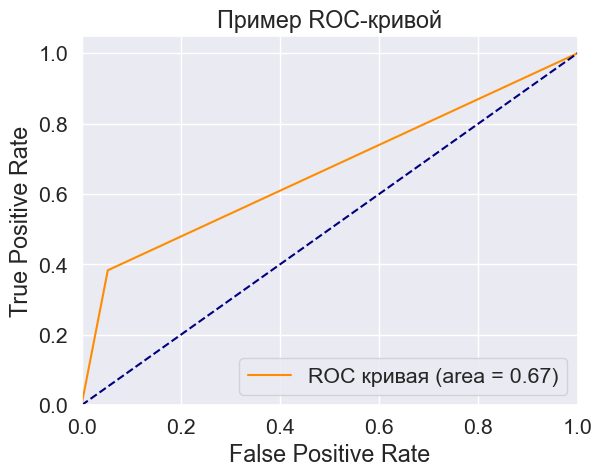

In [166]:
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Полученные результаты очень близки к тем, которые были получены с использованием Случайного леса. Сравним эти результаты со Случайным лесом:
- accuracy: 0.9
- f1: 0.5325
- roc_auc: 0.7147
- При использвании CatBoost метрики увеличились, что обусловлено тем, что в таких алгаритмах, учитываются ошибки предыдущих деревьев - что в итоге приводит к улучшению результатов, однако сказать, что бустинг всегда лучше, например, Случайного леса - нельзя, все индивидуально для каждой задачи. Однако прирост в метриках не очень большой, что в целом, скорее всего, говорит о том, что сами данные плохо связаны с таргетом

### Выведим сводную таблицу

In [184]:
data = pd.DataFrame(
    {
        'Algaritm': ['DecisionTree', 'RandomForest', 'CatBoost'],
        
        'Accuracy': [round(metrics.accuracy_score(y_test, y_test_pred_),2), round(metrics.accuracy_score(y_test,y_test_ens),2), round(metrics.accuracy_score(y_test,y_test_boost),2)],
        
        'F1': [round(metrics.f1_score(y_test, y_test_pred_),4), round(metrics.f1_score(y_test,y_test_ens),4), round(metrics.f1_score(y_test,y_test_boost),4)],
        
        'Roc_auc': [round(metrics.roc_auc_score(y_test, y_test_pred_),4), round(metrics.roc_auc_score(y_test,y_test_ens),4), round(metrics.roc_auc_score(y_test,y_test_boost),4)]
    }

)

In [185]:
data

Algaritm  Accuracy      F1  Roc_auc
0  DecisionTree      0.90  0.4698   0.6756
1  RandomForest      0.91  0.5399   0.7187
2      CatBoost      0.90  0.4456   0.6622

Резюмиреум, RandomForest показал лучший результат, что доказывает то, что деревья решений чаще всего, показывают себя лучше в ансамблевых алгоритмах. f1 достиг - 0.54, что в свою очередь является не очень высоким показателем качества. Как говорилось ранее, это может быть связано с слабой связью признаков и тергета. CatBoost показал себя даже чуть хуже, чем DecisionTree, что может в свою очередь быть связано с трудоемкой настройкой гиперпараметров (которая для бустинга занимает достаточно длительный промежуток времени)